This tries to partially reproduce the results from WDvS2013 paper.

However, we only use part of the data, and we use higher error tolerance so we don't expect to fully reproduce the result.

In [1]:
import numpy as np
import pycyc
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
from plotting import plot_intrinsic_vs_observed
import copy
import pickle

In [87]:
from scipy.fft import rfft, fft, fftshift, ifft, fftn, ifftn

In [61]:
# reload a module to incorporate code chanegs
import importlib
import sys
if "pycyc" in sys.modules.keys():
    importlib.reload(sys.modules["pycyc"])
import pycyc

In [2]:
CS = pycyc.CyclicSolver("P2067/chan07/53873.27864.07.15s.cyc", zap_edges = 0.05556, pscrunch=True)
CS.data.shape, CS.nspec

((236, 1, 4096, 1024), 236)

In [3]:
CS.load("P2067/chan07/53873.31676.07.15s.cyc")
CS.data.shape, CS.nspec

((468, 1, 4096, 1024), 468)

In [4]:
CS.initProfile()

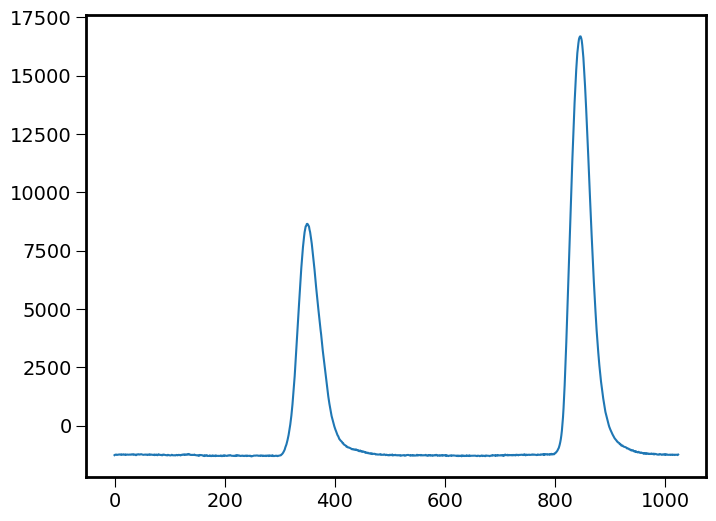

In [5]:
plt.plot(CS.pp_int)

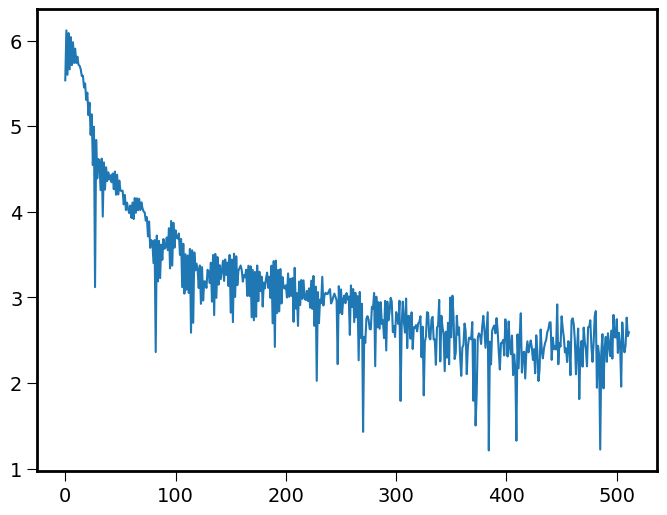

In [36]:
pp_scattered = np.copy(CS.pp_ref)
pp_fft = np.log10(np.abs(rfft(pp_scattered)))
plt.plot(pp_fft[1:])

In [8]:
filters = {}
intrinsic_profiles = {}

In [9]:
# For first pass, either loop:

for isub in range(0, 80):
    CS.loop(isub=isub, make_plots=False, ipol=0, tolfact=10)
filters[0] = copy.deepcopy(CS.optimized_filters)
intrinsic_profiles[0] = copy.deepcopy(CS.intrinsic_profiles)

# or load up previous first pass:
# with open("filters_0.pkl", "rb") as fh:
#     filters[0] = pickle.load(fh)

# with open("profiles_0.pkl", "rb") as fh:
#     intrinsic_profiles[0] = pickle.load(fh)

initial filter: delta function at delay = 4082
onp not specified, so not using minimum phase
max filter index = 4082
variance : 7.83865e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.12828e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4082
merit= 3.4658559e+06  grad= 1.1344103e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46586D+06    |proj g|=  1.05184D+02
rindex 4082


 This problem is unconstrained.


merit= 3.4655192e+06  grad= 1.1333890e+05
rindex 4082
merit= 3.4641737e+06  grad= 1.1293095e+05
rindex 4082
merit= 3.4588164e+06  grad= 1.1130778e+05
rindex 4082
merit= 3.4377803e+06  grad= 1.0493749e+05
rindex 4082
merit= 3.3602204e+06  grad= 8.0571007e+04

rindex 4082
At iterate    1    f=  3.36022D+06    |proj g|=  6.26797D+01
merit= 4.8979493e+06  grad= 1.1715224e+07
rindex 4082
merit= 3.2299538e+06  grad= 2.5428867e+04

rindex 4082
At iterate    2    f=  3.22995D+06    |proj g|=  6.87226D+01
merit= 3.1823150e+06  grad= 2.3824288e+04

At iterate    3    f=  3.18232D+06    |proj g|=  8.13031D+01
rindex 4082
merit= 3.1556876e+06  grad= 4.0768393e+03

At iterate    4    f=  3.15569D+06    |proj g|=  3.36890D+01
rindex 4082
merit= 3.1467722e+06  grad= 1.5860858e+03

At iterate    5    f=  3.14677D+06    |proj g|=  1.16843D+01
rindex 4082
merit= 3.1397445e+06  grad= 8.8020319e+02

At iterate    6    f=  3.13974D+06    |proj g|=  3.35556D+00
rindex 4082
merit= 3.1379593e+06  grad= 3.4226

merit= 3.1210935e+06  grad= 7.7745009e+00

At iterate   69    f=  3.12109D+06    |proj g|=  2.81223D-01
rindex 4082
merit= 3.1210601e+06  grad= 8.8761182e+00

At iterate   70    f=  3.12106D+06    |proj g|=  3.25201D-01
rindex 4082
merit= 3.1210174e+06  grad= 1.9608620e+01

rindex 4082
At iterate   71    f=  3.12102D+06    |proj g|=  4.84980D-01
merit= 3.1210076e+06  grad= 3.1554199e+01
rindex 4082
merit= 3.1209893e+06  grad= 1.0542166e+01

At iterate   72    f=  3.12099D+06    |proj g|=  3.63629D-01
rindex 4082
merit= 3.1209716e+06  grad= 1.3527872e+01

rindex 4082
At iterate   73    f=  3.12097D+06    |proj g|=  3.04517D-01
merit= 3.1209468e+06  grad= 6.6768732e+00

At iterate   74    f=  3.12095D+06    |proj g|=  3.31146D-01
rindex 4082
merit= 3.1209265e+06  grad= 5.2423000e+00

At iterate   75    f=  3.12093D+06    |proj g|=  2.84416D-01
rindex 4082
merit= 3.1209011e+06  grad= 6.0482185e+00

rindex 4082
At iterate   76    f=  3.12090D+06    |proj g|=  2.76882D-01
merit= 3.1208760e+

merit= 3.1203986e+06  grad= 4.3391044e-01

rindex 4082
At iterate  139    f=  3.12040D+06    |proj g|=  5.79404D-02
merit= 3.1203962e+06  grad= 6.6273486e-01

At iterate  140    f=  3.12040D+06    |proj g|=  9.23929D-02
rindex 4082
merit= 3.1203939e+06  grad= 2.7330540e+00

At iterate  141    f=  3.12039D+06    |proj g|=  1.84314D-01
rindex 4082
merit= 3.1203903e+06  grad= 8.1068292e-01

At iterate  142    f=  3.12039D+06    |proj g|=  1.00199D-01
rindex 4082
merit= 3.1203882e+06  grad= 7.3769945e-01

At iterate  143    f=  3.12039D+06    |proj g|=  7.83029D-02
rindex 4082
merit= 3.1203861e+06  grad= 8.5604787e-01

rindex 4082
At iterate  144    f=  3.12039D+06    |proj g|=  1.20266D-01
merit= 3.1203835e+06  grad= 8.7363895e-01

At iterate  145    f=  3.12038D+06    |proj g|=  9.36856D-02
rindex 4082
merit= 3.1203797e+06  grad= 7.1490948e-01

rindex 4082
At iterate  146    f=  3.12038D+06    |proj g|=  7.79060D-02
merit= 3.1203776e+06  grad= 1.1227687e+00

rindex 4082
At iterate  147  

merit= 3.1202308e+06  grad= 5.7520645e-01

At iterate  209    f=  3.12023D+06    |proj g|=  6.21499D-02
rindex 4082
merit= 3.1202279e+06  grad= 2.8089500e-01

At iterate  210    f=  3.12023D+06    |proj g|=  4.29832D-02
rindex 4082
merit= 3.1202263e+06  grad= 7.2745463e-01

At iterate  211    f=  3.12023D+06    |proj g|=  8.14968D-02
rindex 4082
merit= 3.1202243e+06  grad= 4.5120510e-01

At iterate  212    f=  3.12022D+06    |proj g|=  6.68207D-02
rindex 4082
merit= 3.1202228e+06  grad= 8.0036120e-01

rindex 4082
At iterate  213    f=  3.12022D+06    |proj g|=  9.39559D-02
merit= 3.1202204e+06  grad= 5.1425448e-01

At iterate  214    f=  3.12022D+06    |proj g|=  7.41382D-02
rindex 4082
merit= 3.1202193e+06  grad= 1.4062492e+00

rindex 4082
At iterate  215    f=  3.12022D+06    |proj g|=  1.53385D-01
merit= 3.1202177e+06  grad= 3.3014640e-01

rindex 4082
At iterate  216    f=  3.12022D+06    |proj g|=  6.62133D-02
merit= 3.1202163e+06  grad= 2.0035989e-01

At iterate  217    f=  3.1202

 This problem is unconstrained.


merit= 3.2550239e+06  grad= 2.4789441e+04
rindex 4059
merit= 3.2543979e+06  grad= 2.4213935e+04
rindex 4059
merit= 3.2519668e+06  grad= 2.2022353e+04
rindex 4059
merit= 3.2433827e+06  grad= 1.4889507e+04

At iterate    1    f=  3.24338D+06    |proj g|=  1.41460D+01
rindex 4059
merit= 3.2164021e+06  grad= 1.7490744e+03

At iterate    2    f=  3.21640D+06    |proj g|=  3.29619D+00
rindex 4059
merit= 3.2109644e+06  grad= 1.0388916e+03

rindex 4059
At iterate    3    f=  3.21096D+06    |proj g|=  3.06717D+00
merit= 3.2082128e+06  grad= 7.8083342e+02

At iterate    4    f=  3.20821D+06    |proj g|=  3.21028D+00
rindex 4059
merit= 3.2067871e+06  grad= 2.6331867e+02

rindex 4059
At iterate    5    f=  3.20679D+06    |proj g|=  1.51213D+00
merit= 3.2059582e+06  grad= 1.5508576e+02

At iterate    6    f=  3.20596D+06    |proj g|=  1.09376D+00
rindex 4059
merit= 3.2054963e+06  grad= 2.0329916e+02

At iterate    7    f=  3.20550D+06    |proj g|=  1.46177D+00
rindex 4059
merit= 3.2051450e+06  grad

merit= 3.2042099e+06  grad= 3.0497877e-01

At iterate   70    f=  3.20421D+06    |proj g|=  6.65612D-02
rindex 4059
merit= 3.2042091e+06  grad= 2.0282641e-01

At iterate   71    f=  3.20421D+06    |proj g|=  4.99663D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     77      1     0     0   4.997D-02   3.204D+06
  F =   3204209.1289272364     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4059
variance : 8.50873e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.39570e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4059
merit= 3.5455563e+06  grad= 2

 This problem is unconstrained.


merit= 3.5454012e+06  grad= 2.3981800e+04
rindex 4059
merit= 3.5447856e+06  grad= 2.3403026e+04
rindex 4059
merit= 3.5423978e+06  grad= 2.1205748e+04
rindex 4059
merit= 3.5340105e+06  grad= 1.4146644e+04

At iterate    1    f=  3.53401D+06    |proj g|=  1.32741D+01
rindex 4059
merit= 3.5080555e+06  grad= 1.8276759e+03

rindex 4059
At iterate    2    f=  3.50806D+06    |proj g|=  3.57066D+00
merit= 3.5020536e+06  grad= 9.2082118e+02
rindex 4059

At iterate    3    f=  3.50205D+06    |proj g|=  3.15833D+00
merit= 3.4991935e+06  grad= 1.5351146e+03

rindex 4059
At iterate    4    f=  3.49919D+06    |proj g|=  4.97672D+00
merit= 3.4975059e+06  grad= 4.0935191e+02

At iterate    5    f=  3.49751D+06    |proj g|=  2.16633D+00
rindex 4059
merit= 3.4968765e+06  grad= 1.6645686e+02

rindex 4059
At iterate    6    f=  3.49688D+06    |proj g|=  1.22286D+00
merit= 3.4962111e+06  grad= 9.3569279e+01

rindex 4059
At iterate    7    f=  3.49621D+06    |proj g|=  9.45755D-01
merit= 3.4958419e+06  grad

merit= 3.4948595e+06  grad= 6.0315024e-01

At iterate   70    f=  3.49486D+06    |proj g|=  8.92549D-02
rindex 4059
merit= 3.4948580e+06  grad= 3.8994362e-01

At iterate   71    f=  3.49486D+06    |proj g|=  6.67593D-02
rindex 4059
merit= 3.4948565e+06  grad= 3.4136185e-01

At iterate   72    f=  3.49486D+06    |proj g|=  6.14773D-02
rindex 4059
merit= 3.4948540e+06  grad= 6.3612352e-01

rindex 4059
At iterate   73    f=  3.49485D+06    |proj g|=  7.61525D-02
merit= 3.4948524e+06  grad= 1.0655740e+00

At iterate   74    f=  3.49485D+06    |proj g|=  9.17270D-02
rindex 4059
merit= 3.4948508e+06  grad= 4.1873617e-01

rindex 4059
At iterate   75    f=  3.49485D+06    |proj g|=  6.52856D-02
merit= 3.4948493e+06  grad= 7.0388188e-01

rindex 4059
At iterate   76    f=  3.49485D+06    |proj g|=  1.11930D-01
merit= 3.4948483e+06  grad= 6.7711567e-01

rindex 4059
At iterate   77    f=  3.49485D+06    |proj g|=  8.23501D-02
merit= 3.4948468e+06  grad= 2.8267987e-01

rindex 4059
At iterate   78  

 This problem is unconstrained.


merit= 3.9498617e+06  grad= 2.1570650e+04
rindex 4059
merit= 3.9492775e+06  grad= 2.1097437e+04
rindex 4059
merit= 3.9470052e+06  grad= 1.9291566e+04
rindex 4059
merit= 3.9389260e+06  grad= 1.3362963e+04

rindex 4059
At iterate    1    f=  3.93893D+06    |proj g|=  1.19630D+01
merit= 3.9112790e+06  grad= 1.9067614e+03

rindex 4059
At iterate    2    f=  3.91128D+06    |proj g|=  3.38556D+00
merit= 3.9056034e+06  grad= 1.4215180e+03

At iterate    3    f=  3.90560D+06    |proj g|=  3.47904D+00
rindex 4059
merit= 3.9026543e+06  grad= 7.6282929e+02

rindex 4059
At iterate    4    f=  3.90265D+06    |proj g|=  2.59483D+00
merit= 3.9012505e+06  grad= 2.8866364e+02

rindex 4059
At iterate    5    f=  3.90125D+06    |proj g|=  1.50080D+00
merit= 3.9004010e+06  grad= 1.5496233e+02

rindex 4059
At iterate    6    f=  3.90040D+06    |proj g|=  1.00705D+00
merit= 3.8999248e+06  grad= 1.4748487e+02

At iterate    7    f=  3.89992D+06    |proj g|=  1.33836D+00
rindex 4059
merit= 3.8995808e+06  grad

 This problem is unconstrained.


merit= 3.8441511e+06  grad= 2.5295385e+04
rindex 4059
merit= 3.8435187e+06  grad= 2.4726270e+04
rindex 4059
merit= 3.8410607e+06  grad= 2.2554908e+04
rindex 4059
merit= 3.8323442e+06  grad= 1.5426731e+04

At iterate    1    f=  3.83234D+06    |proj g|=  1.49915D+01
rindex 4059
merit= 3.8037403e+06  grad= 1.8921136e+03

rindex 4059
At iterate    2    f=  3.80374D+06    |proj g|=  3.48572D+00
merit= 3.7974178e+06  grad= 1.0389260e+03

rindex 4059
At iterate    3    f=  3.79742D+06    |proj g|=  2.53587D+00
merit= 3.7948047e+06  grad= 2.0803678e+03

At iterate    4    f=  3.79480D+06    |proj g|=  4.40730D+00
rindex 4059
merit= 3.7928465e+06  grad= 3.4983184e+02

At iterate    5    f=  3.79285D+06    |proj g|=  1.76606D+00
rindex 4059
merit= 3.7921925e+06  grad= 1.8692571e+02

rindex 4059
At iterate    6    f=  3.79219D+06    |proj g|=  9.45754D-01
merit= 3.7914266e+06  grad= 1.3813447e+02

At iterate    7    f=  3.79143D+06    |proj g|=  1.11642D+00
rindex 4059
merit= 3.7911387e+06  grad

 This problem is unconstrained.


merit= 3.8739168e+06  grad= 2.6565398e+04
rindex 4059
merit= 3.8732683e+06  grad= 2.6023758e+04
rindex 4059
merit= 3.8707405e+06  grad= 2.3947857e+04
rindex 4059
merit= 3.8616678e+06  grad= 1.6994567e+04

At iterate    1    f=  3.86167D+06    |proj g|=  1.65021D+01
rindex 4059
merit= 3.8290560e+06  grad= 1.8067537e+03

At iterate    2    f=  3.82906D+06    |proj g|=  3.64261D+00
rindex 4059
merit= 3.8231392e+06  grad= 1.1136207e+03

rindex 4059
At iterate    3    f=  3.82314D+06    |proj g|=  2.85682D+00
merit= 3.8202500e+06  grad= 1.0272404e+03

At iterate    4    f=  3.82025D+06    |proj g|=  3.93545D+00
rindex 4059
merit= 3.8187207e+06  grad= 2.7999402e+02

rindex 4059
At iterate    5    f=  3.81872D+06    |proj g|=  1.55000D+00
merit= 3.8179201e+06  grad= 1.6552338e+02

At iterate    6    f=  3.81792D+06    |proj g|=  1.00602D+00
rindex 4059
merit= 3.8172133e+06  grad= 1.1775474e+02

At iterate    7    f=  3.81721D+06    |proj g|=  1.19822D+00
rindex 4059
merit= 3.8170156e+06  grad

merit= 3.8157336e+06  grad= 4.8822259e-01
rindex 4059

At iterate   70    f=  3.81573D+06    |proj g|=  6.54130D-02
merit= 3.8157318e+06  grad= 3.3507392e-01

At iterate   71    f=  3.81573D+06    |proj g|=  5.19403D-02
rindex 4059
merit= 3.8157296e+06  grad= 2.8994117e-01

At iterate   72    f=  3.81573D+06    |proj g|=  3.94243D-02
rindex 4059
merit= 3.8157282e+06  grad= 8.1269849e-01

rindex 4059
At iterate   73    f=  3.81573D+06    |proj g|=  8.54604D-02
merit= 3.8157266e+06  grad= 2.7744588e-01

rindex 4059
At iterate   74    f=  3.81573D+06    |proj g|=  4.15801D-02
merit= 3.8157247e+06  grad= 2.0032779e-01

At iterate   75    f=  3.81572D+06    |proj g|=  3.46787D-02
rindex 4059
merit= 3.8157234e+06  grad= 3.6081044e-01

At iterate   76    f=  3.81572D+06    |proj g|=  4.83159D-02
rindex 4059
merit= 3.8157220e+06  grad= 4.7169439e-01

At iterate   77    f=  3.81572D+06    |proj g|=  7.15272D-02
rindex 4059
merit= 3.8157230e+06  grad= 1.4677717e+00
rindex 4059
merit= 3.8157211e+

 This problem is unconstrained.


merit= 4.4132453e+06  grad= 2.3215571e+04
rindex 4063
merit= 4.4126389e+06  grad= 2.2757303e+04
rindex 4063
merit= 4.4102735e+06  grad= 2.0999295e+04
rindex 4063
merit= 4.4017566e+06  grad= 1.5090575e+04

rindex 4063
At iterate    1    f=  4.40176D+06    |proj g|=  1.38228D+01
merit= 4.3699673e+06  grad= 2.1681774e+03

At iterate    2    f=  4.36997D+06    |proj g|=  3.87807D+00
rindex 4063
merit= 4.3641921e+06  grad= 1.6194739e+03

At iterate    3    f=  4.36419D+06    |proj g|=  4.19288D+00
rindex 4063
merit= 4.3609668e+06  grad= 5.7295793e+02

At iterate    4    f=  4.36097D+06    |proj g|=  2.31654D+00
rindex 4063
merit= 4.3590105e+06  grad= 2.8851435e+02

At iterate    5    f=  4.35901D+06    |proj g|=  1.40898D+00
rindex 4063
merit= 4.3581134e+06  grad= 4.1762019e+02

rindex 4063
At iterate    6    f=  4.35811D+06    |proj g|=  2.07281D+00
merit= 4.3575231e+06  grad= 1.0655039e+02

At iterate    7    f=  4.35752D+06    |proj g|=  9.31943D-01
rindex 4063
merit= 4.3572250e+06  grad

 This problem is unconstrained.


merit= 4.2126572e+06  grad= 2.4783902e+04
rindex 4063
merit= 4.2120308e+06  grad= 2.4292897e+04
rindex 4063
merit= 4.2095877e+06  grad= 2.2408006e+04
rindex 4063
merit= 4.2007941e+06  grad= 1.6055001e+04

rindex 4063
At iterate    1    f=  4.20079D+06    |proj g|=  1.17498D+01
merit= 4.1681485e+06  grad= 2.0215343e+03

rindex 4063
At iterate    2    f=  4.16815D+06    |proj g|=  3.62780D+00
merit= 4.1619506e+06  grad= 1.2724883e+03

At iterate    3    f=  4.16195D+06    |proj g|=  4.61492D+00
rindex 4063
merit= 4.1586876e+06  grad= 7.9753210e+02

rindex 4063
At iterate    4    f=  4.15869D+06    |proj g|=  2.81062D+00
merit= 4.1570922e+06  grad= 3.6307151e+02

At iterate    5    f=  4.15709D+06    |proj g|=  1.66065D+00
rindex 4063
merit= 4.1561282e+06  grad= 1.5852244e+02

At iterate    6    f=  4.15613D+06    |proj g|=  1.00719D+00
rindex 4063
merit= 4.1555407e+06  grad= 1.1933247e+02

rindex 4063
At iterate    7    f=  4.15554D+06    |proj g|=  1.11713D+00
merit= 4.1552062e+06  grad

 This problem is unconstrained.


merit= 3.8001276e+06  grad= 3.3253944e+04
rindex 4063
merit= 3.7994020e+06  grad= 3.2577057e+04
rindex 4063
merit= 3.7965736e+06  grad= 2.9980492e+04
rindex 4063
merit= 3.7864163e+06  grad= 2.1245351e+04

rindex 4063
At iterate    1    f=  3.78642D+06    |proj g|=  1.81908D+01
merit= 3.7502381e+06  grad= 2.0702199e+03

At iterate    2    f=  3.75024D+06    |proj g|=  3.77312D+00
rindex 4063
merit= 3.7430740e+06  grad= 8.2812325e+02

At iterate    3    f=  3.74307D+06    |proj g|=  2.38066D+00
rindex 4063
merit= 3.7392738e+06  grad= 1.1373449e+03

At iterate    4    f=  3.73927D+06    |proj g|=  3.79600D+00
rindex 4063
merit= 3.7381264e+06  grad= 9.9964574e+02

rindex 4063
At iterate    5    f=  3.73813D+06    |proj g|=  3.07366D+00
merit= 3.7370124e+06  grad= 1.5531969e+02

rindex 4063
At iterate    6    f=  3.73701D+06    |proj g|=  9.08416D-01
merit= 3.7365598e+06  grad= 8.5024548e+01

At iterate    7    f=  3.73656D+06    |proj g|=  7.20534D-01
rindex 4063
merit= 3.7362057e+06  grad

 This problem is unconstrained.


merit= 4.1134827e+06  grad= 2.7031724e+04
rindex 4063
merit= 4.1128287e+06  grad= 2.6470295e+04
rindex 4063
merit= 4.1102811e+06  grad= 2.4319105e+04
rindex 4063
merit= 4.1011571e+06  grad= 1.7126230e+04

At iterate    1    f=  4.10116D+06    |proj g|=  1.93470D+01
rindex 4063
merit= 4.0686933e+06  grad= 1.9760481e+03

At iterate    2    f=  4.06869D+06    |proj g|=  3.42205D+00
rindex 4063
merit= 4.0618463e+06  grad= 1.1904644e+03

rindex 4063
At iterate    3    f=  4.06185D+06    |proj g|=  3.25317D+00
merit= 4.0588955e+06  grad= 1.9294625e+03

At iterate    4    f=  4.05890D+06    |proj g|=  4.21733D+00
rindex 4063
merit= 4.0568166e+06  grad= 3.4271704e+02

rindex 4063
At iterate    5    f=  4.05682D+06    |proj g|=  1.68545D+00
merit= 4.0560056e+06  grad= 1.9867073e+02

rindex 4063
At iterate    6    f=  4.05601D+06    |proj g|=  1.05912D+00
merit= 4.0552449e+06  grad= 1.7136646e+02

rindex 4063
At iterate    7    f=  4.05524D+06    |proj g|=  1.38234D+00
merit= 4.0550788e+06  grad

merit= 4.0534077e+06  grad= 3.8485222e-01

At iterate   69    f=  4.05341D+06    |proj g|=  6.36402D-02
rindex 4063
merit= 4.0534060e+06  grad= 4.1446363e-01

rindex 4063
At iterate   70    f=  4.05341D+06    |proj g|=  7.00198D-02
merit= 4.0534049e+06  grad= 3.0419176e-01

At iterate   71    f=  4.05340D+06    |proj g|=  4.75857D-02
rindex 4063
merit= 4.0534038e+06  grad= 3.3068388e-01

At iterate   72    f=  4.05340D+06    |proj g|=  5.66536D-02
rindex 4063
merit= 4.0534028e+06  grad= 2.2785164e-01

At iterate   73    f=  4.05340D+06    |proj g|=  4.41693D-02
rindex 4063
merit= 4.0534014e+06  grad= 1.9732648e-01

rindex 4063
At iterate   74    f=  4.05340D+06    |proj g|=  3.47862D-02
merit= 4.0534003e+06  grad= 6.0214455e-01

At iterate   75    f=  4.05340D+06    |proj g|=  8.15515D-02
rindex 4063
merit= 4.0533991e+06  grad= 2.3006624e-01

At iterate   76    f=  4.05340D+06    |proj g|=  4.65005D-02
rindex 4063
merit= 4.0533981e+06  grad= 1.7998063e-01

rindex 4063
At iterate   77  

 This problem is unconstrained.


merit= 3.6149830e+06  grad= 3.6299104e+04
rindex 4063
merit= 3.6142250e+06  grad= 3.5544879e+04
rindex 4063
merit= 3.6112720e+06  grad= 3.2652845e+04
rindex 4063
merit= 3.6006955e+06  grad= 2.2950489e+04

rindex 4063
At iterate    1    f=  3.60070D+06    |proj g|=  1.99498D+01
merit= 3.5638076e+06  grad= 2.3238352e+03
rindex 4063

At iterate    2    f=  3.56381D+06    |proj g|=  3.60779D+00
merit= 3.5562497e+06  grad= 9.9088946e+02

rindex 4063
At iterate    3    f=  3.55625D+06    |proj g|=  2.93268D+00
merit= 3.5527815e+06  grad= 2.1427064e+03

At iterate    4    f=  3.55278D+06    |proj g|=  4.88722D+00
rindex 4063
merit= 3.5506846e+06  grad= 5.1793438e+02

At iterate    5    f=  3.55068D+06    |proj g|=  2.05428D+00
rindex 4063
merit= 3.5499562e+06  grad= 2.0808279e+02

At iterate    6    f=  3.54996D+06    |proj g|=  1.20092D+00
rindex 4063
merit= 3.5491136e+06  grad= 1.1712313e+02

rindex 4063
At iterate    7    f=  3.54911D+06    |proj g|=  1.20051D+00
merit= 3.5487177e+06  grad

 This problem is unconstrained.


merit= 3.6992223e+06  grad= 3.6430827e+04
rindex 4063
merit= 3.6984633e+06  grad= 3.5593228e+04
rindex 4063
merit= 3.6955151e+06  grad= 3.2398295e+04
rindex 4063
merit= 3.6850867e+06  grad= 2.1915969e+04

At iterate    1    f=  3.68509D+06    |proj g|=  2.02020D+01
rindex 4063
merit= 3.6522190e+06  grad= 2.5946815e+03

At iterate    2    f=  3.65222D+06    |proj g|=  4.07478D+00
rindex 4063
merit= 3.6443471e+06  grad= 1.2075249e+03

At iterate    3    f=  3.64435D+06    |proj g|=  3.05993D+00
rindex 4063
merit= 3.6394086e+06  grad= 1.3790906e+03

At iterate    4    f=  3.63941D+06    |proj g|=  4.05454D+00
rindex 4063
merit= 3.6379078e+06  grad= 1.2300900e+03

At iterate    5    f=  3.63791D+06    |proj g|=  3.58926D+00
rindex 4063
merit= 3.6365286e+06  grad= 2.0762246e+02

At iterate    6    f=  3.63653D+06    |proj g|=  1.39588D+00
rindex 4063
merit= 3.6359187e+06  grad= 1.1950452e+02

At iterate    7    f=  3.63592D+06    |proj g|=  7.38794D-01
rindex 4063
merit= 3.6354901e+06  grad

merit= 3.6340496e+06  grad= 3.2498043e-01

rindex 4063
At iterate   70    f=  3.63405D+06    |proj g|=  4.87078D-02
merit= 3.6340488e+06  grad= 1.7649398e-01

At iterate   71    f=  3.63405D+06    |proj g|=  3.76829D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     77      1     0     0   3.768D-02   3.634D+06
  F =   3634048.8422869169     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4086
variance : 9.01087e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.59609e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4086
merit= 3.7598578e+06  grad= 3

 This problem is unconstrained.


merit= 3.7596694e+06  grad= 3.5429334e+04
rindex 4086
merit= 3.7589211e+06  grad= 3.4658453e+04
rindex 4086
merit= 3.7560100e+06  grad= 3.1708008e+04
rindex 4086
merit= 3.7456410e+06  grad= 2.1885539e+04

At iterate    1    f=  3.74564D+06    |proj g|=  1.79258D+01
rindex 4086
merit= 3.7115748e+06  grad= 2.3472562e+03

rindex 4086
At iterate    2    f=  3.71157D+06    |proj g|=  4.56576D+00
merit= 3.7042081e+06  grad= 1.0875151e+03

rindex 4086
At iterate    3    f=  3.70421D+06    |proj g|=  2.69528D+00
merit= 3.6997706e+06  grad= 1.3080884e+03

At iterate    4    f=  3.69977D+06    |proj g|=  3.97703D+00
rindex 4086
merit= 3.6981843e+06  grad= 9.5097188e+02

rindex 4086
At iterate    5    f=  3.69818D+06    |proj g|=  3.69753D+00
merit= 3.6970996e+06  grad= 1.7320958e+02

rindex 4086
At iterate    6    f=  3.69710D+06    |proj g|=  1.08831D+00
merit= 3.6965422e+06  grad= 1.0448781e+02

At iterate    7    f=  3.69654D+06    |proj g|=  9.04409D-01
rindex 4086
merit= 3.6961224e+06  grad

 This problem is unconstrained.


merit= 3.7960848e+06  grad= 3.3588946e+04
rindex 4086
merit= 3.7953569e+06  grad= 3.2852870e+04
rindex 4086
merit= 3.7925254e+06  grad= 3.0037043e+04
rindex 4086
merit= 3.7824483e+06  grad= 2.0679617e+04
rindex 4086

At iterate    1    f=  3.78245D+06    |proj g|=  1.68334D+01
merit= 3.7496566e+06  grad= 2.2376667e+03

rindex 4086
At iterate    2    f=  3.74966D+06    |proj g|=  3.95554D+00
merit= 3.7424382e+06  grad= 1.0190465e+03

rindex 4086
At iterate    3    f=  3.74244D+06    |proj g|=  2.92373D+00
merit= 3.7378504e+06  grad= 1.0005858e+03

rindex 4086
At iterate    4    f=  3.73785D+06    |proj g|=  3.41449D+00
merit= 3.7370944e+06  grad= 1.6826052e+03

At iterate    5    f=  3.73709D+06    |proj g|=  4.14976D+00
rindex 4086
merit= 3.7353641e+06  grad= 1.8434248e+02

At iterate    6    f=  3.73536D+06    |proj g|=  9.16463D-01
rindex 4086
merit= 3.7349146e+06  grad= 8.9506108e+01

At iterate    7    f=  3.73491D+06    |proj g|=  6.88611D-01
rindex 4086
merit= 3.7344773e+06  grad

 This problem is unconstrained.


merit= 3.6759396e+06  grad= 3.2014170e+04
rindex 4086
merit= 3.6752283e+06  grad= 3.1331464e+04
rindex 4086
merit= 3.6724594e+06  grad= 2.8716952e+04
rindex 4086
merit= 3.6625713e+06  grad= 1.9987675e+04

At iterate    1    f=  3.66257D+06    |proj g|=  1.87991D+01
rindex 4086
merit= 3.6292287e+06  grad= 2.0809632e+03

rindex 4086
At iterate    2    f=  3.62923D+06    |proj g|=  3.27242D+00
merit= 3.6221550e+06  grad= 9.0347701e+02

rindex 4086
At iterate    3    f=  3.62215D+06    |proj g|=  3.01644D+00
merit= 3.6176471e+06  grad= 6.1880479e+02

rindex 4086
At iterate    4    f=  3.61765D+06    |proj g|=  2.74875D+00
merit= 3.6177031e+06  grad= 2.3405077e+03
rindex 4086
merit= 3.6163549e+06  grad= 4.4135158e+02

At iterate    5    f=  3.61635D+06    |proj g|=  2.59292D+00
rindex 4086
merit= 3.6155297e+06  grad= 1.4306126e+02

At iterate    6    f=  3.61553D+06    |proj g|=  9.50358D-01
rindex 4086
merit= 3.6149640e+06  grad= 1.0406241e+02

At iterate    7    f=  3.61496D+06    |proj g

merit= 4.0506324e+06  grad= 2.4430509e+04
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4079
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.05063D+06    |proj g|=  2.02321D+01


 This problem is unconstrained.


merit= 4.0504766e+06  grad= 2.4307315e+04
rindex 4079
merit= 4.0498571e+06  grad= 2.3819481e+04
rindex 4079
merit= 4.0474420e+06  grad= 2.1945990e+04
rindex 4079
merit= 4.0387615e+06  grad= 1.5622102e+04

At iterate    1    f=  4.03876D+06    |proj g|=  1.46816D+01
rindex 4079
merit= 4.0073783e+06  grad= 1.8747081e+03

At iterate    2    f=  4.00738D+06    |proj g|=  3.17923D+00
rindex 4079
merit= 4.0014205e+06  grad= 1.0964065e+03

At iterate    3    f=  4.00142D+06    |proj g|=  3.45636D+00
rindex 4079
merit= 3.9984022e+06  grad= 8.3134586e+02

rindex 4079
At iterate    4    f=  3.99840D+06    |proj g|=  3.05891D+00
merit= 3.9969504e+06  grad= 3.7509755e+02

At iterate    5    f=  3.99695D+06    |proj g|=  2.31414D+00
rindex 4079
merit= 3.9961606e+06  grad= 1.5431510e+02

At iterate    6    f=  3.99616D+06    |proj g|=  1.19166D+00
rindex 4079
merit= 3.9955947e+06  grad= 9.8019515e+01

At iterate    7    f=  3.99559D+06    |proj g|=  9.58686D-01
rindex 4079
merit= 3.9952336e+06  grad

 This problem is unconstrained.


merit= 4.0638378e+06  grad= 2.3120316e+04
rindex 4079
merit= 4.0632335e+06  grad= 2.2654392e+04
rindex 4079
merit= 4.0608777e+06  grad= 2.0865557e+04
rindex 4079
merit= 4.0524162e+06  grad= 1.4838173e+04

At iterate    1    f=  4.05242D+06    |proj g|=  1.24153D+01
rindex 4079
merit= 4.0218570e+06  grad= 1.9864855e+03

At iterate    2    f=  4.02186D+06    |proj g|=  3.71202D+00
rindex 4079
merit= 4.0164072e+06  grad= 1.5214653e+03

At iterate    3    f=  4.01641D+06    |proj g|=  4.97102D+00
rindex 4079
merit= 4.0133062e+06  grad= 5.9576792e+02

At iterate    4    f=  4.01331D+06    |proj g|=  2.23497D+00
rindex 4079
merit= 4.0116836e+06  grad= 2.4789771e+02

rindex 4079
At iterate    5    f=  4.01168D+06    |proj g|=  1.06664D+00
merit= 4.0107114e+06  grad= 2.6641501e+02

At iterate    6    f=  4.01071D+06    |proj g|=  1.61808D+00
rindex 4079
merit= 4.0102228e+06  grad= 1.6612516e+02

At iterate    7    f=  4.01022D+06    |proj g|=  1.37635D+00
rindex 4079
merit= 4.0099304e+06  grad

 This problem is unconstrained.


merit= 3.7213314e+06  grad= 2.4892057e+04
rindex 4079
merit= 3.7207043e+06  grad= 2.4363540e+04
rindex 4079
merit= 3.7182631e+06  grad= 2.2340343e+04
rindex 4079
merit= 3.7095451e+06  grad= 1.5605084e+04

At iterate    1    f=  3.70955D+06    |proj g|=  1.39526D+01
rindex 4079
merit= 3.6795698e+06  grad= 1.7385193e+03

rindex 4079
At iterate    2    f=  3.67957D+06    |proj g|=  3.36637D+00
merit= 3.6738553e+06  grad= 9.6293706e+02

rindex 4079
At iterate    3    f=  3.67386D+06    |proj g|=  3.16813D+00
merit= 3.6709887e+06  grad= 8.7269963e+02

rindex 4079
At iterate    4    f=  3.67099D+06    |proj g|=  3.81671D+00
merit= 3.6694887e+06  grad= 2.5911221e+02

At iterate    5    f=  3.66949D+06    |proj g|=  1.37491D+00
rindex 4079
merit= 3.6687755e+06  grad= 1.3666289e+02

At iterate    6    f=  3.66878D+06    |proj g|=  1.31610D+00
rindex 4079
merit= 3.6682477e+06  grad= 1.3574955e+02

At iterate    7    f=  3.66825D+06    |proj g|=  1.23372D+00
rindex 4079
merit= 3.6679561e+06  grad

 This problem is unconstrained.


merit= 3.8345520e+06  grad= 2.2135084e+04
rindex 4079
merit= 3.8339603e+06  grad= 2.1668075e+04
rindex 4079
merit= 3.8316566e+06  grad= 1.9881849e+04
rindex 4079
merit= 3.8234237e+06  grad= 1.3956008e+04

At iterate    1    f=  3.82342D+06    |proj g|=  1.36977D+01
rindex 4079
merit= 3.7942824e+06  grad= 1.6920207e+03

At iterate    2    f=  3.79428D+06    |proj g|=  3.54886D+00
rindex 4079
merit= 3.7887467e+06  grad= 1.1352877e+03

At iterate    3    f=  3.78875D+06    |proj g|=  3.68123D+00
rindex 4079
merit= 3.7861073e+06  grad= 1.1467438e+03

At iterate    4    f=  3.78611D+06    |proj g|=  4.94300D+00
rindex 4079
merit= 3.7845727e+06  grad= 2.7303617e+02

At iterate    5    f=  3.78457D+06    |proj g|=  1.14689D+00
rindex 4079
merit= 3.7837913e+06  grad= 1.7682222e+02

At iterate    6    f=  3.78379D+06    |proj g|=  1.23439D+00
rindex 4079
merit= 3.7831598e+06  grad= 1.9128995e+02

At iterate    7    f=  3.78316D+06    |proj g|=  1.42140D+00
rindex 4079
merit= 3.7828599e+06  grad

 This problem is unconstrained.


merit= 3.5165322e+06  grad= 2.7169801e+04
rindex 4079
merit= 3.5158765e+06  grad= 2.6586529e+04
rindex 4079
merit= 3.5133244e+06  grad= 2.4354999e+04
rindex 4079
merit= 3.5042220e+06  grad= 1.6944072e+04

rindex 4079
At iterate    1    f=  3.50422D+06    |proj g|=  1.74814D+01
merit= 3.4731680e+06  grad= 1.8390137e+03

At iterate    2    f=  3.47317D+06    |proj g|=  3.19422D+00
rindex 4079
merit= 3.4670511e+06  grad= 9.4351625e+02

At iterate    3    f=  3.46705D+06    |proj g|=  2.62238D+00
rindex 4079
merit= 3.4644675e+06  grad= 1.6502929e+03

At iterate    4    f=  3.46447D+06    |proj g|=  4.28139D+00
rindex 4079
merit= 3.4627466e+06  grad= 3.0406930e+02

At iterate    5    f=  3.46275D+06    |proj g|=  1.49634D+00
rindex 4079
merit= 3.4621000e+06  grad= 1.7994833e+02

At iterate    6    f=  3.46210D+06    |proj g|=  1.11017D+00
rindex 4079
merit= 3.4613487e+06  grad= 1.4439867e+02

At iterate    7    f=  3.46135D+06    |proj g|=  1.46420D+00
rindex 4079
merit= 3.4612746e+06  grad

 This problem is unconstrained.


merit= 3.5400120e+06  grad= 3.0725214e+04
rindex 4082
merit= 3.5393151e+06  grad= 3.0019970e+04
rindex 4082
merit= 3.5366079e+06  grad= 2.7331095e+04
rindex 4082
merit= 3.5270329e+06  grad= 1.8532464e+04

At iterate    1    f=  3.52703D+06    |proj g|=  1.97546D+01
rindex 4082
merit= 3.4962927e+06  grad= 2.2255005e+03

At iterate    2    f=  3.49629D+06    |proj g|=  4.04976D+00
rindex 4082
merit= 3.4893142e+06  grad= 1.0027914e+03

At iterate    3    f=  3.48931D+06    |proj g|=  3.32637D+00
rindex 4082
merit= 3.4859827e+06  grad= 1.7665902e+03

rindex 4082
At iterate    4    f=  3.48598D+06    |proj g|=  4.58669D+00
merit= 3.4841000e+06  grad= 4.2949323e+02

At iterate    5    f=  3.48410D+06    |proj g|=  1.91551D+00
rindex 4082
merit= 3.4834545e+06  grad= 1.7585377e+02

rindex 4082
At iterate    6    f=  3.48345D+06    |proj g|=  9.07725D-01
merit= 3.4826834e+06  grad= 1.1646855e+02

At iterate    7    f=  3.48268D+06    |proj g|=  1.14652D+00
rindex 4082
merit= 3.4823117e+06  grad

max filter index = 4082
variance : 9.11203e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.63646e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4082
merit= 3.7684564e+06  grad= 3.2185354e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76846D+06    |proj g|=  2.59797D+01
rindex 4082


 This problem is unconstrained.


merit= 3.7682773e+06  grad= 3.2004266e+04
rindex 4082
merit= 3.7675658e+06  grad= 3.1288258e+04
rindex 4082
merit= 3.7648001e+06  grad= 2.8555186e+04
rindex 4082
merit= 3.7549836e+06  grad= 1.9560110e+04

rindex 4082
At iterate    1    f=  3.75498D+06    |proj g|=  1.92966D+01
merit= 3.7228122e+06  grad= 2.2105668e+03

rindex 4082
At iterate    2    f=  3.72281D+06    |proj g|=  3.43460D+00
merit= 3.7157706e+06  grad= 1.0112820e+03

rindex 4082
At iterate    3    f=  3.71577D+06    |proj g|=  2.94105D+00
merit= 3.7116230e+06  grad= 1.0780601e+03

rindex 4082
At iterate    4    f=  3.71162D+06    |proj g|=  3.97567D+00
merit= 3.7101437e+06  grad= 8.4569686e+02

At iterate    5    f=  3.71014D+06    |proj g|=  3.51601D+00
rindex 4082
merit= 3.7091260e+06  grad= 1.6953614e+02

At iterate    6    f=  3.70913D+06    |proj g|=  1.05368D+00
rindex 4082
merit= 3.7085779e+06  grad= 1.0595597e+02

rindex 4082
At iterate    7    f=  3.70858D+06    |proj g|=  8.93071D-01
merit= 3.7082063e+06  grad

merit= 3.7069631e+06  grad= 4.8074015e-01

At iterate   70    f=  3.70696D+06    |proj g|=  7.67515D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     75      1     0     0   7.675D-02   3.707D+06
  F =   3706963.0696688900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4082
variance : 8.61295e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.43729e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4082
merit= 3.5609708e+06  grad= 3.8403630e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 3.5607751e+06  grad= 3.8196311e+04
rindex 4082
merit= 3.5599976e+06  grad= 3.7376067e+04
rindex 4082
merit= 3.5569715e+06  grad= 3.4236784e+04
rindex 4082
merit= 3.5461710e+06  grad= 2.3776043e+04

At iterate    1    f=  3.54617D+06    |proj g|=  2.03706D+01
rindex 4082
merit= 3.5103856e+06  grad= 2.3270849e+03

At iterate    2    f=  3.51039D+06    |proj g|=  3.86808D+00
rindex 4082
merit= 3.5031694e+06  grad= 9.7502493e+02

At iterate    3    f=  3.50317D+06    |proj g|=  2.88453D+00
rindex 4082
merit= 3.4990245e+06  grad= 1.2557441e+03

At iterate    4    f=  3.49902D+06    |proj g|=  4.15476D+00
rindex 4082
merit= 3.4978583e+06  grad= 1.3589316e+03

rindex 4082
At iterate    5    f=  3.49786D+06    |proj g|=  3.19473D+00
merit= 3.4964578e+06  grad= 2.2493065e+02

At iterate    6    f=  3.49646D+06    |proj g|=  1.14442D+00
rindex 4082
merit= 3.4958744e+06  grad= 1.2454474e+02

At iterate    7    f=  3.49587D+06    |proj g|=  8.07607D-01
rindex 4082
merit= 3.4954728e+06  grad

max filter index = 4082
variance : 9.37053e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.73962e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4082
merit= 3.7383605e+06  grad= 3.1687620e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
rindex 4082
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73836D+06    |proj g|=  2.53198D+01


 This problem is unconstrained.


merit= 3.7381827e+06  grad= 3.1518100e+04
rindex 4082
merit= 3.7374764e+06  grad= 3.0847424e+04
rindex 4082
merit= 3.7347268e+06  grad= 2.8280926e+04
rindex 4082
merit= 3.7249045e+06  grad= 1.9737934e+04

rindex 4082
At iterate    1    f=  3.72490D+06    |proj g|=  1.90900D+01
merit= 3.6915056e+06  grad= 2.0823127e+03

rindex 4082
At iterate    2    f=  3.69151D+06    |proj g|=  3.27939D+00
merit= 3.6848270e+06  grad= 1.0985889e+03

rindex 4082
At iterate    3    f=  3.68483D+06    |proj g|=  2.71332D+00
merit= 3.6815482e+06  grad= 1.5039228e+03

At iterate    4    f=  3.68155D+06    |proj g|=  4.14131D+00
rindex 4082
merit= 3.6795425e+06  grad= 3.7269460e+02

rindex 4082
At iterate    5    f=  3.67954D+06    |proj g|=  1.71171D+00
merit= 3.6786295e+06  grad= 2.1256571e+02

rindex 4082
At iterate    6    f=  3.67863D+06    |proj g|=  9.86214D-01
merit= 3.6778052e+06  grad= 2.2643634e+02

At iterate    7    f=  3.67781D+06    |proj g|=  1.69568D+00
rindex 4082
merit= 3.6775930e+06  grad

 This problem is unconstrained.


merit= 3.5684436e+06  grad= 3.0966267e+04
rindex 4082
merit= 3.5677434e+06  grad= 3.0325551e+04
rindex 4082
merit= 3.5650155e+06  grad= 2.7870014e+04
rindex 4082
merit= 3.5552409e+06  grad= 1.9648168e+04

rindex 4082
At iterate    1    f=  3.55524D+06    |proj g|=  1.64584D+01
merit= 3.5211222e+06  grad= 2.0244928e+03

rindex 4082
At iterate    2    f=  3.52112D+06    |proj g|=  3.38845D+00
merit= 3.5146804e+06  grad= 1.0832822e+03
rindex 4082

At iterate    3    f=  3.51468D+06    |proj g|=  3.23840D+00
merit= 3.5112730e+06  grad= 9.5507269e+02

rindex 4082
At iterate    4    f=  3.51127D+06    |proj g|=  3.58851D+00
merit= 3.5095634e+06  grad= 5.0229567e+02

At iterate    5    f=  3.50956D+06    |proj g|=  2.49529D+00
rindex 4082
merit= 3.5085564e+06  grad= 2.0987726e+02

At iterate    6    f=  3.50856D+06    |proj g|=  1.20510D+00
rindex 4082
merit= 3.5078380e+06  grad= 1.2964873e+02

At iterate    7    f=  3.50784D+06    |proj g|=  1.19574D+00
rindex 4082
merit= 3.5074274e+06  grad

merit= 3.5059877e+06  grad= 2.6903728e-01

At iterate   70    f=  3.50599D+06    |proj g|=  3.58280D-02
rindex 4082
merit= 3.5059866e+06  grad= 3.8057609e-01

rindex 4082
At iterate   71    f=  3.50599D+06    |proj g|=  5.59746D-02
merit= 3.5059854e+06  grad= 3.2662823e-01

At iterate   72    f=  3.50599D+06    |proj g|=  5.98462D-02
rindex 4082
merit= 3.5059842e+06  grad= 3.6209928e-01

rindex 4082
At iterate   73    f=  3.50598D+06    |proj g|=  6.24078D-02
merit= 3.5059832e+06  grad= 2.2467431e-01

At iterate   74    f=  3.50598D+06    |proj g|=  3.51043D-02
rindex 4082
merit= 3.5059824e+06  grad= 2.4158484e-01

At iterate   75    f=  3.50598D+06    |proj g|=  3.41970D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 3.5137175e+06  grad= 3.1552375e+04
rindex 4082
merit= 3.5130110e+06  grad= 3.0852976e+04
rindex 4082
merit= 3.5102637e+06  grad= 2.8181858e+04
rindex 4082
merit= 3.5005046e+06  grad= 1.9375757e+04

rindex 4082
At iterate    1    f=  3.50050D+06    |proj g|=  1.76025D+01
merit= 3.4683971e+06  grad= 2.1932917e+03

At iterate    2    f=  3.46840D+06    |proj g|=  4.17109D+00
rindex 4082
merit= 3.4617801e+06  grad= 1.1134940e+03

At iterate    3    f=  3.46178D+06    |proj g|=  3.67157D+00
rindex 4082
merit= 3.4584393e+06  grad= 1.7984553e+03

At iterate    4    f=  3.45844D+06    |proj g|=  5.06177D+00
rindex 4082
merit= 3.4564006e+06  grad= 4.0240698e+02

rindex 4082
At iterate    5    f=  3.45640D+06    |proj g|=  2.39515D+00
merit= 3.4556219e+06  grad= 2.2609380e+02

rindex 4082
At iterate    6    f=  3.45562D+06    |proj g|=  1.88081D+00
merit= 3.4546831e+06  grad= 1.8551596e+02

At iterate    7    f=  3.45468D+06    |proj g|=  1.34774D+00
rindex 4082
merit= 3.4544184e+06  grad

 This problem is unconstrained.


merit= 3.2300147e+06  grad= 3.8210943e+04
rindex 4082
merit= 3.2292374e+06  grad= 3.7366518e+04
rindex 4082
merit= 3.2262145e+06  grad= 3.4136346e+04
rindex 4082
merit= 3.2154708e+06  grad= 2.3410798e+04

rindex 4082
At iterate    1    f=  3.21547D+06    |proj g|=  2.19374D+01
merit= 3.1810498e+06  grad= 2.3822565e+03

rindex 4082
At iterate    2    f=  3.18105D+06    |proj g|=  5.18271D+00
merit= 3.1741524e+06  grad= 1.0740545e+03

rindex 4082
At iterate    3    f=  3.17415D+06    |proj g|=  3.07818D+00
merit= 3.1709910e+06  grad= 3.3330323e+03

At iterate    4    f=  3.17099D+06    |proj g|=  5.82718D+00
rindex 4082
merit= 3.1685674e+06  grad= 5.3563976e+02

rindex 4082
At iterate    5    f=  3.16857D+06    |proj g|=  2.54879D+00
merit= 3.1678636e+06  grad= 2.4847646e+02

At iterate    6    f=  3.16786D+06    |proj g|=  1.69134D+00
rindex 4082
merit= 3.1668641e+06  grad= 1.6295482e+02

At iterate    7    f=  3.16686D+06    |proj g|=  1.37180D+00
rindex 4082
merit= 3.1664280e+06  grad

merit= 3.1647016e+06  grad= 2.6222441e-01

rindex 4082
At iterate   70    f=  3.16470D+06    |proj g|=  3.43305D-02
merit= 3.1647008e+06  grad= 2.3366447e-01

At iterate   71    f=  3.16470D+06    |proj g|=  3.37310D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     77      1     0     0   3.373D-02   3.165D+06
  F =   3164700.7731208866     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4081
variance : 7.06344e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.81890e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4081
merit= 3.0350321e+06  grad= 4

 This problem is unconstrained.


merit= 3.0348097e+06  grad= 4.9401722e+04
rindex 4081
merit= 3.0339262e+06  grad= 4.8311283e+04
rindex 4081
merit= 3.0304901e+06  grad= 4.4137393e+04
rindex 4081
merit= 3.0182717e+06  grad= 3.0232820e+04

At iterate    1    f=  3.01827D+06    |proj g|=  2.82188D+01
rindex 4081
merit= 2.9799977e+06  grad= 2.9061562e+03

rindex 4081
At iterate    2    f=  2.98000D+06    |proj g|=  5.73106D+00
merit= 2.9723848e+06  grad= 1.2663398e+03

At iterate    3    f=  2.97238D+06    |proj g|=  2.89923D+00
rindex 4081
merit= 2.9681007e+06  grad= 2.2714525e+03

rindex 4081
At iterate    4    f=  2.96810D+06    |proj g|=  5.00953D+00
merit= 2.9660544e+06  grad= 1.1070845e+03

At iterate    5    f=  2.96605D+06    |proj g|=  3.79864D+00
rindex 4081
merit= 2.9650022e+06  grad= 2.8217931e+02

rindex 4081
At iterate    6    f=  2.96500D+06    |proj g|=  1.69869D+00
merit= 2.9642214e+06  grad= 1.8348980e+02

At iterate    7    f=  2.96422D+06    |proj g|=  1.54443D+00
rindex 4081
merit= 2.9637762e+06  grad

max filter index = 4081
variance : 7.64493e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.05097e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4081
merit= 3.2023309e+06  grad= 4.5668141e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20233D+06    |proj g|=  3.24919D+01
rindex 4081


 This problem is unconstrained.


merit= 3.2021176e+06  grad= 4.5401788e+04
rindex 4081
merit= 3.2012709e+06  grad= 4.4348340e+04
rindex 4081
merit= 3.1979832e+06  grad= 4.0322556e+04
rindex 4081
merit= 3.1863712e+06  grad= 2.7015277e+04

At iterate    1    f=  3.18637D+06    |proj g|=  2.43452D+01
rindex 4081
merit= 3.1524463e+06  grad= 2.7860085e+03

At iterate    2    f=  3.15245D+06    |proj g|=  5.44054D+00
rindex 4081
merit= 3.1454422e+06  grad= 1.4896531e+03

rindex 4081
At iterate    3    f=  3.14544D+06    |proj g|=  3.41486D+00
merit= 3.1425167e+06  grad= 4.6214392e+03

At iterate    4    f=  3.14252D+06    |proj g|=  6.91639D+00
rindex 4081
merit= 3.1396838e+06  grad= 5.6186446e+02

At iterate    5    f=  3.13968D+06    |proj g|=  2.67826D+00
rindex 4081
merit= 3.1388102e+06  grad= 3.5355381e+02

At iterate    6    f=  3.13881D+06    |proj g|=  1.47758D+00
rindex 4081
merit= 3.1375395e+06  grad= 2.3643956e+02

At iterate    7    f=  3.13754D+06    |proj g|=  1.39541D+00
rindex 4081
merit= 3.1367239e+06  grad

merit= 3.1350877e+06  grad= 3.0263696e-01

At iterate   70    f=  3.13509D+06    |proj g|=  4.79995D-02
rindex 4081
merit= 3.1350865e+06  grad= 4.1800393e-01

At iterate   71    f=  3.13509D+06    |proj g|=  5.96315D-02
rindex 4081
merit= 3.1350851e+06  grad= 3.9602565e-01

At iterate   72    f=  3.13509D+06    |proj g|=  5.96224D-02
rindex 4081
merit= 3.1350840e+06  grad= 7.9187193e-01

At iterate   73    f=  3.13508D+06    |proj g|=  6.74705D-02
rindex 4081
merit= 3.1350830e+06  grad= 2.2043252e-01

At iterate   74    f=  3.13508D+06    |proj g|=  3.51290D-02
rindex 4081
merit= 3.1350822e+06  grad= 2.4061436e-01

At iterate   75    f=  3.13508D+06    |proj g|=  3.56355D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 3.1357211e+06  grad= 6.1181117e+04
rindex 4052
merit= 3.1347374e+06  grad= 5.9802915e+04
rindex 4052
merit= 3.1309141e+06  grad= 5.4534060e+04
rindex 4052
merit= 3.1173546e+06  grad= 3.7078927e+04

At iterate    1    f=  3.11735D+06    |proj g|=  3.09608D+01
rindex 4052
merit= 3.0759521e+06  grad= 3.5744430e+03

At iterate    2    f=  3.07595D+06    |proj g|=  6.43575D+00
rindex 4052
merit= 3.0680061e+06  grad= 1.7663429e+03

At iterate    3    f=  3.06801D+06    |proj g|=  4.22485D+00
rindex 4052
merit= 3.0637275e+06  grad= 2.3292718e+03

rindex 4052
At iterate    4    f=  3.06373D+06    |proj g|=  5.70189D+00
merit= 3.0611489e+06  grad= 6.6543169e+02

At iterate    5    f=  3.06115D+06    |proj g|=  3.08980D+00
rindex 4052
merit= 3.0599313e+06  grad= 3.9537368e+02

At iterate    6    f=  3.05993D+06    |proj g|=  1.77050D+00
rindex 4052
merit= 3.0585604e+06  grad= 2.2330510e+02

At iterate    7    f=  3.05856D+06    |proj g|=  1.52150D+00
rindex 4052
merit= 3.0582880e+06  grad

merit= 3.0562483e+06  grad= 2.4051618e-01

At iterate   69    f=  3.05625D+06    |proj g|=  3.32270D-02
rindex 4052
merit= 3.0562467e+06  grad= 3.6558402e-01

rindex 4052
At iterate   70    f=  3.05625D+06    |proj g|=  4.01345D-02
merit= 3.0562453e+06  grad= 1.2147708e+00

At iterate   71    f=  3.05625D+06    |proj g|=  8.60010D-02
rindex 4052
merit= 3.0562437e+06  grad= 3.2996073e-01

At iterate   72    f=  3.05624D+06    |proj g|=  3.52712D-02
rindex 4052
merit= 3.0562425e+06  grad= 2.2254009e-01

At iterate   73    f=  3.05624D+06    |proj g|=  3.09754D-02
rindex 4052
merit= 3.0562414e+06  grad= 4.5223035e-01

rindex 4052
At iterate   74    f=  3.05624D+06    |proj g|=  5.61448D-02
merit= 3.0562398e+06  grad= 5.0246042e-01

At iterate   75    f=  3.05624D+06    |proj g|=  4.69900D-02
rindex 4052
merit= 3.0562380e+06  grad= 5.1109962e-01

At iterate   76    f=  3.05624D+06    |proj g|=  5.07098D-02
rindex 4052
merit= 3.0562366e+06  grad= 2.9745822e-01

At iterate   77    f=  3.0562

 This problem is unconstrained.


merit= 3.5956490e+06  grad= 5.3589741e+04
rindex 4054
merit= 3.5947290e+06  grad= 5.2282642e+04
rindex 4054
merit= 3.5911620e+06  grad= 4.7314728e+04
rindex 4054
merit= 3.5786451e+06  grad= 3.1268156e+04

At iterate    1    f=  3.57865D+06    |proj g|=  2.72396D+01
rindex 4054
merit= 3.5419991e+06  grad= 3.5742867e+03

rindex 4054
At iterate    2    f=  3.54200D+06    |proj g|=  4.69784D+00
merit= 3.5335913e+06  grad= 1.8611935e+03

rindex 4054
At iterate    3    f=  3.53359D+06    |proj g|=  4.03178D+00
merit= 3.5286665e+06  grad= 2.6230289e+03

At iterate    4    f=  3.52867D+06    |proj g|=  5.50169D+00
rindex 4054
merit= 3.5258893e+06  grad= 8.4760293e+02

At iterate    5    f=  3.52589D+06    |proj g|=  3.78938D+00
rindex 4054
merit= 3.5247483e+06  grad= 3.8898539e+02

At iterate    6    f=  3.52475D+06    |proj g|=  1.72900D+00
rindex 4054
merit= 3.5234626e+06  grad= 3.4757794e+02

At iterate    7    f=  3.52346D+06    |proj g|=  2.24491D+00
rindex 4054
merit= 3.5229621e+06  grad

merit= 3.5210106e+06  grad= 3.9798669e-01

At iterate   70    f=  3.52101D+06    |proj g|=  6.55754D-02
rindex 4054
merit= 3.5210095e+06  grad= 6.4564692e-01

rindex 4054
At iterate   71    f=  3.52101D+06    |proj g|=  9.51323D-02
merit= 3.5210076e+06  grad= 6.0252864e-01

At iterate   72    f=  3.52101D+06    |proj g|=  6.10720D-02
rindex 4054
merit= 3.5210065e+06  grad= 2.1641036e+00

At iterate   73    f=  3.52101D+06    |proj g|=  1.12942D-01
rindex 4054
merit= 3.5210046e+06  grad= 3.6283383e-01

At iterate   74    f=  3.52100D+06    |proj g|=  4.53884D-02
rindex 4054
merit= 3.5210036e+06  grad= 2.2155987e-01

At iterate   75    f=  3.52100D+06    |proj g|=  3.50627D-02
rindex 4054
merit= 3.5210019e+06  grad= 3.9911255e-01

At iterate   76    f=  3.52100D+06    |proj g|=  4.20656D-02
rindex 4054
merit= 3.5210001e+06  grad= 8.1871790e-01

At iterate   77    f=  3.52100D+06    |proj g|=  6.33180D-02
rindex 4054
merit= 3.5209985e+06  grad= 1.3489414e+00

rindex 4054
At iterate   78  

 This problem is unconstrained.


merit= 3.8571563e+06  grad= 5.0197920e+04
rindex 4054
merit= 3.8562659e+06  grad= 4.8929399e+04
rindex 4054
merit= 3.8528176e+06  grad= 4.4126325e+04
rindex 4054
merit= 3.8407732e+06  grad= 2.8842811e+04

At iterate    1    f=  3.84077D+06    |proj g|=  2.58091D+01
rindex 4054
merit= 3.8057507e+06  grad= 3.5857199e+03

At iterate    2    f=  3.80575D+06    |proj g|=  4.96814D+00
rindex 4054
merit= 3.7970068e+06  grad= 1.7154799e+03

At iterate    3    f=  3.79701D+06    |proj g|=  3.38325D+00
rindex 4054
merit= 3.7914633e+06  grad= 1.8376028e+03

At iterate    4    f=  3.79146D+06    |proj g|=  4.87168D+00
rindex 4054
merit= 3.7896983e+06  grad= 2.1634429e+03

rindex 4054
At iterate    5    f=  3.78970D+06    |proj g|=  4.29920D+00
merit= 3.7880487e+06  grad= 2.9985208e+02

At iterate    6    f=  3.78805D+06    |proj g|=  1.37475D+00
rindex 4054
merit= 3.7873863e+06  grad= 1.7436857e+02

At iterate    7    f=  3.78739D+06    |proj g|=  9.83780D-01
rindex 4054
merit= 3.7867375e+06  grad

max filter index = 4054
variance : 9.69961e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.87096e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4054
merit= 4.0920417e+06  grad= 4.4445796e+04
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4054
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.09204D+06    |proj g|=  2.85721D+01


 This problem is unconstrained.


merit= 4.0918312e+06  grad= 4.4181119e+04
rindex 4054
merit= 4.0909955e+06  grad= 4.3135980e+04
rindex 4054
merit= 4.0877522e+06  grad= 3.9167335e+04
rindex 4054
merit= 4.0763148e+06  grad= 2.6368686e+04

rindex 4054
At iterate    1    f=  4.07631D+06    |proj g|=  2.05740D+01
merit= 4.0402079e+06  grad= 3.0649781e+03

rindex 4054
At iterate    2    f=  4.04021D+06    |proj g|=  4.12209D+00
merit= 4.0317300e+06  grad= 1.4019160e+03

At iterate    3    f=  4.03173D+06    |proj g|=  3.10474D+00
rindex 4054
merit= 4.0259010e+06  grad= 8.3972823e+02

At iterate    4    f=  4.02590D+06    |proj g|=  4.39939D+00
rindex 4054
merit= 4.0255382e+06  grad= 3.1984420e+03
rindex 4054
merit= 4.0241357e+06  grad= 6.4106723e+02

At iterate    5    f=  4.02414D+06    |proj g|=  2.73507D+00
rindex 4054
merit= 4.0229405e+06  grad= 1.8552547e+02

At iterate    6    f=  4.02294D+06    |proj g|=  9.76382D-01
rindex 4054
merit= 4.0221959e+06  grad= 1.2375928e+02

At iterate    7    f=  4.02220D+06    |proj g

 This problem is unconstrained.


merit= 3.9173076e+06  grad= 3.8313874e+04
rindex 4054
merit= 3.9165291e+06  grad= 3.7459591e+04
rindex 4054
merit= 3.9135024e+06  grad= 3.4205135e+04
rindex 4054
merit= 3.9027420e+06  grad= 2.3548070e+04

rindex 4054
At iterate    1    f=  3.90274D+06    |proj g|=  2.02773D+01
merit= 3.8672862e+06  grad= 2.6202008e+03

rindex 4054
At iterate    2    f=  3.86729D+06    |proj g|=  4.01073D+00
merit= 3.8594362e+06  grad= 1.0999776e+03

rindex 4054
At iterate    3    f=  3.85944D+06    |proj g|=  2.67717D+00
merit= 3.8552657e+06  grad= 1.9034678e+03

At iterate    4    f=  3.85527D+06    |proj g|=  4.26578D+00
rindex 4054
merit= 3.8532886e+06  grad= 7.5243852e+02

At iterate    5    f=  3.85329D+06    |proj g|=  3.62336D+00
rindex 4054
merit= 3.8523140e+06  grad= 2.2487739e+02

At iterate    6    f=  3.85231D+06    |proj g|=  1.46588D+00
rindex 4054
merit= 3.8515435e+06  grad= 1.1345283e+02

At iterate    7    f=  3.85154D+06    |proj g|=  1.07351D+00
rindex 4054
merit= 3.8511403e+06  grad

max filter index = 4054
variance : 9.30937e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.71522e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4054
merit= 3.8683097e+06  grad= 3.2119691e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86831D+06    |proj g|=  2.34061D+01
rindex 4054


 This problem is unconstrained.


merit= 3.8681307e+06  grad= 3.1965616e+04
rindex 4054
merit= 3.8674190e+06  grad= 3.1355226e+04
rindex 4054
merit= 3.8646406e+06  grad= 2.9006580e+04
rindex 4054
merit= 3.8545924e+06  grad= 2.0999351e+04

At iterate    1    f=  3.85459D+06    |proj g|=  1.83803D+01
rindex 4054
merit= 3.8169422e+06  grad= 2.0221320e+03

At iterate    2    f=  3.81694D+06    |proj g|=  3.17110D+00
rindex 4054
merit= 3.8102741e+06  grad= 1.0104883e+03

At iterate    3    f=  3.81027D+06    |proj g|=  2.91804D+00
rindex 4054
merit= 3.8082205e+06  grad= 3.5096751e+03

rindex 4054
At iterate    4    f=  3.80822D+06    |proj g|=  4.85421D+00
merit= 3.8059448e+06  grad= 3.8944222e+02

At iterate    5    f=  3.80594D+06    |proj g|=  1.91988D+00
rindex 4054
merit= 3.8052735e+06  grad= 2.3802136e+02

rindex 4054
At iterate    6    f=  3.80527D+06    |proj g|=  1.40783D+00
merit= 3.8042777e+06  grad= 1.6901538e+02

rindex 4054
At iterate    7    f=  3.80428D+06    |proj g|=  1.12550D+00
merit= 3.8039024e+06  grad

 This problem is unconstrained.


merit= 3.4705947e+06  grad= 3.0911049e+04
rindex 4054
merit= 3.4698951e+06  grad= 3.0284672e+04
rindex 4054
merit= 3.4671677e+06  grad= 2.7881604e+04
rindex 4054
merit= 3.4573696e+06  grad= 1.9798568e+04

At iterate    1    f=  3.45737D+06    |proj g|=  2.07114D+01
rindex 4054
merit= 3.4221954e+06  grad= 2.0557090e+03

At iterate    2    f=  3.42220D+06    |proj g|=  4.04950D+00
rindex 4054
merit= 3.4158813e+06  grad= 1.6850867e+03

rindex 4054
At iterate    3    f=  3.41588D+06    |proj g|=  3.66251D+00
merit= 3.4130315e+06  grad= 1.4067833e+03

At iterate    4    f=  3.41303D+06    |proj g|=  3.91368D+00
rindex 4054
merit= 3.4115874e+06  grad= 3.2336720e+02

At iterate    5    f=  3.41159D+06    |proj g|=  1.90595D+00
rindex 4054
merit= 3.4105911e+06  grad= 2.4201836e+02

At iterate    6    f=  3.41059D+06    |proj g|=  1.49521D+00
rindex 4054
merit= 3.4098522e+06  grad= 1.7020800e+02

At iterate    7    f=  3.40985D+06    |proj g|=  1.12625D+00
rindex 4054
merit= 3.4093947e+06  grad

max filter index = 4054
variance : 8.79985e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.51188e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4054
merit= 3.6431886e+06  grad= 2.9533988e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64319D+06    |proj g|=  2.15029D+01
rindex 4054


 This problem is unconstrained.


merit= 3.6430170e+06  grad= 2.9368829e+04
rindex 4054
merit= 3.6423354e+06  grad= 2.8715732e+04
rindex 4054
merit= 3.6396853e+06  grad= 2.6221877e+04
rindex 4054
merit= 3.6302737e+06  grad= 1.8010925e+04
rindex 4054

At iterate    1    f=  3.63027D+06    |proj g|=  1.70384D+01
merit= 3.5993126e+06  grad= 2.5192874e+03

At iterate    2    f=  3.59931D+06    |proj g|=  3.86801D+00
rindex 4054
merit= 3.5932727e+06  grad= 3.0388109e+03

At iterate    3    f=  3.59327D+06    |proj g|=  4.55999D+00
rindex 4054
merit= 3.5895239e+06  grad= 7.5709993e+02

At iterate    4    f=  3.58952D+06    |proj g|=  3.14796D+00
rindex 4054
merit= 3.5878250e+06  grad= 3.8953805e+02

At iterate    5    f=  3.58783D+06    |proj g|=  1.96131D+00
rindex 4054
merit= 3.5864377e+06  grad= 3.4776794e+02

rindex 4054
At iterate    6    f=  3.58644D+06    |proj g|=  2.05370D+00
merit= 3.5860583e+06  grad= 7.1913780e+02

At iterate    7    f=  3.58606D+06    |proj g|=  2.42010D+00
rindex 4054
merit= 3.5855667e+06  grad

 This problem is unconstrained.


merit= 3.7273362e+06  grad= 3.1774861e+04
rindex 4054
merit= 3.7266278e+06  grad= 3.0980506e+04
rindex 4054
merit= 3.7238837e+06  grad= 2.7975344e+04
rindex 4054
merit= 3.7142939e+06  grad= 1.8476505e+04

At iterate    1    f=  3.71429D+06    |proj g|=  1.74915D+01
rindex 4054
merit= 3.6849622e+06  grad= 2.7909207e+03

rindex 4054
At iterate    2    f=  3.68496D+06    |proj g|=  4.97382D+00
merit= 3.6772807e+06  grad= 1.8766185e+03

At iterate    3    f=  3.67728D+06    |proj g|=  3.77414D+00
rindex 4054
merit= 3.6733694e+06  grad= 1.7454691e+03

At iterate    4    f=  3.67337D+06    |proj g|=  5.20023D+00
rindex 4054
merit= 3.6713340e+06  grad= 4.0628979e+02
rindex 4054

At iterate    5    f=  3.67133D+06    |proj g|=  1.52498D+00
merit= 3.6703504e+06  grad= 2.6537726e+02

rindex 4054
At iterate    6    f=  3.67035D+06    |proj g|=  1.46596D+00
merit= 3.6694625e+06  grad= 2.2258478e+02

At iterate    7    f=  3.66946D+06    |proj g|=  1.76992D+00
rindex 4054
merit= 3.6693706e+06  grad

merit= 3.6675581e+06  grad= 4.4740204e-01

At iterate   70    f=  3.66756D+06    |proj g|=  7.58143D-02
rindex 4054
merit= 3.6675570e+06  grad= 2.8128461e+00

At iterate   71    f=  3.66756D+06    |proj g|=  2.04642D-01
rindex 4054
merit= 3.6675547e+06  grad= 4.6519210e-01

At iterate   72    f=  3.66755D+06    |proj g|=  6.27454D-02
rindex 4054
merit= 3.6675533e+06  grad= 4.1769585e-01

At iterate   73    f=  3.66755D+06    |proj g|=  6.30561D-02
rindex 4054
merit= 3.6675520e+06  grad= 5.8090028e-01

At iterate   74    f=  3.66755D+06    |proj g|=  7.63388D-02
rindex 4054
merit= 3.6675502e+06  grad= 7.5226074e-01

At iterate   75    f=  3.66755D+06    |proj g|=  7.85343D-02
rindex 4054
merit= 3.6675482e+06  grad= 4.2357182e-01

At iterate   76    f=  3.66755D+06    |proj g|=  6.00276D-02
rindex 4054
merit= 3.6675468e+06  grad= 4.9284905e-01

At iterate   77    f=  3.66755D+06    |proj g|=  6.66592D-02
rindex 4054
merit= 3.6675451e+06  grad= 6.9528573e-01

rindex 4054
At iterate   78  

 This problem is unconstrained.


merit= 3.5747729e+06  grad= 4.2915212e+04
rindex 4054
merit= 3.5739498e+06  grad= 4.1819827e+04
rindex 4054
merit= 3.5707631e+06  grad= 3.7672877e+04
rindex 4054
merit= 3.5596540e+06  grad= 2.4499432e+04

At iterate    1    f=  3.55965D+06    |proj g|=  1.92617D+01
rindex 4054
merit= 3.5275681e+06  grad= 3.2418273e+03

At iterate    2    f=  3.52757D+06    |proj g|=  4.59437D+00
rindex 4054
merit= 3.5193440e+06  grad= 1.5174526e+03

At iterate    3    f=  3.51934D+06    |proj g|=  4.26269D+00
rindex 4054
merit= 3.5150069e+06  grad= 2.7242667e+03

At iterate    4    f=  3.51501D+06    |proj g|=  6.43600D+00
rindex 4054
merit= 3.5122337e+06  grad= 5.8004190e+02

At iterate    5    f=  3.51223D+06    |proj g|=  2.09054D+00
rindex 4054
merit= 3.5113906e+06  grad= 2.6197515e+02

At iterate    6    f=  3.51139D+06    |proj g|=  1.39606D+00
rindex 4054
merit= 3.5103364e+06  grad= 2.5179753e+02

At iterate    7    f=  3.51034D+06    |proj g|=  1.47943D+00
rindex 4054
merit= 3.5099669e+06  grad

 This problem is unconstrained.


merit= 4.0705970e+06  grad= 3.7300836e+04
rindex 4054
merit= 4.0698296e+06  grad= 3.6329957e+04
rindex 4054
merit= 4.0668607e+06  grad= 3.2660514e+04
rindex 4054
merit= 4.0565398e+06  grad= 2.1089659e+04

rindex 4054
At iterate    1    f=  4.05654D+06    |proj g|=  1.91557D+01
merit= 4.0267619e+06  grad= 3.1028291e+03

At iterate    2    f=  4.02676D+06    |proj g|=  4.28945D+00
rindex 4054
merit= 4.0183127e+06  grad= 1.4667712e+03

At iterate    3    f=  4.01831D+06    |proj g|=  3.37005D+00
rindex 4054
merit= 4.0131728e+06  grad= 1.9792288e+03

rindex 4054
At iterate    4    f=  4.01317D+06    |proj g|=  5.22494D+00
merit= 4.0115187e+06  grad= 1.6691356e+03

At iterate    5    f=  4.01152D+06    |proj g|=  4.07828D+00
rindex 4054
merit= 4.0100929e+06  grad= 2.0754596e+02

At iterate    6    f=  4.01009D+06    |proj g|=  9.89488D-01
rindex 4054
merit= 4.0095697e+06  grad= 1.2469055e+02

At iterate    7    f=  4.00957D+06    |proj g|=  9.89555D-01
rindex 4054
merit= 4.0089277e+06  grad

merit= 3.9816231e+06  grad= 4.0013123e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98162D+06    |proj g|=  2.70658D+01
rindex 4054


 This problem is unconstrained.


merit= 3.9814234e+06  grad= 3.9771895e+04
rindex 4054
merit= 3.9806305e+06  grad= 3.8819090e+04
rindex 4054
merit= 3.9775546e+06  grad= 3.5197465e+04
rindex 4054
merit= 3.9667329e+06  grad= 2.3493216e+04

At iterate    1    f=  3.96673D+06    |proj g|=  1.86800D+01
rindex 4054
merit= 3.9330794e+06  grad= 2.9788432e+03

rindex 4054
At iterate    2    f=  3.93308D+06    |proj g|=  4.95240D+00
merit= 3.9245191e+06  grad= 1.3102692e+03

At iterate    3    f=  3.92452D+06    |proj g|=  2.94614D+00
rindex 4054
merit= 3.9190834e+06  grad= 1.1781477e+03

rindex 4054
At iterate    4    f=  3.91908D+06    |proj g|=  4.32583D+00
merit= 3.9196753e+06  grad= 3.7746484e+03
rindex 4054
merit= 3.9174430e+06  grad= 5.9312377e+02

rindex 4054
At iterate    5    f=  3.91744D+06    |proj g|=  2.37352D+00
merit= 3.9165189e+06  grad= 2.2090244e+02

At iterate    6    f=  3.91652D+06    |proj g|=  1.15803D+00
rindex 4054
merit= 3.9156473e+06  grad= 1.4252338e+02

At iterate    7    f=  3.91565D+06    |proj g

 This problem is unconstrained.


merit= 4.3341703e+06  grad= 3.4870134e+04
rindex 4054
merit= 4.3334278e+06  grad= 3.4067188e+04
rindex 4054
merit= 4.3305440e+06  grad= 3.1011574e+04
rindex 4054
merit= 4.3203436e+06  grad= 2.1084991e+04

rindex 4054
At iterate    1    f=  4.32034D+06    |proj g|=  1.79765D+01
merit= 4.2865800e+06  grad= 2.6971939e+03

rindex 4054
At iterate    2    f=  4.28658D+06    |proj g|=  4.12860D+00
merit= 4.2781172e+06  grad= 1.2279079e+03

rindex 4054
At iterate    3    f=  4.27812D+06    |proj g|=  2.84829D+00
merit= 4.2738168e+06  grad= 2.4744495e+03

At iterate    4    f=  4.27382D+06    |proj g|=  5.58720D+00
rindex 4054
merit= 4.2717516e+06  grad= 9.7183245e+02

rindex 4054
At iterate    5    f=  4.27175D+06    |proj g|=  2.86496D+00
merit= 4.2707008e+06  grad= 2.7448863e+02

rindex 4054
At iterate    6    f=  4.27070D+06    |proj g|=  1.24658D+00
merit= 4.2698640e+06  grad= 1.4585049e+02

At iterate    7    f=  4.26986D+06    |proj g|=  1.05658D+00
rindex 4054
merit= 4.2693646e+06  grad

max filter index = 7
variance : 1.00095e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.99464e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 7
merit= 4.1954614e+06  grad= 3.8346253e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19546D+06    |proj g|=  2.48858D+01
rindex 7


 This problem is unconstrained.


merit= 4.1952660e+06  grad= 3.8133808e+04
rindex 7
merit= 4.1944897e+06  grad= 3.7293763e+04
rindex 7
merit= 4.1914706e+06  grad= 3.4086286e+04
rindex 7
merit= 4.1807287e+06  grad= 2.3509050e+04
rindex 7

At iterate    1    f=  4.18073D+06    |proj g|=  1.85005D+01
merit= 4.1445578e+06  grad= 2.7746710e+03

At iterate    2    f=  4.14456D+06    |proj g|=  4.21061D+00
rindex 7
merit= 4.1359323e+06  grad= 1.2804334e+03

rindex 7
At iterate    3    f=  4.13593D+06    |proj g|=  2.75187D+00
merit= 4.1313472e+06  grad= 2.3530406e+03

At iterate    4    f=  4.13135D+06    |proj g|=  5.04854D+00
rindex 7
merit= 4.1290214e+06  grad= 8.0563032e+02

At iterate    5    f=  4.12902D+06    |proj g|=  2.62664D+00
rindex 7
merit= 4.1280114e+06  grad= 2.6457830e+02

rindex 7
At iterate    6    f=  4.12801D+06    |proj g|=  1.24202D+00
merit= 4.1270559e+06  grad= 1.4897376e+02

rindex 7
At iterate    7    f=  4.12706D+06    |proj g|=  1.09095D+00
merit= 4.1265819e+06  grad= 1.2906720e+02
rindex 7

At i

 This problem is unconstrained.


merit= 4.2915970e+06  grad= 3.3182916e+04
rindex 7
merit= 4.2908723e+06  grad= 3.2489582e+04
rindex 7
merit= 4.2880500e+06  grad= 2.9833685e+04
rindex 7
merit= 4.2779466e+06  grad= 2.0957259e+04

At iterate    1    f=  4.27795D+06    |proj g|=  1.61855D+01
rindex 7
merit= 4.2424143e+06  grad= 2.4062229e+03

rindex 7
At iterate    2    f=  4.24241D+06    |proj g|=  5.11431D+00
merit= 4.2345923e+06  grad= 1.2577042e+03

At iterate    3    f=  4.23459D+06    |proj g|=  2.63206D+00
rindex 7
merit= 4.2310769e+06  grad= 2.3528110e+03

At iterate    4    f=  4.23108D+06    |proj g|=  4.70343D+00
rindex 7
merit= 4.2286610e+06  grad= 4.1862933e+02

At iterate    5    f=  4.22866D+06    |proj g|=  2.29454D+00
rindex 7
merit= 4.2277737e+06  grad= 2.4409684e+02

At iterate    6    f=  4.22777D+06    |proj g|=  1.05684D+00
rindex 7
merit= 4.2267176e+06  grad= 1.4144693e+02

At iterate    7    f=  4.22672D+06    |proj g|=  1.03994D+00
rindex 7
merit= 4.2263057e+06  grad= 3.4532854e+02

rindex 7
At i

 This problem is unconstrained.


merit= 4.1629465e+06  grad= 3.3576897e+04
rindex 7
merit= 4.1622175e+06  grad= 3.2890169e+04
rindex 7
merit= 4.1593763e+06  grad= 3.0253868e+04
rindex 7
merit= 4.1491812e+06  grad= 2.1363477e+04

At iterate    1    f=  4.14918D+06    |proj g|=  1.85816D+01
rindex 7
merit= 4.1135021e+06  grad= 2.2513521e+03

At iterate    2    f=  4.11350D+06    |proj g|=  3.49522D+00
rindex 7
merit= 4.1060949e+06  grad= 1.1510662e+03

rindex 7
At iterate    3    f=  4.10609D+06    |proj g|=  3.05428D+00
merit= 4.1024235e+06  grad= 1.9744774e+03

At iterate    4    f=  4.10242D+06    |proj g|=  5.18909D+00
rindex 7
merit= 4.1000694e+06  grad= 4.1159419e+02

At iterate    5    f=  4.10007D+06    |proj g|=  2.31214D+00
rindex 7
merit= 4.0992400e+06  grad= 2.1503437e+02

At iterate    6    f=  4.09924D+06    |proj g|=  1.42557D+00
rindex 7
merit= 4.0982593e+06  grad= 1.1292092e+02

At iterate    7    f=  4.09826D+06    |proj g|=  1.05163D+00
rindex 7
merit= 4.0978647e+06  grad= 1.8013499e+02

rindex 7
At i

max filter index = 7
variance : 1.06916e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.26684e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 7
merit= 4.3213431e+06  grad= 2.8052723e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32134D+06    |proj g|=  1.87331D+01
rindex 7


 This problem is unconstrained.


merit= 4.3211759e+06  grad= 2.7911700e+04
rindex 7
merit= 4.3205111e+06  grad= 2.7353289e+04
rindex 7
merit= 4.3179187e+06  grad= 2.5209117e+04
rindex 7
merit= 4.3085950e+06  grad= 1.7973015e+04

At iterate    1    f=  4.30860D+06    |proj g|=  1.32971D+01
rindex 7
merit= 4.2746565e+06  grad= 2.0268519e+03

At iterate    2    f=  4.27466D+06    |proj g|=  3.12101D+00
rindex 7
merit= 4.2679368e+06  grad= 1.2701396e+03

At iterate    3    f=  4.26794D+06    |proj g|=  3.54395D+00
rindex 7
merit= 4.2644576e+06  grad= 1.2875014e+03
rindex 7

At iterate    4    f=  4.26446D+06    |proj g|=  3.76095D+00
merit= 4.2626406e+06  grad= 5.0164659e+02

At iterate    5    f=  4.26264D+06    |proj g|=  1.90730D+00
rindex 7
merit= 4.2616607e+06  grad= 2.2470862e+02

At iterate    6    f=  4.26166D+06    |proj g|=  1.40609D+00
rindex 7
merit= 4.2609124e+06  grad= 1.3913359e+02

At iterate    7    f=  4.26091D+06    |proj g|=  1.08758D+00
rindex 7
merit= 4.2604335e+06  grad= 1.7170420e+02

At iterate   

 This problem is unconstrained.


merit= 4.0533740e+06  grad= 2.9438147e+04
rindex 4064
merit= 4.0526913e+06  grad= 2.8834437e+04
rindex 4064
merit= 4.0500311e+06  grad= 2.6518729e+04
rindex 4064
merit= 4.0404893e+06  grad= 1.8739069e+04

rindex 4064
At iterate    1    f=  4.04049D+06    |proj g|=  1.69900D+01
merit= 4.0066321e+06  grad= 2.0382509e+03

At iterate    2    f=  4.00663D+06    |proj g|=  3.34833D+00
rindex 4064
merit= 3.9998647e+06  grad= 1.1908682e+03

rindex 4064
At iterate    3    f=  3.99986D+06    |proj g|=  3.03779D+00
merit= 3.9967367e+06  grad= 1.6820133e+03

At iterate    4    f=  3.99674D+06    |proj g|=  3.99115D+00
rindex 4064
merit= 3.9948327e+06  grad= 3.7957698e+02

At iterate    5    f=  3.99483D+06    |proj g|=  2.00081D+00
rindex 4064
merit= 3.9939953e+06  grad= 2.2292460e+02

At iterate    6    f=  3.99400D+06    |proj g|=  1.22563D+00
rindex 4064
merit= 3.9930892e+06  grad= 1.7135988e+02

At iterate    7    f=  3.99309D+06    |proj g|=  1.07780D+00
rindex 4064
merit= 3.9928405e+06  grad

max filter index = 4064
variance : 1.00450e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.00879e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.9994649e+06  grad= 2.8941534e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99946D+06    |proj g|=  2.21365D+01
rindex 4064


 This problem is unconstrained.


merit= 3.9992951e+06  grad= 2.8785458e+04
rindex 4064
merit= 3.9986204e+06  grad= 2.8168144e+04
rindex 4064
merit= 3.9959946e+06  grad= 2.5808574e+04
rindex 4064
merit= 3.9866244e+06  grad= 1.7995988e+04

At iterate    1    f=  3.98662D+06    |proj g|=  1.62884D+01
rindex 4064
merit= 3.9540648e+06  grad= 2.0809452e+03

rindex 4064
At iterate    2    f=  3.95406D+06    |proj g|=  2.90365D+00
merit= 3.9471734e+06  grad= 1.1033180e+03
rindex 4064

At iterate    3    f=  3.94717D+06    |proj g|=  3.24970D+00
merit= 3.9439483e+06  grad= 1.4746751e+03

At iterate    4    f=  3.94395D+06    |proj g|=  3.62655D+00
rindex 4064
merit= 3.9420234e+06  grad= 3.2647279e+02

At iterate    5    f=  3.94202D+06    |proj g|=  1.61964D+00
rindex 4064
merit= 3.9412395e+06  grad= 1.8691608e+02

rindex 4064
At iterate    6    f=  3.94124D+06    |proj g|=  1.32786D+00
merit= 3.9404253e+06  grad= 1.4320587e+02

At iterate    7    f=  3.94043D+06    |proj g|=  1.07245D+00
rindex 4064
merit= 3.9401950e+06  grad

 This problem is unconstrained.


merit= 3.9416573e+06  grad= 2.5164106e+04
rindex 4064
merit= 3.9410268e+06  grad= 2.4630120e+04
rindex 4064
merit= 3.9385723e+06  grad= 2.2585253e+04
rindex 4064
merit= 3.9298053e+06  grad= 1.5765313e+04

At iterate    1    f=  3.92981D+06    |proj g|=  1.51432D+01
rindex 4064
merit= 3.8995199e+06  grad= 1.8009116e+03

At iterate    2    f=  3.89952D+06    |proj g|=  2.95213D+00
rindex 4064
merit= 3.8931104e+06  grad= 9.3880603e+02

At iterate    3    f=  3.89311D+06    |proj g|=  2.56804D+00
rindex 4064
merit= 3.8903174e+06  grad= 2.0546820e+03

At iterate    4    f=  3.89032D+06    |proj g|=  4.47418D+00
rindex 4064
merit= 3.8882541e+06  grad= 3.3916533e+02

At iterate    5    f=  3.88825D+06    |proj g|=  1.66761D+00
rindex 4064
merit= 3.8876083e+06  grad= 1.7284151e+02

At iterate    6    f=  3.88761D+06    |proj g|=  8.75745D-01
rindex 4064
merit= 3.8867886e+06  grad= 9.5043864e+01

At iterate    7    f=  3.88679D+06    |proj g|=  8.70434D-01
rindex 4064
merit= 3.8864302e+06  grad

max filter index = 4064
variance : 8.90701e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.55464e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.7106450e+06  grad= 2.9258807e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71065D+06    |proj g|=  2.25171D+01
rindex 4064


 This problem is unconstrained.


merit= 3.7104742e+06  grad= 2.9106597e+04
rindex 4064
merit= 3.7097955e+06  grad= 2.8504065e+04
rindex 4064
merit= 3.7071512e+06  grad= 2.6193181e+04
rindex 4064
merit= 3.6976765e+06  grad= 1.8430246e+04
rindex 4064

At iterate    1    f=  3.69768D+06    |proj g|=  1.72041D+01
merit= 3.6647180e+06  grad= 1.8557857e+03

rindex 4064
At iterate    2    f=  3.66472D+06    |proj g|=  3.19383D+00
merit= 3.6583276e+06  grad= 8.2158641e+02

At iterate    3    f=  3.65833D+06    |proj g|=  2.51403D+00
rindex 4064
merit= 3.6548634e+06  grad= 9.1049600e+02

At iterate    4    f=  3.65486D+06    |proj g|=  3.57485D+00
rindex 4064
merit= 3.6534594e+06  grad= 5.1031197e+02

At iterate    5    f=  3.65346D+06    |proj g|=  2.24999D+00
rindex 4064
merit= 3.6526941e+06  grad= 1.3243019e+02

At iterate    6    f=  3.65269D+06    |proj g|=  9.45015D-01
rindex 4064
merit= 3.6521636e+06  grad= 7.4876306e+01

At iterate    7    f=  3.65216D+06    |proj g|=  7.22913D-01
rindex 4064
merit= 3.6519094e+06  grad

merit= 4.0237599e+06  grad= 2.3823779e+04
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4064
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02376D+06    |proj g|=  1.72389D+01


 This problem is unconstrained.


merit= 4.0236058e+06  grad= 2.3709819e+04
rindex 4064
merit= 4.0229929e+06  grad= 2.3258248e+04
rindex 4064
merit= 4.0206003e+06  grad= 2.1519248e+04
rindex 4064
merit= 4.0119528e+06  grad= 1.5575760e+04

At iterate    1    f=  4.01195D+06    |proj g|=  1.30973D+01
rindex 4064
merit= 3.9802604e+06  grad= 2.0403586e+03

At iterate    2    f=  3.98026D+06    |proj g|=  4.09002D+00
rindex 4064
merit= 3.9748316e+06  grad= 9.6300513e+02

At iterate    3    f=  3.97483D+06    |proj g|=  3.11855D+00
rindex 4064
merit= 3.9717377e+06  grad= 4.7251893e+02

rindex 4064
At iterate    4    f=  3.97174D+06    |proj g|=  1.99494D+00
merit= 3.9703123e+06  grad= 6.8111246e+02

rindex 4064
At iterate    5    f=  3.97031D+06    |proj g|=  2.44069D+00
merit= 3.9693674e+06  grad= 1.6603278e+02

At iterate    6    f=  3.96937D+06    |proj g|=  1.12949D+00
rindex 4064
merit= 3.9690571e+06  grad= 7.7592183e+01

rindex 4064
At iterate    7    f=  3.96906D+06    |proj g|=  6.70904D-01
merit= 3.9686385e+06  grad

 This problem is unconstrained.


merit= 3.7743778e+06  grad= 2.4598565e+04
rindex 4064
merit= 3.7737534e+06  grad= 2.4135644e+04
rindex 4064
merit= 3.7713152e+06  grad= 2.2348837e+04
rindex 4064
merit= 3.7624921e+06  grad= 1.6184642e+04

At iterate    1    f=  3.76249D+06    |proj g|=  1.27650D+01
rindex 4064
merit= 3.7305965e+06  grad= 1.8803682e+03

At iterate    2    f=  3.73060D+06    |proj g|=  3.33945D+00
rindex 4064
merit= 3.7255046e+06  grad= 1.0913486e+03

At iterate    3    f=  3.72550D+06    |proj g|=  3.42998D+00
rindex 4064
merit= 3.7227143e+06  grad= 5.2553192e+02

rindex 4064
At iterate    4    f=  3.72271D+06    |proj g|=  2.38933D+00
merit= 3.7212033e+06  grad= 3.2452051e+02

rindex 4064
At iterate    5    f=  3.72120D+06    |proj g|=  1.72206D+00
merit= 3.7203420e+06  grad= 2.2206246e+02

rindex 4064
At iterate    6    f=  3.72034D+06    |proj g|=  1.58805D+00
merit= 3.7199281e+06  grad= 8.1947505e+01

rindex 4064
At iterate    7    f=  3.71993D+06    |proj g|=  8.33211D-01
merit= 3.7196353e+06  grad

 This problem is unconstrained.


merit= 3.4733789e+06  grad= 2.5971223e+04
rindex 4064
merit= 3.4727377e+06  grad= 2.5468005e+04
rindex 4064
merit= 3.4702357e+06  grad= 2.3527889e+04
rindex 4064
merit= 3.4612090e+06  grad= 1.6871308e+04

rindex 4064
At iterate    1    f=  3.46121D+06    |proj g|=  1.43554D+01
merit= 3.4292455e+06  grad= 1.8905956e+03

rindex 4064
At iterate    2    f=  3.42925D+06    |proj g|=  3.43340D+00
merit= 3.4240475e+06  grad= 1.3762401e+03

At iterate    3    f=  3.42405D+06    |proj g|=  3.92200D+00
rindex 4064
merit= 3.4210633e+06  grad= 5.4879463e+02

At iterate    4    f=  3.42106D+06    |proj g|=  2.25871D+00
rindex 4064
merit= 3.4194984e+06  grad= 2.7155700e+02

At iterate    5    f=  3.41950D+06    |proj g|=  1.39921D+00
rindex 4064
merit= 3.4185763e+06  grad= 4.0461552e+02

At iterate    6    f=  3.41858D+06    |proj g|=  1.91359D+00
rindex 4064
merit= 3.4180342e+06  grad= 1.4821369e+02

rindex 4064
At iterate    7    f=  3.41803D+06    |proj g|=  1.52903D+00
merit= 3.4178040e+06  grad

max filter index = 4048
variance : 7.82689e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.12358e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4048
merit= 3.2779359e+06  grad= 2.6124607e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27794D+06    |proj g|=  1.95009D+01
rindex 4048


 This problem is unconstrained.


merit= 3.2777747e+06  grad= 2.5990453e+04
rindex 4048
merit= 3.2771338e+06  grad= 2.5459291e+04
rindex 4048
merit= 3.2746364e+06  grad= 2.3420490e+04
rindex 4048
merit= 3.2656780e+06  grad= 1.6554597e+04

rindex 4048
At iterate    1    f=  3.26568D+06    |proj g|=  1.49777D+01
merit= 3.2341885e+06  grad= 1.6873446e+03

At iterate    2    f=  3.23419D+06    |proj g|=  2.76406D+00
rindex 4048
merit= 3.2283590e+06  grad= 9.6711800e+02

rindex 4048
At iterate    3    f=  3.22836D+06    |proj g|=  3.03219D+00
merit= 3.2261586e+06  grad= 2.0267250e+03

At iterate    4    f=  3.22616D+06    |proj g|=  5.02472D+00
rindex 4048
merit= 3.2245139e+06  grad= 3.5377059e+02

rindex 4048
At iterate    5    f=  3.22451D+06    |proj g|=  1.86056D+00
merit= 3.2239342e+06  grad= 2.0809601e+02

rindex 4048
At iterate    6    f=  3.22393D+06    |proj g|=  1.12491D+00
merit= 3.2230817e+06  grad= 1.2205930e+02

At iterate    7    f=  3.22308D+06    |proj g|=  1.15630D+00
rindex 4048
merit= 3.2229445e+06  grad

merit= 3.2216862e+06  grad= 1.2916191e+00

At iterate   69    f=  3.22169D+06    |proj g|=  1.09317D-01
rindex 4048
merit= 3.2216848e+06  grad= 3.0552251e-01

At iterate   70    f=  3.22168D+06    |proj g|=  5.06317D-02
rindex 4048
merit= 3.2216839e+06  grad= 2.1180560e-01

At iterate   71    f=  3.22168D+06    |proj g|=  4.22179D-02
rindex 4048
merit= 3.2216830e+06  grad= 3.0979142e-01

At iterate   72    f=  3.22168D+06    |proj g|=  5.53713D-02
rindex 4048
merit= 3.2216816e+06  grad= 6.2682493e-01

At iterate   73    f=  3.22168D+06    |proj g|=  7.39247D-02
rindex 4048
merit= 3.2216803e+06  grad= 2.4992099e-01

At iterate   74    f=  3.22168D+06    |proj g|=  4.88126D-02
rindex 4048
merit= 3.2216795e+06  grad= 3.1171151e-01

rindex 4048
At iterate   75    f=  3.22168D+06    |proj g|=  4.54104D-02
merit= 3.2216781e+06  grad= 6.1587644e-01

At iterate   76    f=  3.22168D+06    |proj g|=  8.17742D-02
rindex 4048
merit= 3.2216771e+06  grad= 2.8065941e-01

At iterate   77    f=  3.2216

 This problem is unconstrained.


merit= 3.2264123e+06  grad= 2.9590812e+04
rindex 4061
merit= 3.2257284e+06  grad= 2.8901757e+04
rindex 4061
merit= 3.2230730e+06  grad= 2.6275852e+04
rindex 4061
merit= 3.2137033e+06  grad= 1.7710892e+04

rindex 4061
At iterate    1    f=  3.21370D+06    |proj g|=  1.88243D+01
merit= 3.1843109e+06  grad= 2.2165013e+03

At iterate    2    f=  3.18431D+06    |proj g|=  3.11003D+00
rindex 4061
merit= 3.1776270e+06  grad= 1.3358902e+03

rindex 4061
At iterate    3    f=  3.17763D+06    |proj g|=  3.63322D+00
merit= 3.1745756e+06  grad= 1.9461980e+03

rindex 4061
At iterate    4    f=  3.17458D+06    |proj g|=  5.36287D+00
merit= 3.1726838e+06  grad= 4.0471959e+02

At iterate    5    f=  3.17268D+06    |proj g|=  1.92299D+00
rindex 4061
merit= 3.1719319e+06  grad= 2.3072040e+02

rindex 4061
At iterate    6    f=  3.17193D+06    |proj g|=  1.36768D+00
merit= 3.1712376e+06  grad= 2.5081430e+02

At iterate    7    f=  3.17124D+06    |proj g|=  1.41724D+00
rindex 4061
merit= 3.1708385e+06  grad

merit= 3.1695000e+06  grad= 2.6382173e-01

At iterate   70    f=  3.16950D+06    |proj g|=  4.68964D-02
rindex 4061
merit= 3.1694992e+06  grad= 2.1832179e-01
rindex 4061

At iterate   71    f=  3.16950D+06    |proj g|=  4.42829D-02
merit= 3.1694981e+06  grad= 3.0222519e-01

At iterate   72    f=  3.16950D+06    |proj g|=  4.71548D-02
rindex 4061
merit= 3.1694971e+06  grad= 8.6136019e-01

At iterate   73    f=  3.16950D+06    |proj g|=  8.63492D-02
rindex 4061
merit= 3.1694959e+06  grad= 2.5340587e-01

rindex 4061
At iterate   74    f=  3.16950D+06    |proj g|=  4.79454D-02
merit= 3.1694951e+06  grad= 1.7992971e-01

At iterate   75    f=  3.16950D+06    |proj g|=  3.31325D-02
rindex 4061
merit= 3.1694941e+06  grad= 2.9783392e-01

rindex 4061
At iterate   76    f=  3.16949D+06    |proj g|=  4.73297D-02
merit= 3.1694932e+06  grad= 5.6279437e-01

rindex 4061
At iterate   77    f=  3.16949D+06    |proj g|=  6.76625D-02
merit= 3.1694923e+06  grad= 2.0366031e-01

rindex 4061
At iterate   78  

 This problem is unconstrained.


merit= 3.0721215e+06  grad= 3.6216188e+04
rindex 4061
merit= 3.0713650e+06  grad= 3.5337767e+04
rindex 4061
merit= 3.0684315e+06  grad= 3.1996235e+04
rindex 4061
merit= 3.0581370e+06  grad= 2.1179795e+04

At iterate    1    f=  3.05814D+06    |proj g|=  1.95956D+01
rindex 4061
merit= 3.0275138e+06  grad= 2.5984569e+03

At iterate    2    f=  3.02751D+06    |proj g|=  4.05059D+00
rindex 4061
merit= 3.0203874e+06  grad= 1.5104379e+03

rindex 4061
At iterate    3    f=  3.02039D+06    |proj g|=  4.21509D+00
merit= 3.0185927e+06  grad= 7.5571613e+03
rindex 4061

At iterate    4    f=  3.01859D+06    |proj g|=  7.27451D+00
merit= 3.0152117e+06  grad= 4.9621446e+02

At iterate    5    f=  3.01521D+06    |proj g|=  2.02056D+00
rindex 4061
merit= 3.0145601e+06  grad= 3.2326148e+02

rindex 4061
At iterate    6    f=  3.01456D+06    |proj g|=  1.60388D+00
merit= 3.0132881e+06  grad= 2.1078326e+02

rindex 4061
At iterate    7    f=  3.01329D+06    |proj g|=  1.19949D+00
merit= 3.0125413e+06  grad

merit= 3.1850824e+06  grad= 4.1762519e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18508D+06    |proj g|=  2.98023D+01
rindex 4061


 This problem is unconstrained.


merit= 3.1848783e+06  grad= 4.1489188e+04
rindex 4061
merit= 3.1840689e+06  grad= 4.0410516e+04
rindex 4061
merit= 3.1809376e+06  grad= 3.6325266e+04
rindex 4061
merit= 3.1700565e+06  grad= 2.3352703e+04

At iterate    1    f=  3.17006D+06    |proj g|=  2.14315D+01
rindex 4061
merit= 3.1398900e+06  grad= 3.2622442e+03

At iterate    2    f=  3.13989D+06    |proj g|=  5.10199D+00
rindex 4061
merit= 3.1322417e+06  grad= 2.4335683e+03

At iterate    3    f=  3.13224D+06    |proj g|=  4.88479D+00
rindex 4061
merit= 3.1283903e+06  grad= 3.0877485e+03

rindex 4061
At iterate    4    f=  3.12839D+06    |proj g|=  5.46210D+00
merit= 3.1260200e+06  grad= 5.9066661e+02

At iterate    5    f=  3.12602D+06    |proj g|=  2.49818D+00
rindex 4061
merit= 3.1248014e+06  grad= 4.3130988e+02

At iterate    6    f=  3.12480D+06    |proj g|=  2.07287D+00
rindex 4061
merit= 3.1237495e+06  grad= 2.9473423e+02

At iterate    7    f=  3.12375D+06    |proj g|=  1.45149D+00
rindex 4061
merit= 3.1229464e+06  grad

 This problem is unconstrained.


merit= 3.2220459e+06  grad= 4.4894074e+04
rindex 4061
merit= 3.2212046e+06  grad= 4.3657646e+04
rindex 4061
merit= 3.2179565e+06  grad= 3.8996898e+04
rindex 4061
merit= 3.2067695e+06  grad= 2.4500551e+04

At iterate    1    f=  3.20677D+06    |proj g|=  2.33067D+01
rindex 4061
merit= 3.1771300e+06  grad= 3.6345623e+03

At iterate    2    f=  3.17713D+06    |proj g|=  5.33671D+00
rindex 4061
merit= 3.1687368e+06  grad= 2.2704765e+03

At iterate    3    f=  3.16874D+06    |proj g|=  4.46872D+00
rindex 4061
merit= 3.1642503e+06  grad= 2.7008648e+03

rindex 4061
At iterate    4    f=  3.16425D+06    |proj g|=  5.74716D+00
merit= 3.1617452e+06  grad= 5.7474964e+02

At iterate    5    f=  3.16175D+06    |proj g|=  2.72082D+00
rindex 4061
merit= 3.1606387e+06  grad= 3.6964955e+02

At iterate    6    f=  3.16064D+06    |proj g|=  1.65503D+00
rindex 4061
merit= 3.1595434e+06  grad= 2.0487389e+02

At iterate    7    f=  3.15954D+06    |proj g|=  1.25848D+00
rindex 4061
merit= 3.1588416e+06  grad

max filter index = 4061
variance : 7.79782e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.11198e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4061
merit= 3.1174323e+06  grad= 4.7822227e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11743D+06    |proj g|=  3.61342D+01
rindex 4061


 This problem is unconstrained.


merit= 3.1172143e+06  grad= 4.7475052e+04
rindex 4061
merit= 3.1163500e+06  grad= 4.6107972e+04
rindex 4061
merit= 3.1130187e+06  grad= 4.0976451e+04
rindex 4061
merit= 3.1016237e+06  grad= 2.5285643e+04

At iterate    1    f=  3.10162D+06    |proj g|=  2.54591D+01
rindex 4061
merit= 3.0723803e+06  grad= 3.7859979e+03

rindex 4061
At iterate    2    f=  3.07238D+06    |proj g|=  5.11243D+00
merit= 3.0638173e+06  grad= 1.8263289e+03

At iterate    3    f=  3.06382D+06    |proj g|=  4.06769D+00
rindex 4061
merit= 3.0591651e+06  grad= 2.5800660e+03

At iterate    4    f=  3.05917D+06    |proj g|=  6.10821D+00
rindex 4061
merit= 3.0565341e+06  grad= 7.0893396e+02

At iterate    5    f=  3.05653D+06    |proj g|=  2.60998D+00
rindex 4061
merit= 3.0556616e+06  grad= 2.7194673e+02

rindex 4061
At iterate    6    f=  3.05566D+06    |proj g|=  1.18971D+00
merit= 3.0546965e+06  grad= 1.9514633e+02

rindex 4061
At iterate    7    f=  3.05470D+06    |proj g|=  1.52839D+00
merit= 3.0542746e+06  grad

merit= 3.0529159e+06  grad= 3.0982593e-01

rindex 4061
At iterate   71    f=  3.05292D+06    |proj g|=  3.64790D-02
merit= 3.0529148e+06  grad= 2.8889903e-01

At iterate   72    f=  3.05291D+06    |proj g|=  4.16902D-02
rindex 4061
merit= 3.0529138e+06  grad= 6.7165508e-01

rindex 4061
At iterate   73    f=  3.05291D+06    |proj g|=  5.74172D-02
merit= 3.0529126e+06  grad= 2.5515940e-01

At iterate   74    f=  3.05291D+06    |proj g|=  2.86210D-02
rindex 4061
merit= 3.0529115e+06  grad= 2.6253449e-01

At iterate   75    f=  3.05291D+06    |proj g|=  4.19186D-02
rindex 4061
merit= 3.0529110e+06  grad= 1.0815875e+00

At iterate   76    f=  3.05291D+06    |proj g|=  9.28562D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 3.0205581e+06  grad= 4.2189269e+04
rindex 4046
merit= 3.0197428e+06  grad= 4.0978490e+04
rindex 4046
merit= 3.0165994e+06  grad= 3.6443077e+04
rindex 4046
merit= 3.0058366e+06  grad= 2.2675840e+04

At iterate    1    f=  3.00584D+06    |proj g|=  2.38909D+01
rindex 4046
merit= 2.9772443e+06  grad= 3.4968216e+03

At iterate    2    f=  2.97724D+06    |proj g|=  6.05792D+00
rindex 4046
merit= 2.9688576e+06  grad= 1.5483824e+03

At iterate    3    f=  2.96886D+06    |proj g|=  3.22368D+00
rindex 4046
merit= 2.9647760e+06  grad= 2.8369580e+03

rindex 4046
At iterate    4    f=  2.96478D+06    |proj g|=  5.55369D+00
merit= 2.9621531e+06  grad= 7.0343327e+02

rindex 4046
At iterate    5    f=  2.96215D+06    |proj g|=  2.46663D+00
merit= 2.9613504e+06  grad= 2.4239641e+02

rindex 4046
At iterate    6    f=  2.96135D+06    |proj g|=  1.33373D+00
merit= 2.9604436e+06  grad= 1.6734253e+02

At iterate    7    f=  2.96044D+06    |proj g|=  1.44119D+00
rindex 4046
merit= 2.9599090e+06  grad

max filter index = 4085
variance : 7.55918e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.01675e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4085
merit= 3.2097750e+06  grad= 3.9349814e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20977D+06    |proj g|=  3.19990D+01
rindex 4085


 This problem is unconstrained.


merit= 3.2095769e+06  grad= 3.9062153e+04
rindex 4085
merit= 3.2087922e+06  grad= 3.7929745e+04
rindex 4085
merit= 3.2057680e+06  grad= 3.3683672e+04
rindex 4085
merit= 3.1954318e+06  grad= 2.0742004e+04

rindex 4085
At iterate    1    f=  3.19543D+06    |proj g|=  2.33347D+01
merit= 3.1688528e+06  grad= 3.3109861e+03

rindex 4085
At iterate    2    f=  3.16885D+06    |proj g|=  6.10422D+00
merit= 3.1607463e+06  grad= 1.5426002e+03

At iterate    3    f=  3.16075D+06    |proj g|=  3.26723D+00
rindex 4085
merit= 3.1555664e+06  grad= 1.5359401e+03

At iterate    4    f=  3.15557D+06    |proj g|=  4.46256D+00
rindex 4085
merit= 3.1554401e+06  grad= 4.8784383e+03
rindex 4085
merit= 3.1537743e+06  grad= 6.0090554e+02

rindex 4085
At iterate    5    f=  3.15377D+06    |proj g|=  2.24565D+00
merit= 3.1528988e+06  grad= 2.2684783e+02

At iterate    6    f=  3.15290D+06    |proj g|=  1.29028D+00
rindex 4085
merit= 3.1521192e+06  grad= 1.8302309e+02

rindex 4085
At iterate    7    f=  3.15212D+0

max filter index = 4048
variance : 7.55379e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.01459e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4048
merit= 3.1464418e+06  grad= 3.5381448e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14644D+06    |proj g|=  2.48778D+01
rindex 4048


 This problem is unconstrained.


merit= 3.1462541e+06  grad= 3.5143704e+04
rindex 4048
merit= 3.1455093e+06  grad= 3.4206153e+04
rindex 4048
merit= 3.1426304e+06  grad= 3.0665573e+04
rindex 4048
merit= 3.1326618e+06  grad= 1.9546215e+04

rindex 4048
At iterate    1    f=  3.13266D+06    |proj g|=  1.81442D+01
merit= 3.1053895e+06  grad= 2.7447983e+03

rindex 4048
At iterate    2    f=  3.10539D+06    |proj g|=  5.38625D+00
merit= 3.0981262e+06  grad= 1.5515831e+03

rindex 4048
At iterate    3    f=  3.09813D+06    |proj g|=  4.04363D+00
merit= 3.0951227e+06  grad= 4.3148177e+03

rindex 4048
At iterate    4    f=  3.09512D+06    |proj g|=  5.89933D+00
merit= 3.0924038e+06  grad= 4.8107848e+02
rindex 4048

At iterate    5    f=  3.09240D+06    |proj g|=  1.92036D+00
merit= 3.0916694e+06  grad= 3.0268426e+02

rindex 4048
At iterate    6    f=  3.09167D+06    |proj g|=  1.26360D+00
merit= 3.0905137e+06  grad= 1.9791426e+02

rindex 4048
At iterate    7    f=  3.09051D+06    |proj g|=  1.22984D+00
merit= 3.0897606e+06  grad

max filter index = 4045
variance : 7.80933e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.11658e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4045
merit= 3.1868011e+06  grad= 3.2180612e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
rindex 4045
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18680D+06    |proj g|=  2.28392D+01


 This problem is unconstrained.


merit= 3.1866220e+06  grad= 3.1973402e+04
rindex 4045
merit= 3.1859114e+06  grad= 3.1155591e+04
rindex 4045
merit= 3.1831607e+06  grad= 2.8057178e+04
rindex 4045
merit= 3.1735800e+06  grad= 1.8202531e+04

At iterate    1    f=  3.17358D+06    |proj g|=  1.60107D+01
rindex 4045
merit= 3.1466038e+06  grad= 2.6528676e+03

At iterate    2    f=  3.14660D+06    |proj g|=  5.35507D+00
rindex 4045
merit= 3.1401606e+06  grad= 2.2747318e+03

rindex 4045
At iterate    3    f=  3.14016D+06    |proj g|=  4.70178D+00
merit= 3.1363517e+06  grad= 8.5877310e+02

At iterate    4    f=  3.13635D+06    |proj g|=  2.48000D+00
rindex 4045
merit= 3.1344230e+06  grad= 3.8084133e+02

rindex 4045
At iterate    5    f=  3.13442D+06    |proj g|=  1.47255D+00
merit= 3.1329807e+06  grad= 6.0972592e+02
rindex 4045

At iterate    6    f=  3.13298D+06    |proj g|=  2.19686D+00
merit= 3.1324169e+06  grad= 4.2708560e+02

At iterate    7    f=  3.13242D+06    |proj g|=  1.54982D+00
rindex 4045
merit= 3.1320452e+06  grad

 This problem is unconstrained.


merit= 3.2001542e+06  grad= 3.3943635e+04
rindex 4045
merit= 3.1994221e+06  grad= 3.3055458e+04
rindex 4045
merit= 3.1965907e+06  grad= 2.9697825e+04
rindex 4045
merit= 3.1867630e+06  grad= 1.9113816e+04

rindex 4045
At iterate    1    f=  3.18676D+06    |proj g|=  1.53582D+01
merit= 3.1597241e+06  grad= 2.5275747e+03
rindex 4045

At iterate    2    f=  3.15972D+06    |proj g|=  4.02833D+00
merit= 3.1532897e+06  grad= 1.6273181e+03

At iterate    3    f=  3.15329D+06    |proj g|=  4.10856D+00
rindex 4045
merit= 3.1493432e+06  grad= 1.0054181e+03

At iterate    4    f=  3.14934D+06    |proj g|=  3.06706D+00
rindex 4045
merit= 3.1474224e+06  grad= 4.2665161e+02

At iterate    5    f=  3.14742D+06    |proj g|=  1.74848D+00
rindex 4045
merit= 3.1462977e+06  grad= 2.3315751e+02

rindex 4045
At iterate    6    f=  3.14630D+06    |proj g|=  1.15802D+00
merit= 3.1456336e+06  grad= 3.0773821e+02

rindex 4045
At iterate    7    f=  3.14563D+06    |proj g|=  1.71279D+00
merit= 3.1451949e+06  grad

max filter index = 4064
variance : 7.75574e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.09519e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.1244511e+06  grad= 3.3842227e+04
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4064
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12445D+06    |proj g|=  2.14621D+01


 This problem is unconstrained.


merit= 3.1242677e+06  grad= 3.3631028e+04
rindex 4064
merit= 3.1235396e+06  grad= 3.2797255e+04
rindex 4064
merit= 3.1207183e+06  grad= 2.9634769e+04
rindex 4064
merit= 3.1108460e+06  grad= 1.9516817e+04

At iterate    1    f=  3.11085D+06    |proj g|=  1.56830D+01
rindex 4064
merit= 3.0820470e+06  grad= 2.4094837e+03

rindex 4064
At iterate    2    f=  3.08205D+06    |proj g|=  3.86139D+00
merit= 3.0757568e+06  grad= 1.4905565e+03

rindex 4064
At iterate    3    f=  3.07576D+06    |proj g|=  3.07566D+00
merit= 3.0719858e+06  grad= 8.9877417e+02

rindex 4064
At iterate    4    f=  3.07199D+06    |proj g|=  2.87649D+00
merit= 3.0700651e+06  grad= 3.7587050e+02

rindex 4064
At iterate    5    f=  3.07007D+06    |proj g|=  1.73041D+00
merit= 3.0689590e+06  grad= 2.4131522e+02

At iterate    6    f=  3.06896D+06    |proj g|=  1.41373D+00
rindex 4064
merit= 3.0684442e+06  grad= 3.9327889e+02

rindex 4064
At iterate    7    f=  3.06844D+06    |proj g|=  1.87775D+00
merit= 3.0680369e+06  grad

merit= 3.0666924e+06  grad= 4.0914990e-01

rindex 4064
At iterate   71    f=  3.06669D+06    |proj g|=  5.13400D-02
merit= 3.0666916e+06  grad= 1.5036709e-01

At iterate   72    f=  3.06669D+06    |proj g|=  2.50558D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     72     76      1     0     0   2.506D-02   3.067D+06
  F =   3066691.6317853094     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4064
variance : 7.22942e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.88514e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.0047108e+06  grad= 3

 This problem is unconstrained.


merit= 3.0045251e+06  grad= 3.4451404e+04
rindex 4064
merit= 3.0037879e+06  grad= 3.3610273e+04
rindex 4064
merit= 3.0009299e+06  grad= 3.0414199e+04
rindex 4064
merit= 2.9909065e+06  grad= 2.0108690e+04

At iterate    1    f=  2.99091D+06    |proj g|=  1.73689D+01
rindex 4064
merit= 2.9614125e+06  grad= 2.2855182e+03

rindex 4064
At iterate    2    f=  2.96141D+06    |proj g|=  3.55320D+00
merit= 2.9551581e+06  grad= 1.1901817e+03

rindex 4064
At iterate    3    f=  2.95516D+06    |proj g|=  2.74670D+00
merit= 2.9516996e+06  grad= 1.2759501e+03

At iterate    4    f=  2.95170D+06    |proj g|=  3.54647D+00
rindex 4064
merit= 2.9497750e+06  grad= 3.5956174e+02

At iterate    5    f=  2.94978D+06    |proj g|=  1.81029D+00
rindex 4064
merit= 2.9489335e+06  grad= 1.9726992e+02

rindex 4064
At iterate    6    f=  2.94893D+06    |proj g|=  1.15207D+00
merit= 2.9482115e+06  grad= 2.3900315e+02

At iterate    7    f=  2.94821D+06    |proj g|=  1.83874D+00
rindex 4064
merit= 2.9479671e+06  grad

 This problem is unconstrained.


merit= 2.9607666e+06  grad= 3.5796952e+04
rindex 4064
merit= 2.9600150e+06  grad= 3.4912488e+04
rindex 4064
merit= 2.9571023e+06  grad= 3.1552271e+04
rindex 4064
merit= 2.9469026e+06  grad= 2.0720844e+04

rindex 4064
At iterate    1    f=  2.94690D+06    |proj g|=  1.90481D+01
merit= 2.9175145e+06  grad= 2.3538458e+03

rindex 4064
At iterate    2    f=  2.91751D+06    |proj g|=  3.92484D+00
merit= 2.9111393e+06  grad= 1.1255482e+03

rindex 4064
At iterate    3    f=  2.91114D+06    |proj g|=  3.51749D+00
merit= 2.9080006e+06  grad= 2.2234469e+03

rindex 4064
At iterate    4    f=  2.90800D+06    |proj g|=  4.99799D+00
merit= 2.9060475e+06  grad= 6.0345663e+02

At iterate    5    f=  2.90605D+06    |proj g|=  2.58861D+00
rindex 4064
merit= 2.9052840e+06  grad= 2.5921447e+02

At iterate    6    f=  2.90528D+06    |proj g|=  1.48656D+00
rindex 4064
merit= 2.9043948e+06  grad= 1.4851802e+02

At iterate    7    f=  2.90439D+06    |proj g|=  1.24041D+00
rindex 4064
merit= 2.9039390e+06  grad

merit= 2.9026785e+06  grad= 3.5450126e-01

At iterate   70    f=  2.90268D+06    |proj g|=  5.80183D-02
rindex 4064
merit= 2.9026774e+06  grad= 2.2164091e-01

At iterate   71    f=  2.90268D+06    |proj g|=  4.01648D-02
rindex 4064
merit= 2.9026765e+06  grad= 1.7656824e-01

rindex 4064
At iterate   72    f=  2.90268D+06    |proj g|=  4.17146D-02
merit= 2.9026756e+06  grad= 2.4327182e-01

At iterate   73    f=  2.90268D+06    |proj g|=  5.82991D-02
rindex 4064
merit= 2.9026747e+06  grad= 3.3842525e-01

rindex 4064
At iterate   74    f=  2.90267D+06    |proj g|=  5.03694D-02
merit= 2.9026739e+06  grad= 1.7774631e-01

At iterate   75    f=  2.90267D+06    |proj g|=  3.54223D-02
rindex 4064
merit= 2.9026731e+06  grad= 2.4496342e-01

At iterate   76    f=  2.90267D+06    |proj g|=  5.15689D-02
rindex 4064
merit= 2.9026724e+06  grad= 2.9230976e-01

At iterate   77    f=  2.90267D+06    |proj g|=  5.29112D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.


merit= 2.9831344e+06  grad= 3.7416041e+04
rindex 4064
merit= 2.9823660e+06  grad= 3.6472421e+04
rindex 4064
merit= 2.9793899e+06  grad= 3.2890802e+04
rindex 4064
merit= 2.9690009e+06  grad= 2.1395843e+04

rindex 4064
At iterate    1    f=  2.96900D+06    |proj g|=  1.94779D+01
merit= 2.9397490e+06  grad= 2.6260527e+03

rindex 4064
At iterate    2    f=  2.93975D+06    |proj g|=  5.33186D+00
merit= 2.9329239e+06  grad= 1.3151184e+03

rindex 4064
At iterate    3    f=  2.93292D+06    |proj g|=  3.66567D+00
merit= 2.9293563e+06  grad= 2.0500918e+03

At iterate    4    f=  2.92936D+06    |proj g|=  5.41632D+00
rindex 4064
merit= 2.9272034e+06  grad= 4.1193570e+02

At iterate    5    f=  2.92720D+06    |proj g|=  2.03173D+00
rindex 4064
merit= 2.9264542e+06  grad= 2.3862886e+02

rindex 4064
At iterate    6    f=  2.92645D+06    |proj g|=  1.38826D+00
merit= 2.9254451e+06  grad= 1.4035197e+02

rindex 4064
At iterate    7    f=  2.92545D+06    |proj g|=  1.36203D+00
merit= 2.9251415e+06  grad

 This problem is unconstrained.


merit= 2.9364800e+06  grad= 4.6775854e+04
rindex 4064
merit= 2.9356207e+06  grad= 4.5692149e+04
rindex 4064
merit= 2.9322839e+06  grad= 4.1552416e+04
rindex 4064
merit= 2.9204952e+06  grad= 2.7885522e+04

rindex 4064
At iterate    1    f=  2.92050D+06    |proj g|=  2.57403D+01
merit= 2.8858567e+06  grad= 2.8324667e+03

rindex 4064
At iterate    2    f=  2.88586D+06    |proj g|=  5.02859D+00
merit= 2.8787707e+06  grad= 1.3305727e+03

At iterate    3    f=  2.87877D+06    |proj g|=  3.41757D+00
rindex 4064
merit= 2.8748010e+06  grad= 1.7843908e+03

rindex 4064
At iterate    4    f=  2.87480D+06    |proj g|=  6.03499D+00
merit= 2.8726553e+06  grad= 5.6800858e+02

At iterate    5    f=  2.87266D+06    |proj g|=  2.44569D+00
rindex 4064
merit= 2.8718718e+06  grad= 2.4218703e+02
rindex 4064

At iterate    6    f=  2.87187D+06    |proj g|=  1.31801D+00
merit= 2.8710014e+06  grad= 2.3329519e+02

rindex 4064
At iterate    7    f=  2.87100D+06    |proj g|=  1.82249D+00
merit= 2.8706575e+06  grad

 This problem is unconstrained.


merit= 3.1854614e+06  grad= 4.7554489e+04
rindex 4064
merit= 3.1845951e+06  grad= 4.6453234e+04
rindex 4064
merit= 3.1812309e+06  grad= 4.2245048e+04
rindex 4064
merit= 3.1693477e+06  grad= 2.8338058e+04

At iterate    1    f=  3.16935D+06    |proj g|=  2.63396D+01
rindex 4064
merit= 3.1345399e+06  grad= 2.9077486e+03

rindex 4064
At iterate    2    f=  3.13454D+06    |proj g|=  4.75508D+00
merit= 3.1272573e+06  grad= 1.4507120e+03

At iterate    3    f=  3.12726D+06    |proj g|=  3.42443D+00
rindex 4064
merit= 3.1225516e+06  grad= 1.5808019e+03

At iterate    4    f=  3.12255D+06    |proj g|=  5.10053D+00
rindex 4064
merit= 3.1202851e+06  grad= 9.1867363e+02

rindex 4064
At iterate    5    f=  3.12029D+06    |proj g|=  3.10761D+00
merit= 3.1192661e+06  grad= 2.6904048e+02

rindex 4064
At iterate    6    f=  3.11927D+06    |proj g|=  1.34738D+00
merit= 3.1184538e+06  grad= 1.8424643e+02

rindex 4064
At iterate    7    f=  3.11845D+06    |proj g|=  1.46395D+00
merit= 3.1180746e+06  grad

max filter index = 4064
variance : 8.44691e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.37102e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.5051237e+06  grad= 5.5200385e+04
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4064
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50512D+06    |proj g|=  3.47719D+01


 This problem is unconstrained.


merit= 3.5048892e+06  grad= 5.4887765e+04
rindex 4064
merit= 3.5039578e+06  grad= 5.3651104e+04
rindex 4064
merit= 3.5003379e+06  grad= 4.8921556e+04
rindex 4064
merit= 3.4875023e+06  grad= 3.3229315e+04

rindex 4064
At iterate    1    f=  3.48750D+06    |proj g|=  2.68283D+01
merit= 3.4484358e+06  grad= 3.2506616e+03

rindex 4064
At iterate    2    f=  3.44844D+06    |proj g|=  5.25607D+00
merit= 3.4405134e+06  grad= 1.5773207e+03

At iterate    3    f=  3.44051D+06    |proj g|=  3.43989D+00
rindex 4064
merit= 3.4356324e+06  grad= 2.2806534e+03

At iterate    4    f=  3.43563D+06    |proj g|=  4.85788D+00
rindex 4064
merit= 3.4332532e+06  grad= 1.1226126e+03

rindex 4064
At iterate    5    f=  3.43325D+06    |proj g|=  4.02432D+00
merit= 3.4321106e+06  grad= 3.4909915e+02

rindex 4064
At iterate    6    f=  3.43211D+06    |proj g|=  1.71346D+00
merit= 3.4310862e+06  grad= 2.1589886e+02

At iterate    7    f=  3.43109D+06    |proj g|=  1.57066D+00
rindex 4064
merit= 3.4306197e+06  grad

max filter index = 4064
variance : 9.93840e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.96625e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 4.1678139e+06  grad= 4.5810595e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16781D+06    |proj g|=  3.07375D+01
rindex 4064


 This problem is unconstrained.


merit= 4.1676003e+06  grad= 4.5551903e+04
rindex 4064
merit= 4.1667519e+06  grad= 4.4528894e+04
rindex 4064
merit= 4.1634542e+06  grad= 4.0621594e+04
rindex 4064
merit= 4.1517576e+06  grad= 2.7736396e+04

At iterate    1    f=  4.15176D+06    |proj g|=  2.29626D+01
rindex 4064
merit= 4.1143368e+06  grad= 3.1954123e+03

At iterate    2    f=  4.11434D+06    |proj g|=  4.59932D+00
rindex 4064
merit= 4.1059356e+06  grad= 1.9096210e+03

rindex 4064
At iterate    3    f=  4.10594D+06    |proj g|=  3.40717D+00
merit= 4.1015519e+06  grad= 3.2474387e+03

At iterate    4    f=  4.10155D+06    |proj g|=  5.86966D+00
rindex 4064
merit= 4.0986685e+06  grad= 6.3543016e+02

At iterate    5    f=  4.09867D+06    |proj g|=  2.74054D+00
rindex 4064
merit= 4.0975099e+06  grad= 4.0209117e+02
rindex 4064

At iterate    6    f=  4.09751D+06    |proj g|=  1.88547D+00
merit= 4.0961291e+06  grad= 2.1876076e+02

At iterate    7    f=  4.09613D+06    |proj g|=  1.31244D+00
rindex 4064
merit= 4.0954707e+06  grad

 This problem is unconstrained.


merit= 4.4308735e+06  grad= 4.5818727e+04
rindex 4064
merit= 4.4300227e+06  grad= 4.4753612e+04
rindex 4064
merit= 4.4267194e+06  grad= 4.0704180e+04
rindex 4064
merit= 4.4150505e+06  grad= 2.7592727e+04

At iterate    1    f=  4.41505D+06    |proj g|=  2.24976D+01
rindex 4064
merit= 4.3774583e+06  grad= 3.4151198e+03

rindex 4064
At iterate    2    f=  4.37746D+06    |proj g|=  5.20708D+00
merit= 4.3684119e+06  grad= 1.7493115e+03

At iterate    3    f=  4.36841D+06    |proj g|=  3.41831D+00
rindex 4064
merit= 4.3632750e+06  grad= 2.3627344e+03

At iterate    4    f=  4.36328D+06    |proj g|=  4.64643D+00
rindex 4064
merit= 4.3604878e+06  grad= 6.9563885e+02

rindex 4064
At iterate    5    f=  4.36049D+06    |proj g|=  2.25929D+00
merit= 4.3594437e+06  grad= 3.0411469e+02

rindex 4064
At iterate    6    f=  4.35944D+06    |proj g|=  1.56378D+00
merit= 4.3582847e+06  grad= 1.9820845e+02

rindex 4064
At iterate    7    f=  4.35828D+06    |proj g|=  1.67593D+00
merit= 4.3578681e+06  grad

 This problem is unconstrained.


merit= 4.6863540e+06  grad= 3.5011385e+04
rindex 4064
merit= 4.6856098e+06  grad= 3.4245175e+04
rindex 4064
merit= 4.6827154e+06  grad= 3.1325813e+04
rindex 4064
merit= 4.6724133e+06  grad= 2.1784659e+04

rindex 4064
At iterate    1    f=  4.67241D+06    |proj g|=  1.66622D+01
merit= 4.6363184e+06  grad= 2.9973267e+03

At iterate    2    f=  4.63632D+06    |proj g|=  4.69274D+00
rindex 4064
merit= 4.6280841e+06  grad= 1.7768347e+03

At iterate    3    f=  4.62808D+06    |proj g|=  4.03847D+00
rindex 4064
merit= 4.6235886e+06  grad= 1.5658560e+03

rindex 4064
At iterate    4    f=  4.62359D+06    |proj g|=  3.75311D+00
merit= 4.6212723e+06  grad= 4.9010842e+02

rindex 4064
At iterate    5    f=  4.62127D+06    |proj g|=  2.37385D+00
merit= 4.6200023e+06  grad= 2.6514233e+02

At iterate    6    f=  4.62000D+06    |proj g|=  1.41587D+00
rindex 4064
merit= 4.6190775e+06  grad= 2.4697595e+02

At iterate    7    f=  4.61908D+06    |proj g|=  1.69870D+00
rindex 4064
merit= 4.6185497e+06  grad

max filter index = 4064
variance : 9.03543e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.60589e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 4.0406328e+06  grad= 4.1313333e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04063D+06    |proj g|=  2.81809D+01
rindex 4064


 This problem is unconstrained.


merit= 4.0404298e+06  grad= 4.1099536e+04
rindex 4064
merit= 4.0396231e+06  grad= 4.0253737e+04
rindex 4064
merit= 4.0364797e+06  grad= 3.7017525e+04
rindex 4064
merit= 4.0252002e+06  grad= 2.6230106e+04

rindex 4064
At iterate    1    f=  4.02520D+06    |proj g|=  2.13691D+01
merit= 3.9849356e+06  grad= 2.7406573e+03

rindex 4064
At iterate    2    f=  3.98494D+06    |proj g|=  4.37890D+00
merit= 3.9768548e+06  grad= 1.1676770e+03

At iterate    3    f=  3.97685D+06    |proj g|=  2.80948D+00
rindex 4064
merit= 3.9731906e+06  grad= 2.5853718e+03

At iterate    4    f=  3.97319D+06    |proj g|=  5.06668D+00
rindex 4064
merit= 3.9710256e+06  grad= 7.3187163e+02

At iterate    5    f=  3.97103D+06    |proj g|=  2.32027D+00
rindex 4064
merit= 3.9701312e+06  grad= 2.9279260e+02

rindex 4064
At iterate    6    f=  3.97013D+06    |proj g|=  1.33972D+00
merit= 3.9690933e+06  grad= 1.6270334e+02

At iterate    7    f=  3.96909D+06    |proj g|=  1.24929D+00
rindex 4064
merit= 3.9685416e+06  grad

 This problem is unconstrained.


merit= 4.2738071e+06  grad= 3.5896110e+04
rindex 4064
merit= 4.2730532e+06  grad= 3.5153840e+04
rindex 4064
merit= 4.2701162e+06  grad= 3.2310762e+04
rindex 4064
merit= 4.2595912e+06  grad= 2.2812264e+04

rindex 4064
At iterate    1    f=  4.25959D+06    |proj g|=  1.97181D+01
merit= 4.2221636e+06  grad= 3.1981115e+03

rindex 4064
At iterate    2    f=  4.22216D+06    |proj g|=  4.67934D+00
merit= 4.2149664e+06  grad= 3.1103226e+03

rindex 4064
At iterate    3    f=  4.21497D+06    |proj g|=  6.81466D+00
merit= 4.2107945e+06  grad= 1.1040458e+03
rindex 4064

At iterate    4    f=  4.21079D+06    |proj g|=  3.19490D+00
merit= 4.2087847e+06  grad= 6.5821453e+02

At iterate    5    f=  4.20878D+06    |proj g|=  2.18372D+00
rindex 4064
merit= 4.2070913e+06  grad= 3.5563584e+02

At iterate    6    f=  4.20709D+06    |proj g|=  1.91039D+00
rindex 4064
merit= 4.2061864e+06  grad= 2.3685628e+02

At iterate    7    f=  4.20619D+06    |proj g|=  1.42918D+00
rindex 4064
merit= 4.2055937e+06  grad

merit= 4.2041263e+06  grad= 3.2721182e-01

At iterate   71    f=  4.20413D+06    |proj g|=  3.23468D-02
rindex 4064
merit= 4.2041250e+06  grad= 3.7484531e-01

At iterate   72    f=  4.20412D+06    |proj g|=  4.56480D-02
rindex 4064
merit= 4.2041231e+06  grad= 1.0740605e+00

At iterate   73    f=  4.20412D+06    |proj g|=  7.20437D-02
rindex 4064
merit= 4.2041214e+06  grad= 6.2570867e-01

At iterate   74    f=  4.20412D+06    |proj g|=  7.09357D-02
rindex 4064
merit= 4.2041203e+06  grad= 2.6400892e-01

At iterate   75    f=  4.20412D+06    |proj g|=  3.65521D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     75

 This problem is unconstrained.


merit= 4.2328221e+06  grad= 3.1475864e+04
rindex 34
merit= 4.2321164e+06  grad= 3.0802489e+04
rindex 34
merit= 4.2293700e+06  grad= 2.8224500e+04
rindex 34
merit= 4.2195793e+06  grad= 1.9660903e+04

At iterate    1    f=  4.21958D+06    |proj g|=  1.57369D+01
rindex 34
merit= 4.1852440e+06  grad= 2.6730439e+03

At iterate    2    f=  4.18524D+06    |proj g|=  4.44668D+00
rindex 34
merit= 4.1783023e+06  grad= 2.7786976e+03

rindex 34
At iterate    3    f=  4.17830D+06    |proj g|=  6.22251D+00
merit= 4.1749146e+06  grad= 2.8428411e+03

At iterate    4    f=  4.17491D+06    |proj g|=  4.70080D+00
rindex 34
merit= 4.1729084e+06  grad= 5.3766016e+02

At iterate    5    f=  4.17291D+06    |proj g|=  1.78006D+00
rindex 34
merit= 4.1717576e+06  grad= 4.6096355e+02

rindex 34
At iterate    6    f=  4.17176D+06    |proj g|=  1.92064D+00
merit= 4.1706650e+06  grad= 3.1130879e+02

At iterate    7    f=  4.17067D+06    |proj g|=  1.49299D+00
rindex 34
merit= 4.1698350e+06  grad= 2.3299675e+02

rin

merit= 4.1682223e+06  grad= 3.9287409e-01
rindex 34

At iterate   71    f=  4.16822D+06    |proj g|=  4.77672D-02
merit= 4.1682213e+06  grad= 1.0505223e+00

At iterate   72    f=  4.16822D+06    |proj g|=  8.56251D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     72     79      1     0     0   8.563D-02   4.168D+06
  F =   4168221.2995875971     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 34
variance : 8.88309e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.54509e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 34
merit= 3.6898766e+06  grad= 4.23612

 This problem is unconstrained.


merit= 3.6896711e+06  grad= 4.2125938e+04
rindex 34
merit= 3.6888550e+06  grad= 4.1195533e+04
rindex 34
merit= 3.6856816e+06  grad= 3.7644891e+04
rindex 34
merit= 3.6744006e+06  grad= 2.5977160e+04

rindex 34
At iterate    1    f=  3.67440D+06    |proj g|=  2.74877D+01
merit= 3.6364759e+06  grad= 3.5151485e+03

At iterate    2    f=  3.63648D+06    |proj g|=  5.43599D+00
rindex 34
merit= 3.6298309e+06  grad= 5.8535378e+03

rindex 34
At iterate    3    f=  3.62983D+06    |proj g|=  6.49331D+00
merit= 3.6252275e+06  grad= 1.3741655e+03

At iterate    4    f=  3.62523D+06    |proj g|=  4.33234D+00
rindex 34
merit= 3.6233543e+06  grad= 7.1248014e+02

rindex 34
At iterate    5    f=  3.62335D+06    |proj g|=  2.74578D+00
merit= 3.6213759e+06  grad= 5.4494893e+02

rindex 34
At iterate    6    f=  3.62138D+06    |proj g|=  2.37600D+00
merit= 3.6202499e+06  grad= 6.7390450e+02

rindex 34
At iterate    7    f=  3.62025D+06    |proj g|=  2.17119D+00
merit= 3.6195226e+06  grad= 1.3799536e+02

rin

merit= 3.6176856e+06  grad= 4.8202739e-01

At iterate   72    f=  3.61769D+06    |proj g|=  5.19231D-02
rindex 34
merit= 3.6176836e+06  grad= 4.2743025e-01

At iterate   73    f=  3.61768D+06    |proj g|=  4.87139D-02
rindex 34
merit= 3.6176820e+06  grad= 8.3591294e-01

rindex 34
At iterate   74    f=  3.61768D+06    |proj g|=  4.93394D-02
merit= 3.6176805e+06  grad= 1.4635509e+00

rindex 34
At iterate   75    f=  3.61768D+06    |proj g|=  8.52499D-02
merit= 3.6176790e+06  grad= 3.6708691e-01
rindex 34

At iterate   76    f=  3.61768D+06    |proj g|=  4.16454D-02
merit= 3.6176780e+06  grad= 5.1536219e-01

At iterate   77    f=  3.61768D+06    |proj g|=  5.17906D-02
rindex 34
merit= 3.6176779e+06  grad= 1.3446010e+00
rindex 34
merit= 3.6176773e+06  grad= 7.1470610e-01

At iterate   78    f=  3.61768D+06    |proj g|=  7.02662D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searc

 This problem is unconstrained.


merit= 3.4348163e+06  grad= 5.0467525e+04
rindex 34
merit= 3.4339238e+06  grad= 4.9222012e+04
rindex 34
merit= 3.4304648e+06  grad= 4.4506287e+04
rindex 34
merit= 3.4183520e+06  grad= 2.9552680e+04

rindex 34
At iterate    1    f=  3.41835D+06    |proj g|=  3.05819D+01
merit= 3.3814908e+06  grad= 5.0363185e+03

At iterate    2    f=  3.38149D+06    |proj g|=  8.87806D+00
rindex 34
merit= 3.3742524e+06  grad= 8.6604508e+03

At iterate    3    f=  3.37425D+06    |proj g|=  7.29874D+00
rindex 34
merit= 3.3691633e+06  grad= 2.1088119e+03

At iterate    4    f=  3.36916D+06    |proj g|=  4.50477D+00
rindex 34
merit= 3.3663472e+06  grad= 1.0071092e+03

At iterate    5    f=  3.36635D+06    |proj g|=  2.96780D+00
rindex 34
merit= 3.3646610e+06  grad= 7.8607516e+02

At iterate    6    f=  3.36466D+06    |proj g|=  2.77563D+00
rindex 34
merit= 3.3625415e+06  grad= 3.4007808e+02

rindex 34
At iterate    7    f=  3.36254D+06    |proj g|=  1.16739D+00
merit= 3.3624382e+06  grad= 2.0220767e+03
rind

 This problem is unconstrained.


merit= 3.2211382e+06  grad= 6.9763482e+04
rindex 4062
merit= 3.2200931e+06  grad= 6.7587992e+04
rindex 4062
merit= 3.2160775e+06  grad= 5.9501228e+04
rindex 4062
merit= 3.2025425e+06  grad= 3.5896155e+04

At iterate    1    f=  3.20254D+06    |proj g|=  3.36826D+01
rindex 4062
merit= 3.1680675e+06  grad= 6.5279918e+03

At iterate    2    f=  3.16807D+06    |proj g|=  9.49043D+00
rindex 4062
merit= 3.1564495e+06  grad= 2.7112478e+03

At iterate    3    f=  3.15645D+06    |proj g|=  6.06197D+00
rindex 4062
merit= 3.1480339e+06  grad= 1.5740715e+03

At iterate    4    f=  3.14803D+06    |proj g|=  3.33183D+00
rindex 4062
merit= 3.1504844e+06  grad= 1.5368066e+04
rindex 4062
merit= 3.1459048e+06  grad= 1.6190531e+03

At iterate    5    f=  3.14590D+06    |proj g|=  3.03512D+00
rindex 4062
merit= 3.1439271e+06  grad= 4.1999790e+02

rindex 4062
At iterate    6    f=  3.14393D+06    |proj g|=  1.91013D+00
merit= 3.1429861e+06  grad= 2.3587390e+02

At iterate    7    f=  3.14299D+06    |proj g

In [10]:
with open("filters_0.pkl", "wb") as fh:
    pickle.dump(filters[0], fh)

with open("profiles_0.pkl", "wb") as fh:
    pickle.dump(intrinsic_profiles[0], fh)

In [11]:
# three more passes through 20 minutes (80 15 sec subints):
for ipass in range(1, 4):
    CS.pp_ref = np.copy(CS.pp_int)
    CS.pp_int = np.zeros((CS.nphase))
    for isub in range(0, 80):
        CS.loop(isub=isub, make_plots=False, ipol=0, tolfact=10, hf_prev=np.copy(filters[ipass-1][isub]))
    
    filters[ipass] = copy.deepcopy(CS.optimized_filters)
    intrinsic_profiles[ipass] = copy.deepcopy(CS.intrinsic_profiles)

max filter index = 4059
variance : 7.83865e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.12828e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4059
merit= 3.1581046e+06  grad= 6.9770577e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15810D+06    |proj g|=  5.31072D+01
rindex 4059


 This problem is unconstrained.


merit= 3.1578410e+06  grad= 6.9329102e+04
rindex 4059
merit= 3.1567950e+06  grad= 6.7583553e+04
rindex 4059
merit= 3.1527437e+06  grad= 6.0920926e+04
rindex 4059
merit= 3.1386022e+06  grad= 3.9010446e+04

At iterate    1    f=  3.13860D+06    |proj g|=  4.00637D+01
rindex 4059
merit= 3.1054077e+06  grad= 1.8845802e+03

rindex 4059
At iterate    2    f=  3.10541D+06    |proj g|=  9.65910D+00
merit= 3.1025748e+06  grad= 4.2238462e+02
rindex 4059

At iterate    3    f=  3.10257D+06    |proj g|=  2.81293D+00
merit= 3.1016865e+06  grad= 1.8852575e+02

rindex 4059
At iterate    4    f=  3.10169D+06    |proj g|=  1.60318D+00
merit= 3.1014525e+06  grad= 1.8866932e+02

rindex 4059
At iterate    5    f=  3.10145D+06    |proj g|=  1.50667D+00
merit= 3.1013112e+06  grad= 2.5169274e+01

rindex 4059
At iterate    6    f=  3.10131D+06    |proj g|=  4.94413D-01
merit= 3.1012603e+06  grad= 1.4335782e+01

rindex 4059
At iterate    7    f=  3.10126D+06    |proj g|=  3.90130D-01
merit= 3.1012240e+06  grad

merit= 3.1009317e+06  grad= 6.1160785e-01

rindex 4059
At iterate   70    f=  3.10093D+06    |proj g|=  7.90707D-02
merit= 3.1009291e+06  grad= 7.8822968e-01

rindex 4059
At iterate   71    f=  3.10093D+06    |proj g|=  8.78077D-02
merit= 3.1009271e+06  grad= 1.1795179e+00

At iterate   72    f=  3.10093D+06    |proj g|=  1.18726D-01
rindex 4059
merit= 3.1009252e+06  grad= 8.5208903e-01

At iterate   73    f=  3.10093D+06    |proj g|=  1.08219D-01
rindex 4059
merit= 3.1009233e+06  grad= 6.0065448e-01

At iterate   74    f=  3.10092D+06    |proj g|=  8.92025D-02
rindex 4059
merit= 3.1009210e+06  grad= 4.4492196e-01

rindex 4059
At iterate   75    f=  3.10092D+06    |proj g|=  7.67506D-02
merit= 3.1009184e+06  grad= 5.9860984e-01

At iterate   76    f=  3.10092D+06    |proj g|=  9.41518D-02
rindex 4059
merit= 3.1009171e+06  grad= 1.5762713e+00

rindex 4059
At iterate   77    f=  3.10092D+06    |proj g|=  1.37925D-01
merit= 3.1009153e+06  grad= 3.5381591e-01

At iterate   78    f=  3.1009

 This problem is unconstrained.


merit= 3.2456654e+06  grad= 7.3440485e+04
rindex 4059
merit= 3.2445885e+06  grad= 7.1644490e+04
rindex 4059
merit= 3.2404135e+06  grad= 6.4780555e+04
rindex 4059
merit= 3.2257770e+06  grad= 4.2077547e+04

At iterate    1    f=  3.22578D+06    |proj g|=  4.01424D+01
rindex 4059
merit= 3.1900305e+06  grad= 2.0540716e+03

At iterate    2    f=  3.19003D+06    |proj g|=  1.03302D+01
rindex 4059
merit= 3.1869008e+06  grad= 4.4687814e+02

At iterate    3    f=  3.18690D+06    |proj g|=  2.96962D+00
rindex 4059
merit= 3.1859120e+06  grad= 1.8247777e+02

At iterate    4    f=  3.18591D+06    |proj g|=  1.98037D+00
rindex 4059
merit= 3.1857539e+06  grad= 3.2497811e+02

At iterate    5    f=  3.18575D+06    |proj g|=  1.92902D+00
rindex 4059
merit= 3.1855380e+06  grad= 2.7724457e+01

rindex 4059
At iterate    6    f=  3.18554D+06    |proj g|=  5.50837D-01
merit= 3.1854933e+06  grad= 1.3983520e+01

At iterate    7    f=  3.18549D+06    |proj g|=  3.36416D-01
rindex 4059
merit= 3.1854512e+06  grad

merit= 3.1852331e+06  grad= 3.6235358e-01
rindex 4059

At iterate   69    f=  3.18523D+06    |proj g|=  7.57964D-02
merit= 3.1852310e+06  grad= 3.6774340e-01

At iterate   70    f=  3.18523D+06    |proj g|=  6.96974D-02
rindex 4059
merit= 3.1852298e+06  grad= 1.0579062e+00

At iterate   71    f=  3.18523D+06    |proj g|=  1.09853D-01
rindex 4059
merit= 3.1852283e+06  grad= 3.2583892e-01
rindex 4059

At iterate   72    f=  3.18523D+06    |proj g|=  6.44999D-02
merit= 3.1852272e+06  grad= 6.0463054e-01
rindex 4059

At iterate   73    f=  3.18523D+06    |proj g|=  1.01486D-01
merit= 3.1852262e+06  grad= 4.6428471e-01

At iterate   74    f=  3.18523D+06    |proj g|=  7.91114D-02
rindex 4059
merit= 3.1852252e+06  grad= 2.4203379e-01

rindex 4059
At iterate   75    f=  3.18523D+06    |proj g|=  4.34516D-02
merit= 3.1852237e+06  grad= 3.9763773e-01

rindex 4059
At iterate   76    f=  3.18522D+06    |proj g|=  7.94338D-02
merit= 3.1852226e+06  grad= 5.1932534e-01

At iterate   77    f=  3.1852

 This problem is unconstrained.


merit= 3.5300482e+06  grad= 6.3311910e+04
rindex 4059
merit= 3.5290485e+06  grad= 6.1714205e+04
rindex 4059
merit= 3.5251768e+06  grad= 5.5613337e+04
rindex 4059
merit= 3.5116688e+06  grad= 3.5518711e+04

At iterate    1    f=  3.51167D+06    |proj g|=  3.59467D+01
rindex 4059
merit= 3.4804532e+06  grad= 1.6884504e+03

rindex 4059
At iterate    2    f=  3.48045D+06    |proj g|=  8.21179D+00
merit= 3.4778188e+06  grad= 3.8746894e+02

At iterate    3    f=  3.47782D+06    |proj g|=  3.06994D+00
rindex 4059
merit= 3.4769632e+06  grad= 1.7106194e+02

rindex 4059
At iterate    4    f=  3.47696D+06    |proj g|=  1.86569D+00
merit= 3.4767741e+06  grad= 2.2540505e+02

At iterate    5    f=  3.47677D+06    |proj g|=  1.47279D+00
rindex 4059
merit= 3.4766148e+06  grad= 2.4389971e+01

rindex 4059
At iterate    6    f=  3.47661D+06    |proj g|=  4.22143D-01
merit= 3.4765712e+06  grad= 1.3043459e+01

rindex 4059
At iterate    7    f=  3.47657D+06    |proj g|=  3.35628D-01
merit= 3.4765349e+06  grad

 This problem is unconstrained.


merit= 3.9212230e+06  grad= 4.9636393e+04
rindex 4059
merit= 3.9203383e+06  grad= 4.8267036e+04
rindex 4059
merit= 3.9169227e+06  grad= 4.3056035e+04
rindex 4059
merit= 3.9051769e+06  grad= 2.6166397e+04

rindex 4059
At iterate    1    f=  3.90518D+06    |proj g|=  2.94815D+01
merit= 3.8814407e+06  grad= 1.2512581e+03
rindex 4059

At iterate    2    f=  3.88144D+06    |proj g|=  6.04203D+00
merit= 3.8794423e+06  grad= 3.1722605e+02

rindex 4059
At iterate    3    f=  3.87944D+06    |proj g|=  2.79691D+00
merit= 3.8787597e+06  grad= 1.5689259e+02

At iterate    4    f=  3.87876D+06    |proj g|=  1.79681D+00
rindex 4059
merit= 3.8785751e+06  grad= 1.3788509e+02

At iterate    5    f=  3.87858D+06    |proj g|=  1.40601D+00
rindex 4059
merit= 3.8784682e+06  grad= 2.0804959e+01

At iterate    6    f=  3.87847D+06    |proj g|=  4.02197D-01
rindex 4059
merit= 3.8784246e+06  grad= 1.2489920e+01

rindex 4059
At iterate    7    f=  3.87842D+06    |proj g|=  3.54050D-01
merit= 3.8783909e+06  grad

merit= 3.8780912e+06  grad= 5.0011792e-01

At iterate   69    f=  3.87809D+06    |proj g|=  7.09629D-02
rindex 4059
merit= 3.8780892e+06  grad= 4.5495715e-01

At iterate   70    f=  3.87809D+06    |proj g|=  6.85533D-02
rindex 4059
merit= 3.8780883e+06  grad= 1.8777669e+00

At iterate   71    f=  3.87809D+06    |proj g|=  2.01124D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     78      1     0     0   2.011D-01   3.878D+06
  F =   3878088.2945675347     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4059
variance : 9.15137e-01
nsamp    : 4.00005e+06
dof      : 3.9908

 This problem is unconstrained.


merit= 3.8241634e+06  grad= 6.0610703e+04
rindex 4059
merit= 3.8231848e+06  grad= 5.9112777e+04
rindex 4059
merit= 3.8193922e+06  grad= 5.3386603e+04
rindex 4059
merit= 3.8061191e+06  grad= 3.4434059e+04

At iterate    1    f=  3.80612D+06    |proj g|=  3.34339D+01
rindex 4059
merit= 3.7747548e+06  grad= 1.5888257e+03

At iterate    2    f=  3.77475D+06    |proj g|=  6.10526D+00
rindex 4059
merit= 3.7722151e+06  grad= 3.5156409e+02

rindex 4059
At iterate    3    f=  3.77222D+06    |proj g|=  2.69759D+00
merit= 3.7714530e+06  grad= 1.9665753e+02

At iterate    4    f=  3.77145D+06    |proj g|=  1.86038D+00
rindex 4059
merit= 3.7712219e+06  grad= 1.3738212e+02

At iterate    5    f=  3.77122D+06    |proj g|=  1.26046D+00
rindex 4059
merit= 3.7711056e+06  grad= 2.4625213e+01

At iterate    6    f=  3.77111D+06    |proj g|=  5.11604D-01
rindex 4059
merit= 3.7710482e+06  grad= 1.4440087e+01

At iterate    7    f=  3.77105D+06    |proj g|=  4.07646D-01
rindex 4059
merit= 3.7710116e+06  grad

max filter index = 4063
variance : 9.31985e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.71940e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4063
merit= 3.8583033e+06  grad= 7.0668175e+04
rindex 4063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85830D+06    |proj g|=  4.49846D+01


 This problem is unconstrained.


merit= 3.8580378e+06  grad= 7.0250844e+04
rindex 4063
merit= 3.8569839e+06  grad= 6.8599423e+04
rindex 4063
merit= 3.8528930e+06  grad= 6.2275138e+04
rindex 4063
merit= 3.8384716e+06  grad= 4.1168533e+04

rindex 4063
At iterate    1    f=  3.83847D+06    |proj g|=  3.47765D+01
merit= 3.8018647e+06  grad= 1.8918129e+03

rindex 4063
At iterate    2    f=  3.80186D+06    |proj g|=  7.13108D+00
merit= 3.7988764e+06  grad= 3.8957523e+02

rindex 4063
At iterate    3    f=  3.79888D+06    |proj g|=  3.15659D+00
merit= 3.7979655e+06  grad= 1.6297972e+02

At iterate    4    f=  3.79797D+06    |proj g|=  1.57460D+00
rindex 4063
merit= 3.7977935e+06  grad= 2.5477300e+02

At iterate    5    f=  3.79779D+06    |proj g|=  1.58710D+00
rindex 4063
merit= 3.7976063e+06  grad= 2.3745227e+01

At iterate    6    f=  3.79761D+06    |proj g|=  5.15931D-01
rindex 4063
merit= 3.7975625e+06  grad= 1.2663838e+01

At iterate    7    f=  3.79756D+06    |proj g|=  3.37428D-01
rindex 4063
merit= 3.7975231e+06  grad

 This problem is unconstrained.


merit= 4.3800441e+06  grad= 4.9779660e+04
rindex 4063
merit= 4.3791578e+06  grad= 4.8422116e+04
rindex 4063
merit= 4.3757346e+06  grad= 4.3251644e+04
rindex 4063
merit= 4.3639397e+06  grad= 2.6430332e+04

rindex 4063
At iterate    1    f=  4.36394D+06    |proj g|=  2.82583D+01
merit= 4.3398328e+06  grad= 1.2363706e+03

rindex 4063
At iterate    2    f=  4.33983D+06    |proj g|=  5.09093D+00
merit= 4.3378059e+06  grad= 3.0907984e+02

At iterate    3    f=  4.33781D+06    |proj g|=  2.25389D+00
rindex 4063
merit= 4.3370502e+06  grad= 1.0385461e+02

At iterate    4    f=  4.33705D+06    |proj g|=  1.35977D+00
rindex 4063
merit= 4.3369385e+06  grad= 2.2735127e+02

At iterate    5    f=  4.33694D+06    |proj g|=  2.11684D+00
rindex 4063
merit= 4.3367741e+06  grad= 1.6888868e+01

rindex 4063
At iterate    6    f=  4.33677D+06    |proj g|=  3.90047D-01
merit= 4.3367428e+06  grad= 9.9555040e+00

At iterate    7    f=  4.33674D+06    |proj g|=  2.72402D-01
rindex 4063
merit= 4.3367040e+06  grad

 This problem is unconstrained.


merit= 4.1871626e+06  grad= 6.1072366e+04
rindex 4063
merit= 4.1861804e+06  grad= 5.9516303e+04
rindex 4063
merit= 4.1823779e+06  grad= 5.3572312e+04
rindex 4063
merit= 4.1691319e+06  grad= 3.3970991e+04

rindex 4063
At iterate    1    f=  4.16913D+06    |proj g|=  2.92446D+01
merit= 4.1393349e+06  grad= 1.6199345e+03

At iterate    2    f=  4.13933D+06    |proj g|=  6.65228D+00
rindex 4063
merit= 4.1367516e+06  grad= 3.8263271e+02

rindex 4063
At iterate    3    f=  4.13675D+06    |proj g|=  2.70403D+00
merit= 4.1358324e+06  grad= 1.2649548e+02

rindex 4063
At iterate    4    f=  4.13583D+06    |proj g|=  1.43614D+00
merit= 4.1357184e+06  grad= 3.0748323e+02

At iterate    5    f=  4.13572D+06    |proj g|=  1.93147D+00
rindex 4063
merit= 4.1355027e+06  grad= 1.9488177e+01

At iterate    6    f=  4.13550D+06    |proj g|=  4.28327D-01
rindex 4063
merit= 4.1354697e+06  grad= 1.0826784e+01

rindex 4063
At iterate    7    f=  4.13547D+06    |proj g|=  3.09652D-01
merit= 4.1354293e+06  grad

 This problem is unconstrained.


merit= 3.8015404e+06  grad= 1.0129575e+05
rindex 4063
merit= 3.8002742e+06  grad= 9.9133668e+04
rindex 4063
merit= 3.7953452e+06  grad= 9.0826292e+04
rindex 4063
merit= 3.7777450e+06  grad= 6.2683867e+04

rindex 4063
At iterate    1    f=  3.77774D+06    |proj g|=  4.27332D+01
merit= 3.7264807e+06  grad= 3.1982651e+03

At iterate    2    f=  3.72648D+06    |proj g|=  9.73806D+00
rindex 4063
merit= 3.7216859e+06  grad= 6.1846090e+02

rindex 4063
At iterate    3    f=  3.72169D+06    |proj g|=  3.56667D+00
merit= 3.7202138e+06  grad= 1.8087957e+02

rindex 4063
At iterate    4    f=  3.72021D+06    |proj g|=  1.51883D+00
merit= 3.7199512e+06  grad= 3.5918002e+02

rindex 4063
At iterate    5    f=  3.71995D+06    |proj g|=  2.70681D+00
merit= 3.7196814e+06  grad= 2.1520904e+01

At iterate    6    f=  3.71968D+06    |proj g|=  4.94642D-01
rindex 4063
merit= 3.7196422e+06  grad= 1.2822397e+01

rindex 4063
At iterate    7    f=  3.71964D+06    |proj g|=  2.94362D-01
merit= 3.7195929e+06  grad

 This problem is unconstrained.


merit= 4.0959853e+06  grad= 7.3961148e+04
rindex 4063
merit= 4.0949043e+06  grad= 7.2129890e+04
rindex 4063
merit= 4.0907151e+06  grad= 6.5132633e+04
rindex 4063
merit= 4.0760557e+06  grad= 4.2014641e+04

At iterate    1    f=  4.07606D+06    |proj g|=  3.67308D+01
rindex 4063
merit= 4.0409175e+06  grad= 2.1609386e+03

rindex 4063
At iterate    2    f=  4.04092D+06    |proj g|=  8.31236D+00
merit= 4.0375994e+06  grad= 4.9595993e+02

At iterate    3    f=  4.03760D+06    |proj g|=  2.80806D+00
rindex 4063
merit= 4.0364550e+06  grad= 1.5285046e+02

rindex 4063
At iterate    4    f=  4.03645D+06    |proj g|=  1.36115D+00
merit= 4.0363373e+06  grad= 4.1551225e+02

At iterate    5    f=  4.03634D+06    |proj g|=  2.09419D+00
rindex 4063
merit= 4.0360656e+06  grad= 2.5431294e+01

rindex 4063
At iterate    6    f=  4.03607D+06    |proj g|=  5.12789D-01
merit= 4.0360255e+06  grad= 1.3888287e+01

At iterate    7    f=  4.03603D+06    |proj g|=  3.11189D-01
rindex 4063
merit= 4.0359758e+06  grad

 This problem is unconstrained.


merit= 3.6202732e+06  grad= 1.1345024e+05
rindex 4063
merit= 3.6189331e+06  grad= 1.1106896e+05
rindex 4063
merit= 3.6137142e+06  grad= 1.0191587e+05
rindex 4063
merit= 3.5950398e+06  grad= 7.0852277e+04

At iterate    1    f=  3.59504D+06    |proj g|=  4.72734D+01
rindex 4063
merit= 3.5391251e+06  grad= 3.7468938e+03

rindex 4063
At iterate    2    f=  3.53913D+06    |proj g|=  1.06272D+01
merit= 3.5336777e+06  grad= 7.1324063e+02

rindex 4063
At iterate    3    f=  3.53368D+06    |proj g|=  3.57435D+00
merit= 3.5320273e+06  grad= 2.0784078e+02

At iterate    4    f=  3.53203D+06    |proj g|=  1.70236D+00
rindex 4063
merit= 3.5317377e+06  grad= 4.1760100e+02

At iterate    5    f=  3.53174D+06    |proj g|=  2.59296D+00
rindex 4063
merit= 3.5314338e+06  grad= 2.5864704e+01

At iterate    6    f=  3.53143D+06    |proj g|=  5.06314D-01
rindex 4063
merit= 3.5313879e+06  grad= 1.5546285e+01

rindex 4063
At iterate    7    f=  3.53139D+06    |proj g|=  3.82432D-01
merit= 3.5313308e+06  grad

merit= 3.5311213e+06  grad= 3.9250400e-01

At iterate   70    f=  3.53112D+06    |proj g|=  7.39795D-02
rindex 4063
merit= 3.5311204e+06  grad= 5.9341925e-01

At iterate   71    f=  3.53112D+06    |proj g|=  9.53923D-02
rindex 4063
merit= 3.5311196e+06  grad= 8.9102992e-01

At iterate   72    f=  3.53112D+06    |proj g|=  9.70856D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     72     78      1     0     0   9.709D-02   3.531D+06
  F =   3531119.5599624515     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4086
variance : 8.83208e-01
nsamp    : 4.00005e+06
dof      : 3.9908

 This problem is unconstrained.


merit= 3.6944419e+06  grad= 9.6427855e+04
rindex 4086
merit= 3.6932071e+06  grad= 9.4334724e+04
rindex 4086
merit= 3.6884027e+06  grad= 8.6293042e+04
rindex 4086
merit= 3.6712840e+06  grad= 5.9068580e+04

rindex 4086
At iterate    1    f=  3.67128D+06    |proj g|=  4.96622D+01
merit= 3.6231960e+06  grad= 2.8882671e+03

rindex 4086
At iterate    2    f=  3.62320D+06    |proj g|=  9.67466D+00
merit= 3.6188941e+06  grad= 5.7414313e+02

rindex 4086
At iterate    3    f=  3.61889D+06    |proj g|=  3.21886D+00
merit= 3.6175250e+06  grad= 1.7262299e+02

At iterate    4    f=  3.61753D+06    |proj g|=  1.75050D+00
rindex 4086
merit= 3.6172653e+06  grad= 3.3658402e+02

At iterate    5    f=  3.61727D+06    |proj g|=  1.87983D+00
rindex 4086
merit= 3.6170092e+06  grad= 2.0822463e+01

rindex 4086
At iterate    6    f=  3.61701D+06    |proj g|=  4.24873D-01
merit= 3.6169710e+06  grad= 1.3405483e+01

rindex 4086
At iterate    7    f=  3.61697D+06    |proj g|=  3.24320D-01
merit= 3.6169148e+06  grad

 This problem is unconstrained.


merit= 3.7586127e+06  grad= 9.8959215e+04
rindex 4086
merit= 3.7573617e+06  grad= 9.6869581e+04
rindex 4086
merit= 3.7524903e+06  grad= 8.8831806e+04
rindex 4086
merit= 3.7350738e+06  grad= 6.1480213e+04

At iterate    1    f=  3.73507D+06    |proj g|=  5.02088D+01
rindex 4086
merit= 3.6847175e+06  grad= 2.9237899e+03

rindex 4086
At iterate    2    f=  3.68472D+06    |proj g|=  9.91402D+00
merit= 3.6803544e+06  grad= 5.5227042e+02

rindex 4086
At iterate    3    f=  3.68035D+06    |proj g|=  3.21835D+00
merit= 3.6790026e+06  grad= 1.5212601e+02

rindex 4086
At iterate    4    f=  3.67900D+06    |proj g|=  1.60252D+00
merit= 3.6786218e+06  grad= 1.5308171e+02

At iterate    5    f=  3.67862D+06    |proj g|=  1.22648D+00
rindex 4086
merit= 3.6784818e+06  grad= 5.3518133e+01

rindex 4086
At iterate    6    f=  3.67848D+06    |proj g|=  8.24462D-01
merit= 3.6784298e+06  grad= 1.1332799e+01
rindex 4086

At iterate    7    f=  3.67843D+06    |proj g|=  2.80208D-01
merit= 3.6783970e+06  grad

 This problem is unconstrained.


merit= 3.7869975e+06  grad= 8.5833770e+04
rindex 4086
merit= 3.7858325e+06  grad= 8.3929199e+04
rindex 4086
merit= 3.7813025e+06  grad= 7.6615909e+04
rindex 4086
merit= 3.7652083e+06  grad= 5.1920420e+04

At iterate    1    f=  3.76521D+06    |proj g|=  4.74252D+01
rindex 4086
merit= 3.7215550e+06  grad= 2.4494500e+03

rindex 4086
At iterate    2    f=  3.72155D+06    |proj g|=  9.13431D+00
merit= 3.7178047e+06  grad= 4.8011476e+02

rindex 4086
At iterate    3    f=  3.71780D+06    |proj g|=  3.19223D+00
merit= 3.7166342e+06  grad= 1.3907448e+02

At iterate    4    f=  3.71663D+06    |proj g|=  1.39407D+00
rindex 4086
merit= 3.7163846e+06  grad= 2.4778205e+02

rindex 4086
At iterate    5    f=  3.71638D+06    |proj g|=  1.51254D+00
merit= 3.7161775e+06  grad= 1.7861425e+01

rindex 4086
At iterate    6    f=  3.71618D+06    |proj g|=  3.91432D-01
merit= 3.7161433e+06  grad= 1.1440153e+01

At iterate    7    f=  3.71614D+06    |proj g|=  2.90299D-01
rindex 4086
merit= 3.7160901e+06  grad

 This problem is unconstrained.


merit= 3.6677579e+06  grad= 8.5366259e+04
rindex 4079
merit= 3.6665960e+06  grad= 8.3459083e+04
rindex 4079
merit= 3.6620792e+06  grad= 7.6141416e+04
rindex 4079
merit= 3.6460443e+06  grad= 5.1508515e+04

rindex 4079
At iterate    1    f=  3.64604D+06    |proj g|=  4.39054D+01
merit= 3.6023499e+06  grad= 2.4929111e+03

rindex 4079
At iterate    2    f=  3.60235D+06    |proj g|=  9.63600D+00
merit= 3.5985181e+06  grad= 4.8243641e+02

At iterate    3    f=  3.59852D+06    |proj g|=  3.59765D+00
rindex 4079
merit= 3.5973572e+06  grad= 1.5044693e+02

rindex 4079
At iterate    4    f=  3.59736D+06    |proj g|=  1.41745D+00
merit= 3.5971584e+06  grad= 3.1003692e+02

At iterate    5    f=  3.59716D+06    |proj g|=  1.92803D+00
rindex 4079
merit= 3.5969220e+06  grad= 2.1067097e+01

rindex 4079
At iterate    6    f=  3.59692D+06    |proj g|=  5.45435D-01
merit= 3.5968828e+06  grad= 1.2376729e+01

rindex 4079
At iterate    7    f=  3.59688D+06    |proj g|=  3.32902D-01
merit= 3.5968373e+06  grad

max filter index = 4079
variance : 1.02246e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.08049e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4079
merit= 4.0254193e+06  grad= 5.9934817e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.02542D+06    |proj g|=  4.54651D+01
rindex 4079


 This problem is unconstrained.


merit= 4.0251749e+06  grad= 5.9539499e+04
rindex 4079
merit= 4.0242055e+06  grad= 5.7976998e+04
rindex 4079
merit= 4.0204563e+06  grad= 5.2021784e+04
rindex 4079
merit= 4.0074532e+06  grad= 3.2572262e+04

rindex 4079
At iterate    1    f=  4.00745D+06    |proj g|=  3.49931D+01
merit= 3.9786496e+06  grad= 1.6123649e+03

At iterate    2    f=  3.97865D+06    |proj g|=  7.37539D+00
rindex 4079
merit= 3.9760931e+06  grad= 3.6327702e+02

At iterate    3    f=  3.97609D+06    |proj g|=  3.07069D+00
rindex 4079
merit= 3.9752494e+06  grad= 1.3297168e+02

At iterate    4    f=  3.97525D+06    |proj g|=  1.35352D+00
rindex 4079
merit= 3.9751260e+06  grad= 2.8244896e+02

rindex 4079
At iterate    5    f=  3.97513D+06    |proj g|=  1.85941D+00
merit= 3.9749313e+06  grad= 2.2871105e+01

At iterate    6    f=  3.97493D+06    |proj g|=  4.63145D-01
rindex 4079
merit= 3.9748918e+06  grad= 1.2799887e+01

rindex 4079
At iterate    7    f=  3.97489D+06    |proj g|=  3.87332D-01
merit= 3.9748472e+06  grad

merit= 3.9746134e+06  grad= 1.1553593e+00

At iterate   69    f=  3.97461D+06    |proj g|=  1.12014D-01
rindex 4079
merit= 3.9746118e+06  grad= 3.9960689e-01

At iterate   70    f=  3.97461D+06    |proj g|=  6.08793D-02
rindex 4079
merit= 3.9746103e+06  grad= 4.2354906e-01

At iterate   71    f=  3.97461D+06    |proj g|=  8.50656D-02
rindex 4079
merit= 3.9746100e+06  grad= 1.2056547e+00
rindex 4079
merit= 3.9746095e+06  grad= 4.8073983e-01

At iterate   72    f=  3.97461D+06    |proj g|=  6.61979D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     72     80      1     0     0   6.620D-02   3.975D+06
  F =   397

 This problem is unconstrained.


merit= 4.0329310e+06  grad= 5.1300361e+04
rindex 4079
merit= 4.0320315e+06  grad= 4.9865025e+04
rindex 4079
merit= 4.0285605e+06  grad= 4.4410886e+04
rindex 4079
merit= 4.0166507e+06  grad= 2.6844170e+04

At iterate    1    f=  4.01665D+06    |proj g|=  3.27130D+01
rindex 4079
merit= 3.9924005e+06  grad= 1.3348149e+03

rindex 4079
At iterate    2    f=  3.99240D+06    |proj g|=  6.90061D+00
merit= 3.9902534e+06  grad= 3.0916390e+02

rindex 4079
At iterate    3    f=  3.99025D+06    |proj g|=  2.51248D+00
merit= 3.9895142e+06  grad= 1.0057674e+02

At iterate    4    f=  3.98951D+06    |proj g|=  1.25697D+00
rindex 4079
merit= 3.9894246e+06  grad= 2.6869810e+02

At iterate    5    f=  3.98942D+06    |proj g|=  1.92760D+00
rindex 4079
merit= 3.9892451e+06  grad= 1.9266521e+01

At iterate    6    f=  3.98925D+06    |proj g|=  4.02162D-01
rindex 4079
merit= 3.9892123e+06  grad= 1.0958936e+01

rindex 4079
At iterate    7    f=  3.98921D+06    |proj g|=  3.19746D-01
merit= 3.9891701e+06  grad

 This problem is unconstrained.


merit= 3.7048738e+06  grad= 6.6170914e+04
rindex 4079
merit= 3.7038514e+06  grad= 6.4508827e+04
rindex 4079
merit= 3.6998911e+06  grad= 5.8163922e+04
rindex 4079
merit= 3.6860622e+06  grad= 3.7286149e+04

At iterate    1    f=  3.68606D+06    |proj g|=  3.84663D+01
rindex 4079
merit= 3.6533124e+06  grad= 1.8377209e+03

At iterate    2    f=  3.65331D+06    |proj g|=  7.90250D+00
rindex 4079
merit= 3.6504107e+06  grad= 3.8175588e+02

rindex 4079
At iterate    3    f=  3.65041D+06    |proj g|=  3.07260D+00
merit= 3.6494996e+06  grad= 1.1727258e+02

At iterate    4    f=  3.64950D+06    |proj g|=  1.17850D+00
rindex 4079
merit= 3.6493596e+06  grad= 2.7898417e+02

At iterate    5    f=  3.64936D+06    |proj g|=  2.09407D+00
rindex 4079
merit= 3.6491611e+06  grad= 1.9982415e+01

rindex 4079
At iterate    6    f=  3.64916D+06    |proj g|=  5.38412D-01
merit= 3.6491248e+06  grad= 1.1819306e+01

rindex 4079
At iterate    7    f=  3.64912D+06    |proj g|=  2.76632D-01
merit= 3.6490794e+06  grad

max filter index = 4079
variance : 9.66396e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.85673e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4079
merit= 3.8103619e+06  grad= 5.9068442e+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81036D+06    |proj g|=  4.38031D+01
rindex 4079


 This problem is unconstrained.


merit= 3.8101193e+06  grad= 5.8661867e+04
rindex 4079
merit= 3.8091572e+06  grad= 5.7055753e+04
rindex 4079
merit= 3.8054416e+06  grad= 5.0948012e+04
rindex 4079
merit= 3.7926440e+06  grad= 3.1200846e+04

rindex 4079
At iterate    1    f=  3.79264D+06    |proj g|=  3.34050D+01
merit= 3.7656423e+06  grad= 1.6402802e+03

At iterate    2    f=  3.76564D+06    |proj g|=  6.87226D+00
rindex 4079
merit= 3.7630958e+06  grad= 3.8381085e+02

At iterate    3    f=  3.76310D+06    |proj g|=  3.43522D+00
rindex 4079
merit= 3.7622530e+06  grad= 1.5168722e+02

rindex 4079
At iterate    4    f=  3.76225D+06    |proj g|=  1.59071D+00
merit= 3.7621428e+06  grad= 3.0456056e+02

rindex 4079
At iterate    5    f=  3.76214D+06    |proj g|=  2.00461D+00
merit= 3.7619463e+06  grad= 2.5060717e+01

rindex 4079
At iterate    6    f=  3.76195D+06    |proj g|=  5.12362D-01
merit= 3.7619053e+06  grad= 1.3509508e+01
rindex 4079

At iterate    7    f=  3.76191D+06    |proj g|=  3.81699D-01
merit= 3.7618595e+06  grad

 This problem is unconstrained.


merit= 3.5132127e+06  grad= 8.8927656e+04
rindex 4082
merit= 3.5120271e+06  grad= 8.6854223e+04
rindex 4082
merit= 3.5074238e+06  grad= 7.8918619e+04
rindex 4082
merit= 3.4911732e+06  grad= 5.2490672e+04
rindex 4082

At iterate    1    f=  3.49117D+06    |proj g|=  4.68164D+01
merit= 3.4482963e+06  grad= 2.7487517e+03

rindex 4082
At iterate    2    f=  3.44830D+06    |proj g|=  8.57493D+00
merit= 3.4441868e+06  grad= 5.6827121e+02

At iterate    3    f=  3.44419D+06    |proj g|=  3.52895D+00
rindex 4082
merit= 3.4429046e+06  grad= 1.7362131e+02

At iterate    4    f=  3.44290D+06    |proj g|=  1.80525D+00
rindex 4082
merit= 3.4427221e+06  grad= 3.8618139e+02

At iterate    5    f=  3.44272D+06    |proj g|=  2.17394D+00
rindex 4082
merit= 3.4424588e+06  grad= 2.7584980e+01

At iterate    6    f=  3.44246D+06    |proj g|=  5.60806D-01
rindex 4082
merit= 3.4424115e+06  grad= 1.5367672e+01

At iterate    7    f=  3.44241D+06    |proj g|=  3.82253D-01
rindex 4082
merit= 3.4423580e+06  grad

 This problem is unconstrained.


merit= 3.5358851e+06  grad= 8.9994443e+04
rindex 4082
merit= 3.5346922e+06  grad= 8.7957669e+04
rindex 4082
merit= 3.5300564e+06  grad= 8.0148670e+04
rindex 4082
merit= 3.5136273e+06  grad= 5.3946611e+04

At iterate    1    f=  3.51363D+06    |proj g|=  4.85999D+01
rindex 4082
merit= 3.4693562e+06  grad= 2.6352013e+03

At iterate    2    f=  3.46936D+06    |proj g|=  9.77216D+00
rindex 4082
merit= 3.4654209e+06  grad= 5.2737001e+02

At iterate    3    f=  3.46542D+06    |proj g|=  3.11758D+00
rindex 4082
merit= 3.4641740e+06  grad= 1.4245985e+02

rindex 4082
At iterate    4    f=  3.46417D+06    |proj g|=  1.54998D+00
merit= 3.4638771e+06  grad= 2.1091280e+02

At iterate    5    f=  3.46388D+06    |proj g|=  1.78660D+00
rindex 4082
merit= 3.4636984e+06  grad= 2.3297699e+01

rindex 4082
At iterate    6    f=  3.46370D+06    |proj g|=  7.15697D-01
merit= 3.4636648e+06  grad= 1.0984580e+01

rindex 4082
At iterate    7    f=  3.46366D+06    |proj g|=  3.64212D-01
merit= 3.4636203e+06  grad

 This problem is unconstrained.


merit= 3.7603002e+06  grad= 8.7914945e+04
rindex 4082
merit= 3.7591209e+06  grad= 8.5947200e+04
rindex 4082
merit= 3.7545367e+06  grad= 7.8395973e+04
rindex 4082
merit= 3.7382683e+06  grad= 5.2962763e+04

At iterate    1    f=  3.73827D+06    |proj g|=  4.65394D+01
rindex 4082
merit= 3.6944767e+06  grad= 2.4503793e+03

rindex 4082
At iterate    2    f=  3.69448D+06    |proj g|=  8.89449D+00
merit= 3.6908594e+06  grad= 4.8979536e+02

At iterate    3    f=  3.69086D+06    |proj g|=  2.84378D+00
rindex 4082
merit= 3.6897385e+06  grad= 2.0452846e+02

At iterate    4    f=  3.68974D+06    |proj g|=  1.90540D+00
rindex 4082
merit= 3.6895148e+06  grad= 3.6065173e+02

rindex 4082
At iterate    5    f=  3.68951D+06    |proj g|=  1.93176D+00
merit= 3.6892584e+06  grad= 3.0833846e+01

At iterate    6    f=  3.68926D+06    |proj g|=  5.38276D-01
rindex 4082
merit= 3.6892049e+06  grad= 1.6017116e+01

rindex 4082
At iterate    7    f=  3.68920D+06    |proj g|=  3.39758D-01
merit= 3.6891592e+06  grad

 This problem is unconstrained.


merit= 3.5588491e+06  grad= 1.0257517e+05
rindex 4082
merit= 3.5575749e+06  grad= 1.0040891e+05
rindex 4082
merit= 3.5526135e+06  grad= 9.2080615e+04
rindex 4082
merit= 3.5348758e+06  grad= 6.3796020e+04

rindex 4082
At iterate    1    f=  3.53488D+06    |proj g|=  5.21663D+01
merit= 3.4831398e+06  grad= 2.9873855e+03

At iterate    2    f=  3.48314D+06    |proj g|=  1.03558D+01
rindex 4082
merit= 3.4788353e+06  grad= 5.5485360e+02

At iterate    3    f=  3.47884D+06    |proj g|=  2.83424D+00
rindex 4082
merit= 3.4775412e+06  grad= 2.0548622e+02

At iterate    4    f=  3.47754D+06    |proj g|=  1.96819D+00
rindex 4082
merit= 3.4772783e+06  grad= 4.0243172e+02

At iterate    5    f=  3.47728D+06    |proj g|=  2.26250D+00
rindex 4082
merit= 3.4769850e+06  grad= 3.1287277e+01

At iterate    6    f=  3.47698D+06    |proj g|=  5.81642D-01
rindex 4082
merit= 3.4769304e+06  grad= 1.7181434e+01

rindex 4082
At iterate    7    f=  3.47693D+06    |proj g|=  4.09053D-01
merit= 3.4768781e+06  grad

 This problem is unconstrained.


merit= 3.7281236e+06  grad= 8.9887356e+04
rindex 4082
merit= 3.7269314e+06  grad= 8.7799261e+04
rindex 4082
merit= 3.7223024e+06  grad= 7.9800379e+04
rindex 4082
merit= 3.7059554e+06  grad= 5.3065712e+04

At iterate    1    f=  3.70596D+06    |proj g|=  4.90068D+01
rindex 4082
merit= 3.6635970e+06  grad= 2.5462992e+03

At iterate    2    f=  3.66360D+06    |proj g|=  1.06149D+01
rindex 4082
merit= 3.6598948e+06  grad= 5.4269182e+02

rindex 4082
At iterate    3    f=  3.65989D+06    |proj g|=  3.02861D+00
merit= 3.6586326e+06  grad= 1.6172315e+02

rindex 4082
At iterate    4    f=  3.65863D+06    |proj g|=  1.51802D+00
merit= 3.6583530e+06  grad= 3.0105637e+02

rindex 4082
At iterate    5    f=  3.65835D+06    |proj g|=  2.17354D+00
merit= 3.6581275e+06  grad= 2.3314311e+01

rindex 4082
At iterate    6    f=  3.65813D+06    |proj g|=  5.42184D-01
merit= 3.6580891e+06  grad= 1.4309972e+01

rindex 4082
At iterate    7    f=  3.65809D+06    |proj g|=  4.25661D-01
merit= 3.6580276e+06  grad

merit= 3.6578142e+06  grad= 3.6877313e-01

At iterate   70    f=  3.65781D+06    |proj g|=  7.16079D-02
rindex 4082
merit= 3.6578133e+06  grad= 6.4339479e-01

At iterate   71    f=  3.65781D+06    |proj g|=  9.27713D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     77      1     0     0   9.277D-02   3.658D+06
  F =   3657813.2569175204     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4082
variance : 8.80568e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.51420e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4082
merit= 3.5610438e+06  grad= 9

 This problem is unconstrained.


merit= 3.5607289e+06  grad= 9.8939839e+04
rindex 4082
merit= 3.5594785e+06  grad= 9.6610442e+04
rindex 4082
merit= 3.5546250e+06  grad= 8.7694006e+04
rindex 4082
merit= 3.5375155e+06  grad= 5.7988746e+04

At iterate    1    f=  3.53752D+06    |proj g|=  4.76536D+01
rindex 4082
merit= 3.4935647e+06  grad= 3.0008572e+03

At iterate    2    f=  3.49356D+06    |proj g|=  1.11598D+01
rindex 4082
merit= 3.4893526e+06  grad= 6.6708938e+02
rindex 4082

At iterate    3    f=  3.48935D+06    |proj g|=  3.75481D+00
merit= 3.4878780e+06  grad= 2.0088601e+02

At iterate    4    f=  3.48788D+06    |proj g|=  1.65348D+00
rindex 4082
merit= 3.4876079e+06  grad= 4.1667649e+02

At iterate    5    f=  3.48761D+06    |proj g|=  2.40320D+00
rindex 4082
merit= 3.4873237e+06  grad= 2.5709042e+01

rindex 4082
At iterate    6    f=  3.48732D+06    |proj g|=  4.85485D-01
merit= 3.4872808e+06  grad= 1.6624106e+01

rindex 4082
At iterate    7    f=  3.48728D+06    |proj g|=  3.95746D-01
merit= 3.4872140e+06  grad

 This problem is unconstrained.


merit= 3.5110509e+06  grad= 1.0801771e+05
rindex 4082
merit= 3.5097444e+06  grad= 1.0547490e+05
rindex 4082
merit= 3.5046733e+06  grad= 9.5739123e+04
rindex 4082
merit= 3.4867957e+06  grad= 6.3269488e+04

rindex 4082
At iterate    1    f=  3.48680D+06    |proj g|=  4.99698D+01
merit= 3.4411407e+06  grad= 3.3416802e+03

rindex 4082
At iterate    2    f=  3.44114D+06    |proj g|=  1.21071D+01
merit= 3.4366303e+06  grad= 7.5742539e+02

rindex 4082
At iterate    3    f=  3.43663D+06    |proj g|=  3.92390D+00
merit= 3.4350072e+06  grad= 2.1989520e+02

At iterate    4    f=  3.43501D+06    |proj g|=  1.77141D+00
rindex 4082
merit= 3.4346132e+06  grad= 3.3426997e+02

rindex 4082
At iterate    5    f=  3.43461D+06    |proj g|=  2.49012D+00
merit= 3.4343632e+06  grad= 3.2368185e+01

At iterate    6    f=  3.43436D+06    |proj g|=  6.02711D-01
rindex 4082
merit= 3.4343189e+06  grad= 1.7065692e+01

At iterate    7    f=  3.43432D+06    |proj g|=  4.42365D-01
rindex 4082
merit= 3.4342452e+06  grad

 This problem is unconstrained.


merit= 3.2383200e+06  grad= 1.3557168e+05
rindex 4081
merit= 3.2368556e+06  grad= 1.3252983e+05
rindex 4081
merit= 3.2311631e+06  grad= 1.2086900e+05
rindex 4081
merit= 3.2109615e+06  grad= 8.1749946e+04

rindex 4081
At iterate    1    f=  3.21096D+06    |proj g|=  5.00136D+01
merit= 3.1553087e+06  grad= 4.5319713e+03

At iterate    2    f=  3.15531D+06    |proj g|=  1.19870D+01
rindex 4081
merit= 3.1495714e+06  grad= 9.8973041e+02

rindex 4081
At iterate    3    f=  3.14957D+06    |proj g|=  4.57529D+00
merit= 3.1476032e+06  grad= 3.5633982e+02

rindex 4081
At iterate    4    f=  3.14760D+06    |proj g|=  2.35848D+00
merit= 3.1472269e+06  grad= 7.3191516e+02

rindex 4081
At iterate    5    f=  3.14723D+06    |proj g|=  2.87315D+00
merit= 3.1467803e+06  grad= 5.1870811e+01

At iterate    6    f=  3.14678D+06    |proj g|=  7.80945D-01
rindex 4081
merit= 3.1467045e+06  grad= 2.7364557e+01

rindex 4081
At iterate    7    f=  3.14670D+06    |proj g|=  4.59507D-01
merit= 3.1466334e+06  grad

 This problem is unconstrained.


merit= 3.0594656e+06  grad= 1.7646217e+05
rindex 4081
merit= 3.0577941e+06  grad= 1.7276888e+05
rindex 4081
merit= 3.0512842e+06  grad= 1.5858656e+05
rindex 4081
merit= 3.0279756e+06  grad= 1.1062592e+05

rindex 4081
At iterate    1    f=  3.02798D+06    |proj g|=  5.84473D+01
merit= 2.9563661e+06  grad= 6.4222916e+03

rindex 4081
At iterate    2    f=  2.95637D+06    |proj g|=  1.33325D+01
merit= 2.9486845e+06  grad= 1.3024769e+03

rindex 4081
At iterate    3    f=  2.94868D+06    |proj g|=  5.47243D+00
merit= 2.9461945e+06  grad= 5.1957991e+02

rindex 4081
At iterate    4    f=  2.94619D+06    |proj g|=  2.90338D+00
merit= 2.9455890e+06  grad= 8.1136773e+02

rindex 4081
At iterate    5    f=  2.94559D+06    |proj g|=  3.30020D+00
merit= 2.9450901e+06  grad= 7.1590689e+01

At iterate    6    f=  2.94509D+06    |proj g|=  1.11007D+00
rindex 4081
merit= 2.9449813e+06  grad= 3.7102093e+01

rindex 4081
At iterate    7    f=  2.94498D+06    |proj g|=  6.64742D-01
merit= 2.9449013e+06  grad

 This problem is unconstrained.


merit= 3.2179433e+06  grad= 1.5822202e+05
rindex 4052
merit= 3.2163618e+06  grad= 1.5460332e+05
rindex 4052
merit= 3.2102179e+06  grad= 1.4077006e+05
rindex 4052
merit= 3.1884618e+06  grad= 9.4887381e+04
rindex 4052

At iterate    1    f=  3.18846D+06    |proj g|=  5.79054D+01
merit= 3.1270360e+06  grad= 5.6802266e+03

At iterate    2    f=  3.12704D+06    |proj g|=  1.19824D+01
rindex 4052
merit= 3.1202583e+06  grad= 1.2782649e+03

At iterate    3    f=  3.12026D+06    |proj g|=  5.55532D+00
rindex 4052
merit= 3.1179846e+06  grad= 5.9704490e+02

rindex 4052
At iterate    4    f=  3.11798D+06    |proj g|=  3.18638D+00
merit= 3.1173971e+06  grad= 7.3222683e+02

rindex 4052
At iterate    5    f=  3.11740D+06    |proj g|=  3.16871D+00
merit= 3.1169843e+06  grad= 8.1798583e+01

At iterate    6    f=  3.11698D+06    |proj g|=  1.30557D+00
rindex 4052
merit= 3.1168623e+06  grad= 4.4266667e+01

rindex 4052
At iterate    7    f=  3.11686D+06    |proj g|=  7.01206D-01
merit= 3.1167751e+06  grad

merit= 3.1164641e+06  grad= 9.2382607e-01

rindex 4052
At iterate   69    f=  3.11646D+06    |proj g|=  1.11734D-01
merit= 3.1164625e+06  grad= 5.3130243e-01

At iterate   70    f=  3.11646D+06    |proj g|=  6.84751D-02
rindex 4052
merit= 3.1164610e+06  grad= 5.1033139e-01

At iterate   71    f=  3.11646D+06    |proj g|=  6.39759D-02
rindex 4052
merit= 3.1164595e+06  grad= 5.4308934e-01

rindex 4052
At iterate   72    f=  3.11646D+06    |proj g|=  8.95393D-02
merit= 3.1164579e+06  grad= 1.4866581e+00

At iterate   73    f=  3.11646D+06    |proj g|=  9.42132D-02
rindex 4052
merit= 3.1164560e+06  grad= 3.9015164e-01

At iterate   74    f=  3.11646D+06    |proj g|=  5.36553D-02
rindex 4052
merit= 3.1164549e+06  grad= 2.6015221e-01

At iterate   75    f=  3.11645D+06    |proj g|=  4.23285D-02
rindex 4052
merit= 3.1164539e+06  grad= 7.5606114e-01

rindex 4052
At iterate   76    f=  3.11645D+06    |proj g|=  9.30612D-02
merit= 3.1164524e+06  grad= 7.7765716e-01

At iterate   77    f=  3.1164

 This problem is unconstrained.


merit= 3.1539514e+06  grad= 1.7385194e+05
rindex 4054
merit= 3.1522932e+06  grad= 1.7003735e+05
rindex 4054
merit= 3.1458430e+06  grad= 1.5544804e+05
rindex 4054
merit= 3.1228747e+06  grad= 1.0692299e+05
rindex 4054

At iterate    1    f=  3.12287D+06    |proj g|=  6.20199D+01
merit= 3.0525019e+06  grad= 6.6691575e+03

At iterate    2    f=  3.05250D+06    |proj g|=  1.47406D+01
rindex 4054
merit= 3.0443419e+06  grad= 1.3986253e+03

At iterate    3    f=  3.04434D+06    |proj g|=  5.93823D+00
rindex 4054
merit= 3.0417316e+06  grad= 6.2488251e+02

rindex 4054
At iterate    4    f=  3.04173D+06    |proj g|=  3.27026D+00
merit= 3.0412270e+06  grad= 1.0274686e+03

rindex 4054
At iterate    5    f=  3.04123D+06    |proj g|=  3.61138D+00
merit= 3.0406831e+06  grad= 9.1620350e+01

At iterate    6    f=  3.04068D+06    |proj g|=  1.01982D+00
rindex 4054
merit= 3.0405611e+06  grad= 4.4888607e+01

rindex 4054
At iterate    7    f=  3.04056D+06    |proj g|=  6.65090D-01
merit= 3.0404553e+06  grad

 This problem is unconstrained.


merit= 3.5899391e+06  grad= 1.2216378e+05
rindex 4054
merit= 3.5885495e+06  grad= 1.1926744e+05
rindex 4054
merit= 3.5831571e+06  grad= 1.0822017e+05
rindex 4054
merit= 3.5641562e+06  grad= 7.1931638e+04

At iterate    1    f=  3.56416D+06    |proj g|=  5.09610D+01
rindex 4054
merit= 3.5119527e+06  grad= 4.2429770e+03

At iterate    2    f=  3.51195D+06    |proj g|=  1.28821D+01
rindex 4054
merit= 3.5063302e+06  grad= 9.4032632e+02

rindex 4054
At iterate    3    f=  3.50633D+06    |proj g|=  4.23066D+00
merit= 3.5045517e+06  grad= 4.9159137e+02

rindex 4054
At iterate    4    f=  3.50455D+06    |proj g|=  3.26474D+00
merit= 3.5041644e+06  grad= 6.0949778e+02

At iterate    5    f=  3.50416D+06    |proj g|=  2.81184D+00
rindex 4054
merit= 3.5038253e+06  grad= 6.4075775e+01

At iterate    6    f=  3.50383D+06    |proj g|=  8.27882D-01
rindex 4054
merit= 3.5037336e+06  grad= 3.3461621e+01
rindex 4054

At iterate    7    f=  3.50373D+06    |proj g|=  6.10890D-01
merit= 3.5036524e+06  grad

 This problem is unconstrained.


merit= 3.8350103e+06  grad= 8.7713124e+04
rindex 4054
merit= 3.8338329e+06  grad= 8.5604160e+04
rindex 4054
merit= 3.8292659e+06  grad= 7.7548609e+04
rindex 4054
merit= 3.8132122e+06  grad= 5.0950068e+04

rindex 4054
At iterate    1    f=  3.81321D+06    |proj g|=  4.25999D+01
merit= 3.7720250e+06  grad= 2.6075614e+03

At iterate    2    f=  3.77202D+06    |proj g|=  1.14066D+01
rindex 4054
merit= 3.7682884e+06  grad= 5.6240513e+02

rindex 4054
At iterate    3    f=  3.76829D+06    |proj g|=  3.27760D+00
merit= 3.7671043e+06  grad= 2.2442297e+02

rindex 4054
At iterate    4    f=  3.76710D+06    |proj g|=  2.26826D+00
merit= 3.7667783e+06  grad= 2.5908009e+02
rindex 4054

At iterate    5    f=  3.76678D+06    |proj g|=  1.87106D+00
merit= 3.7665881e+06  grad= 3.0228526e+01

At iterate    6    f=  3.76659D+06    |proj g|=  4.98667D-01
rindex 4054
merit= 3.7665271e+06  grad= 1.9837045e+01
rindex 4054

At iterate    7    f=  3.76653D+06    |proj g|=  4.61604D-01
merit= 3.7664803e+06  grad

 This problem is unconstrained.


merit= 4.0614697e+06  grad= 7.0687518e+04
rindex 4054
merit= 4.0604127e+06  grad= 6.8998517e+04
rindex 4054
merit= 4.0563117e+06  grad= 6.2531532e+04
rindex 4054
merit= 4.0418882e+06  grad= 4.0971299e+04

At iterate    1    f=  4.04189D+06    |proj g|=  3.95092D+01
rindex 4054
merit= 4.0064631e+06  grad= 1.8501774e+03

rindex 4054
At iterate    2    f=  4.00646D+06    |proj g|=  9.89942D+00
merit= 4.0035833e+06  grad= 3.8866430e+02
rindex 4054

At iterate    3    f=  4.00358D+06    |proj g|=  2.84033D+00
merit= 4.0026228e+06  grad= 1.1594245e+02

At iterate    4    f=  4.00262D+06    |proj g|=  1.46881D+00
rindex 4054
merit= 4.0023938e+06  grad= 2.0519932e+02

At iterate    5    f=  4.00239D+06    |proj g|=  1.81537D+00
rindex 4054
merit= 4.0022233e+06  grad= 1.7619173e+01

rindex 4054
At iterate    6    f=  4.00222D+06    |proj g|=  3.91578D-01
merit= 4.0021923e+06  grad= 1.0726668e+01

rindex 4054
At iterate    7    f=  4.00219D+06    |proj g|=  3.15313D-01
merit= 4.0021420e+06  grad

 This problem is unconstrained.


merit= 3.8930797e+06  grad= 7.1830899e+04
rindex 4054
merit= 3.8920140e+06  grad= 7.0151759e+04
rindex 4054
merit= 3.8878765e+06  grad= 6.3717326e+04
rindex 4054
merit= 3.8732795e+06  grad= 4.2186351e+04

rindex 4054
At iterate    1    f=  3.87328D+06    |proj g|=  3.98113D+01
merit= 3.8363571e+06  grad= 1.9637069e+03

At iterate    2    f=  3.83636D+06    |proj g|=  9.14431D+00
rindex 4054
merit= 3.8332808e+06  grad= 4.0288143e+02

At iterate    3    f=  3.83328D+06    |proj g|=  2.98715D+00
rindex 4054
merit= 3.8323205e+06  grad= 1.3950704e+02

At iterate    4    f=  3.83232D+06    |proj g|=  1.60893D+00
rindex 4054
merit= 3.8321382e+06  grad= 2.5558428e+02

At iterate    5    f=  3.83214D+06    |proj g|=  1.47436D+00
rindex 4054
merit= 3.8319426e+06  grad= 2.0104427e+01

At iterate    6    f=  3.83194D+06    |proj g|=  4.44057D-01
rindex 4054
merit= 3.8319044e+06  grad= 1.1465598e+01

At iterate    7    f=  3.83190D+06    |proj g|=  2.96984D-01
rindex 4054
merit= 3.8318656e+06  grad

 This problem is unconstrained.


merit= 3.8488133e+06  grad= 7.9478885e+04
rindex 4054
merit= 3.8476926e+06  grad= 7.7523064e+04
rindex 4054
merit= 3.8433488e+06  grad= 7.0055280e+04
rindex 4054
merit= 3.8281317e+06  grad= 4.5446438e+04

rindex 4054
At iterate    1    f=  3.82813D+06    |proj g|=  3.91272D+01
merit= 3.7907052e+06  grad= 2.5337194e+03

rindex 4054
At iterate    2    f=  3.79071D+06    |proj g|=  9.57864D+00
merit= 3.7870040e+06  grad= 6.0587361e+02

At iterate    3    f=  3.78700D+06    |proj g|=  3.79516D+00
rindex 4054
merit= 3.7858791e+06  grad= 3.3321645e+02

At iterate    4    f=  3.78588D+06    |proj g|=  2.44851D+00
rindex 4054
merit= 3.7854879e+06  grad= 1.3837805e+02

rindex 4054
At iterate    5    f=  3.78549D+06    |proj g|=  1.49385D+00
merit= 3.7853552e+06  grad= 3.4525397e+01

rindex 4054
At iterate    6    f=  3.78536D+06    |proj g|=  6.77202D-01
merit= 3.7852691e+06  grad= 1.9365568e+01

rindex 4054
At iterate    7    f=  3.78527D+06    |proj g|=  3.75851D-01
merit= 3.7852264e+06  grad

 This problem is unconstrained.


merit= 3.4789813e+06  grad= 1.1634490e+05
rindex 4054
merit= 3.4776248e+06  grad= 1.1370177e+05
rindex 4054
merit= 3.4723537e+06  grad= 1.0358875e+05
rindex 4054
merit= 3.4536753e+06  grad= 6.9927485e+04

rindex 4054
At iterate    1    f=  3.45368D+06    |proj g|=  4.28764D+01
merit= 3.4010919e+06  grad= 4.2797942e+03

At iterate    2    f=  3.40109D+06    |proj g|=  1.20393D+01
rindex 4054
merit= 3.3952054e+06  grad= 9.6635004e+02

At iterate    3    f=  3.39521D+06    |proj g|=  4.94314D+00
rindex 4054
merit= 3.3934204e+06  grad= 4.9174471e+02

At iterate    4    f=  3.39342D+06    |proj g|=  2.94090D+00
rindex 4054
merit= 3.3928998e+06  grad= 3.0684931e+02

rindex 4054
At iterate    5    f=  3.39290D+06    |proj g|=  1.79946D+00
merit= 3.3926796e+06  grad= 5.2403229e+01
rindex 4054

At iterate    6    f=  3.39268D+06    |proj g|=  7.70153D-01
merit= 3.3925791e+06  grad= 2.8412094e+01

rindex 4054
At iterate    7    f=  3.39258D+06    |proj g|=  5.38539D-01
merit= 3.3925243e+06  grad

 This problem is unconstrained.


merit= 3.6481852e+06  grad= 1.1431848e+05
rindex 4054
merit= 3.6468411e+06  grad= 1.1152135e+05
rindex 4054
merit= 3.6416303e+06  grad= 1.0085824e+05
rindex 4054
merit= 3.6233530e+06  grad= 6.5932805e+04

rindex 4054
At iterate    1    f=  3.62335D+06    |proj g|=  4.03190D+01
merit= 3.5756568e+06  grad= 4.3183006e+03

rindex 4054
At iterate    2    f=  3.57566D+06    |proj g|=  1.29051D+01
merit= 3.5698556e+06  grad= 1.0496919e+03

rindex 4054
At iterate    3    f=  3.56986D+06    |proj g|=  5.13379D+00
merit= 3.5679840e+06  grad= 5.8736124e+02

rindex 4054
At iterate    4    f=  3.56798D+06    |proj g|=  3.00333D+00
merit= 3.5674940e+06  grad= 4.3522938e+02

rindex 4054
At iterate    5    f=  3.56749D+06    |proj g|=  2.14492D+00
merit= 3.5672291e+06  grad= 6.0061261e+01

rindex 4054
At iterate    6    f=  3.56723D+06    |proj g|=  7.89521D-01
merit= 3.5671311e+06  grad= 3.2665637e+01

rindex 4054
At iterate    7    f=  3.56713D+06    |proj g|=  5.05874D-01
merit= 3.5670627e+06  grad

 This problem is unconstrained.


merit= 3.7259464e+06  grad= 1.0788411e+05
rindex 4054
merit= 3.7246410e+06  grad= 1.0515333e+05
rindex 4054
merit= 3.7195858e+06  grad= 9.4755397e+04
rindex 4054
merit= 3.7019439e+06  grad= 6.0889248e+04

At iterate    1    f=  3.70194D+06    |proj g|=  4.15963D+01
rindex 4054
merit= 3.6578878e+06  grad= 4.0065068e+03

At iterate    2    f=  3.65789D+06    |proj g|=  1.25322D+01
rindex 4054
merit= 3.6524659e+06  grad= 9.3484018e+02

At iterate    3    f=  3.65247D+06    |proj g|=  4.45817D+00
rindex 4054
merit= 3.6506285e+06  grad= 3.4386010e+02

At iterate    4    f=  3.65063D+06    |proj g|=  2.00312D+00
rindex 4054
merit= 3.6505442e+06  grad= 9.7443662e+02

rindex 4054
At iterate    5    f=  3.65054D+06    |proj g|=  3.12519D+00
merit= 3.6500270e+06  grad= 5.4104187e+01

At iterate    6    f=  3.65003D+06    |proj g|=  7.17122D-01
rindex 4054
merit= 3.6499599e+06  grad= 2.7383996e+01

At iterate    7    f=  3.64996D+06    |proj g|=  4.13648D-01
rindex 4054
merit= 3.6498770e+06  grad

 This problem is unconstrained.


merit= 3.5781617e+06  grad= 1.2011776e+05
rindex 4054
merit= 3.5767836e+06  grad= 1.1730396e+05
rindex 4054
merit= 3.5714340e+06  grad= 1.0655458e+05
rindex 4054
merit= 3.5525545e+06  grad= 7.1020284e+04

At iterate    1    f=  3.55255D+06    |proj g|=  4.49763D+01
rindex 4054
merit= 3.5004432e+06  grad= 4.3820317e+03

rindex 4054
At iterate    2    f=  3.50044D+06    |proj g|=  1.34234D+01
merit= 3.4944066e+06  grad= 9.0884348e+02

rindex 4054
At iterate    3    f=  3.49441D+06    |proj g|=  4.47903D+00
merit= 3.4924376e+06  grad= 2.4175611e+02

At iterate    4    f=  3.49244D+06    |proj g|=  1.98127D+00
rindex 4054
merit= 3.4921159e+06  grad= 5.5522049e+02

At iterate    5    f=  3.49212D+06    |proj g|=  2.61527D+00
rindex 4054
merit= 3.4917694e+06  grad= 3.0990685e+01

At iterate    6    f=  3.49177D+06    |proj g|=  6.74581D-01
rindex 4054
merit= 3.4917234e+06  grad= 1.8596215e+01

At iterate    7    f=  3.49172D+06    |proj g|=  4.14125D-01
rindex 4054
merit= 3.4916474e+06  grad

 This problem is unconstrained.


merit= 4.0559460e+06  grad= 8.7081603e+04
rindex 4054
merit= 4.0547733e+06  grad= 8.4882285e+04
rindex 4054
merit= 4.0502321e+06  grad= 7.6501259e+04
rindex 4054
merit= 4.0343822e+06  grad= 4.9118020e+04

rindex 4054
At iterate    1    f=  4.03438D+06    |proj g|=  3.81368D+01
merit= 3.9956068e+06  grad= 2.7265140e+03

At iterate    2    f=  3.99561D+06    |proj g|=  1.08396D+01
rindex 4054
merit= 3.9916580e+06  grad= 6.1986473e+02

At iterate    3    f=  3.99166D+06    |proj g|=  3.60550D+00
rindex 4054
merit= 3.9902948e+06  grad= 2.2646948e+02

rindex 4054
At iterate    4    f=  3.99029D+06    |proj g|=  2.23563D+00
merit= 3.9902223e+06  grad= 7.0313078e+02

rindex 4054
At iterate    5    f=  3.99022D+06    |proj g|=  2.93431D+00
merit= 3.9898223e+06  grad= 3.7629558e+01

At iterate    6    f=  3.98982D+06    |proj g|=  9.16762D-01
rindex 4054
merit= 3.9897713e+06  grad= 1.9568140e+01

rindex 4054
At iterate    7    f=  3.98977D+06    |proj g|=  4.47249D-01
merit= 3.9897051e+06  grad

 This problem is unconstrained.


merit= 3.9746504e+06  grad= 1.0008743e+05
rindex 4054
merit= 3.9733924e+06  grad= 9.7818123e+04
rindex 4054
merit= 3.9685040e+06  grad= 8.9126684e+04
rindex 4054
merit= 3.9511812e+06  grad= 6.0083739e+04

At iterate    1    f=  3.95118D+06    |proj g|=  4.01277D+01
rindex 4054
merit= 3.9034866e+06  grad= 3.0937175e+03

At iterate    2    f=  3.90349D+06    |proj g|=  1.12427D+01
rindex 4054
merit= 3.8990263e+06  grad= 6.4467657e+02

At iterate    3    f=  3.89903D+06    |proj g|=  4.15801D+00
rindex 4054
merit= 3.8975837e+06  grad= 2.3676819e+02

rindex 4054
At iterate    4    f=  3.89758D+06    |proj g|=  1.94443D+00
merit= 3.8973504e+06  grad= 5.2975059e+02

At iterate    5    f=  3.89735D+06    |proj g|=  2.46209D+00
rindex 4054
merit= 3.8970122e+06  grad= 3.7040548e+01

rindex 4054
At iterate    6    f=  3.89701D+06    |proj g|=  7.65724D-01
merit= 3.8969539e+06  grad= 1.9261674e+01

rindex 4054
At iterate    7    f=  3.89695D+06    |proj g|=  3.92077D-01
merit= 3.8968939e+06  grad

 This problem is unconstrained.


merit= 4.3161838e+06  grad= 8.3708238e+04
rindex 7
merit= 4.3150337e+06  grad= 8.1748462e+04
rindex 7
merit= 4.3105689e+06  grad= 7.4242076e+04
rindex 7
merit= 4.2948184e+06  grad= 4.9169813e+04

At iterate    1    f=  4.29482D+06    |proj g|=  3.79467D+01
rindex 7
merit= 4.2547355e+06  grad= 2.4007367e+03

rindex 7
At iterate    2    f=  4.25474D+06    |proj g|=  7.98560D+00
merit= 4.2512639e+06  grad= 5.4310480e+02

At iterate    3    f=  4.25126D+06    |proj g|=  3.24849D+00
rindex 7
merit= 4.2501316e+06  grad= 2.6418194e+02

rindex 7
At iterate    4    f=  4.25013D+06    |proj g|=  2.19289D+00
merit= 4.2497882e+06  grad= 2.5201137e+02

At iterate    5    f=  4.24979D+06    |proj g|=  1.80971D+00
rindex 7
merit= 4.2495965e+06  grad= 3.5667456e+01

At iterate    6    f=  4.24960D+06    |proj g|=  5.44762D-01
rindex 7
merit= 4.2495279e+06  grad= 2.0055476e+01

rindex 7
At iterate    7    f=  4.24953D+06    |proj g|=  3.88218D-01
merit= 4.2494827e+06  grad= 1.5683657e+01

At iterate   

 This problem is unconstrained.


merit= 4.1851340e+06  grad= 9.4129038e+04
rindex 7
merit= 4.1839137e+06  grad= 9.2111030e+04
rindex 7
merit= 4.1791640e+06  grad= 8.4351956e+04
rindex 7
merit= 4.1622150e+06  grad= 5.7996992e+04

At iterate    1    f=  4.16222D+06    |proj g|=  4.44644D+01
rindex 7
merit= 4.1146076e+06  grad= 2.7714756e+03

rindex 7
At iterate    2    f=  4.11461D+06    |proj g|=  9.30883D+00
merit= 4.1105802e+06  grad= 5.6652549e+02

rindex 7
At iterate    3    f=  4.11058D+06    |proj g|=  3.13997D+00
merit= 4.1093374e+06  grad= 2.5961544e+02

At iterate    4    f=  4.10934D+06    |proj g|=  2.43194D+00
rindex 7
merit= 4.1089840e+06  grad= 2.7101585e+02

rindex 7
At iterate    5    f=  4.10898D+06    |proj g|=  1.61813D+00
merit= 4.1087700e+06  grad= 3.3186000e+01

rindex 7
At iterate    6    f=  4.10877D+06    |proj g|=  6.17826D-01
merit= 4.1087029e+06  grad= 1.8813020e+01

At iterate    7    f=  4.10870D+06    |proj g|=  4.21688D-01
rindex 7
merit= 4.1086582e+06  grad= 1.5530245e+01

At iterate   

 This problem is unconstrained.


merit= 4.2756511e+06  grad= 8.3228645e+04
rindex 7
merit= 4.2745039e+06  grad= 8.1365154e+04
rindex 7
merit= 4.2700441e+06  grad= 7.4209418e+04
rindex 7
merit= 4.2542189e+06  grad= 5.0046192e+04

At iterate    1    f=  4.25422D+06    |proj g|=  4.49389D+01
rindex 7
merit= 4.2124938e+06  grad= 2.3152358e+03

rindex 7
At iterate    2    f=  4.21249D+06    |proj g|=  9.30148D+00
merit= 4.2090256e+06  grad= 4.9892224e+02

At iterate    3    f=  4.20903D+06    |proj g|=  2.37248D+00
rindex 7
merit= 4.2078583e+06  grad= 1.7987646e+02

At iterate    4    f=  4.20786D+06    |proj g|=  1.92585D+00
rindex 7
merit= 4.2076152e+06  grad= 3.2338170e+02

rindex 7
At iterate    5    f=  4.20762D+06    |proj g|=  2.04354D+00
merit= 4.2073758e+06  grad= 2.4292841e+01

rindex 7
At iterate    6    f=  4.20738D+06    |proj g|=  5.23751D-01
merit= 4.2073307e+06  grad= 1.4430371e+01

At iterate    7    f=  4.20733D+06    |proj g|=  3.01898D-01
rindex 7
merit= 4.2072838e+06  grad= 1.2799450e+01

At iterate   

 This problem is unconstrained.


merit= 4.1502302e+06  grad= 8.4996321e+04
rindex 7
merit= 4.1490707e+06  grad= 8.3132092e+04
rindex 7
merit= 4.1445607e+06  grad= 7.5970341e+04
rindex 7
merit= 4.1285141e+06  grad= 5.1735392e+04

rindex 7
At iterate    1    f=  4.12851D+06    |proj g|=  4.77597D+01
merit= 4.0847116e+06  grad= 2.3998397e+03

rindex 7
At iterate    2    f=  4.08471D+06    |proj g|=  9.49906D+00
merit= 4.0810987e+06  grad= 4.9692849e+02

rindex 7
At iterate    3    f=  4.08110D+06    |proj g|=  2.32724D+00
merit= 4.0799316e+06  grad= 1.9275435e+02

rindex 7
At iterate    4    f=  4.07993D+06    |proj g|=  1.78963D+00
merit= 4.0796708e+06  grad= 3.0737986e+02

rindex 7
At iterate    5    f=  4.07967D+06    |proj g|=  1.85416D+00
merit= 4.0794378e+06  grad= 2.5771983e+01

rindex 7
At iterate    6    f=  4.07944D+06    |proj g|=  5.13015D-01
merit= 4.0793916e+06  grad= 1.4110410e+01

At iterate    7    f=  4.07939D+06    |proj g|=  3.93082D-01
rindex 7
merit= 4.0793498e+06  grad= 1.2604832e+01

At iterate   

 This problem is unconstrained.


merit= 4.2977877e+06  grad= 6.6369965e+04
rindex 4064
merit= 4.2967636e+06  grad= 6.4761571e+04
rindex 4064
merit= 4.2927923e+06  grad= 5.8606218e+04
rindex 4064
merit= 4.2788538e+06  grad= 3.8130790e+04

At iterate    1    f=  4.27885D+06    |proj g|=  3.57439D+01
rindex 4064
merit= 4.2455338e+06  grad= 1.7848067e+03

At iterate    2    f=  4.24553D+06    |proj g|=  9.26830D+00
rindex 4064
merit= 4.2428309e+06  grad= 4.2898317e+02

At iterate    3    f=  4.24283D+06    |proj g|=  2.53645D+00
rindex 4064
merit= 4.2419388e+06  grad= 2.1428045e+02

At iterate    4    f=  4.24194D+06    |proj g|=  1.93132D+00
rindex 4064
merit= 4.2416326e+06  grad= 1.3485492e+02

rindex 4064
At iterate    5    f=  4.24163D+06    |proj g|=  1.28817D+00
merit= 4.2415054e+06  grad= 2.6542389e+01

At iterate    6    f=  4.24151D+06    |proj g|=  4.82984D-01
rindex 4064
merit= 4.2414440e+06  grad= 1.5880511e+01

At iterate    7    f=  4.24144D+06    |proj g|=  3.92180D-01
rindex 4064
merit= 4.2414066e+06  grad

 This problem is unconstrained.


merit= 4.0399761e+06  grad= 7.6004897e+04
rindex 4064
merit= 4.0388797e+06  grad= 7.4287817e+04
rindex 4064
merit= 4.0346190e+06  grad= 6.7698694e+04
rindex 4064
merit= 4.0195184e+06  grad= 4.5512157e+04

At iterate    1    f=  4.01952D+06    |proj g|=  3.68490D+01
rindex 4064
merit= 3.9798551e+06  grad= 2.1664547e+03

rindex 4064
At iterate    2    f=  3.97986D+06    |proj g|=  1.01452D+01
merit= 3.9766040e+06  grad= 4.6763294e+02

At iterate    3    f=  3.97660D+06    |proj g|=  2.65693D+00
rindex 4064
merit= 3.9756345e+06  grad= 2.2715168e+02
rindex 4064

At iterate    4    f=  3.97563D+06    |proj g|=  1.76125D+00
merit= 3.9752849e+06  grad= 1.2360010e+02

rindex 4064
At iterate    5    f=  3.97528D+06    |proj g|=  1.30983D+00
merit= 3.9751503e+06  grad= 2.7092264e+01

rindex 4064
At iterate    6    f=  3.97515D+06    |proj g|=  6.25776D-01
merit= 3.9750813e+06  grad= 1.5681774e+01

rindex 4064
At iterate    7    f=  3.97508D+06    |proj g|=  3.70965D-01
merit= 3.9750443e+06  grad

 This problem is unconstrained.


merit= 3.9813547e+06  grad= 6.8371587e+04
rindex 4064
merit= 3.9803149e+06  grad= 6.6799257e+04
rindex 4064
merit= 3.9762763e+06  grad= 6.0764619e+04
rindex 4064
merit= 3.9619990e+06  grad= 4.0440410e+04

rindex 4064
At iterate    1    f=  3.96200D+06    |proj g|=  3.32304D+01
merit= 3.9260112e+06  grad= 1.7745903e+03

rindex 4064
At iterate    2    f=  3.92601D+06    |proj g|=  9.94822D+00
merit= 3.9232051e+06  grad= 3.7257778e+02

At iterate    3    f=  3.92321D+06    |proj g|=  2.98023D+00
rindex 4064
merit= 3.9223181e+06  grad= 1.6148719e+02

At iterate    4    f=  3.92232D+06    |proj g|=  1.54222D+00
rindex 4064
merit= 3.9221137e+06  grad= 2.3039315e+02

At iterate    5    f=  3.92211D+06    |proj g|=  1.50823D+00
rindex 4064
merit= 3.9219316e+06  grad= 2.3075808e+01

rindex 4064
At iterate    6    f=  3.92193D+06    |proj g|=  5.14909D-01
merit= 3.9218857e+06  grad= 1.2775331e+01

At iterate    7    f=  3.92189D+06    |proj g|=  3.29540D-01
rindex 4064
merit= 3.9218480e+06  grad

 This problem is unconstrained.


merit= 3.9199758e+06  grad= 5.8245922e+04
rindex 4064
merit= 3.9190163e+06  grad= 5.6847411e+04
rindex 4064
merit= 3.9152942e+06  grad= 5.1487611e+04
rindex 4064
merit= 3.9022161e+06  grad= 3.3555339e+04

rindex 4064
At iterate    1    f=  3.90222D+06    |proj g|=  3.10685D+01
merit= 3.8712430e+06  grad= 1.4128995e+03

At iterate    2    f=  3.87124D+06    |proj g|=  8.50623D+00
rindex 4064
merit= 3.8689062e+06  grad= 3.0698562e+02

rindex 4064
At iterate    3    f=  3.86891D+06    |proj g|=  2.39624D+00
merit= 3.8681178e+06  grad= 9.8790016e+01

rindex 4064
At iterate    4    f=  3.86812D+06    |proj g|=  1.27389D+00
merit= 3.8679808e+06  grad= 2.1100647e+02

At iterate    5    f=  3.86798D+06    |proj g|=  1.50243D+00
rindex 4064
merit= 3.8678122e+06  grad= 1.4644931e+01

rindex 4064
At iterate    6    f=  3.86781D+06    |proj g|=  4.23875D-01
merit= 3.8677832e+06  grad= 8.8169288e+00

At iterate    7    f=  3.86778D+06    |proj g|=  2.96056D-01
rindex 4064
merit= 3.8677479e+06  grad

 This problem is unconstrained.


merit= 3.6918255e+06  grad= 6.3635519e+04
rindex 4064
merit= 3.6908222e+06  grad= 6.2203296e+04
rindex 4064
merit= 3.6869226e+06  grad= 5.6701911e+04
rindex 4064
merit= 3.6730973e+06  grad= 3.8105429e+04

rindex 4064
At iterate    1    f=  3.67310D+06    |proj g|=  3.19267D+01
merit= 3.6374312e+06  grad= 1.5889982e+03

rindex 4064
At iterate    2    f=  3.63743D+06    |proj g|=  7.73248D+00
merit= 3.6348422e+06  grad= 3.1836993e+02

rindex 4064
At iterate    3    f=  3.63484D+06    |proj g|=  2.23852D+00
merit= 3.6340477e+06  grad= 1.2815047e+02

rindex 4064
At iterate    4    f=  3.63405D+06    |proj g|=  1.42482D+00
merit= 3.6338498e+06  grad= 1.6718901e+02

At iterate    5    f=  3.63385D+06    |proj g|=  1.43572D+00
rindex 4064
merit= 3.6337042e+06  grad= 1.6485007e+01

At iterate    6    f=  3.63370D+06    |proj g|=  3.65743D-01
rindex 4064
merit= 3.6336681e+06  grad= 9.8375188e+00

At iterate    7    f=  3.63367D+06    |proj g|=  2.75717D-01
rindex 4064
merit= 3.6336368e+06  grad

 This problem is unconstrained.


merit= 3.9886739e+06  grad= 4.3377633e+04
rindex 4064
merit= 3.9878465e+06  grad= 4.2215372e+04
rindex 4064
merit= 3.9846485e+06  grad= 3.7781573e+04
rindex 4064
merit= 3.9735998e+06  grad= 2.3255627e+04
rindex 4064

At iterate    1    f=  3.97360D+06    |proj g|=  2.65553D+01
merit= 3.9512138e+06  grad= 1.0147329e+03

At iterate    2    f=  3.95121D+06    |proj g|=  5.78639D+00
rindex 4064
merit= 3.9495530e+06  grad= 2.6959996e+02

At iterate    3    f=  3.94955D+06    |proj g|=  1.96668D+00
rindex 4064
merit= 3.9489663e+06  grad= 1.2999161e+02

rindex 4064
At iterate    4    f=  3.94897D+06    |proj g|=  1.64661D+00
merit= 3.9487571e+06  grad= 6.4471423e+01

At iterate    5    f=  3.94876D+06    |proj g|=  1.00761D+00
rindex 4064
merit= 3.9486801e+06  grad= 1.4953585e+01

rindex 4064
At iterate    6    f=  3.94868D+06    |proj g|=  3.69828D-01
merit= 3.9486350e+06  grad= 9.8125452e+00

At iterate    7    f=  3.94863D+06    |proj g|=  3.30764D-01
rindex 4064
merit= 3.9486075e+06  grad

 This problem is unconstrained.


merit= 3.7497532e+06  grad= 5.7229556e+04
rindex 4064
merit= 3.7488024e+06  grad= 5.5765703e+04
rindex 4064
merit= 3.7451221e+06  grad= 5.0175649e+04
rindex 4064
merit= 3.7323092e+06  grad= 3.1763567e+04

rindex 4064
At iterate    1    f=  3.73231D+06    |proj g|=  3.15255D+01
merit= 3.7037597e+06  grad= 1.4448979e+03

rindex 4064
At iterate    2    f=  3.70376D+06    |proj g|=  6.98430D+00
merit= 3.7014423e+06  grad= 3.4627907e+02

At iterate    3    f=  3.70144D+06    |proj g|=  2.34826D+00
rindex 4064
merit= 3.7006277e+06  grad= 1.3940047e+02

At iterate    4    f=  3.70063D+06    |proj g|=  1.55325D+00
rindex 4064
merit= 3.7004791e+06  grad= 2.2497559e+02

At iterate    5    f=  3.70048D+06    |proj g|=  2.01630D+00
rindex 4064
merit= 3.7003149e+06  grad= 1.9384117e+01

rindex 4064
At iterate    6    f=  3.70031D+06    |proj g|=  5.24498D-01
merit= 3.7002794e+06  grad= 1.0720617e+01

At iterate    7    f=  3.70028D+06    |proj g|=  2.99426D-01
rindex 4064
merit= 3.7002439e+06  grad

 This problem is unconstrained.


merit= 3.4615998e+06  grad= 8.0517268e+04
rindex 4048
merit= 3.4604726e+06  grad= 7.8504040e+04
rindex 4048
merit= 3.4561057e+06  grad= 7.0818935e+04
rindex 4048
merit= 3.4408435e+06  grad= 4.5527634e+04

At iterate    1    f=  3.44084D+06    |proj g|=  3.94958D+01
rindex 4048
merit= 3.4042825e+06  grad= 2.4559445e+03

At iterate    2    f=  3.40428D+06    |proj g|=  8.34872D+00
rindex 4048
merit= 3.4006351e+06  grad= 5.8525847e+02

rindex 4048
At iterate    3    f=  3.40064D+06    |proj g|=  3.10886D+00
merit= 3.3993445e+06  grad= 1.9299126e+02

At iterate    4    f=  3.39934D+06    |proj g|=  1.45408D+00
rindex 4048
merit= 3.3992340e+06  grad= 5.1341036e+02

rindex 4048
At iterate    5    f=  3.39923D+06    |proj g|=  3.07709D+00
merit= 3.3989142e+06  grad= 2.9575338e+01

At iterate    6    f=  3.39891D+06    |proj g|=  5.70403D-01
rindex 4048
merit= 3.3988706e+06  grad= 1.5231557e+01

At iterate    7    f=  3.39887D+06    |proj g|=  3.62183D-01
rindex 4048
merit= 3.3988188e+06  grad

 This problem is unconstrained.


merit= 3.2798222e+06  grad= 1.0878239e+05
rindex 4061
merit= 3.2785113e+06  grad= 1.0605922e+05
rindex 4061
merit= 3.2734329e+06  grad= 9.5678975e+04
rindex 4061
merit= 3.2556813e+06  grad= 6.1708254e+04

rindex 4061
At iterate    1    f=  3.25568D+06    |proj g|=  4.79027D+01
merit= 3.2115992e+06  grad= 3.9424667e+03

rindex 4061
At iterate    2    f=  3.21160D+06    |proj g|=  1.00740D+01
merit= 3.2062318e+06  grad= 9.9498371e+02
rindex 4061

At iterate    3    f=  3.20623D+06    |proj g|=  4.52820D+00
merit= 3.2041967e+06  grad= 2.3046999e+02

rindex 4061
At iterate    4    f=  3.20420D+06    |proj g|=  1.93030D+00
merit= 3.2038237e+06  grad= 3.6980742e+02

At iterate    5    f=  3.20382D+06    |proj g|=  2.82207D+00
rindex 4061
merit= 3.2035857e+06  grad= 3.8254448e+01

At iterate    6    f=  3.20359D+06    |proj g|=  7.70926D-01
rindex 4061
merit= 3.2035442e+06  grad= 1.6056315e+01

rindex 4061
At iterate    7    f=  3.20354D+06    |proj g|=  4.00332D-01
merit= 3.2034901e+06  grad

 This problem is unconstrained.


merit= 3.2306148e+06  grad= 1.2022902e+05
rindex 4061
merit= 3.2292371e+06  grad= 1.1707832e+05
rindex 4061
merit= 3.2239081e+06  grad= 1.0510617e+05
rindex 4061
merit= 3.2054055e+06  grad= 6.6451689e+04

rindex 4061
At iterate    1    f=  3.20541D+06    |proj g|=  5.32569D+01
merit= 3.1609682e+06  grad= 4.7957266e+03

rindex 4061
At iterate    2    f=  3.16097D+06    |proj g|=  1.20191D+01
merit= 3.1548414e+06  grad= 1.3052237e+03

At iterate    3    f=  3.15484D+06    |proj g|=  4.99292D+00
rindex 4061
merit= 3.1524940e+06  grad= 4.7394243e+02

rindex 4061
At iterate    4    f=  3.15249D+06    |proj g|=  2.47135D+00
merit= 3.1524213e+06  grad= 1.3063208e+03
rindex 4061
merit= 3.1520220e+06  grad= 2.5763460e+02

rindex 4061
At iterate    5    f=  3.15202D+06    |proj g|=  2.00996D+00
merit= 3.1517891e+06  grad= 6.1469113e+01

At iterate    6    f=  3.15179D+06    |proj g|=  1.02244D+00
rindex 4061
merit= 3.1516663e+06  grad= 3.1112388e+01

rindex 4061
At iterate    7    f=  3.15167D+0

 This problem is unconstrained.


merit= 3.0823838e+06  grad= 1.4246241e+05
rindex 4061
merit= 3.0808842e+06  grad= 1.3873664e+05
rindex 4061
merit= 3.0750833e+06  grad= 1.2460109e+05
rindex 4061
merit= 3.0549275e+06  grad= 7.9228405e+04

rindex 4061
At iterate    1    f=  3.05493D+06    |proj g|=  5.92177D+01
merit= 3.0046989e+06  grad= 6.2750113e+03

At iterate    2    f=  3.00470D+06    |proj g|=  1.38159D+01
rindex 4061
merit= 2.9970684e+06  grad= 1.7267904e+03

rindex 4061
At iterate    3    f=  2.99707D+06    |proj g|=  6.16380D+00
merit= 2.9941833e+06  grad= 6.5487798e+02

rindex 4061
At iterate    4    f=  2.99418D+06    |proj g|=  2.91453D+00
merit= 2.9938148e+06  grad= 1.1986413e+03

rindex 4061
At iterate    5    f=  2.99381D+06    |proj g|=  4.34400D+00
merit= 2.9932485e+06  grad= 7.9953981e+01

At iterate    6    f=  2.99325D+06    |proj g|=  1.10963D+00
rindex 4061
merit= 2.9931541e+06  grad= 4.2476680e+01

rindex 4061
At iterate    7    f=  2.99315D+06    |proj g|=  7.49351D-01
merit= 2.9930501e+06  grad

 This problem is unconstrained.


merit= 3.1870537e+06  grad= 1.3385386e+05
rindex 4061
merit= 3.1856010e+06  grad= 1.3016744e+05
rindex 4061
merit= 3.1799920e+06  grad= 1.1623638e+05
rindex 4061
merit= 3.1606599e+06  grad= 7.2283271e+04

rindex 4061
At iterate    1    f=  3.16066D+06    |proj g|=  5.76330D+01
merit= 3.1142336e+06  grad= 6.1484272e+03

rindex 4061
At iterate    2    f=  3.11423D+06    |proj g|=  1.32894D+01
merit= 3.1067370e+06  grad= 1.7112639e+03

rindex 4061
At iterate    3    f=  3.10674D+06    |proj g|=  6.15356D+00
merit= 3.1039282e+06  grad= 5.9209710e+02

rindex 4061
At iterate    4    f=  3.10393D+06    |proj g|=  3.17006D+00
merit= 3.1035724e+06  grad= 1.1012230e+03

At iterate    5    f=  3.10357D+06    |proj g|=  3.77621D+00
rindex 4061
merit= 3.1030669e+06  grad= 7.3500143e+01

rindex 4061
At iterate    6    f=  3.10307D+06    |proj g|=  9.51613D-01
merit= 3.1029785e+06  grad= 4.1070440e+01

rindex 4061
At iterate    7    f=  3.10298D+06    |proj g|=  6.69847D-01
merit= 3.1028772e+06  grad

merit= 3.2217155e+06  grad= 1.2836785e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22172D+06    |proj g|=  7.07420D+01
rindex 4061


 This problem is unconstrained.


merit= 3.2213581e+06  grad= 1.2747424e+05
rindex 4061
merit= 3.2199412e+06  grad= 1.2395016e+05
rindex 4061
merit= 3.2144708e+06  grad= 1.1063933e+05
rindex 4061
merit= 3.1956272e+06  grad= 6.8736702e+04

At iterate    1    f=  3.19563D+06    |proj g|=  5.49292D+01
rindex 4061
merit= 3.1501942e+06  grad= 5.8305790e+03

rindex 4061
At iterate    2    f=  3.15019D+06    |proj g|=  1.32123D+01
merit= 3.1429664e+06  grad= 1.5321285e+03

rindex 4061
At iterate    3    f=  3.14297D+06    |proj g|=  6.82187D+00
merit= 3.1404387e+06  grad= 6.2333751e+02

rindex 4061
At iterate    4    f=  3.14044D+06    |proj g|=  3.01326D+00
merit= 3.1400818e+06  grad= 1.0014384e+03

rindex 4061
At iterate    5    f=  3.14008D+06    |proj g|=  3.88511D+00
merit= 3.1396131e+06  grad= 7.0949675e+01

rindex 4061
At iterate    6    f=  3.13961D+06    |proj g|=  1.13176D+00
merit= 3.1395251e+06  grad= 3.8921871e+01

At iterate    7    f=  3.13953D+06    |proj g|=  6.65739D-01
rindex 4061
merit= 3.1394262e+06  grad

merit= 3.1391626e+06  grad= 5.0515383e-01

At iterate   70    f=  3.13916D+06    |proj g|=  6.08411D-02
rindex 4061
merit= 3.1391614e+06  grad= 3.0136502e-01

At iterate   71    f=  3.13916D+06    |proj g|=  5.40410D-02
rindex 4061
merit= 3.1391605e+06  grad= 7.7594256e-01

At iterate   72    f=  3.13916D+06    |proj g|=  1.10416D-01
rindex 4061
merit= 3.1391600e+06  grad= 1.3704799e+00

At iterate   73    f=  3.13916D+06    |proj g|=  1.12304D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     73     78      1     0     0   1.123D-01   3.139D+06
  F =   3139159.9595885305     

CONVERGENCE: REL_REDUCTION_OF_F_

 This problem is unconstrained.


merit= 3.1191933e+06  grad= 1.2329544e+05
rindex 4046
merit= 3.1177982e+06  grad= 1.2008981e+05
rindex 4046
merit= 3.1124004e+06  grad= 1.0793482e+05
rindex 4046
merit= 3.0936288e+06  grad= 6.9014897e+04

At iterate    1    f=  3.09363D+06    |proj g|=  5.16405D+01
rindex 4046
merit= 3.0455232e+06  grad= 5.1513288e+03

At iterate    2    f=  3.04552D+06    |proj g|=  1.38439D+01
rindex 4046
merit= 3.0388449e+06  grad= 1.2026938e+03

rindex 4046
At iterate    3    f=  3.03884D+06    |proj g|=  6.59617D+00
merit= 3.0367081e+06  grad= 5.7158934e+02

At iterate    4    f=  3.03671D+06    |proj g|=  2.96234D+00
rindex 4046
merit= 3.0364315e+06  grad= 9.5181434e+02

At iterate    5    f=  3.03643D+06    |proj g|=  3.95069D+00
rindex 4046
merit= 3.0359662e+06  grad= 6.3566176e+01

rindex 4046
At iterate    6    f=  3.03597D+06    |proj g|=  1.01148D+00
merit= 3.0358875e+06  grad= 3.4388792e+01

At iterate    7    f=  3.03589D+06    |proj g|=  6.50828D-01
rindex 4046
merit= 3.0357923e+06  grad

 This problem is unconstrained.


merit= 3.0316370e+06  grad= 1.3290240e+05
rindex 4085
merit= 3.0301885e+06  grad= 1.2966734e+05
rindex 4085
merit= 3.0245718e+06  grad= 1.1735081e+05
rindex 4085
merit= 3.0048475e+06  grad= 7.7205067e+04

rindex 4085
At iterate    1    f=  3.00485D+06    |proj g|=  5.45756D+01
merit= 2.9512335e+06  grad= 5.1042268e+03

At iterate    2    f=  2.95123D+06    |proj g|=  1.33496D+01
rindex 4085
merit= 2.9445674e+06  grad= 1.1379981e+03

At iterate    3    f=  2.94457D+06    |proj g|=  5.79494D+00
rindex 4085
merit= 2.9422776e+06  grad= 3.0459918e+02

rindex 4085
At iterate    4    f=  2.94228D+06    |proj g|=  2.31960D+00
merit= 2.9420927e+06  grad= 1.0775917e+03

rindex 4085
At iterate    5    f=  2.94209D+06    |proj g|=  3.92556D+00
merit= 2.9415674e+06  grad= 5.0953572e+01

At iterate    6    f=  2.94157D+06    |proj g|=  8.59326D-01
rindex 4085
merit= 2.9415071e+06  grad= 2.7075264e+01

rindex 4085
At iterate    7    f=  2.94151D+06    |proj g|=  6.16476D-01
merit= 2.9414212e+06  grad

 This problem is unconstrained.


merit= 3.2141491e+06  grad= 1.1821428e+05
rindex 4048
merit= 3.2127832e+06  grad= 1.1532238e+05
rindex 4048
merit= 3.2074879e+06  grad= 1.0430610e+05
rindex 4048
merit= 3.1889107e+06  grad= 6.8320663e+04

rindex 4048
At iterate    1    f=  3.18891D+06    |proj g|=  4.51798D+01
merit= 3.1402220e+06  grad= 4.1623352e+03

At iterate    2    f=  3.14022D+06    |proj g|=  1.04227D+01
rindex 4048
merit= 3.1348419e+06  grad= 1.0101719e+03

rindex 4048
At iterate    3    f=  3.13484D+06    |proj g|=  4.10133D+00
merit= 3.1330666e+06  grad= 4.8853284e+02

rindex 4048
At iterate    4    f=  3.13307D+06    |proj g|=  2.41882D+00
merit= 3.1325435e+06  grad= 3.3909170e+02

rindex 4048
At iterate    5    f=  3.13254D+06    |proj g|=  2.25304D+00
merit= 3.1323160e+06  grad= 5.6035341e+01

rindex 4048
At iterate    6    f=  3.13232D+06    |proj g|=  7.36863D-01
merit= 3.1322104e+06  grad= 3.4051387e+01

rindex 4048
At iterate    7    f=  3.13221D+06    |proj g|=  5.44753D-01
merit= 3.1321487e+06  grad

 This problem is unconstrained.


merit= 3.1525956e+06  grad= 1.1915526e+05
rindex 4045
merit= 3.1512233e+06  grad= 1.1626945e+05
rindex 4045
merit= 3.1459015e+06  grad= 1.0527243e+05
rindex 4045
merit= 3.1272056e+06  grad= 6.9287678e+04

At iterate    1    f=  3.12721D+06    |proj g|=  4.43867D+01
rindex 4045
merit= 3.0778071e+06  grad= 4.1530061e+03

At iterate    2    f=  3.07781D+06    |proj g|=  1.17766D+01
rindex 4045
merit= 3.0725327e+06  grad= 9.9349444e+02

rindex 4045
At iterate    3    f=  3.07253D+06    |proj g|=  4.50794D+00
merit= 3.0707925e+06  grad= 4.0034040e+02

rindex 4045
At iterate    4    f=  3.07079D+06    |proj g|=  2.41145D+00
merit= 3.0702334e+06  grad= 2.7990435e+02

At iterate    5    f=  3.07023D+06    |proj g|=  1.67211D+00
rindex 4045
merit= 3.0700121e+06  grad= 4.7702290e+01

rindex 4045
At iterate    6    f=  3.07001D+06    |proj g|=  6.25496D-01
merit= 3.0699122e+06  grad= 3.0402637e+01

At iterate    7    f=  3.06991D+06    |proj g|=  7.51359D-01
rindex 4045
merit= 3.0698574e+06  grad

 This problem is unconstrained.


merit= 3.1882364e+06  grad= 1.0963280e+05
rindex 4045
merit= 3.1869203e+06  grad= 1.0689022e+05
rindex 4045
merit= 3.1818219e+06  grad= 9.6451145e+04
rindex 4045
merit= 3.1639968e+06  grad= 6.2477800e+04

rindex 4045
At iterate    1    f=  3.16400D+06    |proj g|=  4.07719D+01
merit= 3.1190718e+06  grad= 3.6546094e+03

rindex 4045
At iterate    2    f=  3.11907D+06    |proj g|=  1.00921D+01
merit= 3.1144283e+06  grad= 9.0510658e+02

At iterate    3    f=  3.11443D+06    |proj g|=  4.05179D+00
rindex 4045
merit= 3.1128841e+06  grad= 4.1602316e+02

rindex 4045
At iterate    4    f=  3.11288D+06    |proj g|=  2.64598D+00
merit= 3.1123436e+06  grad= 2.2811998e+02

rindex 4045
At iterate    5    f=  3.11234D+06    |proj g|=  1.39982D+00
merit= 3.1121472e+06  grad= 4.5780872e+01

At iterate    6    f=  3.11215D+06    |proj g|=  5.80428D-01
rindex 4045
merit= 3.1120461e+06  grad= 2.6759209e+01
rindex 4045

At iterate    7    f=  3.11205D+06    |proj g|=  6.03989D-01
merit= 3.1119937e+06  grad

 This problem is unconstrained.


merit= 3.2047916e+06  grad= 1.1236164e+05
rindex 4064
merit= 3.2034600e+06  grad= 1.0963347e+05
rindex 4064
merit= 3.1982961e+06  grad= 9.9228189e+04
rindex 4064
merit= 3.1801638e+06  grad= 6.5070347e+04

At iterate    1    f=  3.18016D+06    |proj g|=  4.44429D+01
rindex 4064
merit= 3.1331474e+06  grad= 3.7065260e+03

At iterate    2    f=  3.13315D+06    |proj g|=  9.76051D+00
rindex 4064
merit= 3.1283484e+06  grad= 8.5439709e+02

rindex 4064
At iterate    3    f=  3.12835D+06    |proj g|=  3.75565D+00
merit= 3.1268162e+06  grad= 4.3061123e+02

At iterate    4    f=  3.12682D+06    |proj g|=  2.43132D+00
rindex 4064
merit= 3.1263226e+06  grad= 3.0455536e+02

rindex 4064
At iterate    5    f=  3.12632D+06    |proj g|=  1.73279D+00
merit= 3.1261058e+06  grad= 5.0401412e+01

rindex 4064
At iterate    6    f=  3.12611D+06    |proj g|=  6.43176D-01
merit= 3.1260085e+06  grad= 2.9886741e+01

rindex 4064
At iterate    7    f=  3.12601D+06    |proj g|=  5.29550D-01
merit= 3.1259513e+06  grad

 This problem is unconstrained.


merit= 3.1216380e+06  grad= 1.0495775e+05
rindex 4064
merit= 3.1203507e+06  grad= 1.0237552e+05
rindex 4064
merit= 3.1153609e+06  grad= 9.2523790e+04
rindex 4064
merit= 3.0978758e+06  grad= 6.0155844e+04

rindex 4064
At iterate    1    f=  3.09788D+06    |proj g|=  4.49230D+01
merit= 3.0540249e+06  grad= 3.3616592e+03

At iterate    2    f=  3.05402D+06    |proj g|=  1.05091D+01
rindex 4064
merit= 3.0495413e+06  grad= 7.6681147e+02

At iterate    3    f=  3.04954D+06    |proj g|=  3.44065D+00
rindex 4064
merit= 3.0480256e+06  grad= 2.8571886e+02

At iterate    4    f=  3.04803D+06    |proj g|=  2.27559D+00
rindex 4064
merit= 3.0477700e+06  grad= 5.8830244e+02

rindex 4064
At iterate    5    f=  3.04777D+06    |proj g|=  2.66088D+00
merit= 3.0474318e+06  grad= 4.7801535e+01

rindex 4064
At iterate    6    f=  3.04743D+06    |proj g|=  6.59727D-01
merit= 3.0473662e+06  grad= 2.4258314e+01

rindex 4064
At iterate    7    f=  3.04737D+06    |proj g|=  5.53196D-01
merit= 3.0473035e+06  grad

 This problem is unconstrained.


merit= 3.0114158e+06  grad= 1.1624218e+05
rindex 4064
merit= 3.0100604e+06  grad= 1.1353594e+05
rindex 4064
merit= 3.0047975e+06  grad= 1.0318190e+05
rindex 4064
merit= 2.9862122e+06  grad= 6.8740423e+04

rindex 4064
At iterate    1    f=  2.98621D+06    |proj g|=  4.82887D+01
merit= 2.9367601e+06  grad= 3.8291973e+03

At iterate    2    f=  2.93676D+06    |proj g|=  1.13244D+01
rindex 4064
merit= 2.9316866e+06  grad= 8.4301222e+02

At iterate    3    f=  2.93169D+06    |proj g|=  3.36192D+00
rindex 4064
merit= 2.9299962e+06  grad= 2.8921194e+02

At iterate    4    f=  2.93000D+06    |proj g|=  2.03339D+00
rindex 4064
merit= 2.9296867e+06  grad= 5.8298380e+02

rindex 4064
At iterate    5    f=  2.92969D+06    |proj g|=  2.76974D+00
merit= 2.9293345e+06  grad= 4.5959100e+01

At iterate    6    f=  2.92933D+06    |proj g|=  6.63182D-01
rindex 4064
merit= 2.9292679e+06  grad= 2.4059886e+01

rindex 4064
At iterate    7    f=  2.92927D+06    |proj g|=  4.41630D-01
merit= 2.9292054e+06  grad

max filter index = 4064
variance : 7.43718e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.96806e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 2.9745289e+06  grad= 1.2775470e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4064
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97453D+06    |proj g|=  6.43119D+01


 This problem is unconstrained.


merit= 2.9741720e+06  grad= 1.2703382e+05
rindex 4064
merit= 2.9727546e+06  grad= 1.2418064e+05
rindex 4064
merit= 2.9672451e+06  grad= 1.1324482e+05
rindex 4064
merit= 2.9476958e+06  grad= 7.6583336e+04

rindex 4064
At iterate    1    f=  2.94770D+06    |proj g|=  5.22441D+01
merit= 2.8938231e+06  grad= 4.3089900e+03

rindex 4064
At iterate    2    f=  2.89382D+06    |proj g|=  1.19569D+01
merit= 2.8882803e+06  grad= 9.5870806e+02

rindex 4064
At iterate    3    f=  2.88828D+06    |proj g|=  4.30306D+00
merit= 2.8864879e+06  grad= 4.3513208e+02

rindex 4064
At iterate    4    f=  2.88649D+06    |proj g|=  3.34478D+00
merit= 2.8860154e+06  grad= 4.6140755e+02

At iterate    5    f=  2.88602D+06    |proj g|=  2.85165D+00
rindex 4064
merit= 2.8857204e+06  grad= 5.4440062e+01

rindex 4064
At iterate    6    f=  2.88572D+06    |proj g|=  8.19223D-01
merit= 2.8856301e+06  grad= 3.0120846e+01

rindex 4064
At iterate    7    f=  2.88563D+06    |proj g|=  4.91930D-01
merit= 2.8855687e+06  grad

max filter index = 4064
variance : 7.14199e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.85025e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.0032427e+06  grad= 1.4230255e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.00324D+06    |proj g|=  6.80952D+01
rindex 4064


 This problem is unconstrained.


merit= 3.0028661e+06  grad= 1.4152616e+05
rindex 4064
merit= 3.0013697e+06  grad= 1.3845209e+05
rindex 4064
merit= 2.9955476e+06  grad= 1.2665113e+05
rindex 4064
merit= 2.9748004e+06  grad= 8.6817580e+04

At iterate    1    f=  2.97480D+06    |proj g|=  5.53214D+01
rindex 4064
merit= 2.9156487e+06  grad= 4.7773835e+03

rindex 4064
At iterate    2    f=  2.91565D+06    |proj g|=  1.36457D+01
merit= 2.9095871e+06  grad= 1.0364619e+03

rindex 4064
At iterate    3    f=  2.90959D+06    |proj g|=  4.61150D+00
merit= 2.9074889e+06  grad= 3.4858741e+02

At iterate    4    f=  2.90749D+06    |proj g|=  2.87119D+00
rindex 4064
merit= 2.9071013e+06  grad= 7.1910524e+02

rindex 4064
At iterate    5    f=  2.90710D+06    |proj g|=  2.82743D+00
merit= 2.9066571e+06  grad= 4.4837095e+01

rindex 4064
At iterate    6    f=  2.90666D+06    |proj g|=  7.52896D-01
merit= 2.9065931e+06  grad= 2.4618151e+01

At iterate    7    f=  2.90659D+06    |proj g|=  4.55015D-01
rindex 4064
merit= 2.9065234e+06  grad

max filter index = 4064
variance : 6.73569e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.68810e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 2.9672547e+06  grad= 1.7312233e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96725D+06    |proj g|=  7.44212D+01
rindex 4064


 This problem is unconstrained.


merit= 2.9668392e+06  grad= 1.7222507e+05
rindex 4064
merit= 2.9651879e+06  grad= 1.6867167e+05
rindex 4064
merit= 2.9587539e+06  grad= 1.5501776e+05
rindex 4064
merit= 2.9356782e+06  grad= 1.0871731e+05

rindex 4064
At iterate    1    f=  2.93568D+06    |proj g|=  6.08068D+01
merit= 2.8637891e+06  grad= 6.2123553e+03

rindex 4064
At iterate    2    f=  2.86379D+06    |proj g|=  1.54453D+01
merit= 2.8561400e+06  grad= 1.2681132e+03

At iterate    3    f=  2.85614D+06    |proj g|=  5.68185D+00
rindex 4064
merit= 2.8535507e+06  grad= 4.0671392e+02

rindex 4064
At iterate    4    f=  2.85355D+06    |proj g|=  2.63276D+00
merit= 2.8529743e+06  grad= 7.3246039e+02

At iterate    5    f=  2.85297D+06    |proj g|=  2.95253D+00
rindex 4064
merit= 2.8524972e+06  grad= 5.0543784e+01

rindex 4064
At iterate    6    f=  2.85250D+06    |proj g|=  8.13997D-01
merit= 2.8524273e+06  grad= 2.6391794e+01

At iterate    7    f=  2.85243D+06    |proj g|=  5.19774D-01
rindex 4064
merit= 2.8523487e+06  grad

 This problem is unconstrained.


merit= 3.2078319e+06  grad= 1.6221480e+05
rindex 4064
merit= 3.2062296e+06  grad= 1.5870447e+05
rindex 4064
merit= 3.1999949e+06  grad= 1.4525281e+05
rindex 4064
merit= 3.1777605e+06  grad= 1.0015839e+05

rindex 4064
At iterate    1    f=  3.17776D+06    |proj g|=  5.91694D+01
merit= 3.1108873e+06  grad= 5.9354295e+03

At iterate    2    f=  3.11089D+06    |proj g|=  1.53454D+01
rindex 4064
merit= 3.1035222e+06  grad= 1.2734370e+03

At iterate    3    f=  3.10352D+06    |proj g|=  5.82604D+00
rindex 4064
merit= 3.1010295e+06  grad= 4.9967000e+02

rindex 4064
At iterate    4    f=  3.10103D+06    |proj g|=  3.12609D+00
merit= 3.1005450e+06  grad= 9.2039593e+02

At iterate    5    f=  3.10055D+06    |proj g|=  3.99532D+00
rindex 4064
merit= 3.1000170e+06  grad= 7.0060792e+01

At iterate    6    f=  3.10002D+06    |proj g|=  9.14676D-01
rindex 4064
merit= 3.0999192e+06  grad= 3.4751250e+01

At iterate    7    f=  3.09992D+06    |proj g|=  5.52405D-01
rindex 4064
merit= 3.0998329e+06  grad

 This problem is unconstrained.


merit= 3.5158884e+06  grad= 1.4883876e+05
rindex 4064
merit= 3.5143539e+06  grad= 1.4554365e+05
rindex 4064
merit= 3.5083867e+06  grad= 1.3294081e+05
rindex 4064
merit= 3.4871644e+06  grad= 9.1024437e+04

At iterate    1    f=  3.48716D+06    |proj g|=  5.49022D+01
rindex 4064
merit= 3.4235437e+06  grad= 5.6080593e+03

rindex 4064
At iterate    2    f=  3.42354D+06    |proj g|=  1.44315D+01
merit= 3.4162978e+06  grad= 1.1900438e+03

rindex 4064
At iterate    3    f=  3.41630D+06    |proj g|=  5.11722D+00
merit= 3.4139654e+06  grad= 4.9473476e+02

At iterate    4    f=  3.41397D+06    |proj g|=  2.71093D+00
rindex 4064
merit= 3.4134443e+06  grad= 6.9822312e+02

At iterate    5    f=  3.41344D+06    |proj g|=  3.35420D+00
rindex 4064
merit= 3.4130266e+06  grad= 6.3256107e+01

rindex 4064
At iterate    6    f=  3.41303D+06    |proj g|=  8.39722D-01
merit= 3.4129295e+06  grad= 3.2610760e+01

rindex 4064
At iterate    7    f=  3.41293D+06    |proj g|=  4.79938D-01
merit= 3.4128525e+06  grad

 This problem is unconstrained.


merit= 4.1511059e+06  grad= 1.0072843e+05
rindex 4064
merit= 4.1498444e+06  grad= 9.8216043e+04
rindex 4064
merit= 4.1449572e+06  grad= 8.8658953e+04
rindex 4064
merit= 4.1278609e+06  grad= 5.7630618e+04

rindex 4064
At iterate    1    f=  4.12786D+06    |proj g|=  4.33104D+01
merit= 4.0835590e+06  grad= 3.5244040e+03

At iterate    2    f=  4.08356D+06    |proj g|=  1.20307D+01
rindex 4064
merit= 4.0787020e+06  grad= 8.4158657e+02

At iterate    3    f=  4.07870D+06    |proj g|=  3.86708D+00
rindex 4064
merit= 4.0771494e+06  grad= 4.5726555e+02

At iterate    4    f=  4.07715D+06    |proj g|=  2.44901D+00
rindex 4064
merit= 4.0766347e+06  grad= 2.4038939e+02

At iterate    5    f=  4.07663D+06    |proj g|=  1.74846D+00
rindex 4064
merit= 4.0764461e+06  grad= 4.7309346e+01

At iterate    6    f=  4.07645D+06    |proj g|=  6.92276D-01
rindex 4064
merit= 4.0763451e+06  grad= 2.7801241e+01

At iterate    7    f=  4.07635D+06    |proj g|=  4.96675D-01
rindex 4064
merit= 4.0762913e+06  grad

 This problem is unconstrained.


merit= 4.4066331e+06  grad= 8.2202795e+04
rindex 4064
merit= 4.4054935e+06  grad= 8.0203770e+04
rindex 4064
merit= 4.4010746e+06  grad= 7.2578096e+04
rindex 4064
merit= 4.3855649e+06  grad= 4.7533053e+04

At iterate    1    f=  4.38556D+06    |proj g|=  3.64005D+01
rindex 4064
merit= 4.3456161e+06  grad= 2.5982591e+03

At iterate    2    f=  4.34562D+06    |proj g|=  1.02812D+01
rindex 4064
merit= 4.3417835e+06  grad= 6.0016381e+02

rindex 4064
At iterate    3    f=  4.34178D+06    |proj g|=  3.28723D+00
merit= 4.3406322e+06  grad= 3.5066215e+02

rindex 4064
At iterate    4    f=  4.34063D+06    |proj g|=  2.07110D+00
merit= 4.3402143e+06  grad= 1.4586504e+02

At iterate    5    f=  4.34021D+06    |proj g|=  1.43326D+00
rindex 4064
merit= 4.3400696e+06  grad= 3.7675015e+01

rindex 4064
At iterate    6    f=  4.34007D+06    |proj g|=  7.03902D-01
merit= 4.3399764e+06  grad= 2.1178324e+01

rindex 4064
At iterate    7    f=  4.33998D+06    |proj g|=  5.17656D-01
merit= 4.3399310e+06  grad

 This problem is unconstrained.


merit= 4.6553856e+06  grad= 6.7747102e+04
rindex 4064
merit= 4.6543513e+06  grad= 6.6030284e+04
rindex 4064
merit= 4.6503463e+06  grad= 5.9482434e+04
rindex 4064
merit= 4.6363794e+06  grad= 3.8020946e+04

At iterate    1    f=  4.63638D+06    |proj g|=  3.47961D+01
rindex 4064
merit= 4.6033334e+06  grad= 1.9552319e+03

At iterate    2    f=  4.60333D+06    |proj g|=  8.64591D+00
rindex 4064
merit= 4.6002859e+06  grad= 4.5599105e+02

rindex 4064
At iterate    3    f=  4.60029D+06    |proj g|=  2.86339D+00
merit= 4.5992814e+06  grad= 2.1400310e+02

rindex 4064
At iterate    4    f=  4.59928D+06    |proj g|=  1.73768D+00
merit= 4.5990711e+06  grad= 2.9796819e+02

rindex 4064
At iterate    5    f=  4.59907D+06    |proj g|=  1.63085D+00
merit= 4.5988701e+06  grad= 3.2332634e+01

rindex 4064
At iterate    6    f=  4.59887D+06    |proj g|=  6.97114D-01
merit= 4.5988145e+06  grad= 1.7721623e+01

rindex 4064
At iterate    7    f=  4.59881D+06    |proj g|=  4.05516D-01
merit= 4.5987643e+06  grad

 This problem is unconstrained.


merit= 4.0367591e+06  grad= 1.0879593e+05
rindex 4064
merit= 4.0354474e+06  grad= 1.0635360e+05
rindex 4064
merit= 4.0303491e+06  grad= 9.7012297e+04
rindex 4064
merit= 4.0122546e+06  grad= 6.5959293e+04

At iterate    1    f=  4.01225D+06    |proj g|=  4.99671D+01
rindex 4064
merit= 3.9595454e+06  grad= 3.8127845e+03

At iterate    2    f=  3.95955D+06    |proj g|=  1.08843D+01
rindex 4064
merit= 3.9539998e+06  grad= 7.7691641e+02

rindex 4064
At iterate    3    f=  3.95400D+06    |proj g|=  4.27276D+00
merit= 3.9523127e+06  grad= 2.7884333e+02

rindex 4064
At iterate    4    f=  3.95231D+06    |proj g|=  1.92045D+00
merit= 3.9519989e+06  grad= 4.8685885e+02

At iterate    5    f=  3.95200D+06    |proj g|=  2.61667D+00
rindex 4064
merit= 3.9516891e+06  grad= 4.5541185e+01

At iterate    6    f=  3.95169D+06    |proj g|=  7.74830D-01
rindex 4064
merit= 3.9516235e+06  grad= 2.2119900e+01
rindex 4064

At iterate    7    f=  3.95162D+06    |proj g|=  4.23810D-01
merit= 3.9515655e+06  grad

merit= 4.2630469e+06  grad= 1.0404661e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 34
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26305D+06    |proj g|=  6.00413D+01


 This problem is unconstrained.


merit= 4.2627249e+06  grad= 1.0336994e+05
rindex 34
merit= 4.2614472e+06  grad= 1.0069843e+05
rindex 34
merit= 4.2565030e+06  grad= 9.0562147e+04
rindex 34
merit= 4.2392972e+06  grad= 5.8019678e+04

At iterate    1    f=  4.23930D+06    |proj g|=  4.48643D+01
rindex 34
merit= 4.1955843e+06  grad= 3.9727157e+03
rindex 34

At iterate    2    f=  4.19558D+06    |proj g|=  1.31092D+01
merit= 4.1901422e+06  grad= 9.7091247e+02

At iterate    3    f=  4.19014D+06    |proj g|=  4.70493D+00
rindex 34
merit= 4.1884270e+06  grad= 5.7955366e+02

rindex 34
At iterate    4    f=  4.18843D+06    |proj g|=  3.36553D+00
merit= 4.1878930e+06  grad= 3.1212668e+02

rindex 34
At iterate    5    f=  4.18789D+06    |proj g|=  2.36657D+00
merit= 4.1876808e+06  grad= 5.5286252e+01

At iterate    6    f=  4.18768D+06    |proj g|=  9.14400D-01
rindex 34
merit= 4.1875760e+06  grad= 3.0430631e+01

At iterate    7    f=  4.18758D+06    |proj g|=  5.15171D-01
rindex 34
merit= 4.1875147e+06  grad= 2.1681805e+01

At 

 This problem is unconstrained.


merit= 4.2267360e+06  grad= 1.1727605e+05
rindex 34
merit= 4.2253762e+06  grad= 1.1389412e+05
rindex 34
merit= 4.2201349e+06  grad= 1.0116700e+05
rindex 34
merit= 4.2022108e+06  grad= 6.1740360e+04

rindex 34
At iterate    1    f=  4.20221D+06    |proj g|=  4.77364D+01
merit= 4.1604138e+06  grad= 5.3095903e+03

rindex 34
At iterate    2    f=  4.16041D+06    |proj g|=  1.35130D+01
merit= 4.1538117e+06  grad= 1.3688219e+03

At iterate    3    f=  4.15381D+06    |proj g|=  5.91358D+00
rindex 34
merit= 4.1514055e+06  grad= 3.9571156e+02

At iterate    4    f=  4.15141D+06    |proj g|=  2.66599D+00
rindex 34
merit= 4.1510708e+06  grad= 8.7468141e+02

At iterate    5    f=  4.15107D+06    |proj g|=  3.21944D+00
rindex 34
merit= 4.1506482e+06  grad= 5.6958508e+01

rindex 34
At iterate    6    f=  4.15065D+06    |proj g|=  9.03400D-01
merit= 4.1505732e+06  grad= 3.4201397e+01

rindex 34
At iterate    7    f=  4.15057D+06    |proj g|=  6.19529D-01
merit= 4.1504847e+06  grad= 2.5478179e+01

rin

 This problem is unconstrained.


merit= 3.7042206e+06  grad= 1.8124122e+05
rindex 34
merit= 3.7025301e+06  grad= 1.7607433e+05
rindex 34
merit= 3.6960111e+06  grad= 1.5667377e+05
rindex 34
merit= 3.6736511e+06  grad= 9.7060861e+04

At iterate    1    f=  3.67365D+06    |proj g|=  5.43098D+01
rindex 34
merit= 3.6171871e+06  grad= 1.0186309e+04

At iterate    2    f=  3.61719D+06    |proj g|=  1.66555D+01
rindex 34
merit= 3.6060977e+06  grad= 2.5260472e+03

At iterate    3    f=  3.60610D+06    |proj g|=  8.67029D+00
rindex 34
merit= 3.6018961e+06  grad= 5.8798162e+02

At iterate    4    f=  3.60190D+06    |proj g|=  3.19717D+00
rindex 34
merit= 3.6008410e+06  grad= 3.8847896e+02
rindex 34

At iterate    5    f=  3.60084D+06    |proj g|=  2.10299D+00
merit= 3.6005485e+06  grad= 8.0871606e+01

At iterate    6    f=  3.60055D+06    |proj g|=  9.51333D-01
rindex 34
merit= 3.6004705e+06  grad= 2.9862941e+01

At iterate    7    f=  3.60047D+06    |proj g|=  5.32256D-01
rindex 34
merit= 3.6003853e+06  grad= 1.9748986e+01

rin

 This problem is unconstrained.


merit= 3.4659958e+06  grad= 2.4205087e+05
rindex 4062
merit= 3.4640458e+06  grad= 2.3501043e+05
rindex 4062
merit= 3.4565316e+06  grad= 2.0863788e+05
rindex 4062
merit= 3.4308317e+06  grad= 1.2840764e+05

At iterate    1    f=  3.43083D+06    |proj g|=  5.44219D+01
rindex 4062
merit= 3.3653913e+06  grad= 1.5729197e+04

rindex 4062
At iterate    2    f=  3.36539D+06    |proj g|=  2.06487D+01
merit= 3.3503149e+06  grad= 3.8948559e+03

rindex 4062
At iterate    3    f=  3.35031D+06    |proj g|=  1.06485D+01
merit= 3.3446063e+06  grad= 9.6729896e+02

At iterate    4    f=  3.34461D+06    |proj g|=  4.10803D+00
rindex 4062
merit= 3.3430179e+06  grad= 5.0959595e+02

At iterate    5    f=  3.34302D+06    |proj g|=  2.44637D+00
rindex 4062
merit= 3.3425919e+06  grad= 9.5651953e+01

At iterate    6    f=  3.34259D+06    |proj g|=  9.17763D-01
rindex 4062
merit= 3.3424841e+06  grad= 3.9855370e+01

rindex 4062
At iterate    7    f=  3.34248D+06    |proj g|=  7.75872D-01
merit= 3.3423713e+06  grad

 This problem is unconstrained.


merit= 3.2550664e+06  grad= 2.6453098e+05
rindex 4063
merit= 3.2530244e+06  grad= 2.5694792e+05
rindex 4063
merit= 3.2451514e+06  grad= 2.2851536e+05
rindex 4063
merit= 3.2181549e+06  grad= 1.4162961e+05

At iterate    1    f=  3.21815D+06    |proj g|=  5.21698D+01
rindex 4063
merit= 3.1483816e+06  grad= 1.7323230e+04

At iterate    2    f=  3.14838D+06    |proj g|=  2.29053D+01
rindex 4063
merit= 3.1321303e+06  grad= 4.4046256e+03

rindex 4063
At iterate    3    f=  3.13213D+06    |proj g|=  1.17723D+01
merit= 3.1258199e+06  grad= 1.0635127e+03

rindex 4063
At iterate    4    f=  3.12582D+06    |proj g|=  4.42782D+00
merit= 3.1241094e+06  grad= 5.0401350e+02

rindex 4063
At iterate    5    f=  3.12411D+06    |proj g|=  2.27019D+00
merit= 3.1236653e+06  grad= 1.0272663e+02

At iterate    6    f=  3.12367D+06    |proj g|=  1.15029D+00
rindex 4063
merit= 3.1235448e+06  grad= 4.4406201e+01

At iterate    7    f=  3.12354D+06    |proj g|=  8.28558D-01
rindex 4063
merit= 3.1234184e+06  grad

merit= 3.1231416e+06  grad= 4.4432829e-01

At iterate   69    f=  3.12314D+06    |proj g|=  5.05530D-02
rindex 4063
merit= 3.1231407e+06  grad= 7.4051574e-01

At iterate   70    f=  3.12314D+06    |proj g|=  6.92508D-02
rindex 4063
merit= 3.1231398e+06  grad= 1.1295024e+00

At iterate   71    f=  3.12314D+06    |proj g|=  1.02341D-01
rindex 4063
merit= 3.1231384e+06  grad= 5.1187756e-01

At iterate   72    f=  3.12314D+06    |proj g|=  4.85346D-02
rindex 4063
merit= 3.1231373e+06  grad= 2.4317719e-01

At iterate   73    f=  3.12314D+06    |proj g|=  3.47855D-02
rindex 4063
merit= 3.1231364e+06  grad= 3.1931608e-01

rindex 4063
At iterate   74    f=  3.12314D+06    |proj g|=  4.52786D-02
merit= 3.1231360e+06  grad= 2.6373975e+00

At iterate   75    f=  3.12314D+06    |proj g|=  1.22181D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipp

 This problem is unconstrained.


merit= 3.1650385e+06  grad= 8.4223638e+04
rindex 4059
merit= 3.1638854e+06  grad= 8.2180045e+04
rindex 4059
merit= 3.1594137e+06  grad= 7.4369196e+04
rindex 4059
merit= 3.1437173e+06  grad= 4.8515045e+04

At iterate    1    f=  3.14372D+06    |proj g|=  3.99510D+01
rindex 4059
merit= 3.1050632e+06  grad= 2.2454065e+03

rindex 4059
At iterate    2    f=  3.10506D+06    |proj g|=  1.00032D+01
merit= 3.1019482e+06  grad= 4.2108198e+02

rindex 4059
At iterate    3    f=  3.10195D+06    |proj g|=  3.12350D+00
merit= 3.1011159e+06  grad= 1.4904021e+02

At iterate    4    f=  3.10112D+06    |proj g|=  1.49848D+00
rindex 4059
merit= 3.1009469e+06  grad= 1.7384913e+02

At iterate    5    f=  3.10095D+06    |proj g|=  1.48115D+00
rindex 4059
merit= 3.1008291e+06  grad= 1.5180637e+01

At iterate    6    f=  3.10083D+06    |proj g|=  4.69887D-01
rindex 4059
merit= 3.1008037e+06  grad= 7.3831726e+00

rindex 4059
At iterate    7    f=  3.10080D+06    |proj g|=  3.13529D-01
merit= 3.1007851e+06  grad

 This problem is unconstrained.


merit= 3.2538373e+06  grad= 9.0294851e+04
rindex 4059
merit= 3.2526429e+06  grad= 8.8167044e+04
rindex 4059
merit= 3.2480068e+06  grad= 8.0023924e+04
rindex 4059
merit= 3.2316659e+06  grad= 5.2915869e+04

At iterate    1    f=  3.23167D+06    |proj g|=  4.22356D+01
rindex 4059
merit= 3.1898551e+06  grad= 2.4927233e+03

At iterate    2    f=  3.18986D+06    |proj g|=  1.06774D+01
rindex 4059
merit= 3.1863616e+06  grad= 4.5810113e+02

At iterate    3    f=  3.18636D+06    |proj g|=  3.25341D+00
rindex 4059
merit= 3.1854042e+06  grad= 1.3724272e+02

rindex 4059
At iterate    4    f=  3.18540D+06    |proj g|=  1.99808D+00
merit= 3.1852950e+06  grad= 2.9255863e+02

At iterate    5    f=  3.18529D+06    |proj g|=  1.86031D+00
rindex 4059
merit= 3.1851104e+06  grad= 1.6100015e+01

At iterate    6    f=  3.18511D+06    |proj g|=  4.71138D-01
rindex 4059
merit= 3.1850875e+06  grad= 7.3912953e+00

At iterate    7    f=  3.18509D+06    |proj g|=  3.48639D-01
rindex 4059
merit= 3.1850660e+06  grad

 This problem is unconstrained.


merit= 3.5379672e+06  grad= 7.8798259e+04
rindex 4059
merit= 3.5368516e+06  grad= 7.6885247e+04
rindex 4059
merit= 3.5325259e+06  grad= 6.9570719e+04
rindex 4059
merit= 3.5173444e+06  grad= 4.5322862e+04

At iterate    1    f=  3.51734D+06    |proj g|=  3.89294D+01
rindex 4059
merit= 3.4803933e+06  grad= 2.0648326e+03

At iterate    2    f=  3.48039D+06    |proj g|=  8.99962D+00
rindex 4059
merit= 3.4774515e+06  grad= 3.9310122e+02

At iterate    3    f=  3.47745D+06    |proj g|=  3.12579D+00
rindex 4059
merit= 3.4766513e+06  grad= 1.4090682e+02

At iterate    4    f=  3.47665D+06    |proj g|=  1.59844D+00
rindex 4059
merit= 3.4765214e+06  grad= 2.0236642e+02

At iterate    5    f=  3.47652D+06    |proj g|=  1.38708D+00
rindex 4059
merit= 3.4763889e+06  grad= 1.4863292e+01

rindex 4059
At iterate    6    f=  3.47639D+06    |proj g|=  4.38071D-01
merit= 3.4763665e+06  grad= 6.8638099e+00

rindex 4059
At iterate    7    f=  3.47637D+06    |proj g|=  3.11142D-01
merit= 3.4763481e+06  grad

merit= 3.4762202e+06  grad= 7.1190945e-01

rindex 4059
At iterate   70    f=  3.47622D+06    |proj g|=  1.13135D-01
merit= 3.4762186e+06  grad= 4.5061312e-01

At iterate   71    f=  3.47622D+06    |proj g|=  7.07667D-02
rindex 4059
merit= 3.4762174e+06  grad= 2.9457845e-01

At iterate   72    f=  3.47622D+06    |proj g|=  4.96368D-02
rindex 4059
merit= 3.4762159e+06  grad= 3.5224245e-01

rindex 4059
At iterate   73    f=  3.47622D+06    |proj g|=  7.50824D-02
merit= 3.4762144e+06  grad= 5.7112189e-01

At iterate   74    f=  3.47621D+06    |proj g|=  8.96907D-02
rindex 4059
merit= 3.4762130e+06  grad= 3.3672916e-01
rindex 4059

At iterate   75    f=  3.47621D+06    |proj g|=  5.92095D-02
merit= 3.4762121e+06  grad= 1.9502932e-01

At iterate   76    f=  3.47621D+06    |proj g|=  5.60240D-02
rindex 4059
merit= 3.4762108e+06  grad= 2.3759849e-01

At iterate   77    f=  3.47621D+06    |proj g|=  5.12658D-02
rindex 4059
merit= 3.4762100e+06  grad= 7.3113040e-01

At iterate   78    f=  3.4762

 This problem is unconstrained.


merit= 3.9270900e+06  grad= 6.1285006e+04
rindex 4069
merit= 3.9261069e+06  grad= 5.9672748e+04
rindex 4069
merit= 3.9223048e+06  grad= 5.3524778e+04
rindex 4069
merit= 3.9091257e+06  grad= 3.3401670e+04

rindex 4069
At iterate    1    f=  3.90913D+06    |proj g|=  2.73320D+01
merit= 3.8808630e+06  grad= 1.4652894e+03

rindex 4069
At iterate    2    f=  3.88086D+06    |proj g|=  7.40956D+00
merit= 3.8787273e+06  grad= 3.0103691e+02

At iterate    3    f=  3.87873D+06    |proj g|=  3.19472D+00
rindex 4069
merit= 3.8781434e+06  grad= 1.2637567e+02

At iterate    4    f=  3.87814D+06    |proj g|=  1.49253D+00
rindex 4069
merit= 3.8780165e+06  grad= 1.0271189e+02

At iterate    5    f=  3.87802D+06    |proj g|=  9.38556D-01
rindex 4069
merit= 3.8779445e+06  grad= 1.0611514e+01

At iterate    6    f=  3.87794D+06    |proj g|=  4.01914D-01
rindex 4069
merit= 3.8779268e+06  grad= 4.9682567e+00

rindex 4069
At iterate    7    f=  3.87793D+06    |proj g|=  2.41289D-01
merit= 3.8779144e+06  grad

 This problem is unconstrained.


merit= 3.8317333e+06  grad= 7.5043026e+04
rindex 26
merit= 3.8306442e+06  grad= 7.3268644e+04
rindex 26
merit= 3.8264172e+06  grad= 6.6474274e+04
rindex 26
merit= 3.8115273e+06  grad= 4.3808827e+04

At iterate    1    f=  3.81153D+06    |proj g|=  3.09168D+01
rindex 26
merit= 3.7743540e+06  grad= 1.9241506e+03

At iterate    2    f=  3.77435D+06    |proj g|=  7.79853D+00
rindex 26
merit= 3.7715518e+06  grad= 3.4387942e+02

At iterate    3    f=  3.77155D+06    |proj g|=  3.27687D+00
rindex 26
merit= 3.7708660e+06  grad= 1.5050705e+02

rindex 26
At iterate    4    f=  3.77087D+06    |proj g|=  1.66556D+00
merit= 3.7707058e+06  grad= 1.1208749e+02

At iterate    5    f=  3.77071D+06    |proj g|=  1.07673D+00
rindex 26
merit= 3.7706220e+06  grad= 1.3042266e+01

At iterate    6    f=  3.77062D+06    |proj g|=  3.70271D-01
rindex 26
merit= 3.7705979e+06  grad= 6.1332518e+00

rindex 26
At iterate    7    f=  3.77060D+06    |proj g|=  2.48111D-01
merit= 3.7705829e+06  grad= 3.8887452e+00

At 

 This problem is unconstrained.


merit= 3.8658600e+06  grad= 8.5072954e+04
rindex 4063
merit= 3.8647000e+06  grad= 8.3155492e+04
rindex 4063
merit= 3.8601915e+06  grad= 7.5800605e+04
rindex 4063
merit= 3.8442057e+06  grad= 5.1074125e+04

rindex 4063
At iterate    1    f=  3.84421D+06    |proj g|=  3.74357D+01
merit= 3.8015531e+06  grad= 2.2367435e+03

At iterate    2    f=  3.80155D+06    |proj g|=  7.71021D+00
rindex 4063
merit= 3.7983213e+06  grad= 3.7384223e+02

rindex 4063
At iterate    3    f=  3.79832D+06    |proj g|=  3.41074D+00
merit= 3.7975174e+06  grad= 1.2943630e+02

At iterate    4    f=  3.79752D+06    |proj g|=  1.53244D+00
rindex 4063
merit= 3.7973862e+06  grad= 1.8608850e+02

rindex 4063
At iterate    5    f=  3.79739D+06    |proj g|=  1.34157D+00
merit= 3.7972548e+06  grad= 1.3195008e+01

At iterate    6    f=  3.79725D+06    |proj g|=  4.01815D-01
rindex 4063
merit= 3.7972331e+06  grad= 6.2267267e+00

rindex 4063
At iterate    7    f=  3.79723D+06    |proj g|=  2.42863D-01
merit= 3.7972151e+06  grad

 This problem is unconstrained.


merit= 4.3867541e+06  grad= 6.2750802e+04
rindex 4063
merit= 4.3857586e+06  grad= 6.1130715e+04
rindex 4063
merit= 4.3819064e+06  grad= 5.4944691e+04
rindex 4063
merit= 4.3685140e+06  grad= 3.4579926e+04

At iterate    1    f=  4.36851D+06    |proj g|=  2.98491D+01
rindex 4063
merit= 4.3393716e+06  grad= 1.4391988e+03

At iterate    2    f=  4.33937D+06    |proj g|=  5.70576D+00
rindex 4063
merit= 4.3372481e+06  grad= 2.8189670e+02

At iterate    3    f=  4.33725D+06    |proj g|=  2.31157D+00
rindex 4063
merit= 4.3366258e+06  grad= 7.5004933e+01

At iterate    4    f=  4.33663D+06    |proj g|=  1.27383D+00
rindex 4063
merit= 4.3365364e+06  grad= 1.3217682e+02

At iterate    5    f=  4.33654D+06    |proj g|=  1.67554D+00
rindex 4063
merit= 4.3364430e+06  grad= 6.0883763e+00

At iterate    6    f=  4.33644D+06    |proj g|=  2.45942D-01
rindex 4063
merit= 4.3364330e+06  grad= 3.4182891e+00

rindex 4063
At iterate    7    f=  4.33643D+06    |proj g|=  1.73588D-01
merit= 4.3364205e+06  grad

 This problem is unconstrained.


merit= 4.1951844e+06  grad= 7.7265863e+04
rindex 4063
merit= 4.1940793e+06  grad= 7.5391983e+04
rindex 4063
merit= 4.1897940e+06  grad= 6.8218904e+04
rindex 4063
merit= 4.1747542e+06  grad= 4.4332398e+04

rindex 4063
At iterate    1    f=  4.17475D+06    |proj g|=  3.22055D+01
merit= 4.1390044e+06  grad= 1.9435364e+03

rindex 4063
At iterate    2    f=  4.13900D+06    |proj g|=  7.36366D+00
merit= 4.1362191e+06  grad= 3.6881949e+02

At iterate    3    f=  4.13622D+06    |proj g|=  2.88524D+00
rindex 4063
merit= 4.1354133e+06  grad= 9.9054125e+01

At iterate    4    f=  4.13541D+06    |proj g|=  1.33561D+00
rindex 4063
merit= 4.1352923e+06  grad= 1.8336543e+02

rindex 4063
At iterate    5    f=  4.13529D+06    |proj g|=  1.59214D+00
merit= 4.1351647e+06  grad= 7.8134111e+00

rindex 4063
At iterate    6    f=  4.13516D+06    |proj g|=  2.86955D-01
merit= 4.1351526e+06  grad= 4.2520082e+00

rindex 4063
At iterate    7    f=  4.13515D+06    |proj g|=  2.26963D-01
merit= 4.1351373e+06  grad

 This problem is unconstrained.


merit= 3.8117527e+06  grad= 1.2221398e+05
rindex 4063
merit= 3.8103616e+06  grad= 1.1970208e+05
rindex 4063
merit= 3.8049410e+06  grad= 1.1003710e+05
rindex 4063
merit= 3.7854958e+06  grad= 7.7091448e+04

At iterate    1    f=  3.78550D+06    |proj g|=  4.59088D+01
rindex 4063
merit= 3.7264842e+06  grad= 3.8140615e+03

rindex 4063
At iterate    2    f=  3.72648D+06    |proj g|=  1.06582D+01
merit= 3.7212410e+06  grad= 6.2898192e+02

At iterate    3    f=  3.72124D+06    |proj g|=  3.84997D+00
rindex 4063
merit= 3.7198523e+06  grad= 1.6410730e+02

rindex 4063
At iterate    4    f=  3.71985D+06    |proj g|=  1.50339D+00
merit= 3.7195951e+06  grad= 2.4731845e+02

rindex 4063
At iterate    5    f=  3.71960D+06    |proj g|=  2.23073D+00
merit= 3.7194095e+06  grad= 1.2239941e+01

rindex 4063
At iterate    6    f=  3.71941D+06    |proj g|=  4.63427D-01
merit= 3.7193899e+06  grad= 6.4000754e+00

At iterate    7    f=  3.71939D+06    |proj g|=  2.67613D-01
rindex 4063
merit= 3.7193664e+06  grad

 This problem is unconstrained.


merit= 4.1050940e+06  grad= 9.3114415e+04
rindex 4063
merit= 4.1038807e+06  grad= 9.0913379e+04
rindex 4063
merit= 4.0991719e+06  grad= 8.2487047e+04
rindex 4063
merit= 4.0825819e+06  grad= 5.4399125e+04

rindex 4063
At iterate    1    f=  4.08258D+06    |proj g|=  4.03303D+01
merit= 4.0406907e+06  grad= 2.6210397e+03

At iterate    2    f=  4.04069D+06    |proj g|=  9.04129D+00
rindex 4063
merit= 4.0370548e+06  grad= 4.9701692e+02

At iterate    3    f=  4.03705D+06    |proj g|=  3.02810D+00
rindex 4063
merit= 4.0360132e+06  grad= 1.3070053e+02

At iterate    4    f=  4.03601D+06    |proj g|=  1.35185D+00
rindex 4063
merit= 4.0358913e+06  grad= 2.7949013e+02

rindex 4063
At iterate    5    f=  4.03589D+06    |proj g|=  1.64929D+00
merit= 4.0357116e+06  grad= 1.2297119e+01

At iterate    6    f=  4.03571D+06    |proj g|=  4.43732D-01
rindex 4063
merit= 4.0356937e+06  grad= 6.2999632e+00
rindex 4063

At iterate    7    f=  4.03569D+06    |proj g|=  2.83090D-01
merit= 4.0356734e+06  grad

 This problem is unconstrained.


merit= 3.6307852e+06  grad= 1.3582050e+05
rindex 4056
merit= 3.6293190e+06  grad= 1.3306406e+05
rindex 4056
merit= 3.6236036e+06  grad= 1.2245658e+05
rindex 4056
merit= 3.6030685e+06  grad= 8.6268860e+04

At iterate    1    f=  3.60307D+06    |proj g|=  5.07772D+01
rindex 4056
merit= 3.5391636e+06  grad= 4.4741552e+03

At iterate    2    f=  3.53916D+06    |proj g|=  1.08619D+01
rindex 4056
merit= 3.5331534e+06  grad= 7.4654033e+02

At iterate    3    f=  3.53315D+06    |proj g|=  3.73680D+00
rindex 4056
merit= 3.5315446e+06  grad= 1.9481942e+02

At iterate    4    f=  3.53154D+06    |proj g|=  1.67399D+00
rindex 4056
merit= 3.5312660e+06  grad= 3.1289632e+02

rindex 4056
At iterate    5    f=  3.53127D+06    |proj g|=  2.12301D+00
merit= 3.5310411e+06  grad= 1.5365362e+01

rindex 4056
At iterate    6    f=  3.53104D+06    |proj g|=  4.72054D-01
merit= 3.5310164e+06  grad= 8.5451111e+00

At iterate    7    f=  3.53102D+06    |proj g|=  3.18504D-01
rindex 4056
merit= 3.5309859e+06  grad

 This problem is unconstrained.


merit= 3.7042604e+06  grad= 1.1662325e+05
rindex 4086
merit= 3.7029021e+06  grad= 1.1418871e+05
rindex 4086
merit= 3.6976112e+06  grad= 1.0482238e+05
rindex 4086
merit= 3.6786673e+06  grad= 7.2915734e+04

rindex 4086
At iterate    1    f=  3.67867D+06    |proj g|=  5.12830D+01
merit= 3.6230191e+06  grad= 3.4627629e+03
rindex 4086

At iterate    2    f=  3.62302D+06    |proj g|=  9.88040D+00
merit= 3.6182881e+06  grad= 5.8206397e+02

At iterate    3    f=  3.61829D+06    |proj g|=  3.24786D+00
rindex 4086
merit= 3.6170052e+06  grad= 1.5465112e+02

rindex 4086
At iterate    4    f=  3.61701D+06    |proj g|=  1.75149D+00
merit= 3.6167555e+06  grad= 2.2031434e+02
rindex 4086

At iterate    5    f=  3.61676D+06    |proj g|=  1.67937D+00
merit= 3.6165898e+06  grad= 1.1939633e+01

At iterate    6    f=  3.61659D+06    |proj g|=  3.95971D-01
rindex 4086
merit= 3.6165718e+06  grad= 6.2750250e+00
rindex 4086

At iterate    7    f=  3.61657D+06    |proj g|=  2.63282D-01
merit= 3.6165470e+06  grad

 This problem is unconstrained.


merit= 3.7689813e+06  grad= 1.1937749e+05
rindex 4086
merit= 3.7676070e+06  grad= 1.1695775e+05
rindex 4086
merit= 3.7622494e+06  grad= 1.0763710e+05
rindex 4086
merit= 3.7430002e+06  grad= 7.5719991e+04

rindex 4086
At iterate    1    f=  3.74300D+06    |proj g|=  5.08070D+01
merit= 3.6846488e+06  grad= 3.5139105e+03

rindex 4086
At iterate    2    f=  3.68465D+06    |proj g|=  1.00959D+01
merit= 3.6798281e+06  grad= 5.5943706e+02

rindex 4086
At iterate    3    f=  3.67983D+06    |proj g|=  3.05255D+00
merit= 3.6785663e+06  grad= 1.3641042e+02

At iterate    4    f=  3.67857D+06    |proj g|=  1.55444D+00
rindex 4086
merit= 3.6782437e+06  grad= 9.1039710e+01
rindex 4086

At iterate    5    f=  3.67824D+06    |proj g|=  9.84883D-01
merit= 3.6781852e+06  grad= 6.6138402e+01

rindex 4086
At iterate    6    f=  3.67819D+06    |proj g|=  9.75421D-01
merit= 3.6781355e+06  grad= 5.1841524e+00

rindex 4086
At iterate    7    f=  3.67814D+06    |proj g|=  2.27575D-01
merit= 3.6781258e+06  grad

 This problem is unconstrained.


merit= 3.7965125e+06  grad= 1.0434364e+05
rindex 4086
merit= 3.7952278e+06  grad= 1.0212646e+05
rindex 4086
merit= 3.7902261e+06  grad= 9.3599386e+04
rindex 4086
merit= 3.7723572e+06  grad= 6.4600999e+04

At iterate    1    f=  3.77236D+06    |proj g|=  4.85625D+01
rindex 4086
merit= 3.7213858e+06  grad= 2.9424348e+03

At iterate    2    f=  3.72139D+06    |proj g|=  9.15703D+00
rindex 4086
merit= 3.7172529e+06  grad= 4.7536524e+02

At iterate    3    f=  3.71725D+06    |proj g|=  3.40988D+00
rindex 4086
merit= 3.7161887e+06  grad= 1.1489034e+02

At iterate    4    f=  3.71619D+06    |proj g|=  1.33371D+00
rindex 4086
merit= 3.7159593e+06  grad= 1.2806197e+02

At iterate    5    f=  3.71596D+06    |proj g|=  1.14168D+00
rindex 4086
merit= 3.7158534e+06  grad= 1.5634375e+01

At iterate    6    f=  3.71585D+06    |proj g|=  5.03301D-01
rindex 4086
merit= 3.7158353e+06  grad= 4.6619212e+00

At iterate    7    f=  3.71584D+06    |proj g|=  2.30516D-01
rindex 4086
merit= 3.7158207e+06  grad

 This problem is unconstrained.


merit= 3.6765653e+06  grad= 1.0219333e+05
rindex 4079
merit= 3.6752937e+06  grad= 1.0000468e+05
rindex 4079
merit= 3.6703442e+06  grad= 9.1593554e+04
rindex 4079
merit= 3.6526779e+06  grad= 6.3076961e+04

rindex 4079
At iterate    1    f=  3.65268D+06    |proj g|=  4.70327D+01
merit= 3.6021237e+06  grad= 2.9357606e+03

rindex 4079
At iterate    2    f=  3.60212D+06    |proj g|=  1.02507D+01
merit= 3.5979456e+06  grad= 4.7157601e+02

At iterate    3    f=  3.59795D+06    |proj g|=  3.06635D+00
rindex 4079
merit= 3.5968918e+06  grad= 1.1787718e+02

rindex 4079
At iterate    4    f=  3.59689D+06    |proj g|=  1.34171D+00
merit= 3.5967146e+06  grad= 1.8764696e+02

rindex 4079
At iterate    5    f=  3.59671D+06    |proj g|=  1.60974D+00
merit= 3.5965723e+06  grad= 9.7696342e+00
rindex 4079

At iterate    6    f=  3.59657D+06    |proj g|=  3.49206D-01
merit= 3.5965560e+06  grad= 5.4307869e+00

rindex 4079
At iterate    7    f=  3.59656D+06    |proj g|=  2.68809D-01
merit= 3.5965352e+06  grad

 This problem is unconstrained.


merit= 4.0324710e+06  grad= 7.3569181e+04
rindex 4079
merit= 4.0313930e+06  grad= 7.1736977e+04
rindex 4079
merit= 4.0272163e+06  grad= 6.4737450e+04
rindex 4079
merit= 4.0126121e+06  grad= 4.1628516e+04

At iterate    1    f=  4.01261D+06    |proj g|=  4.07032D+01
rindex 4079
merit= 3.9781917e+06  grad= 1.9038220e+03

rindex 4079
At iterate    2    f=  3.97819D+06    |proj g|=  8.26570D+00
merit= 3.9754181e+06  grad= 3.4297369e+02

rindex 4079
At iterate    3    f=  3.97542D+06    |proj g|=  2.95175D+00
merit= 3.9746907e+06  grad= 9.1221327e+01

At iterate    4    f=  3.97469D+06    |proj g|=  9.98527D-01
rindex 4079
merit= 3.9746100e+06  grad= 1.8755792e+02

At iterate    5    f=  3.97461D+06    |proj g|=  1.57585D+00
rindex 4079
merit= 3.9744868e+06  grad= 9.7613944e+00

rindex 4079
At iterate    6    f=  3.97449D+06    |proj g|=  3.31013D-01
merit= 3.9744720e+06  grad= 4.9357934e+00

rindex 4079
At iterate    7    f=  3.97447D+06    |proj g|=  2.56736D-01
merit= 3.9744557e+06  grad

 This problem is unconstrained.


merit= 4.0393346e+06  grad= 6.3504374e+04
rindex 4079
merit= 4.0383334e+06  grad= 6.1818044e+04
rindex 4079
merit= 4.0344629e+06  grad= 5.5394395e+04
rindex 4079
merit= 4.0210640e+06  grad= 3.4463959e+04

At iterate    1    f=  4.02106D+06    |proj g|=  3.48534D+01
rindex 4079
merit= 3.9919887e+06  grad= 1.5604353e+03

rindex 4079
At iterate    2    f=  3.99199D+06    |proj g|=  7.14173D+00
merit= 3.9896847e+06  grad= 2.8381590e+02

rindex 4079
At iterate    3    f=  3.98968D+06    |proj g|=  2.62150D+00
merit= 3.9890779e+06  grad= 6.4782706e+01

At iterate    4    f=  3.98908D+06    |proj g|=  9.38970D-01
rindex 4079
merit= 3.9890097e+06  grad= 1.3817636e+02

rindex 4079
At iterate    5    f=  3.98901D+06    |proj g|=  1.40689D+00
merit= 3.9889189e+06  grad= 7.2161358e+00

At iterate    6    f=  3.98892D+06    |proj g|=  2.71498D-01
rindex 4079
merit= 3.9889077e+06  grad= 3.8359373e+00

rindex 4079
At iterate    7    f=  3.98891D+06    |proj g|=  1.94317D-01
merit= 3.9888941e+06  grad

 This problem is unconstrained.


merit= 3.7128028e+06  grad= 8.1132384e+04
rindex 4079
merit= 3.7116703e+06  grad= 7.9190754e+04
rindex 4079
merit= 3.7072769e+06  grad= 7.1763695e+04
rindex 4079
merit= 3.6918252e+06  grad= 4.7096758e+04

rindex 4079
At iterate    1    f=  3.69183D+06    |proj g|=  4.43341D+01
merit= 3.6530171e+06  grad= 2.1963893e+03

rindex 4079
At iterate    2    f=  3.65302D+06    |proj g|=  9.05602D+00
merit= 3.6498184e+06  grad= 3.6692974e+02

rindex 4079
At iterate    3    f=  3.64982D+06    |proj g|=  2.92239D+00
merit= 3.6490259e+06  grad= 8.4832578e+01

At iterate    4    f=  3.64903D+06    |proj g|=  1.11421D+00
rindex 4079
merit= 3.6489217e+06  grad= 1.6247868e+02

At iterate    5    f=  3.64892D+06    |proj g|=  1.44019D+00
rindex 4079
merit= 3.6488088e+06  grad= 8.7971968e+00

rindex 4079
At iterate    6    f=  3.64881D+06    |proj g|=  3.50816D-01
merit= 3.6487943e+06  grad= 4.8280825e+00

At iterate    7    f=  3.64879D+06    |proj g|=  2.36185D-01
rindex 4079
merit= 3.6487769e+06  grad

 This problem is unconstrained.


merit= 3.8172017e+06  grad= 7.2447900e+04
rindex 4079
merit= 3.8161322e+06  grad= 7.0565297e+04
rindex 4079
merit= 3.8119939e+06  grad= 6.3388868e+04
rindex 4079
merit= 3.7976175e+06  grad= 3.9923841e+04

At iterate    1    f=  3.79762D+06    |proj g|=  3.55409D+01
rindex 4079
merit= 3.7652785e+06  grad= 1.9380970e+03

At iterate    2    f=  3.76528D+06    |proj g|=  7.30827D+00
rindex 4079
merit= 3.7624971e+06  grad= 3.6832129e+02

rindex 4079
At iterate    3    f=  3.76250D+06    |proj g|=  3.29778D+00
merit= 3.7617583e+06  grad= 1.0494758e+02

At iterate    4    f=  3.76176D+06    |proj g|=  1.35938D+00
rindex 4079
merit= 3.7616987e+06  grad= 2.2493816e+02

rindex 4079
At iterate    5    f=  3.76170D+06    |proj g|=  1.70184D+00
merit= 3.7615614e+06  grad= 1.2662346e+01

At iterate    6    f=  3.76156D+06    |proj g|=  3.98313D-01
rindex 4079
merit= 3.7615433e+06  grad= 6.1486704e+00

At iterate    7    f=  3.76154D+06    |proj g|=  3.08853D-01
rindex 4079
merit= 3.7615236e+06  grad

 This problem is unconstrained.


merit= 3.5221776e+06  grad= 1.0654077e+05
rindex 4082
merit= 3.5208795e+06  grad= 1.0416081e+05
rindex 4082
merit= 3.5158328e+06  grad= 9.5036530e+04
rindex 4082
merit= 3.4979139e+06  grad= 6.4416387e+04

rindex 4082
At iterate    1    f=  3.49791D+06    |proj g|=  5.12318D+01
merit= 3.4481672e+06  grad= 3.2473131e+03

rindex 4082
At iterate    2    f=  3.44817D+06    |proj g|=  9.53158D+00
merit= 3.4436438e+06  grad= 5.6955062e+02

At iterate    3    f=  3.44364D+06    |proj g|=  3.28928D+00
rindex 4082
merit= 3.4424430e+06  grad= 1.3809348e+02

At iterate    4    f=  3.44244D+06    |proj g|=  1.59167D+00
rindex 4082
merit= 3.4422883e+06  grad= 2.6220555e+02

rindex 4082
At iterate    5    f=  3.44229D+06    |proj g|=  1.97103D+00
merit= 3.4421126e+06  grad= 1.3747676e+01

At iterate    6    f=  3.44211D+06    |proj g|=  4.62451D-01
rindex 4082
merit= 3.4420907e+06  grad= 7.3231875e+00

At iterate    7    f=  3.44209D+06    |proj g|=  3.40778D-01
rindex 4082
merit= 3.4420661e+06  grad

 This problem is unconstrained.


merit= 3.5448579e+06  grad= 1.0784737e+05
rindex 4082
merit= 3.5435516e+06  grad= 1.0549705e+05
rindex 4082
merit= 3.5384699e+06  grad= 9.6473932e+04
rindex 4082
merit= 3.5203705e+06  grad= 6.6014340e+04

rindex 4082
At iterate    1    f=  3.52037D+06    |proj g|=  5.36691D+01
merit= 3.4692657e+06  grad= 3.1395249e+03

At iterate    2    f=  3.46927D+06    |proj g|=  1.07407D+01
rindex 4082
merit= 3.4649233e+06  grad= 5.3338156e+02

rindex 4082
At iterate    3    f=  3.46492D+06    |proj g|=  3.22994D+00
merit= 3.4637568e+06  grad= 1.2301547e+02

At iterate    4    f=  3.46376D+06    |proj g|=  1.48615D+00
rindex 4082
merit= 3.4634942e+06  grad= 1.1600774e+02

At iterate    5    f=  3.46349D+06    |proj g|=  1.39708D+00
rindex 4082
merit= 3.4634032e+06  grad= 2.9555681e+01

rindex 4082
At iterate    6    f=  3.46340D+06    |proj g|=  7.55810D-01
merit= 3.4633777e+06  grad= 5.0014647e+00

rindex 4082
At iterate    7    f=  3.46338D+06    |proj g|=  2.60648D-01
merit= 3.4633665e+06  grad

 This problem is unconstrained.


merit= 3.7693534e+06  grad= 1.0602703e+05
rindex 4082
merit= 3.7680581e+06  grad= 1.0373914e+05
rindex 4082
merit= 3.7630172e+06  grad= 9.4949153e+04
rindex 4082
merit= 3.7450425e+06  grad= 6.5183726e+04

At iterate    1    f=  3.74504D+06    |proj g|=  5.20027D+01
rindex 4082
merit= 3.6943288e+06  grad= 2.9502174e+03

At iterate    2    f=  3.69433D+06    |proj g|=  1.00993D+01
rindex 4082
merit= 3.6903231e+06  grad= 4.9159301e+02

At iterate    3    f=  3.69032D+06    |proj g|=  2.97160D+00
rindex 4082
merit= 3.6892838e+06  grad= 1.7389626e+02

rindex 4082
At iterate    4    f=  3.68928D+06    |proj g|=  1.82908D+00
merit= 3.6890924e+06  grad= 2.7391501e+02

rindex 4082
At iterate    5    f=  3.68909D+06    |proj g|=  1.70867D+00
merit= 3.6889030e+06  grad= 1.8976356e+01

rindex 4082
At iterate    6    f=  3.68890D+06    |proj g|=  5.16586D-01
merit= 3.6888726e+06  grad= 8.6699395e+00

At iterate    7    f=  3.68887D+06    |proj g|=  2.77367D-01
rindex 4082
merit= 3.6888499e+06  grad

 This problem is unconstrained.


merit= 3.5693714e+06  grad= 1.2343134e+05
rindex 4082
merit= 3.5679733e+06  grad= 1.2092228e+05
rindex 4082
merit= 3.5625239e+06  grad= 1.1126442e+05
rindex 4082
merit= 3.5429512e+06  grad= 7.8285637e+04

At iterate    1    f=  3.54295D+06    |proj g|=  5.61233D+01
rindex 4082
merit= 3.4830639e+06  grad= 3.6100439e+03

At iterate    2    f=  3.48306D+06    |proj g|=  1.13714D+01
rindex 4082
merit= 3.4782733e+06  grad= 5.6261507e+02

At iterate    3    f=  3.47827D+06    |proj g|=  3.24591D+00
rindex 4082
merit= 3.4770612e+06  grad= 1.8092950e+02

rindex 4082
At iterate    4    f=  3.47706D+06    |proj g|=  1.91285D+00
merit= 3.4768233e+06  grad= 2.9360092e+02

At iterate    5    f=  3.47682D+06    |proj g|=  1.90845D+00
rindex 4082
merit= 3.4766130e+06  grad= 1.8876078e+01

At iterate    6    f=  3.47661D+06    |proj g|=  5.27875D-01
rindex 4082
merit= 3.4765824e+06  grad= 9.1902121e+00

At iterate    7    f=  3.47658D+06    |proj g|=  2.82998D-01
rindex 4082
merit= 3.4765566e+06  grad

 This problem is unconstrained.


merit= 3.7376876e+06  grad= 1.0957543e+05
rindex 4082
merit= 3.7363710e+06  grad= 1.0714191e+05
rindex 4082
merit= 3.7312521e+06  grad= 9.7804000e+04
rindex 4082
merit= 3.7130654e+06  grad= 6.6353138e+04
rindex 4082

At iterate    1    f=  3.71307D+06    |proj g|=  5.28235D+01
merit= 3.6633315e+06  grad= 3.0519026e+03

rindex 4082
At iterate    2    f=  3.66333D+06    |proj g|=  1.11782D+01
merit= 3.6592644e+06  grad= 5.3680294e+02

At iterate    3    f=  3.65926D+06    |proj g|=  3.33531D+00
rindex 4082
merit= 3.6581191e+06  grad= 1.4175308e+02

At iterate    4    f=  3.65812D+06    |proj g|=  1.39634D+00
rindex 4082
merit= 3.6578795e+06  grad= 1.9849353e+02

At iterate    5    f=  3.65788D+06    |proj g|=  1.76578D+00
rindex 4082
merit= 3.6577360e+06  grad= 1.5508809e+01

At iterate    6    f=  3.65774D+06    |proj g|=  4.88808D-01
rindex 4082
merit= 3.6577166e+06  grad= 6.8168090e+00

At iterate    7    f=  3.65772D+06    |proj g|=  3.47503D-01
rindex 4082
merit= 3.6576932e+06  grad

 This problem is unconstrained.


merit= 3.5708712e+06  grad= 1.2051349e+05
rindex 4082
merit= 3.5694908e+06  grad= 1.1780997e+05
rindex 4082
merit= 3.5641248e+06  grad= 1.0744147e+05
rindex 4082
merit= 3.5450842e+06  grad= 7.2597834e+04

At iterate    1    f=  3.54508D+06    |proj g|=  5.23914D+01
rindex 4082
merit= 3.4933204e+06  grad= 3.5798010e+03

rindex 4082
At iterate    2    f=  3.49332D+06    |proj g|=  1.17221D+01
merit= 3.4886823e+06  grad= 6.6852580e+02

rindex 4082
At iterate    3    f=  3.48868D+06    |proj g|=  4.34764D+00
merit= 3.4873069e+06  grad= 1.7584129e+02

At iterate    4    f=  3.48731D+06    |proj g|=  1.97996D+00
rindex 4082
merit= 3.4870368e+06  grad= 2.5501664e+02

At iterate    5    f=  3.48704D+06    |proj g|=  1.96456D+00
rindex 4082
merit= 3.4868627e+06  grad= 1.5839402e+01

At iterate    6    f=  3.48686D+06    |proj g|=  4.05981D-01
rindex 4082
merit= 3.4868423e+06  grad= 7.7142428e+00

rindex 4082
At iterate    7    f=  3.48684D+06    |proj g|=  2.75036D-01
merit= 3.4868141e+06  grad

 This problem is unconstrained.


merit= 3.5211187e+06  grad= 1.2994956e+05
rindex 4082
merit= 3.5196852e+06  grad= 1.2703771e+05
rindex 4082
merit= 3.5141130e+06  grad= 1.1586639e+05
rindex 4082
merit= 3.4943370e+06  grad= 7.8272694e+04

rindex 4082
At iterate    1    f=  3.49434D+06    |proj g|=  5.42488D+01
merit= 3.4408467e+06  grad= 3.9380482e+03

At iterate    2    f=  3.44085D+06    |proj g|=  1.26108D+01
rindex 4082
merit= 3.4358987e+06  grad= 7.5673416e+02

At iterate    3    f=  3.43590D+06    |proj g|=  4.22108D+00
rindex 4082
merit= 3.4343823e+06  grad= 1.9384567e+02

rindex 4082
At iterate    4    f=  3.43438D+06    |proj g|=  1.92661D+00
merit= 3.4340156e+06  grad= 1.8679035e+02

At iterate    5    f=  3.43402D+06    |proj g|=  1.69383D+00
rindex 4082
merit= 3.4338896e+06  grad= 4.8351117e+01

rindex 4082
At iterate    6    f=  3.43389D+06    |proj g|=  8.86435D-01
merit= 3.4338516e+06  grad= 8.0331451e+00

rindex 4082
At iterate    7    f=  3.43385D+06    |proj g|=  3.77044D-01
merit= 3.4338349e+06  grad

 This problem is unconstrained.


merit= 3.2502674e+06  grad= 1.6269981e+05
rindex 4082
merit= 3.2486628e+06  grad= 1.5920952e+05
rindex 4082
merit= 3.2424179e+06  grad= 1.4580618e+05
rindex 4082
merit= 3.2201279e+06  grad= 1.0049214e+05
rindex 4082

At iterate    1    f=  3.22013D+06    |proj g|=  6.05385D+01
merit= 3.1554009e+06  grad= 5.4023560e+03

At iterate    2    f=  3.15540D+06    |proj g|=  1.37449D+01
rindex 4082
merit= 3.1490216e+06  grad= 1.0203634e+03

rindex 4082
At iterate    3    f=  3.14902D+06    |proj g|=  4.62410D+00
merit= 3.1471040e+06  grad= 3.2573984e+02

rindex 4082
At iterate    4    f=  3.14710D+06    |proj g|=  2.25831D+00
merit= 3.1467495e+06  grad= 6.0178871e+02

At iterate    5    f=  3.14675D+06    |proj g|=  2.58588D+00
rindex 4082
merit= 3.1463890e+06  grad= 3.4396093e+01

rindex 4082
At iterate    6    f=  3.14639D+06    |proj g|=  8.22084D-01
merit= 3.1463416e+06  grad= 1.6893048e+01

rindex 4082
At iterate    7    f=  3.14634D+06    |proj g|=  4.35764D-01
merit= 3.1462997e+06  grad

 This problem is unconstrained.


merit= 3.0733717e+06  grad= 2.0952122e+05
rindex 4081
merit= 3.0715501e+06  grad= 2.0530208e+05
rindex 4081
merit= 3.0644478e+06  grad= 1.8907738e+05
rindex 4081
merit= 3.0389017e+06  grad= 1.3386670e+05

At iterate    1    f=  3.03890D+06    |proj g|=  6.29415D+01
rindex 4081
merit= 2.9568086e+06  grad= 7.6430624e+03

At iterate    2    f=  2.95681D+06    |proj g|=  1.40785D+01
rindex 4081
merit= 2.9482450e+06  grad= 1.3717018e+03

rindex 4081
At iterate    3    f=  2.94825D+06    |proj g|=  5.53983D+00
merit= 2.9457431e+06  grad= 4.8269575e+02

At iterate    4    f=  2.94574D+06    |proj g|=  3.16271D+00
rindex 4081
merit= 2.9451929e+06  grad= 7.5481151e+02

At iterate    5    f=  2.94519D+06    |proj g|=  3.26158D+00
rindex 4081
merit= 2.9447421e+06  grad= 5.5799017e+01

rindex 4081
At iterate    6    f=  2.94474D+06    |proj g|=  1.00246D+00
merit= 2.9446633e+06  grad= 2.6464965e+01

At iterate    7    f=  2.94466D+06    |proj g|=  5.94727D-01
rindex 4081
merit= 2.9446073e+06  grad

 This problem is unconstrained.


merit= 3.2305541e+06  grad= 1.8999254e+05
rindex 4082
merit= 3.2288204e+06  grad= 1.8580209e+05
rindex 4082
merit= 3.2220779e+06  grad= 1.6976104e+05
rindex 4082
merit= 3.1980878e+06  grad= 1.1622098e+05

rindex 4082
At iterate    1    f=  3.19809D+06    |proj g|=  5.80444D+01
merit= 3.1272897e+06  grad= 6.8224639e+03

rindex 4082
At iterate    2    f=  3.12729D+06    |proj g|=  1.57179D+01
merit= 3.1196899e+06  grad= 1.3550908e+03

At iterate    3    f=  3.11969D+06    |proj g|=  5.90339D+00
rindex 4082
merit= 3.1173782e+06  grad= 5.3797193e+02

At iterate    4    f=  3.11738D+06    |proj g|=  3.31409D+00
rindex 4082
merit= 3.1168935e+06  grad= 7.8115702e+02

rindex 4082
At iterate    5    f=  3.11689D+06    |proj g|=  3.28992D+00
merit= 3.1164834e+06  grad= 6.4759412e+01

At iterate    6    f=  3.11648D+06    |proj g|=  1.09383D+00
rindex 4082
merit= 3.1163998e+06  grad= 3.0632453e+01

rindex 4082
At iterate    7    f=  3.11640D+06    |proj g|=  6.11963D-01
merit= 3.1163383e+06  grad

 This problem is unconstrained.


merit= 3.1679938e+06  grad= 2.0864574e+05
rindex 4054
merit= 3.1661769e+06  grad= 2.0420995e+05
rindex 4054
merit= 3.1591033e+06  grad= 1.8722575e+05
rindex 4054
merit= 3.1338140e+06  grad= 1.3044585e+05

At iterate    1    f=  3.13381D+06    |proj g|=  6.54925D+01
rindex 4054
merit= 3.0532169e+06  grad= 8.0764551e+03

At iterate    2    f=  3.05322D+06    |proj g|=  1.59503D+01
rindex 4054
merit= 3.0439976e+06  grad= 1.5168277e+03

At iterate    3    f=  3.04400D+06    |proj g|=  6.38933D+00
rindex 4054
merit= 3.0412939e+06  grad= 5.6468627e+02

At iterate    4    f=  3.04129D+06    |proj g|=  3.27922D+00
rindex 4054
merit= 3.0408799e+06  grad= 1.0711716e+03

At iterate    5    f=  3.04088D+06    |proj g|=  3.73433D+00
rindex 4054
merit= 3.0403391e+06  grad= 7.4945244e+01

At iterate    6    f=  3.04034D+06    |proj g|=  9.91863D-01
rindex 4054
merit= 3.0402498e+06  grad= 3.2964842e+01

rindex 4054
At iterate    7    f=  3.04025D+06    |proj g|=  5.79297D-01
merit= 3.0401733e+06  grad

 This problem is unconstrained.


merit= 3.6016605e+06  grad= 1.4856262e+05
rindex 4054
merit= 3.6001278e+06  grad= 1.4517882e+05
rindex 4054
merit= 3.5941725e+06  grad= 1.3225142e+05
rindex 4054
merit= 3.5730714e+06  grad= 8.9471716e+04

At iterate    1    f=  3.57307D+06    |proj g|=  5.42000D+01
rindex 4054
merit= 3.5121752e+06  grad= 5.1258492e+03

rindex 4054
At iterate    2    f=  3.51218D+06    |proj g|=  1.40741D+01
merit= 3.5058597e+06  grad= 9.8247738e+02

At iterate    3    f=  3.50586D+06    |proj g|=  4.77037D+00
rindex 4054
merit= 3.5040820e+06  grad= 4.1268937e+02

At iterate    4    f=  3.50408D+06    |proj g|=  3.11840D+00
rindex 4054
merit= 3.5038147e+06  grad= 6.6347944e+02

rindex 4054
At iterate    5    f=  3.50381D+06    |proj g|=  2.86927D+00
merit= 3.5034715e+06  grad= 4.7975334e+01

rindex 4054
At iterate    6    f=  3.50347D+06    |proj g|=  7.16610D-01
merit= 3.5034130e+06  grad= 2.1683404e+01

At iterate    7    f=  3.50341D+06    |proj g|=  4.93346D-01
rindex 4054
merit= 3.5033605e+06  grad

 This problem is unconstrained.


merit= 3.8443070e+06  grad= 1.0687197e+05
rindex 4054
merit= 3.8430070e+06  grad= 1.0439697e+05
rindex 4054
merit= 3.8379588e+06  grad= 9.4931886e+04
rindex 4054
merit= 3.8201180e+06  grad= 6.3497728e+04

rindex 4054
At iterate    1    f=  3.82012D+06    |proj g|=  4.57273D+01
merit= 3.7719322e+06  grad= 3.1416749e+03

rindex 4054
At iterate    2    f=  3.77193D+06    |proj g|=  1.22966D+01
merit= 3.7677736e+06  grad= 5.6019970e+02

rindex 4054
At iterate    3    f=  3.76777D+06    |proj g|=  3.61872D+00
merit= 3.7666616e+06  grad= 1.7668965e+02

rindex 4054
At iterate    4    f=  3.76666D+06    |proj g|=  2.09917D+00
merit= 3.7664172e+06  grad= 2.1995551e+02

rindex 4054
At iterate    5    f=  3.76642D+06    |proj g|=  1.72671D+00
merit= 3.7662689e+06  grad= 1.6134184e+01

At iterate    6    f=  3.76627D+06    |proj g|=  4.04752D-01
rindex 4054
merit= 3.7662410e+06  grad= 9.3184373e+00

rindex 4054
At iterate    7    f=  3.76624D+06    |proj g|=  3.07935D-01
merit= 3.7662179e+06  grad

 This problem is unconstrained.


merit= 4.0694068e+06  grad= 8.5649407e+04
rindex 4054
merit= 4.0682429e+06  grad= 8.3696791e+04
rindex 4054
merit= 4.0637209e+06  grad= 7.6206881e+04
rindex 4054
merit= 4.0477125e+06  grad= 5.1029683e+04

At iterate    1    f=  4.04771D+06    |proj g|=  4.32535D+01
rindex 4054
merit= 4.0060814e+06  grad= 2.1852989e+03

At iterate    2    f=  4.00608D+06    |proj g|=  1.09118D+01
rindex 4054
merit= 4.0029618e+06  grad= 3.6413491e+02

At iterate    3    f=  4.00296D+06    |proj g|=  3.18734D+00
rindex 4054
merit= 4.0021502e+06  grad= 9.2438094e+01

rindex 4054
At iterate    4    f=  4.00215D+06    |proj g|=  1.38538D+00
merit= 4.0019951e+06  grad= 1.3886295e+02

rindex 4054
At iterate    5    f=  4.00200D+06    |proj g|=  1.39717D+00
merit= 4.0018888e+06  grad= 8.7800107e+00

At iterate    6    f=  4.00189D+06    |proj g|=  3.43904D-01
rindex 4054
merit= 4.0018752e+06  grad= 4.5431211e+00

At iterate    7    f=  4.00188D+06    |proj g|=  2.19106D-01
rindex 4054
merit= 4.0018579e+06  grad

 This problem is unconstrained.


merit= 3.9012138e+06  grad= 8.6743655e+04
rindex 4054
merit= 3.9000424e+06  grad= 8.4809855e+04
rindex 4054
merit= 3.8954879e+06  grad= 7.7385589e+04
rindex 4054
merit= 3.8793165e+06  grad= 5.2331683e+04

At iterate    1    f=  3.87932D+06    |proj g|=  4.36980D+01
rindex 4054
merit= 3.8360664e+06  grad= 2.3060132e+03

rindex 4054
At iterate    2    f=  3.83607D+06    |proj g|=  1.01222D+01
merit= 3.8327342e+06  grad= 3.7968608e+02

rindex 4054
At iterate    3    f=  3.83273D+06    |proj g|=  3.22998D+00
merit= 3.8318980e+06  grad= 1.0495155e+02

At iterate    4    f=  3.83190D+06    |proj g|=  1.49521D+00
rindex 4054
merit= 3.8317663e+06  grad= 1.7475108e+02

At iterate    5    f=  3.83177D+06    |proj g|=  1.27993D+00
rindex 4054
merit= 3.8316380e+06  grad= 9.8071485e+00

At iterate    6    f=  3.83164D+06    |proj g|=  3.64895D-01
rindex 4054
merit= 3.8316213e+06  grad= 5.0626015e+00

At iterate    7    f=  3.83162D+06    |proj g|=  2.24425D-01
rindex 4054
merit= 3.8316049e+06  grad

 This problem is unconstrained.


merit= 3.8577949e+06  grad= 9.7667952e+04
rindex 4054
merit= 3.8565523e+06  grad= 9.5367146e+04
rindex 4054
merit= 3.8517291e+06  grad= 8.6566706e+04
rindex 4054
merit= 3.8347251e+06  grad= 5.7330345e+04

rindex 4054
At iterate    1    f=  3.83473D+06    |proj g|=  4.27650D+01
merit= 3.7906346e+06  grad= 3.0263006e+03

At iterate    2    f=  3.79063D+06    |proj g|=  1.05951D+01
rindex 4054
merit= 3.7865518e+06  grad= 5.9956708e+02

At iterate    3    f=  3.78655D+06    |proj g|=  4.10831D+00
rindex 4054
merit= 3.7854906e+06  grad= 2.7100558e+02

At iterate    4    f=  3.78549D+06    |proj g|=  2.25018D+00
rindex 4054
merit= 3.7851962e+06  grad= 1.3673303e+02

rindex 4054
At iterate    5    f=  3.78520D+06    |proj g|=  1.35212D+00
merit= 3.7850922e+06  grad= 2.1074991e+01

At iterate    6    f=  3.78509D+06    |proj g|=  5.08048D-01
rindex 4054
merit= 3.7850526e+06  grad= 9.8178440e+00

rindex 4054
At iterate    7    f=  3.78505D+06    |proj g|=  3.15356D-01
merit= 3.7850332e+06  grad

 This problem is unconstrained.


merit= 3.4900126e+06  grad= 1.4114605e+05
rindex 4054
merit= 3.4885181e+06  grad= 1.3804553e+05
rindex 4054
merit= 3.4827054e+06  grad= 1.2616833e+05
rindex 4054
merit= 3.4620155e+06  grad= 8.6416254e+04
rindex 4054

At iterate    1    f=  3.46202D+06    |proj g|=  4.76532D+01
merit= 3.4013566e+06  grad= 5.1384975e+03

At iterate    2    f=  3.40136D+06    |proj g|=  1.33928D+01
rindex 4054
merit= 3.3948103e+06  grad= 1.0110149e+03

At iterate    3    f=  3.39481D+06    |proj g|=  5.33273D+00
rindex 4054
merit= 3.3930031e+06  grad= 4.2067336e+02

At iterate    4    f=  3.39300D+06    |proj g|=  2.68353D+00
rindex 4054
merit= 3.3925869e+06  grad= 3.5313094e+02

At iterate    5    f=  3.39259D+06    |proj g|=  1.93567D+00
rindex 4054
merit= 3.3923670e+06  grad= 3.8427351e+01
rindex 4054

At iterate    6    f=  3.39237D+06    |proj g|=  7.28909D-01
merit= 3.3923085e+06  grad= 1.7033348e+01

At iterate    7    f=  3.39231D+06    |proj g|=  4.57850D-01
rindex 4054
merit= 3.3922751e+06  grad

 This problem is unconstrained.


merit= 3.6592738e+06  grad= 1.4113125e+05
rindex 4054
merit= 3.6577800e+06  grad= 1.3779341e+05
rindex 4054
merit= 3.6519829e+06  grad= 1.2505267e+05
rindex 4054
merit= 3.6315473e+06  grad= 8.3066726e+04

rindex 4054
At iterate    1    f=  3.63155D+06    |proj g|=  4.61224D+01
merit= 3.5759535e+06  grad= 5.2723724e+03

At iterate    2    f=  3.57595D+06    |proj g|=  1.49973D+01
rindex 4054
merit= 3.5694162e+06  grad= 1.1275370e+03

At iterate    3    f=  3.56942D+06    |proj g|=  5.87657D+00
rindex 4054
merit= 3.5674734e+06  grad= 4.8209425e+02

At iterate    4    f=  3.56747D+06    |proj g|=  2.71230D+00
rindex 4054
merit= 3.5671178e+06  grad= 5.4811424e+02

At iterate    5    f=  3.56712D+06    |proj g|=  2.37193D+00
rindex 4054
merit= 3.5668194e+06  grad= 4.4383108e+01

rindex 4054
At iterate    6    f=  3.56682D+06    |proj g|=  7.64467D-01
merit= 3.5667617e+06  grad= 1.9751649e+01

rindex 4054
At iterate    7    f=  3.56676D+06    |proj g|=  4.16207D-01
merit= 3.5667189e+06  grad

 This problem is unconstrained.


merit= 3.7364026e+06  grad= 1.3292400e+05
rindex 4054
merit= 3.7349532e+06  grad= 1.2968294e+05
rindex 4054
merit= 3.7293337e+06  grad= 1.1732283e+05
rindex 4054
merit= 3.7096111e+06  grad= 7.6769291e+04

At iterate    1    f=  3.70961D+06    |proj g|=  4.51367D+01
rindex 4054
merit= 3.6581177e+06  grad= 4.8768343e+03

rindex 4054
At iterate    2    f=  3.65812D+06    |proj g|=  1.38249D+01
merit= 3.6520136e+06  grad= 1.0055550e+03

At iterate    3    f=  3.65201D+06    |proj g|=  4.88480D+00
rindex 4054
merit= 3.6501790e+06  grad= 2.9509658e+02

rindex 4054
At iterate    4    f=  3.65018D+06    |proj g|=  1.92958D+00
merit= 3.6500856e+06  grad= 8.1087498e+02

rindex 4054
At iterate    5    f=  3.65009D+06    |proj g|=  2.83783D+00
merit= 3.6496654e+06  grad= 3.6252026e+01

rindex 4054
At iterate    6    f=  3.64967D+06    |proj g|=  6.63931D-01
merit= 3.6496231e+06  grad= 1.6861326e+01

At iterate    7    f=  3.64962D+06    |proj g|=  3.74338D-01
rindex 4054
merit= 3.6495774e+06  grad

 This problem is unconstrained.


merit= 3.5890465e+06  grad= 1.4533007e+05
rindex 4054
merit= 3.5875305e+06  grad= 1.4203777e+05
rindex 4054
merit= 3.5816391e+06  grad= 1.2944395e+05
rindex 4054
merit= 3.5607512e+06  grad= 8.7561436e+04

At iterate    1    f=  3.56075D+06    |proj g|=  4.92352D+01
rindex 4054
merit= 3.5007752e+06  grad= 5.3031436e+03

rindex 4054
At iterate    2    f=  3.50078D+06    |proj g|=  1.48290D+01
merit= 3.4939916e+06  grad= 9.7683863e+02

At iterate    3    f=  3.49399D+06    |proj g|=  4.99674D+00
rindex 4054
merit= 3.4920370e+06  grad= 2.2550558e+02

At iterate    4    f=  3.49204D+06    |proj g|=  1.84477D+00
rindex 4054
merit= 3.4916794e+06  grad= 3.4974337e+02

At iterate    5    f=  3.49168D+06    |proj g|=  2.09136D+00
rindex 4054
merit= 3.4914555e+06  grad= 2.6760421e+01

At iterate    6    f=  3.49146D+06    |proj g|=  5.96058D-01
rindex 4054
merit= 3.4914258e+06  grad= 1.0406728e+01

At iterate    7    f=  3.49143D+06    |proj g|=  3.34871D-01
rindex 4054
merit= 3.4913932e+06  grad

 This problem is unconstrained.


merit= 4.0649865e+06  grad= 1.0631603e+05
rindex 4054
merit= 4.0636904e+06  grad= 1.0374563e+05
rindex 4054
merit= 4.0586639e+06  grad= 9.3931982e+04
rindex 4054
merit= 4.0410057e+06  grad= 6.1586428e+04

rindex 4054
At iterate    1    f=  4.04101D+06    |proj g|=  4.21926D+01
merit= 3.9955282e+06  grad= 3.2444479e+03
rindex 4054

At iterate    2    f=  3.99553D+06    |proj g|=  1.16719D+01
merit= 3.9911883e+06  grad= 6.2329302e+02

rindex 4054
At iterate    3    f=  3.99119D+06    |proj g|=  3.94452D+00
merit= 3.9899244e+06  grad= 1.8665506e+02

rindex 4054
At iterate    4    f=  3.98992D+06    |proj g|=  2.03486D+00
merit= 3.9898441e+06  grad= 5.2200994e+02

At iterate    5    f=  3.98984D+06    |proj g|=  2.49728D+00
rindex 4054
merit= 3.9895524e+06  grad= 2.2518402e+01

rindex 4054
At iterate    6    f=  3.98955D+06    |proj g|=  7.54635D-01
merit= 3.9895237e+06  grad= 1.0676899e+01

At iterate    7    f=  3.98952D+06    |proj g|=  3.26277D-01
rindex 4054
merit= 3.9894920e+06  grad

 This problem is unconstrained.


merit= 3.9849352e+06  grad= 1.2172496e+05
rindex 4054
merit= 3.9835476e+06  grad= 1.1907169e+05
rindex 4054
merit= 3.9781489e+06  grad= 1.0889476e+05
rindex 4054
merit= 3.9589184e+06  grad= 7.4661024e+04

At iterate    1    f=  3.95892D+06    |proj g|=  4.44227D+01
rindex 4054
merit= 3.9034150e+06  grad= 3.7301739e+03

At iterate    2    f=  3.90342D+06    |proj g|=  1.24184D+01
rindex 4054
merit= 3.8984674e+06  grad= 6.5498243e+02

At iterate    3    f=  3.89847D+06    |proj g|=  4.48349D+00
rindex 4054
merit= 3.8971083e+06  grad= 2.0343211e+02

At iterate    4    f=  3.89711D+06    |proj g|=  1.88633D+00
rindex 4054
merit= 3.8969139e+06  grad= 4.1975516e+02

rindex 4054
At iterate    5    f=  3.89691D+06    |proj g|=  2.03223D+00
merit= 3.8966521e+06  grad= 2.3292955e+01

At iterate    6    f=  3.89665D+06    |proj g|=  6.49374D-01
rindex 4054
merit= 3.8966186e+06  grad= 1.0846742e+01

At iterate    7    f=  3.89662D+06    |proj g|=  3.38986D-01
rindex 4054
merit= 3.8965880e+06  grad

 This problem is unconstrained.


merit= 4.3252831e+06  grad= 1.0259087e+05
rindex 7
merit= 4.3240095e+06  grad= 1.0028972e+05
rindex 7
merit= 4.3190590e+06  grad= 9.1462114e+04
rindex 7
merit= 4.3014928e+06  grad= 6.1765598e+04

At iterate    1    f=  4.30149D+06    |proj g|=  4.35675D+01
rindex 7
merit= 4.2543968e+06  grad= 2.8767110e+03

At iterate    2    f=  4.25440D+06    |proj g|=  8.99889D+00
rindex 7
merit= 4.2506046e+06  grad= 5.2867206e+02

At iterate    3    f=  4.25060D+06    |proj g|=  3.08005D+00
rindex 7
merit= 4.2495815e+06  grad= 2.1586998e+02

At iterate    4    f=  4.24958D+06    |proj g|=  2.02737D+00
rindex 7
merit= 4.2493163e+06  grad= 2.0503355e+02

At iterate    5    f=  4.24932D+06    |proj g|=  1.69495D+00
rindex 7
merit= 4.2491717e+06  grad= 2.1501517e+01

At iterate    6    f=  4.24917D+06    |proj g|=  5.57219D-01
rindex 7
merit= 4.2491362e+06  grad= 1.0072028e+01

At iterate    7    f=  4.24914D+06    |proj g|=  3.24421D-01
rindex 7
merit= 4.2491146e+06  grad= 6.3078702e+00

rindex 7
At i

 This problem is unconstrained.


merit= 4.1957303e+06  grad= 1.1520409e+05
rindex 7
merit= 4.1943799e+06  grad= 1.1283580e+05
rindex 7
merit= 4.1891178e+06  grad= 1.0371716e+05
rindex 7
merit= 4.1702436e+06  grad= 7.2548541e+04

rindex 7
At iterate    1    f=  4.17024D+06    |proj g|=  5.11414D+01
merit= 4.1145359e+06  grad= 3.3679350e+03

At iterate    2    f=  4.11454D+06    |proj g|=  1.07020D+01
rindex 7
merit= 4.1100890e+06  grad= 5.6778982e+02

At iterate    3    f=  4.11009D+06    |proj g|=  3.33118D+00
rindex 7
merit= 4.1089281e+06  grad= 2.2351197e+02

rindex 7
At iterate    4    f=  4.10893D+06    |proj g|=  2.31988D+00
merit= 4.1086228e+06  grad= 2.1559831e+02

At iterate    5    f=  4.10862D+06    |proj g|=  1.50581D+00
rindex 7
merit= 4.1084587e+06  grad= 2.0119939e+01

At iterate    6    f=  4.10846D+06    |proj g|=  5.60842D-01
rindex 7
merit= 4.1084226e+06  grad= 9.7158870e+00

rindex 7
At iterate    7    f=  4.10842D+06    |proj g|=  3.30199D-01
merit= 4.1084010e+06  grad= 6.1686256e+00

At iterate   

 This problem is unconstrained.


merit= 4.2849051e+06  grad= 1.0168086e+05
rindex 7
merit= 4.2836367e+06  grad= 9.9501460e+04
rindex 7
merit= 4.2786998e+06  grad= 9.1119671e+04
rindex 7
merit= 4.2610824e+06  grad= 6.2617545e+04

rindex 7
At iterate    1    f=  4.26108D+06    |proj g|=  4.95892D+01
merit= 4.2122035e+06  grad= 2.7701455e+03

At iterate    2    f=  4.21220D+06    |proj g|=  1.03193D+01
rindex 7
merit= 4.2084409e+06  grad= 4.8685854e+02

At iterate    3    f=  4.20844D+06    |proj g|=  2.64804D+00
rindex 7
merit= 4.2073917e+06  grad= 1.5570526e+02

rindex 7
At iterate    4    f=  4.20739D+06    |proj g|=  1.82134D+00
merit= 4.2071750e+06  grad= 2.2361947e+02

rindex 7
At iterate    5    f=  4.20717D+06    |proj g|=  1.75202D+00
merit= 4.2070124e+06  grad= 1.2434913e+01

At iterate    6    f=  4.20701D+06    |proj g|=  4.19240D-01
rindex 7
merit= 4.2069916e+06  grad= 6.7877819e+00

At iterate    7    f=  4.20699D+06    |proj g|=  2.58639D-01
rindex 7
merit= 4.2069708e+06  grad= 3.8425990e+00
rindex 7

At i

 This problem is unconstrained.


merit= 4.1594973e+06  grad= 1.0325254e+05
rindex 7
merit= 4.1582189e+06  grad= 1.0108097e+05
rindex 7
merit= 4.1532405e+06  grad= 9.2726132e+04
rindex 7
merit= 4.1354336e+06  grad= 6.4264226e+04

rindex 7
At iterate    1    f=  4.13543D+06    |proj g|=  5.21084D+01
merit= 4.0844096e+06  grad= 2.8540158e+03

At iterate    2    f=  4.08441D+06    |proj g|=  1.03266D+01
rindex 7
merit= 4.0805009e+06  grad= 4.7979349e+02

rindex 7
At iterate    3    f=  4.08050D+06    |proj g|=  2.58466D+00
merit= 4.0794515e+06  grad= 1.5733159e+02

At iterate    4    f=  4.07945D+06    |proj g|=  1.62515D+00
rindex 7
merit= 4.0792264e+06  grad= 2.2168308e+02

At iterate    5    f=  4.07923D+06    |proj g|=  1.58653D+00
rindex 7
merit= 4.0790628e+06  grad= 1.3305148e+01

At iterate    6    f=  4.07906D+06    |proj g|=  4.40932D-01
rindex 7
merit= 4.0790415e+06  grad= 6.5482440e+00

At iterate    7    f=  4.07904D+06    |proj g|=  2.77535D-01
rindex 7
merit= 4.0790224e+06  grad= 4.0120067e+00

At iterate   

 This problem is unconstrained.


merit= 4.3058788e+06  grad= 8.2434858e+04
rindex 4064
merit= 4.3047372e+06  grad= 8.0528360e+04
rindex 4064
merit= 4.3003034e+06  grad= 7.3218486e+04
rindex 4064
merit= 4.2846378e+06  grad= 4.8692893e+04

At iterate    1    f=  4.28464D+06    |proj g|=  3.89329D+01
rindex 4064
merit= 4.2451173e+06  grad= 2.1042959e+03

rindex 4064
At iterate    2    f=  4.24512D+06    |proj g|=  1.01265D+01
merit= 4.2422346e+06  grad= 3.9586872e+02

At iterate    3    f=  4.24223D+06    |proj g|=  2.79130D+00
rindex 4064
merit= 4.2414593e+06  grad= 1.6430511e+02

rindex 4064
At iterate    4    f=  4.24146D+06    |proj g|=  1.61640D+00
merit= 4.2412441e+06  grad= 1.2208736e+02

At iterate    5    f=  4.24124D+06    |proj g|=  1.19911D+00
rindex 4064
merit= 4.2411495e+06  grad= 1.4025565e+01

rindex 4064
At iterate    6    f=  4.24115D+06    |proj g|=  4.33904D-01
merit= 4.2411247e+06  grad= 6.7155568e+00

rindex 4064
At iterate    7    f=  4.24112D+06    |proj g|=  2.56564D-01
merit= 4.2411098e+06  grad

 This problem is unconstrained.


merit= 4.0495359e+06  grad= 9.4558086e+04
rindex 4064
merit= 4.0483127e+06  grad= 9.2513217e+04
rindex 4064
merit= 4.0435530e+06  grad= 8.4653784e+04
rindex 4064
merit= 4.0265870e+06  grad= 5.7998120e+04

rindex 4064
At iterate    1    f=  4.02659D+06    |proj g|=  4.08923D+01
merit= 3.9797161e+06  grad= 2.6225718e+03

At iterate    2    f=  3.97972D+06    |proj g|=  1.11739D+01
rindex 4064
merit= 3.9761500e+06  grad= 4.5118643e+02

At iterate    3    f=  3.97615D+06    |proj g|=  3.08032D+00
rindex 4064
merit= 3.9752669e+06  grad= 1.8332234e+02

At iterate    4    f=  3.97527D+06    |proj g|=  1.58339D+00
rindex 4064
merit= 3.9750039e+06  grad= 1.1278838e+02

At iterate    5    f=  3.97500D+06    |proj g|=  1.17072D+00
rindex 4064
merit= 3.9749047e+06  grad= 1.5378868e+01

rindex 4064
At iterate    6    f=  3.97490D+06    |proj g|=  4.55976D-01
merit= 3.9748745e+06  grad= 7.0883483e+00

At iterate    7    f=  3.97487D+06    |proj g|=  2.44339D-01
rindex 4064
merit= 3.9748595e+06  grad

 This problem is unconstrained.


merit= 3.9897020e+06  grad= 8.4635372e+04
rindex 4064
merit= 3.9885449e+06  grad= 8.2770957e+04
rindex 4064
merit= 3.9840445e+06  grad= 7.5603965e+04
rindex 4064
merit= 3.9680427e+06  grad= 5.1290977e+04

rindex 4064
At iterate    1    f=  3.96804D+06    |proj g|=  3.56823D+01
merit= 3.9256997e+06  grad= 2.1267788e+03

At iterate    2    f=  3.92570D+06    |proj g|=  1.06798D+01
rindex 4064
merit= 3.9226734e+06  grad= 3.5286762e+02

At iterate    3    f=  3.92267D+06    |proj g|=  3.24920D+00
rindex 4064
merit= 3.9219025e+06  grad= 1.2184161e+02

rindex 4064
At iterate    4    f=  3.92190D+06    |proj g|=  1.46054D+00
merit= 3.9217523e+06  grad= 1.7295493e+02

At iterate    5    f=  3.92175D+06    |proj g|=  1.20762D+00
rindex 4064
merit= 3.9216230e+06  grad= 1.1445933e+01

At iterate    6    f=  3.92162D+06    |proj g|=  3.85957D-01
rindex 4064
merit= 3.9216034e+06  grad= 5.5411800e+00

At iterate    7    f=  3.92160D+06    |proj g|=  2.64089D-01
rindex 4064
merit= 3.9215879e+06  grad

 This problem is unconstrained.


merit= 3.9277448e+06  grad= 7.2772557e+04
rindex 4064
merit= 3.9266720e+06  grad= 7.1106849e+04
rindex 4064
merit= 3.9225043e+06  grad= 6.4711305e+04
rindex 4064
merit= 3.9077609e+06  grad= 4.3132619e+04

At iterate    1    f=  3.90776D+06    |proj g|=  3.31208D+01
rindex 4064
merit= 3.8708827e+06  grad= 1.6871803e+03

At iterate    2    f=  3.87088D+06    |proj g|=  9.10262D+00
rindex 4064
merit= 3.8683908e+06  grad= 2.8434005e+02

rindex 4064
At iterate    3    f=  3.86839D+06    |proj g|=  2.60837D+00
merit= 3.8677355e+06  grad= 7.7734379e+01

At iterate    4    f=  3.86774D+06    |proj g|=  1.17433D+00
rindex 4064
merit= 3.8676151e+06  grad= 1.1803696e+02

At iterate    5    f=  3.86762D+06    |proj g|=  1.02671D+00
rindex 4064
merit= 3.8675214e+06  grad= 6.1704130e+00

At iterate    6    f=  3.86752D+06    |proj g|=  2.61465D-01
rindex 4064
merit= 3.8675106e+06  grad= 3.4259602e+00

At iterate    7    f=  3.86751D+06    |proj g|=  2.10703D-01
rindex 4064
merit= 3.8674973e+06  grad

 This problem is unconstrained.


merit= 3.7002698e+06  grad= 7.8774697e+04
rindex 4064
merit= 3.6991532e+06  grad= 7.7086501e+04
rindex 4064
merit= 3.6948073e+06  grad= 7.0589737e+04
rindex 4064
merit= 3.6793011e+06  grad= 4.8443920e+04

rindex 4064
At iterate    1    f=  3.67930D+06    |proj g|=  3.52787D+01
merit= 3.6370571e+06  grad= 1.8910511e+03

At iterate    2    f=  3.63706D+06    |proj g|=  8.53053D+00
rindex 4064
merit= 3.6342843e+06  grad= 2.8948410e+02

At iterate    3    f=  3.63428D+06    |proj g|=  2.47472D+00
rindex 4064
merit= 3.6336162e+06  grad= 9.2446223e+01

rindex 4064
At iterate    4    f=  3.63362D+06    |proj g|=  1.17995D+00
merit= 3.6334793e+06  grad= 1.2223333e+02

At iterate    5    f=  3.63348D+06    |proj g|=  1.14319D+00
rindex 4064
merit= 3.6333799e+06  grad= 7.2729293e+00

rindex 4064
At iterate    6    f=  3.63338D+06    |proj g|=  2.55157D-01
merit= 3.6333665e+06  grad= 3.9092557e+00

rindex 4064
At iterate    7    f=  3.63337D+06    |proj g|=  1.84121D-01
merit= 3.6333539e+06  grad

 This problem is unconstrained.


merit= 3.9949757e+06  grad= 5.4617439e+04
rindex 4064
merit= 3.9940468e+06  grad= 5.3243393e+04
rindex 4064
merit= 3.9904491e+06  grad= 4.7985745e+04
rindex 4064
merit= 3.9778946e+06  grad= 3.0520362e+04

At iterate    1    f=  3.97789D+06    |proj g|=  2.96686D+01
rindex 4064
merit= 3.9506308e+06  grad= 1.1401175e+03
rindex 4064

At iterate    2    f=  3.95063D+06    |proj g|=  6.24382D+00
merit= 3.9489622e+06  grad= 2.2317504e+02

At iterate    3    f=  3.94896D+06    |proj g|=  2.08303D+00
rindex 4064
merit= 3.9485165e+06  grad= 9.1456682e+01

rindex 4064
At iterate    4    f=  3.94852D+06    |proj g|=  1.41950D+00
merit= 3.9483829e+06  grad= 4.5660927e+01

At iterate    5    f=  3.94838D+06    |proj g|=  8.46550D-01
rindex 4064
merit= 3.9483393e+06  grad= 6.0645011e+00

rindex 4064
At iterate    6    f=  3.94834D+06    |proj g|=  2.61182D-01
merit= 3.9483256e+06  grad= 3.2568590e+00

At iterate    7    f=  3.94833D+06    |proj g|=  2.58445D-01
rindex 4064
merit= 3.9483174e+06  grad

 This problem is unconstrained.


merit= 3.7566284e+06  grad= 7.0231111e+04
rindex 4064
merit= 3.7555748e+06  grad= 6.8528476e+04
rindex 4064
merit= 3.7514892e+06  grad= 6.2010601e+04
rindex 4064
merit= 3.7371502e+06  grad= 4.0301979e+04

At iterate    1    f=  3.73715D+06    |proj g|=  3.43220D+01
rindex 4064
merit= 3.7032495e+06  grad= 1.6536080e+03

rindex 4064
At iterate    2    f=  3.70325D+06    |proj g|=  7.66823D+00
merit= 3.7008428e+06  grad= 3.0989805e+02

At iterate    3    f=  3.70084D+06    |proj g|=  2.18375D+00
rindex 4064
merit= 3.7001705e+06  grad= 1.0078696e+02

At iterate    4    f=  3.70017D+06    |proj g|=  1.40461D+00
rindex 4064
merit= 3.7000692e+06  grad= 1.6374423e+02

rindex 4064
At iterate    5    f=  3.70007D+06    |proj g|=  1.68207D+00
merit= 3.6999556e+06  grad= 8.8069004e+00

At iterate    6    f=  3.69996D+06    |proj g|=  3.54126D-01
rindex 4064
merit= 3.6999418e+06  grad= 4.2409556e+00

At iterate    7    f=  3.69994D+06    |proj g|=  1.96207D-01
rindex 4064
merit= 3.6999289e+06  grad

 This problem is unconstrained.


merit= 3.4702456e+06  grad= 9.8291732e+04
rindex 4061
merit= 3.4689991e+06  grad= 9.5954317e+04
rindex 4061
merit= 3.4641622e+06  grad= 8.7011270e+04
rindex 4061
merit= 3.4471341e+06  grad= 5.7274977e+04

At iterate    1    f=  3.44713D+06    |proj g|=  4.20747D+01
rindex 4061
merit= 3.4040485e+06  grad= 2.8817750e+03

rindex 4061
At iterate    2    f=  3.40405D+06    |proj g|=  8.15891D+00
merit= 3.4001101e+06  grad= 5.7025604e+02

At iterate    3    f=  3.40011D+06    |proj g|=  3.31046D+00
rindex 4061
merit= 3.3989423e+06  grad= 1.5602071e+02

rindex 4061
At iterate    4    f=  3.39894D+06    |proj g|=  1.60029D+00
merit= 3.3988278e+06  grad= 3.5860426e+02

At iterate    5    f=  3.39883D+06    |proj g|=  2.52671D+00
rindex 4061
merit= 3.3986082e+06  grad= 1.6036622e+01

At iterate    6    f=  3.39861D+06    |proj g|=  4.49022D-01
rindex 4061
merit= 3.3985859e+06  grad= 7.8250344e+00

At iterate    7    f=  3.39859D+06    |proj g|=  3.12851D-01
rindex 4061
merit= 3.3985621e+06  grad

 This problem is unconstrained.


merit= 3.2900269e+06  grad= 1.3198825e+05
rindex 4061
merit= 3.2885825e+06  grad= 1.2883573e+05
rindex 4061
merit= 3.2829784e+06  grad= 1.1679345e+05
rindex 4061
merit= 3.2632543e+06  grad= 7.7004116e+04

rindex 4061
At iterate    1    f=  3.26325D+06    |proj g|=  4.98341D+01
merit= 3.2115997e+06  grad= 4.6325477e+03

At iterate    2    f=  3.21160D+06    |proj g|=  1.09014D+01
rindex 4061
merit= 3.2057285e+06  grad= 1.0249855e+03

At iterate    3    f=  3.20573D+06    |proj g|=  4.75863D+00
rindex 4061
merit= 3.2037542e+06  grad= 2.1798887e+02
rindex 4061

At iterate    4    f=  3.20375D+06    |proj g|=  1.98606D+00
merit= 3.2033595e+06  grad= 1.8659404e+02

At iterate    5    f=  3.20336D+06    |proj g|=  2.00694D+00
rindex 4061
merit= 3.2032573e+06  grad= 7.5465193e+01

At iterate    6    f=  3.20326D+06    |proj g|=  1.22391D+00
rindex 4061
merit= 3.2032086e+06  grad= 8.0242300e+00

At iterate    7    f=  3.20321D+06    |proj g|=  3.30163D-01
rindex 4061
merit= 3.2031955e+06  grad

 This problem is unconstrained.


merit= 3.2411645e+06  grad= 1.4562490e+05
rindex 4061
merit= 3.2396478e+06  grad= 1.4198015e+05
rindex 4061
merit= 3.2337720e+06  grad= 1.2810073e+05
rindex 4061
merit= 3.2132256e+06  grad= 8.2842896e+04

At iterate    1    f=  3.21323D+06    |proj g|=  5.70766D+01
rindex 4061
merit= 3.1611715e+06  grad= 5.6305277e+03

rindex 4061
At iterate    2    f=  3.16117D+06    |proj g|=  1.29199D+01
merit= 3.1544395e+06  grad= 1.3625352e+03

rindex 4061
At iterate    3    f=  3.15444D+06    |proj g|=  5.12462D+00
merit= 3.1521135e+06  grad= 4.4032687e+02
rindex 4061

At iterate    4    f=  3.15211D+06    |proj g|=  2.64618D+00
merit= 3.1520363e+06  grad= 1.1701646e+03

rindex 4061
At iterate    5    f=  3.15204D+06    |proj g|=  4.59568D+00
merit= 3.1514797e+06  grad= 4.8090070e+01

At iterate    6    f=  3.15148D+06    |proj g|=  1.00218D+00
rindex 4061
merit= 3.1514289e+06  grad= 2.2802967e+01

rindex 4061
At iterate    7    f=  3.15143D+06    |proj g|=  5.60636D-01
merit= 3.1513687e+06  grad

 This problem is unconstrained.


merit= 3.0942416e+06  grad= 1.7308510e+05
rindex 4061
merit= 3.0925882e+06  grad= 1.6872637e+05
rindex 4061
merit= 3.0861844e+06  grad= 1.5216245e+05
rindex 4061
merit= 3.0638020e+06  grad= 9.8586132e+04

rindex 4061
At iterate    1    f=  3.06380D+06    |proj g|=  6.37686D+01
merit= 3.0053390e+06  grad= 7.5236479e+03

At iterate    2    f=  3.00534D+06    |proj g|=  1.46316D+01
rindex 4061
merit= 2.9967738e+06  grad= 1.8793082e+03

At iterate    3    f=  2.99677D+06    |proj g|=  6.42078D+00
rindex 4061
merit= 2.9937567e+06  grad= 5.9303718e+02

rindex 4061
At iterate    4    f=  2.99376D+06    |proj g|=  2.97141D+00
merit= 2.9934467e+06  grad= 1.2257158e+03

At iterate    5    f=  2.99345D+06    |proj g|=  4.47813D+00
rindex 4061
merit= 2.9928868e+06  grad= 6.1905678e+01

rindex 4061
At iterate    6    f=  2.99289D+06    |proj g|=  1.00435D+00
merit= 2.9928195e+06  grad= 3.0590503e+01

At iterate    7    f=  2.99282D+06    |proj g|=  7.33445D-01
rindex 4061
merit= 2.9927475e+06  grad

 This problem is unconstrained.


merit= 3.1973031e+06  grad= 1.6053597e+05
rindex 4085
merit= 3.1957112e+06  grad= 1.5627086e+05
rindex 4085
merit= 3.1895567e+06  grad= 1.4012601e+05
rindex 4085
merit= 3.1682188e+06  grad= 8.8780259e+04

rindex 4085
At iterate    1    f=  3.16822D+06    |proj g|=  6.16806D+01
merit= 3.1146523e+06  grad= 7.2466709e+03

rindex 4085
At iterate    2    f=  3.11465D+06    |proj g|=  1.38144D+01
merit= 3.1063259e+06  grad= 1.8541929e+03

At iterate    3    f=  3.10633D+06    |proj g|=  7.06145D+00
rindex 4085
merit= 3.1033925e+06  grad= 5.2488990e+02

rindex 4085
At iterate    4    f=  3.10339D+06    |proj g|=  2.87832D+00
merit= 3.1031003e+06  grad= 1.1225770e+03

rindex 4085
At iterate    5    f=  3.10310D+06    |proj g|=  3.92177D+00
merit= 3.1026041e+06  grad= 5.5465254e+01

At iterate    6    f=  3.10260D+06    |proj g|=  8.85347D-01
rindex 4085
merit= 3.1025429e+06  grad= 2.8737102e+01

rindex 4085
At iterate    7    f=  3.10254D+06    |proj g|=  6.21862D-01
merit= 3.1024746e+06  grad

 This problem is unconstrained.


merit= 3.2314458e+06  grad= 1.5320464e+05
rindex 4061
merit= 3.2298920e+06  grad= 1.4911634e+05
rindex 4061
merit= 3.2238854e+06  grad= 1.3364823e+05
rindex 4061
merit= 3.2030716e+06  grad= 8.4558444e+04

rindex 4061
At iterate    1    f=  3.20307D+06    |proj g|=  5.73190D+01
merit= 3.1506371e+06  grad= 6.9025564e+03

rindex 4061
At iterate    2    f=  3.15064D+06    |proj g|=  1.55392D+01
merit= 3.1425708e+06  grad= 1.6627767e+03

rindex 4061
At iterate    3    f=  3.14257D+06    |proj g|=  8.03157D+00
merit= 3.1399353e+06  grad= 5.4037139e+02
rindex 4061

At iterate    4    f=  3.13994D+06    |proj g|=  2.93878D+00
merit= 3.1396789e+06  grad= 1.0853375e+03

At iterate    5    f=  3.13968D+06    |proj g|=  4.08273D+00
rindex 4061
merit= 3.1391955e+06  grad= 5.6089081e+01

At iterate    6    f=  3.13920D+06    |proj g|=  1.04710D+00
rindex 4061
merit= 3.1391325e+06  grad= 2.8455420e+01

At iterate    7    f=  3.13913D+06    |proj g|=  6.60279D-01
rindex 4061
merit= 3.1390623e+06  grad

 This problem is unconstrained.


merit= 3.1299551e+06  grad= 1.4850685e+05
rindex 4046
merit= 3.1284236e+06  grad= 1.4478336e+05
rindex 4046
merit= 3.1224909e+06  grad= 1.3064248e+05
rindex 4046
merit= 3.1017423e+06  grad= 8.5025650e+04

At iterate    1    f=  3.10174D+06    |proj g|=  5.42842D+01
rindex 4046
merit= 3.0460741e+06  grad= 6.1738102e+03

rindex 4046
At iterate    2    f=  3.04607D+06    |proj g|=  1.50393D+01
merit= 3.0385500e+06  grad= 1.3058233e+03

At iterate    3    f=  3.03855D+06    |proj g|=  7.39675D+00
rindex 4046
merit= 3.0363492e+06  grad= 5.2187411e+02

rindex 4046
At iterate    4    f=  3.03635D+06    |proj g|=  2.92862D+00
merit= 3.0361306e+06  grad= 9.5656974e+02

rindex 4046
At iterate    5    f=  3.03613D+06    |proj g|=  4.01789D+00
merit= 3.0356801e+06  grad= 5.0903749e+01

At iterate    6    f=  3.03568D+06    |proj g|=  1.01198D+00
rindex 4046
merit= 3.0356220e+06  grad= 2.5084552e+01

rindex 4046
At iterate    7    f=  3.03562D+06    |proj g|=  6.38444D-01
merit= 3.0355572e+06  grad

 This problem is unconstrained.


merit= 3.0428692e+06  grad= 1.5828416e+05
rindex 4085
merit= 3.0412880e+06  grad= 1.5457916e+05
rindex 4085
merit= 3.0351491e+06  grad= 1.4044957e+05
rindex 4085
merit= 3.0134716e+06  grad= 9.4039994e+04

At iterate    1    f=  3.01347D+06    |proj g|=  5.80932D+01
rindex 4085
merit= 2.9516803e+06  grad= 6.0430545e+03
rindex 4085

At iterate    2    f=  2.95168D+06    |proj g|=  1.42451D+01
merit= 2.9442421e+06  grad= 1.2107563e+03

At iterate    3    f=  2.94424D+06    |proj g|=  6.49663D+00
rindex 4085
merit= 2.9419262e+06  grad= 2.6631801e+02

At iterate    4    f=  2.94193D+06    |proj g|=  2.34187D+00
rindex 4085
merit= 2.9415387e+06  grad= 4.7903758e+02

rindex 4085
At iterate    5    f=  2.94154D+06    |proj g|=  2.70552D+00
merit= 2.9412831e+06  grad= 4.5683244e+01

At iterate    6    f=  2.94128D+06    |proj g|=  1.04468D+00
rindex 4085
merit= 2.9412446e+06  grad= 1.3994575e+01

rindex 4085
At iterate    7    f=  2.94124D+06    |proj g|=  4.07090D-01
merit= 2.9412106e+06  grad

 This problem is unconstrained.


merit= 3.2250721e+06  grad= 1.4259455e+05
rindex 4085
merit= 3.2235713e+06  grad= 1.3925492e+05
rindex 4085
merit= 3.2177448e+06  grad= 1.2650847e+05
rindex 4085
merit= 3.1971762e+06  grad= 8.4505895e+04

rindex 4085
At iterate    1    f=  3.19718D+06    |proj g|=  4.98960D+01
merit= 3.1403884e+06  grad= 4.9667542e+03

At iterate    2    f=  3.14039D+06    |proj g|=  1.18660D+01
rindex 4085
merit= 3.1343832e+06  grad= 1.0464391e+03

At iterate    3    f=  3.13438D+06    |proj g|=  4.46756D+00
rindex 4085
merit= 3.1326137e+06  grad= 4.3097465e+02

At iterate    4    f=  3.13261D+06    |proj g|=  2.37319D+00
rindex 4085
merit= 3.1321855e+06  grad= 3.6204221e+02

At iterate    5    f=  3.13219D+06    |proj g|=  2.44067D+00
rindex 4085
merit= 3.1319734e+06  grad= 4.0490131e+01

At iterate    6    f=  3.13197D+06    |proj g|=  7.55135D-01
rindex 4085
merit= 3.1319118e+06  grad= 2.0694572e+01

At iterate    7    f=  3.13191D+06    |proj g|=  5.08148D-01
rindex 4085
merit= 3.1318734e+06  grad

 This problem is unconstrained.


merit= 3.1634579e+06  grad= 1.4314745e+05
rindex 4045
merit= 3.1619533e+06  grad= 1.3983262e+05
rindex 4045
merit= 3.1561104e+06  grad= 1.2717626e+05
rindex 4045
merit= 3.1354545e+06  grad= 8.5398411e+04

rindex 4045
At iterate    1    f=  3.13545D+06    |proj g|=  4.82854D+01
merit= 3.0778549e+06  grad= 4.9200072e+03

At iterate    2    f=  3.07785D+06    |proj g|=  1.30207D+01
rindex 4045
merit= 3.0720221e+06  grad= 1.0155592e+03

rindex 4045
At iterate    3    f=  3.07202D+06    |proj g|=  4.48323D+00
merit= 3.0703177e+06  grad= 3.5937810e+02

At iterate    4    f=  3.07032D+06    |proj g|=  2.22564D+00
rindex 4045
merit= 3.0698298e+06  grad= 2.6031019e+02

At iterate    5    f=  3.06983D+06    |proj g|=  1.60907D+00
rindex 4045
merit= 3.0696470e+06  grad= 3.1888091e+01

rindex 4045
At iterate    6    f=  3.06965D+06    |proj g|=  5.36104D-01
merit= 3.0695895e+06  grad= 1.8042991e+01

rindex 4045
At iterate    7    f=  3.06959D+06    |proj g|=  5.61917D-01
merit= 3.0695598e+06  grad

 This problem is unconstrained.


merit= 3.1981087e+06  grad= 1.3144495e+05
rindex 4064
merit= 3.1966682e+06  grad= 1.2829410e+05
rindex 4064
merit= 3.1910800e+06  grad= 1.1628075e+05
rindex 4064
merit= 3.1714184e+06  grad= 7.6875668e+04
rindex 4064

At iterate    1    f=  3.17142D+06    |proj g|=  4.45650D+01
merit= 3.1190046e+06  grad= 4.2969759e+03

At iterate    2    f=  3.11900D+06    |proj g|=  1.00931D+01
rindex 4064
merit= 3.1138934e+06  grad= 9.0713389e+02

At iterate    3    f=  3.11389D+06    |proj g|=  4.18348D+00
rindex 4064
merit= 3.1124061e+06  grad= 3.5990817e+02
rindex 4064

At iterate    4    f=  3.11241D+06    |proj g|=  2.44214D+00
merit= 3.1119470e+06  grad= 2.1388829e+02

rindex 4064
At iterate    5    f=  3.11195D+06    |proj g|=  1.60628D+00
merit= 3.1117867e+06  grad= 3.1407468e+01

At iterate    6    f=  3.11179D+06    |proj g|=  6.14780D-01
rindex 4064
merit= 3.1117279e+06  grad= 1.6254921e+01

At iterate    7    f=  3.11173D+06    |proj g|=  4.27847D-01
rindex 4064
merit= 3.1116994e+06  grad

 This problem is unconstrained.


merit= 3.2147798e+06  grad= 1.3351475e+05
rindex 4064
merit= 3.2133277e+06  grad= 1.3041304e+05
rindex 4064
merit= 3.2076890e+06  grad= 1.1856191e+05
rindex 4064
merit= 3.1877659e+06  grad= 7.9340887e+04

At iterate    1    f=  3.18777D+06    |proj g|=  4.82991D+01
rindex 4064
merit= 3.1331750e+06  grad= 4.3474853e+03

rindex 4064
At iterate    2    f=  3.13317D+06    |proj g|=  1.05071D+01
merit= 3.1279016e+06  grad= 8.6238185e+02

rindex 4064
At iterate    3    f=  3.12790D+06    |proj g|=  3.92052D+00
merit= 3.1264349e+06  grad= 3.8185341e+02

rindex 4064
At iterate    4    f=  3.12643D+06    |proj g|=  2.36938D+00
merit= 3.1260111e+06  grad= 2.6454380e+02

At iterate    5    f=  3.12601D+06    |proj g|=  1.80172D+00
rindex 4064
merit= 3.1258349e+06  grad= 3.5804183e+01

rindex 4064
At iterate    6    f=  3.12583D+06    |proj g|=  6.67011D-01
merit= 3.1257744e+06  grad= 1.7787652e+01

rindex 4064
At iterate    7    f=  3.12577D+06    |proj g|=  4.70311D-01
merit= 3.1257420e+06  grad

 This problem is unconstrained.


merit= 3.1313649e+06  grad= 1.2616626e+05
rindex 4064
merit= 3.1299531e+06  grad= 1.2319292e+05
rindex 4064
merit= 3.1244732e+06  grad= 1.1182921e+05
rindex 4064
merit= 3.1051515e+06  grad= 7.4194889e+04

rindex 4064
At iterate    1    f=  3.10515D+06    |proj g|=  4.88417D+01
merit= 3.0540026e+06  grad= 3.9992586e+03

rindex 4064
At iterate    2    f=  3.05400D+06    |proj g|=  1.08072D+01
merit= 3.0490158e+06  grad= 7.8553173e+02

At iterate    3    f=  3.04902D+06    |proj g|=  3.62625D+00
rindex 4064
merit= 3.0475539e+06  grad= 2.4818400e+02

At iterate    4    f=  3.04755D+06    |proj g|=  2.21095D+00
rindex 4064
merit= 3.0473412e+06  grad= 5.0348170e+02

At iterate    5    f=  3.04734D+06    |proj g|=  2.50982D+00
rindex 4064
merit= 3.0470615e+06  grad= 3.3278657e+01

At iterate    6    f=  3.04706D+06    |proj g|=  6.06470D-01
rindex 4064
merit= 3.0470196e+06  grad= 1.5181090e+01

rindex 4064
At iterate    7    f=  3.04702D+06    |proj g|=  4.26439D-01
merit= 3.0469824e+06  grad

 This problem is unconstrained.


merit= 3.0218995e+06  grad= 1.3929749e+05
rindex 4064
merit= 3.0204152e+06  grad= 1.3617619e+05
rindex 4064
merit= 3.0146454e+06  grad= 1.2421781e+05
rindex 4064
merit= 2.9941640e+06  grad= 8.4190398e+04

At iterate    1    f=  2.99416D+06    |proj g|=  4.92227D+01
rindex 4064
merit= 2.9369144e+06  grad= 4.5926933e+03

At iterate    2    f=  2.93691D+06    |proj g|=  1.11081D+01
rindex 4064
merit= 2.9312307e+06  grad= 8.8275431e+02

At iterate    3    f=  2.93123D+06    |proj g|=  3.71437D+00
rindex 4064
merit= 2.9295711e+06  grad= 2.6615813e+02

rindex 4064
At iterate    4    f=  2.92957D+06    |proj g|=  2.21542D+00
merit= 2.9293068e+06  grad= 5.0352459e+02

rindex 4064
At iterate    5    f=  2.92931D+06    |proj g|=  2.71425D+00
merit= 2.9290142e+06  grad= 3.2922795e+01

rindex 4064
At iterate    6    f=  2.92901D+06    |proj g|=  6.27824D-01
merit= 2.9289710e+06  grad= 1.5204975e+01

rindex 4064
At iterate    7    f=  2.92897D+06    |proj g|=  4.20695D-01
merit= 2.9289338e+06  grad

 This problem is unconstrained.


merit= 2.9851943e+06  grad= 1.5190156e+05
rindex 4064
merit= 2.9836440e+06  grad= 1.4860563e+05
rindex 4064
merit= 2.9776117e+06  grad= 1.3595896e+05
rindex 4064
merit= 2.9561110e+06  grad= 9.3346433e+04

At iterate    1    f=  2.95611D+06    |proj g|=  5.44914D+01
rindex 4064
merit= 2.8941075e+06  grad= 5.1874391e+03

At iterate    2    f=  2.89411D+06    |proj g|=  1.19427D+01
rindex 4064
merit= 2.8878776e+06  grad= 1.0181644e+03

At iterate    3    f=  2.88788D+06    |proj g|=  5.14851D+00
rindex 4064
merit= 2.8860682e+06  grad= 3.9724997e+02

rindex 4064
At iterate    4    f=  2.88607D+06    |proj g|=  3.18202D+00
merit= 2.8856608e+06  grad= 4.3603139e+02

At iterate    5    f=  2.88566D+06    |proj g|=  2.94196D+00
rindex 4064
merit= 2.8853987e+06  grad= 3.8796701e+01
rindex 4064

At iterate    6    f=  2.88540D+06    |proj g|=  8.36623D-01
merit= 2.8853423e+06  grad= 1.8488017e+01

At iterate    7    f=  2.88534D+06    |proj g|=  4.10459D-01
rindex 4064
merit= 2.8853052e+06  grad

 This problem is unconstrained.


merit= 3.0142093e+06  grad= 1.6742939e+05
rindex 4053
merit= 3.0125821e+06  grad= 1.6393170e+05
rindex 4053
merit= 3.0062442e+06  grad= 1.5048535e+05
rindex 4053
merit= 2.9835489e+06  grad= 1.0481047e+05

At iterate    1    f=  2.98355D+06    |proj g|=  5.46855D+01
rindex 4053
merit= 2.9157794e+06  grad= 5.6666790e+03

At iterate    2    f=  2.91578D+06    |proj g|=  1.45618D+01
rindex 4053
merit= 2.9090683e+06  grad= 1.0882258e+03

At iterate    3    f=  2.90907D+06    |proj g|=  4.03515D+00
rindex 4053
merit= 2.9070108e+06  grad= 3.6142979e+02

rindex 4053
At iterate    4    f=  2.90701D+06    |proj g|=  3.26548D+00
merit= 2.9066470e+06  grad= 6.3623676e+02

At iterate    5    f=  2.90665D+06    |proj g|=  2.67279D+00
rindex 4053
merit= 2.9062669e+06  grad= 3.6037262e+01

rindex 4053
At iterate    6    f=  2.90627D+06    |proj g|=  7.21684D-01
merit= 2.9062204e+06  grad= 1.6455805e+01

rindex 4053
At iterate    7    f=  2.90622D+06    |proj g|=  4.32917D-01
merit= 2.9061813e+06  grad

 This problem is unconstrained.


merit= 2.9796063e+06  grad= 2.0272128e+05
rindex 4064
merit= 2.9778144e+06  grad= 1.9867724e+05
rindex 4064
merit= 2.9708264e+06  grad= 1.8311941e+05
rindex 4064
merit= 2.9456651e+06  grad= 1.3008380e+05

rindex 4064
At iterate    1    f=  2.94567D+06    |proj g|=  6.35072D+01
merit= 2.8641439e+06  grad= 7.3244442e+03

At iterate    2    f=  2.86414D+06    |proj g|=  1.56683D+01
rindex 4064
merit= 2.8557026e+06  grad= 1.3391617e+03

At iterate    3    f=  2.85570D+06    |proj g|=  6.03830D+00
rindex 4064
merit= 2.8530994e+06  grad= 3.8187332e+02

At iterate    4    f=  2.85310D+06    |proj g|=  2.57451D+00
rindex 4064
merit= 2.8524482e+06  grad= 4.6901621e+02

At iterate    5    f=  2.85245D+06    |proj g|=  2.28742D+00
rindex 4064
merit= 2.8521277e+06  grad= 4.6853086e+01

rindex 4064
At iterate    6    f=  2.85213D+06    |proj g|=  9.98081D-01
merit= 2.8520805e+06  grad= 1.5781863e+01

At iterate    7    f=  2.85208D+06    |proj g|=  4.93006D-01
rindex 4064
merit= 2.8520388e+06  grad

 This problem is unconstrained.


merit= 3.2210095e+06  grad= 1.9345308e+05
rindex 4064
merit= 3.2192594e+06  grad= 1.8943021e+05
rindex 4064
merit= 3.2124419e+06  grad= 1.7398953e+05
rindex 4064
merit= 3.1880097e+06  grad= 1.2185962e+05

At iterate    1    f=  3.18801D+06    |proj g|=  6.20343D+01
rindex 4064
merit= 3.1111765e+06  grad= 7.0231703e+03

rindex 4064
At iterate    2    f=  3.11118D+06    |proj g|=  1.58959D+01
merit= 3.1030489e+06  grad= 1.3231083e+03

At iterate    3    f=  3.10305D+06    |proj g|=  5.90586D+00
rindex 4064
merit= 3.1005737e+06  grad= 4.5160901e+02
rindex 4064

At iterate    4    f=  3.10057D+06    |proj g|=  3.13779D+00
merit= 3.1001358e+06  grad= 8.5167603e+02

At iterate    5    f=  3.10014D+06    |proj g|=  3.75867D+00
rindex 4064
merit= 3.0996584e+06  grad= 5.3094710e+01

rindex 4064
At iterate    6    f=  3.09966D+06    |proj g|=  8.27712D-01
merit= 3.0995896e+06  grad= 2.4272529e+01

rindex 4064
At iterate    7    f=  3.09959D+06    |proj g|=  4.86325D-01
merit= 3.0995323e+06  grad

 This problem is unconstrained.


merit= 3.5282107e+06  grad= 1.7695020e+05
rindex 4064
merit= 3.5265371e+06  grad= 1.7319340e+05
rindex 4064
merit= 3.5200214e+06  grad= 1.5879785e+05
rindex 4064
merit= 3.4967269e+06  grad= 1.1052820e+05

At iterate    1    f=  3.49673D+06    |proj g|=  5.46587D+01
rindex 4064
merit= 3.4236762e+06  grad= 6.5620095e+03

rindex 4064
At iterate    2    f=  3.42368D+06    |proj g|=  1.42096D+01
merit= 3.4157599e+06  grad= 1.2103446e+03

At iterate    3    f=  3.41576D+06    |proj g|=  5.19200D+00
rindex 4064
merit= 3.4134987e+06  grad= 4.4152213e+02

rindex 4064
At iterate    4    f=  3.41350D+06    |proj g|=  2.80489D+00
merit= 3.4130659e+06  grad= 6.6759911e+02

rindex 4064
At iterate    5    f=  3.41307D+06    |proj g|=  3.23756D+00
merit= 3.4126847e+06  grad= 4.9391585e+01

rindex 4064
At iterate    6    f=  3.41268D+06    |proj g|=  7.59894D-01
merit= 3.4126169e+06  grad= 2.2004226e+01

At iterate    7    f=  3.41262D+06    |proj g|=  4.32305D-01
rindex 4064
merit= 3.4125674e+06  grad

 This problem is unconstrained.


merit= 4.1612379e+06  grad= 1.2256066e+05
rindex 4064
merit= 4.1598461e+06  grad= 1.1964780e+05
rindex 4064
merit= 4.1544453e+06  grad= 1.0854104e+05
rindex 4064
merit= 4.1354199e+06  grad= 7.2096809e+04

At iterate    1    f=  4.13542D+06    |proj g|=  4.53629D+01
rindex 4064
merit= 4.0833854e+06  grad= 4.1413943e+03

rindex 4064
At iterate    2    f=  4.08339D+06    |proj g|=  1.24133D+01
merit= 4.0780890e+06  grad= 8.2901716e+02

At iterate    3    f=  4.07809D+06    |proj g|=  3.89561D+00
rindex 4064
merit= 4.0766371e+06  grad= 3.9054777e+02

rindex 4064
At iterate    4    f=  4.07664D+06    |proj g|=  2.47044D+00
merit= 4.0762277e+06  grad= 2.3328948e+02

rindex 4064
At iterate    5    f=  4.07623D+06    |proj g|=  1.73081D+00
merit= 4.0760707e+06  grad= 3.2487423e+01

At iterate    6    f=  4.07607D+06    |proj g|=  6.35253D-01
rindex 4064
merit= 4.0760144e+06  grad= 1.5686595e+01

At iterate    7    f=  4.07601D+06    |proj g|=  4.16308D-01
rindex 4064
merit= 4.0759863e+06  grad

 This problem is unconstrained.


merit= 4.4157695e+06  grad= 1.0075188e+05
rindex 4053
merit= 4.4145077e+06  grad= 9.8411701e+04
rindex 4053
merit= 4.4096075e+06  grad= 8.9465709e+04
rindex 4053
merit= 4.3922956e+06  grad= 5.9802942e+04

rindex 4053
At iterate    1    f=  4.39230D+06    |proj g|=  4.61299D+01
merit= 4.3453582e+06  grad= 3.0506019e+03

At iterate    2    f=  4.34536D+06    |proj g|=  1.04752D+01
rindex 4053
merit= 4.3412000e+06  grad= 5.6931623e+02

At iterate    3    f=  4.34120D+06    |proj g|=  3.12217D+00
rindex 4053
merit= 4.3401473e+06  grad= 2.7352457e+02

rindex 4053
At iterate    4    f=  4.34015D+06    |proj g|=  2.38679D+00
merit= 4.3398567e+06  grad= 1.6303168e+02

rindex 4053
At iterate    5    f=  4.33986D+06    |proj g|=  1.66475D+00
merit= 4.3397378e+06  grad= 2.3656153e+01

rindex 4053
At iterate    6    f=  4.33974D+06    |proj g|=  7.56739D-01
merit= 4.3396955e+06  grad= 1.0606673e+01

rindex 4053
At iterate    7    f=  4.33970D+06    |proj g|=  3.54319D-01
merit= 4.3396738e+06  grad

 This problem is unconstrained.


merit= 4.6639107e+06  grad= 8.5353147e+04
rindex 4064
merit= 4.6627495e+06  grad= 8.3287463e+04
rindex 4064
merit= 4.6582463e+06  grad= 7.5394149e+04
rindex 4064
merit= 4.6424324e+06  grad= 4.9291437e+04

At iterate    1    f=  4.64243D+06    |proj g|=  3.75439D+01
rindex 4064
merit= 4.6029159e+06  grad= 2.3635870e+03

At iterate    2    f=  4.60292D+06    |proj g|=  9.52680D+00
rindex 4064
merit= 4.5995882e+06  grad= 4.4002793e+02

rindex 4064
At iterate    3    f=  4.59959D+06    |proj g|=  2.92814D+00
merit= 4.5987092e+06  grad= 1.6452541e+02

At iterate    4    f=  4.59871D+06    |proj g|=  1.60811D+00
rindex 4064
merit= 4.5985723e+06  grad= 2.3781437e+02

rindex 4064
At iterate    5    f=  4.59857D+06    |proj g|=  1.53960D+00
merit= 4.5984227e+06  grad= 1.7834760e+01

At iterate    6    f=  4.59842D+06    |proj g|=  6.39242D-01
rindex 4064
merit= 4.5983968e+06  grad= 8.0620581e+00

At iterate    7    f=  4.59840D+06    |proj g|=  2.69173D-01
rindex 4064
merit= 4.5983754e+06  grad

 This problem is unconstrained.


merit= 4.0477273e+06  grad= 1.3255945e+05
rindex 4085
merit= 4.0462801e+06  grad= 1.2968442e+05
rindex 4085
merit= 4.0406494e+06  grad= 1.1867440e+05
rindex 4085
merit= 4.0205736e+06  grad= 8.1862299e+04

rindex 4085
At iterate    1    f=  4.02057D+06    |proj g|=  5.48244D+01
merit= 3.9595826e+06  grad= 4.5838721e+03

rindex 4085
At iterate    2    f=  3.95958D+06    |proj g|=  1.06131D+01
merit= 3.9534428e+06  grad= 7.9685705e+02

At iterate    3    f=  3.95344D+06    |proj g|=  4.49626D+00
rindex 4085
merit= 3.9518135e+06  grad= 2.3339995e+02

At iterate    4    f=  3.95181D+06    |proj g|=  1.92174D+00
rindex 4085
merit= 3.9515619e+06  grad= 4.3159274e+02

At iterate    5    f=  3.95156D+06    |proj g|=  2.24486D+00
rindex 4085
merit= 3.9513006e+06  grad= 3.0087418e+01

At iterate    6    f=  3.95130D+06    |proj g|=  6.51789D-01
rindex 4085
merit= 3.9512632e+06  grad= 1.1943821e+01

At iterate    7    f=  3.95126D+06    |proj g|=  4.22258D-01
rindex 4085
merit= 3.9512337e+06  grad

 This problem is unconstrained.


merit= 4.2733225e+06  grad= 1.2753530e+05
rindex 34
merit= 4.2719030e+06  grad= 1.2437865e+05
rindex 34
merit= 4.2664017e+06  grad= 1.1237570e+05
rindex 34
merit= 4.2471303e+06  grad= 7.3455411e+04

At iterate    1    f=  4.24713D+06    |proj g|=  5.10888D+01
rindex 34
merit= 4.1957289e+06  grad= 4.7688127e+03

rindex 34
At iterate    2    f=  4.19573D+06    |proj g|=  1.41136D+01
merit= 4.1896697e+06  grad= 1.0020176e+03

At iterate    3    f=  4.18967D+06    |proj g|=  5.38055D+00
rindex 34
merit= 4.1879666e+06  grad= 4.7430669e+02

rindex 34
At iterate    4    f=  4.18797D+06    |proj g|=  2.84654D+00
merit= 4.1875682e+06  grad= 3.7942330e+02

rindex 34
At iterate    5    f=  4.18757D+06    |proj g|=  2.53505D+00
merit= 4.1873525e+06  grad= 4.0209055e+01

rindex 34
At iterate    6    f=  4.18735D+06    |proj g|=  8.18403D-01
merit= 4.1872937e+06  grad= 1.8431937e+01

rindex 34
At iterate    7    f=  4.18729D+06    |proj g|=  4.23773D-01
merit= 4.1872564e+06  grad= 1.1798120e+01

At 

 This problem is unconstrained.


merit= 4.2376491e+06  grad= 1.4490282e+05
rindex 34
merit= 4.2361370e+06  grad= 1.4091050e+05
rindex 34
merit= 4.2302989e+06  grad= 1.2584608e+05
rindex 34
merit= 4.2101749e+06  grad= 7.8589972e+04

At iterate    1    f=  4.21017D+06    |proj g|=  5.32368D+01
rindex 34
merit= 4.1607706e+06  grad= 6.3516053e+03

rindex 34
At iterate    2    f=  4.16077D+06    |proj g|=  1.52353D+01
merit= 4.1533772e+06  grad= 1.4780148e+03

rindex 34
At iterate    3    f=  4.15338D+06    |proj g|=  7.10336D+00
merit= 4.1509348e+06  grad= 3.4592655e+02

At iterate    4    f=  4.15093D+06    |proj g|=  2.56921D+00
rindex 34
merit= 4.1506301e+06  grad= 7.5322990e+02

rindex 34
At iterate    5    f=  4.15063D+06    |proj g|=  2.96861D+00
merit= 4.1502759e+06  grad= 3.7336875e+01

At iterate    6    f=  4.15028D+06    |proj g|=  6.27516D-01
rindex 34
merit= 4.1502304e+06  grad= 2.0876215e+01

rindex 34
At iterate    7    f=  4.15023D+06    |proj g|=  5.56690D-01
merit= 4.1501795e+06  grad= 1.0585063e+01

At 

 This problem is unconstrained.


merit= 3.7173897e+06  grad= 2.1976946e+05
rindex 34
merit= 3.7155276e+06  grad= 2.1371230e+05
rindex 34
merit= 3.7083379e+06  grad= 1.9092356e+05
rindex 34
merit= 3.6835333e+06  grad= 1.2023847e+05

At iterate    1    f=  3.68353D+06    |proj g|=  6.08838D+01
rindex 34
merit= 3.6184416e+06  grad= 1.2232520e+04

At iterate    2    f=  3.61844D+06    |proj g|=  1.81605D+01
rindex 34
merit= 3.6058909e+06  grad= 2.8704278e+03

At iterate    3    f=  3.60589D+06    |proj g|=  9.18745D+00
rindex 34
merit= 3.6014307e+06  grad= 6.1106161e+02

rindex 34
At iterate    4    f=  3.60143D+06    |proj g|=  3.52435D+00
merit= 3.6003741e+06  grad= 2.6619635e+02

At iterate    5    f=  3.60037D+06    |proj g|=  1.95157D+00
rindex 34
merit= 3.6001705e+06  grad= 1.1170780e+02

rindex 34
At iterate    6    f=  3.60017D+06    |proj g|=  1.06017D+00
merit= 3.6000977e+06  grad= 1.8936698e+01

rindex 34
At iterate    7    f=  3.60010D+06    |proj g|=  4.26150D-01
merit= 3.6000631e+06  grad= 1.3132932e+01

rin

 This problem is unconstrained.


merit= 3.4813129e+06  grad= 2.9604797e+05
rindex 4062
merit= 3.4791553e+06  grad= 2.8760695e+05
rindex 4062
merit= 3.4708347e+06  grad= 2.5594904e+05
rindex 4062
merit= 3.4422707e+06  grad= 1.5904672e+05

rindex 4062
At iterate    1    f=  3.44227D+06    |proj g|=  5.97703D+01
merit= 3.3679604e+06  grad= 1.9394851e+04

At iterate    2    f=  3.36796D+06    |proj g|=  2.23631D+01
rindex 4062
merit= 3.3505818e+06  grad= 4.7143492e+03

At iterate    3    f=  3.35058D+06    |proj g|=  1.18620D+01
rindex 4062
merit= 3.3442303e+06  grad= 1.0441341e+03

At iterate    4    f=  3.34423D+06    |proj g|=  4.38208D+00
rindex 4062
merit= 3.3424726e+06  grad= 2.4754443e+02

rindex 4062
At iterate    5    f=  3.34247D+06    |proj g|=  1.94574D+00
merit= 3.3421645e+06  grad= 1.8412739e+02
rindex 4062

At iterate    6    f=  3.34216D+06    |proj g|=  1.21450D+00
merit= 3.3420398e+06  grad= 2.5098434e+01
rindex 4062

At iterate    7    f=  3.34204D+06    |proj g|=  6.57897D-01
merit= 3.3419967e+06  grad

 This problem is unconstrained.


merit= 3.2704463e+06  grad= 3.1827728e+05
rindex 4063
merit= 3.2682061e+06  grad= 3.0934124e+05
rindex 4063
merit= 3.2595622e+06  grad= 2.7579563e+05
rindex 4063
merit= 3.2298103e+06  grad= 1.7268149e+05

rindex 4063
At iterate    1    f=  3.22981D+06    |proj g|=  5.50041D+01
merit= 3.1510366e+06  grad= 2.1003846e+04

rindex 4063
At iterate    2    f=  3.15104D+06    |proj g|=  2.40922D+01
merit= 3.1324829e+06  grad= 5.2373170e+03

At iterate    3    f=  3.13248D+06    |proj g|=  1.27522D+01
rindex 4063
merit= 3.1254954e+06  grad= 1.1563341e+03

At iterate    4    f=  3.12550D+06    |proj g|=  4.62484D+00
rindex 4063
merit= 3.1236152e+06  grad= 2.6939161e+02

rindex 4063
At iterate    5    f=  3.12362D+06    |proj g|=  1.89293D+00
merit= 3.1232727e+06  grad= 1.7155129e+02

At iterate    6    f=  3.12327D+06    |proj g|=  1.50168D+00
rindex 4063
merit= 3.1231440e+06  grad= 3.0094860e+01

At iterate    7    f=  3.12314D+06    |proj g|=  7.76766D-01
rindex 4063
merit= 3.1230879e+06  grad

 This problem is unconstrained.


merit= 3.1660375e+06  grad= 8.6204702e+04
rindex 4059
merit= 3.1648708e+06  grad= 8.4122623e+04
rindex 4059
merit= 3.1603460e+06  grad= 7.6163176e+04
rindex 4059
merit= 3.1444525e+06  grad= 4.9794067e+04

At iterate    1    f=  3.14445D+06    |proj g|=  4.02615D+01
rindex 4059
merit= 3.1050967e+06  grad= 2.2962363e+03

At iterate    2    f=  3.10510D+06    |proj g|=  1.00837D+01
rindex 4059
merit= 3.1019384e+06  grad= 4.2332758e+02

At iterate    3    f=  3.10194D+06    |proj g|=  3.12751D+00
rindex 4059
merit= 3.1011035e+06  grad= 1.4602399e+02

rindex 4059
At iterate    4    f=  3.10110D+06    |proj g|=  1.48854D+00
merit= 3.1009396e+06  grad= 1.7862381e+02

At iterate    5    f=  3.10094D+06    |proj g|=  1.51823D+00
rindex 4059
merit= 3.1008200e+06  grad= 1.4669346e+01

At iterate    6    f=  3.10082D+06    |proj g|=  4.68384D-01
rindex 4059
merit= 3.1007959e+06  grad= 7.0687662e+00

At iterate    7    f=  3.10080D+06    |proj g|=  3.12930D-01
rindex 4059
merit= 3.1007780e+06  grad

 This problem is unconstrained.


merit= 3.2545705e+06  grad= 9.1689867e+04
rindex 4059
merit= 3.2533668e+06  grad= 8.9536665e+04
rindex 4059
merit= 3.2486945e+06  grad= 8.1295200e+04
rindex 4059
merit= 3.2322177e+06  grad= 5.3842334e+04

rindex 4059
At iterate    1    f=  3.23222D+06    |proj g|=  4.22070D+01
merit= 3.1898786e+06  grad= 2.5313984e+03

rindex 4059
At iterate    2    f=  3.18988D+06    |proj g|=  1.06561D+01
merit= 3.1863497e+06  grad= 4.5954239e+02

rindex 4059
At iterate    3    f=  3.18635D+06    |proj g|=  3.25093D+00
merit= 3.1853916e+06  grad= 1.3356522e+02

At iterate    4    f=  3.18539D+06    |proj g|=  1.95753D+00
rindex 4059
merit= 3.1852826e+06  grad= 2.8706301e+02
rindex 4059

At iterate    5    f=  3.18528D+06    |proj g|=  1.84424D+00
merit= 3.1851017e+06  grad= 1.5458636e+01

At iterate    6    f=  3.18510D+06    |proj g|=  4.65488D-01
rindex 4059
merit= 3.1850797e+06  grad= 7.1992833e+00

At iterate    7    f=  3.18508D+06    |proj g|=  3.44220D-01
rindex 4059
merit= 3.1850585e+06  grad

 This problem is unconstrained.


merit= 3.5383229e+06  grad= 7.9598264e+04
rindex 4069
merit= 3.5372017e+06  grad= 7.7675188e+04
rindex 4069
merit= 3.5328534e+06  grad= 7.0320244e+04
rindex 4069
merit= 3.5175825e+06  grad= 4.5910465e+04

rindex 4069
At iterate    1    f=  3.51758D+06    |proj g|=  3.19206D+01
merit= 3.4802543e+06  grad= 2.0791191e+03

rindex 4069
At iterate    2    f=  3.48025D+06    |proj g|=  9.05576D+00
merit= 3.4773054e+06  grad= 3.8985395e+02

At iterate    3    f=  3.47731D+06    |proj g|=  3.87343D+00
rindex 4069
merit= 3.4765122e+06  grad= 1.3700491e+02

At iterate    4    f=  3.47651D+06    |proj g|=  1.59851D+00
rindex 4069
merit= 3.4763845e+06  grad= 1.9740894e+02

rindex 4069
At iterate    5    f=  3.47638D+06    |proj g|=  1.36447D+00
merit= 3.4762555e+06  grad= 1.4038917e+01

rindex 4069
At iterate    6    f=  3.47626D+06    |proj g|=  4.76537D-01
merit= 3.4762347e+06  grad= 6.2200523e+00

At iterate    7    f=  3.47623D+06    |proj g|=  3.38727D-01
rindex 4069
merit= 3.4762184e+06  grad

 This problem is unconstrained.


merit= 3.9278150e+06  grad= 6.2682195e+04
rindex 4069
merit= 3.9268207e+06  grad= 6.1040035e+04
rindex 4069
merit= 3.9229748e+06  grad= 5.4777017e+04
rindex 4069
merit= 3.9096350e+06  grad= 3.4260980e+04

At iterate    1    f=  3.90963D+06    |proj g|=  2.74788D+01
rindex 4069
merit= 3.8808721e+06  grad= 1.4955373e+03

At iterate    2    f=  3.88087D+06    |proj g|=  7.46551D+00
rindex 4069
merit= 3.8787105e+06  grad= 3.0120761e+02

rindex 4069
At iterate    3    f=  3.87871D+06    |proj g|=  3.19374D+00
merit= 3.8781280e+06  grad= 1.2213868e+02

At iterate    4    f=  3.87813D+06    |proj g|=  1.47456D+00
rindex 4069
merit= 3.8780070e+06  grad= 1.0531539e+02

At iterate    5    f=  3.87801D+06    |proj g|=  9.45206D-01
rindex 4069
merit= 3.8779341e+06  grad= 1.0328787e+01

At iterate    6    f=  3.87793D+06    |proj g|=  3.92993D-01
rindex 4069
merit= 3.8779172e+06  grad= 4.9150524e+00

rindex 4069
At iterate    7    f=  3.87792D+06    |proj g|=  2.43731D-01
merit= 3.8779046e+06  grad

 This problem is unconstrained.


merit= 3.8324364e+06  grad= 7.6379420e+04
rindex 26
merit= 3.8313376e+06  grad= 7.4579016e+04
rindex 26
merit= 3.8270727e+06  grad= 6.7684285e+04
rindex 26
merit= 3.8120424e+06  grad= 4.4672616e+04

rindex 26
At iterate    1    f=  3.81204D+06    |proj g|=  3.10300D+01
merit= 3.7743682e+06  grad= 1.9584942e+03

At iterate    2    f=  3.77437D+06    |proj g|=  7.81140D+00
rindex 26
merit= 3.7715370e+06  grad= 3.4470263e+02

At iterate    3    f=  3.77154D+06    |proj g|=  3.27233D+00
rindex 26
merit= 3.7708524e+06  grad= 1.4806902e+02

rindex 26
At iterate    4    f=  3.77085D+06    |proj g|=  1.64490D+00
merit= 3.7706953e+06  grad= 1.1238872e+02

At iterate    5    f=  3.77070D+06    |proj g|=  1.07077D+00
rindex 26
merit= 3.7706119e+06  grad= 1.2759999e+01

At iterate    6    f=  3.77061D+06    |proj g|=  3.64257D-01
rindex 26
merit= 3.7705885e+06  grad= 6.0382824e+00

rindex 26
At iterate    7    f=  3.77059D+06    |proj g|=  2.44042D-01
merit= 3.7705737e+06  grad= 3.9268191e+00

At 

 This problem is unconstrained.


merit= 3.8665577e+06  grad= 8.6299276e+04
rindex 4063
merit= 3.8653894e+06  grad= 8.4361631e+04
rindex 4063
merit= 3.8608479e+06  grad= 7.6928193e+04
rindex 4063
merit= 3.8447369e+06  grad= 5.1920591e+04

At iterate    1    f=  3.84474D+06    |proj g|=  3.76078D+01
rindex 4063
merit= 3.8015582e+06  grad= 2.2672966e+03

At iterate    2    f=  3.80156D+06    |proj g|=  7.71833D+00
rindex 4063
merit= 3.7983028e+06  grad= 3.7369386e+02

At iterate    3    f=  3.79830D+06    |proj g|=  3.39106D+00
rindex 4063
merit= 3.7975040e+06  grad= 1.2923564e+02

rindex 4063
At iterate    4    f=  3.79750D+06    |proj g|=  1.53392D+00
merit= 3.7973720e+06  grad= 1.8183919e+02
rindex 4063

At iterate    5    f=  3.79737D+06    |proj g|=  1.31457D+00
merit= 3.7972435e+06  grad= 1.3123903e+01

At iterate    6    f=  3.79724D+06    |proj g|=  3.97711D-01
rindex 4063
merit= 3.7972218e+06  grad= 6.2481560e+00

rindex 4063
At iterate    7    f=  3.79722D+06    |proj g|=  2.42717D-01
merit= 3.7972038e+06  grad

 This problem is unconstrained.


merit= 4.3874278e+06  grad= 6.3910870e+04
rindex 4063
merit= 4.3864232e+06  grad= 6.2270983e+04
rindex 4063
merit= 4.3825345e+06  grad= 5.6007351e+04
rindex 4063
merit= 4.3690027e+06  grad= 3.5357567e+04

rindex 4063
At iterate    1    f=  4.36900D+06    |proj g|=  3.00478D+01
merit= 4.3393638e+06  grad= 1.4558540e+03

rindex 4063
At iterate    2    f=  4.33936D+06    |proj g|=  5.76492D+00
merit= 4.3372313e+06  grad= 2.7919938e+02

rindex 4063
At iterate    3    f=  4.33723D+06    |proj g|=  2.30281D+00
merit= 4.3366178e+06  grad= 7.2937090e+01

rindex 4063
At iterate    4    f=  4.33662D+06    |proj g|=  1.23448D+00
merit= 4.3365276e+06  grad= 1.2592983e+02

rindex 4063
At iterate    5    f=  4.33653D+06    |proj g|=  1.67807D+00
merit= 4.3364383e+06  grad= 5.8364431e+00

At iterate    6    f=  4.33644D+06    |proj g|=  2.39529D-01
rindex 4063
merit= 4.3364288e+06  grad= 3.3705261e+00

At iterate    7    f=  4.33643D+06    |proj g|=  1.69825D-01
rindex 4063
merit= 4.3364160e+06  grad

 This problem is unconstrained.


merit= 4.1960204e+06  grad= 7.8697466e+04
rindex 4063
merit= 4.1949051e+06  grad= 7.6802533e+04
rindex 4063
merit= 4.1905791e+06  grad= 6.9546292e+04
rindex 4063
merit= 4.1753811e+06  grad= 4.5345318e+04

rindex 4063
At iterate    1    f=  4.17538D+06    |proj g|=  3.21509D+01
merit= 4.1389819e+06  grad= 1.9686805e+03

rindex 4063
At iterate    2    f=  4.13898D+06    |proj g|=  7.46690D+00
merit= 4.1361801e+06  grad= 3.6582729e+02

At iterate    3    f=  4.13618D+06    |proj g|=  2.86378D+00
rindex 4063
merit= 4.1353841e+06  grad= 9.6149918e+01

At iterate    4    f=  4.13538D+06    |proj g|=  1.29136D+00
rindex 4063
merit= 4.1352610e+06  grad= 1.7062893e+02

At iterate    5    f=  4.13526D+06    |proj g|=  1.56677D+00
rindex 4063
merit= 4.1351422e+06  grad= 7.0518558e+00

At iterate    6    f=  4.13514D+06    |proj g|=  2.89814D-01
rindex 4063
merit= 4.1351314e+06  grad= 3.8040595e+00

At iterate    7    f=  4.13513D+06    |proj g|=  2.11002D-01
rindex 4063
merit= 4.1351176e+06  grad

 This problem is unconstrained.


merit= 3.8127477e+06  grad= 1.2417360e+05
rindex 4063
merit= 3.8113455e+06  grad= 1.2163023e+05
rindex 4063
merit= 3.8058810e+06  grad= 1.1184292e+05
rindex 4063
merit= 3.7862703e+06  grad= 7.8461681e+04

At iterate    1    f=  3.78627D+06    |proj g|=  4.60341D+01
rindex 4063
merit= 3.7265315e+06  grad= 3.8767971e+03

At iterate    2    f=  3.72653D+06    |proj g|=  1.07057D+01
rindex 4063
merit= 3.7212394e+06  grad= 6.3215130e+02

rindex 4063
At iterate    3    f=  3.72124D+06    |proj g|=  3.86022D+00
merit= 3.7198510e+06  grad= 1.6463748e+02

rindex 4063
At iterate    4    f=  3.71985D+06    |proj g|=  1.51677D+00
merit= 3.7195922e+06  grad= 2.4352430e+02

rindex 4063
At iterate    5    f=  3.71959D+06    |proj g|=  2.19970D+00
merit= 3.7194095e+06  grad= 1.2032297e+01

rindex 4063
At iterate    6    f=  3.71941D+06    |proj g|=  4.70357D-01
merit= 3.7193903e+06  grad= 6.2359164e+00

At iterate    7    f=  3.71939D+06    |proj g|=  2.67480D-01
rindex 4063
merit= 3.7193676e+06  grad

 This problem is unconstrained.


merit= 4.1058281e+06  grad= 9.4534278e+04
rindex 4063
merit= 4.1046056e+06  grad= 9.2307107e+04
rindex 4063
merit= 4.0998604e+06  grad= 8.3779608e+04
rindex 4063
merit= 4.0831344e+06  grad= 5.5337540e+04

At iterate    1    f=  4.08313D+06    |proj g|=  4.03929D+01
rindex 4063
merit= 4.0407259e+06  grad= 2.6631676e+03

rindex 4063
At iterate    2    f=  4.04073D+06    |proj g|=  9.04483D+00
merit= 4.0370510e+06  grad= 5.0121975e+02

At iterate    3    f=  4.03705D+06    |proj g|=  3.01187D+00
rindex 4063
merit= 4.0360044e+06  grad= 1.3116862e+02

At iterate    4    f=  4.03600D+06    |proj g|=  1.35111D+00
rindex 4063
merit= 4.0358807e+06  grad= 2.7686757e+02

At iterate    5    f=  4.03588D+06    |proj g|=  1.64338D+00
rindex 4063
merit= 4.0357029e+06  grad= 1.1734048e+01

At iterate    6    f=  4.03570D+06    |proj g|=  4.44973D-01
rindex 4063
merit= 4.0356859e+06  grad= 5.9419809e+00

At iterate    7    f=  4.03569D+06    |proj g|=  2.79168D-01
rindex 4063
merit= 4.0356670e+06  grad

 This problem is unconstrained.


merit= 3.6319891e+06  grad= 1.3843841e+05
rindex 4056
merit= 3.6305088e+06  grad= 1.3563745e+05
rindex 4056
merit= 3.6247381e+06  grad= 1.2485748e+05
rindex 4056
merit= 3.6039965e+06  grad= 8.8063473e+04

At iterate    1    f=  3.60400D+06    |proj g|=  5.09583D+01
rindex 4056
merit= 3.5392359e+06  grad= 4.5671742e+03

At iterate    2    f=  3.53924D+06    |proj g|=  1.09459D+01
rindex 4056
merit= 3.5331504e+06  grad= 7.5455206e+02

At iterate    3    f=  3.53315D+06    |proj g|=  3.74895D+00
rindex 4056
merit= 3.5315332e+06  grad= 1.9532122e+02

rindex 4056
At iterate    4    f=  3.53153D+06    |proj g|=  1.66019D+00
merit= 3.5312486e+06  grad= 3.0418432e+02

rindex 4056
At iterate    5    f=  3.53125D+06    |proj g|=  2.07041D+00
merit= 3.5310291e+06  grad= 1.4859784e+01

At iterate    6    f=  3.53103D+06    |proj g|=  4.61750D-01
rindex 4056
merit= 3.5310055e+06  grad= 8.1949488e+00

At iterate    7    f=  3.53101D+06    |proj g|=  3.12259D-01
rindex 4056
merit= 3.5309760e+06  grad

 This problem is unconstrained.


merit= 3.7052750e+06  grad= 1.1844489e+05
rindex 4086
merit= 3.7039061e+06  grad= 1.1598359e+05
rindex 4086
merit= 3.6985733e+06  grad= 1.0651281e+05
rindex 4086
merit= 3.6794687e+06  grad= 7.4227667e+04

rindex 4086
At iterate    1    f=  3.67947D+06    |proj g|=  5.13747D+01
merit= 3.6230362e+06  grad= 3.5174278e+03

rindex 4086
At iterate    2    f=  3.62304D+06    |proj g|=  9.87372D+00
merit= 3.6182594e+06  grad= 5.8302163e+02

At iterate    3    f=  3.61826D+06    |proj g|=  3.22874D+00
rindex 4086
merit= 3.6169810e+06  grad= 1.5417151e+02

rindex 4086
At iterate    4    f=  3.61698D+06    |proj g|=  1.74020D+00
merit= 3.6167326e+06  grad= 2.1628802e+02

At iterate    5    f=  3.61673D+06    |proj g|=  1.68068D+00
rindex 4086
merit= 3.6165704e+06  grad= 1.1475276e+01

At iterate    6    f=  3.61657D+06    |proj g|=  3.99565D-01
rindex 4086
merit= 3.6165533e+06  grad= 5.8823722e+00

At iterate    7    f=  3.61655D+06    |proj g|=  2.56283D-01
rindex 4086
merit= 3.6165307e+06  grad

 This problem is unconstrained.


merit= 3.7699154e+06  grad= 1.2126023e+05
rindex 4086
merit= 3.7685302e+06  grad= 1.1880942e+05
rindex 4086
merit= 3.7631301e+06  grad= 1.0936823e+05
rindex 4086
merit= 3.7437211e+06  grad= 7.7025353e+04

At iterate    1    f=  3.74372D+06    |proj g|=  5.10340D+01
rindex 4086
merit= 3.6846832e+06  grad= 3.5723753e+03

rindex 4086
At iterate    2    f=  3.68468D+06    |proj g|=  1.01520D+01
merit= 3.6798179e+06  grad= 5.6106526e+02

At iterate    3    f=  3.67982D+06    |proj g|=  3.03038D+00
rindex 4086
merit= 3.6785615e+06  grad= 1.3568207e+02

At iterate    4    f=  3.67856D+06    |proj g|=  1.55868D+00
rindex 4086
merit= 3.6782429e+06  grad= 8.9238796e+01

At iterate    5    f=  3.67824D+06    |proj g|=  9.72794D-01
rindex 4086
merit= 3.6781852e+06  grad= 6.4733912e+01

At iterate    6    f=  3.67819D+06    |proj g|=  9.71108D-01
rindex 4086
merit= 3.6781365e+06  grad= 5.2419133e+00

At iterate    7    f=  3.67814D+06    |proj g|=  2.24565D-01
rindex 4086
merit= 3.6781266e+06  grad

 This problem is unconstrained.


merit= 3.7975188e+06  grad= 1.0623317e+05
rindex 4086
merit= 3.7962225e+06  grad= 1.0398447e+05
rindex 4086
merit= 3.7911751e+06  grad= 9.5335134e+04
rindex 4086
merit= 3.7731342e+06  grad= 6.5904835e+04

At iterate    1    f=  3.77313D+06    |proj g|=  4.88908D+01
rindex 4086
merit= 3.7214226e+06  grad= 3.0001470e+03

rindex 4086
At iterate    2    f=  3.72142D+06    |proj g|=  9.18642D+00
merit= 3.7172391e+06  grad= 4.7838029e+02

rindex 4086
At iterate    3    f=  3.71724D+06    |proj g|=  3.38720D+00
merit= 3.7161749e+06  grad= 1.1467979e+02

At iterate    4    f=  3.71617D+06    |proj g|=  1.34066D+00
rindex 4086
merit= 3.7159459e+06  grad= 1.2390234e+02

At iterate    5    f=  3.71595D+06    |proj g|=  1.15803D+00
rindex 4086
merit= 3.7158442e+06  grad= 1.5863124e+01

At iterate    6    f=  3.71584D+06    |proj g|=  5.10866D-01
rindex 4086
merit= 3.7158266e+06  grad= 4.3572082e+00

rindex 4086
At iterate    7    f=  3.71583D+06    |proj g|=  2.31291D-01
merit= 3.7158136e+06  grad

 This problem is unconstrained.


merit= 3.6775079e+06  grad= 1.0394075e+05
rindex 4079
merit= 3.6762254e+06  grad= 1.0172307e+05
rindex 4079
merit= 3.6712331e+06  grad= 9.3199252e+04
rindex 4079
merit= 3.6534056e+06  grad= 6.4282812e+04

rindex 4079
At iterate    1    f=  3.65341D+06    |proj g|=  4.71987D+01
merit= 3.6021630e+06  grad= 2.9899013e+03

At iterate    2    f=  3.60216D+06    |proj g|=  1.02677D+01
rindex 4079
merit= 3.5979358e+06  grad= 4.7446312e+02

At iterate    3    f=  3.59794D+06    |proj g|=  3.06104D+00
rindex 4079
merit= 3.5968818e+06  grad= 1.1699547e+02

rindex 4079
At iterate    4    f=  3.59688D+06    |proj g|=  1.34014D+00
merit= 3.5967051e+06  grad= 1.8168401e+02

At iterate    5    f=  3.59671D+06    |proj g|=  1.56119D+00
rindex 4079
merit= 3.5965677e+06  grad= 9.2415312e+00

At iterate    6    f=  3.59657D+06    |proj g|=  3.38672D-01
rindex 4079
merit= 3.5965526e+06  grad= 5.0667900e+00

rindex 4079
At iterate    7    f=  3.59655D+06    |proj g|=  2.60653D-01
merit= 3.5965333e+06  grad

 This problem is unconstrained.


merit= 4.0332680e+06  grad= 7.5052960e+04
rindex 4079
merit= 4.0321791e+06  grad= 7.3192430e+04
rindex 4079
merit= 4.0279597e+06  grad= 6.6083287e+04
rindex 4079
merit= 4.0131961e+06  grad= 4.2591160e+04

At iterate    1    f=  4.01320D+06    |proj g|=  4.10274D+01
rindex 4079
merit= 3.9782050e+06  grad= 1.9398952e+03

rindex 4079
At iterate    2    f=  3.97820D+06    |proj g|=  8.32030D+00
merit= 3.9753996e+06  grad= 3.4370428e+02

At iterate    3    f=  3.97540D+06    |proj g|=  2.93640D+00
rindex 4079
merit= 3.9746745e+06  grad= 8.8533551e+01

At iterate    4    f=  3.97467D+06    |proj g|=  9.90634D-01
rindex 4079
merit= 3.9745932e+06  grad= 1.7996970e+02

At iterate    5    f=  3.97459D+06    |proj g|=  1.54605D+00
rindex 4079
merit= 3.9744750e+06  grad= 9.0691548e+00

rindex 4079
At iterate    6    f=  3.97447D+06    |proj g|=  3.26535D-01
merit= 3.9744613e+06  grad= 4.6170014e+00

rindex 4079
At iterate    7    f=  3.97446D+06    |proj g|=  2.50327D-01
merit= 3.9744460e+06  grad

 This problem is unconstrained.


merit= 4.0399056e+06  grad= 6.4454977e+04
rindex 4079
merit= 4.0388969e+06  grad= 6.2751518e+04
rindex 4079
merit= 4.0349968e+06  grad= 5.6261150e+04
rindex 4079
merit= 4.0214849e+06  grad= 3.5091462e+04

At iterate    1    f=  4.02148D+06    |proj g|=  3.50330D+01
rindex 4079
merit= 3.9919912e+06  grad= 1.5801431e+03

rindex 4079
At iterate    2    f=  3.99199D+06    |proj g|=  7.14780D+00
merit= 3.9896692e+06  grad= 2.8282052e+02

rindex 4079
At iterate    3    f=  3.98967D+06    |proj g|=  2.59680D+00
merit= 3.9890683e+06  grad= 6.2991477e+01

rindex 4079
At iterate    4    f=  3.98907D+06    |proj g|=  9.07297D-01
merit= 3.9890009e+06  grad= 1.3180385e+02

At iterate    5    f=  3.98900D+06    |proj g|=  1.37700D+00
rindex 4079
merit= 3.9889142e+06  grad= 6.9527210e+00
rindex 4079

At iterate    6    f=  3.98891D+06    |proj g|=  2.68087D-01
merit= 3.9889034e+06  grad= 3.7656494e+00

rindex 4079
At iterate    7    f=  3.98890D+06    |proj g|=  1.91530D-01
merit= 3.9888898e+06  grad

 This problem is unconstrained.


merit= 3.7134332e+06  grad= 8.2294969e+04
rindex 4079
merit= 3.7122926e+06  grad= 8.0331824e+04
rindex 4079
merit= 3.7078673e+06  grad= 7.2821518e+04
rindex 4079
merit= 3.6922962e+06  grad= 4.7863659e+04

rindex 4079
At iterate    1    f=  3.69230D+06    |proj g|=  4.44784D+01
merit= 3.6530317e+06  grad= 2.2264616e+03

At iterate    2    f=  3.65303D+06    |proj g|=  9.04714D+00
rindex 4079
merit= 3.6498073e+06  grad= 3.6636312e+02

At iterate    3    f=  3.64981D+06    |proj g|=  2.90023D+00
rindex 4079
merit= 3.6490212e+06  grad= 8.3034929e+01

At iterate    4    f=  3.64902D+06    |proj g|=  1.10252D+00
rindex 4079
merit= 3.6489172e+06  grad= 1.5579512e+02

At iterate    5    f=  3.64892D+06    |proj g|=  1.42242D+00
rindex 4079
merit= 3.6488085e+06  grad= 8.7106783e+00

At iterate    6    f=  3.64881D+06    |proj g|=  3.50134D-01
rindex 4079
merit= 3.6487941e+06  grad= 4.9047552e+00

At iterate    7    f=  3.64879D+06    |proj g|=  2.37878D-01
rindex 4079
merit= 3.6487760e+06  grad

 This problem is unconstrained.


merit= 3.8177997e+06  grad= 7.3465088e+04
rindex 4079
merit= 3.8167226e+06  grad= 7.1564709e+04
rindex 4079
merit= 3.8125547e+06  grad= 6.4319045e+04
rindex 4079
merit= 3.7980647e+06  grad= 4.0605742e+04

rindex 4079
At iterate    1    f=  3.79806D+06    |proj g|=  3.57607D+01
merit= 3.7652772e+06  grad= 1.9604252e+03

At iterate    2    f=  3.76528D+06    |proj g|=  7.29773D+00
rindex 4079
merit= 3.7624756e+06  grad= 3.6660780e+02

rindex 4079
At iterate    3    f=  3.76248D+06    |proj g|=  3.27149D+00
merit= 3.7617443e+06  grad= 1.0269665e+02

At iterate    4    f=  3.76174D+06    |proj g|=  1.32533D+00
rindex 4079
merit= 3.7616883e+06  grad= 2.2117507e+02

rindex 4079
At iterate    5    f=  3.76169D+06    |proj g|=  1.67756D+00
merit= 3.7615538e+06  grad= 1.2273993e+01

At iterate    6    f=  3.76155D+06    |proj g|=  3.77563D-01
rindex 4079
merit= 3.7615365e+06  grad= 5.9855544e+00

rindex 4079
At iterate    7    f=  3.76154D+06    |proj g|=  3.03539D-01
merit= 3.7615172e+06  grad

 This problem is unconstrained.


merit= 3.5230025e+06  grad= 1.0811638e+05
rindex 4082
merit= 3.5216948e+06  grad= 1.0570880e+05
rindex 4082
merit= 3.5166104e+06  grad= 9.6477644e+04
rindex 4082
merit= 3.4985498e+06  grad= 6.5483670e+04

At iterate    1    f=  3.49855D+06    |proj g|=  5.14803D+01
rindex 4082
merit= 3.4482063e+06  grad= 3.2983897e+03

At iterate    2    f=  3.44821D+06    |proj g|=  9.56929D+00
rindex 4082
merit= 3.4436359e+06  grad= 5.7322088e+02

At iterate    3    f=  3.44364D+06    |proj g|=  3.29226D+00
rindex 4082
merit= 3.4424318e+06  grad= 1.3751511e+02

At iterate    4    f=  3.44243D+06    |proj g|=  1.55798D+00
rindex 4082
merit= 3.4422761e+06  grad= 2.5681745e+02

rindex 4082
At iterate    5    f=  3.44228D+06    |proj g|=  1.97256D+00
merit= 3.4421037e+06  grad= 1.3205132e+01

At iterate    6    f=  3.44210D+06    |proj g|=  4.58639D-01
rindex 4082
merit= 3.4420829e+06  grad= 7.0064855e+00

rindex 4082
At iterate    7    f=  3.44208D+06    |proj g|=  3.36245D-01
merit= 3.4420594e+06  grad

 This problem is unconstrained.


merit= 3.5455658e+06  grad= 1.0921840e+05
rindex 4082
merit= 3.5442513e+06  grad= 1.0684427e+05
rindex 4082
merit= 3.5391368e+06  grad= 9.7729013e+04
rindex 4082
merit= 3.5209152e+06  grad= 6.6946898e+04

At iterate    1    f=  3.52092D+06    |proj g|=  5.38761D+01
rindex 4082
merit= 3.4692930e+06  grad= 3.1815974e+03

At iterate    2    f=  3.46929D+06    |proj g|=  1.07754D+01
rindex 4082
merit= 3.4649149e+06  grad= 5.3479662e+02

At iterate    3    f=  3.46491D+06    |proj g|=  3.22633D+00
rindex 4082
merit= 3.4637512e+06  grad= 1.2224813e+02

At iterate    4    f=  3.46375D+06    |proj g|=  1.48379D+00
rindex 4082
merit= 3.4634909e+06  grad= 1.1328665e+02

At iterate    5    f=  3.46349D+06    |proj g|=  1.36995D+00
rindex 4082
merit= 3.4634020e+06  grad= 2.9895161e+01

rindex 4082
At iterate    6    f=  3.46340D+06    |proj g|=  7.53426D-01
merit= 3.4633764e+06  grad= 5.0950434e+00

At iterate    7    f=  3.46338D+06    |proj g|=  2.67219D-01
rindex 4082
merit= 3.4633649e+06  grad

 This problem is unconstrained.


merit= 3.7701384e+06  grad= 1.0754756e+05
rindex 4082
merit= 3.7688338e+06  grad= 1.0523393e+05
rindex 4082
merit= 3.7637563e+06  grad= 9.6344127e+04
rindex 4082
merit= 3.7456443e+06  grad= 6.6226701e+04

rindex 4082
At iterate    1    f=  3.74564D+06    |proj g|=  5.23328D+01
merit= 3.6943461e+06  grad= 2.9921816e+03

At iterate    2    f=  3.69435D+06    |proj g|=  1.01722D+01
rindex 4082
merit= 3.6903067e+06  grad= 4.9137223e+02

At iterate    3    f=  3.69031D+06    |proj g|=  2.96400D+00
rindex 4082
merit= 3.6892716e+06  grad= 1.7017713e+02

At iterate    4    f=  3.68927D+06    |proj g|=  1.81461D+00
rindex 4082
merit= 3.6890839e+06  grad= 2.7137656e+02

At iterate    5    f=  3.68908D+06    |proj g|=  1.68731D+00
rindex 4082
merit= 3.6888967e+06  grad= 1.8545514e+01

At iterate    6    f=  3.68890D+06    |proj g|=  5.23551D-01
rindex 4082
merit= 3.6888671e+06  grad= 8.5803636e+00

At iterate    7    f=  3.68887D+06    |proj g|=  2.75993D-01
rindex 4082
merit= 3.6888443e+06  grad

 This problem is unconstrained.


merit= 3.5703265e+06  grad= 1.2540632e+05
rindex 4082
merit= 3.5689173e+06  grad= 1.2286223e+05
rindex 4082
merit= 3.5634242e+06  grad= 1.1306924e+05
rindex 4082
merit= 3.5436893e+06  grad= 7.9623692e+04

rindex 4082
At iterate    1    f=  3.54369D+06    |proj g|=  5.63598D+01
merit= 3.4831121e+06  grad= 3.6784566e+03

At iterate    2    f=  3.48311D+06    |proj g|=  1.14271D+01
rindex 4082
merit= 3.4782618e+06  grad= 5.6795563e+02

At iterate    3    f=  3.47826D+06    |proj g|=  3.23914D+00
rindex 4082
merit= 3.4770444e+06  grad= 1.8035040e+02

At iterate    4    f=  3.47704D+06    |proj g|=  1.93710D+00
rindex 4082
merit= 3.4768059e+06  grad= 2.8931646e+02

At iterate    5    f=  3.47681D+06    |proj g|=  1.87958D+00
rindex 4082
merit= 3.4765989e+06  grad= 1.8178269e+01

At iterate    6    f=  3.47660D+06    |proj g|=  5.31708D-01
rindex 4082
merit= 3.4765696e+06  grad= 8.7893559e+00

rindex 4082
At iterate    7    f=  3.47657D+06    |proj g|=  2.80695D-01
merit= 3.4765450e+06  grad

 This problem is unconstrained.


merit= 3.7386942e+06  grad= 1.1160552e+05
rindex 4082
merit= 3.7373655e+06  grad= 1.0913734e+05
rindex 4082
merit= 3.7321985e+06  grad= 9.9664924e+04
rindex 4082
merit= 3.7138313e+06  grad= 6.7738223e+04

At iterate    1    f=  3.71383D+06    |proj g|=  5.30560D+01
rindex 4082
merit= 3.6633565e+06  grad= 3.1085324e+03

At iterate    2    f=  3.66336D+06    |proj g|=  1.12084D+01
rindex 4082
merit= 3.6592471e+06  grad= 5.3823282e+02

rindex 4082
At iterate    3    f=  3.65925D+06    |proj g|=  3.32929D+00
merit= 3.6581069e+06  grad= 1.4167519e+02

rindex 4082
At iterate    4    f=  3.65811D+06    |proj g|=  1.41363D+00
merit= 3.6578695e+06  grad= 1.9603743e+02

rindex 4082
At iterate    5    f=  3.65787D+06    |proj g|=  1.76328D+00
merit= 3.6577283e+06  grad= 1.5136514e+01

At iterate    6    f=  3.65773D+06    |proj g|=  4.88488D-01
rindex 4082
merit= 3.6577095e+06  grad= 6.6068845e+00

rindex 4082
At iterate    7    f=  3.65771D+06    |proj g|=  3.39161D-01
merit= 3.6576869e+06  grad

 This problem is unconstrained.


merit= 3.5716971e+06  grad= 1.2223452e+05
rindex 4082
merit= 3.5703068e+06  grad= 1.1950208e+05
rindex 4082
merit= 3.5649020e+06  grad= 1.0902117e+05
rindex 4082
merit= 3.5457145e+06  grad= 7.3777243e+04

rindex 4082
At iterate    1    f=  3.54571D+06    |proj g|=  5.27421D+01
merit= 3.4933412e+06  grad= 3.6284431e+03

rindex 4082
At iterate    2    f=  3.49334D+06    |proj g|=  1.17349D+01
merit= 3.4886661e+06  grad= 6.7052815e+02

At iterate    3    f=  3.48867D+06    |proj g|=  4.35553D+00
rindex 4082
merit= 3.4872918e+06  grad= 1.7539721e+02

rindex 4082
At iterate    4    f=  3.48729D+06    |proj g|=  1.99034D+00
merit= 3.4870179e+06  grad= 2.4598836e+02

At iterate    5    f=  3.48702D+06    |proj g|=  1.92781D+00
rindex 4082
merit= 3.4868496e+06  grad= 1.6235106e+01

At iterate    6    f=  3.48685D+06    |proj g|=  4.11784D-01
rindex 4082
merit= 3.4868295e+06  grad= 7.4954766e+00

rindex 4082
At iterate    7    f=  3.48683D+06    |proj g|=  2.75809D-01
merit= 3.4868028e+06  grad

 This problem is unconstrained.


merit= 3.5219938e+06  grad= 1.3182856e+05
rindex 4082
merit= 3.5205500e+06  grad= 1.2888585e+05
rindex 4082
merit= 3.5149368e+06  grad= 1.1759448e+05
rindex 4082
merit= 3.4950057e+06  grad= 7.9571067e+04

At iterate    1    f=  3.49501D+06    |proj g|=  5.46047D+01
rindex 4082
merit= 3.4408581e+06  grad= 3.9893539e+03

rindex 4082
At iterate    2    f=  3.44086D+06    |proj g|=  1.26167D+01
merit= 3.4358751e+06  grad= 7.5549255e+02

At iterate    3    f=  3.43588D+06    |proj g|=  4.19112D+00
rindex 4082
merit= 3.4343694e+06  grad= 1.9182542e+02

At iterate    4    f=  3.43437D+06    |proj g|=  1.91572D+00
rindex 4082
merit= 3.4340050e+06  grad= 1.7945581e+02

rindex 4082
At iterate    5    f=  3.43400D+06    |proj g|=  1.64061D+00
merit= 3.4338844e+06  grad= 5.0485834e+01

rindex 4082
At iterate    6    f=  3.43388D+06    |proj g|=  9.06217D-01
merit= 3.4338453e+06  grad= 8.1709129e+00

rindex 4082
At iterate    7    f=  3.43385D+06    |proj g|=  3.82432D-01
merit= 3.4338285e+06  grad

 This problem is unconstrained.


merit= 3.2513401e+06  grad= 1.6528130e+05
rindex 4082
merit= 3.2497228e+06  grad= 1.6174474e+05
rindex 4082
merit= 3.2434280e+06  grad= 1.4816257e+05
rindex 4082
merit= 3.2209526e+06  grad= 1.0222662e+05

rindex 4082
At iterate    1    f=  3.22095D+06    |proj g|=  6.08604D+01
merit= 3.1554749e+06  grad= 5.4968108e+03

At iterate    2    f=  3.15547D+06    |proj g|=  1.37803D+01
rindex 4082
merit= 3.1490227e+06  grad= 1.0298547e+03

At iterate    3    f=  3.14902D+06    |proj g|=  4.63266D+00
rindex 4082
merit= 3.1470948e+06  grad= 3.2498975e+02

rindex 4082
At iterate    4    f=  3.14709D+06    |proj g|=  2.24721D+00
merit= 3.1467373e+06  grad= 5.9488488e+02

rindex 4082
At iterate    5    f=  3.14674D+06    |proj g|=  2.58035D+00
merit= 3.1463809e+06  grad= 3.3234741e+01
rindex 4082

At iterate    6    f=  3.14638D+06    |proj g|=  8.16116D-01
merit= 3.1463352e+06  grad= 1.6400229e+01

rindex 4082
At iterate    7    f=  3.14634D+06    |proj g|=  4.34679D-01
merit= 3.1462943e+06  grad

 This problem is unconstrained.


merit= 3.0743552e+06  grad= 2.1220805e+05
rindex 4082
merit= 3.0725222e+06  grad= 2.0794411e+05
rindex 4082
merit= 3.0653750e+06  grad= 1.9154579e+05
rindex 4082
merit= 3.0396608e+06  grad= 1.3572439e+05

At iterate    1    f=  3.03966D+06    |proj g|=  6.20617D+01
rindex 4082
merit= 2.9568209e+06  grad= 7.7445145e+03

rindex 4082
At iterate    2    f=  2.95682D+06    |proj g|=  1.59233D+01
merit= 2.9481863e+06  grad= 1.3804104e+03

rindex 4082
At iterate    3    f=  2.94819D+06    |proj g|=  5.45694D+00
merit= 2.9456732e+06  grad= 4.7985504e+02

At iterate    4    f=  2.94567D+06    |proj g|=  3.20470D+00
rindex 4082
merit= 2.9451255e+06  grad= 7.5659992e+02

At iterate    5    f=  2.94513D+06    |proj g|=  3.25879D+00
rindex 4082
merit= 2.9446751e+06  grad= 5.4115587e+01

rindex 4082
At iterate    6    f=  2.94468D+06    |proj g|=  1.00633D+00
merit= 2.9445996e+06  grad= 2.5349004e+01

At iterate    7    f=  2.94460D+06    |proj g|=  5.45379D-01
rindex 4082
merit= 2.9445458e+06  grad

 This problem is unconstrained.


merit= 3.2318282e+06  grad= 1.9324609e+05
rindex 4082
merit= 3.2300796e+06  grad= 1.8899698e+05
rindex 4082
merit= 3.2232789e+06  grad= 1.7272950e+05
rindex 4082
merit= 3.1990720e+06  grad= 1.1840533e+05

At iterate    1    f=  3.19907D+06    |proj g|=  5.83426D+01
rindex 4082
merit= 3.1273704e+06  grad= 6.9444319e+03

At iterate    2    f=  3.12737D+06    |proj g|=  1.57888D+01
rindex 4082
merit= 3.1196860e+06  grad= 1.3650448e+03

rindex 4082
At iterate    3    f=  3.11969D+06    |proj g|=  5.93027D+00
merit= 3.1173658e+06  grad= 5.3501160e+02

rindex 4082
At iterate    4    f=  3.11737D+06    |proj g|=  3.29607D+00
merit= 3.1168829e+06  grad= 7.8330753e+02

At iterate    5    f=  3.11688D+06    |proj g|=  3.31086D+00
rindex 4082
merit= 3.1164727e+06  grad= 6.4021808e+01

At iterate    6    f=  3.11647D+06    |proj g|=  1.09073D+00
rindex 4082
merit= 3.1163905e+06  grad= 3.0128722e+01

rindex 4082
At iterate    7    f=  3.11639D+06    |proj g|=  6.01944D-01
merit= 3.1163302e+06  grad

 This problem is unconstrained.


merit= 3.1691814e+06  grad= 2.1133103e+05
rindex 4054
merit= 3.1673528e+06  grad= 2.0685752e+05
rindex 4054
merit= 3.1602328e+06  grad= 1.8972499e+05
rindex 4054
merit= 3.1347644e+06  grad= 1.3239432e+05

At iterate    1    f=  3.13476D+06    |proj g|=  6.57032D+01
rindex 4054
merit= 3.0532677e+06  grad= 8.1655387e+03

At iterate    2    f=  3.05327D+06    |proj g|=  1.59972D+01
rindex 4054
merit= 3.0439869e+06  grad= 1.5186098e+03

rindex 4054
At iterate    3    f=  3.04399D+06    |proj g|=  6.38911D+00
merit= 3.0412833e+06  grad= 5.5588816e+02

rindex 4054
At iterate    4    f=  3.04128D+06    |proj g|=  3.26487D+00
merit= 3.0408832e+06  grad= 1.0842174e+03

rindex 4054
At iterate    5    f=  3.04088D+06    |proj g|=  3.74957D+00
merit= 3.0403377e+06  grad= 7.4328988e+01

At iterate    6    f=  3.04034D+06    |proj g|=  9.99162D-01
rindex 4054
merit= 3.0402501e+06  grad= 3.2395010e+01

At iterate    7    f=  3.04025D+06    |proj g|=  5.70236D-01
rindex 4054
merit= 3.0401751e+06  grad

 This problem is unconstrained.


merit= 3.6030204e+06  grad= 1.5219129e+05
rindex 4054
merit= 3.6014690e+06  grad= 1.4872430e+05
rindex 4054
merit= 3.5954415e+06  grad= 1.3548064e+05
rindex 4054
merit= 3.5740840e+06  grad= 9.1673487e+04

rindex 4054
At iterate    1    f=  3.57408D+06    |proj g|=  5.45013D+01
merit= 3.5123232e+06  grad= 5.2801025e+03

At iterate    2    f=  3.51232D+06    |proj g|=  1.41836D+01
rindex 4054
merit= 3.5058725e+06  grad= 9.9953897e+02

At iterate    3    f=  3.50587D+06    |proj g|=  4.81492D+00
rindex 4054
merit= 3.5040593e+06  grad= 3.9320411e+02

rindex 4054
At iterate    4    f=  3.50406D+06    |proj g|=  3.02250D+00
merit= 3.5038279e+06  grad= 7.2806499e+02

rindex 4054
At iterate    5    f=  3.50383D+06    |proj g|=  2.99721D+00
merit= 3.5034575e+06  grad= 4.7167348e+01

At iterate    6    f=  3.50346D+06    |proj g|=  7.16673D-01
rindex 4054
merit= 3.5034018e+06  grad= 2.1175734e+01

rindex 4054
At iterate    7    f=  3.50340D+06    |proj g|=  4.80633D-01
merit= 3.5033494e+06  grad

 This problem is unconstrained.


merit= 3.8452687e+06  grad= 1.0857522e+05
rindex 4054
merit= 3.8439584e+06  grad= 1.0607588e+05
rindex 4054
merit= 3.8388689e+06  grad= 9.6514873e+04
rindex 4054
merit= 3.8208679e+06  grad= 6.4720745e+04

rindex 4054
At iterate    1    f=  3.82087D+06    |proj g|=  4.59128D+01
merit= 3.7719404e+06  grad= 3.1865769e+03

rindex 4054
At iterate    2    f=  3.77194D+06    |proj g|=  1.23114D+01
merit= 3.7677470e+06  grad= 5.5991941e+02

rindex 4054
At iterate    3    f=  3.76775D+06    |proj g|=  3.59437D+00
merit= 3.7666423e+06  grad= 1.7627715e+02

At iterate    4    f=  3.76664D+06    |proj g|=  2.10078D+00
rindex 4054
merit= 3.7664003e+06  grad= 2.1534260e+02

rindex 4054
At iterate    5    f=  3.76640D+06    |proj g|=  1.69546D+00
merit= 3.7662557e+06  grad= 1.5571414e+01

At iterate    6    f=  3.76626D+06    |proj g|=  4.00861D-01
rindex 4054
merit= 3.7662289e+06  grad= 8.8217063e+00

rindex 4054
At iterate    7    f=  3.76623D+06    |proj g|=  3.04751D-01
merit= 3.7662074e+06  grad

 This problem is unconstrained.


merit= 4.0701809e+06  grad= 8.7056398e+04
rindex 4054
merit= 4.0690075e+06  grad= 8.5079459e+04
rindex 4054
merit= 4.0644479e+06  grad= 7.7495133e+04
rindex 4054
merit= 4.0482978e+06  grad= 5.1983617e+04

rindex 4054
At iterate    1    f=  4.04830D+06    |proj g|=  4.34086D+01
merit= 4.0060951e+06  grad= 2.2216569e+03

rindex 4054
At iterate    2    f=  4.00610D+06    |proj g|=  1.09320D+01
merit= 4.0029447e+06  grad= 3.6425850e+02

rindex 4054
At iterate    3    f=  4.00294D+06    |proj g|=  3.17551D+00
merit= 4.0021387e+06  grad= 9.1603499e+01

rindex 4054
At iterate    4    f=  4.00214D+06    |proj g|=  1.38012D+00
merit= 4.0019878e+06  grad= 1.3717006e+02

At iterate    5    f=  4.00199D+06    |proj g|=  1.34132D+00
rindex 4054
merit= 4.0018834e+06  grad= 8.4890499e+00

At iterate    6    f=  4.00188D+06    |proj g|=  3.42991D-01
rindex 4054
merit= 4.0018702e+06  grad= 4.4599738e+00

At iterate    7    f=  4.00187D+06    |proj g|=  2.11893D-01
rindex 4054
merit= 4.0018531e+06  grad

 This problem is unconstrained.


merit= 3.9019282e+06  grad= 8.7945930e+04
rindex 4054
merit= 3.9007486e+06  grad= 8.5993705e+04
rindex 4054
merit= 3.8961620e+06  grad= 7.8497466e+04
rindex 4054
merit= 3.8798675e+06  grad= 5.3182214e+04

rindex 4054
At iterate    1    f=  3.87987D+06    |proj g|=  4.37758D+01
merit= 3.8360617e+06  grad= 2.3374317e+03

rindex 4054
At iterate    2    f=  3.83606D+06    |proj g|=  1.00565D+01
merit= 3.8327051e+06  grad= 3.7777131e+02

At iterate    3    f=  3.83271D+06    |proj g|=  3.22426D+00
rindex 4054
merit= 3.8318826e+06  grad= 1.0569112e+02

rindex 4054
At iterate    4    f=  3.83188D+06    |proj g|=  1.49691D+00
merit= 3.8317578e+06  grad= 1.7292175e+02

At iterate    5    f=  3.83176D+06    |proj g|=  1.27555D+00
rindex 4054
merit= 3.8316318e+06  grad= 1.0039544e+01

rindex 4054
At iterate    6    f=  3.83163D+06    |proj g|=  3.84830D-01
merit= 3.8316149e+06  grad= 5.1251709e+00

At iterate    7    f=  3.83161D+06    |proj g|=  2.23809D-01
rindex 4054
merit= 3.8315985e+06  grad

 This problem is unconstrained.


merit= 3.8586336e+06  grad= 9.9163886e+04
rindex 4054
merit= 3.8573815e+06  grad= 9.6838801e+04
rindex 4054
merit= 3.8525206e+06  grad= 8.7943839e+04
rindex 4054
merit= 3.8353727e+06  grad= 5.8368733e+04

rindex 4054
At iterate    1    f=  3.83537D+06    |proj g|=  4.29313D+01
merit= 3.7906462e+06  grad= 3.0686087e+03

rindex 4054
At iterate    2    f=  3.79065D+06    |proj g|=  1.05632D+01
merit= 3.7865289e+06  grad= 5.9897108e+02

rindex 4054
At iterate    3    f=  3.78653D+06    |proj g|=  4.08229D+00
merit= 3.7854735e+06  grad= 2.6747777e+02

rindex 4054
At iterate    4    f=  3.78547D+06    |proj g|=  2.24206D+00
merit= 3.7851841e+06  grad= 1.3441127e+02

rindex 4054
At iterate    5    f=  3.78518D+06    |proj g|=  1.32723D+00
merit= 3.7850825e+06  grad= 2.0283134e+01

At iterate    6    f=  3.78508D+06    |proj g|=  4.92817D-01
rindex 4054
merit= 3.7850450e+06  grad= 9.2395608e+00

rindex 4054
At iterate    7    f=  3.78504D+06    |proj g|=  3.07350D-01
merit= 3.7850269e+06  grad

 This problem is unconstrained.


merit= 3.4910528e+06  grad= 1.4322609e+05
rindex 4054
merit= 3.4895473e+06  grad= 1.4009264e+05
rindex 4054
merit= 3.4836911e+06  grad= 1.2808739e+05
rindex 4054
merit= 3.4628357e+06  grad= 8.7878472e+04

rindex 4054
At iterate    1    f=  3.46284D+06    |proj g|=  4.75735D+01
merit= 3.4014022e+06  grad= 5.2128066e+03

rindex 4054
At iterate    2    f=  3.40140D+06    |proj g|=  1.33223D+01
merit= 3.3947992e+06  grad= 1.0149464e+03

rindex 4054
At iterate    3    f=  3.39480D+06    |proj g|=  5.30545D+00
merit= 3.3929909e+06  grad= 4.1806168e+02

rindex 4054
At iterate    4    f=  3.39299D+06    |proj g|=  2.64515D+00
merit= 3.3925751e+06  grad= 3.4930670e+02

rindex 4054
At iterate    5    f=  3.39258D+06    |proj g|=  1.91740D+00
merit= 3.3923578e+06  grad= 3.7685334e+01

At iterate    6    f=  3.39236D+06    |proj g|=  7.15664D-01
rindex 4054
merit= 3.3923008e+06  grad= 1.6480125e+01

rindex 4054
At iterate    7    f=  3.39230D+06    |proj g|=  4.50930D-01
merit= 3.3922688e+06  grad

 This problem is unconstrained.


merit= 3.6602597e+06  grad= 1.4303947e+05
rindex 4054
merit= 3.6587558e+06  grad= 1.3967454e+05
rindex 4054
merit= 3.6529185e+06  grad= 1.2682729e+05
rindex 4054
merit= 3.6323260e+06  grad= 8.4444614e+04

rindex 4054
At iterate    1    f=  3.63233D+06    |proj g|=  4.61965D+01
merit= 3.5759655e+06  grad= 5.3288429e+03

At iterate    2    f=  3.57597D+06    |proj g|=  1.49295D+01
rindex 4054
merit= 3.5693868e+06  grad= 1.1277659e+03

rindex 4054
At iterate    3    f=  3.56939D+06    |proj g|=  5.86068D+00
merit= 3.5674511e+06  grad= 4.8224295e+02

rindex 4054
At iterate    4    f=  3.56745D+06    |proj g|=  2.70033D+00
merit= 3.5670906e+06  grad= 5.3248570e+02

At iterate    5    f=  3.56709D+06    |proj g|=  2.33544D+00
rindex 4054
merit= 3.5668004e+06  grad= 4.3352667e+01

At iterate    6    f=  3.56680D+06    |proj g|=  7.44743D-01
rindex 4054
merit= 3.5667443e+06  grad= 1.8939626e+01

rindex 4054
At iterate    7    f=  3.56674D+06    |proj g|=  4.06884D-01
merit= 3.5667039e+06  grad

 This problem is unconstrained.


merit= 3.7372958e+06  grad= 1.3525128e+05
rindex 4054
merit= 3.7358338e+06  grad= 1.3195782e+05
rindex 4054
merit= 3.7301650e+06  grad= 1.1939745e+05
rindex 4054
merit= 3.7102652e+06  grad= 7.8179110e+04

rindex 4054
At iterate    1    f=  3.71027D+06    |proj g|=  4.53561D+01
merit= 3.6582189e+06  grad= 4.9762573e+03

rindex 4054
At iterate    2    f=  3.65822D+06    |proj g|=  1.39097D+01
merit= 3.6520322e+06  grad= 1.0225951e+03

At iterate    3    f=  3.65203D+06    |proj g|=  4.90372D+00
rindex 4054
merit= 3.6501748e+06  grad= 2.9430619e+02

At iterate    4    f=  3.65017D+06    |proj g|=  1.91913D+00
rindex 4054
merit= 3.6500738e+06  grad= 8.0649601e+02

rindex 4054
At iterate    5    f=  3.65007D+06    |proj g|=  2.84177D+00
merit= 3.6496564e+06  grad= 3.5665887e+01

At iterate    6    f=  3.64966D+06    |proj g|=  6.73868D-01
rindex 4054
merit= 3.6496147e+06  grad= 1.6606287e+01

rindex 4054
At iterate    7    f=  3.64961D+06    |proj g|=  3.83995D-01
merit= 3.6495700e+06  grad

 This problem is unconstrained.


merit= 3.5902552e+06  grad= 1.4806654e+05
rindex 4054
merit= 3.5887250e+06  grad= 1.4472303e+05
rindex 4054
merit= 3.5827776e+06  grad= 1.3193190e+05
rindex 4054
merit= 3.5616824e+06  grad= 8.9370285e+04

At iterate    1    f=  3.56168D+06    |proj g|=  4.95095D+01
rindex 4054
merit= 3.5008677e+06  grad= 5.4128479e+03

rindex 4054
At iterate    2    f=  3.50087D+06    |proj g|=  1.49119D+01
merit= 3.4939899e+06  grad= 9.8823715e+02

At iterate    3    f=  3.49399D+06    |proj g|=  5.02513D+00
rindex 4054
merit= 3.4920246e+06  grad= 2.2591213e+02

At iterate    4    f=  3.49202D+06    |proj g|=  1.83578D+00
rindex 4054
merit= 3.4916589e+06  grad= 3.3418587e+02

At iterate    5    f=  3.49166D+06    |proj g|=  2.04952D+00
rindex 4054
merit= 3.4914445e+06  grad= 2.8389204e+01

At iterate    6    f=  3.49144D+06    |proj g|=  6.17052D-01
rindex 4054
merit= 3.4914147e+06  grad= 9.9619371e+00

rindex 4054
At iterate    7    f=  3.49141D+06    |proj g|=  3.27893D-01
merit= 3.4913857e+06  grad

 This problem is unconstrained.


merit= 4.0660542e+06  grad= 1.0861549e+05
rindex 4054
merit= 4.0647442e+06  grad= 1.0600125e+05
rindex 4054
merit= 4.0596626e+06  grad= 9.6018297e+04
rindex 4054
merit= 4.0417996e+06  grad= 6.3085346e+04

rindex 4054
At iterate    1    f=  4.04180D+06    |proj g|=  4.24337D+01
merit= 3.9955531e+06  grad= 3.3113310e+03

rindex 4054
At iterate    2    f=  3.99555D+06    |proj g|=  1.16649D+01
merit= 3.9911632e+06  grad= 6.2270812e+02

rindex 4054
At iterate    3    f=  3.99116D+06    |proj g|=  3.98854D+00
merit= 3.9899135e+06  grad= 1.8399821e+02

At iterate    4    f=  3.98991D+06    |proj g|=  2.00317D+00
rindex 4054
merit= 3.9898292e+06  grad= 5.0216409e+02

At iterate    5    f=  3.98983D+06    |proj g|=  2.41051D+00
rindex 4054
merit= 3.9895490e+06  grad= 2.2167426e+01

rindex 4054
At iterate    6    f=  3.98955D+06    |proj g|=  7.34563D-01
merit= 3.9895207e+06  grad= 1.0683615e+01

rindex 4054
At iterate    7    f=  3.98952D+06    |proj g|=  3.27046D-01
merit= 3.9894887e+06  grad

 This problem is unconstrained.


merit= 3.9858438e+06  grad= 1.2374105e+05
rindex 4054
merit= 3.9844446e+06  grad= 1.2104989e+05
rindex 4054
merit= 3.9790010e+06  grad= 1.1072696e+05
rindex 4054
merit= 3.9596046e+06  grad= 7.5991244e+04

At iterate    1    f=  3.95960D+06    |proj g|=  4.46198D+01
rindex 4054
merit= 3.9034562e+06  grad= 3.7948880e+03

At iterate    2    f=  3.90346D+06    |proj g|=  1.24906D+01
rindex 4054
merit= 3.8984572e+06  grad= 6.5836455e+02

At iterate    3    f=  3.89846D+06    |proj g|=  4.51245D+00
rindex 4054
merit= 3.8970973e+06  grad= 2.0052537e+02

rindex 4054
At iterate    4    f=  3.89710D+06    |proj g|=  1.86473D+00
merit= 3.8969025e+06  grad= 4.1293622e+02

rindex 4054
At iterate    5    f=  3.89690D+06    |proj g|=  2.00821D+00
merit= 3.8966450e+06  grad= 2.2688663e+01

rindex 4054
At iterate    6    f=  3.89665D+06    |proj g|=  6.44580D-01
merit= 3.8966124e+06  grad= 1.0740986e+01

At iterate    7    f=  3.89661D+06    |proj g|=  3.26737D-01
rindex 4054
merit= 3.8965817e+06  grad

 This problem is unconstrained.


merit= 4.3263093e+06  grad= 1.0468133e+05
rindex 7
merit= 4.3250228e+06  grad= 1.0234190e+05
rindex 7
merit= 4.3200215e+06  grad= 9.3366290e+04
rindex 7
merit= 4.3022662e+06  grad= 6.3154398e+04

At iterate    1    f=  4.30227D+06    |proj g|=  4.39311D+01
rindex 7
merit= 4.2544381e+06  grad= 2.9372431e+03

rindex 7
At iterate    2    f=  4.25444D+06    |proj g|=  9.10275D+00
merit= 4.2505928e+06  grad= 5.3222907e+02

At iterate    3    f=  4.25059D+06    |proj g|=  3.06190D+00
rindex 7
merit= 4.2495639e+06  grad= 2.1345063e+02

At iterate    4    f=  4.24956D+06    |proj g|=  2.01906D+00
rindex 7
merit= 4.2493045e+06  grad= 2.1193254e+02

rindex 7
At iterate    5    f=  4.24930D+06    |proj g|=  1.69815D+00
merit= 4.2491572e+06  grad= 2.1057353e+01

rindex 7
At iterate    6    f=  4.24916D+06    |proj g|=  5.58875D-01
merit= 4.2491232e+06  grad= 9.7309725e+00

rindex 7
At iterate    7    f=  4.24912D+06    |proj g|=  3.20364D-01
merit= 4.2491022e+06  grad= 6.0569436e+00

At iterate   

 This problem is unconstrained.


merit= 4.1965150e+06  grad= 1.1661220e+05
rindex 7
merit= 4.1951563e+06  grad= 1.1422444e+05
rindex 7
merit= 4.1898615e+06  grad= 1.0502931e+05
rindex 7
merit= 4.1708610e+06  grad= 7.3576705e+04

rindex 7
At iterate    1    f=  4.17086D+06    |proj g|=  5.12334D+01
merit= 4.1145476e+06  grad= 3.4039687e+03

rindex 7
At iterate    2    f=  4.11455D+06    |proj g|=  1.07151D+01
merit= 4.1100733e+06  grad= 5.6572711e+02

At iterate    3    f=  4.11007D+06    |proj g|=  3.30444D+00
rindex 7
merit= 4.1089195e+06  grad= 2.2046722e+02

At iterate    4    f=  4.10892D+06    |proj g|=  2.29598D+00
rindex 7
merit= 4.1086213e+06  grad= 2.1565327e+02

At iterate    5    f=  4.10862D+06    |proj g|=  1.50280D+00
rindex 7
merit= 4.1084585e+06  grad= 1.9739085e+01

At iterate    6    f=  4.10846D+06    |proj g|=  5.49876D-01
rindex 7
merit= 4.1084235e+06  grad= 9.4995296e+00

rindex 7
At iterate    7    f=  4.10842D+06    |proj g|=  3.23124D-01
merit= 4.1084022e+06  grad= 6.1380288e+00

rindex 7
At i

 This problem is unconstrained.


merit= 4.2856948e+06  grad= 1.0324745e+05
rindex 7
merit= 4.2844166e+06  grad= 1.0104175e+05
rindex 7
merit= 4.2794412e+06  grad= 9.2557858e+04
rindex 7
merit= 4.2616793e+06  grad= 6.3693636e+04

At iterate    1    f=  4.26168D+06    |proj g|=  4.98928D+01
rindex 7
merit= 4.2122134e+06  grad= 2.8108543e+03

rindex 7
At iterate    2    f=  4.21221D+06    |proj g|=  1.03716D+01
merit= 4.2084259e+06  grad= 4.8584446e+02

At iterate    3    f=  4.20843D+06    |proj g|=  2.65895D+00
rindex 7
merit= 4.2073855e+06  grad= 1.5446748e+02

At iterate    4    f=  4.20739D+06    |proj g|=  1.80911D+00
rindex 7
merit= 4.2071667e+06  grad= 2.1585733e+02

At iterate    5    f=  4.20717D+06    |proj g|=  1.72373D+00
rindex 7
merit= 4.2070089e+06  grad= 1.2340557e+01

rindex 7
At iterate    6    f=  4.20701D+06    |proj g|=  4.17712D-01
merit= 4.2069881e+06  grad= 6.9186800e+00

rindex 7
At iterate    7    f=  4.20699D+06    |proj g|=  2.60380D-01
merit= 4.2069666e+06  grad= 4.0420585e+00

At iterate   

 This problem is unconstrained.


merit= 4.1603891e+06  grad= 1.0508506e+05
rindex 7
merit= 4.1590993e+06  grad= 1.0288126e+05
rindex 7
merit= 4.1540765e+06  grad= 9.4401662e+04
rindex 7
merit= 4.1361040e+06  grad= 6.5503064e+04

rindex 7
At iterate    1    f=  4.13610D+06    |proj g|=  5.24566D+01
merit= 4.0844273e+06  grad= 2.9030745e+03

At iterate    2    f=  4.08443D+06    |proj g|=  1.03905D+01
rindex 7
merit= 4.0804840e+06  grad= 4.7967904e+02

rindex 7
At iterate    3    f=  4.08048D+06    |proj g|=  2.59005D+00
merit= 4.0794398e+06  grad= 1.5429310e+02

rindex 7
At iterate    4    f=  4.07944D+06    |proj g|=  1.62329D+00
merit= 4.0792152e+06  grad= 2.1574143e+02

rindex 7
At iterate    5    f=  4.07922D+06    |proj g|=  1.58422D+00
merit= 4.0790556e+06  grad= 1.2900922e+01

At iterate    6    f=  4.07906D+06    |proj g|=  4.34244D-01
rindex 7
merit= 4.0790349e+06  grad= 6.5288087e+00

rindex 7
At iterate    7    f=  4.07903D+06    |proj g|=  2.76689D-01
merit= 4.0790154e+06  grad= 4.0467974e+00

rindex 7
At i

 This problem is unconstrained.


merit= 4.3064682e+06  grad= 8.3560539e+04
rindex 4064
merit= 4.3053188e+06  grad= 8.1633128e+04
rindex 4064
merit= 4.3008544e+06  grad= 7.4242431e+04
rindex 4064
merit= 4.2850749e+06  grad= 4.9435555e+04

rindex 4064
At iterate    1    f=  4.28507D+06    |proj g|=  3.89856D+01
merit= 4.2451295e+06  grad= 2.1314876e+03

rindex 4064
At iterate    2    f=  4.24513D+06    |proj g|=  1.00888D+01
merit= 4.2422274e+06  grad= 3.9567514e+02

rindex 4064
At iterate    3    f=  4.24223D+06    |proj g|=  2.77450D+00
merit= 4.2414555e+06  grad= 1.6274429e+02

At iterate    4    f=  4.24146D+06    |proj g|=  1.60834D+00
rindex 4064
merit= 4.2412426e+06  grad= 1.2147200e+02

At iterate    5    f=  4.24124D+06    |proj g|=  1.20264D+00
rindex 4064
merit= 4.2411486e+06  grad= 1.3957993e+01

At iterate    6    f=  4.24115D+06    |proj g|=  4.37892D-01
rindex 4064
merit= 4.2411239e+06  grad= 6.8334983e+00

rindex 4064
At iterate    7    f=  4.24112D+06    |proj g|=  2.59395D-01
merit= 4.2411086e+06  grad

 This problem is unconstrained.


merit= 4.0502079e+06  grad= 9.5899560e+04
rindex 4064
merit= 4.0489761e+06  grad= 9.3831459e+04
rindex 4064
merit= 4.0441823e+06  grad= 8.5881773e+04
rindex 4064
merit= 4.0270887e+06  grad= 5.8905681e+04

At iterate    1    f=  4.02709D+06    |proj g|=  4.11009D+01
rindex 4064
merit= 3.9797363e+06  grad= 2.6541441e+03

At iterate    2    f=  3.97974D+06    |proj g|=  1.11701D+01
rindex 4064
merit= 3.9761477e+06  grad= 4.5021368e+02

At iterate    3    f=  3.97615D+06    |proj g|=  3.07909D+00
rindex 4064
merit= 3.9752667e+06  grad= 1.8123964e+02

rindex 4064
At iterate    4    f=  3.97527D+06    |proj g|=  1.56768D+00
merit= 3.9750082e+06  grad= 1.1608102e+02

rindex 4064
At iterate    5    f=  3.97501D+06    |proj g|=  1.17816D+00
merit= 3.9749080e+06  grad= 1.5389575e+01

rindex 4064
At iterate    6    f=  3.97491D+06    |proj g|=  4.59538D-01
merit= 3.9748782e+06  grad= 7.2575563e+00

At iterate    7    f=  3.97488D+06    |proj g|=  2.49396D-01
rindex 4064
merit= 3.9748626e+06  grad

 This problem is unconstrained.


merit= 3.9905305e+06  grad= 8.6158017e+04
rindex 4064
merit= 3.9893630e+06  grad= 8.4267819e+04
rindex 4064
merit= 3.9848216e+06  grad= 7.7000591e+04
rindex 4064
merit= 3.9686657e+06  grad= 5.2330591e+04

At iterate    1    f=  3.96867D+06    |proj g|=  3.57263D+01
rindex 4064
merit= 3.9257116e+06  grad= 2.1630553e+03

rindex 4064
At iterate    2    f=  3.92571D+06    |proj g|=  1.06819D+01
merit= 3.9226559e+06  grad= 3.5245352e+02

rindex 4064
At iterate    3    f=  3.92266D+06    |proj g|=  3.24430D+00
merit= 3.9218887e+06  grad= 1.1891692e+02

At iterate    4    f=  3.92189D+06    |proj g|=  1.44017D+00
rindex 4064
merit= 3.9217425e+06  grad= 1.7208181e+02

At iterate    5    f=  3.92174D+06    |proj g|=  1.20030D+00
rindex 4064
merit= 3.9216145e+06  grad= 1.0981855e+01

At iterate    6    f=  3.92161D+06    |proj g|=  3.86025D-01
rindex 4064
merit= 3.9215959e+06  grad= 5.3648001e+00

At iterate    7    f=  3.92160D+06    |proj g|=  2.53486D-01
rindex 4064
merit= 3.9215807e+06  grad

 This problem is unconstrained.


merit= 3.9284376e+06  grad= 7.4137974e+04
rindex 4064
merit= 3.9273547e+06  grad= 7.2444727e+04
rindex 4064
merit= 3.9231478e+06  grad= 6.5943260e+04
rindex 4064
merit= 3.9082608e+06  grad= 4.4003176e+04

rindex 4064
At iterate    1    f=  3.90826D+06    |proj g|=  3.32007D+01
merit= 3.8708930e+06  grad= 1.7193918e+03

rindex 4064
At iterate    2    f=  3.87089D+06    |proj g|=  9.11654D+00
merit= 3.8683761e+06  grad= 2.8406050e+02

At iterate    3    f=  3.86838D+06    |proj g|=  2.60048D+00
rindex 4064
merit= 3.8677254e+06  grad= 7.5305515e+01

At iterate    4    f=  3.86773D+06    |proj g|=  1.14534D+00
rindex 4064
merit= 3.8675989e+06  grad= 1.0517873e+02

At iterate    5    f=  3.86760D+06    |proj g|=  1.02919D+00
rindex 4064
merit= 3.8675135e+06  grad= 6.2898796e+00

At iterate    6    f=  3.86751D+06    |proj g|=  2.68170D-01
rindex 4064
merit= 3.8675029e+06  grad= 3.4672044e+00

At iterate    7    f=  3.86750D+06    |proj g|=  2.17582D-01
rindex 4064
merit= 3.8674887e+06  grad

 This problem is unconstrained.


merit= 3.7009716e+06  grad= 7.9891714e+04
rindex 4064
merit= 3.6998470e+06  grad= 7.8187905e+04
rindex 4064
merit= 3.6954697e+06  grad= 7.1629739e+04
rindex 4064
merit= 3.6798420e+06  grad= 4.9255120e+04

rindex 4064
At iterate    1    f=  3.67984D+06    |proj g|=  3.54520D+01
merit= 3.6370434e+06  grad= 1.9133356e+03

At iterate    2    f=  3.63704D+06    |proj g|=  8.51906D+00
rindex 4064
merit= 3.6342562e+06  grad= 2.8703461e+02

rindex 4064
At iterate    3    f=  3.63426D+06    |proj g|=  2.45148D+00
merit= 3.6335967e+06  grad= 9.0396616e+01

rindex 4064
At iterate    4    f=  3.63360D+06    |proj g|=  1.16275D+00
merit= 3.6334625e+06  grad= 1.1887392e+02

rindex 4064
At iterate    5    f=  3.63346D+06    |proj g|=  1.13494D+00
merit= 3.6333660e+06  grad= 6.9945144e+00

At iterate    6    f=  3.63337D+06    |proj g|=  2.50269D-01
rindex 4064
merit= 3.6333532e+06  grad= 3.8024374e+00

At iterate    7    f=  3.63335D+06    |proj g|=  1.75447D-01
rindex 4064
merit= 3.6333408e+06  grad

 This problem is unconstrained.


merit= 3.9957474e+06  grad= 5.5990252e+04
rindex 4064
merit= 3.9948069e+06  grad= 5.4588577e+04
rindex 4064
merit= 3.9911636e+06  grad= 4.9224252e+04
rindex 4064
merit= 3.9784400e+06  grad= 3.1389228e+04

rindex 4064
At iterate    1    f=  3.97844D+06    |proj g|=  2.99258D+01
merit= 3.9506316e+06  grad= 1.1662843e+03

At iterate    2    f=  3.95063D+06    |proj g|=  6.28112D+00
rindex 4064
merit= 3.9489431e+06  grad= 2.2256667e+02

rindex 4064
At iterate    3    f=  3.94894D+06    |proj g|=  2.07571D+00
merit= 3.9485012e+06  grad= 8.9548327e+01

rindex 4064
At iterate    4    f=  3.94850D+06    |proj g|=  1.41195D+00
merit= 3.9483710e+06  grad= 4.5312989e+01

At iterate    5    f=  3.94837D+06    |proj g|=  8.51760D-01
rindex 4064
merit= 3.9483286e+06  grad= 5.6853623e+00

At iterate    6    f=  3.94833D+06    |proj g|=  2.55451D-01
rindex 4064
merit= 3.9483160e+06  grad= 3.0624624e+00

At iterate    7    f=  3.94832D+06    |proj g|=  2.45666D-01
rindex 4064
merit= 3.9483083e+06  grad

 This problem is unconstrained.


merit= 3.7573121e+06  grad= 7.1426215e+04
rindex 4064
merit= 3.7562496e+06  grad= 6.9703081e+04
rindex 4064
merit= 3.7521286e+06  grad= 6.3105261e+04
rindex 4064
merit= 3.7376552e+06  grad= 4.1108504e+04

rindex 4064
At iterate    1    f=  3.73766D+06    |proj g|=  3.44985D+01
merit= 3.7032485e+06  grad= 1.6754919e+03

At iterate    2    f=  3.70325D+06    |proj g|=  7.66606D+00
rindex 4064
merit= 3.7008279e+06  grad= 3.0767441e+02

rindex 4064
At iterate    3    f=  3.70083D+06    |proj g|=  2.19256D+00
merit= 3.7001634e+06  grad= 9.8596996e+01

rindex 4064
At iterate    4    f=  3.70016D+06    |proj g|=  1.39368D+00
merit= 3.7000633e+06  grad= 1.6069458e+02

rindex 4064
At iterate    5    f=  3.70006D+06    |proj g|=  1.66326D+00
merit= 3.6999520e+06  grad= 8.6753682e+00

rindex 4064
At iterate    6    f=  3.69995D+06    |proj g|=  3.51702D-01
merit= 3.6999383e+06  grad= 4.2774027e+00

At iterate    7    f=  3.69994D+06    |proj g|=  1.95238D-01
rindex 4064
merit= 3.6999250e+06  grad

 This problem is unconstrained.


merit= 3.4711996e+06  grad= 1.0022535e+05
rindex 4061
merit= 3.4699408e+06  grad= 9.7851976e+04
rindex 4061
merit= 3.4650558e+06  grad= 8.8769782e+04
rindex 4061
merit= 3.4478480e+06  grad= 5.8547216e+04

At iterate    1    f=  3.44785D+06    |proj g|=  4.22893D+01
rindex 4061
merit= 3.4040893e+06  grad= 2.9377752e+03

At iterate    2    f=  3.40409D+06    |proj g|=  8.18344D+00
rindex 4061
merit= 3.4001030e+06  grad= 5.7454419e+02

At iterate    3    f=  3.40010D+06    |proj g|=  3.32824D+00
rindex 4061
merit= 3.3989310e+06  grad= 1.5438617e+02

At iterate    4    f=  3.39893D+06    |proj g|=  1.60349D+00
rindex 4061
merit= 3.3988119e+06  grad= 3.4884828e+02

At iterate    5    f=  3.39881D+06    |proj g|=  2.49292D+00
rindex 4061
merit= 3.3985983e+06  grad= 1.5062727e+01

At iterate    6    f=  3.39860D+06    |proj g|=  4.42749D-01
rindex 4061
merit= 3.3985774e+06  grad= 7.3822862e+00

rindex 4061
At iterate    7    f=  3.39858D+06    |proj g|=  3.07252D-01
merit= 3.3985550e+06  grad

 This problem is unconstrained.


merit= 3.2910180e+06  grad= 1.3406784e+05
rindex 4061
merit= 3.2895622e+06  grad= 1.3088106e+05
rindex 4061
merit= 3.2839131e+06  grad= 1.1870514e+05
rindex 4061
merit= 3.2640173e+06  grad= 7.8434150e+04

rindex 4061
At iterate    1    f=  3.26402D+06    |proj g|=  5.00430D+01
merit= 3.2116323e+06  grad= 4.6965390e+03

rindex 4061
At iterate    2    f=  3.21163D+06    |proj g|=  1.09169D+01
merit= 3.2057101e+06  grad= 1.0287277e+03

rindex 4061
At iterate    3    f=  3.20571D+06    |proj g|=  4.77275D+00
merit= 3.2037350e+06  grad= 2.1858405e+02

At iterate    4    f=  3.20373D+06    |proj g|=  1.99452D+00
rindex 4061
merit= 3.2033393e+06  grad= 1.8276212e+02

At iterate    5    f=  3.20334D+06    |proj g|=  1.86248D+00
rindex 4061
merit= 3.2032417e+06  grad= 7.6903873e+01

At iterate    6    f=  3.20324D+06    |proj g|=  1.26856D+00
rindex 4061
merit= 3.2031924e+06  grad= 7.6186377e+00

rindex 4061
At iterate    7    f=  3.20319D+06    |proj g|=  3.33974D-01
merit= 3.2031803e+06  grad

 This problem is unconstrained.


merit= 3.2422906e+06  grad= 1.4832528e+05
rindex 4061
merit= 3.2407599e+06  grad= 1.4462867e+05
rindex 4061
merit= 3.2348289e+06  grad= 1.3054894e+05
rindex 4061
merit= 3.2140762e+06  grad= 8.4596235e+04

rindex 4061
At iterate    1    f=  3.21408D+06    |proj g|=  5.73744D+01
merit= 3.1612408e+06  grad= 5.7280900e+03

At iterate    2    f=  3.16124D+06    |proj g|=  1.29931D+01
rindex 4061
merit= 3.1544331e+06  grad= 1.3725211e+03

At iterate    3    f=  3.15443D+06    |proj g|=  5.14064D+00
rindex 4061
merit= 3.1520968e+06  grad= 4.3554656e+02

rindex 4061
At iterate    4    f=  3.15210D+06    |proj g|=  2.67137D+00
merit= 3.1520211e+06  grad= 1.1706453e+03

rindex 4061
At iterate    5    f=  3.15202D+06    |proj g|=  4.59729D+00
merit= 3.1514654e+06  grad= 4.7173495e+01

At iterate    6    f=  3.15147D+06    |proj g|=  9.87149D-01
rindex 4061
merit= 3.1514158e+06  grad= 2.2230588e+01

rindex 4061
At iterate    7    f=  3.15142D+06    |proj g|=  5.45290D-01
merit= 3.1513576e+06  grad

 This problem is unconstrained.


merit= 3.0951792e+06  grad= 1.7499580e+05
rindex 4061
merit= 3.0935167e+06  grad= 1.7061687e+05
rindex 4061
merit= 3.0870760e+06  grad= 1.5396987e+05
rindex 4061
merit= 3.0645440e+06  grad= 1.0003680e+05

rindex 4061
At iterate    1    f=  3.06454D+06    |proj g|=  6.40715D+01
merit= 3.0053155e+06  grad= 7.5660147e+03

rindex 4061
At iterate    2    f=  3.00532D+06    |proj g|=  1.45773D+01
merit= 2.9967235e+06  grad= 1.8691527e+03

rindex 4061
At iterate    3    f=  2.99672D+06    |proj g|=  6.38258D+00
merit= 2.9937318e+06  grad= 5.9712532e+02

At iterate    4    f=  2.99373D+06    |proj g|=  2.95183D+00
rindex 4061
merit= 2.9934201e+06  grad= 1.2082039e+03

rindex 4061
At iterate    5    f=  2.99342D+06    |proj g|=  4.44684D+00
merit= 2.9928684e+06  grad= 6.1705191e+01

At iterate    6    f=  2.99287D+06    |proj g|=  1.00204D+00
rindex 4061
merit= 2.9928016e+06  grad= 3.0135570e+01

rindex 4061
At iterate    7    f=  2.99280D+06    |proj g|=  7.17578D-01
merit= 2.9927317e+06  grad

 This problem is unconstrained.


merit= 3.1987067e+06  grad= 1.6468256e+05
rindex 4085
merit= 3.1970943e+06  grad= 1.6031283e+05
rindex 4085
merit= 3.1908604e+06  grad= 1.4377207e+05
rindex 4085
merit= 3.1692421e+06  grad= 9.1162654e+04

rindex 4085
At iterate    1    f=  3.16924D+06    |proj g|=  6.23503D+01
merit= 3.1148459e+06  grad= 7.4503284e+03

rindex 4085
At iterate    2    f=  3.11485D+06    |proj g|=  1.39831D+01
merit= 3.1063671e+06  grad= 1.8943502e+03
rindex 4085

At iterate    3    f=  3.10637D+06    |proj g|=  7.16351D+00
merit= 3.1033776e+06  grad= 5.1310800e+02

rindex 4085
At iterate    4    f=  3.10338D+06    |proj g|=  2.83051D+00
merit= 3.1030874e+06  grad= 1.1406117e+03

rindex 4085
At iterate    5    f=  3.10309D+06    |proj g|=  3.98152D+00
merit= 3.1025848e+06  grad= 5.3632891e+01

At iterate    6    f=  3.10258D+06    |proj g|=  8.72855D-01
rindex 4085
merit= 3.1025259e+06  grad= 2.7850151e+01

rindex 4085
At iterate    7    f=  3.10253D+06    |proj g|=  6.12557D-01
merit= 3.1024595e+06  grad

 This problem is unconstrained.


merit= 3.2326294e+06  grad= 1.5611789e+05
rindex 4061
merit= 3.2310608e+06  grad= 1.5196971e+05
rindex 4061
merit= 3.2249963e+06  grad= 1.3627150e+05
rindex 4061
merit= 3.2039670e+06  grad= 8.6399806e+04

rindex 4061
At iterate    1    f=  3.20397D+06    |proj g|=  5.76879D+01
merit= 3.1507276e+06  grad= 7.0212027e+03

rindex 4061
At iterate    2    f=  3.15073D+06    |proj g|=  1.56492D+01
merit= 3.1425686e+06  grad= 1.6781471e+03

At iterate    3    f=  3.14257D+06    |proj g|=  8.12383D+00
rindex 4061
merit= 3.1399165e+06  grad= 5.3732773e+02

At iterate    4    f=  3.13992D+06    |proj g|=  2.91661D+00
rindex 4061
merit= 3.1396624e+06  grad= 1.0920308e+03

rindex 4061
At iterate    5    f=  3.13966D+06    |proj g|=  4.08298D+00
merit= 3.1391774e+06  grad= 5.5432179e+01

rindex 4061
At iterate    6    f=  3.13918D+06    |proj g|=  1.03964D+00
merit= 3.1391155e+06  grad= 2.7882829e+01
rindex 4061

At iterate    7    f=  3.13912D+06    |proj g|=  6.68707D-01
merit= 3.1390474e+06  grad

 This problem is unconstrained.


merit= 3.1310344e+06  grad= 1.5113919e+05
rindex 4046
merit= 3.1294894e+06  grad= 1.4735936e+05
rindex 4046
merit= 3.1235037e+06  grad= 1.3300318e+05
rindex 4046
merit= 3.1025616e+06  grad= 8.6670372e+04

rindex 4046
At iterate    1    f=  3.10256D+06    |proj g|=  5.44306D+01
merit= 3.0461810e+06  grad= 6.2972024e+03

rindex 4046
At iterate    2    f=  3.04618D+06    |proj g|=  1.51842D+01
merit= 3.0385530e+06  grad= 1.3235042e+03

rindex 4046
At iterate    3    f=  3.03855D+06    |proj g|=  7.51493D+00
merit= 3.0363345e+06  grad= 5.2148765e+02

rindex 4046
At iterate    4    f=  3.03633D+06    |proj g|=  2.92270D+00
merit= 3.0361136e+06  grad= 9.5396362e+02
rindex 4046

At iterate    5    f=  3.03611D+06    |proj g|=  4.00908D+00
merit= 3.0356653e+06  grad= 5.0367912e+01

rindex 4046
At iterate    6    f=  3.03567D+06    |proj g|=  1.00192D+00
merit= 3.0356079e+06  grad= 2.4621523e+01

rindex 4046
At iterate    7    f=  3.03561D+06    |proj g|=  6.49076D-01
merit= 3.0355448e+06  grad

 This problem is unconstrained.


merit= 3.0441085e+06  grad= 1.6120578e+05
rindex 4085
merit= 3.0425127e+06  grad= 1.5744374e+05
rindex 4085
merit= 3.0363167e+06  grad= 1.4309523e+05
rindex 4085
merit= 3.0144284e+06  grad= 9.5943915e+04

At iterate    1    f=  3.01443D+06    |proj g|=  5.84745D+01
rindex 4085
merit= 2.9517823e+06  grad= 6.1633837e+03

rindex 4085
At iterate    2    f=  2.95178D+06    |proj g|=  1.43902D+01
merit= 2.9442467e+06  grad= 1.2243073e+03

rindex 4085
At iterate    3    f=  2.94425D+06    |proj g|=  6.56240D+00
merit= 2.9419232e+06  grad= 2.7507866e+02

At iterate    4    f=  2.94192D+06    |proj g|=  2.35312D+00
rindex 4085
merit= 2.9415953e+06  grad= 6.1060146e+02

At iterate    5    f=  2.94160D+06    |proj g|=  2.99566D+00
rindex 4085
merit= 2.9412820e+06  grad= 3.3273710e+01

rindex 4085
At iterate    6    f=  2.94128D+06    |proj g|=  8.67698D-01
merit= 2.9412474e+06  grad= 1.4940879e+01

At iterate    7    f=  2.94125D+06    |proj g|=  4.28612D-01
rindex 4085
merit= 2.9412029e+06  grad

 This problem is unconstrained.


merit= 3.2259867e+06  grad= 1.4442703e+05
rindex 4085
merit= 3.2244762e+06  grad= 1.4105893e+05
rindex 4085
merit= 3.2186115e+06  grad= 1.2820128e+05
rindex 4085
merit= 3.1978956e+06  grad= 8.5795459e+04

At iterate    1    f=  3.19790D+06    |proj g|=  4.99564D+01
rindex 4085
merit= 3.1404248e+06  grad= 5.0283373e+03

At iterate    2    f=  3.14042D+06    |proj g|=  1.19377D+01
rindex 4085
merit= 3.1343723e+06  grad= 1.0510679e+03

At iterate    3    f=  3.13437D+06    |proj g|=  4.49384D+00
rindex 4085
merit= 3.1326006e+06  grad= 4.3023908e+02

rindex 4085
At iterate    4    f=  3.13260D+06    |proj g|=  2.37220D+00
merit= 3.1321716e+06  grad= 3.5766883e+02

rindex 4085
At iterate    5    f=  3.13217D+06    |proj g|=  2.43748D+00
merit= 3.1319623e+06  grad= 3.9631932e+01

At iterate    6    f=  3.13196D+06    |proj g|=  7.55607D-01
rindex 4085
merit= 3.1319023e+06  grad= 1.9995668e+01

At iterate    7    f=  3.13190D+06    |proj g|=  4.98524D-01
rindex 4085
merit= 3.1318656e+06  grad

 This problem is unconstrained.


merit= 3.1644631e+06  grad= 1.4514775e+05
rindex 4045
merit= 3.1629480e+06  grad= 1.4180329e+05
rindex 4045
merit= 3.1570633e+06  grad= 1.2903084e+05
rindex 4045
merit= 3.1362460e+06  grad= 8.6827108e+04

At iterate    1    f=  3.13625D+06    |proj g|=  4.83039D+01
rindex 4045
merit= 3.0778768e+06  grad= 4.9840241e+03

rindex 4045
At iterate    2    f=  3.07788D+06    |proj g|=  1.30654D+01
merit= 3.0720026e+06  grad= 1.0176690e+03

At iterate    3    f=  3.07200D+06    |proj g|=  4.46153D+00
rindex 4045
merit= 3.0703019e+06  grad= 3.5755891e+02

At iterate    4    f=  3.07030D+06    |proj g|=  2.20850D+00
rindex 4045
merit= 3.0698126e+06  grad= 2.5358617e+02

At iterate    5    f=  3.06981D+06    |proj g|=  1.60352D+00
rindex 4045
merit= 3.0696330e+06  grad= 3.0692409e+01

At iterate    6    f=  3.06963D+06    |proj g|=  5.33941D-01
rindex 4045
merit= 3.0695775e+06  grad= 1.7187708e+01

rindex 4045
At iterate    7    f=  3.06958D+06    |proj g|=  5.52029D-01
merit= 3.0695493e+06  grad

 This problem is unconstrained.


merit= 3.1991314e+06  grad= 1.3364790e+05
rindex 4064
merit= 3.1976788e+06  grad= 1.3045731e+05
rindex 4064
merit= 3.1920431e+06  grad= 1.1829012e+05
rindex 4064
merit= 3.1722030e+06  grad= 7.8347094e+04

At iterate    1    f=  3.17220D+06    |proj g|=  4.47786D+01
rindex 4064
merit= 3.1190542e+06  grad= 4.3678118e+03

At iterate    2    f=  3.11905D+06    |proj g|=  1.01387D+01
rindex 4064
merit= 3.1138875e+06  grad= 9.1211410e+02

At iterate    3    f=  3.11389D+06    |proj g|=  4.19521D+00
rindex 4064
merit= 3.1123956e+06  grad= 3.5947665e+02

rindex 4064
At iterate    4    f=  3.11240D+06    |proj g|=  2.44380D+00
merit= 3.1119389e+06  grad= 2.1592535e+02

At iterate    5    f=  3.11194D+06    |proj g|=  1.62411D+00
rindex 4064
merit= 3.1117795e+06  grad= 3.0639540e+01

At iterate    6    f=  3.11178D+06    |proj g|=  6.23387D-01
rindex 4064
merit= 3.1117232e+06  grad= 1.5600334e+01

At iterate    7    f=  3.11172D+06    |proj g|=  4.28281D-01
rindex 4064
merit= 3.1116962e+06  grad

 This problem is unconstrained.


merit= 3.2158310e+06  grad= 1.3590166e+05
rindex 4064
merit= 3.2143659e+06  grad= 1.3275342e+05
rindex 4064
merit= 3.2086764e+06  grad= 1.2072333e+05
rindex 4064
merit= 3.1885657e+06  grad= 8.0891570e+04

rindex 4064
At iterate    1    f=  3.18857D+06    |proj g|=  4.86233D+01
merit= 3.1332477e+06  grad= 4.4284236e+03

At iterate    2    f=  3.13325D+06    |proj g|=  1.05500D+01
rindex 4064
merit= 3.1279060e+06  grad= 8.6831796e+02

rindex 4064
At iterate    3    f=  3.12791D+06    |proj g|=  3.94338D+00
merit= 3.1264296e+06  grad= 3.7929288e+02

rindex 4064
At iterate    4    f=  3.12643D+06    |proj g|=  2.36608D+00
merit= 3.1260126e+06  grad= 2.7560342e+02

At iterate    5    f=  3.12601D+06    |proj g|=  1.83613D+00
rindex 4064
merit= 3.1258331e+06  grad= 3.5506534e+01

At iterate    6    f=  3.12583D+06    |proj g|=  6.83194D-01
rindex 4064
merit= 3.1257747e+06  grad= 1.7398363e+01

At iterate    7    f=  3.12577D+06    |proj g|=  4.66931D-01
rindex 4064
merit= 3.1257429e+06  grad

 This problem is unconstrained.


merit= 3.1322941e+06  grad= 1.2812285e+05
rindex 4064
merit= 3.1308714e+06  grad= 1.2511387e+05
rindex 4064
merit= 3.1253484e+06  grad= 1.1361252e+05
rindex 4064
merit= 3.1058655e+06  grad= 7.5500622e+04

rindex 4064
At iterate    1    f=  3.10587D+06    |proj g|=  4.90238D+01
merit= 3.0540461e+06  grad= 4.0653222e+03

At iterate    2    f=  3.05405D+06    |proj g|=  1.08093D+01
rindex 4064
merit= 3.0490021e+06  grad= 7.9079409e+02

rindex 4064
At iterate    3    f=  3.04900D+06    |proj g|=  3.64670D+00
merit= 3.0475354e+06  grad= 2.4661988e+02

At iterate    4    f=  3.04754D+06    |proj g|=  2.21203D+00
rindex 4064
merit= 3.0473228e+06  grad= 4.9971279e+02

rindex 4064
At iterate    5    f=  3.04732D+06    |proj g|=  2.50821D+00
merit= 3.0470456e+06  grad= 3.2538548e+01

At iterate    6    f=  3.04705D+06    |proj g|=  6.06593D-01
rindex 4064
merit= 3.0470049e+06  grad= 1.4717123e+01

rindex 4064
At iterate    7    f=  3.04700D+06    |proj g|=  4.16178D-01
merit= 3.0469690e+06  grad

 This problem is unconstrained.


merit= 3.0229332e+06  grad= 1.4146460e+05
rindex 4064
merit= 3.0214374e+06  grad= 1.3830465e+05
rindex 4064
merit= 3.0156223e+06  grad= 1.2619703e+05
rindex 4064
merit= 2.9949712e+06  grad= 8.5652174e+04

At iterate    1    f=  2.99497D+06    |proj g|=  4.94599D+01
rindex 4064
merit= 2.9369912e+06  grad= 4.6737172e+03

At iterate    2    f=  2.93699D+06    |proj g|=  1.11206D+01
rindex 4064
merit= 2.9312360e+06  grad= 8.9093859e+02

At iterate    3    f=  2.93124D+06    |proj g|=  3.73857D+00
rindex 4064
merit= 2.9295674e+06  grad= 2.6619900e+02

At iterate    4    f=  2.92957D+06    |proj g|=  2.20750D+00
rindex 4064
merit= 2.9293035e+06  grad= 5.0142398e+02

rindex 4064
At iterate    5    f=  2.92930D+06    |proj g|=  2.72107D+00
merit= 2.9290128e+06  grad= 3.2245224e+01

At iterate    6    f=  2.92901D+06    |proj g|=  6.24922D-01
rindex 4064
merit= 2.9289709e+06  grad= 1.4719483e+01

rindex 4064
At iterate    7    f=  2.92897D+06    |proj g|=  4.17265D-01
merit= 2.9289351e+06  grad

 This problem is unconstrained.


merit= 2.9862068e+06  grad= 1.5418086e+05
rindex 4064
merit= 2.9846448e+06  grad= 1.5084401e+05
rindex 4064
merit= 2.9785670e+06  grad= 1.3803938e+05
rindex 4064
merit= 2.9568965e+06  grad= 9.4879446e+04

At iterate    1    f=  2.95690D+06    |proj g|=  5.46044D+01
rindex 4064
merit= 2.8941878e+06  grad= 5.2738640e+03

rindex 4064
At iterate    2    f=  2.89419D+06    |proj g|=  1.19429D+01
merit= 2.8878875e+06  grad= 1.0274676e+03

At iterate    3    f=  2.88789D+06    |proj g|=  5.16611D+00
rindex 4064
merit= 2.8860659e+06  grad= 3.9656440e+02

rindex 4064
At iterate    4    f=  2.88607D+06    |proj g|=  3.18738D+00
merit= 2.8856603e+06  grad= 4.4043728e+02

rindex 4064
At iterate    5    f=  2.88566D+06    |proj g|=  2.96546D+00
merit= 2.8853967e+06  grad= 3.8225437e+01

At iterate    6    f=  2.88540D+06    |proj g|=  8.44421D-01
rindex 4064
merit= 2.8853417e+06  grad= 1.8003105e+01

rindex 4064
At iterate    7    f=  2.88534D+06    |proj g|=  3.97132D-01
merit= 2.8853057e+06  grad

 This problem is unconstrained.


merit= 3.0153590e+06  grad= 1.7002761e+05
rindex 4053
merit= 3.0137192e+06  grad= 1.6648760e+05
rindex 4053
merit= 3.0073316e+06  grad= 1.5287690e+05
rindex 4053
merit= 2.9844490e+06  grad= 1.0661914e+05

At iterate    1    f=  2.98445D+06    |proj g|=  5.49407D+01
rindex 4053
merit= 2.9158527e+06  grad= 5.7612930e+03

rindex 4053
At iterate    2    f=  2.91585D+06    |proj g|=  1.46215D+01
merit= 2.9090712e+06  grad= 1.0968144e+03

At iterate    3    f=  2.90907D+06    |proj g|=  4.04082D+00
rindex 4053
merit= 2.9070053e+06  grad= 3.6276070e+02

At iterate    4    f=  2.90701D+06    |proj g|=  3.25511D+00
rindex 4053
merit= 2.9066362e+06  grad= 6.3001135e+02

rindex 4053
At iterate    5    f=  2.90664D+06    |proj g|=  2.66180D+00
merit= 2.9062599e+06  grad= 3.5214084e+01

rindex 4053
At iterate    6    f=  2.90626D+06    |proj g|=  7.21752D-01
merit= 2.9062146e+06  grad= 1.5932128e+01

At iterate    7    f=  2.90621D+06    |proj g|=  4.28023D-01
rindex 4053
merit= 2.9061770e+06  grad

 This problem is unconstrained.


merit= 2.9807079e+06  grad= 2.0524575e+05
rindex 4064
merit= 2.9789049e+06  grad= 2.0116349e+05
rindex 4064
merit= 2.9718728e+06  grad= 1.8545695e+05
rindex 4064
merit= 2.9465443e+06  grad= 1.3188948e+05

At iterate    1    f=  2.94654D+06    |proj g|=  6.36441D+01
rindex 4064
merit= 2.8641986e+06  grad= 7.4184241e+03

rindex 4064
At iterate    2    f=  2.86420D+06    |proj g|=  1.56682D+01
merit= 2.8556896e+06  grad= 1.3449508e+03

rindex 4064
At iterate    3    f=  2.85569D+06    |proj g|=  6.03771D+00
merit= 2.8530842e+06  grad= 3.8059738e+02

At iterate    4    f=  2.85308D+06    |proj g|=  2.56370D+00
rindex 4064
merit= 2.8524280e+06  grad= 4.5273771e+02

rindex 4064
At iterate    5    f=  2.85243D+06    |proj g|=  2.27184D+00
merit= 2.8521179e+06  grad= 4.8616915e+01

At iterate    6    f=  2.85212D+06    |proj g|=  1.02590D+00
rindex 4064
merit= 2.8520707e+06  grad= 1.5313594e+01

At iterate    7    f=  2.85207D+06    |proj g|=  4.90051D-01
rindex 4064
merit= 2.8520316e+06  grad

 This problem is unconstrained.


merit= 3.2223491e+06  grad= 1.9651623e+05
rindex 4064
merit= 3.2205852e+06  grad= 1.9244670e+05
rindex 4064
merit= 3.2137129e+06  grad= 1.7682417e+05
rindex 4064
merit= 3.1890726e+06  grad= 1.2404061e+05

rindex 4064
At iterate    1    f=  3.18907D+06    |proj g|=  6.22912D+01
merit= 3.1112318e+06  grad= 7.1310253e+03

rindex 4064
At iterate    2    f=  3.11123D+06    |proj g|=  1.59505D+01
merit= 3.1030291e+06  grad= 1.3272814e+03

At iterate    3    f=  3.10303D+06    |proj g|=  5.89436D+00
rindex 4064
merit= 3.1005558e+06  grad= 4.4850153e+02

rindex 4064
At iterate    4    f=  3.10056D+06    |proj g|=  3.13598D+00
merit= 3.1001184e+06  grad= 8.4230935e+02
rindex 4064

At iterate    5    f=  3.10012D+06    |proj g|=  3.71758D+00
merit= 3.0996463e+06  grad= 5.2175646e+01

rindex 4064
At iterate    6    f=  3.09965D+06    |proj g|=  8.33552D-01
merit= 3.0995789e+06  grad= 2.3793683e+01

rindex 4064
At iterate    7    f=  3.09958D+06    |proj g|=  4.81282D-01
merit= 3.0995230e+06  grad

 This problem is unconstrained.


merit= 3.5293506e+06  grad= 1.7940473e+05
rindex 4064
merit= 3.5276655e+06  grad= 1.7561177e+05
rindex 4064
merit= 3.5211039e+06  grad= 1.6107475e+05
rindex 4064
merit= 3.4976332e+06  grad= 1.1228949e+05

At iterate    1    f=  3.49763D+06    |proj g|=  5.48223D+01
rindex 4064
merit= 3.4237172e+06  grad= 6.6448764e+03

At iterate    2    f=  3.42372D+06    |proj g|=  1.42289D+01
rindex 4064
merit= 3.4157425e+06  grad= 1.2128976e+03

rindex 4064
At iterate    3    f=  3.41574D+06    |proj g|=  5.18911D+00
merit= 3.4134837e+06  grad= 4.3957834e+02

At iterate    4    f=  3.41348D+06    |proj g|=  2.81597D+00
rindex 4064
merit= 3.4130529e+06  grad= 6.6537355e+02

rindex 4064
At iterate    5    f=  3.41305D+06    |proj g|=  3.21438D+00
merit= 3.4126738e+06  grad= 4.8928207e+01

At iterate    6    f=  3.41267D+06    |proj g|=  7.46226D-01
rindex 4064
merit= 3.4126069e+06  grad= 2.1546331e+01

At iterate    7    f=  3.41261D+06    |proj g|=  4.33016D-01
rindex 4064
merit= 3.4125588e+06  grad

 This problem is unconstrained.


merit= 4.1623822e+06  grad= 1.2501479e+05
rindex 4064
merit= 4.1609765e+06  grad= 1.2205650e+05
rindex 4064
merit= 4.1555211e+06  grad= 1.1077412e+05
rindex 4064
merit= 4.1362913e+06  grad= 7.3718528e+04

At iterate    1    f=  4.13629D+06    |proj g|=  4.55296D+01
rindex 4064
merit= 4.0834359e+06  grad= 4.2231975e+03

rindex 4064
At iterate    2    f=  4.08344D+06    |proj g|=  1.24642D+01
merit= 4.0780695e+06  grad= 8.3322148e+02

rindex 4064
At iterate    3    f=  4.07807D+06    |proj g|=  3.87972D+00
merit= 4.0766143e+06  grad= 3.8743060e+02

rindex 4064
At iterate    4    f=  4.07661D+06    |proj g|=  2.48187D+00
merit= 4.0762134e+06  grad= 2.3960903e+02

rindex 4064
At iterate    5    f=  4.07621D+06    |proj g|=  1.75721D+00
merit= 4.0760556e+06  grad= 3.1698566e+01

At iterate    6    f=  4.07606D+06    |proj g|=  6.35401D-01
rindex 4064
merit= 4.0760022e+06  grad= 1.4987510e+01

rindex 4064
At iterate    7    f=  4.07600D+06    |proj g|=  4.13222D-01
merit= 4.0759754e+06  grad

 This problem is unconstrained.


merit= 4.4168723e+06  grad= 1.0291023e+05
rindex 4053
merit= 4.4155969e+06  grad= 1.0052893e+05
rindex 4053
merit= 4.4106438e+06  grad= 9.1424578e+04
rindex 4053
merit= 4.3931356e+06  grad= 6.1218547e+04

At iterate    1    f=  4.39314D+06    |proj g|=  4.64426D+01
rindex 4053
merit= 4.3454179e+06  grad= 3.1191288e+03

At iterate    2    f=  4.34542D+06    |proj g|=  1.05412D+01
rindex 4053
merit= 4.3411936e+06  grad= 5.7282967e+02

rindex 4053
At iterate    3    f=  4.34119D+06    |proj g|=  3.14775D+00
merit= 4.3401332e+06  grad= 2.6864915e+02

At iterate    4    f=  4.34013D+06    |proj g|=  2.39989D+00
rindex 4053
merit= 4.3398519e+06  grad= 1.7213699e+02

At iterate    5    f=  4.33985D+06    |proj g|=  1.70014D+00
rindex 4053
merit= 4.3397302e+06  grad= 2.2933483e+01

rindex 4053
At iterate    6    f=  4.33973D+06    |proj g|=  7.58303D-01
merit= 4.3396908e+06  grad= 9.9913802e+00

rindex 4053
At iterate    7    f=  4.33969D+06    |proj g|=  3.47968D-01
merit= 4.3396704e+06  grad

 This problem is unconstrained.


merit= 4.6646918e+06  grad= 8.6858376e+04
rindex 4064
merit= 4.6635204e+06  grad= 8.4764453e+04
rindex 4064
merit= 4.6589770e+06  grad= 7.6762027e+04
rindex 4064
merit= 4.6430128e+06  grad= 5.0280041e+04

rindex 4064
At iterate    1    f=  4.64301D+06    |proj g|=  3.77338D+01
merit= 4.6029225e+06  grad= 2.4029593e+03

At iterate    2    f=  4.60292D+06    |proj g|=  9.57974D+00
rindex 4064
merit= 4.5995627e+06  grad= 4.4003984e+02

rindex 4064
At iterate    3    f=  4.59956D+06    |proj g|=  2.90979D+00
merit= 4.5986891e+06  grad= 1.6173210e+02

At iterate    4    f=  4.59869D+06    |proj g|=  1.61050D+00
rindex 4064
merit= 4.5985557e+06  grad= 2.3448895e+02

rindex 4064
At iterate    5    f=  4.59856D+06    |proj g|=  1.53473D+00
merit= 4.5984088e+06  grad= 1.7365802e+01

rindex 4064
At iterate    6    f=  4.59841D+06    |proj g|=  6.31309D-01
merit= 4.5983837e+06  grad= 7.8897253e+00

rindex 4064
At iterate    7    f=  4.59838D+06    |proj g|=  2.74742D-01
merit= 4.5983627e+06  grad

 This problem is unconstrained.


merit= 4.0490846e+06  grad= 1.3545357e+05
rindex 4085
merit= 4.0476218e+06  grad= 1.3252456e+05
rindex 4085
merit= 4.0419293e+06  grad= 1.2130692e+05
rindex 4085
merit= 4.0216258e+06  grad= 8.3786172e+04

At iterate    1    f=  4.02163D+06    |proj g|=  5.51549D+01
rindex 4085
merit= 3.9596768e+06  grad= 4.6934098e+03

rindex 4085
At iterate    2    f=  3.95968D+06    |proj g|=  1.06766D+01
merit= 3.9534382e+06  grad= 8.0547932e+02

At iterate    3    f=  3.95344D+06    |proj g|=  4.50143D+00
rindex 4085
merit= 3.9517957e+06  grad= 2.2799928e+02

rindex 4085
At iterate    4    f=  3.95180D+06    |proj g|=  1.90060D+00
merit= 3.9515415e+06  grad= 4.2180419e+02

rindex 4085
At iterate    5    f=  3.95154D+06    |proj g|=  2.20462D+00
merit= 3.9512855e+06  grad= 2.8555655e+01

At iterate    6    f=  3.95129D+06    |proj g|=  6.47840D-01
rindex 4085
merit= 3.9512502e+06  grad= 1.1229270e+01

rindex 4085
At iterate    7    f=  3.95125D+06    |proj g|=  4.15434D-01
merit= 3.9512224e+06  grad

 This problem is unconstrained.


merit= 4.2740704e+06  grad= 1.2853949e+05
rindex 34
merit= 4.2726452e+06  grad= 1.2539132e+05
rindex 34
merit= 4.2671200e+06  grad= 1.1341226e+05
rindex 34
merit= 4.2477367e+06  grad= 7.4454586e+04

rindex 34
At iterate    1    f=  4.24774D+06    |proj g|=  5.14312D+01
merit= 4.1955933e+06  grad= 4.7401377e+03

rindex 34
At iterate    2    f=  4.19559D+06    |proj g|=  1.40474D+01
merit= 4.1895960e+06  grad= 9.8066275e+02

At iterate    3    f=  4.18960D+06    |proj g|=  5.26287D+00
rindex 34
merit= 4.1879564e+06  grad= 4.8226236e+02

At iterate    4    f=  4.18796D+06    |proj g|=  2.89870D+00
rindex 34
merit= 4.1875370e+06  grad= 3.1645768e+02

At iterate    5    f=  4.18754D+06    |proj g|=  2.35554D+00
rindex 34
merit= 4.1873485e+06  grad= 3.9609322e+01

At iterate    6    f=  4.18735D+06    |proj g|=  8.12763D-01
rindex 34
merit= 4.1872872e+06  grad= 1.8196045e+01

rindex 34
At iterate    7    f=  4.18729D+06    |proj g|=  4.19150D-01
merit= 4.1872524e+06  grad= 1.1565067e+01

At 

 This problem is unconstrained.


merit= 4.2387227e+06  grad= 1.4774163e+05
rindex 34
merit= 4.2371959e+06  grad= 1.4368071e+05
rindex 34
merit= 4.2313003e+06  grad= 1.2835585e+05
rindex 34
merit= 4.2109695e+06  grad= 8.0257874e+04

At iterate    1    f=  4.21097D+06    |proj g|=  5.38409D+01
rindex 34
merit= 4.1608944e+06  grad= 6.4848303e+03

At iterate    2    f=  4.16089D+06    |proj g|=  1.52736D+01
rindex 34
merit= 4.1533941e+06  grad= 1.5002647e+03

At iterate    3    f=  4.15339D+06    |proj g|=  7.14623D+00
rindex 34
merit= 4.1509247e+06  grad= 3.4262107e+02

At iterate    4    f=  4.15092D+06    |proj g|=  2.56450D+00
rindex 34
merit= 4.1506139e+06  grad= 7.3960901e+02

At iterate    5    f=  4.15061D+06    |proj g|=  2.94282D+00
rindex 34
merit= 4.1502653e+06  grad= 3.5645529e+01

rindex 34
At iterate    6    f=  4.15027D+06    |proj g|=  6.24168D-01
merit= 4.1502219e+06  grad= 1.9976578e+01

rindex 34
At iterate    7    f=  4.15022D+06    |proj g|=  5.41859D-01
merit= 4.1501730e+06  grad= 9.5598536e+00
rind

 This problem is unconstrained.


merit= 3.7186401e+06  grad= 2.2361539e+05
rindex 34
merit= 3.7167618e+06  grad= 2.1746455e+05
rindex 34
merit= 3.7095088e+06  grad= 1.9432090e+05
rindex 34
merit= 3.6844770e+06  grad= 1.2249739e+05

rindex 34
At iterate    1    f=  3.68448D+06    |proj g|=  6.14726D+01
merit= 3.6186308e+06  grad= 1.2460842e+04

At iterate    2    f=  3.61863D+06    |proj g|=  1.82388D+01
rindex 34
merit= 3.6059207e+06  grad= 2.9139119e+03

rindex 34
At iterate    3    f=  3.60592D+06    |proj g|=  9.19598D+00
merit= 3.6014220e+06  grad= 6.1701496e+02

At iterate    4    f=  3.60142D+06    |proj g|=  3.53231D+00
rindex 34
merit= 3.6003579e+06  grad= 2.5923684e+02

At iterate    5    f=  3.60036D+06    |proj g|=  1.95049D+00
rindex 34
merit= 3.6001593e+06  grad= 1.1631255e+02

rindex 34
At iterate    6    f=  3.60016D+06    |proj g|=  1.09004D+00
merit= 3.6000851e+06  grad= 1.8537037e+01

At iterate    7    f=  3.60009D+06    |proj g|=  4.21519D-01
rindex 34
merit= 3.6000522e+06  grad= 1.2792133e+01

At 

 This problem is unconstrained.


merit= 3.4824780e+06  grad= 2.9929741e+05
rindex 4062
merit= 3.4803085e+06  grad= 2.9079699e+05
rindex 4062
merit= 3.4719409e+06  grad= 2.5890901e+05
rindex 4062
merit= 3.4431965e+06  grad= 1.6120169e+05

rindex 4062
At iterate    1    f=  3.44320D+06    |proj g|=  6.01974D+01
merit= 3.3680698e+06  grad= 1.9553887e+04

At iterate    2    f=  3.36807D+06    |proj g|=  2.24202D+01
rindex 4062
merit= 3.3505801e+06  grad= 4.7311219e+03

At iterate    3    f=  3.35058D+06    |proj g|=  1.18737D+01
rindex 4062
merit= 3.3442086e+06  grad= 1.0457306e+03

rindex 4062
At iterate    4    f=  3.34421D+06    |proj g|=  4.36734D+00
merit= 3.3424515e+06  grad= 2.4521201e+02

rindex 4062
At iterate    5    f=  3.34245D+06    |proj g|=  1.95151D+00
merit= 3.3421456e+06  grad= 1.8221397e+02

rindex 4062
At iterate    6    f=  3.34215D+06    |proj g|=  1.22590D+00
merit= 3.3420227e+06  grad= 2.4267063e+01

rindex 4062
At iterate    7    f=  3.34202D+06    |proj g|=  6.49630D-01
merit= 3.3419810e+06  grad

 This problem is unconstrained.


merit= 3.2720006e+06  grad= 3.2531656e+05
rindex 4063
merit= 3.2697358e+06  grad= 3.1616866e+05
rindex 4063
merit= 3.2609974e+06  grad= 2.8183051e+05
rindex 4063
merit= 3.2309266e+06  grad= 1.7630912e+05
rindex 4063

At iterate    1    f=  3.23093D+06    |proj g|=  5.51775D+01
merit= 3.1514969e+06  grad= 2.1559584e+04

rindex 4063
At iterate    2    f=  3.15150D+06    |proj g|=  2.42776D+01
merit= 3.1326385e+06  grad= 5.3911878e+03

At iterate    3    f=  3.13264D+06    |proj g|=  1.29223D+01
rindex 4063
merit= 3.1255356e+06  grad= 1.1815671e+03

rindex 4063
At iterate    4    f=  3.12554D+06    |proj g|=  4.63158D+00
merit= 3.1236137e+06  grad= 2.4859988e+02

rindex 4063
At iterate    5    f=  3.12361D+06    |proj g|=  1.80636D+00
merit= 3.1232751e+06  grad= 1.8505171e+02

At iterate    6    f=  3.12328D+06    |proj g|=  1.56168D+00
rindex 4063
merit= 3.1231400e+06  grad= 3.0029946e+01

At iterate    7    f=  3.12314D+06    |proj g|=  7.83042D-01
rindex 4063
merit= 3.1230885e+06  grad

In [12]:
with open(f"filters_{ipass}.pkl", "wb") as fh:
    pickle.dump(filters[ipass], fh)

with open(f"profiles_{ipass}.pkl", "wb") as fh:
    pickle.dump(intrinsic_profiles[ipass], fh)

Now pass through all the data with intrinsic profile so far:

In [13]:
CS.pp_ref = np.copy(CS.pp_int)
CS.pp_int = np.zeros((CS.nphase))
for isub in range(0, CS.data.shape[0]):
    CS.loop(isub=isub, make_plots=False, ipol=0, tolfact=10)

max filter index = 4063
variance : 7.83865e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.12828e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4063
merit= 4.3198632e+06  grad= 2.1859520e+06
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.31986D+06    |proj g|=  1.75685D+02
rindex 4063


 This problem is unconstrained.


merit= 4.3183862e+06  grad= 2.1778841e+06
rindex 4063
merit= 4.3125052e+06  grad= 2.1459209e+06
rindex 4063
merit= 4.2894126e+06  grad= 2.0228944e+06
rindex 4063
merit= 4.2036499e+06  grad= 1.6011198e+06
rindex 4063

At iterate    1    f=  4.20365D+06    |proj g|=  1.57618D+02
merit= 3.6825583e+06  grad= 2.5362097e+05

At iterate    2    f=  3.68256D+06    |proj g|=  6.82389D+01
rindex 4063
merit= 3.4717444e+06  grad= 8.3899205e+04

rindex 4063
At iterate    3    f=  3.47174D+06    |proj g|=  3.54478D+01
merit= 3.2973993e+06  grad= 4.2330267e+04

rindex 4063
At iterate    4    f=  3.29740D+06    |proj g|=  2.45705D+01
merit= 3.2315816e+06  grad= 4.4559058e+04

rindex 4063
At iterate    5    f=  3.23158D+06    |proj g|=  2.41246D+01
merit= 3.1928701e+06  grad= 1.1013291e+04

rindex 4063
At iterate    6    f=  3.19287D+06    |proj g|=  1.25441D+01
merit= 3.1725404e+06  grad= 8.2502687e+03

At iterate    7    f=  3.17254D+06    |proj g|=  1.17695D+01
rindex 4063
merit= 3.1543314e+06  grad

merit= 3.1017212e+06  grad= 4.6018956e+00

rindex 4063
At iterate   70    f=  3.10172D+06    |proj g|=  1.99011D-01
merit= 3.1016935e+06  grad= 1.1238447e+01

rindex 4063
At iterate   71    f=  3.10169D+06    |proj g|=  4.05321D-01
merit= 3.1016676e+06  grad= 2.0195929e+01

At iterate   72    f=  3.10167D+06    |proj g|=  5.12455D-01
rindex 4063
merit= 3.1016434e+06  grad= 5.2579810e+00

rindex 4063
At iterate   73    f=  3.10164D+06    |proj g|=  2.27945D-01
merit= 3.1016259e+06  grad= 6.1354572e+00

At iterate   74    f=  3.10163D+06    |proj g|=  2.69491D-01
rindex 4063
merit= 3.1016058e+06  grad= 6.8156676e+00

At iterate   75    f=  3.10161D+06    |proj g|=  2.50917D-01
rindex 4063
merit= 3.1015761e+06  grad= 9.7219822e+00

At iterate   76    f=  3.10158D+06    |proj g|=  3.09796D-01
rindex 4063
merit= 3.1015531e+06  grad= 1.3202863e+01

At iterate   77    f=  3.10155D+06    |proj g|=  3.60548D-01
rindex 4063
merit= 3.1015348e+06  grad= 4.6991320e+00

At iterate   78    f=  3.1015

merit= 3.1010684e+06  grad= 1.5239402e+00

At iterate  140    f=  3.10107D+06    |proj g|=  1.61452D-01
rindex 4063
merit= 3.1010641e+06  grad= 3.6184634e+00

At iterate  141    f=  3.10106D+06    |proj g|=  2.36764D-01
rindex 4063
merit= 3.1010596e+06  grad= 1.0338915e+00

At iterate  142    f=  3.10106D+06    |proj g|=  1.11966D-01
rindex 4063
merit= 3.1010566e+06  grad= 1.9834394e+00

rindex 4063
At iterate  143    f=  3.10106D+06    |proj g|=  1.47992D-01
merit= 3.1010532e+06  grad= 8.0148656e-01

At iterate  144    f=  3.10105D+06    |proj g|=  8.68836D-02
rindex 4063
merit= 3.1010487e+06  grad= 9.5119948e-01

At iterate  145    f=  3.10105D+06    |proj g|=  1.44193D-01
rindex 4063
merit= 3.1010451e+06  grad= 1.3609940e+00

At iterate  146    f=  3.10105D+06    |proj g|=  1.32715D-01
rindex 4063
merit= 3.1010414e+06  grad= 1.0961748e+00

rindex 4063
At iterate  147    f=  3.10104D+06    |proj g|=  8.98015D-02
merit= 3.1010378e+06  grad= 1.3851080e+00

rindex 4063
At iterate  148  

 This problem is unconstrained.


merit= 3.3107416e+06  grad= 1.3110773e+05
rindex 4058
merit= 3.3093002e+06  grad= 1.2864038e+05
rindex 4058
merit= 3.3036705e+06  grad= 1.1914236e+05
rindex 4058
merit= 3.2832722e+06  grad= 8.6679421e+04

rindex 4058
At iterate    1    f=  3.28327D+06    |proj g|=  5.42686D+01
merit= 3.2073351e+06  grad= 6.4337842e+03

At iterate    2    f=  3.20734D+06    |proj g|=  1.02375D+01
rindex 4058
merit= 3.1960150e+06  grad= 1.8853430e+03

rindex 4058
At iterate    3    f=  3.19602D+06    |proj g|=  3.79080D+00
merit= 3.1905828e+06  grad= 1.2259249e+03

rindex 4058
At iterate    4    f=  3.19058D+06    |proj g|=  3.66985D+00
merit= 3.1889365e+06  grad= 2.0154338e+03

rindex 4058
At iterate    5    f=  3.18894D+06    |proj g|=  5.01367D+00
merit= 3.1874575e+06  grad= 3.0467222e+02

At iterate    6    f=  3.18746D+06    |proj g|=  1.71618D+00
rindex 4058
merit= 3.1868770e+06  grad= 1.5059198e+02

At iterate    7    f=  3.18688D+06    |proj g|=  1.00981D+00
rindex 4058
merit= 3.1864569e+06  grad

max filter index = 4058
variance : 8.50873e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.39570e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4058
merit= 3.5983272e+06  grad= 1.2788947e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59833D+06    |proj g|=  6.27476D+01
rindex 4058


 This problem is unconstrained.


merit= 3.5979701e+06  grad= 1.2726716e+05
rindex 4058
merit= 3.5965505e+06  grad= 1.2480203e+05
rindex 4058
merit= 3.5910102e+06  grad= 1.1532054e+05
rindex 4058
merit= 3.5709954e+06  grad= 8.3030903e+04

At iterate    1    f=  3.57100D+06    |proj g|=  5.11567D+01
rindex 4058
merit= 3.4991896e+06  grad= 6.4161889e+03

rindex 4058
At iterate    2    f=  3.49919D+06    |proj g|=  1.01975D+01
merit= 3.4877630e+06  grad= 2.0058610e+03

rindex 4058
At iterate    3    f=  3.48776D+06    |proj g|=  4.12471D+00
merit= 3.4816722e+06  grad= 1.0827515e+03

rindex 4058
At iterate    4    f=  3.48167D+06    |proj g|=  3.83474D+00
merit= 3.4812344e+06  grad= 4.4426642e+03

rindex 4058
At iterate    5    f=  3.48123D+06    |proj g|=  7.21031D+00
merit= 3.4785327e+06  grad= 3.4639470e+02

At iterate    6    f=  3.47853D+06    |proj g|=  1.94819D+00
rindex 4058
merit= 3.4780662e+06  grad= 1.4795053e+02

At iterate    7    f=  3.47807D+06    |proj g|=  1.16442D+00
rindex 4058
merit= 3.4775442e+06  grad

 This problem is unconstrained.


merit= 3.9921352e+06  grad= 1.0956520e+05
rindex 4058
merit= 3.9908185e+06  grad= 1.0743502e+05
rindex 4058
merit= 3.9856799e+06  grad= 9.9240814e+04
rindex 4058
merit= 3.9671260e+06  grad= 7.1333263e+04
rindex 4058

At iterate    1    f=  3.96713D+06    |proj g|=  4.11149D+01
merit= 3.9004993e+06  grad= 5.7720986e+03

rindex 4058
At iterate    2    f=  3.90050D+06    |proj g|=  7.97377D+00
merit= 3.8893432e+06  grad= 1.9688903e+03

rindex 4058
At iterate    3    f=  3.88934D+06    |proj g|=  4.60425D+00
merit= 3.8833801e+06  grad= 1.3779850e+03

At iterate    4    f=  3.88338D+06    |proj g|=  3.93077D+00
rindex 4058
merit= 3.8824964e+06  grad= 2.8027577e+03

At iterate    5    f=  3.88250D+06    |proj g|=  5.36938D+00
rindex 4058
merit= 3.8803496e+06  grad= 3.1799864e+02
rindex 4058

At iterate    6    f=  3.88035D+06    |proj g|=  1.67542D+00
merit= 3.8798224e+06  grad= 1.4479679e+02

At iterate    7    f=  3.87982D+06    |proj g|=  9.53984D-01
rindex 4058
merit= 3.8794471e+06  grad

merit= 3.8780593e+06  grad= 8.3124654e-01

At iterate   69    f=  3.87806D+06    |proj g|=  9.30821D-02
rindex 4058
merit= 3.8780577e+06  grad= 2.6315849e+00

At iterate   70    f=  3.87806D+06    |proj g|=  2.27074D-01
rindex 4058
merit= 3.8780556e+06  grad= 5.6394285e-01

rindex 4058
At iterate   71    f=  3.87806D+06    |proj g|=  8.47789D-02
merit= 3.8780542e+06  grad= 4.0684949e-01

At iterate   72    f=  3.87805D+06    |proj g|=  5.48474D-02
rindex 4058
merit= 3.8780524e+06  grad= 6.6296393e-01

At iterate   73    f=  3.87805D+06    |proj g|=  8.79700D-02
rindex 4058
merit= 3.8780497e+06  grad= 7.6002177e-01

At iterate   74    f=  3.87805D+06    |proj g|=  8.89762D-02
rindex 4058
merit= 3.8780477e+06  grad= 3.5311294e+00

rindex 4058
At iterate   75    f=  3.87805D+06    |proj g|=  2.21873D-01
merit= 3.8780438e+06  grad= 5.2366435e-01

rindex 4058
At iterate   76    f=  3.87804D+06    |proj g|=  7.27068D-02
merit= 3.8780424e+06  grad= 5.9738446e-01

At iterate   77    f=  3.8780

 This problem is unconstrained.


merit= 3.8950886e+06  grad= 1.2281335e+05
rindex 4072
merit= 3.8936933e+06  grad= 1.2054528e+05
rindex 4072
merit= 3.8882416e+06  grad= 1.1180312e+05
rindex 4072
merit= 3.8684492e+06  grad= 8.1765142e+04

At iterate    1    f=  3.86845D+06    |proj g|=  3.90295D+01
rindex 4072
merit= 3.7940681e+06  grad= 6.2613577e+03

At iterate    2    f=  3.79407D+06    |proj g|=  8.55293D+00
rindex 4072
merit= 3.7822906e+06  grad= 1.9383069e+03

At iterate    3    f=  3.78229D+06    |proj g|=  4.04718D+00
rindex 4072
merit= 3.7761654e+06  grad= 1.1612085e+03

At iterate    4    f=  3.77617D+06    |proj g|=  4.05846D+00
rindex 4072
merit= 3.7753283e+06  grad= 3.2002773e+03

At iterate    5    f=  3.77533D+06    |proj g|=  5.95262D+00
rindex 4072
merit= 3.7729495e+06  grad= 3.1627292e+02

At iterate    6    f=  3.77295D+06    |proj g|=  1.56637D+00
rindex 4072
merit= 3.7724272e+06  grad= 1.4497117e+02

rindex 4072
At iterate    7    f=  3.77243D+06    |proj g|=  8.96361D-01
merit= 3.7720057e+06  grad

merit= 3.7706175e+06  grad= 6.1770758e-01

At iterate   70    f=  3.77062D+06    |proj g|=  7.62538D-02
rindex 4072
merit= 3.7706148e+06  grad= 9.8104883e-01

At iterate   71    f=  3.77061D+06    |proj g|=  1.17838D-01
rindex 4072
merit= 3.7706118e+06  grad= 9.4263907e-01

At iterate   72    f=  3.77061D+06    |proj g|=  6.99837D-02
rindex 4072
merit= 3.7706089e+06  grad= 5.4015836e-01

At iterate   73    f=  3.77061D+06    |proj g|=  6.48299D-02
rindex 4072
merit= 3.7706070e+06  grad= 5.3593723e-01

rindex 4072
At iterate   74    f=  3.77061D+06    |proj g|=  7.85218D-02
merit= 3.7706047e+06  grad= 1.3064714e+00

At iterate   75    f=  3.77060D+06    |proj g|=  1.31619D-01
rindex 4072
merit= 3.7706026e+06  grad= 6.9918350e-01

At iterate   76    f=  3.77060D+06    |proj g|=  9.07177D-02
rindex 4072
merit= 3.7706012e+06  grad= 6.7616752e-01

rindex 4072
At iterate   77    f=  3.77060D+06    |proj g|=  1.03961D-01
merit= 3.7705994e+06  grad= 7.7227496e-01

At iterate   78    f=  3.7706

 This problem is unconstrained.


merit= 3.9287356e+06  grad= 1.2527094e+05
rindex 4089
merit= 3.9273263e+06  grad= 1.2308090e+05
rindex 4089
merit= 3.9218129e+06  grad= 1.1462341e+05
rindex 4089
merit= 3.9016879e+06  grad= 8.5329204e+04

rindex 4089
At iterate    1    f=  3.90169D+06    |proj g|=  4.44283D+01
merit= 3.8209272e+06  grad= 6.3731232e+03

rindex 4089
At iterate    2    f=  3.82093D+06    |proj g|=  8.76449D+00
merit= 3.8086606e+06  grad= 1.8570881e+03

At iterate    3    f=  3.80866D+06    |proj g|=  3.12662D+00
rindex 4089
merit= 3.8030027e+06  grad= 1.5880109e+03

At iterate    4    f=  3.80300D+06    |proj g|=  5.22836D+00
rindex 4089
merit= 3.8011041e+06  grad= 1.5773429e+03

rindex 4089
At iterate    5    f=  3.80110D+06    |proj g|=  4.35874D+00
merit= 3.7997109e+06  grad= 3.2929749e+02

rindex 4089
At iterate    6    f=  3.79971D+06    |proj g|=  1.54183D+00
merit= 3.7989612e+06  grad= 1.7904150e+02

At iterate    7    f=  3.79896D+06    |proj g|=  1.04318D+00
rindex 4089
merit= 3.7986052e+06  grad

merit= 4.4558744e+06  grad= 1.0705031e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4089
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45587D+06    |proj g|=  4.77007D+01


 This problem is unconstrained.


merit= 4.4555476e+06  grad= 1.0655196e+05
rindex 4089
merit= 4.4542482e+06  grad= 1.0457715e+05
rindex 4089
merit= 4.4491715e+06  grad= 9.6969854e+04
rindex 4089
merit= 4.4307496e+06  grad= 7.0901826e+04

At iterate    1    f=  4.43075D+06    |proj g|=  3.74663D+01
rindex 4089
merit= 4.3601238e+06  grad= 5.7516197e+03

At iterate    2    f=  4.36012D+06    |proj g|=  6.48678D+00
rindex 4089
merit= 4.3483627e+06  grad= 1.8913005e+03

At iterate    3    f=  4.34836D+06    |proj g|=  3.96971D+00
rindex 4089
merit= 4.3424921e+06  grad= 1.7053007e+03

At iterate    4    f=  4.34249D+06    |proj g|=  5.89435D+00
rindex 4089
merit= 4.3405003e+06  grad= 1.5891075e+03

rindex 4089
At iterate    5    f=  4.34050D+06    |proj g|=  4.55601D+00
merit= 4.3390711e+06  grad= 3.2712670e+02

At iterate    6    f=  4.33907D+06    |proj g|=  1.70707D+00
rindex 4089
merit= 4.3382976e+06  grad= 1.8340461e+02

At iterate    7    f=  4.33830D+06    |proj g|=  1.35850D+00
rindex 4089
merit= 4.3378953e+06  grad

 This problem is unconstrained.


merit= 4.2601544e+06  grad= 1.1345121e+05
rindex 4089
merit= 4.2588135e+06  grad= 1.1140998e+05
rindex 4089
merit= 4.2535708e+06  grad= 1.0353690e+05
rindex 4089
merit= 4.2344884e+06  grad= 7.6411843e+04

At iterate    1    f=  4.23449D+06    |proj g|=  4.13080D+01
rindex 4089
merit= 4.1592852e+06  grad= 5.9545776e+03

rindex 4089
At iterate    2    f=  4.15929D+06    |proj g|=  7.81934D+00
merit= 4.1471094e+06  grad= 1.8652368e+03

rindex 4089
At iterate    3    f=  4.14711D+06    |proj g|=  3.32530D+00
merit= 4.1406503e+06  grad= 1.1093902e+03

At iterate    4    f=  4.14065D+06    |proj g|=  4.15419D+00
rindex 4089
merit= 4.1399562e+06  grad= 3.6366108e+03

At iterate    5    f=  4.13996D+06    |proj g|=  7.85503D+00
rindex 4089
merit= 4.1374530e+06  grad= 2.6227763e+02

At iterate    6    f=  4.13745D+06    |proj g|=  1.48750D+00
rindex 4089
merit= 4.1369969e+06  grad= 1.2581351e+02

rindex 4089
At iterate    7    f=  4.13700D+06    |proj g|=  1.12947D+00
merit= 4.1364339e+06  grad

max filter index = 4040
variance : 9.18442e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.66535e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4040
merit= 3.8723278e+06  grad= 1.5591857e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87233D+06    |proj g|=  6.34418D+01
rindex 4040


 This problem is unconstrained.


merit= 3.8719335e+06  grad= 1.5527175e+05
rindex 4040
merit= 3.8703648e+06  grad= 1.5270562e+05
rindex 4040
merit= 3.8642200e+06  grad= 1.4277417e+05
rindex 4040
merit= 3.8416693e+06  grad= 1.0805635e+05
rindex 4040

At iterate    1    f=  3.84167D+06    |proj g|=  5.09932D+01
merit= 3.7462464e+06  grad= 7.7323013e+03

At iterate    2    f=  3.74625D+06    |proj g|=  8.96957D+00
rindex 4040
merit= 3.7321126e+06  grad= 2.0512983e+03

rindex 4040
At iterate    3    f=  3.73211D+06    |proj g|=  4.54691D+00
merit= 3.7251457e+06  grad= 9.0543538e+02

At iterate    4    f=  3.72515D+06    |proj g|=  3.35497D+00
rindex 4040
merit= 3.7243064e+06  grad= 3.4759172e+03

At iterate    5    f=  3.72431D+06    |proj g|=  6.68969D+00
rindex 4040
merit= 3.7216131e+06  grad= 2.8569454e+02

rindex 4040
At iterate    6    f=  3.72161D+06    |proj g|=  1.58389D+00
merit= 3.7211496e+06  grad= 1.2860191e+02

At iterate    7    f=  3.72115D+06    |proj g|=  9.50854D-01
rindex 4040
merit= 3.7207221e+06  grad

merit= 3.7194184e+06  grad= 2.7612647e-01

At iterate   70    f=  3.71942D+06    |proj g|=  4.59515D-02
rindex 4040
merit= 3.7194169e+06  grad= 3.7372540e-01

At iterate   71    f=  3.71942D+06    |proj g|=  6.06902D-02
rindex 4040
merit= 3.7194156e+06  grad= 6.3339270e-01

At iterate   72    f=  3.71942D+06    |proj g|=  1.03941D-01
rindex 4040
merit= 3.7194140e+06  grad= 3.1651582e-01
rindex 4040

At iterate   73    f=  3.71941D+06    |proj g|=  5.50414D-02
merit= 3.7194126e+06  grad= 3.9848819e-01

At iterate   74    f=  3.71941D+06    |proj g|=  7.13749D-02
rindex 4040
merit= 3.7194125e+06  grad= 1.4790896e+00
rindex 4040
merit= 3.7194116e+06  grad= 4.1041516e-01

At iterate   75    f=  3.71941D+06    |proj g|=  6.50933D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy

 This problem is unconstrained.


merit= 4.1707795e+06  grad= 1.3303164e+05
rindex 4040
merit= 4.1693277e+06  grad= 1.3065919e+05
rindex 4040
merit= 4.1636505e+06  grad= 1.2149913e+05
rindex 4040
merit= 4.1429683e+06  grad= 8.9809842e+04

At iterate    1    f=  4.14297D+06    |proj g|=  5.48581D+01
rindex 4040
merit= 4.0620946e+06  grad= 6.8832853e+03

At iterate    2    f=  4.06209D+06    |proj g|=  8.21680D+00
rindex 4040
merit= 4.0491295e+06  grad= 2.1618432e+03

At iterate    3    f=  4.04913D+06    |proj g|=  4.86904D+00
rindex 4040
merit= 4.0421956e+06  grad= 1.3867323e+03

At iterate    4    f=  4.04220D+06    |proj g|=  4.43022D+00
rindex 4040
merit= 4.0412647e+06  grad= 3.8662383e+03

rindex 4040
At iterate    5    f=  4.04126D+06    |proj g|=  7.61725D+00
merit= 4.0384997e+06  grad= 3.7995083e+02

At iterate    6    f=  4.03850D+06    |proj g|=  1.97027D+00
rindex 4040
merit= 4.0379054e+06  grad= 1.5931100e+02

At iterate    7    f=  4.03791D+06    |proj g|=  1.00842D+00
rindex 4040
merit= 4.0374009e+06  grad

 This problem is unconstrained.


merit= 3.6906834e+06  grad= 1.7147824e+05
rindex 4040
merit= 3.6890347e+06  grad= 1.6858755e+05
rindex 4040
merit= 3.6825798e+06  grad= 1.5741055e+05
rindex 4040
merit= 3.6589339e+06  grad= 1.1849282e+05

rindex 4040
At iterate    1    f=  3.65893D+06    |proj g|=  5.96882D+01
merit= 3.5599533e+06  grad= 8.6740556e+03

At iterate    2    f=  3.55995D+06    |proj g|=  1.08684D+01
rindex 4040
merit= 3.5448944e+06  grad= 2.3485621e+03

rindex 4040
At iterate    3    f=  3.54489D+06    |proj g|=  5.66247D+00
merit= 3.5373589e+06  grad= 9.6331923e+02

At iterate    4    f=  3.53736D+06    |proj g|=  3.07789D+00
rindex 4040
merit= 3.5363161e+06  grad= 3.5842779e+03

At iterate    5    f=  3.53632D+06    |proj g|=  6.51443D+00
rindex 4040
merit= 3.5334763e+06  grad= 3.1468597e+02

At iterate    6    f=  3.53348D+06    |proj g|=  2.00732D+00
rindex 4040
merit= 3.5329689e+06  grad= 1.5364860e+02

rindex 4040
At iterate    7    f=  3.53297D+06    |proj g|=  9.91411D-01
merit= 3.5325205e+06  grad

 This problem is unconstrained.


merit= 3.7702246e+06  grad= 1.7166750e+05
rindex 4040
merit= 3.7685751e+06  grad= 1.6858851e+05
rindex 4040
merit= 3.7621258e+06  grad= 1.5671196e+05
rindex 4040
merit= 3.7386386e+06  grad= 1.1576392e+05

rindex 4040
At iterate    1    f=  3.73864D+06    |proj g|=  5.10906D+01
merit= 3.6469190e+06  grad= 9.0082078e+03

rindex 4040
At iterate    2    f=  3.64692D+06    |proj g|=  9.99961D+00
merit= 3.6319212e+06  grad= 2.6692099e+03

At iterate    3    f=  3.63192D+06    |proj g|=  7.15606D+00
rindex 4040
merit= 3.6237564e+06  grad= 1.1491751e+03

rindex 4040
At iterate    4    f=  3.62376D+06    |proj g|=  4.39269D+00
merit= 3.6214925e+06  grad= 2.9107517e+03

rindex 4040
At iterate    5    f=  3.62149D+06    |proj g|=  5.97317D+00
merit= 3.6188983e+06  grad= 2.6250171e+02
rindex 4040

At iterate    6    f=  3.61890D+06    |proj g|=  1.71959D+00
merit= 3.6184061e+06  grad= 1.5214262e+02

At iterate    7    f=  3.61841D+06    |proj g|=  9.78976D-01
rindex 4040
merit= 3.6179031e+06  grad

merit= 3.6166222e+06  grad= 6.1178495e-01

At iterate   70    f=  3.61662D+06    |proj g|=  7.73419D-02
rindex 4040
merit= 3.6166207e+06  grad= 4.7732320e-01

At iterate   71    f=  3.61662D+06    |proj g|=  7.79514D-02
rindex 4040
merit= 3.6166193e+06  grad= 6.2895881e-01

At iterate   72    f=  3.61662D+06    |proj g|=  9.71297D-02
rindex 4040
merit= 3.6166178e+06  grad= 5.7272677e-01
rindex 4040

At iterate   73    f=  3.61662D+06    |proj g|=  7.52629D-02
merit= 3.6166158e+06  grad= 4.4293757e-01

At iterate   74    f=  3.61662D+06    |proj g|=  7.53026D-02
rindex 4040
merit= 3.6166141e+06  grad= 4.1821992e-01

rindex 4040
At iterate   75    f=  3.61661D+06    |proj g|=  6.48906D-02
merit= 3.6166129e+06  grad= 3.1986639e-01

At iterate   76    f=  3.61661D+06    |proj g|=  5.53202D-02
rindex 4040
merit= 3.6166111e+06  grad= 3.4984049e-01

At iterate   77    f=  3.61661D+06    |proj g|=  5.82687D-02
rindex 4040
merit= 3.6166099e+06  grad= 1.5890654e+00

At iterate   78    f=  3.6166

 This problem is unconstrained.


merit= 3.8321165e+06  grad= 1.6707711e+05
rindex 4080
merit= 3.8304885e+06  grad= 1.6420654e+05
rindex 4080
merit= 3.8241172e+06  grad= 1.5311131e+05
rindex 4080
merit= 3.8008194e+06  grad= 1.1453357e+05

At iterate    1    f=  3.80082D+06    |proj g|=  5.55960D+01
rindex 4080
merit= 3.7068071e+06  grad= 8.4098769e+03

At iterate    2    f=  3.70681D+06    |proj g|=  9.25433D+00
rindex 4080
merit= 3.6924628e+06  grad= 2.3929804e+03

At iterate    3    f=  3.69246D+06    |proj g|=  5.53571D+00
rindex 4080
merit= 3.6849365e+06  grad= 1.0788678e+03

At iterate    4    f=  3.68494D+06    |proj g|=  3.81556D+00
rindex 4080
merit= 3.6830496e+06  grad= 3.0945565e+03

At iterate    5    f=  3.68305D+06    |proj g|=  7.42969D+00
rindex 4080
merit= 3.6805419e+06  grad= 2.7108647e+02

At iterate    6    f=  3.68054D+06    |proj g|=  1.80829D+00
rindex 4080
merit= 3.6800661e+06  grad= 1.3961521e+02

rindex 4080
At iterate    7    f=  3.68007D+06    |proj g|=  9.33577D-01
merit= 3.6795669e+06  grad

 This problem is unconstrained.


merit= 3.8636838e+06  grad= 1.5842248e+05
rindex 4080
merit= 3.8620987e+06  grad= 1.5568776e+05
rindex 4080
merit= 3.8558954e+06  grad= 1.4511734e+05
rindex 4080
merit= 3.8332221e+06  grad= 1.0836125e+05

At iterate    1    f=  3.83322D+06    |proj g|=  5.86415D+01
rindex 4080
merit= 3.7429385e+06  grad= 7.7961581e+03

rindex 4080
At iterate    2    f=  3.74294D+06    |proj g|=  1.03348D+01
merit= 3.7294586e+06  grad= 2.2108713e+03

At iterate    3    f=  3.72946D+06    |proj g|=  4.59329D+00
rindex 4080
merit= 3.7222414e+06  grad= 1.0111108e+03

At iterate    4    f=  3.72224D+06    |proj g|=  4.19328D+00
rindex 4080
merit= 3.7199975e+06  grad= 2.3992657e+03

rindex 4080
At iterate    5    f=  3.72000D+06    |proj g|=  6.08872D+00
merit= 3.7178673e+06  grad= 2.5350066e+02

rindex 4080
At iterate    6    f=  3.71787D+06    |proj g|=  1.87797D+00
merit= 3.7174144e+06  grad= 1.2697702e+02

At iterate    7    f=  3.71741D+06    |proj g|=  8.21692D-01
rindex 4080
merit= 3.7169267e+06  grad

 This problem is unconstrained.


merit= 3.7438859e+06  grad= 1.5386038e+05
rindex 4080
merit= 3.7423238e+06  grad= 1.5123920e+05
rindex 4080
merit= 3.7362090e+06  grad= 1.4110305e+05
rindex 4080
merit= 3.7138316e+06  grad= 1.0579214e+05

rindex 4080
At iterate    1    f=  3.71383D+06    |proj g|=  6.59099D+01
merit= 3.6231329e+06  grad= 7.5442195e+03
rindex 4080

At iterate    2    f=  3.62313D+06    |proj g|=  9.32730D+00
merit= 3.6097318e+06  grad= 2.0929819e+03

At iterate    3    f=  3.60973D+06    |proj g|=  4.20613D+00
rindex 4080
merit= 3.6027505e+06  grad= 9.4822087e+02

rindex 4080
At iterate    4    f=  3.60275D+06    |proj g|=  4.35078D+00
merit= 3.6012517e+06  grad= 3.5782209e+03

At iterate    5    f=  3.60125D+06    |proj g|=  7.74677D+00
rindex 4080
merit= 3.5988583e+06  grad= 2.4719767e+02

At iterate    6    f=  3.59886D+06    |proj g|=  1.52109D+00
rindex 4080
merit= 3.5984321e+06  grad= 1.2928303e+02

rindex 4080
At iterate    7    f=  3.59843D+06    |proj g|=  8.29096D-01
merit= 3.5978616e+06  grad

 This problem is unconstrained.


merit= 4.1003063e+06  grad= 1.2057084e+05
rindex 4080
merit= 4.0989237e+06  grad= 1.1840908e+05
rindex 4080
merit= 4.0935176e+06  grad= 1.1006159e+05
rindex 4080
merit= 4.0738364e+06  grad= 8.1173907e+04

At iterate    1    f=  4.07384D+06    |proj g|=  5.79305D+01
rindex 4080
merit= 3.9979013e+06  grad= 5.9683512e+03

rindex 4080
At iterate    2    f=  3.99790D+06    |proj g|=  7.18322D+00
merit= 3.9862705e+06  grad= 1.9044021e+03

rindex 4080
At iterate    3    f=  3.98627D+06    |proj g|=  4.24126D+00
merit= 3.9799665e+06  grad= 1.1123093e+03

rindex 4080
At iterate    4    f=  3.97997D+06    |proj g|=  4.04697D+00
merit= 3.9800001e+06  grad= 4.2718591e+03
rindex 4080
merit= 3.9781932e+06  grad= 9.7218450e+02

rindex 4080
At iterate    5    f=  3.97819D+06    |proj g|=  3.80322D+00
merit= 3.9769525e+06  grad= 2.7856436e+02

At iterate    6    f=  3.97695D+06    |proj g|=  1.52962D+00
rindex 4080
merit= 3.9761654e+06  grad= 1.3853212e+02

At iterate    7    f=  3.97617D+06    |proj g

merit= 3.9745095e+06  grad= 5.7553431e-01

At iterate   69    f=  3.97451D+06    |proj g|=  6.91898D-02
rindex 4080
merit= 3.9745080e+06  grad= 3.3787966e-01

At iterate   70    f=  3.97451D+06    |proj g|=  5.10567D-02
rindex 4080
merit= 3.9745068e+06  grad= 3.9784135e-01

At iterate   71    f=  3.97451D+06    |proj g|=  5.86245D-02
rindex 4080
merit= 3.9745051e+06  grad= 8.6827199e-01

rindex 4080
At iterate   72    f=  3.97451D+06    |proj g|=  9.92172D-02
merit= 3.9745035e+06  grad= 3.9950333e-01

At iterate   73    f=  3.97450D+06    |proj g|=  4.96589D-02
rindex 4080
merit= 3.9745025e+06  grad= 5.0717208e-01

At iterate   74    f=  3.97450D+06    |proj g|=  6.61306D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 4.1072714e+06  grad= 1.1147119e+05
rindex 4080
merit= 4.1059422e+06  grad= 1.0937548e+05
rindex 4080
merit= 4.1007511e+06  grad= 1.0130135e+05
rindex 4080
merit= 4.0819430e+06  grad= 7.3625562e+04

rindex 4080
At iterate    1    f=  4.08194D+06    |proj g|=  5.74457D+01
merit= 4.0119775e+06  grad= 5.7415117e+03

rindex 4080
At iterate    2    f=  4.01198D+06    |proj g|=  7.35478D+00
merit= 4.0006047e+06  grad= 1.9168486e+03

At iterate    3    f=  4.00060D+06    |proj g|=  3.71195D+00
rindex 4080
merit= 3.9943229e+06  grad= 1.1705776e+03

At iterate    4    f=  3.99432D+06    |proj g|=  4.11339D+00
rindex 4080
merit= 3.9942665e+06  grad= 4.4776782e+03
rindex 4080
merit= 3.9924869e+06  grad= 9.6430549e+02

rindex 4080
At iterate    5    f=  3.99249D+06    |proj g|=  3.66947D+00
merit= 3.9912752e+06  grad= 2.7846056e+02

rindex 4080
At iterate    6    f=  3.99128D+06    |proj g|=  1.58489D+00
merit= 3.9905009e+06  grad= 1.5852187e+02

At iterate    7    f=  3.99050D+06    |proj g

 This problem is unconstrained.


merit= 3.7737020e+06  grad= 1.2182336e+05
rindex 4080
merit= 3.7723124e+06  grad= 1.1958074e+05
rindex 4080
merit= 3.7668828e+06  grad= 1.1093826e+05
rindex 4080
merit= 3.7471645e+06  grad= 8.1268774e+04

rindex 4080
At iterate    1    f=  3.74716D+06    |proj g|=  6.32543D+01
merit= 3.6715508e+06  grad= 6.0993035e+03

At iterate    2    f=  3.67155D+06    |proj g|=  9.11740D+00
rindex 4080
merit= 3.6598509e+06  grad= 1.7894525e+03

At iterate    3    f=  3.65985D+06    |proj g|=  3.11698D+00
rindex 4080
merit= 3.6538647e+06  grad= 9.4803158e+02

At iterate    4    f=  3.65386D+06    |proj g|=  4.87033D+00
rindex 4080
merit= 3.6539411e+06  grad= 5.1717503e+03
rindex 4080
merit= 3.6522037e+06  grad= 9.2326797e+02

At iterate    5    f=  3.65220D+06    |proj g|=  3.24487D+00
rindex 4080
merit= 3.6509874e+06  grad= 2.4169957e+02

At iterate    6    f=  3.65099D+06    |proj g|=  1.61374D+00
rindex 4080
merit= 3.6503320e+06  grad= 1.4027733e+02

rindex 4080
At iterate    7    f=  3.65033D+0

 This problem is unconstrained.


merit= 3.8779063e+06  grad= 1.0771833e+05
rindex 4080
merit= 3.8766005e+06  grad= 1.0567509e+05
rindex 4080
merit= 3.8715019e+06  grad= 9.7811436e+04
rindex 4080
merit= 3.8530443e+06  grad= 7.0970561e+04

At iterate    1    f=  3.85304D+06    |proj g|=  6.21863D+01
rindex 4080
merit= 3.7838841e+06  grad= 5.6065164e+03

rindex 4080
At iterate    2    f=  3.78388D+06    |proj g|=  8.23568D+00
merit= 3.7725943e+06  grad= 1.7485022e+03

At iterate    3    f=  3.77259D+06    |proj g|=  3.69385D+00
rindex 4080
merit= 3.7666412e+06  grad= 1.0907606e+03

At iterate    4    f=  3.76664D+06    |proj g|=  5.68640D+00
rindex 4080
merit= 3.7670164e+06  grad= 6.0983575e+03
rindex 4080
merit= 3.7649215e+06  grad= 8.4415347e+02

At iterate    5    f=  3.76492D+06    |proj g|=  3.37519D+00
rindex 4080
merit= 3.7638027e+06  grad= 2.5031333e+02

At iterate    6    f=  3.76380D+06    |proj g|=  1.60839D+00
rindex 4080
merit= 3.7630652e+06  grad= 1.4736370e+02

At iterate    7    f=  3.76307D+06    |proj g

merit= 3.7614759e+06  grad= 7.6138498e-01

At iterate   70    f=  3.76148D+06    |proj g|=  9.09553D-02
rindex 4080
merit= 3.7614739e+06  grad= 6.6015088e-01

At iterate   71    f=  3.76147D+06    |proj g|=  9.72437D-02
rindex 4080
merit= 3.7614718e+06  grad= 1.2833610e+00

rindex 4080
At iterate   72    f=  3.76147D+06    |proj g|=  1.78660D-01
merit= 3.7614693e+06  grad= 6.2175280e-01

At iterate   73    f=  3.76147D+06    |proj g|=  6.98779D-02
rindex 4080
merit= 3.7614671e+06  grad= 4.8911196e-01

At iterate   74    f=  3.76147D+06    |proj g|=  7.12512D-02
rindex 4080
merit= 3.7614647e+06  grad= 8.9359136e-01

At iterate   75    f=  3.76146D+06    |proj g|=  1.07486D-01
rindex 4080
merit= 3.7614626e+06  grad= 1.0549225e+00

At iterate   76    f=  3.76146D+06    |proj g|=  1.13955D-01
rindex 4080
merit= 3.7614607e+06  grad= 6.6342974e-01

At iterate   77    f=  3.76146D+06    |proj g|=  9.16056D-02
rindex 4080
merit= 3.7614592e+06  grad= 2.1479121e+00

At iterate   78    f=  3.7614

 This problem is unconstrained.


merit= 3.5770562e+06  grad= 1.3631860e+05
rindex 4080
merit= 3.5755874e+06  grad= 1.3387109e+05
rindex 4080
merit= 3.5698446e+06  grad= 1.2442993e+05
rindex 4080
merit= 3.5489349e+06  grad= 9.1887377e+04

At iterate    1    f=  3.54893D+06    |proj g|=  6.48496D+01
rindex 4080
merit= 3.4663694e+06  grad= 6.8547593e+03

At iterate    2    f=  3.46637D+06    |proj g|=  9.82283D+00
rindex 4080
merit= 3.4536688e+06  grad= 1.9578714e+03

At iterate    3    f=  3.45367D+06    |proj g|=  3.55113D+00
rindex 4080
merit= 3.4474643e+06  grad= 1.1609371e+03

At iterate    4    f=  3.44746D+06    |proj g|=  4.06773D+00
rindex 4080
merit= 3.4470350e+06  grad= 3.7293013e+03

At iterate    5    f=  3.44703D+06    |proj g|=  6.70984D+00
rindex 4080
merit= 3.4443886e+06  grad= 3.4400672e+02

At iterate    6    f=  3.44439D+06    |proj g|=  2.35437D+00
rindex 4080
merit= 3.4438817e+06  grad= 1.5188121e+02

At iterate    7    f=  3.44388D+06    |proj g|=  1.08119D+00
rindex 4080
merit= 3.4434253e+06  grad

 This problem is unconstrained.


merit= 3.6039726e+06  grad= 1.5051499e+05
rindex 4080
merit= 3.6024306e+06  grad= 1.4775290e+05
rindex 4080
merit= 3.5964045e+06  grad= 1.3710977e+05
rindex 4080
merit= 3.5745084e+06  grad= 1.0057873e+05

rindex 4080
At iterate    1    f=  3.57451D+06    |proj g|=  7.09711D+01
merit= 3.4901133e+06  grad= 7.8378638e+03
rindex 4080

At iterate    2    f=  3.49011D+06    |proj g|=  1.27423D+01
merit= 3.4763866e+06  grad= 2.3044565e+03

At iterate    3    f=  3.47639D+06    |proj g|=  5.07133D+00
rindex 4080
merit= 3.4693074e+06  grad= 1.0061895e+03

At iterate    4    f=  3.46931D+06    |proj g|=  3.34081D+00
rindex 4080
merit= 3.4686618e+06  grad= 4.4475152e+03
rindex 4080

At iterate    5    f=  3.46866D+06    |proj g|=  8.06677D+00
merit= 3.4658264e+06  grad= 3.3343169e+02

rindex 4080
At iterate    6    f=  3.46583D+06    |proj g|=  1.86478D+00
merit= 3.4653592e+06  grad= 1.4445280e+02

At iterate    7    f=  3.46536D+06    |proj g|=  9.96786D-01
rindex 4080
merit= 3.4648205e+06  grad

 This problem is unconstrained.


merit= 3.8311625e+06  grad= 1.5198101e+05
rindex 4080
merit= 3.8296116e+06  grad= 1.4922864e+05
rindex 4080
merit= 3.8235490e+06  grad= 1.3861627e+05
rindex 4080
merit= 3.8014909e+06  grad= 1.0209085e+05

At iterate    1    f=  3.80149D+06    |proj g|=  7.20750D+01
rindex 4080
merit= 3.7160092e+06  grad= 7.8267805e+03

rindex 4080
At iterate    2    f=  3.71601D+06    |proj g|=  1.29337D+01
merit= 3.7023312e+06  grad= 2.3008567e+03

At iterate    3    f=  3.70233D+06    |proj g|=  4.09875D+00
rindex 4080
merit= 3.6950536e+06  grad= 1.0053197e+03
rindex 4080

At iterate    4    f=  3.69505D+06    |proj g|=  3.57005D+00
merit= 3.6937314e+06  grad= 4.1972550e+03

At iterate    5    f=  3.69373D+06    |proj g|=  7.93837D+00
rindex 4080
merit= 3.6911391e+06  grad= 3.4767161e+02

rindex 4080
At iterate    6    f=  3.69114D+06    |proj g|=  2.05937D+00
merit= 3.6906729e+06  grad= 1.5059108e+02

At iterate    7    f=  3.69067D+06    |proj g|=  1.00479D+00
rindex 4080
merit= 3.6901054e+06  grad

 This problem is unconstrained.


merit= 3.6317907e+06  grad= 1.6997150e+05
rindex 4080
merit= 3.6301493e+06  grad= 1.6705725e+05
rindex 4080
merit= 3.6237247e+06  grad= 1.5579773e+05
rindex 4080
merit= 3.6002239e+06  grad= 1.1670392e+05

At iterate    1    f=  3.60022D+06    |proj g|=  7.66845D+01
rindex 4080
merit= 3.5046773e+06  grad= 8.5748937e+03

At iterate    2    f=  3.50468D+06    |proj g|=  1.43230D+01
rindex 4080
merit= 3.4902597e+06  grad= 2.2504119e+03

At iterate    3    f=  3.49026D+06    |proj g|=  4.48282D+00
rindex 4080
merit= 3.4832006e+06  grad= 1.1323541e+03

At iterate    4    f=  3.48320D+06    |proj g|=  3.60865D+00
rindex 4080
merit= 3.4820327e+06  grad= 4.0754401e+03
rindex 4080

At iterate    5    f=  3.48203D+06    |proj g|=  7.49076D+00
merit= 3.4791725e+06  grad= 4.0526819e+02

At iterate    6    f=  3.47917D+06    |proj g|=  1.96481D+00
rindex 4080
merit= 3.4785540e+06  grad= 1.7681288e+02

rindex 4080
At iterate    7    f=  3.47855D+06    |proj g|=  1.23457D+00
merit= 3.4780404e+06  grad

 This problem is unconstrained.


merit= 3.8003308e+06  grad= 1.4772014e+05
rindex 4080
merit= 3.7988002e+06  grad= 1.4513683e+05
rindex 4080
merit= 3.7928123e+06  grad= 1.3516038e+05
rindex 4080
merit= 3.7709539e+06  grad= 1.0059733e+05
rindex 4080

At iterate    1    f=  3.77095D+06    |proj g|=  7.42433D+01
merit= 3.6839747e+06  grad= 7.3966912e+03

At iterate    2    f=  3.68397D+06    |proj g|=  1.29393D+01
rindex 4080
merit= 3.6709450e+06  grad= 2.0929635e+03

At iterate    3    f=  3.67094D+06    |proj g|=  3.99512D+00
rindex 4080
merit= 3.6645533e+06  grad= 1.4995738e+03

rindex 4080
At iterate    4    f=  3.66455D+06    |proj g|=  4.63902D+00
merit= 3.6626429e+06  grad= 2.4679310e+03

rindex 4080
At iterate    5    f=  3.66264D+06    |proj g|=  5.37968D+00
merit= 3.6606528e+06  grad= 4.4883780e+02

At iterate    6    f=  3.66065D+06    |proj g|=  1.95225D+00
rindex 4080
merit= 3.6598246e+06  grad= 2.1761273e+02

rindex 4080
At iterate    7    f=  3.65982D+06    |proj g|=  1.35139D+00
merit= 3.6593765e+06  grad

 This problem is unconstrained.


merit= 3.6309372e+06  grad= 1.4894915e+05
rindex 4080
merit= 3.6294005e+06  grad= 1.4635282e+05
rindex 4080
merit= 3.6233881e+06  grad= 1.3632376e+05
rindex 4080
merit= 3.6014351e+06  grad= 1.0155310e+05

rindex 4080
At iterate    1    f=  3.60144D+06    |proj g|=  7.43694D+01
merit= 3.5132835e+06  grad= 7.3464177e+03

At iterate    2    f=  3.51328D+06    |proj g|=  1.41768D+01
rindex 4080
merit= 3.5002165e+06  grad= 2.0964422e+03

At iterate    3    f=  3.50022D+06    |proj g|=  4.08255D+00
rindex 4080
merit= 3.4935976e+06  grad= 1.2665218e+03

At iterate    4    f=  3.49360D+06    |proj g|=  3.71000D+00
rindex 4080
merit= 3.4922973e+06  grad= 3.7470167e+03

At iterate    5    f=  3.49230D+06    |proj g|=  8.24969D+00
rindex 4080
merit= 3.4898074e+06  grad= 3.8231690e+02

rindex 4080
At iterate    6    f=  3.48981D+06    |proj g|=  2.36158D+00
merit= 3.4891691e+06  grad= 1.8047416e+02
rindex 4080

At iterate    7    f=  3.48917D+06    |proj g|=  1.04913D+00
merit= 3.4885490e+06  grad

 This problem is unconstrained.


merit= 3.5783153e+06  grad= 1.5845846e+05
rindex 4080
merit= 3.5767311e+06  grad= 1.5555579e+05
rindex 4080
merit= 3.5705399e+06  grad= 1.4436755e+05
rindex 4080
merit= 3.5480426e+06  grad= 1.0592269e+05

rindex 4080
At iterate    1    f=  3.54804D+06    |proj g|=  7.37194D+01
merit= 3.4615450e+06  grad= 8.0919518e+03

At iterate    2    f=  3.46154D+06    |proj g|=  1.64420D+01
rindex 4080
merit= 3.4478221e+06  grad= 2.4394339e+03

At iterate    3    f=  3.44782D+06    |proj g|=  4.40123D+00
rindex 4080
merit= 3.4405238e+06  grad= 1.3708818e+03

At iterate    4    f=  3.44052D+06    |proj g|=  4.14114D+00
rindex 4080
merit= 3.4396515e+06  grad= 5.0995939e+03

rindex 4080
At iterate    5    f=  3.43965D+06    |proj g|=  1.05008D+01
merit= 3.4365971e+06  grad= 3.6587499e+02

rindex 4080
At iterate    6    f=  3.43660D+06    |proj g|=  2.06450D+00
merit= 3.4360477e+06  grad= 1.8074926e+02

At iterate    7    f=  3.43605D+06    |proj g|=  1.36580D+00
rindex 4080
merit= 3.4353489e+06  grad

 This problem is unconstrained.


merit= 3.3038674e+06  grad= 1.8487570e+05
rindex 4080
merit= 3.3021562e+06  grad= 1.8158786e+05
rindex 4080
merit= 3.2954639e+06  grad= 1.6889615e+05
rindex 4080
merit= 3.2710735e+06  grad= 1.2501152e+05

rindex 4080
At iterate    1    f=  3.27107D+06    |proj g|=  7.31515D+01
merit= 3.1755010e+06  grad= 9.2553221e+03

rindex 4080
At iterate    2    f=  3.17550D+06    |proj g|=  1.80752D+01
merit= 3.1607485e+06  grad= 2.6107203e+03

rindex 4080
At iterate    3    f=  3.16075D+06    |proj g|=  4.09710D+00
merit= 3.1531608e+06  grad= 1.2090284e+03

rindex 4080
At iterate    4    f=  3.15316D+06    |proj g|=  4.46116D+00
merit= 3.1528922e+06  grad= 7.5169086e+03
rindex 4080
merit= 3.1510705e+06  grad= 1.6199111e+03

rindex 4080
At iterate    5    f=  3.15107D+06    |proj g|=  4.44845D+00
merit= 3.1491903e+06  grad= 3.7730091e+02

At iterate    6    f=  3.14919D+06    |proj g|=  2.25434D+00
rindex 4080
merit= 3.1483765e+06  grad= 2.3569754e+02

rindex 4080
At iterate    7    f=  3.14838D+0

 This problem is unconstrained.


merit= 3.1243166e+06  grad= 2.3261997e+05
rindex 4080
merit= 3.1223963e+06  grad= 2.2858119e+05
rindex 4080
merit= 3.1148825e+06  grad= 2.1297977e+05
rindex 4080
merit= 3.0874320e+06  grad= 1.5886456e+05

At iterate    1    f=  3.08743D+06    |proj g|=  7.41896D+01
rindex 4080
merit= 2.9774167e+06  grad= 1.1759544e+04

At iterate    2    f=  2.97742D+06    |proj g|=  2.15467D+01
rindex 4080
merit= 2.9605671e+06  grad= 3.1289390e+03

At iterate    3    f=  2.96057D+06    |proj g|=  7.91388D+00
rindex 4080
merit= 2.9522578e+06  grad= 1.4118030e+03

At iterate    4    f=  2.95226D+06    |proj g|=  3.86034D+00
rindex 4080
merit= 2.9509191e+06  grad= 5.4637667e+03

At iterate    5    f=  2.95092D+06    |proj g|=  8.42451D+00
rindex 4080
merit= 2.9474415e+06  grad= 4.7982280e+02

rindex 4080
At iterate    6    f=  2.94744D+06    |proj g|=  2.24865D+00
merit= 2.9467776e+06  grad= 2.3785324e+02

rindex 4080
At iterate    7    f=  2.94678D+06    |proj g|=  1.51023D+00
merit= 2.9462125e+06  grad

 This problem is unconstrained.


merit= 3.2866979e+06  grad= 2.2651295e+05
rindex 15
merit= 3.2848034e+06  grad= 2.2243694e+05
rindex 15
merit= 3.2773963e+06  grad= 2.0670507e+05
rindex 15
merit= 3.2504334e+06  grad= 1.5234775e+05

rindex 15
At iterate    1    f=  3.25043D+06    |proj g|=  5.77538D+01
merit= 3.1476048e+06  grad= 1.1111519e+04

rindex 15
At iterate    2    f=  3.14760D+06    |proj g|=  1.34147D+01
merit= 3.1322852e+06  grad= 3.1759676e+03

At iterate    3    f=  3.13229D+06    |proj g|=  5.52677D+00
rindex 15
merit= 3.1248883e+06  grad= 2.4696992e+03

rindex 15
At iterate    4    f=  3.12489D+06    |proj g|=  6.10833D+00
merit= 3.1224780e+06  grad= 3.9573071e+03

rindex 15
At iterate    5    f=  3.12248D+06    |proj g|=  6.29407D+00
merit= 3.1201420e+06  grad= 6.9139308e+02

At iterate    6    f=  3.12014D+06    |proj g|=  2.90873D+00
rindex 15
merit= 3.1191029e+06  grad= 3.8301342e+02

At iterate    7    f=  3.11910D+06    |proj g|=  1.85139D+00
rindex 15
merit= 3.1185501e+06  grad= 3.3883343e+02

rin

merit= 3.1163145e+06  grad= 3.7361930e-01

At iterate   70    f=  3.11631D+06    |proj g|=  6.08545D-02
rindex 15
merit= 3.1163130e+06  grad= 2.2936578e-01

rindex 15
At iterate   71    f=  3.11631D+06    |proj g|=  4.00340D-02
merit= 3.1163119e+06  grad= 6.2353142e-01

At iterate   72    f=  3.11631D+06    |proj g|=  7.31062D-02
rindex 15
merit= 3.1163106e+06  grad= 4.8329599e-01

At iterate   73    f=  3.11631D+06    |proj g|=  7.86317D-02
rindex 15
merit= 3.1163095e+06  grad= 6.0222711e-01

At iterate   74    f=  3.11631D+06    |proj g|=  7.66766D-02
rindex 15
merit= 3.1163083e+06  grad= 2.5255789e-01

At iterate   75    f=  3.11631D+06    |proj g|=  4.60907D-02
rindex 15
merit= 3.1163075e+06  grad= 3.1494721e-01

At iterate   76    f=  3.11631D+06    |proj g|=  4.84314D-02
rindex 15
merit= 3.1163064e+06  grad= 3.9446862e-01

rindex 15
At iterate   77    f=  3.11631D+06    |proj g|=  4.86247D-02
merit= 3.1163053e+06  grad= 9.3299566e-01

At iterate   78    f=  3.11631D+06    |proj g

 This problem is unconstrained.


merit= 3.2372320e+06  grad= 2.8063444e+05
rindex 4059
merit= 3.2351239e+06  grad= 2.7568670e+05
rindex 4059
merit= 3.2268784e+06  grad= 2.5660328e+05
rindex 4059
merit= 3.1967984e+06  grad= 1.9081287e+05

At iterate    1    f=  3.19680D+06    |proj g|=  7.01585D+01
rindex 4059
merit= 3.0760451e+06  grad= 1.4230512e+04

At iterate    2    f=  3.07605D+06    |proj g|=  1.66597D+01
rindex 4059
merit= 3.0580099e+06  grad= 3.7421840e+03

rindex 4059
At iterate    3    f=  3.05801D+06    |proj g|=  7.17123D+00
merit= 3.0496480e+06  grad= 2.3141961e+03
rindex 4059

At iterate    4    f=  3.04965D+06    |proj g|=  5.47706D+00
merit= 3.0466707e+06  grad= 4.0065849e+03

At iterate    5    f=  3.04667D+06    |proj g|=  6.62563D+00
rindex 4059
merit= 3.0442196e+06  grad= 7.5442900e+02

rindex 4059
At iterate    6    f=  3.04422D+06    |proj g|=  3.12013D+00
merit= 3.0430574e+06  grad= 3.9656399e+02

rindex 4059
At iterate    7    f=  3.04306D+06    |proj g|=  1.94717D+00
merit= 3.0424588e+06  grad

merit= 3.0400803e+06  grad= 2.8936272e-01

At iterate   70    f=  3.04008D+06    |proj g|=  4.12808D-02
rindex 4059
merit= 3.0400792e+06  grad= 4.9519597e-01

At iterate   71    f=  3.04008D+06    |proj g|=  6.42298D-02
rindex 4059
merit= 3.0400780e+06  grad= 3.5925405e-01

rindex 4059
At iterate   72    f=  3.04008D+06    |proj g|=  5.20073D-02
merit= 3.0400766e+06  grad= 5.2671926e-01

At iterate   73    f=  3.04008D+06    |proj g|=  5.86731D-02
rindex 4059
merit= 3.0400755e+06  grad= 3.3874698e-01

At iterate   74    f=  3.04008D+06    |proj g|=  4.78826D-02
rindex 4059
merit= 3.0400745e+06  grad= 3.6420133e-01

rindex 4059
At iterate   75    f=  3.04007D+06    |proj g|=  5.61726D-02
merit= 3.0400735e+06  grad= 7.7959838e-01

At iterate   76    f=  3.04007D+06    |proj g|=  1.00165D-01
rindex 4059
merit= 3.0400723e+06  grad= 3.2638381e-01

At iterate   77    f=  3.04007D+06    |proj g|=  4.58959D-02
rindex 4059
merit= 3.0400714e+06  grad= 2.2682255e-01

At iterate   78    f=  3.0400

 This problem is unconstrained.


merit= 3.6835716e+06  grad= 2.5108006e+05
rindex 4049
merit= 3.6815769e+06  grad= 2.4630384e+05
rindex 4049
merit= 3.6737888e+06  grad= 2.2795249e+05
rindex 4049
merit= 3.6455900e+06  grad= 1.6567767e+05

At iterate    1    f=  3.64559D+06    |proj g|=  6.39029D+01
rindex 4049
merit= 3.5390361e+06  grad= 1.3092778e+04

rindex 4049
At iterate    2    f=  3.53904D+06    |proj g|=  1.66630D+01
merit= 3.5217955e+06  grad= 3.7864395e+03

rindex 4049
At iterate    3    f=  3.52180D+06    |proj g|=  4.74276D+00
merit= 3.5128479e+06  grad= 2.2290026e+03

At iterate    4    f=  3.51285D+06    |proj g|=  6.17201D+00
rindex 4049
merit= 3.5105566e+06  grad= 5.9867663e+03

At iterate    5    f=  3.51056D+06    |proj g|=  8.48251D+00
rindex 4049
merit= 3.5073534e+06  grad= 7.5131136e+02

rindex 4049
At iterate    6    f=  3.50735D+06    |proj g|=  3.20173D+00
merit= 3.5064242e+06  grad= 3.3563214e+02

At iterate    7    f=  3.50642D+06    |proj g|=  1.61207D+00
rindex 4049
merit= 3.5056527e+06  grad

 This problem is unconstrained.


merit= 3.9337490e+06  grad= 2.2449338e+05
rindex 4051
merit= 3.9318643e+06  grad= 2.2005169e+05
rindex 4051
merit= 3.9245129e+06  grad= 2.0302623e+05
rindex 4051
merit= 3.8980040e+06  grad= 1.4579604e+05

At iterate    1    f=  3.89800D+06    |proj g|=  5.28464D+01
rindex 4051
merit= 3.8010454e+06  grad= 1.2199833e+04

At iterate    2    f=  3.80105D+06    |proj g|=  1.25025D+01
rindex 4051
merit= 3.7842104e+06  grad= 3.5416355e+03

At iterate    3    f=  3.78421D+06    |proj g|=  4.90392D+00
rindex 4051
merit= 3.7751771e+06  grad= 1.7279564e+03

At iterate    4    f=  3.77518D+06    |proj g|=  4.65937D+00
rindex 4051
merit= 3.7734516e+06  grad= 6.8033570e+03

At iterate    5    f=  3.77345D+06    |proj g|=  7.89069D+00
rindex 4051
merit= 3.7699481e+06  grad= 5.7507501e+02

rindex 4051
At iterate    6    f=  3.76995D+06    |proj g|=  2.18629D+00
merit= 3.7692647e+06  grad= 2.6646772e+02

rindex 4051
At iterate    7    f=  3.76926D+06    |proj g|=  1.30616D+00
merit= 3.7684422e+06  grad

 This problem is unconstrained.


merit= 4.1574041e+06  grad= 1.8411563e+05
rindex 4051
merit= 4.1556973e+06  grad= 1.8060833e+05
rindex 4051
merit= 4.1490334e+06  grad= 1.6714137e+05
rindex 4051
merit= 4.1249044e+06  grad= 1.2154110e+05

rindex 4051
At iterate    1    f=  4.12490D+06    |proj g|=  4.77248D+01
merit= 4.0333919e+06  grad= 1.0013325e+04

At iterate    2    f=  4.03339D+06    |proj g|=  9.96628D+00
rindex 4051
merit= 4.0177660e+06  grad= 2.8116279e+03

rindex 4051
At iterate    3    f=  4.01777D+06    |proj g|=  3.77211D+00
merit= 4.0094887e+06  grad= 1.2415312e+03

rindex 4051
At iterate    4    f=  4.00949D+06    |proj g|=  4.38634D+00
merit= 4.0067464e+06  grad= 3.0107666e+03

rindex 4051
At iterate    5    f=  4.00675D+06    |proj g|=  7.07589D+00
merit= 4.0044729e+06  grad= 2.8799708e+02

rindex 4051
At iterate    6    f=  4.00447D+06    |proj g|=  1.49444D+00
merit= 4.0039669e+06  grad= 1.5672210e+02

At iterate    7    f=  4.00397D+06    |proj g|=  1.03768D+00
rindex 4051
merit= 4.0032894e+06  grad

max filter index = 4051
variance : 9.46608e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.77776e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4051
merit= 3.9798068e+06  grad= 1.5844237e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.97981D+06    |proj g|=  6.20686D+01
rindex 4051


 This problem is unconstrained.


merit= 3.9794094e+06  grad= 1.5773345e+05
rindex 4051
merit= 3.9778288e+06  grad= 1.5492398e+05
rindex 4051
merit= 3.9716478e+06  grad= 1.4409795e+05
rindex 4051
merit= 3.9491153e+06  grad= 1.0689374e+05

At iterate    1    f=  3.94912D+06    |proj g|=  5.02599D+01
rindex 4051
merit= 3.8595423e+06  grad= 8.3839516e+03

At iterate    2    f=  3.85954D+06    |proj g|=  9.15115D+00
rindex 4051
merit= 3.8451351e+06  grad= 2.1746431e+03

At iterate    3    f=  3.84514D+06    |proj g|=  3.77594D+00
rindex 4051
merit= 3.8380250e+06  grad= 1.1055977e+03

At iterate    4    f=  3.83803D+06    |proj g|=  4.29850D+00
rindex 4051
merit= 3.8364950e+06  grad= 3.6011967e+03

At iterate    5    f=  3.83649D+06    |proj g|=  7.31138D+00
rindex 4051
merit= 3.8341444e+06  grad= 2.9554473e+02

rindex 4051
At iterate    6    f=  3.83414D+06    |proj g|=  1.82686D+00
merit= 3.8336582e+06  grad= 1.4629341e+02

At iterate    7    f=  3.83366D+06    |proj g|=  9.08907D-01
rindex 4051
merit= 3.8330487e+06  grad

max filter index = 4051
variance : 9.30937e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.71522e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4051
merit= 3.9254302e+06  grad= 1.3230105e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4051
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.92543D+06    |proj g|=  6.07561D+01


 This problem is unconstrained.


merit= 3.9250671e+06  grad= 1.3175060e+05
rindex 4051
merit= 3.9236221e+06  grad= 1.2956698e+05
rindex 4051
merit= 3.9179623e+06  grad= 1.2111844e+05
rindex 4051
merit= 3.8971975e+06  grad= 9.1619828e+04

At iterate    1    f=  3.89720D+06    |proj g|=  5.07985D+01
rindex 4051
merit= 3.8094420e+06  grad= 6.7367709e+03

rindex 4051
At iterate    2    f=  3.80944D+06    |proj g|=  1.00240D+01
merit= 3.7963135e+06  grad= 1.7385138e+03

rindex 4051
At iterate    3    f=  3.79631D+06    |proj g|=  3.34294D+00
merit= 3.7905942e+06  grad= 1.6728674e+03

rindex 4051
At iterate    4    f=  3.79059D+06    |proj g|=  5.52345D+00
merit= 3.7896667e+06  grad= 2.9650766e+03

At iterate    5    f=  3.78967D+06    |proj g|=  6.12729D+00
rindex 4051
merit= 3.7875939e+06  grad= 3.8280061e+02

At iterate    6    f=  3.78759D+06    |proj g|=  2.23338D+00
rindex 4051
merit= 3.7869744e+06  grad= 1.8372600e+02

At iterate    7    f=  3.78697D+06    |proj g|=  1.22231D+00
rindex 4051
merit= 3.7865024e+06  grad

 This problem is unconstrained.


merit= 3.5403704e+06  grad= 1.4976636e+05
rindex 4051
merit= 3.5388291e+06  grad= 1.4721130e+05
rindex 4051
merit= 3.5327959e+06  grad= 1.3733868e+05
rindex 4051
merit= 3.5107223e+06  grad= 1.0306572e+05

rindex 4051
At iterate    1    f=  3.51072D+06    |proj g|=  5.86114D+01
merit= 3.4185462e+06  grad= 7.9264478e+03

At iterate    2    f=  3.41855D+06    |proj g|=  1.31274D+01
rindex 4051
merit= 3.4045460e+06  grad= 2.4195088e+03

At iterate    3    f=  3.40455D+06    |proj g|=  4.34786D+00
rindex 4051
merit= 3.3991958e+06  grad= 3.5309113e+03

At iterate    4    f=  3.39920D+06    |proj g|=  7.26261D+00
rindex 4051
merit= 3.3962845e+06  grad= 7.9252138e+02

At iterate    5    f=  3.39628D+06    |proj g|=  4.47588D+00
rindex 4051
merit= 3.3952787e+06  grad= 4.5263857e+02

rindex 4051
At iterate    6    f=  3.39528D+06    |proj g|=  2.78975D+00
merit= 3.3938037e+06  grad= 1.9314919e+02

At iterate    7    f=  3.39380D+06    |proj g|=  1.37993D+00
rindex 4051
merit= 3.3935200e+06  grad

merit= 3.7110452e+06  grad= 1.5590866e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71105D+06    |proj g|=  6.59477D+01
rindex 4051


 This problem is unconstrained.


merit= 3.7106509e+06  grad= 1.5518669e+05
rindex 4051
merit= 3.7090824e+06  grad= 1.5232571e+05
rindex 4051
merit= 3.7029540e+06  grad= 1.4130503e+05
rindex 4051
merit= 3.6807023e+06  grad= 1.0354479e+05

At iterate    1    f=  3.68070D+06    |proj g|=  5.42238D+01
rindex 4051
merit= 3.5946752e+06  grad= 8.5942878e+03

rindex 4051
At iterate    2    f=  3.59468D+06    |proj g|=  1.18184D+01
merit= 3.5805808e+06  grad= 3.0193786e+03

At iterate    3    f=  3.58058D+06    |proj g|=  4.74607D+00
rindex 4051
merit= 3.5742454e+06  grad= 3.1401033e+03

At iterate    4    f=  3.57425D+06    |proj g|=  7.11515D+00
rindex 4051
merit= 3.5710073e+06  grad= 9.8801378e+02
rindex 4051

At iterate    5    f=  3.57101D+06    |proj g|=  4.60350D+00
merit= 3.5697454e+06  grad= 4.8178626e+02

rindex 4051
At iterate    6    f=  3.56975D+06    |proj g|=  2.55632D+00
merit= 3.5684681e+06  grad= 3.7415114e+02

At iterate    7    f=  3.56847D+06    |proj g|=  2.38409D+00
rindex 4051
merit= 3.5680967e+06  grad

 This problem is unconstrained.


merit= 3.7951149e+06  grad= 1.6977225e+05
rindex 4051
merit= 3.7934752e+06  grad= 1.6637465e+05
rindex 4051
merit= 3.7870814e+06  grad= 1.5334711e+05
rindex 4051
merit= 3.7640640e+06  grad= 1.0954479e+05

rindex 4051
At iterate    1    f=  3.76406D+06    |proj g|=  5.39252D+01
merit= 3.6806192e+06  grad= 9.7233736e+03

rindex 4051
At iterate    2    f=  3.68062D+06    |proj g|=  1.30314D+01
merit= 3.6655337e+06  grad= 3.3376180e+03

rindex 4051
At iterate    3    f=  3.66553D+06    |proj g|=  5.34074D+00
merit= 3.6577457e+06  grad= 2.9045772e+03

rindex 4051
At iterate    4    f=  3.65775D+06    |proj g|=  7.02259D+00
merit= 3.6543981e+06  grad= 1.9207829e+03

At iterate    5    f=  3.65440D+06    |proj g|=  4.48627D+00
rindex 4051
merit= 3.6529109e+06  grad= 4.7273459e+02

At iterate    6    f=  3.65291D+06    |proj g|=  2.30650D+00
rindex 4051
merit= 3.6518767e+06  grad= 3.0499654e+02

At iterate    7    f=  3.65188D+06    |proj g|=  2.03198D+00
rindex 4051
merit= 3.6514020e+06  grad

merit= 3.6495673e+06  grad= 9.1133212e-01

rindex 4051
At iterate   69    f=  3.64957D+06    |proj g|=  1.10773D-01
merit= 3.6495649e+06  grad= 1.5586960e+00

At iterate   70    f=  3.64956D+06    |proj g|=  1.31575D-01
rindex 4051
merit= 3.6495627e+06  grad= 8.2475169e-01

rindex 4051
At iterate   71    f=  3.64956D+06    |proj g|=  8.97277D-02
merit= 3.6495596e+06  grad= 7.4336689e-01

rindex 4051
At iterate   72    f=  3.64956D+06    |proj g|=  7.29264D-02
merit= 3.6495568e+06  grad= 7.7719315e-01

At iterate   73    f=  3.64956D+06    |proj g|=  7.49579D-02
rindex 4051
merit= 3.6495547e+06  grad= 1.5880390e+00

At iterate   74    f=  3.64955D+06    |proj g|=  1.76934D-01
rindex 4051
merit= 3.6495526e+06  grad= 9.5369723e-01

At iterate   75    f=  3.64955D+06    |proj g|=  8.48651D-02
rindex 4051
merit= 3.6495509e+06  grad= 7.2901294e-01

At iterate   76    f=  3.64955D+06    |proj g|=  8.12125D-02
rindex 4051
merit= 3.6495493e+06  grad= 4.7547799e-01

At iterate   77    f=  3.6495

 This problem is unconstrained.


merit= 3.6528352e+06  grad= 2.0522270e+05
rindex 4051
merit= 3.6510321e+06  grad= 2.0121674e+05
rindex 4051
merit= 3.6439968e+06  grad= 1.8583736e+05
rindex 4051
merit= 3.6185945e+06  grad= 1.3383641e+05

At iterate    1    f=  3.61859D+06    |proj g|=  5.65214D+01
rindex 4051
merit= 3.5247270e+06  grad= 1.1447574e+04

At iterate    2    f=  3.52473D+06    |proj g|=  1.43580D+01
rindex 4051
merit= 3.5080123e+06  grad= 3.3814858e+03

rindex 4051
At iterate    3    f=  3.50801D+06    |proj g|=  4.92468D+00
merit= 3.4993957e+06  grad= 1.8603830e+03

At iterate    4    f=  3.49940D+06    |proj g|=  5.17913D+00
rindex 4051
merit= 3.4978633e+06  grad= 5.2174242e+03
rindex 4051

At iterate    5    f=  3.49786D+06    |proj g|=  8.78215D+00
merit= 3.4947149e+06  grad= 5.0082288e+02

rindex 4051
At iterate    6    f=  3.49471D+06    |proj g|=  2.43050D+00
merit= 3.4940134e+06  grad= 2.4213519e+02

rindex 4051
At iterate    7    f=  3.49401D+06    |proj g|=  1.32137D+00
merit= 3.4932972e+06  grad

 This problem is unconstrained.


merit= 4.1373499e+06  grad= 1.7965893e+05
rindex 4051
merit= 4.1356631e+06  grad= 1.7601948e+05
rindex 4051
merit= 4.1290877e+06  grad= 1.6206315e+05
rindex 4051
merit= 4.1054445e+06  grad= 1.1511381e+05

rindex 4051
At iterate    1    f=  4.10544D+06    |proj g|=  4.99682D+01
merit= 4.0220175e+06  grad= 1.0230142e+04

At iterate    2    f=  4.02202D+06    |proj g|=  1.26229D+01
rindex 4051
merit= 4.0063251e+06  grad= 3.2738366e+03

At iterate    3    f=  4.00633D+06    |proj g|=  4.63846D+00
rindex 4051
merit= 3.9973345e+06  grad= 1.5236655e+03
rindex 4051

At iterate    4    f=  3.99733D+06    |proj g|=  4.72496D+00
merit= 3.9954790e+06  grad= 5.2233164e+03

rindex 4051
At iterate    5    f=  3.99548D+06    |proj g|=  8.70794D+00
merit= 3.9924472e+06  grad= 3.8552934e+02

At iterate    6    f=  3.99245D+06    |proj g|=  1.80265D+00
rindex 4051
merit= 3.9918937e+06  grad= 1.9268330e+02

At iterate    7    f=  3.99189D+06    |proj g|=  1.07445D+00
rindex 4051
merit= 3.9911838e+06  grad

merit= 3.9895190e+06  grad= 6.2414052e-01

rindex 4051
At iterate   70    f=  3.98952D+06    |proj g|=  6.42528D-02
merit= 3.9895177e+06  grad= 7.9747697e-01

At iterate   71    f=  3.98952D+06    |proj g|=  9.06275D-02
rindex 4051
merit= 3.9895164e+06  grad= 3.5655277e-01

At iterate   72    f=  3.98952D+06    |proj g|=  5.78901D-02
rindex 4051
merit= 3.9895151e+06  grad= 4.2445069e-01

rindex 4051
At iterate   73    f=  3.98952D+06    |proj g|=  5.23506D-02
merit= 3.9895142e+06  grad= 6.5981237e-01

At iterate   74    f=  3.98951D+06    |proj g|=  9.18607D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     74

 This problem is unconstrained.


merit= 4.0542200e+06  grad= 1.8301590e+05
rindex 4051
merit= 4.0525169e+06  grad= 1.7956631e+05
rindex 4051
merit= 4.0458657e+06  grad= 1.6630007e+05
rindex 4051
merit= 4.0217619e+06  grad= 1.2112576e+05

At iterate    1    f=  4.02176D+06    |proj g|=  5.23031D+01
rindex 4051
merit= 3.9295161e+06  grad= 1.0175186e+04

rindex 4051
At iterate    2    f=  3.92952D+06    |proj g|=  1.34498D+01
merit= 3.9131161e+06  grad= 3.0435294e+03

At iterate    3    f=  3.91312D+06    |proj g|=  4.15182D+00
rindex 4051
merit= 3.9042328e+06  grad= 1.1965173e+03

rindex 4051
At iterate    4    f=  3.90423D+06    |proj g|=  3.36068D+00
merit= 3.9022765e+06  grad= 4.1220343e+03

At iterate    5    f=  3.90228D+06    |proj g|=  6.95498D+00
rindex 4051
merit= 3.8994355e+06  grad= 3.2601275e+02

At iterate    6    f=  3.89944D+06    |proj g|=  2.06407D+00
rindex 4051
merit= 3.8989304e+06  grad= 1.7894167e+02

rindex 4051
At iterate    7    f=  3.89893D+06    |proj g|=  1.25314D+00
merit= 3.8983163e+06  grad

max filter index = 4051
variance : 1.06898e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.26612e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4051
merit= 4.3989976e+06  grad= 1.6414890e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39900D+06    |proj g|=  6.49458D+01
rindex 4051


 This problem is unconstrained.


merit= 4.3985930e+06  grad= 1.6337686e+05
rindex 4051
merit= 4.3969839e+06  grad= 1.6031840e+05
rindex 4051
merit= 4.3906988e+06  grad= 1.4855112e+05
rindex 4051
merit= 4.3679075e+06  grad= 1.0840753e+05

At iterate    1    f=  4.36791D+06    |proj g|=  5.07625D+01
rindex 4051
merit= 4.2805967e+06  grad= 9.0504938e+03

At iterate    2    f=  4.28060D+06    |proj g|=  1.16806D+01
rindex 4051
merit= 4.2651700e+06  grad= 2.8194003e+03

At iterate    3    f=  4.26517D+06    |proj g|=  4.48097D+00
rindex 4051
merit= 4.2565502e+06  grad= 1.1187043e+03

rindex 4051
At iterate    4    f=  4.25655D+06    |proj g|=  3.57571D+00
merit= 4.2549266e+06  grad= 4.0940131e+03

rindex 4051
At iterate    5    f=  4.25493D+06    |proj g|=  8.07013D+00
merit= 4.2518947e+06  grad= 3.0876061e+02

At iterate    6    f=  4.25189D+06    |proj g|=  1.96350D+00
rindex 4051
merit= 4.2513613e+06  grad= 1.7229050e+02

At iterate    7    f=  4.25136D+06    |proj g|=  1.11934D+00
rindex 4051
merit= 4.2507901e+06  grad

merit= 4.2491726e+06  grad= 1.9382676e+00

rindex 4051
At iterate   70    f=  4.24917D+06    |proj g|=  2.17916D-01
merit= 4.2491696e+06  grad= 1.2916101e+00

rindex 4051
At iterate   71    f=  4.24917D+06    |proj g|=  1.30648D-01
merit= 4.2491677e+06  grad= 2.3540614e-01

At iterate   72    f=  4.24917D+06    |proj g|=  4.67784D-02
rindex 4051
merit= 4.2491668e+06  grad= 1.9307077e-01

At iterate   73    f=  4.24917D+06    |proj g|=  4.03308D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     73     78      1     0     0   4.033D-02   4.249D+06
  F =   4249166.7557433555     

CONVERGENCE: REL_REDUCTION_OF_F_

 This problem is unconstrained.


merit= 4.2699174e+06  grad= 1.7540384e+05
rindex 4051
merit= 4.2682497e+06  grad= 1.7235257e+05
rindex 4051
merit= 4.2617245e+06  grad= 1.6057542e+05
rindex 4051
merit= 4.2378888e+06  grad= 1.1985152e+05

rindex 4051
At iterate    1    f=  4.23789D+06    |proj g|=  5.13107D+01
merit= 4.1408626e+06  grad= 9.3853571e+03

At iterate    2    f=  4.14086D+06    |proj g|=  1.17518D+01
rindex 4051
merit= 4.1250021e+06  grad= 2.7840777e+03

At iterate    3    f=  4.12500D+06    |proj g|=  4.57132D+00
rindex 4051
merit= 4.1165478e+06  grad= 1.4124280e+03

At iterate    4    f=  4.11655D+06    |proj g|=  4.31136D+00
rindex 4051
merit= 4.1150578e+06  grad= 3.9310203e+03

rindex 4051
At iterate    5    f=  4.11506D+06    |proj g|=  5.91360D+00
merit= 4.1117909e+06  grad= 4.9385048e+02

At iterate    6    f=  4.11179D+06    |proj g|=  2.32662D+00
rindex 4051
merit= 4.1109947e+06  grad= 2.5783557e+02

rindex 4051
At iterate    7    f=  4.11099D+06    |proj g|=  1.65934D+00
merit= 4.1104735e+06  grad

merit= 4.1083745e+06  grad= 2.9282100e+00

At iterate   69    f=  4.10837D+06    |proj g|=  2.11163D-01
rindex 4051
merit= 4.1083712e+06  grad= 1.3559252e+00

At iterate   70    f=  4.10837D+06    |proj g|=  1.13081D-01
rindex 4051
merit= 4.1083690e+06  grad= 4.0201786e+00

At iterate   71    f=  4.10837D+06    |proj g|=  2.53223D-01
rindex 4051
merit= 4.1083655e+06  grad= 6.9459958e-01

At iterate   72    f=  4.10837D+06    |proj g|=  8.24822D-02
rindex 4051
merit= 4.1083634e+06  grad= 4.8515536e-01

At iterate   73    f=  4.10836D+06    |proj g|=  5.51040D-02
rindex 4051
merit= 4.1083611e+06  grad= 7.2587767e-01

rindex 4051
At iterate   74    f=  4.10836D+06    |proj g|=  9.14132D-02
merit= 4.1083571e+06  grad= 1.0354471e+00

rindex 4051
At iterate   75    f=  4.10836D+06    |proj g|=  1.22488D-01
merit= 4.1083600e+06  grad= 9.2874340e+00
rindex 4051
merit= 4.1083553e+06  grad= 1.5779554e+00

rindex 4051
At iterate   76    f=  4.10836D+06    |proj g|=  1.39312D-01
merit= 4.1083526e+

 This problem is unconstrained.


merit= 4.3578548e+06  grad= 1.5540022e+05
rindex 4051
merit= 4.3562848e+06  grad= 1.5274153e+05
rindex 4051
merit= 4.3501398e+06  grad= 1.4246456e+05
rindex 4051
merit= 4.3276612e+06  grad= 1.0672131e+05

At iterate    1    f=  4.32766D+06    |proj g|=  4.37080D+01
rindex 4051
merit= 4.2363425e+06  grad= 8.1893331e+03

At iterate    2    f=  4.23634D+06    |proj g|=  1.02726D+01
rindex 4051
merit= 4.2218489e+06  grad= 2.4762090e+03

At iterate    3    f=  4.22185D+06    |proj g|=  3.74612D+00
rindex 4051
merit= 4.2143930e+06  grad= 1.6561670e+03

At iterate    4    f=  4.21439D+06    |proj g|=  4.94789D+00
rindex 4051
merit= 4.2122519e+06  grad= 2.6298460e+03

rindex 4051
At iterate    5    f=  4.21225D+06    |proj g|=  4.97611D+00
merit= 4.2100369e+06  grad= 4.8033433e+02

rindex 4051
At iterate    6    f=  4.21004D+06    |proj g|=  2.06640D+00
merit= 4.2091631e+06  grad= 2.5967531e+02

At iterate    7    f=  4.20916D+06    |proj g|=  1.28328D+00
rindex 4051
merit= 4.2087190e+06  grad

 This problem is unconstrained.


merit= 4.2316300e+06  grad= 1.5799884e+05
rindex 4051
merit= 4.2300468e+06  grad= 1.5536522e+05
rindex 4051
merit= 4.2238463e+06  grad= 1.4517033e+05
rindex 4051
merit= 4.2011112e+06  grad= 1.0950265e+05

rindex 4051
At iterate    1    f=  4.20111D+06    |proj g|=  4.44764D+01
merit= 4.1075810e+06  grad= 7.9351769e+03

At iterate    2    f=  4.10758D+06    |proj g|=  9.86432D+00
rindex 4051
merit= 4.0935397e+06  grad= 2.3254808e+03

At iterate    3    f=  4.09354D+06    |proj g|=  3.64839D+00
rindex 4051
merit= 4.0861228e+06  grad= 1.2348911e+03

At iterate    4    f=  4.08612D+06    |proj g|=  3.74409D+00
rindex 4051
merit= 4.0845451e+06  grad= 3.2938595e+03

rindex 4051
At iterate    5    f=  4.08455D+06    |proj g|=  6.90787D+00
merit= 4.0817964e+06  grad= 4.2536894e+02

At iterate    6    f=  4.08180D+06    |proj g|=  1.87110D+00
rindex 4051
merit= 4.0811044e+06  grad= 2.0175743e+02

At iterate    7    f=  4.08110D+06    |proj g|=  1.25445D+00
rindex 4051
merit= 4.0806760e+06  grad

 This problem is unconstrained.


merit= 4.3783872e+06  grad= 1.3416884e+05
rindex 4060
merit= 4.3769301e+06  grad= 1.3184393e+05
rindex 4060
merit= 4.3712282e+06  grad= 1.2285644e+05
rindex 4060
merit= 4.3503999e+06  grad= 9.1599132e+04

At iterate    1    f=  4.35040D+06    |proj g|=  4.15146D+01
rindex 4060
merit= 4.2676554e+06  grad= 6.8580483e+03

At iterate    2    f=  4.26766D+06    |proj g|=  7.82348D+00
rindex 4060
merit= 4.2548357e+06  grad= 2.1507720e+03

At iterate    3    f=  4.25484D+06    |proj g|=  3.25775D+00
rindex 4060
merit= 4.2479824e+06  grad= 1.3451851e+03

rindex 4060
At iterate    4    f=  4.24798D+06    |proj g|=  3.78851D+00
merit= 4.2465946e+06  grad= 3.3131474e+03

At iterate    5    f=  4.24659D+06    |proj g|=  5.97095D+00
rindex 4060
merit= 4.2440615e+06  grad= 4.1322749e+02

At iterate    6    f=  4.24406D+06    |proj g|=  2.01375D+00
rindex 4060
merit= 4.2433691e+06  grad= 1.8835325e+02

At iterate    7    f=  4.24337D+06    |proj g|=  1.27194D+00
rindex 4060
merit= 4.2428953e+06  grad

merit= 4.2411389e+06  grad= 4.3179818e-01

rindex 4060
At iterate   69    f=  4.24114D+06    |proj g|=  6.49235D-02
merit= 4.2411378e+06  grad= 8.8279846e-01

At iterate   70    f=  4.24114D+06    |proj g|=  1.03795D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     78      1     0     0   1.038D-01   4.241D+06
  F =   4241137.8373918477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4051
variance : 9.78326e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.90434e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4051
merit= 4.1167962e+06  grad= 1

 This problem is unconstrained.


merit= 4.1164211e+06  grad= 1.4044477e+05
rindex 4051
merit= 4.1149286e+06  grad= 1.3804240e+05
rindex 4051
merit= 4.1090870e+06  grad= 1.2875472e+05
rindex 4051
merit= 4.0877194e+06  grad= 9.6436627e+04

rindex 4051
At iterate    1    f=  4.08772D+06    |proj g|=  4.24325D+01
merit= 4.0010321e+06  grad= 7.1095654e+03

At iterate    2    f=  4.00103D+06    |proj g|=  9.07737D+00
rindex 4051
merit= 3.9880134e+06  grad= 2.1265751e+03

At iterate    3    f=  3.98801D+06    |proj g|=  3.82788D+00
rindex 4051
merit= 3.9815965e+06  grad= 1.5686114e+03

At iterate    4    f=  3.98160D+06    |proj g|=  4.70053D+00
rindex 4051
merit= 3.9796030e+06  grad= 2.1514422e+03

At iterate    5    f=  3.97960D+06    |proj g|=  4.62837D+00
rindex 4051
merit= 3.9778020e+06  grad= 4.2244840e+02

At iterate    6    f=  3.97780D+06    |proj g|=  1.90238D+00
rindex 4051
merit= 3.9769655e+06  grad= 2.3251636e+02

rindex 4051
At iterate    7    f=  3.97697D+06    |proj g|=  1.41288D+00
merit= 3.9765508e+06  grad

 This problem is unconstrained.


merit= 4.0584088e+06  grad= 1.3728192e+05
rindex 4044
merit= 4.0569334e+06  grad= 1.3485284e+05
rindex 4044
merit= 4.0511627e+06  grad= 1.2547749e+05
rindex 4044
merit= 4.0301211e+06  grad= 9.3071229e+04

At iterate    1    f=  4.03012D+06    |proj g|=  4.16511D+01
rindex 4044
merit= 3.9473625e+06  grad= 7.1943905e+03

At iterate    2    f=  3.94736D+06    |proj g|=  7.72323D+00
rindex 4044
merit= 3.9343606e+06  grad= 2.1460828e+03

At iterate    3    f=  3.93436D+06    |proj g|=  3.38909D+00
rindex 4044
merit= 3.9278914e+06  grad= 1.3127134e+03

rindex 4044
At iterate    4    f=  3.92789D+06    |proj g|=  4.09662D+00
merit= 3.9258794e+06  grad= 1.9102333e+03

At iterate    5    f=  3.92588D+06    |proj g|=  4.49210D+00
rindex 4044
merit= 3.9241292e+06  grad= 3.5283678e+02

At iterate    6    f=  3.92413D+06    |proj g|=  1.58669D+00
rindex 4044
merit= 3.9233880e+06  grad= 2.0101721e+02

At iterate    7    f=  3.92339D+06    |proj g|=  1.15937D+00
rindex 4044
merit= 3.9230222e+06  grad

 This problem is unconstrained.


merit= 3.9956870e+06  grad= 1.2422074e+05
rindex 4044
merit= 3.9942835e+06  grad= 1.2202980e+05
rindex 4044
merit= 3.9887938e+06  grad= 1.1356297e+05
rindex 4044
merit= 3.9687739e+06  grad= 8.4156551e+04

At iterate    1    f=  3.96877D+06    |proj g|=  3.72869D+01
rindex 4044
merit= 3.8915714e+06  grad= 6.1817222e+03

At iterate    2    f=  3.89157D+06    |proj g|=  7.31435D+00
rindex 4044
merit= 3.8798109e+06  grad= 1.9482855e+03
rindex 4044

At iterate    3    f=  3.87981D+06    |proj g|=  3.21258D+00
merit= 3.8734131e+06  grad= 1.1536248e+03

rindex 4044
At iterate    4    f=  3.87341D+06    |proj g|=  3.61348D+00
merit= 3.8721835e+06  grad= 2.5812454e+03

At iterate    5    f=  3.87218D+06    |proj g|=  5.63661D+00
rindex 4044
merit= 3.8698515e+06  grad= 3.3403459e+02

rindex 4044
At iterate    6    f=  3.86985D+06    |proj g|=  1.63486D+00
merit= 3.8692471e+06  grad= 1.6527485e+02

At iterate    7    f=  3.86925D+06    |proj g|=  1.10804D+00
rindex 4044
merit= 3.8688647e+06  grad

 This problem is unconstrained.


merit= 3.7685330e+06  grad= 1.3374527e+05
rindex 4044
merit= 3.7670764e+06  grad= 1.3147487e+05
rindex 4044
merit= 3.7613742e+06  grad= 1.2269072e+05
rindex 4044
merit= 3.7405010e+06  grad= 9.2026551e+04

rindex 4044
At iterate    1    f=  3.74050D+06    |proj g|=  4.53873D+01
merit= 3.6567692e+06  grad= 6.4889405e+03

rindex 4044
At iterate    2    f=  3.65677D+06    |proj g|=  8.44031D+00
merit= 3.6446353e+06  grad= 1.8126218e+03

rindex 4044
At iterate    3    f=  3.64464D+06    |proj g|=  3.06718D+00
merit= 3.6384895e+06  grad= 8.0949380e+02

At iterate    4    f=  3.63849D+06    |proj g|=  3.22401D+00
rindex 4044
merit= 3.6370298e+06  grad= 2.2292722e+03

rindex 4044
At iterate    5    f=  3.63703D+06    |proj g|=  5.41804D+00
merit= 3.6351938e+06  grad= 2.8480008e+02

At iterate    6    f=  3.63519D+06    |proj g|=  1.64631D+00
rindex 4044
merit= 3.6347619e+06  grad= 1.1015538e+02

rindex 4044
At iterate    7    f=  3.63476D+06    |proj g|=  9.18912D-01
merit= 3.6343925e+06  grad

 This problem is unconstrained.


merit= 4.0640957e+06  grad= 1.0273224e+05
rindex 4076
merit= 4.0628195e+06  grad= 1.0092755e+05
rindex 4076
merit= 4.0578274e+06  grad= 9.3951446e+04
rindex 4076
merit= 4.0396159e+06  grad= 6.9698153e+04

rindex 4076
At iterate    1    f=  4.03962D+06    |proj g|=  4.16435D+01
merit= 3.9690510e+06  grad= 5.0137673e+03

At iterate    2    f=  3.96905D+06    |proj g|=  6.73911D+00
rindex 4076
merit= 3.9585584e+06  grad= 1.5444832e+03

rindex 4076
At iterate    3    f=  3.95856D+06    |proj g|=  2.85787D+00
merit= 3.9530531e+06  grad= 8.4979488e+02

At iterate    4    f=  3.95305D+06    |proj g|=  3.05170D+00
rindex 4076
merit= 3.9529613e+06  grad= 3.3002577e+03
rindex 4076
merit= 3.9515339e+06  grad= 8.5979005e+02

rindex 4076
At iterate    5    f=  3.95153D+06    |proj g|=  3.22677D+00
merit= 3.9503817e+06  grad= 2.3050002e+02

At iterate    6    f=  3.95038D+06    |proj g|=  1.36881D+00
rindex 4076
merit= 3.9497215e+06  grad= 1.0765017e+02

At iterate    7    f=  3.94972D+06    |proj g

 This problem is unconstrained.


merit= 3.8177400e+06  grad= 1.0342653e+05
rindex 4040
merit= 3.8164592e+06  grad= 1.0166583e+05
rindex 4040
merit= 3.8114456e+06  grad= 9.4852636e+04
rindex 4040
merit= 3.7931000e+06  grad= 7.1060626e+04

At iterate    1    f=  3.79310D+06    |proj g|=  3.67431D+01
rindex 4040
merit= 3.7197312e+06  grad= 5.0036624e+03

At iterate    2    f=  3.71973D+06    |proj g|=  6.95872D+00
rindex 4040
merit= 3.7094059e+06  grad= 1.4795021e+03

At iterate    3    f=  3.70941D+06    |proj g|=  2.83307D+00
rindex 4040
merit= 3.7049531e+06  grad= 1.6897130e+03

At iterate    4    f=  3.70495D+06    |proj g|=  4.60324D+00
rindex 4040
merit= 3.7029583e+06  grad= 8.5353875e+02

rindex 4040
At iterate    5    f=  3.70296D+06    |proj g|=  3.17298D+00
merit= 3.7020630e+06  grad= 2.7578273e+02

At iterate    6    f=  3.70206D+06    |proj g|=  1.54598D+00
rindex 4040
merit= 3.7012565e+06  grad= 1.3337008e+02

At iterate    7    f=  3.70126D+06    |proj g|=  1.25520D+00
rindex 4040
merit= 3.7009787e+06  grad

 This problem is unconstrained.


merit= 3.5234949e+06  grad= 1.1239356e+05
rindex 4040
merit= 3.5221604e+06  grad= 1.1049161e+05
rindex 4040
merit= 3.5169354e+06  grad= 1.0313452e+05
rindex 4040
merit= 3.4978048e+06  grad= 7.7480209e+04

At iterate    1    f=  3.49780D+06    |proj g|=  3.64538D+01
rindex 4040
merit= 3.4194233e+06  grad= 5.5190790e+03

At iterate    2    f=  3.41942D+06    |proj g|=  7.96149D+00
rindex 4040
merit= 3.4084063e+06  grad= 1.5745910e+03

rindex 4040
At iterate    3    f=  3.40841D+06    |proj g|=  3.09546D+00
merit= 3.4035499e+06  grad= 1.4259465e+03

At iterate    4    f=  3.40355D+06    |proj g|=  4.24463D+00
rindex 4040
merit= 3.4014787e+06  grad= 9.5199671e+02

At iterate    5    f=  3.40148D+06    |proj g|=  3.76162D+00
rindex 4040
merit= 3.4004831e+06  grad= 2.9609740e+02

rindex 4040
At iterate    6    f=  3.40048D+06    |proj g|=  1.92283D+00
merit= 3.3997577e+06  grad= 1.5689775e+02

At iterate    7    f=  3.39976D+06    |proj g|=  1.43824D+00
rindex 4040
merit= 3.3994840e+06  grad

 This problem is unconstrained.


merit= 3.3370051e+06  grad= 1.3079243e+05
rindex 4040
merit= 3.3355661e+06  grad= 1.2851045e+05
rindex 4040
merit= 3.3299362e+06  grad= 1.1969390e+05
rindex 4040
merit= 3.3093843e+06  grad= 8.9113624e+04

rindex 4040
At iterate    1    f=  3.30938D+06    |proj g|=  4.31500D+01
merit= 3.2264303e+06  grad= 6.4013623e+03

rindex 4040
At iterate    2    f=  3.22643D+06    |proj g|=  9.92119D+00
merit= 3.2142734e+06  grad= 1.8787931e+03

rindex 4040
At iterate    3    f=  3.21427D+06    |proj g|=  3.92778D+00
merit= 3.2088230e+06  grad= 2.1739107e+03

rindex 4040
At iterate    4    f=  3.20882D+06    |proj g|=  5.10469D+00
merit= 3.2070765e+06  grad= 1.9138151e+03

rindex 4040
At iterate    5    f=  3.20708D+06    |proj g|=  4.43073D+00
merit= 3.2057123e+06  grad= 3.5920981e+02

At iterate    6    f=  3.20571D+06    |proj g|=  2.20011D+00
rindex 4040
merit= 3.2050274e+06  grad= 1.9424773e+02

At iterate    7    f=  3.20503D+06    |proj g|=  1.26548D+00
rindex 4040
merit= 3.2045967e+06  grad

merit= 3.2031798e+06  grad= 5.5744347e-01

rindex 4040
At iterate   70    f=  3.20318D+06    |proj g|=  7.94819D-02
merit= 3.2031784e+06  grad= 7.0000643e-01

At iterate   71    f=  3.20318D+06    |proj g|=  8.19605D-02
rindex 4040
merit= 3.2031770e+06  grad= 6.2486932e-01

At iterate   72    f=  3.20318D+06    |proj g|=  8.49793D-02
rindex 4040
merit= 3.2031759e+06  grad= 2.9178309e-01
rindex 4040

At iterate   73    f=  3.20318D+06    |proj g|=  5.50216D-02
merit= 3.2031749e+06  grad= 2.5244041e-01

rindex 4040
At iterate   74    f=  3.20317D+06    |proj g|=  4.12441D-02
merit= 3.2031731e+06  grad= 4.0217720e-01

rindex 4040
At iterate   75    f=  3.20317D+06    |proj g|=  6.50396D-02
merit= 3.2031725e+06  grad= 1.4486763e+00

At iterate   76    f=  3.20317D+06    |proj g|=  1.51116D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipp

 This problem is unconstrained.


merit= 3.2919184e+06  grad= 1.5798996e+05
rindex 4076
merit= 3.2903365e+06  grad= 1.5495638e+05
rindex 4076
merit= 3.2841615e+06  grad= 1.4328729e+05
rindex 4076
merit= 3.2618365e+06  grad= 1.0354789e+05

At iterate    1    f=  3.26184D+06    |proj g|=  5.22186D+01
rindex 4076
merit= 3.1790894e+06  grad= 8.4232376e+03
rindex 4076

At iterate    2    f=  3.17909D+06    |proj g|=  1.21371D+01
merit= 3.1650720e+06  grad= 2.6866964e+03

At iterate    3    f=  3.16507D+06    |proj g|=  4.52189D+00
rindex 4076
merit= 3.1576458e+06  grad= 1.6143538e+03

rindex 4076
At iterate    4    f=  3.15765D+06    |proj g|=  4.20770D+00
merit= 3.1580626e+06  grad= 8.6233018e+03
rindex 4076
merit= 3.1554900e+06  grad= 1.3648945e+03

At iterate    5    f=  3.15549D+06    |proj g|=  4.49520D+00
rindex 4076
merit= 3.1541019e+06  grad= 4.0341032e+02

At iterate    6    f=  3.15410D+06    |proj g|=  1.91457D+00
rindex 4076
merit= 3.1532882e+06  grad= 2.5703400e+02

At iterate    7    f=  3.15329D+06    |proj g

max filter index = 4076
variance : 7.46675e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.97986e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4076
merit= 3.1467463e+06  grad= 1.9230971e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14675D+06    |proj g|=  7.72837D+01
rindex 4076


 This problem is unconstrained.


merit= 3.1463083e+06  grad= 1.9136217e+05
rindex 4076
merit= 3.1445672e+06  grad= 1.8760976e+05
rindex 4076
merit= 3.1377742e+06  grad= 1.7319258e+05
rindex 4076
merit= 3.1132686e+06  grad= 1.2433325e+05

At iterate    1    f=  3.11327D+06    |proj g|=  6.11478D+01
rindex 4076
merit= 3.0238611e+06  grad= 1.0438116e+04

rindex 4076
At iterate    2    f=  3.02386D+06    |proj g|=  1.53547D+01
merit= 3.0081642e+06  grad= 3.3106315e+03

At iterate    3    f=  3.00816D+06    |proj g|=  5.28160D+00
rindex 4076
merit= 3.0001103e+06  grad= 2.3707958e+03

At iterate    4    f=  3.00011D+06    |proj g|=  6.52939D+00
rindex 4076
merit= 3.0000221e+06  grad= 7.5142782e+03

At iterate    5    f=  3.00002D+06    |proj g|=  8.76137D+00
rindex 4076
merit= 2.9961231e+06  grad= 6.4242579e+02

rindex 4076
At iterate    6    f=  2.99612D+06    |proj g|=  2.82181D+00
merit= 2.9954394e+06  grad= 2.9313607e+02

rindex 4076
At iterate    7    f=  2.99544D+06    |proj g|=  1.85690D+00
merit= 2.9948205e+06  grad

 This problem is unconstrained.


merit= 3.2601108e+06  grad= 2.1325954e+05
rindex 4076
merit= 3.2582733e+06  grad= 2.0884162e+05
rindex 4076
merit= 3.2511146e+06  grad= 1.9191928e+05
rindex 4076
merit= 3.2254448e+06  grad= 1.3529243e+05

rindex 4076
At iterate    1    f=  3.22544D+06    |proj g|=  6.28522D+01
merit= 3.1363470e+06  grad= 1.2286791e+04

rindex 4076
At iterate    2    f=  3.13635D+06    |proj g|=  1.69008D+01
merit= 3.1195074e+06  grad= 4.1267358e+03

At iterate    3    f=  3.11951D+06    |proj g|=  5.68378D+00
rindex 4076
merit= 3.1111228e+06  grad= 3.6129414e+03

At iterate    4    f=  3.11112D+06    |proj g|=  9.32712D+00
rindex 4076
merit= 3.1078448e+06  grad= 3.2823547e+03

At iterate    5    f=  3.10784D+06    |proj g|=  5.95556D+00
rindex 4076
merit= 3.1060143e+06  grad= 6.8199201e+02

At iterate    6    f=  3.10601D+06    |proj g|=  3.21294D+00
rindex 4076
merit= 3.1048875e+06  grad= 4.7066243e+02
rindex 4076

At iterate    7    f=  3.10489D+06    |proj g|=  2.04865D+00
merit= 3.1043422e+06  grad

 This problem is unconstrained.


merit= 3.2968605e+06  grad= 2.2106763e+05
rindex 4076
merit= 3.2949902e+06  grad= 2.1622674e+05
rindex 4076
merit= 3.2877150e+06  grad= 1.9775848e+05
rindex 4076
merit= 3.2617920e+06  grad= 1.3695992e+05

rindex 4076
At iterate    1    f=  3.26179D+06    |proj g|=  6.12323D+01
merit= 3.1749967e+06  grad= 1.3439441e+04

At iterate    2    f=  3.17500D+06    |proj g|=  1.64512D+01
rindex 4076
merit= 3.1571417e+06  grad= 4.4513522e+03

rindex 4076
At iterate    3    f=  3.15714D+06    |proj g|=  6.34271D+00
merit= 3.1476040e+06  grad= 2.4520618e+03

rindex 4076
At iterate    4    f=  3.14760D+06    |proj g|=  7.70819D+00
merit= 3.1455012e+06  grad= 6.5215980e+03

rindex 4076
At iterate    5    f=  3.14550D+06    |proj g|=  9.07474D+00
merit= 3.1424608e+06  grad= 6.1488973e+02

rindex 4076
At iterate    6    f=  3.14246D+06    |proj g|=  2.62749D+00
merit= 3.1417367e+06  grad= 3.0559081e+02

At iterate    7    f=  3.14174D+06    |proj g|=  1.68272D+00
rindex 4076
merit= 3.1410553e+06  grad

merit= 3.1390267e+06  grad= 3.4610579e-01

At iterate   71    f=  3.13903D+06    |proj g|=  6.01653D-02
rindex 4076
merit= 3.1390257e+06  grad= 4.0539054e-01

rindex 4076
At iterate   72    f=  3.13903D+06    |proj g|=  5.27002D-02
merit= 3.1390248e+06  grad= 3.6318012e-01

At iterate   73    f=  3.13902D+06    |proj g|=  4.51711D-02
rindex 4076
merit= 3.1390238e+06  grad= 2.2680177e-01
rindex 4076

At iterate   74    f=  3.13902D+06    |proj g|=  4.23698D-02
merit= 3.1390229e+06  grad= 2.4999474e-01

At iterate   75    f=  3.13902D+06    |proj g|=  3.78058D-02
rindex 4076
merit= 3.1390220e+06  grad= 6.6656975e-01

At iterate   76    f=  3.13902D+06    |proj g|=  5.94931D-02
rindex 4076
merit= 3.1390211e+06  grad= 2.5453295e-01

At iterate   77    f=  3.13902D+06    |proj g|=  4.71795D-02
rindex 4076
merit= 3.1390205e+06  grad= 2.1815286e-01

At iterate   78    f=  3.13902D+06    |proj g|=  3.72519D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.


merit= 3.1934313e+06  grad= 2.2654368e+05
rindex 4076
merit= 3.1915384e+06  grad= 2.2148655e+05
rindex 4076
merit= 3.1841789e+06  grad= 2.0222798e+05
rindex 4076
merit= 3.1580105e+06  grad= 1.3926123e+05

At iterate    1    f=  3.15801D+06    |proj g|=  5.84118D+01
rindex 4076
merit= 3.0712850e+06  grad= 1.3909797e+04

At iterate    2    f=  3.07128D+06    |proj g|=  1.66676D+01
rindex 4076
merit= 3.0531444e+06  grad= 4.3434506e+03

rindex 4076
At iterate    3    f=  3.05314D+06    |proj g|=  7.13162D+00
merit= 3.0435745e+06  grad= 2.1233502e+03

At iterate    4    f=  3.04357D+06    |proj g|=  6.79246D+00
rindex 4076
merit= 3.0425907e+06  grad= 9.3548577e+03

rindex 4076
At iterate    5    f=  3.04259D+06    |proj g|=  1.07985D+01
merit= 3.0387027e+06  grad= 5.3016674e+02

At iterate    6    f=  3.03870D+06    |proj g|=  2.33295D+00
rindex 4076
merit= 3.0381039e+06  grad= 2.8377279e+02

rindex 4076
At iterate    7    f=  3.03810D+06    |proj g|=  1.44530D+00
merit= 3.0371800e+06  grad

 This problem is unconstrained.


merit= 3.0964621e+06  grad= 2.0567653e+05
rindex 4056
merit= 3.0946581e+06  grad= 2.0120814e+05
rindex 4056
merit= 3.0876388e+06  grad= 1.8418179e+05
rindex 4056
merit= 3.0625937e+06  grad= 1.2835157e+05

At iterate    1    f=  3.06259D+06    |proj g|=  5.30821D+01
rindex 4056
merit= 2.9758680e+06  grad= 1.2749950e+04

At iterate    2    f=  2.97587D+06    |proj g|=  1.34927D+01
rindex 4056
merit= 2.9581035e+06  grad= 3.8438851e+03

At iterate    3    f=  2.95810D+06    |proj g|=  6.35289D+00
rindex 4056
merit= 2.9494612e+06  grad= 2.7217696e+03

At iterate    4    f=  2.94946D+06    |proj g|=  6.57601D+00
rindex 4056
merit= 2.9475249e+06  grad= 6.1470713e+03

rindex 4056
At iterate    5    f=  2.94752D+06    |proj g|=  8.13556D+00
merit= 2.9448260e+06  grad= 4.7166060e+02

rindex 4056
At iterate    6    f=  2.94483D+06    |proj g|=  1.94999D+00
merit= 2.9441919e+06  grad= 3.0066611e+02

At iterate    7    f=  2.94419D+06    |proj g|=  1.62742D+00
rindex 4056
merit= 2.9431371e+06  grad

merit= 2.9411765e+06  grad= 2.5495330e-01

At iterate   70    f=  2.94118D+06    |proj g|=  5.27347D-02
rindex 4056
merit= 2.9411756e+06  grad= 3.3922106e-01

At iterate   71    f=  2.94118D+06    |proj g|=  4.04037D-02
rindex 4056
merit= 2.9411746e+06  grad= 8.3909108e-01

At iterate   72    f=  2.94117D+06    |proj g|=  8.62520D-02
rindex 4056
merit= 2.9411734e+06  grad= 2.5231022e-01

At iterate   73    f=  2.94117D+06    |proj g|=  4.28923D-02
rindex 4056
merit= 2.9411726e+06  grad= 2.7040439e-01

At iterate   74    f=  2.94117D+06    |proj g|=  5.08057D-02
rindex 4056
merit= 2.9411718e+06  grad= 3.3752628e-01

rindex 4056
At iterate   75    f=  2.94117D+06    |proj g|=  6.70845D-02
merit= 2.9411710e+06  grad= 7.0008830e-01

rindex 4056
At iterate   76    f=  2.94117D+06    |proj g|=  5.96845D-02
merit= 2.9411700e+06  grad= 1.5997678e-01

At iterate   77    f=  2.94117D+06    |proj g|=  3.45495D-02
rindex 4056
merit= 2.9411695e+06  grad= 1.6450430e-01

At iterate   78    f=  2.9411

 This problem is unconstrained.


merit= 3.2810570e+06  grad= 1.9578658e+05
rindex 4056
merit= 3.2792970e+06  grad= 1.9156856e+05
rindex 4056
merit= 3.2724473e+06  grad= 1.7546575e+05
rindex 4056
merit= 3.2479857e+06  grad= 1.2226818e+05

At iterate    1    f=  3.24799D+06    |proj g|=  5.62644D+01
rindex 4056
merit= 3.1649727e+06  grad= 1.1553581e+04

At iterate    2    f=  3.16497D+06    |proj g|=  1.27570D+01
rindex 4056
merit= 3.1485621e+06  grad= 3.6195668e+03
rindex 4056

At iterate    3    f=  3.14856D+06    |proj g|=  5.63282D+00
merit= 3.1395802e+06  grad= 1.6623576e+03

At iterate    4    f=  3.13958D+06    |proj g|=  4.18069D+00
rindex 4056
merit= 3.1396306e+06  grad= 1.1844123e+04
rindex 4056
merit= 3.1372186e+06  grad= 2.0842794e+03

rindex 4056
At iterate    5    f=  3.13722D+06    |proj g|=  4.69462D+00
merit= 3.1350910e+06  grad= 4.1929628e+02

At iterate    6    f=  3.13509D+06    |proj g|=  2.06318D+00
rindex 4056
merit= 3.1341943e+06  grad= 2.2018810e+02

At iterate    7    f=  3.13419D+06    |proj g

 This problem is unconstrained.


merit= 3.2172540e+06  grad= 1.8470759e+05
rindex 4056
merit= 3.2155439e+06  grad= 1.8098101e+05
rindex 4056
merit= 3.2088768e+06  grad= 1.6669508e+05
rindex 4056
merit= 3.1848924e+06  grad= 1.1869397e+05

rindex 4056
At iterate    1    f=  3.18489D+06    |proj g|=  5.70230D+01
merit= 3.0997558e+06  grad= 9.9895612e+03

rindex 4056
At iterate    2    f=  3.09976D+06    |proj g|=  1.20837D+01
merit= 3.0849606e+06  grad= 3.2486505e+03
rindex 4056

At iterate    3    f=  3.08496D+06    |proj g|=  4.71465D+00
merit= 3.0771219e+06  grad= 1.9262603e+03

rindex 4056
At iterate    4    f=  3.07712D+06    |proj g|=  4.51157D+00
merit= 3.0753907e+06  grad= 4.5164134e+03

At iterate    5    f=  3.07539D+06    |proj g|=  6.77400D+00
rindex 4056
merit= 3.0727663e+06  grad= 5.4742358e+02

At iterate    6    f=  3.07277D+06    |proj g|=  2.47978D+00
rindex 4056
merit= 3.0720145e+06  grad= 2.8985827e+02

rindex 4056
At iterate    7    f=  3.07201D+06    |proj g|=  1.45127D+00
merit= 3.0714840e+06  grad

 This problem is unconstrained.


merit= 3.2544468e+06  grad= 1.7386244e+05
rindex 4056
merit= 3.2527876e+06  grad= 1.7039296e+05
rindex 4056
merit= 3.2463171e+06  grad= 1.5708246e+05
rindex 4056
merit= 3.2230153e+06  grad= 1.1222500e+05

rindex 4056
At iterate    1    f=  3.22302D+06    |proj g|=  5.93121D+01
merit= 3.1401990e+06  grad= 9.2860440e+03

rindex 4056
At iterate    2    f=  3.14020D+06    |proj g|=  1.14404D+01
merit= 3.1265372e+06  grad= 3.1889157e+03

At iterate    3    f=  3.12654D+06    |proj g|=  5.08823D+00
rindex 4056
merit= 3.1194916e+06  grad= 2.0170581e+03

At iterate    4    f=  3.11949D+06    |proj g|=  4.89101D+00
rindex 4056
merit= 3.1163040e+06  grad= 1.8626388e+03

At iterate    5    f=  3.11630D+06    |proj g|=  4.76846D+00
rindex 4056
merit= 3.1147576e+06  grad= 4.6455416e+02

rindex 4056
At iterate    6    f=  3.11476D+06    |proj g|=  2.38541D+00
merit= 3.1137251e+06  grad= 2.9387381e+02

rindex 4056
At iterate    7    f=  3.11373D+06    |proj g|=  1.73396D+00
merit= 3.1133128e+06  grad

 This problem is unconstrained.


merit= 3.2713588e+06  grad= 1.8198006e+05
rindex 4056
merit= 3.2696615e+06  grad= 1.7834969e+05
rindex 4056
merit= 3.2630423e+06  grad= 1.6443089e+05
rindex 4056
merit= 3.2392007e+06  grad= 1.1762644e+05

At iterate    1    f=  3.23920D+06    |proj g|=  6.12798D+01
rindex 4056
merit= 3.1537860e+06  grad= 9.3089254e+03

rindex 4056
At iterate    2    f=  3.15379D+06    |proj g|=  1.32099D+01
merit= 3.1403662e+06  grad= 2.9400018e+03

At iterate    3    f=  3.14037D+06    |proj g|=  5.29068D+00
rindex 4056
merit= 3.1334723e+06  grad= 1.7843283e+03
rindex 4056

At iterate    4    f=  3.13347D+06    |proj g|=  4.39856D+00
merit= 3.1305537e+06  grad= 2.3776972e+03

At iterate    5    f=  3.13055D+06    |proj g|=  5.70729D+00
rindex 4056
merit= 3.1288187e+06  grad= 4.6291734e+02

At iterate    6    f=  3.12882D+06    |proj g|=  2.10556D+00
rindex 4056
merit= 3.1279467e+06  grad= 2.6859855e+02
rindex 4056

At iterate    7    f=  3.12795D+06    |proj g|=  1.80947D+00
merit= 3.1274788e+06  grad

 This problem is unconstrained.


merit= 3.1915227e+06  grad= 1.7535214e+05
rindex 4056
merit= 3.1898563e+06  grad= 1.7190883e+05
rindex 4056
merit= 3.1833551e+06  grad= 1.5869388e+05
rindex 4056
merit= 3.1598999e+06  grad= 1.1407527e+05

At iterate    1    f=  3.15990D+06    |proj g|=  5.89391D+01
rindex 4056
merit= 3.0745342e+06  grad= 9.0043300e+03

At iterate    2    f=  3.07453D+06    |proj g|=  1.28761D+01
rindex 4056
merit= 3.0610888e+06  grad= 2.7616829e+03

rindex 4056
At iterate    3    f=  3.06109D+06    |proj g|=  5.31531D+00
merit= 3.0544569e+06  grad= 1.9713964e+03
rindex 4056

At iterate    4    f=  3.05446D+06    |proj g|=  4.61801D+00
merit= 3.0517668e+06  grad= 2.4207702e+03

At iterate    5    f=  3.05177D+06    |proj g|=  5.90259D+00
rindex 4056
merit= 3.0501093e+06  grad= 4.8442300e+02

rindex 4056
At iterate    6    f=  3.05011D+06    |proj g|=  2.34777D+00
merit= 3.0492453e+06  grad= 2.5446194e+02

At iterate    7    f=  3.04925D+06    |proj g|=  1.47449D+00
rindex 4056
merit= 3.0487076e+06  grad

 This problem is unconstrained.


merit= 3.0764330e+06  grad= 1.8029928e+05
rindex 4056
merit= 3.0747429e+06  grad= 1.7683843e+05
rindex 4056
merit= 3.0681455e+06  grad= 1.6353448e+05
rindex 4056
merit= 3.0442858e+06  grad= 1.1831646e+05

At iterate    1    f=  3.04429D+06    |proj g|=  6.06196D+01
rindex 4056
merit= 2.9562288e+06  grad= 9.1346925e+03

At iterate    2    f=  2.95623D+06    |proj g|=  1.38770D+01
rindex 4056
merit= 2.9424135e+06  grad= 2.6122123e+03

rindex 4056
At iterate    3    f=  2.94241D+06    |proj g|=  4.26796D+00
merit= 2.9355841e+06  grad= 1.4067437e+03

At iterate    4    f=  2.93558D+06    |proj g|=  3.98028D+00
rindex 4056
merit= 2.9341686e+06  grad= 4.1285618e+03

At iterate    5    f=  2.93417D+06    |proj g|=  7.14111D+00
rindex 4056
merit= 2.9316916e+06  grad= 5.3339229e+02

rindex 4056
At iterate    6    f=  2.93169D+06    |proj g|=  2.25666D+00
merit= 2.9310428e+06  grad= 2.1467426e+02

rindex 4056
At iterate    7    f=  2.93104D+06    |proj g|=  1.42030D+00
merit= 2.9305139e+06  grad

 This problem is unconstrained.


merit= 3.0355615e+06  grad= 1.8551671e+05
rindex 4056
merit= 3.0338470e+06  grad= 1.8199098e+05
rindex 4056
merit= 3.0271525e+06  grad= 1.6842823e+05
rindex 4056
merit= 3.0029162e+06  grad= 1.2219593e+05

rindex 4056
At iterate    1    f=  3.00292D+06    |proj g|=  6.18381D+01
merit= 2.9131495e+06  grad= 9.4692459e+03

rindex 4056
At iterate    2    f=  2.91315D+06    |proj g|=  1.44117D+01
merit= 2.8988814e+06  grad= 2.6540907e+03

rindex 4056
At iterate    3    f=  2.89888D+06    |proj g|=  4.52927D+00
merit= 2.8918220e+06  grad= 1.1250501e+03

rindex 4056
At iterate    4    f=  2.89182D+06    |proj g|=  3.28885D+00
merit= 2.8903905e+06  grad= 4.0164515e+03

At iterate    5    f=  2.89039D+06    |proj g|=  7.41653D+00
rindex 4056
merit= 2.8878103e+06  grad= 3.4810853e+02

At iterate    6    f=  2.88781D+06    |proj g|=  1.65558D+00
rindex 4056
merit= 2.8872618e+06  grad= 1.8539274e+02

rindex 4056
At iterate    7    f=  2.88726D+06    |proj g|=  1.15992D+00
merit= 2.8867156e+06  grad

 This problem is unconstrained.


merit= 3.0606979e+06  grad= 1.9366296e+05
rindex 4056
merit= 3.0589462e+06  grad= 1.9000278e+05
rindex 4056
merit= 3.0521056e+06  grad= 1.7591680e+05
rindex 4056
merit= 3.0273260e+06  grad= 1.2781358e+05

At iterate    1    f=  3.02733D+06    |proj g|=  5.92847D+01
rindex 4056
merit= 2.9356479e+06  grad= 1.0147658e+04

At iterate    2    f=  2.93565D+06    |proj g|=  1.37436D+01
rindex 4056
merit= 2.9207433e+06  grad= 2.9899490e+03

rindex 4056
At iterate    3    f=  2.92074D+06    |proj g|=  5.65320D+00
merit= 2.9134168e+06  grad= 1.6889592e+03

rindex 4056
At iterate    4    f=  2.91342D+06    |proj g|=  5.12826D+00
merit= 2.9113982e+06  grad= 3.3368720e+03

At iterate    5    f=  2.91140D+06    |proj g|=  6.83670D+00
rindex 4056
merit= 2.9091827e+06  grad= 4.6448190e+02

At iterate    6    f=  2.90918D+06    |proj g|=  2.17207D+00
rindex 4056
merit= 2.9084518e+06  grad= 2.5060986e+02
rindex 4056

At iterate    7    f=  2.90845D+06    |proj g|=  1.67356D+00
merit= 2.9079484e+06  grad

merit= 2.9061591e+06  grad= 1.0247527e+00

At iterate   69    f=  2.90616D+06    |proj g|=  1.34435D-01
rindex 4056
merit= 2.9061578e+06  grad= 4.0196419e-01

At iterate   70    f=  2.90616D+06    |proj g|=  6.36848D-02
rindex 4056
merit= 2.9061570e+06  grad= 1.8590128e-01

At iterate   71    f=  2.90616D+06    |proj g|=  4.88770D-02
rindex 4056
merit= 2.9061560e+06  grad= 2.7110107e-01

At iterate   72    f=  2.90616D+06    |proj g|=  6.34927D-02
rindex 4056
merit= 2.9061551e+06  grad= 4.6540582e-01
rindex 4056

At iterate   73    f=  2.90616D+06    |proj g|=  8.11690D-02
merit= 2.9061540e+06  grad= 4.4212703e-01

rindex 4056
At iterate   74    f=  2.90615D+06    |proj g|=  6.78136D-02
merit= 2.9061532e+06  grad= 6.7148778e-01

At iterate   75    f=  2.90615D+06    |proj g|=  9.28117D-02
rindex 4056
merit= 2.9061522e+06  grad= 2.4257912e-01

At iterate   76    f=  2.90615D+06    |proj g|=  5.45058D-02
rindex 4056
merit= 2.9061515e+06  grad= 2.2524154e-01

At iterate   77    f=  2.9061

 This problem is unconstrained.


merit= 3.0256795e+06  grad= 2.2728875e+05
rindex 4056
merit= 3.0237813e+06  grad= 2.2331586e+05
rindex 4056
merit= 3.0163552e+06  grad= 2.0796862e+05
rindex 4056
merit= 2.9892430e+06  grad= 1.5472917e+05

rindex 4056
At iterate    1    f=  2.98924D+06    |proj g|=  7.08435D+01
merit= 2.8827107e+06  grad= 1.1318368e+04

At iterate    2    f=  2.88271D+06    |proj g|=  1.75508D+01
rindex 4056
merit= 2.8667999e+06  grad= 3.0322414e+03

rindex 4056
At iterate    3    f=  2.86680D+06    |proj g|=  5.97628D+00
merit= 2.8591927e+06  grad= 1.5873164e+03

rindex 4056
At iterate    4    f=  2.85919D+06    |proj g|=  5.16712D+00
merit= 2.8574377e+06  grad= 3.9768565e+03

rindex 4056
At iterate    5    f=  2.85744D+06    |proj g|=  6.35901D+00
merit= 2.8548322e+06  grad= 5.6025076e+02

At iterate    6    f=  2.85483D+06    |proj g|=  2.75483D+00
rindex 4056
merit= 2.8541508e+06  grad= 2.3771405e+02

rindex 4056
At iterate    7    f=  2.85415D+06    |proj g|=  1.53620D+00
merit= 2.8536962e+06  grad

 This problem is unconstrained.


merit= 3.2756711e+06  grad= 2.3384077e+05
rindex 4056
merit= 3.2737463e+06  grad= 2.2971800e+05
rindex 4056
merit= 3.2662173e+06  grad= 2.1379718e+05
rindex 4056
merit= 3.2387526e+06  grad= 1.5865179e+05

At iterate    1    f=  3.23875D+06    |proj g|=  7.35163D+01
rindex 4056
merit= 3.1315174e+06  grad= 1.1412275e+04

At iterate    2    f=  3.13152D+06    |proj g|=  1.63056D+01
rindex 4056
merit= 3.1157196e+06  grad= 3.2010997e+03

At iterate    3    f=  3.11572D+06    |proj g|=  7.49435D+00
rindex 4056
merit= 3.1075015e+06  grad= 1.4922403e+03

rindex 4056
At iterate    4    f=  3.10750D+06    |proj g|=  4.25975D+00
merit= 3.1051589e+06  grad= 4.7152945e+03

At iterate    5    f=  3.10516D+06    |proj g|=  9.53681D+00
rindex 4056
merit= 3.1022244e+06  grad= 4.5661176e+02

At iterate    6    f=  3.10222D+06    |proj g|=  2.65498D+00
rindex 4056
merit= 3.1016130e+06  grad= 2.1106385e+02

rindex 4056
At iterate    7    f=  3.10161D+06    |proj g|=  1.63122D+00
merit= 3.1010569e+06  grad

max filter index = 4059
variance : 8.44691e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.37102e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4059
merit= 3.6006125e+06  grad= 2.5625529e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60061D+06    |proj g|=  9.81700D+01
rindex 4059


 This problem is unconstrained.


merit= 3.6001069e+06  grad= 2.5512791e+05
rindex 4059
merit= 3.5980958e+06  grad= 2.5065824e+05
rindex 4059
merit= 3.5902283e+06  grad= 2.3340638e+05
rindex 4059
merit= 3.5615084e+06  grad= 1.7375897e+05

rindex 4059
At iterate    1    f=  3.56151D+06    |proj g|=  8.06323D+01
merit= 3.4467443e+06  grad= 1.2592875e+04

rindex 4059
At iterate    2    f=  3.44674D+06    |proj g|=  1.56383D+01
merit= 3.4298669e+06  grad= 3.4045500e+03

At iterate    3    f=  3.42987D+06    |proj g|=  5.18291D+00
rindex 4059
merit= 3.4213860e+06  grad= 1.8173647e+03

rindex 4059
At iterate    4    f=  3.42139D+06    |proj g|=  5.25473D+00
merit= 3.4192787e+06  grad= 5.2441790e+03

rindex 4059
At iterate    5    f=  3.41928D+06    |proj g|=  7.60230D+00
merit= 3.4160115e+06  grad= 6.5758115e+02

rindex 4059
At iterate    6    f=  3.41601D+06    |proj g|=  3.41702D+00
merit= 3.4151516e+06  grad= 3.0159466e+02

At iterate    7    f=  3.41515D+06    |proj g|=  1.62259D+00
rindex 4059
merit= 3.4145706e+06  grad

 This problem is unconstrained.


merit= 4.2464892e+06  grad= 2.1332420e+05
rindex 4059
merit= 4.2446509e+06  grad= 2.0941270e+05
rindex 4059
merit= 4.2374669e+06  grad= 1.9434867e+05
rindex 4059
merit= 4.2113605e+06  grad= 1.4275154e+05

At iterate    1    f=  4.21136D+06    |proj g|=  7.14742D+01
rindex 4059
merit= 4.1100291e+06  grad= 1.1104791e+04

rindex 4059
At iterate    2    f=  4.11003D+06    |proj g|=  1.16234D+01
merit= 4.0938402e+06  grad= 3.3986189e+03

At iterate    3    f=  4.09384D+06    |proj g|=  4.70727D+00
rindex 4059
merit= 4.0853079e+06  grad= 2.4094203e+03

rindex 4059
At iterate    4    f=  4.08531D+06    |proj g|=  7.14522D+00
merit= 4.0824762e+06  grad= 4.1102068e+03

At iterate    5    f=  4.08248D+06    |proj g|=  6.75355D+00
rindex 4059
merit= 4.0798705e+06  grad= 7.0052401e+02

At iterate    6    f=  4.07987D+06    |proj g|=  3.08215D+00
rindex 4059
merit= 4.0787724e+06  grad= 3.7121842e+02
rindex 4059

At iterate    7    f=  4.07877D+06    |proj g|=  1.81801D+00
merit= 4.0781950e+06  grad

 This problem is unconstrained.


merit= 4.5049768e+06  grad= 2.0103270e+05
rindex 4059
merit= 4.5031929e+06  grad= 1.9719306e+05
rindex 4059
merit= 4.4962282e+06  grad= 1.8245658e+05
rindex 4059
merit= 4.4710166e+06  grad= 1.3266080e+05

rindex 4059
At iterate    1    f=  4.47102D+06    |proj g|=  6.80683D+01
merit= 4.3739833e+06  grad= 1.1177345e+04

rindex 4059
At iterate    2    f=  4.37398D+06    |proj g|=  1.17801D+01
merit= 4.3570535e+06  grad= 3.3418285e+03

rindex 4059
At iterate    3    f=  4.35705D+06    |proj g|=  4.63696D+00
merit= 4.3480470e+06  grad= 1.8419200e+03
rindex 4059

At iterate    4    f=  4.34805D+06    |proj g|=  5.25805D+00
merit= 4.3458952e+06  grad= 4.7606695e+03

At iterate    5    f=  4.34590D+06    |proj g|=  8.00742D+00
rindex 4059
merit= 4.3429552e+06  grad= 5.2182185e+02

At iterate    6    f=  4.34296D+06    |proj g|=  2.36549D+00
rindex 4059
merit= 4.3422010e+06  grad= 2.3332648e+02

At iterate    7    f=  4.34220D+06    |proj g|=  1.41860D+00
rindex 4059
merit= 4.3415629e+06  grad

 This problem is unconstrained.


merit= 4.7445863e+06  grad= 1.5152011e+05
rindex 4059
merit= 4.7430377e+06  grad= 1.4866039e+05
rindex 4059
merit= 4.7369900e+06  grad= 1.3767771e+05
rindex 4059
merit= 4.7150740e+06  grad= 1.0047373e+05

rindex 4059
At iterate    1    f=  4.71507D+06    |proj g|=  5.36023D+01
merit= 4.6293793e+06  grad= 8.6675662e+03

rindex 4059
At iterate    2    f=  4.62938D+06    |proj g|=  1.07345D+01
merit= 4.6140845e+06  grad= 2.7245859e+03

rindex 4059
At iterate    3    f=  4.61408D+06    |proj g|=  4.66805D+00
merit= 4.6061364e+06  grad= 2.0261254e+03

rindex 4059
At iterate    4    f=  4.60614D+06    |proj g|=  5.70153D+00
merit= 4.6041051e+06  grad= 3.9617783e+03

At iterate    5    f=  4.60411D+06    |proj g|=  7.51343D+00
rindex 4059
merit= 4.6017500e+06  grad= 4.9626713e+02

rindex 4059
At iterate    6    f=  4.60175D+06    |proj g|=  2.21146D+00
merit= 4.6010115e+06  grad= 2.3692971e+02

rindex 4059
At iterate    7    f=  4.60101D+06    |proj g|=  1.34375D+00
merit= 4.6002627e+06  grad

max filter index = 4059
variance : 9.03543e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.60589e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4059
merit= 4.1157653e+06  grad= 1.7306531e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11577D+06    |proj g|=  7.86799D+01
rindex 4059


 This problem is unconstrained.


merit= 4.1153499e+06  grad= 1.7233440e+05
rindex 4059
merit= 4.1136971e+06  grad= 1.6943644e+05
rindex 4059
merit= 4.1072252e+06  grad= 1.5824867e+05
rindex 4059
merit= 4.0835051e+06  grad= 1.1951055e+05

rindex 4059
At iterate    1    f=  4.08351D+06    |proj g|=  6.56251D+01
merit= 3.9813128e+06  grad= 9.2025663e+03

rindex 4059
At iterate    2    f=  3.98131D+06    |proj g|=  1.29958D+01
merit= 3.9653622e+06  grad= 2.3122734e+03

At iterate    3    f=  3.96536D+06    |proj g|=  3.69102D+00
rindex 4059
merit= 3.9580553e+06  grad= 1.3878049e+03

At iterate    4    f=  3.95806D+06    |proj g|=  4.27640D+00
rindex 4059
merit= 3.9579578e+06  grad= 7.9580637e+03
rindex 4059
merit= 3.9558837e+06  grad= 1.2115903e+03

At iterate    5    f=  3.95588D+06    |proj g|=  3.80101D+00
rindex 4059
merit= 3.9543428e+06  grad= 3.7418880e+02

At iterate    6    f=  3.95434D+06    |proj g|=  1.94462D+00
rindex 4059
merit= 3.9533371e+06  grad= 1.9527255e+02

At iterate    7    f=  3.95334D+06    |proj g

merit= 4.3403149e+06  grad= 1.5673551e+05
rindex 4059
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.34031D+06    |proj g|=  6.89811D+01


 This problem is unconstrained.


merit= 4.3399195e+06  grad= 1.5604155e+05
rindex 4059
merit= 4.3383467e+06  grad= 1.5329113e+05
rindex 4059
merit= 4.3321949e+06  grad= 1.4268912e+05
rindex 4059
merit= 4.3097532e+06  grad= 1.0623832e+05

rindex 4059
At iterate    1    f=  4.30975D+06    |proj g|=  5.68545D+01
merit= 4.2169389e+06  grad= 8.8051321e+03

At iterate    2    f=  4.21694D+06    |proj g|=  1.06213D+01
rindex 4059
merit= 4.2016461e+06  grad= 2.8201453e+03

At iterate    3    f=  4.20165D+06    |proj g|=  4.61797D+00
rindex 4059
merit= 4.1951609e+06  grad= 3.6828147e+03

rindex 4059
At iterate    4    f=  4.19516D+06    |proj g|=  6.84120D+00
merit= 4.1922067e+06  grad= 1.8027897e+03

At iterate    5    f=  4.19221D+06    |proj g|=  5.36355D+00
rindex 4059
merit= 4.1907791e+06  grad= 6.4277068e+02

rindex 4059
At iterate    6    f=  4.19078D+06    |proj g|=  2.62183D+00
merit= 4.1894166e+06  grad= 3.0227962e+02

rindex 4059
At iterate    7    f=  4.18942D+06    |proj g|=  2.15466D+00
merit= 4.1888822e+06  grad

 This problem is unconstrained.


merit= 4.2948453e+06  grad= 1.4858882e+05
rindex 4059
merit= 4.2933107e+06  grad= 1.4580959e+05
rindex 4059
merit= 4.2873164e+06  grad= 1.3512581e+05
rindex 4059
merit= 4.2655839e+06  grad= 9.8833256e+04

rindex 4059
At iterate    1    f=  4.26558D+06    |proj g|=  5.84645D+01
merit= 4.1797008e+06  grad= 9.0093903e+03

At iterate    2    f=  4.17970D+06    |proj g|=  1.16392D+01
rindex 4059
merit= 4.1653236e+06  grad= 4.6116823e+03

rindex 4059
At iterate    3    f=  4.16532D+06    |proj g|=  6.50683D+00
merit= 4.1589477e+06  grad= 3.9916166e+03

At iterate    4    f=  4.15895D+06    |proj g|=  7.75111D+00
rindex 4059
merit= 4.1558797e+06  grad= 1.0568262e+03

rindex 4059
At iterate    5    f=  4.15588D+06    |proj g|=  4.46608D+00
merit= 4.1539346e+06  grad= 7.3613267e+02

rindex 4059
At iterate    6    f=  4.15393D+06    |proj g|=  2.74800D+00
merit= 4.1523928e+06  grad= 4.4387270e+02

rindex 4059
At iterate    7    f=  4.15239D+06    |proj g|=  1.89587D+00
merit= 4.1519117e+06  grad

 This problem is unconstrained.


merit= 3.7693224e+06  grad= 2.0194642e+05
rindex 4059
merit= 3.7675335e+06  grad= 1.9809184e+05
rindex 4059
merit= 3.7605496e+06  grad= 1.8330157e+05
rindex 4059
merit= 3.7352789e+06  grad= 1.3344111e+05

rindex 4059
At iterate    1    f=  3.73528D+06    |proj g|=  6.19450D+01
merit= 3.6352523e+06  grad= 1.2469092e+04

At iterate    2    f=  3.63525D+06    |proj g|=  1.42934D+01
rindex 4059
merit= 3.6175408e+06  grad= 5.4044298e+03

At iterate    3    f=  3.61754D+06    |proj g|=  7.76450D+00
rindex 4059
merit= 3.6099405e+06  grad= 4.3574920e+03

rindex 4059
At iterate    4    f=  3.60994D+06    |proj g|=  7.14895D+00
merit= 3.6064517e+06  grad= 1.2559322e+03

At iterate    5    f=  3.60645D+06    |proj g|=  4.88401D+00
rindex 4059
merit= 3.6044243e+06  grad= 8.2374260e+02

At iterate    6    f=  3.60442D+06    |proj g|=  2.82926D+00
rindex 4059
merit= 3.6025756e+06  grad= 4.4255780e+02

At iterate    7    f=  3.60258D+06    |proj g|=  2.08566D+00
rindex 4059
merit= 3.6020421e+06  grad

merit= 3.5999623e+06  grad= 4.8781712e-01

rindex 4059
At iterate   70    f=  3.59996D+06    |proj g|=  5.50344D-02
merit= 3.5999613e+06  grad= 8.2000345e-01

rindex 4059
At iterate   71    f=  3.59996D+06    |proj g|=  5.44275D-02
merit= 3.5999603e+06  grad= 3.0303333e-01

At iterate   72    f=  3.59996D+06    |proj g|=  3.56373D-02
rindex 4059
merit= 3.5999593e+06  grad= 2.8511245e-01

rindex 4059
At iterate   73    f=  3.59996D+06    |proj g|=  4.37584D-02
merit= 3.5999584e+06  grad= 4.4282806e-01

At iterate   74    f=  3.59996D+06    |proj g|=  4.82144D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     74

 This problem is unconstrained.


merit= 3.5241926e+06  grad= 2.5035120e+05
rindex 4059
merit= 3.5222019e+06  grad= 2.4501663e+05
rindex 4059
merit= 3.5144527e+06  grad= 2.2469325e+05
rindex 4059
merit= 3.4867527e+06  grad= 1.5820718e+05

At iterate    1    f=  3.48675D+06    |proj g|=  6.60733D+01
rindex 4059
merit= 3.3843102e+06  grad= 1.6148764e+04

At iterate    2    f=  3.38431D+06    |proj g|=  1.81500D+01
rindex 4059
merit= 3.3626772e+06  grad= 5.2305630e+03

rindex 4059
At iterate    3    f=  3.36268D+06    |proj g|=  8.54390D+00
merit= 3.3516475e+06  grad= 3.2262911e+03

rindex 4059
At iterate    4    f=  3.35165D+06    |proj g|=  5.85040D+00
merit= 3.3492068e+06  grad= 7.2489429e+03

rindex 4059
At iterate    5    f=  3.34921D+06    |proj g|=  6.38924D+00
merit= 3.3462032e+06  grad= 8.4267844e+02

At iterate    6    f=  3.34620D+06    |proj g|=  3.04232D+00
rindex 4059
merit= 3.3453056e+06  grad= 4.9750332e+02

At iterate    7    f=  3.34531D+06    |proj g|=  2.28612D+00
rindex 4059
merit= 3.3445992e+06  grad

 This problem is unconstrained.


merit= 3.3252433e+06  grad= 3.4597328e+05
rindex 4059
merit= 3.3229053e+06  grad= 3.3742383e+05
rindex 4059
merit= 3.3138437e+06  grad= 3.0515440e+05
rindex 4059
merit= 3.2820439e+06  grad= 2.0358238e+05

At iterate    1    f=  3.28204D+06    |proj g|=  6.85850D+01
rindex 4059
merit= 3.1789845e+06  grad= 2.7012858e+04

rindex 4059
At iterate    2    f=  3.17898D+06    |proj g|=  2.49780D+01
merit= 3.1510954e+06  grad= 8.3832895e+03

rindex 4059
At iterate    3    f=  3.15110D+06    |proj g|=  1.05175D+01
merit= 3.1358885e+06  grad= 3.1598975e+03

At iterate    4    f=  3.13589D+06    |proj g|=  6.31884D+00
rindex 4059
merit= 3.1296243e+06  grad= 3.8406402e+03

rindex 4059
At iterate    5    f=  3.12962D+06    |proj g|=  6.39067D+00
merit= 3.1267999e+06  grad= 5.9461412e+02

rindex 4059
At iterate    6    f=  3.12680D+06    |proj g|=  2.64004D+00
merit= 3.1260106e+06  grad= 3.1154052e+02
rindex 4059

At iterate    7    f=  3.12601D+06    |proj g|=  1.33034D+00
merit= 3.1249994e+06  grad

max filter index = 4074
variance : 7.78047e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.10506e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4074
merit= 3.3332590e+06  grad= 3.6283732e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4074
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33326D+06    |proj g|=  7.82656D+01


 This problem is unconstrained.


merit= 3.3326576e+06  grad= 3.6045392e+05
rindex 4074
merit= 3.3302721e+06  grad= 3.5106347e+05
rindex 4074
merit= 3.3210426e+06  grad= 3.1572507e+05
rindex 4074
merit= 3.2888927e+06  grad= 2.0587521e+05

rindex 4074
At iterate    1    f=  3.28889D+06    |proj g|=  6.15736D+01
merit= 3.1910438e+06  grad= 2.9149189e+04

At iterate    2    f=  3.19104D+06    |proj g|=  2.76678D+01
rindex 4074
merit= 3.1627942e+06  grad= 9.3738340e+03

rindex 4074
At iterate    3    f=  3.16279D+06    |proj g|=  1.37712D+01
merit= 3.1476385e+06  grad= 3.1465487e+03

At iterate    4    f=  3.14764D+06    |proj g|=  5.56867D+00
rindex 4074
merit= 3.1409378e+06  grad= 2.1650346e+03

At iterate    5    f=  3.14094D+06    |proj g|=  5.27187D+00
rindex 4074
merit= 3.1382548e+06  grad= 7.7709396e+02

rindex 4074
At iterate    6    f=  3.13825D+06    |proj g|=  2.69985D+00
merit= 3.1373441e+06  grad= 2.9993454e+02

rindex 4074
At iterate    7    f=  3.13734D+06    |proj g|=  1.83398D+00
merit= 3.1364481e+06  grad

 This problem is unconstrained.


merit= 3.4778613e+06  grad= 3.6409182e+05
rindex 4074
merit= 3.4754647e+06  grad= 3.5424775e+05
rindex 4074
merit= 3.4662044e+06  grad= 3.1725657e+05
rindex 4074
merit= 3.4341159e+06  grad= 2.0291087e+05

rindex 4074
At iterate    1    f=  3.43412D+06    |proj g|=  5.76109D+01
merit= 3.3427702e+06  grad= 2.8821601e+04

At iterate    2    f=  3.34277D+06    |proj g|=  2.70310D+01
rindex 4074
merit= 3.3156036e+06  grad= 9.7721925e+03

rindex 4074
At iterate    3    f=  3.31560D+06    |proj g|=  1.34440D+01
merit= 3.3007348e+06  grad= 3.3538832e+03

rindex 4074
At iterate    4    f=  3.30073D+06    |proj g|=  6.00328D+00
merit= 3.2940449e+06  grad= 2.2404427e+03

At iterate    5    f=  3.29404D+06    |proj g|=  5.52315D+00
rindex 4074
merit= 3.2913666e+06  grad= 9.4308456e+02

rindex 4074
At iterate    6    f=  3.29137D+06    |proj g|=  3.57925D+00
merit= 3.2903604e+06  grad= 3.1700751e+02

At iterate    7    f=  3.29036D+06    |proj g|=  1.81680D+00
rindex 4074
merit= 3.2893697e+06  grad

merit= 3.2874202e+06  grad= 4.5316356e-01

At iterate   69    f=  3.28742D+06    |proj g|=  5.19051D-02
rindex 4074
merit= 3.2874188e+06  grad= 6.5435708e-01

rindex 4074
At iterate   70    f=  3.28742D+06    |proj g|=  5.43422D-02
merit= 3.2874178e+06  grad= 1.7765800e+00

At iterate   71    f=  3.28742D+06    |proj g|=  1.10522D-01
rindex 4074
merit= 3.2874155e+06  grad= 5.8708685e-01

At iterate   72    f=  3.28742D+06    |proj g|=  5.57198D-02
rindex 4074
merit= 3.2874145e+06  grad= 3.2709575e-01

rindex 4074
At iterate   73    f=  3.28741D+06    |proj g|=  3.25738D-02
merit= 3.2874132e+06  grad= 4.4778533e-01

At iterate   74    f=  3.28741D+06    |proj g|=  5.15220D-02
rindex 4074
merit= 3.2874124e+06  grad= 2.8903698e+00

At iterate   75    f=  3.28741D+06    |proj g|=  1.40136D-01
rindex 4074
merit= 3.2874109e+06  grad= 5.5604330e-01

At iterate   76    f=  3.28741D+06    |proj g|=  5.33216D-02
rindex 4074
merit= 3.2874100e+06  grad= 3.0708070e-01

At iterate   77    f=  3.2874

 This problem is unconstrained.


merit= 3.2694922e+06  grad= 3.4028542e+05
rindex 4074
merit= 3.2671736e+06  grad= 3.3192284e+05
rindex 4074
merit= 3.2581856e+06  grad= 3.0029882e+05
rindex 4074
merit= 3.2266040e+06  grad= 1.9980421e+05

rindex 4074
At iterate    1    f=  3.22660D+06    |proj g|=  6.56575D+01
merit= 3.1292119e+06  grad= 2.4187101e+04

At iterate    2    f=  3.12921D+06    |proj g|=  2.37635D+01
rindex 4074
merit= 3.1040885e+06  grad= 7.8809160e+03

At iterate    3    f=  3.10409D+06    |proj g|=  1.11781D+01
rindex 4074
merit= 3.0904121e+06  grad= 2.6156617e+03

At iterate    4    f=  3.09041D+06    |proj g|=  5.45321D+00
rindex 4074
merit= 3.0840822e+06  grad= 1.0608533e+03

rindex 4074
At iterate    5    f=  3.08408D+06    |proj g|=  4.09010D+00
merit= 3.0829597e+06  grad= 2.9153025e+03
rindex 4074

At iterate    6    f=  3.08296D+06    |proj g|=  7.00502D+00
merit= 3.0813298e+06  grad= 2.2763048e+02

rindex 4074
At iterate    7    f=  3.08133D+06    |proj g|=  1.55772D+00
merit= 3.0809567e+06  grad

 This problem is unconstrained.


merit= 3.2296526e+06  grad= 3.0929787e+05
rindex 4074
merit= 3.2274411e+06  grad= 3.0225439e+05
rindex 4074
merit= 3.2188479e+06  grad= 2.7547362e+05
rindex 4074
merit= 3.1883512e+06  grad= 1.8838551e+05

rindex 4074
At iterate    1    f=  3.18835D+06    |proj g|=  6.43246D+01
merit= 3.0898277e+06  grad= 2.0138298e+04
rindex 4074

At iterate    2    f=  3.08983D+06    |proj g|=  2.03927D+01
merit= 3.0673534e+06  grad= 6.1419387e+03

rindex 4074
At iterate    3    f=  3.06735D+06    |proj g|=  8.15328D+00
merit= 3.0555596e+06  grad= 2.1839606e+03

rindex 4074
At iterate    4    f=  3.05556D+06    |proj g|=  5.19806D+00
merit= 3.0508659e+06  grad= 2.9172403e+03

At iterate    5    f=  3.05087D+06    |proj g|=  6.69867D+00
rindex 4074
merit= 3.0486856e+06  grad= 8.5444945e+02

rindex 4074
At iterate    6    f=  3.04869D+06    |proj g|=  3.33775D+00
merit= 3.0479405e+06  grad= 2.5597711e+02

At iterate    7    f=  3.04794D+06    |proj g|=  1.36103D+00
rindex 4074
merit= 3.0472381e+06  grad

merit= 3.0454395e+06  grad= 3.8801527e-01

rindex 4074
At iterate   70    f=  3.04544D+06    |proj g|=  6.56174D-02
merit= 3.0454384e+06  grad= 7.3300554e-01

rindex 4074
At iterate   71    f=  3.04544D+06    |proj g|=  8.60281D-02
merit= 3.0454372e+06  grad= 3.4187055e-01

rindex 4074
At iterate   72    f=  3.04544D+06    |proj g|=  5.65581D-02
merit= 3.0454356e+06  grad= 3.0071960e-01

At iterate   73    f=  3.04544D+06    |proj g|=  5.11316D-02
rindex 4074
merit= 3.0454346e+06  grad= 8.2937738e-01

rindex 4074
At iterate   74    f=  3.04543D+06    |proj g|=  8.83023D-02
merit= 3.0454336e+06  grad= 3.5203475e-01

At iterate   75    f=  3.04543D+06    |proj g|=  5.70220D-02
rindex 4074
merit= 3.0454325e+06  grad= 2.8826149e-01

At iterate   76    f=  3.04543D+06    |proj g|=  4.24763D-02
rindex 4074
merit= 3.0454317e+06  grad= 6.0835591e-01

At iterate   77    f=  3.04543D+06    |proj g|=  7.43450D-02
rindex 4074
merit= 3.0454309e+06  grad= 3.5119034e-01

rindex 4074
At iterate   78  

 This problem is unconstrained.


merit= 3.1060086e+06  grad= 2.9672286e+05
rindex 4074
merit= 3.1038409e+06  grad= 2.9075451e+05
rindex 4074
merit= 3.0953892e+06  grad= 2.6786747e+05
rindex 4074
merit= 3.0649633e+06  grad= 1.9081416e+05
rindex 4074

At iterate    1    f=  3.06496D+06    |proj g|=  7.52083D+01
merit= 2.9580268e+06  grad= 1.7462541e+04

rindex 4074
At iterate    2    f=  2.95803D+06    |proj g|=  2.10993D+01
merit= 2.9371835e+06  grad= 4.9647381e+03

rindex 4074
At iterate    3    f=  2.93718D+06    |proj g|=  7.38744D+00
merit= 2.9266188e+06  grad= 1.8931300e+03

rindex 4074
At iterate    4    f=  2.92662D+06    |proj g|=  4.60122D+00
merit= 2.9225275e+06  grad= 2.8263365e+03

At iterate    5    f=  2.92253D+06    |proj g|=  6.47785D+00
rindex 4074
merit= 2.9202198e+06  grad= 5.4025115e+02

At iterate    6    f=  2.92022D+06    |proj g|=  2.65653D+00
rindex 4074
merit= 2.9196123e+06  grad= 2.2163409e+02

rindex 4074
At iterate    7    f=  2.91961D+06    |proj g|=  1.52975D+00
merit= 2.9188544e+06  grad

max filter index = 4074
variance : 8.22973e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.28435e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4074
merit= 3.4199949e+06  grad= 2.3742022e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41999D+06    |proj g|=  8.26249D+01
rindex 4074


 This problem is unconstrained.


merit= 3.4195083e+06  grad= 2.3622378e+05
rindex 4074
merit= 3.4175740e+06  grad= 2.3148572e+05
rindex 4074
merit= 3.4100319e+06  grad= 2.1328307e+05
rindex 4074
merit= 3.3828857e+06  grad= 1.5159166e+05

At iterate    1    f=  3.38289D+06    |proj g|=  6.39710D+01
rindex 4074
merit= 3.2896692e+06  grad= 1.3091203e+04

At iterate    2    f=  3.28967D+06    |proj g|=  1.55683D+01
rindex 4074
merit= 3.2724600e+06  grad= 4.1910706e+03

At iterate    3    f=  3.27246D+06    |proj g|=  6.87035D+00
rindex 4074
merit= 3.2627199e+06  grad= 1.6843219e+03

At iterate    4    f=  3.26272D+06    |proj g|=  4.68735D+00
rindex 4074
merit= 3.2586336e+06  grad= 2.7324351e+03

At iterate    5    f=  3.25863D+06    |proj g|=  7.59265D+00
rindex 4074
merit= 3.2565382e+06  grad= 7.1071168e+02

At iterate    6    f=  3.25654D+06    |proj g|=  3.19755D+00
rindex 4074
merit= 3.2559008e+06  grad= 1.8528521e+02

At iterate    7    f=  3.25590D+06    |proj g|=  1.41055D+00
rindex 4074
merit= 3.2553768e+06  grad

max filter index = 4074
variance : 7.72503e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.08293e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4074
merit= 3.4231953e+06  grad= 2.7374860e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42320D+06    |proj g|=  8.92181D+01
rindex 4074


 This problem is unconstrained.


merit= 3.4226727e+06  grad= 2.7246209e+05
rindex 4074
merit= 3.4205947e+06  grad= 2.6736338e+05
rindex 4074
merit= 3.4124781e+06  grad= 2.4771287e+05
rindex 4074
merit= 3.3830451e+06  grad= 1.8021621e+05

At iterate    1    f=  3.38305D+06    |proj g|=  7.03605D+01
rindex 4074
merit= 3.2757208e+06  grad= 1.4318474e+04

At iterate    2    f=  3.27572D+06    |proj g|=  1.94697D+01
rindex 4074
merit= 3.2575880e+06  grad= 4.2128661e+03

rindex 4074
At iterate    3    f=  3.25759D+06    |proj g|=  6.52387D+00
merit= 3.2477521e+06  grad= 1.7353286e+03

At iterate    4    f=  3.24775D+06    |proj g|=  4.34232D+00
rindex 4074
merit= 3.2431032e+06  grad= 1.9423730e+03

At iterate    5    f=  3.24310D+06    |proj g|=  5.30996D+00
rindex 4074
merit= 3.2417249e+06  grad= 1.8001314e+03

rindex 4074
At iterate    6    f=  3.24172D+06    |proj g|=  4.48062D+00
merit= 3.2405909e+06  grad= 1.7645121e+02

At iterate    7    f=  3.24059D+06    |proj g|=  1.04658D+00
rindex 4074
merit= 3.2402751e+06  grad

 This problem is unconstrained.


merit= 3.5106886e+06  grad= 2.9662907e+05
rindex 4074
merit= 3.5085201e+06  grad= 2.9124152e+05
rindex 4074
merit= 3.5000439e+06  grad= 2.7045794e+05
rindex 4074
merit= 3.4692115e+06  grad= 1.9877456e+05

rindex 4074
At iterate    1    f=  3.46921D+06    |proj g|=  7.56893D+01
merit= 3.3527180e+06  grad= 1.5611303e+04

At iterate    2    f=  3.35272D+06    |proj g|=  1.90736D+01
rindex 4074
merit= 3.3332996e+06  grad= 4.4207495e+03

rindex 4074
At iterate    3    f=  3.33330D+06    |proj g|=  6.10894D+00
merit= 3.3230086e+06  grad= 1.7652745e+03

At iterate    4    f=  3.32301D+06    |proj g|=  4.69390D+00
rindex 4074
merit= 3.3176186e+06  grad= 1.0352987e+03

rindex 4074
At iterate    5    f=  3.31762D+06    |proj g|=  3.58779D+00
merit= 3.3190990e+06  grad= 7.3509749e+03
rindex 4074
merit= 3.3162090e+06  grad= 6.0889526e+02

At iterate    6    f=  3.31621D+06    |proj g|=  2.78750D+00
rindex 4074
merit= 3.3153882e+06  grad= 1.8336477e+02

rindex 4074
At iterate    7    f=  3.31539D+0

max filter index = 4074
variance : 9.57829e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.82254e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4074
merit= 4.1090147e+06  grad= 2.5337955e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.10901D+06    |proj g|=  8.52072D+01
rindex 4074


 This problem is unconstrained.


merit= 4.1085120e+06  grad= 2.5214662e+05
rindex 4074
merit= 4.1065134e+06  grad= 2.4726193e+05
rindex 4074
merit= 4.0987133e+06  grad= 2.2846157e+05
rindex 4074
merit= 4.0705315e+06  grad= 1.6425407e+05

rindex 4074
At iterate    1    f=  4.07053D+06    |proj g|=  6.78673D+01
merit= 3.9715964e+06  grad= 1.3329628e+04

rindex 4074
At iterate    2    f=  3.97160D+06    |proj g|=  1.72484D+01
merit= 3.9544165e+06  grad= 4.2398640e+03

At iterate    3    f=  3.95442D+06    |proj g|=  5.44711D+00
rindex 4074
merit= 3.9443844e+06  grad= 1.8330239e+03

rindex 4074
At iterate    4    f=  3.94438D+06    |proj g|=  5.41373D+00
merit= 3.9395176e+06  grad= 2.1137189e+03

rindex 4074
At iterate    5    f=  3.93952D+06    |proj g|=  5.83400D+00
merit= 3.9379468e+06  grad= 1.6484840e+03

At iterate    6    f=  3.93795D+06    |proj g|=  4.60078D+00
rindex 4074
merit= 3.9367805e+06  grad= 1.9770319e+02

At iterate    7    f=  3.93678D+06    |proj g|=  1.10601D+00
rindex 4074
merit= 3.9363728e+06  grad

merit= 4.3875162e+06  grad= 2.3920713e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4074
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38752D+06    |proj g|=  7.30460D+01


 This problem is unconstrained.


merit= 4.3870278e+06  grad= 2.3805954e+05
rindex 4074
merit= 4.3850859e+06  grad= 2.3351261e+05
rindex 4074
merit= 4.3775042e+06  grad= 2.1600743e+05
rindex 4074
merit= 4.3500681e+06  grad= 1.5614795e+05

rindex 4074
At iterate    1    f=  4.35007D+06    |proj g|=  5.86465D+01
merit= 4.2514256e+06  grad= 1.2965816e+04

At iterate    2    f=  4.25143D+06    |proj g|=  1.48853D+01
rindex 4074
merit= 4.2338257e+06  grad= 4.0768995e+03

rindex 4074
At iterate    3    f=  4.23383D+06    |proj g|=  5.28375D+00
merit= 4.2236850e+06  grad= 1.8083640e+03

At iterate    4    f=  4.22369D+06    |proj g|=  4.82500D+00
rindex 4074
merit= 4.2206403e+06  grad= 4.9384916e+03

rindex 4074
At iterate    5    f=  4.22064D+06    |proj g|=  7.51030D+00
merit= 4.2171295e+06  grad= 3.9302164e+02

rindex 4074
At iterate    6    f=  4.21713D+06    |proj g|=  2.07862D+00
merit= 4.2165048e+06  grad= 2.3660326e+02

rindex 4074
At iterate    7    f=  4.21650D+06    |proj g|=  1.36026D+00
merit= 4.2157689e+06  grad

 This problem is unconstrained.


merit= 4.7235314e+06  grad= 2.0928419e+05
rindex 4074
merit= 4.7217103e+06  grad= 2.0536053e+05
rindex 4074
merit= 4.7145973e+06  grad= 1.9024983e+05
rindex 4074
merit= 4.6888063e+06  grad= 1.3850142e+05

rindex 4074
At iterate    1    f=  4.68881D+06    |proj g|=  5.26728D+01
merit= 4.5928987e+06  grad= 1.1802454e+04

At iterate    2    f=  4.59290D+06    |proj g|=  1.42464D+01
rindex 4074
merit= 4.5753144e+06  grad= 3.7040171e+03

rindex 4074
At iterate    3    f=  4.57531D+06    |proj g|=  4.96707D+00
merit= 4.5653505e+06  grad= 1.8636671e+03

rindex 4074
At iterate    4    f=  4.56535D+06    |proj g|=  4.17137D+00
merit= 4.5651180e+06  grad= 8.2012051e+03

rindex 4074
At iterate    5    f=  4.56512D+06    |proj g|=  8.17656D+00
merit= 4.5598347e+06  grad= 7.1632064e+02

rindex 4074
At iterate    6    f=  4.55983D+06    |proj g|=  2.87923D+00
merit= 4.5590271e+06  grad= 3.1420494e+02

rindex 4074
At iterate    7    f=  4.55903D+06    |proj g|=  1.56908D+00
merit= 4.5584441e+06  grad

 This problem is unconstrained.


merit= 4.7536707e+06  grad= 1.8834573e+05
rindex 4074
merit= 4.7519429e+06  grad= 1.8486947e+05
rindex 4074
merit= 4.7451918e+06  grad= 1.7148143e+05
rindex 4074
merit= 4.7206740e+06  grad= 1.2562598e+05

At iterate    1    f=  4.72067D+06    |proj g|=  5.27046D+01
rindex 4074
merit= 4.6264996e+06  grad= 1.0851089e+04

rindex 4074
At iterate    2    f=  4.62650D+06    |proj g|=  1.22934D+01
merit= 4.6095384e+06  grad= 3.4917569e+03

At iterate    3    f=  4.60954D+06    |proj g|=  4.42564D+00
rindex 4074
merit= 4.6010762e+06  grad= 3.1409936e+03

rindex 4074
At iterate    4    f=  4.60108D+06    |proj g|=  6.61698D+00
merit= 4.5974014e+06  grad= 2.5904859e+03

At iterate    5    f=  4.59740D+06    |proj g|=  5.55506D+00
rindex 4074
merit= 4.5955149e+06  grad= 7.1134906e+02

rindex 4074
At iterate    6    f=  4.59551D+06    |proj g|=  2.89273D+00
merit= 4.5941213e+06  grad= 3.7419192e+02

rindex 4074
At iterate    7    f=  4.59412D+06    |proj g|=  2.30606D+00
merit= 4.5936684e+06  grad

merit= 4.5917501e+06  grad= 1.2648235e+00

At iterate   69    f=  4.59175D+06    |proj g|=  1.10989D-01
rindex 4074
merit= 4.5917483e+06  grad= 7.1023067e-01

At iterate   70    f=  4.59175D+06    |proj g|=  9.18688D-02
rindex 4074
merit= 4.5917461e+06  grad= 1.1640023e+00

At iterate   71    f=  4.59175D+06    |proj g|=  1.30524D-01
rindex 4074
merit= 4.5917439e+06  grad= 7.4728510e-01

At iterate   72    f=  4.59174D+06    |proj g|=  8.10011D-02
rindex 4074
merit= 4.5917422e+06  grad= 4.0645515e-01

At iterate   73    f=  4.59174D+06    |proj g|=  5.51692D-02
rindex 4074
merit= 4.5917402e+06  grad= 5.9543605e-01

At iterate   74    f=  4.59174D+06    |proj g|=  7.21088D-02
rindex 4074
merit= 4.5917387e+06  grad= 8.1282176e-01

At iterate   75    f=  4.59174D+06    |proj g|=  9.13113D-02
rindex 4074
merit= 4.5917372e+06  grad= 3.5971140e-01
rindex 4074

At iterate   76    f=  4.59174D+06    |proj g|=  6.82128D-02
merit= 4.5917358e+06  grad= 5.6971076e-01

At iterate   77    f=  4.5917

 This problem is unconstrained.


merit= 4.8158624e+06  grad= 1.5837608e+05
rindex 4074
merit= 4.8142779e+06  grad= 1.5545098e+05
rindex 4074
merit= 4.8080871e+06  grad= 1.4419229e+05
rindex 4074
merit= 4.7856085e+06  grad= 1.0573166e+05

rindex 4074
At iterate    1    f=  4.78561D+06    |proj g|=  4.68179D+01
merit= 4.6977338e+06  grad= 9.4625583e+03

At iterate    2    f=  4.69773D+06    |proj g|=  1.11974D+01
rindex 4074
merit= 4.6819906e+06  grad= 3.5514269e+03

At iterate    3    f=  4.68199D+06    |proj g|=  4.84736D+00
rindex 4074
merit= 4.6743014e+06  grad= 3.1463329e+03

At iterate    4    f=  4.67430D+06    |proj g|=  6.46352D+00
rindex 4074
merit= 4.6704256e+06  grad= 1.3545498e+03

At iterate    5    f=  4.67043D+06    |proj g|=  4.40802D+00
rindex 4074
merit= 4.6685895e+06  grad= 6.3772684e+02

rindex 4074
At iterate    6    f=  4.66859D+06    |proj g|=  2.29440D+00
merit= 4.6668896e+06  grad= 2.8059224e+02

rindex 4074
At iterate    7    f=  4.66689D+06    |proj g|=  1.43352D+00
merit= 4.6663996e+06  grad

merit= 4.6645970e+06  grad= 8.8581666e-01
rindex 4074

At iterate   71    f=  4.66460D+06    |proj g|=  8.80082D-02
merit= 4.6645950e+06  grad= 4.8936090e-01

At iterate   72    f=  4.66460D+06    |proj g|=  5.42005D-02
rindex 4074
merit= 4.6645934e+06  grad= 3.8183758e-01

At iterate   73    f=  4.66459D+06    |proj g|=  5.78529D-02
rindex 4074
merit= 4.6645921e+06  grad= 4.7515329e-01

rindex 4074
At iterate   74    f=  4.66459D+06    |proj g|=  6.13732D-02
merit= 4.6645900e+06  grad= 5.3509934e-01

rindex 4074
At iterate   75    f=  4.66459D+06    |proj g|=  5.84751D-02
merit= 4.6645885e+06  grad= 6.4370999e-01

At iterate   76    f=  4.66459D+06    |proj g|=  5.26854D-02
rindex 4074
merit= 4.6645872e+06  grad= 3.5632220e-01

At iterate   77    f=  4.66459D+06    |proj g|=  4.76194D-02
rindex 4074
merit= 4.6645859e+06  grad= 5.8948154e-01

rindex 4074
At iterate   78    f=  4.66459D+06    |proj g|=  7.94607D-02
merit= 4.6645851e+06  grad= 9.0091025e-01

At iterate   79    f=  4.6645

 This problem is unconstrained.


merit= 4.3625290e+06  grad= 1.7418383e+05
rindex 4074
merit= 4.3608672e+06  grad= 1.7100348e+05
rindex 4074
merit= 4.3543727e+06  grad= 1.5876814e+05
rindex 4074
merit= 4.3307603e+06  grad= 1.1703268e+05

rindex 4074
At iterate    1    f=  4.33076D+06    |proj g|=  5.56205D+01
merit= 4.2359216e+06  grad= 1.0096897e+04

rindex 4074
At iterate    2    f=  4.23592D+06    |proj g|=  1.13997D+01
merit= 4.2196554e+06  grad= 3.3258616e+03

rindex 4074
At iterate    3    f=  4.21966D+06    |proj g|=  4.36174D+00
merit= 4.2118920e+06  grad= 2.3939864e+03

At iterate    4    f=  4.21189D+06    |proj g|=  6.03349D+00
rindex 4074
merit= 4.2081741e+06  grad= 1.3222061e+03

At iterate    5    f=  4.20817D+06    |proj g|=  3.84927D+00
rindex 4074
merit= 4.2065253e+06  grad= 5.0009432e+02

At iterate    6    f=  4.20653D+06    |proj g|=  2.33605D+00
rindex 4074
merit= 4.2051100e+06  grad= 2.5144778e+02

At iterate    7    f=  4.20511D+06    |proj g|=  1.92933D+00
rindex 4074
merit= 4.2046714e+06  grad

max filter index = 4074
variance : 9.75451e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.89287e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4074
merit= 4.1342230e+06  grad= 1.7593053e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4074
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13422D+06    |proj g|=  6.41197D+01


 This problem is unconstrained.


merit= 4.1338041e+06  grad= 1.7510395e+05
rindex 4074
merit= 4.1321382e+06  grad= 1.7183083e+05
rindex 4074
merit= 4.1256308e+06  grad= 1.5925932e+05
rindex 4074
merit= 4.1020263e+06  grad= 1.1665782e+05

rindex 4074
At iterate    1    f=  4.10203D+06    |proj g|=  5.36873D+01
merit= 4.0083340e+06  grad= 9.9765212e+03

rindex 4074
At iterate    2    f=  4.00833D+06    |proj g|=  1.27344D+01
merit= 3.9921651e+06  grad= 3.1555424e+03

rindex 4074
At iterate    3    f=  3.99217D+06    |proj g|=  4.59461D+00
merit= 3.9843265e+06  grad= 2.5773017e+03

At iterate    4    f=  3.98433D+06    |proj g|=  6.84455D+00
rindex 4074
merit= 3.9807038e+06  grad= 1.6995005e+03

At iterate    5    f=  3.98070D+06    |proj g|=  5.44611D+00
rindex 4074
merit= 3.9791022e+06  grad= 5.2567207e+02

rindex 4074
At iterate    6    f=  3.97910D+06    |proj g|=  2.52765D+00
merit= 3.9778539e+06  grad= 3.2493717e+02

At iterate    7    f=  3.97785D+06    |proj g|=  1.86885D+00
rindex 4074
merit= 3.9774022e+06  grad

max filter index = 4074
variance : 1.03470e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.12932e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4074
merit= 4.3310831e+06  grad= 1.4788238e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33108D+06    |proj g|=  5.97030D+01
rindex 4074


 This problem is unconstrained.


merit= 4.3306990e+06  grad= 1.4713952e+05
rindex 4074
merit= 4.3291724e+06  grad= 1.4420023e+05
rindex 4074
merit= 4.3232191e+06  grad= 1.3294587e+05
rindex 4074
merit= 4.3017773e+06  grad= 9.5303404e+04

rindex 4074
At iterate    1    f=  4.30178D+06    |proj g|=  4.88873D+01
merit= 4.2218152e+06  grad= 8.4947207e+03

At iterate    2    f=  4.22182D+06    |proj g|=  1.06368D+01
rindex 4074
merit= 4.2072377e+06  grad= 2.7555985e+03
rindex 4074

At iterate    3    f=  4.20724D+06    |proj g|=  4.37293D+00
merit= 4.2002432e+06  grad= 3.0233916e+03

At iterate    4    f=  4.20024D+06    |proj g|=  7.18635D+00
rindex 4074
merit= 4.1972786e+06  grad= 2.3238987e+03

At iterate    5    f=  4.19728D+06    |proj g|=  5.71215D+00
rindex 4074
merit= 4.1956914e+06  grad= 4.7332331e+02

At iterate    6    f=  4.19569D+06    |proj g|=  2.17790D+00
rindex 4074
merit= 4.1946976e+06  grad= 2.7287415e+02

At iterate    7    f=  4.19470D+06    |proj g|=  1.54962D+00
rindex 4074
merit= 4.1940387e+06  grad

merit= 4.1922136e+06  grad= 2.8393796e-01

rindex 4074
At iterate   70    f=  4.19221D+06    |proj g|=  5.04055D-02
merit= 4.1922114e+06  grad= 5.1238033e-01

At iterate   71    f=  4.19221D+06    |proj g|=  7.24424D-02
rindex 4074
merit= 4.1922102e+06  grad= 6.3452687e-01

rindex 4074
At iterate   72    f=  4.19221D+06    |proj g|=  7.45219D-02
merit= 4.1922090e+06  grad= 3.3101802e-01

At iterate   73    f=  4.19221D+06    |proj g|=  4.58216D-02
rindex 4074
merit= 4.1922071e+06  grad= 3.4684026e-01

rindex 4074
At iterate   74    f=  4.19221D+06    |proj g|=  5.21592D-02
merit= 4.1922062e+06  grad= 9.5276107e-01

At iterate   75    f=  4.19221D+06    |proj g|=  1.09414D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 4.4659210e+06  grad= 1.2030088e+05
rindex 4051
merit= 4.4645406e+06  grad= 1.1790333e+05
rindex 4051
merit= 4.4591572e+06  grad= 1.0871472e+05
rindex 4051
merit= 4.4397697e+06  grad= 7.7889669e+04

At iterate    1    f=  4.43977D+06    |proj g|=  4.33403D+01
rindex 4051
merit= 4.3676459e+06  grad= 6.9239179e+03

rindex 4051
At iterate    2    f=  4.36765D+06    |proj g|=  8.17413D+00
merit= 4.3545614e+06  grad= 2.3359947e+03

At iterate    3    f=  4.35456D+06    |proj g|=  5.17827D+00
rindex 4051
merit= 4.3481685e+06  grad= 2.4242514e+03

At iterate    4    f=  4.34817D+06    |proj g|=  6.20810D+00
rindex 4051
merit= 4.3465135e+06  grad= 3.1157840e+03

At iterate    5    f=  4.34651D+06    |proj g|=  5.09069D+00
rindex 4051
merit= 4.3446223e+06  grad= 4.9826362e+02
rindex 4051

At iterate    6    f=  4.34462D+06    |proj g|=  2.26757D+00
merit= 4.3438406e+06  grad= 2.8270583e+02

At iterate    7    f=  4.34384D+06    |proj g|=  1.57525D+00
rindex 4051
merit= 4.3432921e+06  grad

 This problem is unconstrained.


merit= 4.1110939e+06  grad= 1.3812562e+05
rindex 4051
merit= 4.1096145e+06  grad= 1.3546639e+05
rindex 4051
merit= 4.1038401e+06  grad= 1.2526177e+05
rindex 4051
merit= 4.0829650e+06  grad= 9.0836520e+04

At iterate    1    f=  4.08296D+06    |proj g|=  5.03241D+01
rindex 4051
merit= 4.0023464e+06  grad= 8.0778552e+03

rindex 4051
At iterate    2    f=  4.00235D+06    |proj g|=  9.91672D+00
merit= 3.9881115e+06  grad= 2.9831663e+03

At iterate    3    f=  3.98811D+06    |proj g|=  4.65928D+00
rindex 4051
merit= 3.9817975e+06  grad= 3.5691853e+03

rindex 4051
At iterate    4    f=  3.98180D+06    |proj g|=  7.81388D+00
merit= 3.9785308e+06  grad= 1.0072578e+03

rindex 4051
At iterate    5    f=  3.97853D+06    |proj g|=  3.67959D+00
merit= 3.9772826e+06  grad= 5.3733183e+02

At iterate    6    f=  3.97728D+06    |proj g|=  2.25481D+00
rindex 4051
merit= 3.9757466e+06  grad= 2.4427244e+02

At iterate    7    f=  3.97575D+06    |proj g|=  1.70525D+00
rindex 4051
merit= 3.9753683e+06  grad

 This problem is unconstrained.


merit= 4.3010478e+06  grad= 1.3876565e+05
rindex 4051
merit= 4.2995654e+06  grad= 1.3594587e+05
rindex 4051
merit= 4.2937875e+06  grad= 1.2515328e+05
rindex 4051
merit= 4.2730252e+06  grad= 8.9146351e+04

At iterate    1    f=  4.27303D+06    |proj g|=  4.80256D+01
rindex 4051
merit= 4.1971447e+06  grad= 8.3190022e+03

rindex 4051
At iterate    2    f=  4.19714D+06    |proj g|=  9.66003D+00
merit= 4.1830933e+06  grad= 3.2298580e+03

At iterate    3    f=  4.18309D+06    |proj g|=  4.65657D+00
rindex 4051
merit= 4.1759087e+06  grad= 2.6561510e+03

rindex 4051
At iterate    4    f=  4.17591D+06    |proj g|=  8.04797D+00
merit= 4.1725263e+06  grad= 1.1753292e+03

rindex 4051
At iterate    5    f=  4.17253D+06    |proj g|=  3.82498D+00
merit= 4.1711505e+06  grad= 4.7807459e+02

At iterate    6    f=  4.17115D+06    |proj g|=  2.06897D+00
rindex 4051
merit= 4.1699086e+06  grad= 4.6142945e+02

At iterate    7    f=  4.16991D+06    |proj g|=  2.86940D+00
rindex 4051
merit= 4.1694535e+06  grad

merit= 4.1677193e+06  grad= 7.0622742e-01

At iterate   70    f=  4.16772D+06    |proj g|=  5.80300D-02
rindex 4051
merit= 4.1677177e+06  grad= 4.8553731e-01

At iterate   71    f=  4.16772D+06    |proj g|=  6.16544D-02
rindex 4051
merit= 4.1677155e+06  grad= 9.0041193e-01

rindex 4051
At iterate   72    f=  4.16772D+06    |proj g|=  9.75885D-02
merit= 4.1677140e+06  grad= 8.5580743e-01

rindex 4051
At iterate   73    f=  4.16771D+06    |proj g|=  7.32739D-02
merit= 4.1677127e+06  grad= 4.6047418e-01

At iterate   74    f=  4.16771D+06    |proj g|=  4.82359D-02
rindex 4051
merit= 4.1677110e+06  grad= 4.1029032e-01

At iterate   75    f=  4.16771D+06    |proj g|=  5.11639D-02
rindex 4051
merit= 4.1677100e+06  grad= 1.6287614e+00

At iterate   76    f=  4.16771D+06    |proj g|=  1.14385D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipp

 This problem is unconstrained.


merit= 3.9930271e+06  grad= 1.7570941e+05
rindex 4051
merit= 3.9913586e+06  grad= 1.7227850e+05
rindex 4051
merit= 3.9848486e+06  grad= 1.5912424e+05
rindex 4051
merit= 3.9613457e+06  grad= 1.1488838e+05

At iterate    1    f=  3.96135D+06    |proj g|=  5.63800D+01
rindex 4051
merit= 3.8720681e+06  grad= 1.0035373e+04

At iterate    2    f=  3.87207D+06    |proj g|=  1.04863D+01
rindex 4051
merit= 3.8562288e+06  grad= 3.2983562e+03

At iterate    3    f=  3.85623D+06    |proj g|=  4.51997D+00
rindex 4051
merit= 3.8483079e+06  grad= 2.8306411e+03

At iterate    4    f=  3.84831D+06    |proj g|=  7.44455D+00
rindex 4051
merit= 3.8450082e+06  grad= 2.4572932e+03

rindex 4051
At iterate    5    f=  3.84501D+06    |proj g|=  5.63034D+00
merit= 3.8433256e+06  grad= 5.2551236e+02

At iterate    6    f=  3.84333D+06    |proj g|=  2.22975D+00
rindex 4051
merit= 3.8422987e+06  grad= 3.1072384e+02

At iterate    7    f=  3.84230D+06    |proj g|=  2.06057D+00
rindex 4051
merit= 3.8416658e+06  grad

 This problem is unconstrained.


merit= 4.0532782e+06  grad= 1.7106421e+05
rindex 4051
merit= 4.0516326e+06  grad= 1.6757301e+05
rindex 4051
merit= 4.0452190e+06  grad= 1.5420937e+05
rindex 4051
merit= 4.0221769e+06  grad= 1.0958057e+05

At iterate    1    f=  4.02218D+06    |proj g|=  5.37543D+01
rindex 4051
merit= 3.9390638e+06  grad= 9.9523995e+03

At iterate    2    f=  3.93906D+06    |proj g|=  1.10188D+01
rindex 4051
merit= 3.9234086e+06  grad= 3.2843378e+03
rindex 4051

At iterate    3    f=  3.92341D+06    |proj g|=  4.69973D+00
merit= 3.9147582e+06  grad= 2.1470089e+03

At iterate    4    f=  3.91476D+06    |proj g|=  5.86409D+00
rindex 4051
merit= 3.9140884e+06  grad= 7.9459815e+03

At iterate    5    f=  3.91409D+06    |proj g|=  9.51089D+00
rindex 4051
merit= 3.9103339e+06  grad= 5.6616669e+02

rindex 4051
At iterate    6    f=  3.91033D+06    |proj g|=  2.30596D+00
merit= 3.9096972e+06  grad= 2.7747504e+02

At iterate    7    f=  3.90970D+06    |proj g|=  1.49446D+00
rindex 4051
merit= 3.9088084e+06  grad

merit= 3.9067307e+06  grad= 3.8206475e-01

At iterate   69    f=  3.90673D+06    |proj g|=  5.16143D-02
rindex 4051
merit= 3.9067293e+06  grad= 2.9662221e-01

rindex 4051
At iterate   70    f=  3.90673D+06    |proj g|=  4.04666D-02
merit= 3.9067281e+06  grad= 3.7634799e-01

At iterate   71    f=  3.90673D+06    |proj g|=  5.56613D-02
rindex 4051
merit= 3.9067267e+06  grad= 1.5365048e+00

At iterate   72    f=  3.90673D+06    |proj g|=  1.11507D-01
rindex 4051
merit= 3.9067245e+06  grad= 4.1906567e-01

At iterate   73    f=  3.90672D+06    |proj g|=  6.64781D-02
rindex 4051
merit= 3.9067233e+06  grad= 2.5584005e-01

At iterate   74    f=  3.90672D+06    |proj g|=  3.81081D-02
rindex 4051
merit= 3.9067221e+06  grad= 4.2335670e-01

At iterate   75    f=  3.90672D+06    |proj g|=  5.82555D-02
rindex 4051
merit= 3.9067205e+06  grad= 8.4669384e-01

At iterate   76    f=  3.90672D+06    |proj g|=  8.98394D-02
rindex 4051
merit= 3.9067190e+06  grad= 5.5316260e-01

At iterate   77    f=  3.9067

 This problem is unconstrained.


merit= 3.5750396e+06  grad= 2.1010128e+05
rindex 4069
merit= 3.5732152e+06  grad= 2.0619128e+05
rindex 4069
merit= 3.5660880e+06  grad= 1.9115891e+05
rindex 4069
merit= 3.5402202e+06  grad= 1.4000834e+05

At iterate    1    f=  3.54022D+06    |proj g|=  6.07496D+01
rindex 4069
merit= 3.4388625e+06  grad= 1.1588361e+04

At iterate    2    f=  3.43886D+06    |proj g|=  1.36027D+01
rindex 4069
merit= 3.4214590e+06  grad= 3.1739288e+03

rindex 4069
At iterate    3    f=  3.42146D+06    |proj g|=  5.55906D+00
merit= 3.4129949e+06  grad= 1.7765702e+03

rindex 4069
At iterate    4    f=  3.41299D+06    |proj g|=  4.78834D+00
merit= 3.4121854e+06  grad= 8.2084161e+03
rindex 4069
merit= 3.4102798e+06  grad= 1.5172143e+03

At iterate    5    f=  3.41028D+06    |proj g|=  4.33293D+00
rindex 4069
merit= 3.4084368e+06  grad= 4.4158321e+02
rindex 4069

At iterate    6    f=  3.40844D+06    |proj g|=  2.04076D+00
merit= 3.4073135e+06  grad= 2.3456838e+02

rindex 4069
At iterate    7    f=  3.40731D+0

 This problem is unconstrained.


merit= 3.8127596e+06  grad= 1.6487957e+05
rindex 4069
merit= 3.8111438e+06  grad= 1.6162746e+05
rindex 4069
merit= 3.8048404e+06  grad= 1.4914737e+05
rindex 4069
merit= 3.7821065e+06  grad= 1.0702945e+05

At iterate    1    f=  3.78211D+06    |proj g|=  5.42070D+01
rindex 4069
merit= 3.6988891e+06  grad= 9.3436954e+03

At iterate    2    f=  3.69889D+06    |proj g|=  1.10067D+01
rindex 4069
merit= 3.6836205e+06  grad= 2.8854061e+03

rindex 4069
At iterate    3    f=  3.68362D+06    |proj g|=  5.00029D+00
merit= 3.6756943e+06  grad= 1.9697162e+03

rindex 4069
At iterate    4    f=  3.67569D+06    |proj g|=  5.05347D+00
merit= 3.6761792e+06  grad= 1.0022063e+04
rindex 4069
merit= 3.6733042e+06  grad= 1.4176540e+03

At iterate    5    f=  3.67330D+06    |proj g|=  4.60099D+00
rindex 4069
merit= 3.6718264e+06  grad= 4.3633555e+02

At iterate    6    f=  3.67183D+06    |proj g|=  2.19586D+00
rindex 4069
merit= 3.6708694e+06  grad= 2.7405692e+02

rindex 4069
At iterate    7    f=  3.67087D+0

 This problem is unconstrained.


merit= 3.2481847e+06  grad= 1.8065008e+05
rindex 4069
merit= 3.2464933e+06  grad= 1.7719370e+05
rindex 4069
merit= 3.2398902e+06  grad= 1.6391479e+05
rindex 4069
merit= 3.2159970e+06  grad= 1.1889198e+05

At iterate    1    f=  3.21600D+06    |proj g|=  6.31457D+01
rindex 4069
merit= 3.1254837e+06  grad= 9.8566041e+03

rindex 4069
At iterate    2    f=  3.12548D+06    |proj g|=  1.43878D+01
merit= 3.1101065e+06  grad= 2.9200243e+03

At iterate    3    f=  3.11011D+06    |proj g|=  5.90429D+00
rindex 4069
merit= 3.1031253e+06  grad= 2.7231176e+03

At iterate    4    f=  3.10313D+06    |proj g|=  6.05246D+00
rindex 4069
merit= 3.1004705e+06  grad= 2.4011191e+03

At iterate    5    f=  3.10047D+06    |proj g|=  5.45015D+00
rindex 4069
merit= 3.0989162e+06  grad= 5.4836209e+02

rindex 4069
At iterate    6    f=  3.09892D+06    |proj g|=  2.93715D+00
merit= 3.0979267e+06  grad= 3.0343015e+02

rindex 4069
At iterate    7    f=  3.09793D+06    |proj g|=  1.56062D+00
merit= 3.0974978e+06  grad

 This problem is unconstrained.


merit= 3.0431238e+06  grad= 1.7591387e+05
rindex 4069
merit= 3.0414550e+06  grad= 1.7242362e+05
rindex 4069
merit= 3.0349461e+06  grad= 1.5905225e+05
rindex 4069
merit= 3.0114843e+06  grad= 1.1423248e+05

At iterate    1    f=  3.01148D+06    |proj g|=  6.40744D+01
rindex 4069
merit= 2.9237887e+06  grad= 9.7087683e+03

rindex 4069
At iterate    2    f=  2.92379D+06    |proj g|=  1.42127D+01
merit= 2.9087080e+06  grad= 2.8862150e+03

rindex 4069
At iterate    3    f=  2.90871D+06    |proj g|=  5.17287D+00
merit= 2.9017542e+06  grad= 2.1713647e+03

At iterate    4    f=  2.90175D+06    |proj g|=  5.04071D+00
rindex 4069
merit= 2.8990832e+06  grad= 1.9955173e+03

At iterate    5    f=  2.89908D+06    |proj g|=  5.01417D+00
rindex 4069
merit= 2.8976638e+06  grad= 4.3567448e+02

rindex 4069
At iterate    6    f=  2.89766D+06    |proj g|=  2.31470D+00
merit= 2.8967542e+06  grad= 2.6841044e+02

At iterate    7    f=  2.89675D+06    |proj g|=  1.44702D+00
rindex 4069
merit= 2.8963505e+06  grad

merit= 2.8948132e+06  grad= 7.7182309e-01

rindex 4069
At iterate   70    f=  2.89481D+06    |proj g|=  7.98208D-02
merit= 2.8948118e+06  grad= 5.5976256e-01

At iterate   71    f=  2.89481D+06    |proj g|=  6.70553D-02
rindex 4069
merit= 2.8948108e+06  grad= 3.2025602e-01

At iterate   72    f=  2.89481D+06    |proj g|=  5.08548D-02
rindex 4069
merit= 2.8948094e+06  grad= 5.4568924e-01

At iterate   73    f=  2.89481D+06    |proj g|=  8.87363D-02
rindex 4069
merit= 2.8948084e+06  grad= 6.5703417e-01

At iterate   74    f=  2.89481D+06    |proj g|=  7.78571D-02
rindex 4069
merit= 2.8948073e+06  grad= 3.5407632e-01

At iterate   75    f=  2.89481D+06    |proj g|=  5.04494D-02
rindex 4069
merit= 2.8948058e+06  grad= 5.3744420e-01

At iterate   76    f=  2.89481D+06    |proj g|=  4.47455D-02
rindex 4069
merit= 2.8948051e+06  grad= 3.1869990e-01

At iterate   77    f=  2.89481D+06    |proj g|=  5.64431D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.


merit= 2.8904189e+06  grad= 1.7849951e+05
rindex 4069
merit= 2.8887380e+06  grad= 1.7495342e+05
rindex 4069
merit= 2.8821821e+06  grad= 1.6137357e+05
rindex 4069
merit= 2.8585517e+06  grad= 1.1591592e+05

At iterate    1    f=  2.85855D+06    |proj g|=  6.32665D+01
rindex 4069
merit= 2.7700696e+06  grad= 9.7894960e+03

rindex 4069
At iterate    2    f=  2.77007D+06    |proj g|=  1.35943D+01
merit= 2.7549604e+06  grad= 2.8445473e+03

rindex 4069
At iterate    3    f=  2.75496D+06    |proj g|=  5.15343D+00
merit= 2.7478393e+06  grad= 1.6976305e+03

At iterate    4    f=  2.74784D+06    |proj g|=  4.13186D+00
rindex 4069
merit= 2.7456483e+06  grad= 2.5392277e+03

At iterate    5    f=  2.74565D+06    |proj g|=  4.98666D+00
rindex 4069
merit= 2.7439519e+06  grad= 3.8101419e+02

rindex 4069
At iterate    6    f=  2.74395D+06    |proj g|=  2.23497D+00
merit= 2.7432470e+06  grad= 2.1943040e+02

At iterate    7    f=  2.74325D+06    |proj g|=  1.26451D+00
rindex 4069
merit= 2.7427899e+06  grad

merit= 2.7413182e+06  grad= 6.5573591e-01

At iterate   70    f=  2.74132D+06    |proj g|=  7.81525D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     75      1     0     0   7.815D-02   2.741D+06
  F =   2741318.2007723013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4069
variance : 7.38077e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.94555e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4069
merit= 3.0649289e+06  grad= 1.6329374e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 3.0645255e+06  grad= 1.6245220e+05
rindex 4069
merit= 3.0629221e+06  grad= 1.5912293e+05
rindex 4069
merit= 3.0566739e+06  grad= 1.4638341e+05
rindex 4069
merit= 3.0342331e+06  grad= 1.0388669e+05

At iterate    1    f=  3.03423D+06    |proj g|=  5.95183D+01
rindex 4069
merit= 2.9541051e+06  grad= 8.9357639e+03

rindex 4069
At iterate    2    f=  2.95411D+06    |proj g|=  1.19277D+01
merit= 2.9400336e+06  grad= 2.7736951e+03

rindex 4069
At iterate    3    f=  2.94003D+06    |proj g|=  4.42137D+00
merit= 2.9328229e+06  grad= 1.4781051e+03

At iterate    4    f=  2.93282D+06    |proj g|=  3.71626D+00
rindex 4069
merit= 2.9311267e+06  grad= 3.1965431e+03

At iterate    5    f=  2.93113D+06    |proj g|=  5.66421D+00
rindex 4069
merit= 2.9290336e+06  grad= 3.5669794e+02
rindex 4069

At iterate    6    f=  2.92903D+06    |proj g|=  2.13655D+00
merit= 2.9284485e+06  grad= 1.8729084e+02

rindex 4069
At iterate    7    f=  2.92845D+06    |proj g|=  1.12767D+00
merit= 2.9279620e+06  grad

 This problem is unconstrained.


merit= 3.0846502e+06  grad= 1.4650140e+05
rindex 4051
merit= 3.0831270e+06  grad= 1.4354508e+05
rindex 4051
merit= 3.0771889e+06  grad= 1.3221574e+05
rindex 4051
merit= 3.0558272e+06  grad= 9.4191180e+04

At iterate    1    f=  3.05583D+06    |proj g|=  5.44452D+01
rindex 4051
merit= 2.9798544e+06  grad= 7.8609635e+03

rindex 4051
At iterate    2    f=  2.97985D+06    |proj g|=  1.27502D+01
merit= 2.9670054e+06  grad= 2.4181908e+03

At iterate    3    f=  2.96701D+06    |proj g|=  3.72940D+00
rindex 4051
merit= 2.9606390e+06  grad= 1.5944460e+03

rindex 4051
At iterate    4    f=  2.96064D+06    |proj g|=  3.86688D+00
merit= 2.9588113e+06  grad= 2.8779141e+03

At iterate    5    f=  2.95881D+06    |proj g|=  5.24528D+00
rindex 4051
merit= 2.9570779e+06  grad= 3.7233959e+02

rindex 4051
At iterate    6    f=  2.95708D+06    |proj g|=  2.08242D+00
merit= 2.9565089e+06  grad= 1.8652236e+02

rindex 4051
At iterate    7    f=  2.95651D+06    |proj g|=  1.20806D+00
merit= 2.9559932e+06  grad

 This problem is unconstrained.


merit= 3.0025026e+06  grad= 1.5818850e+05
rindex 4051
merit= 3.0009194e+06  grad= 1.5519291e+05
rindex 4051
merit= 2.9947372e+06  grad= 1.4367241e+05
rindex 4051
merit= 2.9723455e+06  grad= 1.0443608e+05

At iterate    1    f=  2.97235D+06    |proj g|=  5.59207D+01
rindex 4051
merit= 2.8886144e+06  grad= 8.1138721e+03

At iterate    2    f=  2.88861D+06    |proj g|=  1.46958D+01
rindex 4051
merit= 2.8753995e+06  grad= 2.2689269e+03

rindex 4051
At iterate    3    f=  2.87540D+06    |proj g|=  3.81822D+00
merit= 2.8690415e+06  grad= 1.3625421e+03

rindex 4051
At iterate    4    f=  2.86904D+06    |proj g|=  4.34766D+00
merit= 2.8678273e+06  grad= 3.7383427e+03

At iterate    5    f=  2.86783D+06    |proj g|=  7.88704D+00
rindex 4051
merit= 2.8656056e+06  grad= 3.7334942e+02

rindex 4051
At iterate    6    f=  2.86561D+06    |proj g|=  2.39028D+00
merit= 2.8650914e+06  grad= 1.6700586e+02

rindex 4051
At iterate    7    f=  2.86509D+06    |proj g|=  9.53680D-01
merit= 2.8645726e+06  grad

 This problem is unconstrained.


merit= 2.9585587e+06  grad= 1.5594249e+05
rindex 4051
merit= 2.9569864e+06  grad= 1.5311139e+05
rindex 4051
merit= 2.9508405e+06  grad= 1.4219851e+05
rindex 4051
merit= 2.9284878e+06  grad= 1.0468757e+05

At iterate    1    f=  2.92849D+06    |proj g|=  5.57913D+01
rindex 4051
merit= 2.8418312e+06  grad= 7.6686383e+03

rindex 4051
At iterate    2    f=  2.84183D+06    |proj g|=  1.38805D+01
merit= 2.8289817e+06  grad= 2.1598245e+03

At iterate    3    f=  2.82898D+06    |proj g|=  4.23870D+00
rindex 4051
merit= 2.8227377e+06  grad= 1.3984732e+03

At iterate    4    f=  2.82274D+06    |proj g|=  3.97042D+00
rindex 4051
merit= 2.8219280e+06  grad= 4.7450405e+03

At iterate    5    f=  2.82193D+06    |proj g|=  7.78412D+00
rindex 4051
merit= 2.8193986e+06  grad= 4.3073752e+02

rindex 4051
At iterate    6    f=  2.81940D+06    |proj g|=  2.22258D+00
merit= 2.8188891e+06  grad= 1.8100650e+02

rindex 4051
At iterate    7    f=  2.81889D+06    |proj g|=  1.18137D+00
merit= 2.8183557e+06  grad

 This problem is unconstrained.


merit= 3.0368037e+06  grad= 1.6154822e+05
rindex 4051
merit= 3.0352037e+06  grad= 1.5848266e+05
rindex 4051
merit= 3.0289561e+06  grad= 1.4669004e+05
rindex 4051
merit= 3.0063369e+06  grad= 1.0650217e+05

rindex 4051
At iterate    1    f=  3.00634D+06    |proj g|=  5.39131D+01
merit= 2.9218437e+06  grad= 8.0297109e+03

At iterate    2    f=  2.92184D+06    |proj g|=  1.25367D+01
rindex 4051
merit= 2.9088296e+06  grad= 2.3771721e+03

At iterate    3    f=  2.90883D+06    |proj g|=  4.64884D+00
rindex 4051
merit= 2.9020167e+06  grad= 1.2387839e+03

At iterate    4    f=  2.90202D+06    |proj g|=  4.69034D+00
rindex 4051
merit= 2.9009618e+06  grad= 4.4031316e+03

At iterate    5    f=  2.90096D+06    |proj g|=  7.89836D+00
rindex 4051
merit= 2.8982636e+06  grad= 3.8327795e+02

At iterate    6    f=  2.89826D+06    |proj g|=  1.81123D+00
rindex 4051
merit= 2.8977254e+06  grad= 1.7007452e+02

At iterate    7    f=  2.89773D+06    |proj g|=  1.43383D+00
rindex 4051
merit= 2.8971902e+06  grad

merit= 2.8957765e+06  grad= 3.1857781e-01

At iterate   71    f=  2.89578D+06    |proj g|=  4.57669D-02
rindex 4051
merit= 2.8957758e+06  grad= 5.1551051e-01

At iterate   72    f=  2.89578D+06    |proj g|=  6.81284D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     72     76      1     0     0   6.813D-02   2.896D+06
  F =   2895775.8235647250     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4051
variance : 7.47996e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.98513e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4051
merit= 3.1338667e+06  grad= 1

 This problem is unconstrained.


merit= 3.1334560e+06  grad= 1.6834561e+05
rindex 4051
merit= 3.1318225e+06  grad= 1.6519861e+05
rindex 4051
merit= 3.1254423e+06  grad= 1.5308515e+05
rindex 4051
merit= 3.1023077e+06  grad= 1.1170374e+05

At iterate    1    f=  3.10231D+06    |proj g|=  5.02471D+01
rindex 4051
merit= 3.0140966e+06  grad= 8.5445033e+03

At iterate    2    f=  3.01410D+06    |proj g|=  1.19970D+01
rindex 4051
merit= 3.0005358e+06  grad= 2.6606082e+03

rindex 4051
At iterate    3    f=  3.00054D+06    |proj g|=  5.48946D+00
merit= 2.9944474e+06  grad= 3.1377134e+03

At iterate    4    f=  2.99445D+06    |proj g|=  7.02070D+00
rindex 4051
merit= 2.9914083e+06  grad= 1.4128943e+03

At iterate    5    f=  2.99141D+06    |proj g|=  3.62099D+00
rindex 4051
merit= 2.9901894e+06  grad= 5.1106443e+02

rindex 4051
At iterate    6    f=  2.99019D+06    |proj g|=  2.05367D+00
merit= 2.9889098e+06  grad= 2.9113980e+02

At iterate    7    f=  2.98891D+06    |proj g|=  1.85737D+00
rindex 4051
merit= 2.9884758e+06  grad

max filter index = 4055
variance : 7.52055e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.00133e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4055
merit= 3.2647711e+06  grad= 1.9754024e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26477D+06    |proj g|=  6.35777D+01
rindex 4055


 This problem is unconstrained.


merit= 3.2643272e+06  grad= 1.9658888e+05
rindex 4055
merit= 3.2625623e+06  grad= 1.9282163e+05
rindex 4055
merit= 3.2556726e+06  grad= 1.7835222e+05
rindex 4055
merit= 3.2307492e+06  grad= 1.2934236e+05

rindex 4055
At iterate    1    f=  3.23075D+06    |proj g|=  5.28677D+01
merit= 3.1361596e+06  grad= 1.0455228e+04

At iterate    2    f=  3.13616D+06    |proj g|=  1.28311D+01
rindex 4055
merit= 3.1206810e+06  grad= 3.0444584e+03

At iterate    3    f=  3.12068D+06    |proj g|=  5.57802D+00
rindex 4055
merit= 3.1134871e+06  grad= 2.4298869e+03

rindex 4055
At iterate    4    f=  3.11349D+06    |proj g|=  5.60090D+00
merit= 3.1106359e+06  grad= 2.4479770e+03

At iterate    5    f=  3.11064D+06    |proj g|=  5.89341D+00
rindex 4055
merit= 3.1089757e+06  grad= 5.0942415e+02

At iterate    6    f=  3.10898D+06    |proj g|=  2.48211D+00
rindex 4055
merit= 3.1079898e+06  grad= 3.2862588e+02

At iterate    7    f=  3.10799D+06    |proj g|=  1.59251D+00
rindex 4055
merit= 3.1075076e+06  grad

merit= 3.1057700e+06  grad= 4.4675602e-01

rindex 4055
At iterate   70    f=  3.10577D+06    |proj g|=  5.63595D-02
merit= 3.1057689e+06  grad= 3.9442552e-01

At iterate   71    f=  3.10577D+06    |proj g|=  5.91354D-02
rindex 4055
merit= 3.1057676e+06  grad= 4.0121994e-01

rindex 4055
At iterate   72    f=  3.10577D+06    |proj g|=  5.61227D-02
merit= 3.1057662e+06  grad= 3.0732200e-01

At iterate   73    f=  3.10577D+06    |proj g|=  4.11021D-02
rindex 4055
merit= 3.1057650e+06  grad= 3.9856275e-01

At iterate   74    f=  3.10577D+06    |proj g|=  5.14730D-02
rindex 4055
merit= 3.1057638e+06  grad= 3.4384413e-01

At iterate   75    f=  3.10576D+06    |proj g|=  4.55944D-02
rindex 4055
merit= 3.1057627e+06  grad= 4.6756592e-01

At iterate   76    f=  3.10576D+06    |proj g|=  6.01935D-02
rindex 4055
merit= 3.1057615e+06  grad= 3.6784503e-01

At iterate   77    f=  3.10576D+06    |proj g|=  5.13558D-02
rindex 4055
merit= 3.1057604e+06  grad= 2.7711117e-01

At iterate   78    f=  3.1057

 This problem is unconstrained.


merit= 3.5661190e+06  grad= 1.8593664e+05
rindex 4055
merit= 3.5644032e+06  grad= 1.8226630e+05
rindex 4055
merit= 3.5577100e+06  grad= 1.6819779e+05
rindex 4055
merit= 3.5335727e+06  grad= 1.2094433e+05

rindex 4055
At iterate    1    f=  3.53357D+06    |proj g|=  5.45707D+01
merit= 3.4430364e+06  grad= 1.0374358e+04

rindex 4055
At iterate    2    f=  3.44304D+06    |proj g|=  1.30930D+01
merit= 3.4270560e+06  grad= 3.1180781e+03

At iterate    3    f=  3.42706D+06    |proj g|=  5.91214D+00
rindex 4055
merit= 3.4191274e+06  grad= 2.1318292e+03

rindex 4055
At iterate    4    f=  3.41913D+06    |proj g|=  4.83900D+00
merit= 3.4172257e+06  grad= 4.2193673e+03

rindex 4055
At iterate    5    f=  3.41723D+06    |proj g|=  6.45941D+00
merit= 3.4147343e+06  grad= 5.3011861e+02

rindex 4055
At iterate    6    f=  3.41473D+06    |proj g|=  2.30279D+00
merit= 3.4139602e+06  grad= 2.7058246e+02

At iterate    7    f=  3.41396D+06    |proj g|=  1.80508D+00
rindex 4055
merit= 3.4133423e+06  grad

max filter index = 4055
variance : 8.91929e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.55954e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4055
merit= 3.7878100e+06  grad= 1.7215967e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78781D+06    |proj g|=  6.87262D+01
rindex 4055


 This problem is unconstrained.


merit= 3.7873959e+06  grad= 1.7127716e+05
rindex 4055
merit= 3.7857497e+06  grad= 1.6778614e+05
rindex 4055
merit= 3.7793337e+06  grad= 1.5443259e+05
rindex 4055
merit= 3.7562735e+06  grad= 1.0994933e+05

rindex 4055
At iterate    1    f=  3.75627D+06    |proj g|=  5.41579D+01
merit= 3.6719680e+06  grad= 9.9580277e+03

rindex 4055
At iterate    2    f=  3.67197D+06    |proj g|=  1.18102D+01
merit= 3.6561362e+06  grad= 2.9994037e+03

rindex 4055
At iterate    3    f=  3.65614D+06    |proj g|=  4.71673D+00
merit= 3.6480048e+06  grad= 1.6651720e+03

rindex 4055
At iterate    4    f=  3.64800D+06    |proj g|=  4.23861D+00
merit= 3.6467519e+06  grad= 5.2502825e+03

rindex 4055
At iterate    5    f=  3.64675D+06    |proj g|=  7.43477D+00
merit= 3.6436667e+06  grad= 4.8218549e+02

At iterate    6    f=  3.64367D+06    |proj g|=  2.42886D+00
rindex 4055
merit= 3.6430043e+06  grad= 2.2486430e+02

At iterate    7    f=  3.64300D+06    |proj g|=  1.40195D+00
rindex 4055
merit= 3.6423421e+06  grad

merit= 3.9910978e+06  grad= 1.6108067e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99110D+06    |proj g|=  7.62464D+01
rindex 4055


 This problem is unconstrained.


merit= 3.9906971e+06  grad= 1.6028690e+05
rindex 4055
merit= 3.9891042e+06  grad= 1.5714566e+05
rindex 4055
merit= 3.9828896e+06  grad= 1.4511013e+05
rindex 4055
merit= 3.9604537e+06  grad= 1.0472078e+05

At iterate    1    f=  3.96045D+06    |proj g|=  6.12693D+01
rindex 4055
merit= 3.8753143e+06  grad= 9.3744718e+03

rindex 4055
At iterate    2    f=  3.87531D+06    |proj g|=  1.07553D+01
merit= 3.8595274e+06  grad= 2.7487292e+03

rindex 4055
At iterate    3    f=  3.85953D+06    |proj g|=  4.62328D+00
merit= 3.8515856e+06  grad= 1.5622567e+03

At iterate    4    f=  3.85159D+06    |proj g|=  4.39588D+00
rindex 4055
merit= 3.8503707e+06  grad= 5.1059914e+03

rindex 4055
At iterate    5    f=  3.85037D+06    |proj g|=  7.69564D+00
merit= 3.8474567e+06  grad= 4.3287843e+02

rindex 4055
At iterate    6    f=  3.84746D+06    |proj g|=  2.04058D+00
merit= 3.8468620e+06  grad= 1.9699815e+02

rindex 4055
At iterate    7    f=  3.84686D+06    |proj g|=  1.11277D+00
merit= 3.8461768e+06  grad

 This problem is unconstrained.


merit= 3.8824173e+06  grad= 1.5386414e+05
rindex 4055
merit= 3.8808559e+06  grad= 1.5110767e+05
rindex 4055
merit= 3.8747507e+06  grad= 1.4048837e+05
rindex 4055
merit= 3.8525112e+06  grad= 1.0404672e+05

rindex 4055
At iterate    1    f=  3.85251D+06    |proj g|=  6.43173D+01
merit= 3.7630677e+06  grad= 8.4680038e+03

rindex 4055
At iterate    2    f=  3.76307D+06    |proj g|=  1.14592D+01
merit= 3.7481539e+06  grad= 2.3816680e+03

At iterate    3    f=  3.74815D+06    |proj g|=  4.60081D+00
rindex 4055
merit= 3.7409107e+06  grad= 1.6147408e+03

rindex 4055
At iterate    4    f=  3.74091D+06    |proj g|=  4.64322D+00
merit= 3.7396086e+06  grad= 4.5985965e+03

rindex 4055
At iterate    5    f=  3.73961D+06    |proj g|=  7.63996D+00
merit= 3.7371438e+06  grad= 4.5025772e+02

At iterate    6    f=  3.73714D+06    |proj g|=  2.23088D+00
rindex 4055
merit= 3.7365925e+06  grad= 2.1370365e+02

rindex 4055
At iterate    7    f=  3.73659D+06    |proj g|=  1.35405D+00
merit= 3.7358779e+06  grad

merit= 3.7339456e+06  grad= 4.2658727e-01

At iterate   70    f=  3.73395D+06    |proj g|=  6.69465D-02
rindex 4055
merit= 3.7339446e+06  grad= 4.1726885e-01

At iterate   71    f=  3.73394D+06    |proj g|=  6.50507D-02
rindex 4055
merit= 3.7339436e+06  grad= 5.0761644e-01

rindex 4055
At iterate   72    f=  3.73394D+06    |proj g|=  7.33134D-02
merit= 3.7339426e+06  grad= 2.8216193e-01

rindex 4055
At iterate   73    f=  3.73394D+06    |proj g|=  5.51289D-02
merit= 3.7339417e+06  grad= 2.4318307e-01

At iterate   74    f=  3.73394D+06    |proj g|=  4.23522D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     74

 This problem is unconstrained.


merit= 3.6700549e+06  grad= 1.6511869e+05
rindex 4055
merit= 3.6684367e+06  grad= 1.6224196e+05
rindex 4055
merit= 3.6621053e+06  grad= 1.5113549e+05
rindex 4055
merit= 3.6389840e+06  grad= 1.1270363e+05

At iterate    1    f=  3.63898D+06    |proj g|=  7.07012D+01
rindex 4055
merit= 3.5449727e+06  grad= 8.8138070e+03

rindex 4055
At iterate    2    f=  3.54497D+06    |proj g|=  1.32125D+01
merit= 3.5300516e+06  grad= 2.6655898e+03

At iterate    3    f=  3.53005D+06    |proj g|=  5.12761D+00
rindex 4055
merit= 3.5234965e+06  grad= 3.1595880e+03

rindex 4055
At iterate    4    f=  3.52350D+06    |proj g|=  8.62827D+00
merit= 3.5203226e+06  grad= 1.4594082e+03

rindex 4055
At iterate    5    f=  3.52032D+06    |proj g|=  4.32267D+00
merit= 3.5190364e+06  grad= 5.3344187e+02

rindex 4055
At iterate    6    f=  3.51904D+06    |proj g|=  2.30175D+00
merit= 3.5176806e+06  grad= 2.6680402e+02

rindex 4055
At iterate    7    f=  3.51768D+06    |proj g|=  1.74425D+00
merit= 3.5172409e+06  grad

 This problem is unconstrained.


merit= 3.7344325e+06  grad= 1.6174040e+05
rindex 4054
merit= 3.7328325e+06  grad= 1.5877383e+05
rindex 4054
merit= 3.7265795e+06  grad= 1.4734713e+05
rindex 4054
merit= 3.7038613e+06  grad= 1.0819626e+05

At iterate    1    f=  3.70386D+06    |proj g|=  5.83757D+01
rindex 4054
merit= 3.6156505e+06  grad= 8.8382215e+03

rindex 4054
At iterate    2    f=  3.61565D+06    |proj g|=  1.10464D+01
merit= 3.6016248e+06  grad= 2.9938371e+03

At iterate    3    f=  3.60162D+06    |proj g|=  5.53033D+00
rindex 4054
merit= 3.5951724e+06  grad= 2.2905513e+03

At iterate    4    f=  3.59517D+06    |proj g|=  6.25735D+00
rindex 4054
merit= 3.5919573e+06  grad= 1.0378398e+03

rindex 4054
At iterate    5    f=  3.59196D+06    |proj g|=  4.09950D+00
merit= 3.5904419e+06  grad= 4.4732442e+02

rindex 4054
At iterate    6    f=  3.59044D+06    |proj g|=  2.19477D+00
merit= 3.5892817e+06  grad= 3.7624590e+02

rindex 4054
At iterate    7    f=  3.58928D+06    |proj g|=  2.08090D+00
merit= 3.5888360e+06  grad

merit= 3.5873310e+06  grad= 3.8734066e-01

rindex 4054
At iterate   70    f=  3.58733D+06    |proj g|=  4.07091D-02
merit= 3.5873295e+06  grad= 3.9743427e-01

At iterate   71    f=  3.58733D+06    |proj g|=  5.44887D-02
rindex 4054
merit= 3.5873283e+06  grad= 5.0968827e-01

At iterate   72    f=  3.58733D+06    |proj g|=  7.10265D-02
rindex 4054
merit= 3.5873269e+06  grad= 3.1861968e-01

At iterate   73    f=  3.58733D+06    |proj g|=  4.26519D-02
rindex 4054
merit= 3.5873258e+06  grad= 5.5226246e-01

rindex 4054
At iterate   74    f=  3.58733D+06    |proj g|=  7.15758D-02
merit= 3.5873249e+06  grad= 4.9412034e-01

rindex 4054
At iterate   75    f=  3.58732D+06    |proj g|=  6.38920D-02
merit= 3.5873239e+06  grad= 2.9879407e-01

At iterate   76    f=  3.58732D+06    |proj g|=  5.28665D-02
rindex 4054
merit= 3.5873226e+06  grad= 4.1825235e-01

At iterate   77    f=  3.58732D+06    |proj g|=  6.35834D-02
rindex 4054
merit= 3.5873226e+06  grad= 1.3641913e+00
rindex 4054
merit= 3.5873218e+

 This problem is unconstrained.


merit= 3.4529473e+06  grad= 1.7591230e+05
rindex 4070
merit= 3.4512777e+06  grad= 1.7259346e+05
rindex 4070
merit= 3.4447573e+06  grad= 1.5983732e+05
rindex 4070
merit= 3.4211342e+06  grad= 1.1651167e+05

rindex 4070
At iterate    1    f=  3.42113D+06    |proj g|=  5.41208D+01
merit= 3.3297907e+06  grad= 9.5975895e+03

rindex 4070
At iterate    2    f=  3.32979D+06    |proj g|=  1.25940D+01
merit= 3.3146970e+06  grad= 2.9687055e+03

At iterate    3    f=  3.31470D+06    |proj g|=  4.89335D+00
rindex 4070
merit= 3.3076709e+06  grad= 2.4259390e+03

At iterate    4    f=  3.30767D+06    |proj g|=  6.17311D+00
rindex 4070
merit= 3.3044424e+06  grad= 1.5509156e+03

At iterate    5    f=  3.30444D+06    |proj g|=  4.80030D+00
rindex 4070
merit= 3.3030480e+06  grad= 4.7688932e+02

rindex 4070
At iterate    6    f=  3.30305D+06    |proj g|=  2.44492D+00
merit= 3.3018643e+06  grad= 2.9224485e+02

At iterate    7    f=  3.30186D+06    |proj g|=  1.71463D+00
rindex 4070
merit= 3.3014286e+06  grad

 This problem is unconstrained.


merit= 3.4193196e+06  grad= 1.8271059e+05
rindex 4070
merit= 3.4176182e+06  grad= 1.7916676e+05
rindex 4070
merit= 3.4109785e+06  grad= 1.6556949e+05
rindex 4070
merit= 3.3869918e+06  grad= 1.1971494e+05

At iterate    1    f=  3.38699D+06    |proj g|=  6.12763D+01
rindex 4070
merit= 3.2956117e+06  grad= 1.0140633e+04

rindex 4070
At iterate    2    f=  3.29561D+06    |proj g|=  1.17209D+01
merit= 3.2798975e+06  grad= 3.0016576e+03

At iterate    3    f=  3.27990D+06    |proj g|=  5.02144D+00
rindex 4070
merit= 3.2724552e+06  grad= 1.9984159e+03

At iterate    4    f=  3.27246D+06    |proj g|=  5.26851D+00
rindex 4070
merit= 3.2697941e+06  grad= 2.4532356e+03

rindex 4070
At iterate    5    f=  3.26979D+06    |proj g|=  5.90768D+00
merit= 3.2681049e+06  grad= 4.4738041e+02

At iterate    6    f=  3.26810D+06    |proj g|=  2.77385D+00
rindex 4070
merit= 3.2672127e+06  grad= 2.9418514e+02

At iterate    7    f=  3.26721D+06    |proj g|=  1.54406D+00
rindex 4070
merit= 3.2667339e+06  grad

merit= 3.2649200e+06  grad= 2.2367841e-01

rindex 4070
At iterate   69    f=  3.26492D+06    |proj g|=  4.13663D-02
merit= 3.2649192e+06  grad= 5.3549779e-01

At iterate   70    f=  3.26492D+06    |proj g|=  6.00509D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     77      1     0     0   6.005D-02   3.265D+06
  F =   3264919.1543878657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4070
variance : 8.17237e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.26146e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4070
merit= 3.4936960e+06  grad= 1

 This problem is unconstrained.


merit= 3.4932681e+06  grad= 1.8264836e+05
rindex 4070
merit= 3.4915673e+06  grad= 1.7896810e+05
rindex 4070
merit= 3.4849365e+06  grad= 1.6486931e+05
rindex 4070
merit= 3.4610806e+06  grad= 1.1763274e+05

At iterate    1    f=  3.46108D+06    |proj g|=  6.25313D+01
rindex 4070
merit= 3.3740992e+06  grad= 1.0514789e+04

rindex 4070
At iterate    2    f=  3.37410D+06    |proj g|=  1.22745D+01
merit= 3.3580551e+06  grad= 3.2814203e+03

At iterate    3    f=  3.35806D+06    |proj g|=  5.72921D+00
rindex 4070
merit= 3.3497879e+06  grad= 1.7215146e+03

rindex 4070
At iterate    4    f=  3.34979D+06    |proj g|=  5.45930D+00
merit= 3.3479347e+06  grad= 4.4942933e+03

rindex 4070
At iterate    5    f=  3.34793D+06    |proj g|=  8.33986D+00
merit= 3.3452920e+06  grad= 4.7642498e+02

rindex 4070
At iterate    6    f=  3.34529D+06    |proj g|=  2.46503D+00
merit= 3.3446008e+06  grad= 2.4912125e+02

rindex 4070
At iterate    7    f=  3.34460D+06    |proj g|=  1.35639D+00
merit= 3.3440077e+06  grad

 This problem is unconstrained.


merit= 3.2167826e+06  grad= 2.1087335e+05
rindex 4070
merit= 3.2149549e+06  grad= 2.0676077e+05
rindex 4070
merit= 3.2078228e+06  grad= 1.9098305e+05
rindex 4070
merit= 3.1820670e+06  grad= 1.3777946e+05

At iterate    1    f=  3.18207D+06    |proj g|=  7.30080D+01
rindex 4070
merit= 3.0855877e+06  grad= 1.1962981e+04

At iterate    2    f=  3.08559D+06    |proj g|=  1.47929D+01
rindex 4070
merit= 3.0681715e+06  grad= 3.5540459e+03

At iterate    3    f=  3.06817D+06    |proj g|=  5.89950D+00
rindex 4070
merit= 3.0592959e+06  grad= 1.6002583e+03

At iterate    4    f=  3.05930D+06    |proj g|=  3.80369D+00
rindex 4070
merit= 3.0577216e+06  grad= 5.2991809e+03

At iterate    5    f=  3.05772D+06    |proj g|=  7.53770D+00
rindex 4070
merit= 3.0544705e+06  grad= 5.2980241e+02

At iterate    6    f=  3.05447D+06    |proj g|=  2.73471D+00
rindex 4070
merit= 3.0537485e+06  grad= 2.6658141e+02

rindex 4070
At iterate    7    f=  3.05375D+06    |proj g|=  1.41488D+00
merit= 3.0531718e+06  grad

 This problem is unconstrained.


merit= 3.3088675e+06  grad= 1.9511729e+05
rindex 4054
merit= 3.3071109e+06  grad= 1.9129779e+05
rindex 4054
merit= 3.3002572e+06  grad= 1.7663824e+05
rindex 4054
merit= 3.2755187e+06  grad= 1.2712669e+05

At iterate    1    f=  3.27552D+06    |proj g|=  6.65112D+01
rindex 4054
merit= 3.1847574e+06  grad= 1.0856042e+04

At iterate    2    f=  3.18476D+06    |proj g|=  1.43148D+01
rindex 4054
merit= 3.1688199e+06  grad= 3.3889998e+03

rindex 4054
At iterate    3    f=  3.16882D+06    |proj g|=  5.70736D+00
merit= 3.1607359e+06  grad= 1.9716655e+03

rindex 4054
At iterate    4    f=  3.16074D+06    |proj g|=  4.39068D+00
merit= 3.1582105e+06  grad= 3.4577061e+03

At iterate    5    f=  3.15821D+06    |proj g|=  5.79597D+00
rindex 4054
merit= 3.1560196e+06  grad= 5.2821040e+02

At iterate    6    f=  3.15602D+06    |proj g|=  2.73522D+00
rindex 4054
merit= 3.1551800e+06  grad= 3.1236638e+02

At iterate    7    f=  3.15518D+06    |proj g|=  1.55115D+00
rindex 4054
merit= 3.1547215e+06  grad

 This problem is unconstrained.


merit= 3.2052445e+06  grad= 1.9847729e+05
rindex 4054
merit= 3.2034740e+06  grad= 1.9465573e+05
rindex 4054
merit= 3.1965630e+06  grad= 1.7997986e+05
rindex 4054
merit= 3.1715717e+06  grad= 1.3028028e+05

rindex 4054
At iterate    1    f=  3.17157D+06    |proj g|=  6.75635D+01
merit= 3.0787605e+06  grad= 1.0771331e+04

At iterate    2    f=  3.07876D+06    |proj g|=  1.55603D+01
rindex 4054
merit= 3.0632122e+06  grad= 3.2346774e+03

rindex 4054
At iterate    3    f=  3.06321D+06    |proj g|=  5.96607D+00
merit= 3.0553414e+06  grad= 1.7841889e+03

At iterate    4    f=  3.05534D+06    |proj g|=  4.59618D+00
rindex 4054
merit= 3.0523699e+06  grad= 2.8888738e+03

rindex 4054
At iterate    5    f=  3.05237D+06    |proj g|=  6.08708D+00
merit= 3.0503163e+06  grad= 5.0293411e+02

rindex 4054
At iterate    6    f=  3.05032D+06    |proj g|=  2.47863D+00
merit= 3.0494017e+06  grad= 3.1175206e+02

At iterate    7    f=  3.04940D+06    |proj g|=  1.59954D+00
rindex 4054
merit= 3.0489532e+06  grad

merit= 3.0471862e+06  grad= 3.2800297e-01

At iterate   71    f=  3.04719D+06    |proj g|=  5.39332D-02
rindex 4054
merit= 3.0471850e+06  grad= 4.8367794e-01

rindex 4054
At iterate   72    f=  3.04718D+06    |proj g|=  6.56913D-02
merit= 3.0471840e+06  grad= 9.0165473e-01

At iterate   73    f=  3.04718D+06    |proj g|=  1.15193D-01
rindex 4054
merit= 3.0471825e+06  grad= 2.9266333e-01

At iterate   74    f=  3.04718D+06    |proj g|=  5.48281D-02
rindex 4054
merit= 3.0471813e+06  grad= 2.7393968e-01

At iterate   75    f=  3.04718D+06    |proj g|=  4.73603D-02
rindex 4054
merit= 3.0471801e+06  grad= 4.3745550e-01

rindex 4054
At iterate   76    f=  3.04718D+06    |proj g|=  5.18868D-02
merit= 3.0471787e+06  grad= 9.3546440e-01

At iterate   77    f=  3.04718D+06    |proj g|=  6.77970D-02
rindex 4054
merit= 3.0471773e+06  grad= 2.6244639e-01

At iterate   78    f=  3.04718D+06    |proj g|=  3.69773D-02
rindex 4054
merit= 3.0471763e+06  grad= 3.9046506e-01

rindex 4054
At iterate   79  

 This problem is unconstrained.


merit= 3.1495677e+06  grad= 1.8843703e+05
rindex 4054
merit= 3.1478410e+06  grad= 1.8486665e+05
rindex 4054
merit= 3.1410984e+06  grad= 1.7114653e+05
rindex 4054
merit= 3.1166732e+06  grad= 1.2454901e+05

rindex 4054
At iterate    1    f=  3.11667D+06    |proj g|=  6.49702D+01
merit= 3.0247614e+06  grad= 9.8065678e+03
rindex 4054

At iterate    2    f=  3.02476D+06    |proj g|=  1.59136D+01
merit= 3.0102700e+06  grad= 2.7181027e+03

rindex 4054
At iterate    3    f=  3.01027D+06    |proj g|=  4.68908D+00
merit= 3.0032961e+06  grad= 1.4999939e+03

At iterate    4    f=  3.00330D+06    |proj g|=  4.54807D+00
rindex 4054
merit= 3.0007064e+06  grad= 2.5229563e+03

At iterate    5    f=  3.00071D+06    |proj g|=  6.28168D+00
rindex 4054
merit= 2.9988046e+06  grad= 4.4424381e+02

rindex 4054
At iterate    6    f=  2.99880D+06    |proj g|=  2.64102D+00
merit= 2.9979975e+06  grad= 2.2142384e+02

rindex 4054
At iterate    7    f=  2.99800D+06    |proj g|=  1.42439D+00
merit= 2.9975732e+06  grad

 This problem is unconstrained.


merit= 3.1707733e+06  grad= 1.6641086e+05
rindex 4054
merit= 3.1691501e+06  grad= 1.6338237e+05
rindex 4054
merit= 3.1628056e+06  grad= 1.5171728e+05
rindex 4054
merit= 3.1397310e+06  grad= 1.1171948e+05

At iterate    1    f=  3.13973D+06    |proj g|=  5.77904D+01
rindex 4054
merit= 3.0504651e+06  grad= 8.3783730e+03

rindex 4054
At iterate    2    f=  3.05047D+06    |proj g|=  1.33238D+01
merit= 3.0372604e+06  grad= 2.2805441e+03

At iterate    3    f=  3.03726D+06    |proj g|=  4.18737D+00
rindex 4054
merit= 3.0310761e+06  grad= 1.3926411e+03

rindex 4054
At iterate    4    f=  3.03108D+06    |proj g|=  4.55454D+00
merit= 3.0286102e+06  grad= 1.7986412e+03

At iterate    5    f=  3.02861D+06    |proj g|=  5.39716D+00
rindex 4054
merit= 3.0270600e+06  grad= 3.8909286e+02

At iterate    6    f=  3.02706D+06    |proj g|=  2.38923D+00
rindex 4054
merit= 3.0262946e+06  grad= 1.8798188e+02

rindex 4054
At iterate    7    f=  3.02629D+06    |proj g|=  1.43118D+00
merit= 3.0259363e+06  grad

max filter index = 4054
variance : 7.74173e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.08960e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4054
merit= 3.2203707e+06  grad= 1.5442728e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4054
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22037D+06    |proj g|=  6.40109D+01


 This problem is unconstrained.


merit= 3.2199782e+06  grad= 1.5373941e+05
rindex 4054
merit= 3.2184169e+06  grad= 1.5101252e+05
rindex 4054
merit= 3.2123109e+06  grad= 1.4049174e+05
rindex 4054
merit= 3.1900501e+06  grad= 1.0418044e+05

At iterate    1    f=  3.19005D+06    |proj g|=  5.22904D+01
rindex 4054
merit= 3.1022800e+06  grad= 7.5881232e+03

At iterate    2    f=  3.10228D+06    |proj g|=  1.22524D+01
rindex 4054
merit= 3.0894054e+06  grad= 2.0267191e+03

At iterate    3    f=  3.08941D+06    |proj g|=  3.74106D+00
rindex 4054
merit= 3.0833098e+06  grad= 1.0996046e+03
rindex 4054

At iterate    4    f=  3.08331D+06    |proj g|=  3.62502D+00
merit= 3.0817883e+06  grad= 2.3857555e+03

At iterate    5    f=  3.08179D+06    |proj g|=  5.78746D+00
rindex 4054
merit= 3.0798640e+06  grad= 3.4348340e+02

rindex 4054
At iterate    6    f=  3.07986D+06    |proj g|=  2.09237D+00
merit= 3.0792793e+06  grad= 1.5534684e+02

rindex 4054
At iterate    7    f=  3.07928D+06    |proj g|=  1.10326D+00
merit= 3.0789101e+06  grad

 This problem is unconstrained.


merit= 3.4520850e+06  grad= 1.3084648e+05
rindex 4054
merit= 3.4506447e+06  grad= 1.2846475e+05
rindex 4054
merit= 3.4450153e+06  grad= 1.1928185e+05
rindex 4054
merit= 3.4245470e+06  grad= 8.7687466e+04

rindex 4054
At iterate    1    f=  3.42455D+06    |proj g|=  4.71011D+01
merit= 3.3459512e+06  grad= 6.6091544e+03
rindex 4054

At iterate    2    f=  3.34595D+06    |proj g|=  1.12894D+01
merit= 3.3337658e+06  grad= 1.9593907e+03

At iterate    3    f=  3.33377D+06    |proj g|=  3.28530D+00
rindex 4054
merit= 3.3275208e+06  grad= 1.0741319e+03

At iterate    4    f=  3.32752D+06    |proj g|=  3.46670D+00
rindex 4054
merit= 3.3272778e+06  grad= 5.0119941e+03
rindex 4054
merit= 3.3256751e+06  grad= 9.6339041e+02

At iterate    5    f=  3.32568D+06    |proj g|=  4.38132D+00
rindex 4054
merit= 3.3244244e+06  grad= 2.6270353e+02

rindex 4054
At iterate    6    f=  3.32442D+06    |proj g|=  1.67214D+00
merit= 3.3237495e+06  grad= 1.4063495e+02

At iterate    7    f=  3.32375D+06    |proj g

 This problem is unconstrained.


merit= 3.5937224e+06  grad= 1.2286336e+05
rindex 4054
merit= 3.5923269e+06  grad= 1.2062749e+05
rindex 4054
merit= 3.5868724e+06  grad= 1.1200415e+05
rindex 4054
merit= 3.5670406e+06  grad= 8.2301603e+04

At iterate    1    f=  3.56704D+06    |proj g|=  4.46520D+01
rindex 4054
merit= 3.4910706e+06  grad= 6.2432393e+03

At iterate    2    f=  3.49107D+06    |proj g|=  1.02950D+01
rindex 4054
merit= 3.4791010e+06  grad= 1.9256935e+03

At iterate    3    f=  3.47910D+06    |proj g|=  3.80865D+00
rindex 4054
merit= 3.4726884e+06  grad= 9.0662788e+02

At iterate    4    f=  3.47269D+06    |proj g|=  3.21564D+00
rindex 4054
merit= 3.4721340e+06  grad= 3.2401468e+03

At iterate    5    f=  3.47213D+06    |proj g|=  7.02673D+00
rindex 4054
merit= 3.4695808e+06  grad= 2.8729590e+02

At iterate    6    f=  3.46958D+06    |proj g|=  1.72625D+00
rindex 4054
merit= 3.4691437e+06  grad= 1.2283593e+02

At iterate    7    f=  3.46914D+06    |proj g|=  9.94519D-01
rindex 4054
merit= 3.4687932e+06  grad

 This problem is unconstrained.


merit= 3.5185646e+06  grad= 1.3595198e+05
rindex 4047
merit= 3.5170964e+06  grad= 1.3352173e+05
rindex 4047
merit= 3.5113555e+06  grad= 1.2414620e+05
rindex 4047
merit= 3.4904438e+06  grad= 9.1808190e+04

rindex 4047
At iterate    1    f=  3.49044D+06    |proj g|=  4.63416D+01
merit= 3.4085301e+06  grad= 6.8715399e+03

rindex 4047
At iterate    2    f=  3.40853D+06    |proj g|=  1.05270D+01
merit= 3.3960520e+06  grad= 2.0264376e+03

rindex 4047
At iterate    3    f=  3.39605D+06    |proj g|=  3.65065D+00
merit= 3.3900569e+06  grad= 1.6212089e+03

rindex 4047
At iterate    4    f=  3.39006D+06    |proj g|=  5.55224D+00
merit= 3.3883517e+06  grad= 2.2213577e+03

At iterate    5    f=  3.38835D+06    |proj g|=  4.36047D+00
rindex 4047
merit= 3.3866886e+06  grad= 3.7640051e+02

At iterate    6    f=  3.38669D+06    |proj g|=  2.06194D+00
rindex 4047
merit= 3.3859931e+06  grad= 1.8612938e+02

At iterate    7    f=  3.38599D+06    |proj g|=  1.26031D+00
rindex 4047
merit= 3.3856143e+06  grad

 This problem is unconstrained.


merit= 3.4011404e+06  grad= 1.4558496e+05
rindex 4047
merit= 3.3996210e+06  grad= 1.4304653e+05
rindex 4047
merit= 3.3936765e+06  grad= 1.3324882e+05
rindex 4047
merit= 3.3719697e+06  grad= 9.9377609e+04

rindex 4047
At iterate    1    f=  3.37197D+06    |proj g|=  4.59385D+01
merit= 3.2839088e+06  grad= 7.4974889e+03

rindex 4047
At iterate    2    f=  3.28391D+06    |proj g|=  1.00942D+01
merit= 3.2707023e+06  grad= 2.1030390e+03

rindex 4047
At iterate    3    f=  3.27070D+06    |proj g|=  4.18750D+00
merit= 3.2648214e+06  grad= 1.5377783e+03

At iterate    4    f=  3.26482D+06    |proj g|=  4.91034D+00
rindex 4047
merit= 3.2623432e+06  grad= 1.2283873e+03
rindex 4047

At iterate    5    f=  3.26234D+06    |proj g|=  3.36763D+00
merit= 3.2611289e+06  grad= 3.3818947e+02

At iterate    6    f=  3.26113D+06    |proj g|=  1.61494D+00
rindex 4047
merit= 3.2602183e+06  grad= 1.8847445e+02

At iterate    7    f=  3.26022D+06    |proj g|=  1.20545D+00
rindex 4047
merit= 3.2599005e+06  grad

max filter index = 4058
variance : 9.70804e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.87432e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4058
merit= 3.8235676e+06  grad= 1.3480079e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82357D+06    |proj g|=  5.69155D+01
rindex 4058


 This problem is unconstrained.


merit= 3.8232011e+06  grad= 1.3418292e+05
rindex 4058
merit= 3.8217433e+06  grad= 1.3173453e+05
rindex 4058
merit= 3.8160457e+06  grad= 1.2230375e+05
rindex 4058
merit= 3.7953320e+06  grad= 8.9977076e+04

At iterate    1    f=  3.79533D+06    |proj g|=  4.61863D+01
rindex 4058
merit= 3.7145757e+06  grad= 7.0975587e+03

At iterate    2    f=  3.71458D+06    |proj g|=  9.33772D+00
rindex 4058
merit= 3.7018093e+06  grad= 2.1035554e+03

rindex 4058
At iterate    3    f=  3.70181D+06    |proj g|=  3.94452D+00
merit= 3.6956535e+06  grad= 1.3086489e+03

At iterate    4    f=  3.69565D+06    |proj g|=  3.90751D+00
rindex 4058
merit= 3.6933433e+06  grad= 1.4812369e+03

At iterate    5    f=  3.69334D+06    |proj g|=  3.93800D+00
rindex 4058
merit= 3.6919424e+06  grad= 2.9959410e+02

At iterate    6    f=  3.69194D+06    |proj g|=  1.67382D+00
rindex 4058
merit= 3.6911927e+06  grad= 1.7658501e+02

rindex 4058
At iterate    7    f=  3.69119D+06    |proj g|=  1.35172D+00
merit= 3.6908617e+06  grad

 This problem is unconstrained.


merit= 3.8120102e+06  grad= 1.3982796e+05
rindex 4047
merit= 3.8105212e+06  grad= 1.3737480e+05
rindex 4047
merit= 3.8046963e+06  grad= 1.2790985e+05
rindex 4047
merit= 3.7834357e+06  grad= 9.5230392e+04
rindex 4047

At iterate    1    f=  3.78344D+06    |proj g|=  4.16894D+01
merit= 3.6979123e+06  grad= 7.2691391e+03

At iterate    2    f=  3.69791D+06    |proj g|=  9.26796D+00
rindex 4047
merit= 3.6846661e+06  grad= 1.9965615e+03

At iterate    3    f=  3.68467D+06    |proj g|=  3.91719D+00
rindex 4047
merit= 3.6781974e+06  grad= 1.0773406e+03

rindex 4047
At iterate    4    f=  3.67820D+06    |proj g|=  3.32400D+00
merit= 3.6764380e+06  grad= 2.4299491e+03

At iterate    5    f=  3.67644D+06    |proj g|=  5.41781D+00
rindex 4047
merit= 3.6745405e+06  grad= 3.3678548e+02

rindex 4047
At iterate    6    f=  3.67454D+06    |proj g|=  1.61943D+00
merit= 3.6739854e+06  grad= 1.4277383e+02

At iterate    7    f=  3.67399D+06    |proj g|=  9.96510D-01
rindex 4047
merit= 3.6735304e+06  grad

max filter index = 4047
variance : 1.01447e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.04860e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4047
merit= 4.0382718e+06  grad= 1.3525468e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.03827D+06    |proj g|=  5.01655D+01
rindex 4047


 This problem is unconstrained.


merit= 4.0379046e+06  grad= 1.3467470e+05
rindex 4047
merit= 4.0364436e+06  grad= 1.3237459e+05
rindex 4047
merit= 4.0307248e+06  grad= 1.2348558e+05
rindex 4047
merit= 4.0097989e+06  grad= 9.2591458e+04

At iterate    1    f=  4.00980D+06    |proj g|=  4.09248D+01
rindex 4047
merit= 3.9241850e+06  grad= 7.0193922e+03

rindex 4047
At iterate    2    f=  3.92419D+06    |proj g|=  7.67965D+00
merit= 3.9107214e+06  grad= 1.9156691e+03

At iterate    3    f=  3.91072D+06    |proj g|=  3.58723D+00
rindex 4047
merit= 3.9039600e+06  grad= 9.0772643e+02

rindex 4047
At iterate    4    f=  3.90396D+06    |proj g|=  3.07001D+00
merit= 3.9030703e+06  grad= 4.0127275e+03

rindex 4047
At iterate    5    f=  3.90307D+06    |proj g|=  7.98155D+00
merit= 3.9005642e+06  grad= 3.3884427e+02

At iterate    6    f=  3.90056D+06    |proj g|=  1.78033D+00
rindex 4047
merit= 3.9001049e+06  grad= 1.4373111e+02

rindex 4047
At iterate    7    f=  3.90010D+06    |proj g|=  1.02802D+00
merit= 3.8995258e+06  grad

 This problem is unconstrained.


merit= 3.8655062e+06  grad= 1.4597426e+05
rindex 4057
merit= 3.8639841e+06  grad= 1.4361051e+05
rindex 4057
merit= 3.8580197e+06  grad= 1.3445482e+05
rindex 4057
merit= 3.8360925e+06  grad= 1.0234309e+05

At iterate    1    f=  3.83609D+06    |proj g|=  5.14817D+01
rindex 4057
merit= 3.7417608e+06  grad= 7.6728393e+03

rindex 4057
At iterate    2    f=  3.74176D+06    |proj g|=  9.22774D+00
merit= 3.7278949e+06  grad= 2.2488982e+03

At iterate    3    f=  3.72789D+06    |proj g|=  4.03089D+00
rindex 4057
merit= 3.7224332e+06  grad= 2.6765666e+03

rindex 4057
At iterate    4    f=  3.72243D+06    |proj g|=  5.73111D+00
merit= 3.7196603e+06  grad= 8.0118028e+02

rindex 4057
At iterate    5    f=  3.71966D+06    |proj g|=  3.13243D+00
merit= 3.7185511e+06  grad= 4.2992973e+02

rindex 4057
At iterate    6    f=  3.71855D+06    |proj g|=  2.17185D+00
merit= 3.7171427e+06  grad= 1.3792432e+02

rindex 4057
At iterate    7    f=  3.71714D+06    |proj g|=  1.20622D+00
merit= 3.7167952e+06  grad

 This problem is unconstrained.


merit= 3.8617937e+06  grad= 1.6619225e+05
rindex 4057
merit= 3.8601701e+06  grad= 1.6338017e+05
rindex 4057
merit= 3.8538132e+06  grad= 1.5251638e+05
rindex 4057
merit= 3.8305348e+06  grad= 1.1481817e+05

At iterate    1    f=  3.83053D+06    |proj g|=  5.44377D+01
rindex 4057
merit= 3.7319064e+06  grad= 8.8790668e+03

At iterate    2    f=  3.73191D+06    |proj g|=  1.05444D+01
rindex 4057
merit= 3.7166811e+06  grad= 2.5140273e+03

At iterate    3    f=  3.71668D+06    |proj g|=  4.20763D+00
rindex 4057
merit= 3.7100827e+06  grad= 2.2027080e+03

rindex 4057
At iterate    4    f=  3.71008D+06    |proj g|=  5.40693D+00
merit= 3.7072880e+06  grad= 1.2839106e+03

rindex 4057
At iterate    5    f=  3.70729D+06    |proj g|=  3.57825D+00
merit= 3.7060444e+06  grad= 4.2626081e+02

At iterate    6    f=  3.70604D+06    |proj g|=  1.95836D+00
rindex 4057
merit= 3.7049401e+06  grad= 2.5179511e+02

At iterate    7    f=  3.70494D+06    |proj g|=  1.71181D+00
rindex 4057
merit= 3.7045437e+06  grad

 This problem is unconstrained.


merit= 4.0384061e+06  grad= 1.5720822e+05
rindex 4057
merit= 4.0368274e+06  grad= 1.5435546e+05
rindex 4057
merit= 4.0306563e+06  grad= 1.4336835e+05
rindex 4057
merit= 4.0082098e+06  grad= 1.0572947e+05

At iterate    1    f=  4.00821D+06    |proj g|=  5.34504D+01
rindex 4057
merit= 3.9182865e+06  grad= 8.7297367e+03

rindex 4057
At iterate    2    f=  3.91829D+06    |proj g|=  1.00189D+01
merit= 3.9029054e+06  grad= 2.6982183e+03

rindex 4057
At iterate    3    f=  3.90291D+06    |proj g|=  4.34601D+00
merit= 3.8952121e+06  grad= 2.0478568e+03

rindex 4057
At iterate    4    f=  3.89521D+06    |proj g|=  5.29217D+00
merit= 3.8930664e+06  grad= 2.9171039e+03

At iterate    5    f=  3.89307D+06    |proj g|=  6.23134D+00
rindex 4057
merit= 3.8909760e+06  grad= 4.3870314e+02

At iterate    6    f=  3.89098D+06    |proj g|=  2.06578D+00
rindex 4057
merit= 3.8902036e+06  grad= 2.1894910e+02

At iterate    7    f=  3.89020D+06    |proj g|=  1.29637D+00
rindex 4057
merit= 3.8896737e+06  grad

 This problem is unconstrained.


merit= 3.6141328e+06  grad= 1.9638854e+05
rindex 4057
merit= 3.6123678e+06  grad= 1.9301165e+05
rindex 4057
merit= 3.6054604e+06  grad= 1.7997476e+05
rindex 4057
merit= 3.5802001e+06  grad= 1.3485263e+05

At iterate    1    f=  3.58020D+06    |proj g|=  6.87817D+01
rindex 4057
merit= 3.4751787e+06  grad= 1.0244868e+04

At iterate    2    f=  3.47518D+06    |proj g|=  1.33695D+01
rindex 4057
merit= 3.4586686e+06  grad= 2.7129159e+03

At iterate    3    f=  3.45867D+06    |proj g|=  4.23005D+00
rindex 4057
merit= 3.4505372e+06  grad= 1.1033914e+03

At iterate    4    f=  3.45054D+06    |proj g|=  4.03686D+00
rindex 4057
merit= 3.4484914e+06  grad= 3.1839696e+03

rindex 4057
At iterate    5    f=  3.44849D+06    |proj g|=  6.31695D+00
merit= 3.4459609e+06  grad= 4.0702924e+02

rindex 4057
At iterate    6    f=  3.44596D+06    |proj g|=  2.16974D+00
merit= 3.4454118e+06  grad= 1.7121417e+02

rindex 4057
At iterate    7    f=  3.44541D+06    |proj g|=  1.21172D+00
merit= 3.4449489e+06  grad

 This problem is unconstrained.


merit= 4.0678459e+06  grad= 1.5154540e+05
rindex 4057
merit= 4.0662962e+06  grad= 1.4869060e+05
rindex 4057
merit= 4.0602438e+06  grad= 1.3770238e+05
rindex 4057
merit= 4.0383125e+06  grad= 1.0015821e+05

At iterate    1    f=  4.03831D+06    |proj g|=  5.78808D+01
rindex 4057
merit= 3.9563664e+06  grad= 8.1561359e+03
rindex 4057

At iterate    2    f=  3.95637D+06    |proj g|=  1.01798D+01
merit= 3.9423318e+06  grad= 2.5803167e+03

At iterate    3    f=  3.94233D+06    |proj g|=  4.00734D+00
rindex 4057
merit= 3.9345045e+06  grad= 1.2413674e+03

At iterate    4    f=  3.93450D+06    |proj g|=  4.13621D+00
rindex 4057
merit= 3.9338179e+06  grad= 4.9499646e+03

rindex 4057
At iterate    5    f=  3.93382D+06    |proj g|=  7.34322D+00
merit= 3.9303061e+06  grad= 4.0638813e+02

rindex 4057
At iterate    6    f=  3.93031D+06    |proj g|=  2.04830D+00
merit= 3.9297180e+06  grad= 1.9092790e+02

rindex 4057
At iterate    7    f=  3.92972D+06    |proj g|=  1.21567D+00
merit= 3.9292017e+06  grad

 This problem is unconstrained.


merit= 3.4392350e+06  grad= 1.9487158e+05
rindex 4088
merit= 3.4374779e+06  grad= 1.9157339e+05
rindex 4088
merit= 3.4305987e+06  grad= 1.7882490e+05
rindex 4088
merit= 3.4054065e+06  grad= 1.3448204e+05
rindex 4088

At iterate    1    f=  3.40541D+06    |proj g|=  7.13673D+01
merit= 3.3013154e+06  grad= 9.9690483e+03

At iterate    2    f=  3.30132D+06    |proj g|=  1.55358D+01
rindex 4088
merit= 3.2855273e+06  grad= 2.5802345e+03

rindex 4088
At iterate    3    f=  3.28553D+06    |proj g|=  4.63318D+00
merit= 3.2780110e+06  grad= 1.2736621e+03

At iterate    4    f=  3.27801D+06    |proj g|=  4.25682D+00
rindex 4088
merit= 3.2765701e+06  grad= 4.2200416e+03

At iterate    5    f=  3.27657D+06    |proj g|=  6.82400D+00
rindex 4088
merit= 3.2740510e+06  grad= 7.0000493e+02

At iterate    6    f=  3.27405D+06    |proj g|=  2.84049D+00
rindex 4088
merit= 3.2734028e+06  grad= 2.3043830e+02

At iterate    7    f=  3.27340D+06    |proj g|=  1.24768D+00
rindex 4088
merit= 3.2728550e+06  grad

 This problem is unconstrained.


merit= 3.6785791e+06  grad= 1.6638010e+05
rindex 4088
merit= 3.6769555e+06  grad= 1.6342478e+05
rindex 4088
merit= 3.6706059e+06  grad= 1.5201884e+05
rindex 4088
merit= 3.6474644e+06  grad= 1.1261761e+05

At iterate    1    f=  3.64746D+06    |proj g|=  5.63425D+01
rindex 4088
merit= 3.5561828e+06  grad= 9.0252992e+03

At iterate    2    f=  3.55618D+06    |proj g|=  1.23128D+01
rindex 4088
merit= 3.5418587e+06  grad= 3.3836434e+03

rindex 4088
At iterate    3    f=  3.54186D+06    |proj g|=  6.12640D+00
merit= 3.5364381e+06  grad= 5.7297758e+03

At iterate    4    f=  3.53644D+06    |proj g|=  8.09431D+00
rindex 4088
merit= 3.5329793e+06  grad= 1.0993604e+03

At iterate    5    f=  3.53298D+06    |proj g|=  5.12500D+00
rindex 4088
merit= 3.5315074e+06  grad= 7.4568974e+02

At iterate    6    f=  3.53151D+06    |proj g|=  3.40327D+00
rindex 4088
merit= 3.5297701e+06  grad= 3.9596581e+02

At iterate    7    f=  3.52977D+06    |proj g|=  1.96480D+00
rindex 4088
merit= 3.5288559e+06  grad

 This problem is unconstrained.


merit= 3.4274432e+06  grad= 2.0865401e+05
rindex 4088
merit= 3.4256250e+06  grad= 2.0472629e+05
rindex 4088
merit= 3.4185239e+06  grad= 1.8964150e+05
rindex 4088
merit= 3.3927913e+06  grad= 1.3857120e+05

At iterate    1    f=  3.39279D+06    |proj g|=  6.19042D+01
rindex 4088
merit= 3.2913426e+06  grad= 1.2105198e+04

rindex 4088
At iterate    2    f=  3.29134D+06    |proj g|=  1.56705D+01
merit= 3.2739800e+06  grad= 4.0977237e+03

rindex 4088
At iterate    3    f=  3.27398D+06    |proj g|=  6.40321D+00
merit= 3.2660925e+06  grad= 2.5415166e+03

rindex 4088
At iterate    4    f=  3.26609D+06    |proj g|=  5.20934D+00
merit= 3.2624767e+06  grad= 1.3159179e+03

rindex 4088
At iterate    5    f=  3.26248D+06    |proj g|=  5.06098D+00
merit= 3.2608146e+06  grad= 5.5172284e+02

At iterate    6    f=  3.26081D+06    |proj g|=  2.56967D+00
rindex 4088
merit= 3.2593326e+06  grad= 2.0156164e+02

rindex 4088
At iterate    7    f=  3.25933D+06    |proj g|=  1.15581D+00
merit= 3.2589218e+06  grad

 This problem is unconstrained.


merit= 3.5165252e+06  grad= 2.2191168e+05
rindex 4088
merit= 3.5146508e+06  grad= 2.1733021e+05
rindex 4088
merit= 3.5073475e+06  grad= 1.9984995e+05
rindex 4088
merit= 3.4811410e+06  grad= 1.4225071e+05

At iterate    1    f=  3.48114D+06    |proj g|=  6.39553D+01
rindex 4088
merit= 3.3822155e+06  grad= 1.3512192e+04

At iterate    2    f=  3.38222D+06    |proj g|=  1.58904D+01
rindex 4088
merit= 3.3627780e+06  grad= 4.2481216e+03

At iterate    3    f=  3.36278D+06    |proj g|=  7.28991D+00
rindex 4088
merit= 3.3523994e+06  grad= 1.6030875e+03

rindex 4088
At iterate    4    f=  3.35240D+06    |proj g|=  3.93162D+00
merit= 3.3502858e+06  grad= 6.0812205e+03

rindex 4088
At iterate    5    f=  3.35029D+06    |proj g|=  8.02232D+00
merit= 3.3473702e+06  grad= 5.3136793e+02

At iterate    6    f=  3.34737D+06    |proj g|=  2.53394D+00
rindex 4088
merit= 3.3467108e+06  grad= 2.8880398e+02

At iterate    7    f=  3.34671D+06    |proj g|=  1.69482D+00
rindex 4088
merit= 3.3461447e+06  grad

 This problem is unconstrained.


merit= 3.6505371e+06  grad= 2.3574893e+05
rindex 4042
merit= 3.6486068e+06  grad= 2.3047964e+05
rindex 4042
merit= 3.6411021e+06  grad= 2.1047073e+05
rindex 4042
merit= 3.6144190e+06  grad= 1.4583166e+05

rindex 4042
At iterate    1    f=  3.61442D+06    |proj g|=  6.69672D+01
merit= 3.5201521e+06  grad= 1.5653678e+04

rindex 4042
At iterate    2    f=  3.52015D+06    |proj g|=  1.54292D+01
merit= 3.4991638e+06  grad= 4.9704234e+03

rindex 4042
At iterate    3    f=  3.49916D+06    |proj g|=  7.59019D+00
merit= 3.4873417e+06  grad= 1.6925927e+03

At iterate    4    f=  3.48734D+06    |proj g|=  4.98797D+00
rindex 4042
merit= 3.4831786e+06  grad= 2.8359751e+03

rindex 4042
At iterate    5    f=  3.48318D+06    |proj g|=  4.84029D+00
merit= 3.4811556e+06  grad= 6.0147809e+02
rindex 4042

At iterate    6    f=  3.48116D+06    |proj g|=  2.24054D+00
merit= 3.4805637e+06  grad= 1.8822470e+02

At iterate    7    f=  3.48056D+06    |proj g|=  1.10414D+00
rindex 4042
merit= 3.4799899e+06  grad

 This problem is unconstrained.


merit= 3.6742786e+06  grad= 2.4747028e+05
rindex 4042
merit= 3.6723012e+06  grad= 2.4198298e+05
rindex 4042
merit= 3.6646119e+06  grad= 2.2114095e+05
rindex 4042
merit= 3.6372405e+06  grad= 1.5372115e+05

At iterate    1    f=  3.63724D+06    |proj g|=  7.30988D+01
rindex 4042
merit= 3.5392255e+06  grad= 1.6910633e+04

At iterate    2    f=  3.53923D+06    |proj g|=  1.73150D+01
rindex 4042
merit= 3.5167668e+06  grad= 5.2161141e+03

At iterate    3    f=  3.51677D+06    |proj g|=  6.92252D+00
rindex 4042
merit= 3.5045041e+06  grad= 1.8243995e+03

rindex 4042
At iterate    4    f=  3.50450D+06    |proj g|=  5.06509D+00
merit= 3.5007375e+06  grad= 4.0132781e+03

rindex 4042
At iterate    5    f=  3.50074D+06    |proj g|=  5.87809D+00
merit= 3.4981234e+06  grad= 4.0138967e+02

At iterate    6    f=  3.49812D+06    |proj g|=  1.99666D+00
rindex 4042
merit= 3.4975775e+06  grad= 2.1486082e+02

rindex 4042
At iterate    7    f=  3.49758D+06    |proj g|=  1.21926D+00
merit= 3.4966764e+06  grad

 This problem is unconstrained.


merit= 3.5417597e+06  grad= 2.5367469e+05
rindex 4042
merit= 3.5397581e+06  grad= 2.4813030e+05
rindex 4042
merit= 3.5319714e+06  grad= 2.2706452e+05
rindex 4042
merit= 3.5042002e+06  grad= 1.5880268e+05

rindex 4042
At iterate    1    f=  3.50420D+06    |proj g|=  6.86423D+01
merit= 3.4024114e+06  grad= 1.7723861e+04

rindex 4042
At iterate    2    f=  3.40241D+06    |proj g|=  1.78592D+01
merit= 3.3786906e+06  grad= 5.2748750e+03

At iterate    3    f=  3.37869D+06    |proj g|=  7.06225D+00
rindex 4042
merit= 3.3662459e+06  grad= 1.8085445e+03

rindex 4042
At iterate    4    f=  3.36625D+06    |proj g|=  4.82538D+00
merit= 3.3626721e+06  grad= 4.1653141e+03

At iterate    5    f=  3.36267D+06    |proj g|=  5.85298D+00
rindex 4042
merit= 3.3599803e+06  grad= 3.7800551e+02

rindex 4042
At iterate    6    f=  3.35998D+06    |proj g|=  1.80834D+00
merit= 3.3594412e+06  grad= 2.1365663e+02

At iterate    7    f=  3.35944D+06    |proj g|=  1.05457D+00
rindex 4042
merit= 3.3585115e+06  grad

max filter index = 4042
variance : 7.97043e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.18087e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 3.4030025e+06  grad= 2.5543904e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.40300D+06    |proj g|=  8.62567D+01
rindex 4042


 This problem is unconstrained.


merit= 3.4024981e+06  grad= 2.5400960e+05
rindex 4042
merit= 3.4004948e+06  grad= 2.4836541e+05
rindex 4042
merit= 3.3927049e+06  grad= 2.2693461e+05
rindex 4042
merit= 3.3649751e+06  grad= 1.5766764e+05

At iterate    1    f=  3.36498D+06    |proj g|=  6.92390D+01
rindex 4042
merit= 3.2658520e+06  grad= 1.7788793e+04

At iterate    2    f=  3.26585D+06    |proj g|=  1.80697D+01
rindex 4042
merit= 3.2423907e+06  grad= 5.4019717e+03

At iterate    3    f=  3.24239D+06    |proj g|=  6.79024D+00
rindex 4042
merit= 3.2298801e+06  grad= 1.8079472e+03

At iterate    4    f=  3.22988D+06    |proj g|=  4.23528D+00
rindex 4042
merit= 3.2253793e+06  grad= 2.2200724e+03

At iterate    5    f=  3.22538D+06    |proj g|=  5.23667D+00
rindex 4042
merit= 3.2234042e+06  grad= 5.6339958e+02

rindex 4042
At iterate    6    f=  3.22340D+06    |proj g|=  2.83923D+00
merit= 3.2227944e+06  grad= 1.8325735e+02

At iterate    7    f=  3.22279D+06    |proj g|=  1.09131D+00
rindex 4042
merit= 3.2221902e+06  grad

merit= 3.2206533e+06  grad= 4.2901741e-01

At iterate   70    f=  3.22065D+06    |proj g|=  5.82020D-02
rindex 4042
merit= 3.2206520e+06  grad= 7.7323190e-01

At iterate   71    f=  3.22065D+06    |proj g|=  6.29792D-02
rindex 4042
merit= 3.2206505e+06  grad= 4.5977346e-01

At iterate   72    f=  3.22065D+06    |proj g|=  4.68077D-02
rindex 4042
merit= 3.2206494e+06  grad= 2.8810856e-01

rindex 4042
At iterate   73    f=  3.22065D+06    |proj g|=  3.61792D-02
merit= 3.2206484e+06  grad= 4.4419501e-01

At iterate   74    f=  3.22065D+06    |proj g|=  6.06070D-02
rindex 4042
merit= 3.2206476e+06  grad= 7.8236822e-01

At iterate   75    f=  3.22065D+06    |proj g|=  8.64797D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 3.2785587e+06  grad= 2.3740198e+05
rindex 4042
merit= 3.2766205e+06  grad= 2.3229979e+05
rindex 4042
merit= 3.2690772e+06  grad= 2.1287817e+05
rindex 4042
merit= 3.2421203e+06  grad= 1.4943661e+05

At iterate    1    f=  3.24212D+06    |proj g|=  7.51854D+01
rindex 4042
merit= 3.1446098e+06  grad= 1.5458206e+04

rindex 4042
At iterate    2    f=  3.14461D+06    |proj g|=  1.77123D+01
merit= 3.1234189e+06  grad= 4.8332273e+03

rindex 4042
At iterate    3    f=  3.12342D+06    |proj g|=  6.49401D+00
merit= 3.1118226e+06  grad= 1.6601303e+03

At iterate    4    f=  3.11182D+06    |proj g|=  4.15287D+00
rindex 4042
merit= 3.1083590e+06  grad= 4.1278271e+03

rindex 4042
At iterate    5    f=  3.10836D+06    |proj g|=  7.99214D+00
merit= 3.1056750e+06  grad= 3.3389835e+02

At iterate    6    f=  3.10568D+06    |proj g|=  1.84092D+00
rindex 4042
merit= 3.1052068e+06  grad= 2.0469380e+02

At iterate    7    f=  3.10521D+06    |proj g|=  1.23512D+00
rindex 4042
merit= 3.1042284e+06  grad

merit= 3.1029331e+06  grad= 1.9594304e-01

At iterate   70    f=  3.10293D+06    |proj g|=  3.03451D-02
rindex 4042
merit= 3.1029325e+06  grad= 2.8738512e-01

At iterate   71    f=  3.10293D+06    |proj g|=  5.22509D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     77      1     0     0   5.225D-02   3.103D+06
  F =   3102932.4919306035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4042
variance : 7.19772e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.87249e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 3.0031556e+06  grad= 2

 This problem is unconstrained.


merit= 3.0026584e+06  grad= 2.4658149e+05
rindex 4042
merit= 3.0006820e+06  grad= 2.4170665e+05
rindex 4042
merit= 2.9929727e+06  grad= 2.2305892e+05
rindex 4042
merit= 2.9651616e+06  grad= 1.6086776e+05

At iterate    1    f=  2.96516D+06    |proj g|=  8.17849D+01
rindex 4042
merit= 2.8582474e+06  grad= 1.4786417e+04

rindex 4042
At iterate    2    f=  2.85825D+06    |proj g|=  1.81354D+01
merit= 2.8378845e+06  grad= 4.1583071e+03

At iterate    3    f=  2.83788D+06    |proj g|=  5.69030D+00
rindex 4042
merit= 2.8278356e+06  grad= 1.8306831e+03

At iterate    4    f=  2.82784D+06    |proj g|=  4.91670D+00
rindex 4042
merit= 2.8257483e+06  grad= 6.2532011e+03

At iterate    5    f=  2.82575D+06    |proj g|=  8.59582D+00
rindex 4042
merit= 2.8224957e+06  grad= 4.9933190e+02

At iterate    6    f=  2.82250D+06    |proj g|=  2.33549D+00
rindex 4042
merit= 2.8218500e+06  grad= 2.4247003e+02

At iterate    7    f=  2.82185D+06    |proj g|=  1.48584D+00
rindex 4042
merit= 2.8210930e+06  grad

 This problem is unconstrained.


merit= 2.9354964e+06  grad= 2.3003642e+05
rindex 4042
merit= 2.9335875e+06  grad= 2.2549311e+05
rindex 4042
merit= 2.9261412e+06  grad= 2.0808297e+05
rindex 4042
merit= 2.8992829e+06  grad= 1.4962274e+05
rindex 4042

At iterate    1    f=  2.89928D+06    |proj g|=  8.64864D+01
merit= 2.7995376e+06  grad= 1.3220220e+04

At iterate    2    f=  2.79954D+06    |proj g|=  1.80076D+01
rindex 4042
merit= 2.7813859e+06  grad= 3.7415959e+03
rindex 4042

At iterate    3    f=  2.78139D+06    |proj g|=  6.38466D+00
merit= 2.7725913e+06  grad= 2.1584761e+03

At iterate    4    f=  2.77259D+06    |proj g|=  6.45127D+00
rindex 4042
merit= 2.7703758e+06  grad= 5.2559421e+03

At iterate    5    f=  2.77038D+06    |proj g|=  8.60249D+00
rindex 4042
merit= 2.7675712e+06  grad= 4.9048612e+02

rindex 4042
At iterate    6    f=  2.76757D+06    |proj g|=  3.00093D+00
merit= 2.7668750e+06  grad= 2.5663067e+02

At iterate    7    f=  2.76688D+06    |proj g|=  1.59977D+00
rindex 4042
merit= 2.7661155e+06  grad

 This problem is unconstrained.


merit= 2.7517262e+06  grad= 2.3855545e+05
rindex 4042
merit= 2.7497820e+06  grad= 2.3404924e+05
rindex 4042
merit= 2.7421896e+06  grad= 2.1672152e+05
rindex 4042
merit= 2.7146806e+06  grad= 1.5773589e+05

At iterate    1    f=  2.71468D+06    |proj g|=  9.15206D+01
rindex 4042
merit= 2.6103202e+06  grad= 1.2974213e+04

At iterate    2    f=  2.61032D+06    |proj g|=  2.03679D+01
rindex 4042
merit= 2.5924549e+06  grad= 3.4890922e+03

At iterate    3    f=  2.59245D+06    |proj g|=  6.25831D+00
rindex 4042
merit= 2.5837516e+06  grad= 1.3209713e+03

rindex 4042
At iterate    4    f=  2.58375D+06    |proj g|=  4.68305D+00
merit= 2.5810459e+06  grad= 3.2253382e+03

At iterate    5    f=  2.58105D+06    |proj g|=  6.70179D+00
rindex 4042
merit= 2.5787020e+06  grad= 3.6919384e+02

At iterate    6    f=  2.57870D+06    |proj g|=  2.21255D+00
rindex 4042
merit= 2.5782159e+06  grad= 1.7501183e+02

At iterate    7    f=  2.57822D+06    |proj g|=  1.27572D+00
rindex 4042
merit= 2.5776183e+06  grad

merit= 2.7331288e+06  grad= 2.1094606e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.73313D+06    |proj g|=  1.03884D+02
rindex 4042


 This problem is unconstrained.


merit= 2.7326702e+06  grad= 2.0991270e+05
rindex 4042
merit= 2.7308468e+06  grad= 2.0582024e+05
rindex 4042
merit= 2.7237318e+06  grad= 1.9009340e+05
rindex 4042
merit= 2.6980438e+06  grad= 1.3672145e+05

At iterate    1    f=  2.69804D+06    |proj g|=  8.60253D+01
rindex 4042
merit= 2.6050209e+06  grad= 1.1137901e+04

rindex 4042
At iterate    2    f=  2.60502D+06    |proj g|=  1.85376D+01
merit= 2.5892734e+06  grad= 3.1804843e+03

rindex 4042
At iterate    3    f=  2.58927D+06    |proj g|=  5.40097D+00
merit= 2.5812595e+06  grad= 1.1976204e+03

At iterate    4    f=  2.58126D+06    |proj g|=  4.67095D+00
rindex 4042
merit= 2.5786501e+06  grad= 3.1975820e+03

rindex 4042
At iterate    5    f=  2.57865D+06    |proj g|=  7.01281D+00
merit= 2.5765478e+06  grad= 2.9079015e+02

rindex 4042
At iterate    6    f=  2.57655D+06    |proj g|=  1.82732D+00
merit= 2.5761318e+06  grad= 1.6123294e+02

rindex 4042
At iterate    7    f=  2.57613D+06    |proj g|=  1.10146D+00
merit= 2.5754444e+06  grad

max filter index = 4042
variance : 6.09882e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.43394e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 2.5620989e+06  grad= 2.1691292e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56210D+06    |proj g|=  1.08385D+02
rindex 4042


 This problem is unconstrained.


merit= 2.5616338e+06  grad= 2.1584630e+05
rindex 4042
merit= 2.5597847e+06  grad= 2.1162274e+05
rindex 4042
merit= 2.5525699e+06  grad= 1.9540233e+05
rindex 4042
merit= 2.5265286e+06  grad= 1.4048640e+05

rindex 4042
At iterate    1    f=  2.52653D+06    |proj g|=  8.98932D+01
merit= 2.4318643e+06  grad= 1.1541350e+04

At iterate    2    f=  2.43186D+06    |proj g|=  2.00514D+01
rindex 4042
merit= 2.4157620e+06  grad= 3.2209169e+03

At iterate    3    f=  2.41576D+06    |proj g|=  5.28447D+00
rindex 4042
merit= 2.4077803e+06  grad= 1.2683597e+03

rindex 4042
At iterate    4    f=  2.40778D+06    |proj g|=  4.54477D+00
merit= 2.4059403e+06  grad= 4.1216503e+03

rindex 4042
At iterate    5    f=  2.40594D+06    |proj g|=  7.68388D+00
merit= 2.4034281e+06  grad= 2.8067095e+02

At iterate    6    f=  2.40343D+06    |proj g|=  2.01063D+00
rindex 4042
merit= 2.4029918e+06  grad= 1.6643297e+02

rindex 4042
At iterate    7    f=  2.40299D+06    |proj g|=  1.13615D+00
merit= 2.4024024e+06  grad

max filter index = 4042
variance : 6.10775e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.43750e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 2.5664914e+06  grad= 1.9631749e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4042
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56649D+06    |proj g|=  1.02696D+02


 This problem is unconstrained.


merit= 2.5660489e+06  grad= 1.9534039e+05
rindex 4042
merit= 2.5642899e+06  grad= 1.9147183e+05
rindex 4042
merit= 2.5574288e+06  grad= 1.7662235e+05
rindex 4042
merit= 2.5326977e+06  grad= 1.2646114e+05

At iterate    1    f=  2.53270D+06    |proj g|=  8.50364D+01
rindex 4042
merit= 2.4438438e+06  grad= 1.0349451e+04

rindex 4042
At iterate    2    f=  2.44384D+06    |proj g|=  1.93716D+01
merit= 2.4288045e+06  grad= 2.9856360e+03

At iterate    3    f=  2.42880D+06    |proj g|=  5.28589D+00
rindex 4042
merit= 2.4211224e+06  grad= 1.2988404e+03

rindex 4042
At iterate    4    f=  2.42112D+06    |proj g|=  3.97532D+00
merit= 2.4203641e+06  grad= 5.5915462e+03

At iterate    5    f=  2.42036D+06    |proj g|=  8.96086D+00
rindex 4042
merit= 2.4172168e+06  grad= 3.3269808e+02

At iterate    6    f=  2.41722D+06    |proj g|=  2.77947D+00
rindex 4042
merit= 2.4167881e+06  grad= 1.6135882e+02

rindex 4042
At iterate    7    f=  2.41679D+06    |proj g|=  1.11278D+00
merit= 2.4162923e+06  grad

merit= 2.4150740e+06  grad= 5.2475079e-01

At iterate   70    f=  2.41507D+06    |proj g|=  8.22346D-02
rindex 4042
merit= 2.4150735e+06  grad= 9.9857894e-01

At iterate   71    f=  2.41507D+06    |proj g|=  8.88484D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     77      1     0     0   8.885D-02   2.415D+06
  F =   2415073.4698284841     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4042
variance : 6.27509e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.50428e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 2.5752664e+06  grad= 1

 This problem is unconstrained.


merit= 2.5748462e+06  grad= 1.7612824e+05
rindex 4042
merit= 2.5731760e+06  grad= 1.7258946e+05
rindex 4042
merit= 2.5666638e+06  grad= 1.5901731e+05
rindex 4042
merit= 2.5432278e+06  grad= 1.1333504e+05

At iterate    1    f=  2.54323D+06    |proj g|=  7.79656D+01
rindex 4042
merit= 2.4597947e+06  grad= 9.2950179e+03
rindex 4042

At iterate    2    f=  2.45979D+06    |proj g|=  1.61710D+01
merit= 2.4457139e+06  grad= 2.7033673e+03

At iterate    3    f=  2.44571D+06    |proj g|=  4.82215D+00
rindex 4042
merit= 2.4386592e+06  grad= 1.4625599e+03

rindex 4042
At iterate    4    f=  2.43866D+06    |proj g|=  4.15829D+00
merit= 2.4385077e+06  grad= 6.3653140e+03
rindex 4042
merit= 2.4365981e+06  grad= 1.4308482e+03

At iterate    5    f=  2.43660D+06    |proj g|=  5.29341D+00
rindex 4042
merit= 2.4351527e+06  grad= 3.5350438e+02

rindex 4042
At iterate    6    f=  2.43515D+06    |proj g|=  2.70414D+00
merit= 2.4343742e+06  grad= 1.7234739e+02

At iterate    7    f=  2.43437D+06    |proj g

merit= 2.4326688e+06  grad= 3.5568669e-01

rindex 4042
At iterate   69    f=  2.43267D+06    |proj g|=  5.96165D-02
merit= 2.4326676e+06  grad= 2.0320790e-01

At iterate   70    f=  2.43267D+06    |proj g|=  3.90884D-02
rindex 4042
merit= 2.4326663e+06  grad= 5.5847456e-01

At iterate   71    f=  2.43267D+06    |proj g|=  8.62069D-02
rindex 4042
merit= 2.4326652e+06  grad= 6.2720979e-01

At iterate   72    f=  2.43267D+06    |proj g|=  8.35294D-02
rindex 4042
merit= 2.4326642e+06  grad= 2.8909149e-01

rindex 4042
At iterate   73    f=  2.43266D+06    |proj g|=  4.74758D-02
merit= 2.4326629e+06  grad= 2.3764388e-01

rindex 4042
At iterate   74    f=  2.43266D+06    |proj g|=  4.78204D-02
merit= 2.4326618e+06  grad= 3.6249183e-01

rindex 4042
At iterate   75    f=  2.43266D+06    |proj g|=  4.55024D-02
merit= 2.4326603e+06  grad= 4.5917522e-01

At iterate   76    f=  2.43266D+06    |proj g|=  4.79350D-02
rindex 4042
merit= 2.4326594e+06  grad= 6.7109052e-01

rindex 4042
At iterate   77  

 This problem is unconstrained.


merit= 2.4884823e+06  grad= 1.8152436e+05
rindex 4042
merit= 2.4867869e+06  grad= 1.7788794e+05
rindex 4042
merit= 2.4801760e+06  grad= 1.6394708e+05
rindex 4042
merit= 2.4563746e+06  grad= 1.1709804e+05

rindex 4042
At iterate    1    f=  2.45637D+06    |proj g|=  8.20058D+01
merit= 2.3703243e+06  grad= 9.6952793e+03

rindex 4042
At iterate    2    f=  2.37032D+06    |proj g|=  1.80617D+01
merit= 2.3558761e+06  grad= 2.7155212e+03
rindex 4042

At iterate    3    f=  2.35588D+06    |proj g|=  4.63611D+00
merit= 2.3494751e+06  grad= 2.0181069e+03

rindex 4042
At iterate    4    f=  2.34948D+06    |proj g|=  4.99325D+00
merit= 2.3474767e+06  grad= 2.6091795e+03

At iterate    5    f=  2.34748D+06    |proj g|=  5.70458D+00
rindex 4042
merit= 2.3458618e+06  grad= 3.9908908e+02

At iterate    6    f=  2.34586D+06    |proj g|=  2.54711D+00
rindex 4042
merit= 2.3451906e+06  grad= 2.1784360e+02

At iterate    7    f=  2.34519D+06    |proj g|=  1.55630D+00
rindex 4042
merit= 2.3447695e+06  grad

 This problem is unconstrained.


merit= 2.2876530e+06  grad= 1.9946251e+05
rindex 4042
merit= 2.2858754e+06  grad= 1.9565276e+05
rindex 4042
merit= 2.2789356e+06  grad= 1.8102637e+05
rindex 4042
merit= 2.2538175e+06  grad= 1.3155503e+05

At iterate    1    f=  2.25382D+06    |proj g|=  8.71665D+01
rindex 4042
merit= 2.1573697e+06  grad= 1.0456939e+04

rindex 4042
At iterate    2    f=  2.15737D+06    |proj g|=  1.92703D+01
merit= 2.1420309e+06  grad= 2.7086785e+03

rindex 4042
At iterate    3    f=  2.14203D+06    |proj g|=  4.71612D+00
merit= 2.1356259e+06  grad= 1.8902613e+03

rindex 4042
At iterate    4    f=  2.13563D+06    |proj g|=  5.07251D+00
merit= 2.1336447e+06  grad= 2.6039773e+03

rindex 4042
At iterate    5    f=  2.13364D+06    |proj g|=  6.24916D+00
merit= 2.1320653e+06  grad= 4.0452620e+02

rindex 4042
At iterate    6    f=  2.13207D+06    |proj g|=  2.89245D+00
merit= 2.1314194e+06  grad= 2.0979229e+02

At iterate    7    f=  2.13142D+06    |proj g|=  1.32477D+00
rindex 4042
merit= 2.1309479e+06  grad

merit= 2.1293828e+06  grad= 4.2610929e-01

rindex 4042
At iterate   69    f=  2.12938D+06    |proj g|=  3.69411D-02
merit= 2.1293820e+06  grad= 5.3691180e-01

At iterate   70    f=  2.12938D+06    |proj g|=  5.10936D-02
rindex 4042
merit= 2.1293812e+06  grad= 1.3179390e-01

At iterate   71    f=  2.12938D+06    |proj g|=  2.48170D-02
rindex 4042
merit= 2.1293807e+06  grad= 1.6154990e-01
rindex 4042

At iterate   72    f=  2.12938D+06    |proj g|=  3.61869D-02
merit= 2.1293800e+06  grad= 2.3463509e-01

At iterate   73    f=  2.12938D+06    |proj g|=  3.90010D-02
rindex 4042
merit= 2.1293792e+06  grad= 6.8842866e-01

At iterate   74    f=  2.12938D+06    |proj g|=  6.13263D-02
rindex 4042
merit= 2.1293783e+06  grad= 1.5482232e-01

At iterate   75    f=  2.12938D+06    |proj g|=  2.98628D-02
rindex 4042
merit= 2.1293778e+06  grad= 1.1500148e-01

At iterate   76    f=  2.12938D+06    |proj g|=  2.60739D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.


merit= 2.3337661e+06  grad= 1.9412990e+05
rindex 4042
merit= 2.3320127e+06  grad= 1.9030593e+05
rindex 4042
merit= 2.3251724e+06  grad= 1.7564702e+05
rindex 4042
merit= 2.3004960e+06  grad= 1.2637470e+05

At iterate    1    f=  2.30050D+06    |proj g|=  8.58812D+01
rindex 4042
merit= 2.2084745e+06  grad= 1.0141713e+04

rindex 4042
At iterate    2    f=  2.20847D+06    |proj g|=  1.92694D+01
merit= 2.1935479e+06  grad= 2.6886877e+03

At iterate    3    f=  2.19355D+06    |proj g|=  4.37876D+00
rindex 4042
merit= 2.1866504e+06  grad= 1.2788280e+03

rindex 4042
At iterate    4    f=  2.18665D+06    |proj g|=  3.43826D+00
merit= 2.1860152e+06  grad= 5.4228460e+03

rindex 4042
At iterate    5    f=  2.18602D+06    |proj g|=  7.92204D+00
merit= 2.1831337e+06  grad= 4.3279347e+02

At iterate    6    f=  2.18313D+06    |proj g|=  2.49789D+00
rindex 4042
merit= 2.1826140e+06  grad= 2.0226646e+02

At iterate    7    f=  2.18261D+06    |proj g|=  1.40220D+00
rindex 4042
merit= 2.1819818e+06  grad

merit= 2.2155302e+06  grad= 2.1428295e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21553D+06    |proj g|=  1.12749D+02
rindex 4042


 This problem is unconstrained.


merit= 2.2150679e+06  grad= 2.1328528e+05
rindex 4042
merit= 2.2132294e+06  grad= 2.0933368e+05
rindex 4042
merit= 2.2060462e+06  grad= 1.9414042e+05
rindex 4042
merit= 2.1799640e+06  grad= 1.4242554e+05

At iterate    1    f=  2.17996D+06    |proj g|=  9.43922D+01
rindex 4042
merit= 2.0776243e+06  grad= 1.0597318e+04

At iterate    2    f=  2.07762D+06    |proj g|=  2.20137D+01
rindex 4042
merit= 2.0623966e+06  grad= 2.5168935e+03

rindex 4042
At iterate    3    f=  2.06240D+06    |proj g|=  4.79006D+00
merit= 2.0557414e+06  grad= 9.0090937e+02

rindex 4042
At iterate    4    f=  2.05574D+06    |proj g|=  2.98375D+00
merit= 2.0534480e+06  grad= 1.9106700e+03

rindex 4042
At iterate    5    f=  2.05345D+06    |proj g|=  6.19060D+00
merit= 2.0518047e+06  grad= 2.0384562e+02

At iterate    6    f=  2.05180D+06    |proj g|=  1.90160D+00
rindex 4042
merit= 2.0514225e+06  grad= 1.2391920e+02

At iterate    7    f=  2.05142D+06    |proj g|=  9.17950D-01
rindex 4042
merit= 2.0509669e+06  grad

merit= 2.0500224e+06  grad= 3.8470096e-01

At iterate   71    f=  2.05002D+06    |proj g|=  7.16881D-02
rindex 4042
merit= 2.0500217e+06  grad= 2.1630891e-01

At iterate   72    f=  2.05002D+06    |proj g|=  4.47120D-02
rindex 4042
merit= 2.0500211e+06  grad= 1.6524913e-01

At iterate   73    f=  2.05002D+06    |proj g|=  3.79063D-02
rindex 4042
merit= 2.0500203e+06  grad= 1.9373943e-01

At iterate   74    f=  2.05002D+06    |proj g|=  4.19599D-02
rindex 4042
merit= 2.0500196e+06  grad= 3.1507534e-01

At iterate   75    f=  2.05002D+06    |proj g|=  5.10194D-02
rindex 4042
merit= 2.0500188e+06  grad= 1.8012140e-01

At iterate   76    f=  2.05002D+06    |proj g|=  4.74015D-02
rindex 4042
merit= 2.0500181e+06  grad= 1.8729371e-01

At iterate   77    f=  2.05002D+06    |proj g|=  4.22303D-02
rindex 4042
merit= 2.0500175e+06  grad= 3.5690424e-01

At iterate   78    f=  2.05002D+06    |proj g|=  6.76717D-02
rindex 4042
merit= 2.0500169e+06  grad= 1.7042441e-01

rindex 4042
At iterate   79  

 This problem is unconstrained.


merit= 2.3630839e+06  grad= 1.9009095e+05
rindex 4042
merit= 2.3613482e+06  grad= 1.8651692e+05
rindex 4042
merit= 2.3545692e+06  grad= 1.7277839e+05
rindex 4042
merit= 2.3299961e+06  grad= 1.2607274e+05

rindex 4042
At iterate    1    f=  2.33000D+06    |proj g|=  7.95326D+01
merit= 2.2358061e+06  grad= 9.3967527e+03

rindex 4042
At iterate    2    f=  2.23581D+06    |proj g|=  1.75381D+01
merit= 2.2218658e+06  grad= 2.4872012e+03

rindex 4042
At iterate    3    f=  2.22187D+06    |proj g|=  4.82887D+00
merit= 2.2157220e+06  grad= 1.5605098e+03

At iterate    4    f=  2.21572D+06    |proj g|=  4.98454D+00
rindex 4042
merit= 2.2140357e+06  grad= 2.8509668e+03

rindex 4042
At iterate    5    f=  2.21404D+06    |proj g|=  5.40458D+00
merit= 2.2122224e+06  grad= 4.3015642e+02

rindex 4042
At iterate    6    f=  2.21222D+06    |proj g|=  2.59193D+00
merit= 2.2115441e+06  grad= 2.3256307e+02

rindex 4042
At iterate    7    f=  2.21154D+06    |proj g|=  1.75359D+00
merit= 2.2110989e+06  grad

 This problem is unconstrained.


merit= 2.5010456e+06  grad= 1.8150195e+05
rindex 4042
merit= 2.4993496e+06  grad= 1.7806800e+05
rindex 4042
merit= 2.4927269e+06  grad= 1.6486712e+05
rindex 4042
merit= 2.4687372e+06  grad= 1.1997968e+05

rindex 4042
At iterate    1    f=  2.46874D+06    |proj g|=  7.54305D+01
merit= 2.3785525e+06  grad= 8.9239703e+03

At iterate    2    f=  2.37855D+06    |proj g|=  1.67673D+01
rindex 4042
merit= 2.3654413e+06  grad= 2.4453379e+03

rindex 4042
At iterate    3    f=  2.36544D+06    |proj g|=  4.94214D+00
merit= 2.3597659e+06  grad= 1.7405897e+03
rindex 4042

At iterate    4    f=  2.35977D+06    |proj g|=  5.05553D+00
merit= 2.3573198e+06  grad= 1.5435222e+03

rindex 4042
At iterate    5    f=  2.35732D+06    |proj g|=  4.03983D+00
merit= 2.3560706e+06  grad= 3.9116687e+02

rindex 4042
At iterate    6    f=  2.35607D+06    |proj g|=  2.35799D+00
merit= 2.3551941e+06  grad= 2.3320259e+02

At iterate    7    f=  2.35519D+06    |proj g|=  1.71681D+00
rindex 4042
merit= 2.3548501e+06  grad

merit= 2.5952885e+06  grad= 1.6283154e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.59529D+06    |proj g|=  7.94781D+01
rindex 4042


 This problem is unconstrained.


merit= 2.5948854e+06  grad= 1.6204983e+05
rindex 4042
merit= 2.5932830e+06  grad= 1.5895478e+05
rindex 4042
merit= 2.5870269e+06  grad= 1.4707280e+05
rindex 4042
merit= 2.5643866e+06  grad= 1.0688704e+05

At iterate    1    f=  2.56439D+06    |proj g|=  6.58617D+01
rindex 4042
merit= 2.4784421e+06  grad= 8.3376149e+03

rindex 4042
At iterate    2    f=  2.47844D+06    |proj g|=  1.43135D+01
merit= 2.4655549e+06  grad= 2.3507612e+03

At iterate    3    f=  2.46555D+06    |proj g|=  5.31608D+00
rindex 4042
merit= 2.4600651e+06  grad= 1.4759995e+03

rindex 4042
At iterate    4    f=  2.46007D+06    |proj g|=  4.53122D+00
merit= 2.4575870e+06  grad= 9.8441827e+02

At iterate    5    f=  2.45759D+06    |proj g|=  3.39083D+00
rindex 4042
merit= 2.4564710e+06  grad= 3.0459680e+02

At iterate    6    f=  2.45647D+06    |proj g|=  1.85759D+00
rindex 4042
merit= 2.4556269e+06  grad= 1.6213334e+02

rindex 4042
At iterate    7    f=  2.45563D+06    |proj g|=  1.31472D+00
merit= 2.4553149e+06  grad

 This problem is unconstrained.


merit= 2.4574313e+06  grad= 1.7454774e+05
rindex 4042
merit= 2.4557679e+06  grad= 1.7133020e+05
rindex 4042
merit= 2.4492683e+06  grad= 1.5896330e+05
rindex 4042
merit= 2.4256569e+06  grad= 1.1691300e+05

rindex 4042
At iterate    1    f=  2.42566D+06    |proj g|=  6.96623D+01
merit= 2.3322636e+06  grad= 8.9463327e+03

At iterate    2    f=  2.33226D+06    |proj g|=  1.58346D+01
rindex 4042
merit= 2.3184469e+06  grad= 2.2531607e+03

At iterate    3    f=  2.31845D+06    |proj g|=  5.07270D+00
rindex 4042
merit= 2.3127413e+06  grad= 1.2545144e+03

At iterate    4    f=  2.31274D+06    |proj g|=  4.69133D+00
rindex 4042
merit= 2.3103701e+06  grad= 1.1537391e+03

At iterate    5    f=  2.31037D+06    |proj g|=  3.78684D+00
rindex 4042
merit= 2.3091940e+06  grad= 2.9055091e+02

At iterate    6    f=  2.30919D+06    |proj g|=  1.88218D+00
rindex 4042
merit= 2.3084054e+06  grad= 1.7760537e+02

rindex 4042
At iterate    7    f=  2.30841D+06    |proj g|=  1.21446D+00
merit= 2.3080613e+06  grad

merit= 2.3069458e+06  grad= 1.1655414e-01

At iterate   69    f=  2.30695D+06    |proj g|=  2.76695D-02
rindex 4042
merit= 2.3069452e+06  grad= 2.1118841e-01

At iterate   70    f=  2.30695D+06    |proj g|=  6.10988D-02
rindex 4042
merit= 2.3069445e+06  grad= 3.6954886e-01

At iterate   71    f=  2.30694D+06    |proj g|=  6.59763D-02
rindex 4042
merit= 2.3069437e+06  grad= 2.1836227e-01

At iterate   72    f=  2.30694D+06    |proj g|=  4.79090D-02
rindex 4042
merit= 2.3069430e+06  grad= 5.0787507e-01

At iterate   73    f=  2.30694D+06    |proj g|=  8.33481D-02
rindex 4042
merit= 2.3069424e+06  grad= 1.6325288e-01

At iterate   74    f=  2.30694D+06    |proj g|=  4.43203D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 2.5189058e+06  grad= 1.5776682e+05
rindex 4042
merit= 2.5173244e+06  grad= 1.5486014e+05
rindex 4042
merit= 2.5111450e+06  grad= 1.4367414e+05
rindex 4042
merit= 2.4887000e+06  grad= 1.0545897e+05

rindex 4042
At iterate    1    f=  2.48870D+06    |proj g|=  6.26334D+01
merit= 2.4018020e+06  grad= 7.9440002e+03

At iterate    2    f=  2.40180D+06    |proj g|=  1.39678D+01
rindex 4042
merit= 2.3889626e+06  grad= 2.1431426e+03

rindex 4042
At iterate    3    f=  2.38896D+06    |proj g|=  4.73089D+00
merit= 2.3834367e+06  grad= 1.5433491e+03

At iterate    4    f=  2.38344D+06    |proj g|=  5.46266D+00
rindex 4042
merit= 2.3812929e+06  grad= 1.7271580e+03

At iterate    5    f=  2.38129D+06    |proj g|=  4.85105D+00
rindex 4042
merit= 2.3800658e+06  grad= 3.5720674e+02

rindex 4042
At iterate    6    f=  2.38007D+06    |proj g|=  1.97225D+00
merit= 2.3794460e+06  grad= 1.9180513e+02

At iterate    7    f=  2.37945D+06    |proj g|=  1.38110D+00
rindex 4042
merit= 2.3789657e+06  grad

 This problem is unconstrained.


merit= 2.3240279e+06  grad= 1.7411401e+05
rindex 4042
merit= 2.3223663e+06  grad= 1.7103342e+05
rindex 4042
merit= 2.3158675e+06  grad= 1.5914340e+05
rindex 4042
merit= 2.2921712e+06  grad= 1.1805110e+05

rindex 4042
At iterate    1    f=  2.29217D+06    |proj g|=  6.35970D+01
merit= 2.1985807e+06  grad= 8.3905331e+03

At iterate    2    f=  2.19858D+06    |proj g|=  1.57245D+01
rindex 4042
merit= 2.1852639e+06  grad= 2.2120951e+03

rindex 4042
At iterate    3    f=  2.18526D+06    |proj g|=  4.39955D+00
merit= 2.1795201e+06  grad= 1.7001384e+03

At iterate    4    f=  2.17952D+06    |proj g|=  4.75826D+00
rindex 4042
merit= 2.1782835e+06  grad= 3.2995602e+03
rindex 4042

At iterate    5    f=  2.17828D+06    |proj g|=  6.08016D+00
merit= 2.1763376e+06  grad= 4.3125605e+02

rindex 4042
At iterate    6    f=  2.17634D+06    |proj g|=  2.19236D+00
merit= 2.1757275e+06  grad= 2.2064748e+02

rindex 4042
At iterate    7    f=  2.17573D+06    |proj g|=  1.42486D+00
merit= 2.1752973e+06  grad

 This problem is unconstrained.


merit= 2.1757591e+06  grad= 2.0963407e+05
rindex 4042
merit= 2.1739361e+06  grad= 2.0584126e+05
rindex 4042
merit= 2.1668095e+06  grad= 1.9122393e+05
rindex 4042
merit= 2.1408800e+06  grad= 1.4101326e+05

At iterate    1    f=  2.14088D+06    |proj g|=  6.61409D+01
rindex 4042
merit= 2.0397494e+06  grad= 1.0706358e+04

rindex 4042
At iterate    2    f=  2.03975D+06    |proj g|=  1.71249D+01
merit= 2.0249629e+06  grad= 3.0579460e+03

rindex 4042
At iterate    3    f=  2.02496D+06    |proj g|=  5.36799D+00
merit= 2.0188977e+06  grad= 2.1638717e+03

rindex 4042
At iterate    4    f=  2.01890D+06    |proj g|=  5.55149D+00
merit= 2.0160143e+06  grad= 1.1807626e+03

At iterate    5    f=  2.01601D+06    |proj g|=  3.87887D+00
rindex 4042
merit= 2.0147144e+06  grad= 4.6435062e+02

rindex 4042
At iterate    6    f=  2.01471D+06    |proj g|=  2.11858D+00
merit= 2.0134689e+06  grad= 1.7700381e+02

rindex 4042
At iterate    7    f=  2.01347D+06    |proj g|=  1.31983D+00
merit= 2.0130486e+06  grad

 This problem is unconstrained.


merit= 2.1435147e+06  grad= 2.1897915e+05
rindex 4042
merit= 2.1416519e+06  grad= 2.1477807e+05
rindex 4042
merit= 2.1343805e+06  grad= 1.9865083e+05
rindex 4042
merit= 2.1080802e+06  grad= 1.4413629e+05

rindex 4042
At iterate    1    f=  2.10808D+06    |proj g|=  6.44011D+01
merit= 2.0083937e+06  grad= 1.1470564e+04

rindex 4042
At iterate    2    f=  2.00839D+06    |proj g|=  1.72883D+01
merit= 1.9928456e+06  grad= 3.2977805e+03

At iterate    3    f=  1.99285D+06    |proj g|=  6.39672D+00
rindex 4042
merit= 1.9858881e+06  grad= 1.7660545e+03

At iterate    4    f=  1.98589D+06    |proj g|=  4.13388D+00
rindex 4042
merit= 1.9830990e+06  grad= 1.8594527e+03

rindex 4042
At iterate    5    f=  1.98310D+06    |proj g|=  4.68017D+00
merit= 1.9817483e+06  grad= 4.1506522e+02

At iterate    6    f=  1.98175D+06    |proj g|=  2.03937D+00
rindex 4042
merit= 1.9808930e+06  grad= 2.7573441e+02

rindex 4042
At iterate    7    f=  1.98089D+06    |proj g|=  1.82131D+00
merit= 1.9805359e+06  grad

max filter index = 4042
variance : 4.60190e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 1.83654e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 2.0500380e+06  grad= 2.6588571e+05
rindex 4042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.05004D+06    |proj g|=  7.96111D+01


 This problem is unconstrained.


merit= 2.0495230e+06  grad= 2.6458550e+05
rindex 4042
merit= 2.0474755e+06  grad= 2.5943995e+05
rindex 4042
merit= 2.0394858e+06  grad= 2.3972306e+05
rindex 4042
merit= 2.0106207e+06  grad= 1.7353478e+05

At iterate    1    f=  2.01062D+06    |proj g|=  6.73602D+01
rindex 4042
merit= 1.8999735e+06  grad= 1.4172211e+04

At iterate    2    f=  1.89997D+06    |proj g|=  1.95368D+01
rindex 4042
merit= 1.8817762e+06  grad= 3.7390749e+03

At iterate    3    f=  1.88178D+06    |proj g|=  5.87230D+00
rindex 4042
merit= 1.8734418e+06  grad= 1.6711866e+03

rindex 4042
At iterate    4    f=  1.87344D+06    |proj g|=  4.41740D+00
merit= 1.8713417e+06  grad= 4.3574824e+03

rindex 4042
At iterate    5    f=  1.87134D+06    |proj g|=  7.30109D+00
merit= 1.8690536e+06  grad= 4.4225737e+02

At iterate    6    f=  1.86905D+06    |proj g|=  2.45897D+00
rindex 4042
merit= 1.8684481e+06  grad= 2.2246720e+02

rindex 4042
At iterate    7    f=  1.86845D+06    |proj g|=  1.33530D+00
merit= 1.8679034e+06  grad

merit= 1.8665331e+06  grad= 2.9959582e-01

At iterate   70    f=  1.86653D+06    |proj g|=  6.43198D-02
rindex 4042
merit= 1.8665323e+06  grad= 3.4317359e-01

At iterate   71    f=  1.86653D+06    |proj g|=  4.48951D-02
rindex 4042
merit= 1.8665316e+06  grad= 2.6905005e-01

At iterate   72    f=  1.86653D+06    |proj g|=  4.67470D-02
rindex 4042
merit= 1.8665307e+06  grad= 3.8012857e-01

At iterate   73    f=  1.86653D+06    |proj g|=  6.10697D-02
rindex 4042
merit= 1.8665299e+06  grad= 5.0611609e-01

rindex 4042
At iterate   74    f=  1.86653D+06    |proj g|=  5.90690D-02
merit= 1.8665291e+06  grad= 2.0259946e-01

rindex 4042
At iterate   75    f=  1.86653D+06    |proj g|=  3.67121D-02
merit= 1.8665283e+06  grad= 1.5839708e-01

At iterate   76    f=  1.86653D+06    |proj g|=  3.53763D-02
rindex 4042
merit= 1.8665275e+06  grad= 5.5802479e-01

At iterate   77    f=  1.86653D+06    |proj g|=  6.31182D-02
rindex 4042
merit= 1.8665266e+06  grad= 2.2755097e-01

At iterate   78    f=  1.8665

 This problem is unconstrained.


merit= 2.1148682e+06  grad= 2.9980092e+05
rindex 4042
merit= 2.1126892e+06  grad= 2.9378853e+05
rindex 4042
merit= 2.1041923e+06  grad= 2.7078451e+05
rindex 4042
merit= 2.0735899e+06  grad= 1.9401327e+05

rindex 4042
At iterate    1    f=  2.07359D+06    |proj g|=  6.51220D+01
merit= 1.9600665e+06  grad= 1.6799398e+04

rindex 4042
At iterate    2    f=  1.96007D+06    |proj g|=  1.95068D+01
merit= 1.9399941e+06  grad= 4.2941996e+03
rindex 4042

At iterate    3    f=  1.93999D+06    |proj g|=  7.85398D+00
merit= 1.9308475e+06  grad= 1.7480896e+03

rindex 4042
At iterate    4    f=  1.93085D+06    |proj g|=  4.50222D+00
merit= 1.9289356e+06  grad= 5.8208068e+03

rindex 4042
At iterate    5    f=  1.92894D+06    |proj g|=  8.64138D+00
merit= 1.9261000e+06  grad= 4.2696886e+02

rindex 4042
At iterate    6    f=  1.92610D+06    |proj g|=  2.47085D+00
merit= 1.9255539e+06  grad= 2.2212071e+02

At iterate    7    f=  1.92555D+06    |proj g|=  1.30203D+00
rindex 4042
merit= 1.9248705e+06  grad

merit= 1.9234670e+06  grad= 1.0331465e+00

At iterate   70    f=  1.92347D+06    |proj g|=  9.24761D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     76      1     0     0   9.248D-02   1.923D+06
  F =   1923467.0163383763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4042
variance : 4.98962e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 1.99128e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 2.2243105e+06  grad= 3.0909613e+05
rindex 4042
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         819

 This problem is unconstrained.


merit= 2.2237552e+06  grad= 3.0759435e+05
rindex 4042
merit= 2.2215476e+06  grad= 3.0164874e+05
rindex 4042
merit= 2.2129313e+06  grad= 2.7883069e+05
rindex 4042
merit= 2.1817803e+06  grad= 2.0174605e+05

At iterate    1    f=  2.18178D+06    |proj g|=  6.18727D+01
rindex 4042
merit= 2.0645977e+06  grad= 1.6915807e+04

At iterate    2    f=  2.06460D+06    |proj g|=  1.93599D+01
rindex 4042
merit= 2.0443586e+06  grad= 4.3277022e+03

rindex 4042
At iterate    3    f=  2.04436D+06    |proj g|=  7.76990D+00
merit= 2.0350829e+06  grad= 1.7731676e+03

rindex 4042
At iterate    4    f=  2.03508D+06    |proj g|=  4.59516D+00
merit= 2.0331744e+06  grad= 5.8251335e+03

At iterate    5    f=  2.03317D+06    |proj g|=  8.44917D+00
rindex 4042
merit= 2.0301332e+06  grad= 4.7873474e+02

At iterate    6    f=  2.03013D+06    |proj g|=  2.48909D+00
rindex 4042
merit= 2.0295336e+06  grad= 2.3325340e+02

At iterate    7    f=  2.02953D+06    |proj g|=  1.58547D+00
rindex 4042
merit= 2.0288709e+06  grad

 This problem is unconstrained.


merit= 2.4696215e+06  grad= 2.9076350e+05
rindex 4042
merit= 2.4674753e+06  grad= 2.8507169e+05
rindex 4042
merit= 2.4591011e+06  grad= 2.6322644e+05
rindex 4042
merit= 2.4288671e+06  grad= 1.8941731e+05

rindex 4042
At iterate    1    f=  2.42887D+06    |proj g|=  6.10903D+01
merit= 2.3186252e+06  grad= 1.5692518e+04

rindex 4042
At iterate    2    f=  2.31863D+06    |proj g|=  1.71057D+01
merit= 2.2997381e+06  grad= 4.1001136e+03

At iterate    3    f=  2.29974D+06    |proj g|=  7.40330D+00
rindex 4042
merit= 2.2906922e+06  grad= 1.8020671e+03

rindex 4042
At iterate    4    f=  2.29069D+06    |proj g|=  4.23332D+00
merit= 2.2886429e+06  grad= 6.5967694e+03
rindex 4042

At iterate    5    f=  2.28864D+06    |proj g|=  8.81990D+00
merit= 2.2855524e+06  grad= 4.9255600e+02

rindex 4042
At iterate    6    f=  2.28555D+06    |proj g|=  2.38099D+00
merit= 2.2849778e+06  grad= 2.5700992e+02

rindex 4042
At iterate    7    f=  2.28498D+06    |proj g|=  1.73619D+00
merit= 2.2841818e+06  grad

 This problem is unconstrained.


merit= 2.6243642e+06  grad= 2.9760272e+05
rindex 4078
merit= 2.6221923e+06  grad= 2.9205888e+05
rindex 4078
merit= 2.6137080e+06  grad= 2.7073076e+05
rindex 4078
merit= 2.5829168e+06  grad= 1.9795758e+05

rindex 4078
At iterate    1    f=  2.58292D+06    |proj g|=  7.05625D+01
merit= 2.4655087e+06  grad= 1.5608832e+04

rindex 4078
At iterate    2    f=  2.46551D+06    |proj g|=  1.65607D+01
merit= 2.4465122e+06  grad= 3.8772342e+03

At iterate    3    f=  2.44651D+06    |proj g|=  5.93709D+00
rindex 4078
merit= 2.4376838e+06  grad= 1.5518479e+03

At iterate    4    f=  2.43768D+06    |proj g|=  4.58372D+00
rindex 4078
merit= 2.4348511e+06  grad= 4.0238291e+03

At iterate    5    f=  2.43485D+06    |proj g|=  7.25231D+00
rindex 4078
merit= 2.4320695e+06  grad= 3.4216862e+02

At iterate    6    f=  2.43207D+06    |proj g|=  2.40796D+00
rindex 4078
merit= 2.4315128e+06  grad= 2.2462285e+02

At iterate    7    f=  2.43151D+06    |proj g|=  1.51421D+00
rindex 4078
merit= 2.4308006e+06  grad

merit= 2.4292697e+06  grad= 2.1992393e-01

At iterate   69    f=  2.42927D+06    |proj g|=  3.42928D-02
rindex 4078
merit= 2.4292688e+06  grad= 1.4880887e-01

At iterate   70    f=  2.42927D+06    |proj g|=  3.07143D-02
rindex 4078
merit= 2.4292682e+06  grad= 3.1392201e-01

At iterate   71    f=  2.42927D+06    |proj g|=  4.95189D-02
rindex 4078
merit= 2.4292673e+06  grad= 2.3358095e-01

At iterate   72    f=  2.42927D+06    |proj g|=  3.95533D-02
rindex 4078
merit= 2.4292665e+06  grad= 2.5592116e-01

At iterate   73    f=  2.42927D+06    |proj g|=  4.71680D-02
rindex 4078
merit= 2.4292657e+06  grad= 1.9060020e-01

At iterate   74    f=  2.42927D+06    |proj g|=  3.93396D-02
rindex 4078
merit= 2.4292650e+06  grad= 1.9398921e-01

rindex 4078
At iterate   75    f=  2.42927D+06    |proj g|=  3.15054D-02
merit= 2.4292641e+06  grad= 3.9505082e-01

rindex 4078
At iterate   76    f=  2.42926D+06    |proj g|=  7.28301D-02
merit= 2.4292633e+06  grad= 2.5821610e-01

rindex 4078
At iterate   77  

 This problem is unconstrained.


merit= 2.9694207e+06  grad= 2.6144789e+05
rindex 4078
merit= 2.9673852e+06  grad= 2.5650447e+05
rindex 4078
merit= 2.9594362e+06  grad= 2.3750051e+05
rindex 4078
merit= 2.9306326e+06  grad= 1.7285439e+05

At iterate    1    f=  2.93063D+06    |proj g|=  6.70141D+01
rindex 4078
merit= 2.8228161e+06  grad= 1.3450452e+04

rindex 4078
At iterate    2    f=  2.82282D+06    |proj g|=  1.51555D+01
merit= 2.8058606e+06  grad= 3.4724483e+03

At iterate    3    f=  2.80586D+06    |proj g|=  5.74291D+00
rindex 4078
merit= 2.7977407e+06  grad= 1.6134913e+03

At iterate    4    f=  2.79774D+06    |proj g|=  4.68082D+00
rindex 4078
merit= 2.7950409e+06  grad= 4.0601553e+03

At iterate    5    f=  2.79504D+06    |proj g|=  7.67491D+00
rindex 4078
merit= 2.7923247e+06  grad= 4.8382558e+02

At iterate    6    f=  2.79232D+06    |proj g|=  2.66182D+00
rindex 4078
merit= 2.7915678e+06  grad= 2.6680476e+02

At iterate    7    f=  2.79157D+06    |proj g|=  1.61574D+00
rindex 4078
merit= 2.7910352e+06  grad

merit= 2.7892675e+06  grad= 4.1547102e-01

At iterate   69    f=  2.78927D+06    |proj g|=  4.34623D-02
rindex 4078
merit= 2.7892666e+06  grad= 2.6599669e-01

At iterate   70    f=  2.78927D+06    |proj g|=  5.57944D-02
rindex 4078
merit= 2.7892649e+06  grad= 2.5254863e-01

At iterate   71    f=  2.78926D+06    |proj g|=  4.07704D-02
rindex 4078
merit= 2.7892637e+06  grad= 1.3700166e+00

At iterate   72    f=  2.78926D+06    |proj g|=  1.39491D-01
rindex 4078
merit= 2.7892623e+06  grad= 3.6322603e-01

At iterate   73    f=  2.78926D+06    |proj g|=  4.78201D-02
rindex 4078
merit= 2.7892611e+06  grad= 2.0312075e-01

At iterate   74    f=  2.78926D+06    |proj g|=  4.11219D-02
rindex 4078
merit= 2.7892604e+06  grad= 3.4297607e-01

At iterate   75    f=  2.78926D+06    |proj g|=  5.89592D-02
rindex 4078
merit= 2.7892594e+06  grad= 7.2063590e-01

At iterate   76    f=  2.78926D+06    |proj g|=  9.10935D-02
rindex 4078
merit= 2.7892583e+06  grad= 4.0031649e-01
rindex 4078

At iterate   77  

 This problem is unconstrained.


merit= 3.2700317e+06  grad= 2.2182694e+05
rindex 4035
merit= 3.2681566e+06  grad= 2.1776348e+05
rindex 4035
merit= 3.2608284e+06  grad= 2.0212505e+05
rindex 4035
merit= 3.2341901e+06  grad= 1.4867994e+05

At iterate    1    f=  3.23419D+06    |proj g|=  5.75770D+01
rindex 4035
merit= 3.1307313e+06  grad= 1.1298323e+04

rindex 4035
At iterate    2    f=  3.13073D+06    |proj g|=  1.51732D+01
merit= 3.1151500e+06  grad= 3.0142136e+03

rindex 4035
At iterate    3    f=  3.11515D+06    |proj g|=  4.59098D+00
merit= 3.1076303e+06  grad= 1.6276584e+03

At iterate    4    f=  3.10763D+06    |proj g|=  3.97748D+00
rindex 4035
merit= 3.1047753e+06  grad= 3.0926732e+03

At iterate    5    f=  3.10478D+06    |proj g|=  6.76670D+00
rindex 4035
merit= 3.1025704e+06  grad= 5.2221365e+02

At iterate    6    f=  3.10257D+06    |proj g|=  2.71950D+00
rindex 4035
merit= 3.1016562e+06  grad= 2.8089833e+02

At iterate    7    f=  3.10166D+06    |proj g|=  1.52295D+00
rindex 4035
merit= 3.1012039e+06  grad

 This problem is unconstrained.


merit= 3.4839838e+06  grad= 1.9168773e+05
rindex 4035
merit= 3.4822407e+06  grad= 1.8815315e+05
rindex 4035
merit= 3.4754295e+06  grad= 1.7455976e+05
rindex 4035
merit= 3.4506868e+06  grad= 1.2823436e+05

rindex 4035
At iterate    1    f=  3.45069D+06    |proj g|=  5.05655D+01
merit= 3.3542333e+06  grad= 9.9101817e+03

At iterate    2    f=  3.35423D+06    |proj g|=  1.25889D+01
rindex 4035
merit= 3.3394592e+06  grad= 2.6844231e+03

At iterate    3    f=  3.33946D+06    |proj g|=  4.70457D+00
rindex 4035
merit= 3.3324031e+06  grad= 1.4077369e+03

At iterate    4    f=  3.33240D+06    |proj g|=  4.01054D+00
rindex 4035
merit= 3.3298369e+06  grad= 2.4366377e+03

At iterate    5    f=  3.32984D+06    |proj g|=  6.04506D+00
rindex 4035
merit= 3.3279843e+06  grad= 3.9722644e+02

At iterate    6    f=  3.32798D+06    |proj g|=  1.93133D+00
rindex 4035
merit= 3.3272391e+06  grad= 2.1231258e+02

At iterate    7    f=  3.32724D+06    |proj g|=  1.17209D+00
rindex 4035
merit= 3.3268478e+06  grad

 This problem is unconstrained.


merit= 3.4133111e+06  grad= 1.8520052e+05
rindex 4045
merit= 3.4115973e+06  grad= 1.8195085e+05
rindex 4045
merit= 3.4048932e+06  grad= 1.6943404e+05
rindex 4045
merit= 3.3804174e+06  grad= 1.2649083e+05

rindex 4045
At iterate    1    f=  3.38042D+06    |proj g|=  5.34188D+01
merit= 3.2790433e+06  grad= 9.7536962e+03

At iterate    2    f=  3.27904D+06    |proj g|=  1.17049D+01
rindex 4045
merit= 3.2635973e+06  grad= 2.4357510e+03

At iterate    3    f=  3.26360D+06    |proj g|=  4.84408D+00
rindex 4045
merit= 3.2566288e+06  grad= 1.2909550e+03

At iterate    4    f=  3.25663D+06    |proj g|=  3.57052D+00
rindex 4045
merit= 3.2543148e+06  grad= 2.1230256e+03

At iterate    5    f=  3.25431D+06    |proj g|=  5.04328D+00
rindex 4045
merit= 3.2525492e+06  grad= 3.5336664e+02

At iterate    6    f=  3.25255D+06    |proj g|=  1.67293D+00
rindex 4045
merit= 3.2518214e+06  grad= 1.9239789e+02

At iterate    7    f=  3.25182D+06    |proj g|=  1.12593D+00
rindex 4045
merit= 3.2514153e+06  grad

 This problem is unconstrained.


merit= 3.6849219e+06  grad= 1.6373072e+05
rindex 4054
merit= 3.6833104e+06  grad= 1.6088693e+05
rindex 4054
merit= 3.6770051e+06  grad= 1.4991498e+05
rindex 4054
merit= 3.6539680e+06  grad= 1.1203038e+05
rindex 4054

At iterate    1    f=  3.65397D+06    |proj g|=  4.71931D+01
merit= 3.5595676e+06  grad= 8.4825864e+03

At iterate    2    f=  3.55957D+06    |proj g|=  1.10562D+01
rindex 4054
merit= 3.5452425e+06  grad= 2.2245345e+03

At iterate    3    f=  3.54524D+06    |proj g|=  3.51971D+00
rindex 4054
merit= 3.5386463e+06  grad= 1.3937075e+03

rindex 4054
At iterate    4    f=  3.53865D+06    |proj g|=  4.04237D+00
merit= 3.5363576e+06  grad= 1.8264358e+03

At iterate    5    f=  3.53636D+06    |proj g|=  4.97030D+00
rindex 4054
merit= 3.5347573e+06  grad= 3.5104194e+02

rindex 4054
At iterate    6    f=  3.53476D+06    |proj g|=  1.95356D+00
merit= 3.5339783e+06  grad= 1.8425137e+02

At iterate    7    f=  3.53398D+06    |proj g|=  1.31709D+00
rindex 4054
merit= 3.5335978e+06  grad

 This problem is unconstrained.


merit= 3.5496756e+06  grad= 1.6981451e+05
rindex 4054
merit= 3.5480341e+06  grad= 1.6699677e+05
rindex 4054
merit= 3.5416050e+06  grad= 1.5610077e+05
rindex 4054
merit= 3.5180185e+06  grad= 1.1813559e+05

rindex 4054
At iterate    1    f=  3.51802D+06    |proj g|=  4.86841D+01
merit= 3.4169828e+06  grad= 8.6721423e+03

rindex 4054
At iterate    2    f=  3.41698D+06    |proj g|=  1.16740D+01
merit= 3.4018040e+06  grad= 2.2457977e+03

rindex 4054
At iterate    3    f=  3.40180D+06    |proj g|=  4.12853D+00
merit= 3.3945744e+06  grad= 1.1142655e+03

At iterate    4    f=  3.39457D+06    |proj g|=  3.40727D+00
rindex 4054
merit= 3.3930483e+06  grad= 2.8685256e+03

At iterate    5    f=  3.39305D+06    |proj g|=  7.26650D+00
rindex 4054
merit= 3.3906685e+06  grad= 3.8097112e+02

At iterate    6    f=  3.39067D+06    |proj g|=  2.12361D+00
rindex 4054
merit= 3.3900287e+06  grad= 1.6735414e+02

At iterate    7    f=  3.39003D+06    |proj g|=  1.39488D+00
rindex 4054
merit= 3.3895355e+06  grad

 This problem is unconstrained.


merit= 3.5589480e+06  grad= 1.7833467e+05
rindex 4054
merit= 3.5572661e+06  grad= 1.7529709e+05
rindex 4054
merit= 3.5506824e+06  grad= 1.6355341e+05
rindex 4054
merit= 3.5265889e+06  grad= 1.2268143e+05

rindex 4054
At iterate    1    f=  3.52659D+06    |proj g|=  5.46528D+01
merit= 3.4277659e+06  grad= 9.0760403e+03

rindex 4054
At iterate    2    f=  3.42777D+06    |proj g|=  1.05166D+01
merit= 3.4124960e+06  grad= 2.5679886e+03

rindex 4054
At iterate    3    f=  3.41250D+06    |proj g|=  4.51713D+00
merit= 3.4045411e+06  grad= 1.0880039e+03
rindex 4054

At iterate    4    f=  3.40454D+06    |proj g|=  3.36365D+00
merit= 3.4033986e+06  grad= 4.2417785e+03

rindex 4054
At iterate    5    f=  3.40340D+06    |proj g|=  6.43238D+00
merit= 3.4002030e+06  grad= 3.3615821e+02

rindex 4054
At iterate    6    f=  3.40020D+06    |proj g|=  1.72420D+00
merit= 3.3996551e+06  grad= 1.7548525e+02

At iterate    7    f=  3.39966D+06    |proj g|=  1.12263D+00
rindex 4054
merit= 3.3991413e+06  grad

 This problem is unconstrained.


merit= 3.3746946e+06  grad= 2.1551531e+05
rindex 4054
merit= 3.3728455e+06  grad= 2.1193576e+05
rindex 4054
merit= 3.3656031e+06  grad= 1.9808301e+05
rindex 4054
merit= 3.3390356e+06  grad= 1.4966403e+05

rindex 4054
At iterate    1    f=  3.33904D+06    |proj g|=  6.64631D+01
merit= 3.2286277e+06  grad= 1.0720542e+04

At iterate    2    f=  3.22863D+06    |proj g|=  1.22431D+01
rindex 4054
merit= 3.2124511e+06  grad= 2.8276201e+03

rindex 4054
At iterate    3    f=  3.21245D+06    |proj g|=  5.00030D+00
merit= 3.2046058e+06  grad= 1.4415627e+03

rindex 4054
At iterate    4    f=  3.20461D+06    |proj g|=  3.84297D+00
merit= 3.2027388e+06  grad= 3.6947381e+03

At iterate    5    f=  3.20274D+06    |proj g|=  6.30383D+00
rindex 4054
merit= 3.1998635e+06  grad= 5.0348670e+02

rindex 4054
At iterate    6    f=  3.19986D+06    |proj g|=  2.38134D+00
merit= 3.1990567e+06  grad= 2.6231136e+02
rindex 4054

At iterate    7    f=  3.19906D+06    |proj g|=  1.68836D+00
merit= 3.1985717e+06  grad

 This problem is unconstrained.


merit= 3.2308848e+06  grad= 2.2240036e+05
rindex 4054
merit= 3.2290068e+06  grad= 2.1869443e+05
rindex 4054
merit= 3.2216515e+06  grad= 2.0435322e+05
rindex 4054
merit= 3.1946774e+06  grad= 1.5423596e+05

rindex 4054
At iterate    1    f=  3.19468D+06    |proj g|=  6.99467D+01
merit= 3.0835121e+06  grad= 1.0839072e+04
rindex 4054

At iterate    2    f=  3.08351D+06    |proj g|=  1.29662D+01
merit= 3.0676767e+06  grad= 2.8168256e+03

rindex 4054
At iterate    3    f=  3.06768D+06    |proj g|=  4.06109D+00
merit= 3.0600245e+06  grad= 1.5101381e+03

rindex 4054
At iterate    4    f=  3.06002D+06    |proj g|=  4.49708D+00
merit= 3.0580687e+06  grad= 4.1264911e+03

At iterate    5    f=  3.05807D+06    |proj g|=  6.85685D+00
rindex 4054
merit= 3.0553252e+06  grad= 6.4149689e+02

At iterate    6    f=  3.05533D+06    |proj g|=  2.56292D+00
rindex 4054
merit= 3.0545307e+06  grad= 2.5532402e+02

rindex 4054
At iterate    7    f=  3.05453D+06    |proj g|=  1.71569D+00
merit= 3.0540092e+06  grad

merit= 2.9666832e+06  grad= 2.3788820e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96668D+06    |proj g|=  8.34362D+01
rindex 4054


 This problem is unconstrained.


merit= 2.9661963e+06  grad= 2.3690175e+05
rindex 4054
merit= 2.9642587e+06  grad= 2.3298858e+05
rindex 4054
merit= 2.9566690e+06  grad= 2.1785015e+05
rindex 4054
merit= 2.9288112e+06  grad= 1.6500810e+05

At iterate    1    f=  2.92881D+06    |proj g|=  7.14879D+01
rindex 4054
merit= 2.8108363e+06  grad= 1.1514084e+04

rindex 4054
At iterate    2    f=  2.81084D+06    |proj g|=  1.38624D+01
merit= 2.7943525e+06  grad= 2.7378931e+03

rindex 4054
At iterate    3    f=  2.79435D+06    |proj g|=  4.84917D+00
merit= 2.7869885e+06  grad= 1.2500321e+03

At iterate    4    f=  2.78699D+06    |proj g|=  3.96194D+00
rindex 4054
merit= 2.7856303e+06  grad= 4.7054932e+03

At iterate    5    f=  2.78563D+06    |proj g|=  7.45782D+00
rindex 4054
merit= 2.7826631e+06  grad= 4.8789813e+02

At iterate    6    f=  2.78266D+06    |proj g|=  2.42483D+00
rindex 4054
merit= 2.7819856e+06  grad= 2.3663116e+02

At iterate    7    f=  2.78199D+06    |proj g|=  1.29067D+00
rindex 4054
merit= 2.7814338e+06  grad

merit= 2.7796071e+06  grad= 1.8818937e-01

At iterate   69    f=  2.77961D+06    |proj g|=  3.83717D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     69     76      1     0     0   3.837D-02   2.780D+06
  F =   2779607.1312522907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4052
variance : 6.70554e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.67607e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4052
merit= 2.9200246e+06  grad= 2.4275605e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 2.9195325e+06  grad= 2.4172402e+05
rindex 4052
merit= 2.9175745e+06  grad= 2.3763161e+05
rindex 4052
merit= 2.9099092e+06  grad= 2.2182364e+05
rindex 4052
merit= 2.8818385e+06  grad= 1.6699137e+05

At iterate    1    f=  2.88184D+06    |proj g|=  6.71853D+01
rindex 4052
merit= 2.7638527e+06  grad= 1.2330907e+04
rindex 4052

At iterate    2    f=  2.76385D+06    |proj g|=  1.38090D+01
merit= 2.7472331e+06  grad= 3.2677406e+03

At iterate    3    f=  2.74723D+06    |proj g|=  5.62042D+00
rindex 4052
merit= 2.7406581e+06  grad= 2.6191855e+03

rindex 4052
At iterate    4    f=  2.74066D+06    |proj g|=  6.97774D+00
merit= 2.7373372e+06  grad= 1.2787796e+03

At iterate    5    f=  2.73734D+06    |proj g|=  4.57446D+00
rindex 4052
merit= 2.7357297e+06  grad= 5.9433983e+02

rindex 4052
At iterate    6    f=  2.73573D+06    |proj g|=  2.66013D+00
merit= 2.7340669e+06  grad= 2.2483372e+02

At iterate    7    f=  2.73407D+06    |proj g|=  1.67348D+00
rindex 4052
merit= 2.7336574e+06  grad

merit= 2.7321667e+06  grad= 1.9736133e-01

At iterate   69    f=  2.73217D+06    |proj g|=  3.15498D-02
rindex 4052
merit= 2.7321658e+06  grad= 2.6404172e-01
rindex 4052

At iterate   70    f=  2.73217D+06    |proj g|=  4.40179D-02
merit= 2.7321648e+06  grad= 4.4372555e-01

At iterate   71    f=  2.73216D+06    |proj g|=  5.65134D-02
rindex 4052
merit= 2.7321636e+06  grad= 4.8338190e-01

rindex 4052
At iterate   72    f=  2.73216D+06    |proj g|=  4.64723D-02
merit= 2.7321626e+06  grad= 2.2186686e-01

At iterate   73    f=  2.73216D+06    |proj g|=  4.24678D-02
rindex 4052
merit= 2.7321618e+06  grad= 2.5367816e-01

At iterate   74    f=  2.73216D+06    |proj g|=  4.38609D-02
rindex 4052
merit= 2.7321607e+06  grad= 4.5606536e-01

rindex 4052
At iterate   75    f=  2.73216D+06    |proj g|=  5.74772D-02
merit= 2.7321597e+06  grad= 5.5706118e-01

At iterate   76    f=  2.73216D+06    |proj g|=  6.78544D-02
rindex 4052
merit= 2.7321587e+06  grad= 2.3742228e-01

rindex 4052
At iterate   77  

 This problem is unconstrained.


merit= 2.9657113e+06  grad= 2.3836998e+05
rindex 4052
merit= 2.9637676e+06  grad= 2.3407595e+05
rindex 4052
merit= 2.9561684e+06  grad= 2.1754505e+05
rindex 4052
merit= 2.9285043e+06  grad= 1.6100337e+05

At iterate    1    f=  2.92850D+06    |proj g|=  6.62918D+01
rindex 4052
merit= 2.8164518e+06  grad= 1.2595147e+04

rindex 4052
At iterate    2    f=  2.81645D+06    |proj g|=  1.37440D+01
merit= 2.7996965e+06  grad= 3.5971927e+03

At iterate    3    f=  2.79970D+06    |proj g|=  6.72452D+00
rindex 4052
merit= 2.7929437e+06  grad= 2.6632935e+03

At iterate    4    f=  2.79294D+06    |proj g|=  6.64431D+00
rindex 4052
merit= 2.7896059e+06  grad= 1.2506381e+03

rindex 4052
At iterate    5    f=  2.78961D+06    |proj g|=  4.93974D+00
merit= 2.7879654e+06  grad= 5.9512381e+02

At iterate    6    f=  2.78797D+06    |proj g|=  2.98968D+00
rindex 4052
merit= 2.7864211e+06  grad= 3.2664005e+02

At iterate    7    f=  2.78642D+06    |proj g|=  1.41335D+00
rindex 4052
merit= 2.7860750e+06  grad

max filter index = 4052
variance : 6.81832e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.72108e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4052
merit= 2.8903694e+06  grad= 2.6010502e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89037D+06    |proj g|=  8.08010D+01
rindex 4052


 This problem is unconstrained.


merit= 2.8898600e+06  grad= 2.5883276e+05
rindex 4052
merit= 2.8878352e+06  grad= 2.5379919e+05
rindex 4052
merit= 2.8799336e+06  grad= 2.3453279e+05
rindex 4052
merit= 2.8513866e+06  grad= 1.7016021e+05

rindex 4052
At iterate    1    f=  2.85139D+06    |proj g|=  6.56066D+01
merit= 2.7382329e+06  grad= 1.4787824e+04

At iterate    2    f=  2.73823D+06    |proj g|=  1.80037D+01
rindex 4052
merit= 2.7183845e+06  grad= 3.8964788e+03

At iterate    3    f=  2.71838D+06    |proj g|=  7.16186D+00
rindex 4052
merit= 2.7096189e+06  grad= 1.9554445e+03

At iterate    4    f=  2.70962D+06    |proj g|=  5.32768D+00
rindex 4052
merit= 2.7070049e+06  grad= 3.9822479e+03

At iterate    5    f=  2.70700D+06    |proj g|=  6.82604D+00
rindex 4052
merit= 2.7048327e+06  grad= 5.5453689e+02

rindex 4052
At iterate    6    f=  2.70483D+06    |proj g|=  2.84670D+00
merit= 2.7039653e+06  grad= 3.3705231e+02

rindex 4052
At iterate    7    f=  2.70397D+06    |proj g|=  1.80821D+00
merit= 2.7033596e+06  grad

 This problem is unconstrained.


merit= 3.2161670e+06  grad= 2.4055933e+05
rindex 4052
merit= 3.2142160e+06  grad= 2.3529635e+05
rindex 4052
merit= 3.2066268e+06  grad= 2.1526699e+05
rindex 4052
merit= 3.1795754e+06  grad= 1.4995675e+05

At iterate    1    f=  3.17958D+06    |proj g|=  6.20031D+01
rindex 4052
merit= 3.0839972e+06  grad= 1.5626103e+04

At iterate    2    f=  3.08400D+06    |proj g|=  1.77508D+01
rindex 4052
merit= 3.0634778e+06  grad= 4.8458275e+03

rindex 4052
At iterate    3    f=  3.06348D+06    |proj g|=  7.00912D+00
merit= 3.0528335e+06  grad= 1.8107517e+03

At iterate    4    f=  3.05283D+06    |proj g|=  4.05598D+00
rindex 4052
merit= 3.0513634e+06  grad= 8.3380739e+03

rindex 4052
At iterate    5    f=  3.05136D+06    |proj g|=  9.74154D+00
merit= 3.0476681e+06  grad= 4.8103680e+02

rindex 4052
At iterate    6    f=  3.04767D+06    |proj g|=  2.87966D+00
merit= 3.0470856e+06  grad= 2.7464914e+02

At iterate    7    f=  3.04709D+06    |proj g|=  1.70033D+00
rindex 4052
merit= 3.0461814e+06  grad

 This problem is unconstrained.


merit= 3.1856493e+06  grad= 2.7893044e+05
rindex 4052
merit= 3.1835482e+06  grad= 2.7295904e+05
rindex 4052
merit= 3.1753695e+06  grad= 2.5020518e+05
rindex 4052
merit= 3.1461308e+06  grad= 1.7556804e+05

rindex 4052
At iterate    1    f=  3.14613D+06    |proj g|=  7.26797D+01
merit= 3.0415770e+06  grad= 1.7963971e+04

At iterate    2    f=  3.04158D+06    |proj g|=  2.08638D+01
rindex 4052
merit= 3.0191780e+06  grad= 5.2487562e+03

At iterate    3    f=  3.01918D+06    |proj g|=  7.63745D+00
rindex 4052
merit= 3.0078370e+06  grad= 1.8492787e+03

rindex 4052
At iterate    4    f=  3.00784D+06    |proj g|=  4.90749D+00
merit= 3.0048998e+06  grad= 6.2366039e+03

rindex 4052
At iterate    5    f=  3.00490D+06    |proj g|=  8.27334D+00
merit= 3.0016704e+06  grad= 4.1164688e+02

rindex 4052
At iterate    6    f=  3.00167D+06    |proj g|=  2.69507D+00
merit= 3.0010932e+06  grad= 2.6264668e+02

At iterate    7    f=  3.00109D+06    |proj g|=  1.37240D+00
rindex 4052
merit= 3.0001338e+06  grad

max filter index = 4052
variance : 9.44399e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.76894e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4052
merit= 3.7758073e+06  grad= 2.2133450e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77581D+06    |proj g|=  7.43197D+01
rindex 4052


 This problem is unconstrained.


merit= 3.7753375e+06  grad= 2.2008067e+05
rindex 4052
merit= 3.7734716e+06  grad= 2.1512764e+05
rindex 4052
merit= 3.7662192e+06  grad= 1.9628702e+05
rindex 4052
merit= 3.7404553e+06  grad= 1.3496045e+05

rindex 4052
At iterate    1    f=  3.74046D+06    |proj g|=  6.03331D+01
merit= 3.6545626e+06  grad= 1.4190484e+04

At iterate    2    f=  3.65456D+06    |proj g|=  1.65779D+01
rindex 4052
merit= 3.6356302e+06  grad= 4.7895578e+03

At iterate    3    f=  3.63563D+06    |proj g|=  6.26916D+00
rindex 4052
merit= 3.6247317e+06  grad= 2.1275068e+03

rindex 4052
At iterate    4    f=  3.62473D+06    |proj g|=  4.55222D+00
merit= 3.6234748e+06  grad= 1.0977444e+04

At iterate    5    f=  3.62347D+06    |proj g|=  1.01153D+01
rindex 4052
merit= 3.6188945e+06  grad= 5.3831591e+02

rindex 4052
At iterate    6    f=  3.61889D+06    |proj g|=  3.40485D+00
merit= 3.6182655e+06  grad= 3.0457863e+02

At iterate    7    f=  3.61827D+06    |proj g|=  1.67865D+00
rindex 4052
merit= 3.6171624e+06  grad

 This problem is unconstrained.


merit= 3.4155675e+06  grad= 2.4677470e+05
rindex 4036
merit= 3.4135915e+06  grad= 2.4189515e+05
rindex 4036
merit= 3.4058836e+06  grad= 2.2320649e+05
rindex 4036
merit= 3.3780770e+06  grad= 1.6057104e+05
rindex 4036

At iterate    1    f=  3.37808D+06    |proj g|=  6.63161D+01
merit= 3.2741214e+06  grad= 1.4593771e+04

rindex 4036
At iterate    2    f=  3.27412D+06    |proj g|=  1.88724D+01
merit= 3.2543391e+06  grad= 4.0375757e+03

rindex 4036
At iterate    3    f=  3.25434D+06    |proj g|=  5.10300D+00
merit= 3.2442920e+06  grad= 1.6713967e+03

At iterate    4    f=  3.24429D+06    |proj g|=  3.75359D+00
rindex 4036
merit= 3.2408023e+06  grad= 3.6006837e+03

At iterate    5    f=  3.24080D+06    |proj g|=  6.00782D+00
rindex 4036
merit= 3.2381693e+06  grad= 3.7142949e+02

At iterate    6    f=  3.23817D+06    |proj g|=  2.35863D+00
rindex 4036
merit= 3.2376075e+06  grad= 1.9654294e+02

At iterate    7    f=  3.23761D+06    |proj g|=  1.39083D+00
rindex 4036
merit= 3.2368566e+06  grad

 This problem is unconstrained.


merit= 3.4652311e+06  grad= 2.0300728e+05
rindex 4036
merit= 3.4634378e+06  grad= 1.9925807e+05
rindex 4036
merit= 3.4564308e+06  grad= 1.8484497e+05
rindex 4036
merit= 3.4309740e+06  grad= 1.3579028e+05

At iterate    1    f=  3.43097D+06    |proj g|=  5.90337D+01
rindex 4036
merit= 3.3308358e+06  grad= 1.1381621e+04

rindex 4036
At iterate    2    f=  3.33084D+06    |proj g|=  1.60057D+01
merit= 3.3134026e+06  grad= 2.9950994e+03

At iterate    3    f=  3.31340D+06    |proj g|=  4.73391D+00
rindex 4036
merit= 3.3048499e+06  grad= 1.2960191e+03

At iterate    4    f=  3.30485D+06    |proj g|=  3.42384D+00
rindex 4036
merit= 3.3028217e+06  grad= 4.2288083e+03

At iterate    5    f=  3.30282D+06    |proj g|=  6.49431D+00
rindex 4036
merit= 3.3003152e+06  grad= 3.4687216e+02

rindex 4036
At iterate    6    f=  3.30032D+06    |proj g|=  2.50710D+00
merit= 3.2998221e+06  grad= 1.7123285e+02

rindex 4036
At iterate    7    f=  3.29982D+06    |proj g|=  1.02645D+00
merit= 3.2991552e+06  grad

 This problem is unconstrained.


merit= 3.8411442e+06  grad= 1.4203799e+05
rindex 4036
merit= 3.8396441e+06  grad= 1.3940332e+05
rindex 4036
merit= 3.8337833e+06  grad= 1.2926369e+05
rindex 4036
merit= 3.8125064e+06  grad= 9.4615886e+04

rindex 4036
At iterate    1    f=  3.81251D+06    |proj g|=  4.53130D+01
merit= 3.7312990e+06  grad= 7.7376895e+03

At iterate    2    f=  3.73130D+06    |proj g|=  1.09578D+01
rindex 4036
merit= 3.7174059e+06  grad= 2.2368282e+03

At iterate    3    f=  3.71741D+06    |proj g|=  3.94621D+00
rindex 4036
merit= 3.7101925e+06  grad= 1.0474680e+03

rindex 4036
At iterate    4    f=  3.71019D+06    |proj g|=  4.02835D+00
merit= 3.7094414e+06  grad= 4.2273046e+03

rindex 4036
At iterate    5    f=  3.70944D+06    |proj g|=  7.46486D+00
merit= 3.7066152e+06  grad= 3.0211793e+02

At iterate    6    f=  3.70662D+06    |proj g|=  1.48517D+00
rindex 4036
merit= 3.7061585e+06  grad= 1.3248562e+02

At iterate    7    f=  3.70616D+06    |proj g|=  1.08740D+00
rindex 4036
merit= 3.7056805e+06  grad

max filter index = 4042
variance : 7.69423e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.07064e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 3.2721142e+06  grad= 1.4540289e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27211D+06    |proj g|=  5.55368D+01
rindex 4042


 This problem is unconstrained.


merit= 3.2717333e+06  grad= 1.4480554e+05
rindex 4042
merit= 3.2702175e+06  grad= 1.4243589e+05
rindex 4042
merit= 3.2642788e+06  grad= 1.3326811e+05
rindex 4042
merit= 3.2424622e+06  grad= 1.0125198e+05

At iterate    1    f=  3.24246D+06    |proj g|=  4.74892D+01
rindex 4042
merit= 3.1491572e+06  grad= 7.3925173e+03

rindex 4042
At iterate    2    f=  3.14916D+06    |proj g|=  1.18842D+01
merit= 3.1357408e+06  grad= 1.8143406e+03

rindex 4042
At iterate    3    f=  3.13574D+06    |proj g|=  3.94755D+00
merit= 3.1299369e+06  grad= 1.1035738e+03

At iterate    4    f=  3.12994D+06    |proj g|=  4.84835D+00
rindex 4042
merit= 3.1279606e+06  grad= 1.3684110e+03

rindex 4042
At iterate    5    f=  3.12796D+06    |proj g|=  4.00181D+00
merit= 3.1266208e+06  grad= 3.0210247e+02

At iterate    6    f=  3.12662D+06    |proj g|=  1.73465D+00
rindex 4042
merit= 3.1259560e+06  grad= 1.4302070e+02

rindex 4042
At iterate    7    f=  3.12596D+06    |proj g|=  1.16580D+00
merit= 3.1256590e+06  grad

merit= 3.0489687e+06  grad= 1.4893870e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04897D+06    |proj g|=  6.03988D+01
rindex 4042


 This problem is unconstrained.


merit= 3.0485832e+06  grad= 1.4833378e+05
rindex 4042
merit= 3.0470489e+06  grad= 1.4593360e+05
rindex 4042
merit= 3.0410363e+06  grad= 1.3664036e+05
rindex 4042
merit= 3.0189289e+06  grad= 1.0408559e+05

rindex 4042
At iterate    1    f=  3.01893D+06    |proj g|=  4.98691D+01
merit= 2.9236513e+06  grad= 7.1449789e+03

rindex 4042
At iterate    2    f=  2.92365D+06    |proj g|=  1.04573D+01
merit= 2.9105688e+06  grad= 1.7293960e+03

rindex 4042
At iterate    3    f=  2.91057D+06    |proj g|=  3.56974D+00
merit= 2.9046169e+06  grad= 7.4519645e+02

rindex 4042
At iterate    4    f=  2.90462D+06    |proj g|=  3.02843D+00
merit= 2.9032236e+06  grad= 1.9700077e+03

rindex 4042
At iterate    5    f=  2.90322D+06    |proj g|=  6.38777D+00
merit= 2.9015234e+06  grad= 2.4359470e+02

At iterate    6    f=  2.90152D+06    |proj g|=  1.60103D+00
rindex 4042
merit= 2.9011111e+06  grad= 9.9016760e+01

At iterate    7    f=  2.90111D+06    |proj g|=  7.92341D-01
rindex 4042
merit= 2.9007500e+06  grad

 This problem is unconstrained.


merit= 3.0961876e+06  grad= 1.5892444e+05
rindex 4042
merit= 3.0945995e+06  grad= 1.5635119e+05
rindex 4042
merit= 3.0883760e+06  grad= 1.4638369e+05
rindex 4042
merit= 3.0654960e+06  grad= 1.1141404e+05

rindex 4042
At iterate    1    f=  3.06550D+06    |proj g|=  5.59875D+01
merit= 2.9676352e+06  grad= 7.5643579e+03

rindex 4042
At iterate    2    f=  2.96764D+06    |proj g|=  1.03443D+01
merit= 2.9541992e+06  grad= 1.8865471e+03

At iterate    3    f=  2.95420D+06    |proj g|=  4.72845D+00
rindex 4042
merit= 2.9479704e+06  grad= 8.2819690e+02
rindex 4042

At iterate    4    f=  2.94797D+06    |proj g|=  3.20276D+00
merit= 2.9470350e+06  grad= 3.0023484e+03

At iterate    5    f=  2.94703D+06    |proj g|=  7.25495D+00
rindex 4042
merit= 2.9446508e+06  grad= 2.8188954e+02

At iterate    6    f=  2.94465D+06    |proj g|=  2.01139D+00
rindex 4042
merit= 2.9441789e+06  grad= 1.3323951e+02

rindex 4042
At iterate    7    f=  2.94418D+06    |proj g|=  1.06386D+00
merit= 2.9437726e+06  grad

 This problem is unconstrained.


merit= 3.2059705e+06  grad= 1.6512110e+05
rindex 4071
merit= 3.2043520e+06  grad= 1.6241316e+05
rindex 4071
merit= 3.1980114e+06  grad= 1.5192869e+05
rindex 4071
merit= 3.1747268e+06  grad= 1.1521704e+05

At iterate    1    f=  3.17473D+06    |proj g|=  5.33544D+01
rindex 4071
merit= 3.0762159e+06  grad= 8.0937438e+03

rindex 4071
At iterate    2    f=  3.07622D+06    |proj g|=  1.07914D+01
merit= 3.0622066e+06  grad= 2.1470321e+03

At iterate    3    f=  3.06221D+06    |proj g|=  5.09060D+00
rindex 4071
merit= 3.0556251e+06  grad= 1.2231908e+03

At iterate    4    f=  3.05563D+06    |proj g|=  4.41598D+00
rindex 4071
merit= 3.0541035e+06  grad= 2.5650959e+03

rindex 4071
At iterate    5    f=  3.05410D+06    |proj g|=  5.72337D+00
merit= 3.0519231e+06  grad= 3.8588783e+02

At iterate    6    f=  3.05192D+06    |proj g|=  2.12432D+00
rindex 4071
merit= 3.0512699e+06  grad= 1.8909351e+02

At iterate    7    f=  3.05127D+06    |proj g|=  1.15396D+00
rindex 4071
merit= 3.0509049e+06  grad

 This problem is unconstrained.


merit= 3.4122774e+06  grad= 1.6013680e+05
rindex 4071
merit= 3.4106844e+06  grad= 1.5737012e+05
rindex 4071
merit= 3.4044505e+06  grad= 1.4667818e+05
rindex 4071
merit= 3.3816677e+06  grad= 1.0953280e+05

rindex 4071
At iterate    1    f=  3.38167D+06    |proj g|=  5.28812D+01
merit= 3.2902577e+06  grad= 7.8057563e+03

rindex 4071
At iterate    2    f=  3.29026D+06    |proj g|=  1.08543D+01
merit= 3.2769348e+06  grad= 2.1463246e+03

rindex 4071
At iterate    3    f=  3.27693D+06    |proj g|=  4.75789D+00
merit= 3.2703566e+06  grad= 1.0394718e+03

At iterate    4    f=  3.27036D+06    |proj g|=  3.70379D+00
rindex 4071
merit= 3.2691179e+06  grad= 3.0289033e+03

rindex 4071
At iterate    5    f=  3.26912D+06    |proj g|=  6.73292D+00
merit= 3.2667277e+06  grad= 3.2390963e+02

At iterate    6    f=  3.26673D+06    |proj g|=  1.74222D+00
rindex 4071
merit= 3.2661935e+06  grad= 1.4889720e+02

At iterate    7    f=  3.26619D+06    |proj g|=  1.10329D+00
rindex 4071
merit= 3.2658131e+06  grad

 This problem is unconstrained.


merit= 3.3069535e+06  grad= 1.6821545e+05
rindex 4071
merit= 3.3053204e+06  grad= 1.6538759e+05
rindex 4071
merit= 3.2989260e+06  grad= 1.5445348e+05
rindex 4071
merit= 3.2754958e+06  grad= 1.1637770e+05
rindex 4071

At iterate    1    f=  3.27550D+06    |proj g|=  5.31339D+01
merit= 3.1773914e+06  grad= 8.4078098e+03

At iterate    2    f=  3.17739D+06    |proj g|=  1.10382D+01
rindex 4071
merit= 3.1629438e+06  grad= 2.2275820e+03

rindex 4071
At iterate    3    f=  3.16294D+06    |proj g|=  4.84440D+00
merit= 3.1561016e+06  grad= 1.1484241e+03

At iterate    4    f=  3.15610D+06    |proj g|=  3.11145D+00
rindex 4071
merit= 3.1548306e+06  grad= 3.1776641e+03
rindex 4071

At iterate    5    f=  3.15483D+06    |proj g|=  7.82930D+00
merit= 3.1524975e+06  grad= 3.5278420e+02
rindex 4071

At iterate    6    f=  3.15250D+06    |proj g|=  1.97015D+00
merit= 3.1519196e+06  grad= 1.6144521e+02

rindex 4071
At iterate    7    f=  3.15192D+06    |proj g|=  1.11881D+00
merit= 3.1514441e+06  grad

 This problem is unconstrained.


merit= 3.4743065e+06  grad= 1.5822937e+05
rindex 4071
merit= 3.4727229e+06  grad= 1.5541872e+05
rindex 4071
merit= 3.4665297e+06  grad= 1.4457186e+05
rindex 4071
merit= 3.4439564e+06  grad= 1.0710601e+05

At iterate    1    f=  3.44396D+06    |proj g|=  5.28801D+01
rindex 4071
merit= 3.3544579e+06  grad= 8.2307424e+03

rindex 4071
At iterate    2    f=  3.35446D+06    |proj g|=  1.12704D+01
merit= 3.3401384e+06  grad= 2.3785665e+03

rindex 4071
At iterate    3    f=  3.34014D+06    |proj g|=  4.58226D+00
merit= 3.3329333e+06  grad= 1.2594950e+03

At iterate    4    f=  3.33293D+06    |proj g|=  3.58756D+00
rindex 4071
merit= 3.3322280e+06  grad= 3.8327747e+03

rindex 4071
At iterate    5    f=  3.33223D+06    |proj g|=  7.56929D+00
merit= 3.3293212e+06  grad= 3.9607033e+02

At iterate    6    f=  3.32932D+06    |proj g|=  2.14842D+00
rindex 4071
merit= 3.3287104e+06  grad= 1.8191109e+02

rindex 4071
At iterate    7    f=  3.32871D+06    |proj g|=  1.09753D+00
merit= 3.3282222e+06  grad

 This problem is unconstrained.


merit= 3.2059564e+06  grad= 1.8329249e+05
rindex 4071
merit= 3.2042514e+06  grad= 1.8015282e+05
rindex 4071
merit= 3.1975776e+06  grad= 1.6802046e+05
rindex 4071
merit= 3.1731658e+06  grad= 1.2587746e+05

rindex 4071
At iterate    1    f=  3.17317D+06    |proj g|=  5.91661D+01
merit= 3.0730567e+06  grad= 9.4865066e+03

rindex 4071
At iterate    2    f=  3.07306D+06    |proj g|=  1.33348D+01
merit= 3.0573878e+06  grad= 2.5532873e+03

rindex 4071
At iterate    3    f=  3.05739D+06    |proj g|=  4.50347D+00
merit= 3.0497988e+06  grad= 1.1832439e+03

rindex 4071
At iterate    4    f=  3.04980D+06    |proj g|=  3.80310D+00
merit= 3.0487002e+06  grad= 3.9744571e+03

rindex 4071
At iterate    5    f=  3.04870D+06    |proj g|=  7.95729D+00
merit= 3.0458950e+06  grad= 4.0558018e+02

rindex 4071
At iterate    6    f=  3.04590D+06    |proj g|=  2.49167D+00
merit= 3.0453162e+06  grad= 1.6947247e+02

At iterate    7    f=  3.04532D+06    |proj g|=  1.40285D+00
rindex 4071
merit= 3.0448162e+06  grad

 This problem is unconstrained.


merit= 2.9685392e+06  grad= 1.9120212e+05
rindex 4040
merit= 2.9667988e+06  grad= 1.8801346e+05
rindex 4040
merit= 2.9599827e+06  grad= 1.7567751e+05
rindex 4040
merit= 2.9349870e+06  grad= 1.3262167e+05

At iterate    1    f=  2.93499D+06    |proj g|=  5.74653D+01
rindex 4040
merit= 2.8301724e+06  grad= 9.5438506e+03

At iterate    2    f=  2.83017D+06    |proj g|=  1.36156D+01
rindex 4040
merit= 2.8146188e+06  grad= 2.4016914e+03

rindex 4040
At iterate    3    f=  2.81462D+06    |proj g|=  4.08954D+00
merit= 2.8072844e+06  grad= 9.2148765e+02

rindex 4040
At iterate    4    f=  2.80728D+06    |proj g|=  3.94500D+00
merit= 2.8050758e+06  grad= 2.1263159e+03
rindex 4040

At iterate    5    f=  2.80508D+06    |proj g|=  5.32458D+00
merit= 2.8031744e+06  grad= 3.5101404e+02

rindex 4040
At iterate    6    f=  2.80317D+06    |proj g|=  2.31189D+00
merit= 2.8027246e+06  grad= 1.3269724e+02

At iterate    7    f=  2.80272D+06    |proj g|=  1.02202D+00
rindex 4040
merit= 2.8023483e+06  grad

merit= 2.8012746e+06  grad= 4.0628857e-01

At iterate   69    f=  2.80127D+06    |proj g|=  7.18712D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     69     76      1     0     0   7.187D-02   2.801D+06
  F =   2801274.6339634587     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4084
variance : 6.33445e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.52798e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4084
merit= 2.7803811e+06  grad= 2.1204912e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 2.7799211e+06  grad= 2.1115788e+05
rindex 4084
merit= 2.7780908e+06  grad= 2.0762267e+05
rindex 4084
merit= 2.7709233e+06  grad= 1.9395032e+05
rindex 4084
merit= 2.7446493e+06  grad= 1.4629053e+05

rindex 4084
At iterate    1    f=  2.74465D+06    |proj g|=  5.68871D+01
merit= 2.6349475e+06  grad= 1.0384523e+04

At iterate    2    f=  2.63495D+06    |proj g|=  1.18625D+01
rindex 4084
merit= 2.6192025e+06  grad= 2.5356449e+03

At iterate    3    f=  2.61920D+06    |proj g|=  4.80634D+00
rindex 4084
merit= 2.6121267e+06  grad= 1.1769027e+03

rindex 4084
At iterate    4    f=  2.61213D+06    |proj g|=  5.02419D+00
merit= 2.6107835e+06  grad= 3.5990815e+03
rindex 4084

At iterate    5    f=  2.61078D+06    |proj g|=  5.94484D+00
merit= 2.6081346e+06  grad= 4.3206405e+02

rindex 4084
At iterate    6    f=  2.60813D+06    |proj g|=  2.12840D+00
merit= 2.6074837e+06  grad= 2.0998200e+02

At iterate    7    f=  2.60748D+06    |proj g|=  1.23469D+00
rindex 4084
merit= 2.6070506e+06  grad

merit= 2.6055689e+06  grad= 1.6825733e-01

rindex 4084
At iterate   68    f=  2.60557D+06    |proj g|=  4.15181D-02
merit= 2.6055682e+06  grad= 2.2609776e-01

At iterate   69    f=  2.60557D+06    |proj g|=  5.47884D-02
rindex 4084
merit= 2.6055673e+06  grad= 2.7492882e-01

At iterate   70    f=  2.60557D+06    |proj g|=  4.98702D-02
rindex 4084
merit= 2.6055665e+06  grad= 1.5911274e-01

At iterate   71    f=  2.60557D+06    |proj g|=  4.82782D-02
rindex 4084
merit= 2.6055657e+06  grad= 1.7209606e-01

At iterate   72    f=  2.60557D+06    |proj g|=  3.93006D-02
rindex 4084
merit= 2.6055651e+06  grad= 3.0082830e-01

At iterate   73    f=  2.60557D+06    |proj g|=  6.10940D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 2.7302235e+06  grad= 2.0459374e+05
rindex 4084
merit= 2.7284227e+06  grad= 2.0106109e+05
rindex 4084
merit= 2.7213756e+06  grad= 1.8741773e+05
rindex 4084
merit= 2.6956175e+06  grad= 1.4014190e+05

At iterate    1    f=  2.69562D+06    |proj g|=  5.22010D+01
rindex 4084
merit= 2.5900992e+06  grad= 1.0155512e+04

rindex 4084
At iterate    2    f=  2.59010D+06    |proj g|=  1.16112D+01
merit= 2.5747105e+06  grad= 2.6263049e+03

rindex 4084
At iterate    3    f=  2.57471D+06    |proj g|=  4.67565D+00
merit= 2.5678150e+06  grad= 1.4023059e+03

rindex 4084
At iterate    4    f=  2.56782D+06    |proj g|=  5.40602D+00
merit= 2.5659965e+06  grad= 3.3949501e+03

rindex 4084
At iterate    5    f=  2.56600D+06    |proj g|=  6.04080D+00
merit= 2.5638592e+06  grad= 4.4849956e+02

rindex 4084
At iterate    6    f=  2.56386D+06    |proj g|=  2.30677D+00
merit= 2.5631547e+06  grad= 2.1512046e+02

At iterate    7    f=  2.56315D+06    |proj g|=  1.34739D+00
rindex 4084
merit= 2.5627082e+06  grad

 This problem is unconstrained.


merit= 2.7112468e+06  grad= 2.1983075e+05
rindex 4084
merit= 2.7093809e+06  grad= 2.1583776e+05
rindex 4084
merit= 2.7020875e+06  grad= 2.0045990e+05
rindex 4084
merit= 2.6755564e+06  grad= 1.4778355e+05

rindex 4084
At iterate    1    f=  2.67556D+06    |proj g|=  5.18143D+01
merit= 2.5704380e+06  grad= 1.1226447e+04

rindex 4084
At iterate    2    f=  2.57044D+06    |proj g|=  1.37990D+01
merit= 2.5542263e+06  grad= 2.9646483e+03

rindex 4084
At iterate    3    f=  2.55423D+06    |proj g|=  5.14306D+00
merit= 2.5467670e+06  grad= 1.5368550e+03

rindex 4084
At iterate    4    f=  2.54677D+06    |proj g|=  4.77642D+00
merit= 2.5456779e+06  grad= 4.7774084e+03

rindex 4084
At iterate    5    f=  2.54568D+06    |proj g|=  7.39602D+00
merit= 2.5428814e+06  grad= 5.5094988e+02

At iterate    6    f=  2.54288D+06    |proj g|=  2.67661D+00
rindex 4084
merit= 2.5422024e+06  grad= 2.3708997e+02

At iterate    7    f=  2.54220D+06    |proj g|=  1.63745D+00
rindex 4084
merit= 2.5416787e+06  grad

 This problem is unconstrained.


merit= 2.6087608e+06  grad= 2.3000251e+05
rindex 4084
merit= 2.6068538e+06  grad= 2.2570643e+05
rindex 4084
merit= 2.5994041e+06  grad= 2.0919196e+05
rindex 4084
merit= 2.5723768e+06  grad= 1.5304196e+05

rindex 4084
At iterate    1    f=  2.57238D+06    |proj g|=  5.44043D+01
merit= 2.4666552e+06  grad= 1.2041770e+04

rindex 4084
At iterate    2    f=  2.46666D+06    |proj g|=  1.69891D+01
merit= 2.4496457e+06  grad= 3.2063970e+03

rindex 4084
At iterate    3    f=  2.44965D+06    |proj g|=  6.47445D+00
merit= 2.4417420e+06  grad= 1.6167877e+03

At iterate    4    f=  2.44174D+06    |proj g|=  4.92729D+00
rindex 4084
merit= 2.4408748e+06  grad= 5.4741612e+03

At iterate    5    f=  2.44087D+06    |proj g|=  7.67196D+00
rindex 4084
merit= 2.4377704e+06  grad= 5.3331082e+02

rindex 4084
At iterate    6    f=  2.43777D+06    |proj g|=  2.44516D+00
merit= 2.4371459e+06  grad= 2.2622871e+02

At iterate    7    f=  2.43715D+06    |proj g|=  1.41359D+00
rindex 4084
merit= 2.4365959e+06  grad

merit= 2.4348574e+06  grad= 2.9419801e-01

At iterate   70    f=  2.43486D+06    |proj g|=  4.84697D-02
rindex 4084
merit= 2.4348564e+06  grad= 2.0203691e-01

At iterate   71    f=  2.43486D+06    |proj g|=  4.41970D-02
rindex 4084
merit= 2.4348557e+06  grad= 2.9392857e-01

At iterate   72    f=  2.43486D+06    |proj g|=  5.85063D-02
rindex 4084
merit= 2.4348549e+06  grad= 3.3573043e-01

rindex 4084
At iterate   73    f=  2.43485D+06    |proj g|=  5.08013D-02
merit= 2.4348539e+06  grad= 3.0563034e-01

rindex 4084
At iterate   74    f=  2.43485D+06    |proj g|=  5.18356D-02
merit= 2.4348530e+06  grad= 2.1981828e-01

rindex 4084
At iterate   75    f=  2.43485D+06    |proj g|=  3.35178D-02
merit= 2.4348523e+06  grad= 1.9018919e-01

rindex 4084
At iterate   76    f=  2.43485D+06    |proj g|=  4.74402D-02
merit= 2.4348516e+06  grad= 2.2135604e-01

At iterate   77    f=  2.43485D+06    |proj g|=  4.68920D-02
rindex 4084
merit= 2.4348509e+06  grad= 3.3908619e-01

At iterate   78    f=  2.4348

 This problem is unconstrained.


merit= 2.6750140e+06  grad= 2.5363518e+05
rindex 4084
merit= 2.6730119e+06  grad= 2.4885052e+05
rindex 4084
merit= 2.6651927e+06  grad= 2.3047937e+05
rindex 4084
merit= 2.6368461e+06  grad= 1.6828197e+05

At iterate    1    f=  2.63685D+06    |proj g|=  5.84778D+01
rindex 4084
merit= 2.5261635e+06  grad= 1.3815347e+04

rindex 4084
At iterate    2    f=  2.52616D+06    |proj g|=  1.62158D+01
merit= 2.5075382e+06  grad= 3.4627028e+03

rindex 4084
At iterate    3    f=  2.50754D+06    |proj g|=  6.80055D+00
merit= 2.4990981e+06  grad= 1.5054317e+03

At iterate    4    f=  2.49910D+06    |proj g|=  3.98579D+00
rindex 4084
merit= 2.4975670e+06  grad= 4.7318169e+03

rindex 4084
At iterate    5    f=  2.49757D+06    |proj g|=  7.26202D+00
merit= 2.4947519e+06  grad= 4.5449494e+02

At iterate    6    f=  2.49475D+06    |proj g|=  2.60768D+00
rindex 4084
merit= 2.4941432e+06  grad= 2.0728203e+02

At iterate    7    f=  2.49414D+06    |proj g|=  1.18788D+00
rindex 4084
merit= 2.4935572e+06  grad

merit= 2.8069090e+06  grad= 2.3768156e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80691D+06    |proj g|=  7.17446D+01
rindex 4084


 This problem is unconstrained.


merit= 2.8064232e+06  grad= 2.3656398e+05
rindex 4084
merit= 2.8044911e+06  grad= 2.3213798e+05
rindex 4084
merit= 2.7969443e+06  grad= 2.1512900e+05
rindex 4084
merit= 2.7695626e+06  grad= 1.5733041e+05
rindex 4084

At iterate    1    f=  2.76956D+06    |proj g|=  5.75389D+01
merit= 2.6634868e+06  grad= 1.2844994e+04
rindex 4084

At iterate    2    f=  2.66349D+06    |proj g|=  1.46191D+01
merit= 2.6457463e+06  grad= 3.1798592e+03

At iterate    3    f=  2.64575D+06    |proj g|=  5.69378D+00
rindex 4084
merit= 2.6377480e+06  grad= 1.5246963e+03

At iterate    4    f=  2.63775D+06    |proj g|=  3.93565D+00
rindex 4084
merit= 2.6363132e+06  grad= 5.6371533e+03

At iterate    5    f=  2.63631D+06    |proj g|=  7.20170D+00
rindex 4084
merit= 2.6335226e+06  grad= 4.1510405e+02

At iterate    6    f=  2.63352D+06    |proj g|=  2.41957D+00
rindex 4084
merit= 2.6329854e+06  grad= 2.1516443e+02

rindex 4084
At iterate    7    f=  2.63299D+06    |proj g|=  1.37715D+00
merit= 2.6322258e+06  grad

 This problem is unconstrained.


merit= 2.8640353e+06  grad= 2.4360423e+05
rindex 4084
merit= 2.8620731e+06  grad= 2.3930500e+05
rindex 4084
merit= 2.8543976e+06  grad= 2.2272737e+05
rindex 4084
merit= 2.8263901e+06  grad= 1.6562456e+05

rindex 4084
At iterate    1    f=  2.82639D+06    |proj g|=  5.57925D+01
merit= 2.7131902e+06  grad= 1.2798255e+04

rindex 4084
At iterate    2    f=  2.71319D+06    |proj g|=  1.51952D+01
merit= 2.6952382e+06  grad= 3.0114502e+03

rindex 4084
At iterate    3    f=  2.69524D+06    |proj g|=  5.63363D+00
merit= 2.6872687e+06  grad= 1.0765394e+03

At iterate    4    f=  2.68727D+06    |proj g|=  2.60540D+00
rindex 4084
merit= 2.6844891e+06  grad= 2.2835127e+03

At iterate    5    f=  2.68449D+06    |proj g|=  6.12938D+00
rindex 4084
merit= 2.6826883e+06  grad= 3.4337797e+02

At iterate    6    f=  2.68269D+06    |proj g|=  2.01212D+00
rindex 4084
merit= 2.6822499e+06  grad= 1.4561773e+02

At iterate    7    f=  2.68225D+06    |proj g|=  1.20029D+00
rindex 4084
merit= 2.6816881e+06  grad

merit= 3.1541871e+06  grad= 2.2508369e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15419D+06    |proj g|=  7.00393D+01
rindex 4085


 This problem is unconstrained.


merit= 3.1537137e+06  grad= 2.2405931e+05
rindex 4085
merit= 3.1518305e+06  grad= 2.1999993e+05
rindex 4085
merit= 3.1444690e+06  grad= 2.0436137e+05
rindex 4085
merit= 3.1176791e+06  grad= 1.5070773e+05

rindex 4085
At iterate    1    f=  3.11768D+06    |proj g|=  5.71391D+01
merit= 3.0125730e+06  grad= 1.1814198e+04

rindex 4085
At iterate    2    f=  3.01257D+06    |proj g|=  1.67807D+01
merit= 2.9957862e+06  grad= 3.0745495e+03
rindex 4085

At iterate    3    f=  2.99579D+06    |proj g|=  4.43767D+00
merit= 2.9879851e+06  grad= 1.6772837e+03

rindex 4085
At iterate    4    f=  2.98799D+06    |proj g|=  4.67511D+00
merit= 2.9857099e+06  grad= 3.6093332e+03

At iterate    5    f=  2.98571D+06    |proj g|=  6.79546D+00
rindex 4085
merit= 2.9833240e+06  grad= 5.3644418e+02

rindex 4085
At iterate    6    f=  2.98332D+06    |proj g|=  2.66771D+00
merit= 2.9824818e+06  grad= 2.6281743e+02

rindex 4085
At iterate    7    f=  2.98248D+06    |proj g|=  1.45657D+00
merit= 2.9819649e+06  grad

 This problem is unconstrained.


merit= 3.3107493e+06  grad= 2.0969356e+05
rindex 4067
merit= 3.3089267e+06  grad= 2.0579560e+05
rindex 4067
merit= 3.3018061e+06  grad= 1.9080118e+05
rindex 4067
merit= 3.2759612e+06  grad= 1.3966419e+05

At iterate    1    f=  3.27596D+06    |proj g|=  5.67659D+01
rindex 4067
merit= 3.1762998e+06  grad= 1.1129331e+04

At iterate    2    f=  3.17630D+06    |proj g|=  1.54380D+01
rindex 4067
merit= 3.1600244e+06  grad= 3.0777492e+03
rindex 4067

At iterate    3    f=  3.16002D+06    |proj g|=  5.63397D+00
merit= 3.1519073e+06  grad= 1.7019924e+03

At iterate    4    f=  3.15191D+06    |proj g|=  5.12036D+00
rindex 4067
merit= 3.1498649e+06  grad= 4.2538439e+03

rindex 4067
At iterate    5    f=  3.14986D+06    |proj g|=  8.62962D+00
merit= 3.1472293e+06  grad= 4.4170039e+02

At iterate    6    f=  3.14723D+06    |proj g|=  2.15375D+00
rindex 4067
merit= 3.1465782e+06  grad= 2.1243786e+02

rindex 4067
At iterate    7    f=  3.14658D+06    |proj g|=  1.35246D+00
merit= 3.1459504e+06  grad

 This problem is unconstrained.


merit= 3.1214231e+06  grad= 2.3308284e+05
rindex 4059
merit= 3.1195008e+06  grad= 2.2896883e+05
rindex 4059
merit= 3.1119817e+06  grad= 2.1310869e+05
rindex 4059
merit= 3.0845472e+06  grad= 1.5851392e+05

At iterate    1    f=  3.08455D+06    |proj g|=  6.23502D+01
rindex 4059
merit= 2.9739391e+06  grad= 1.2028089e+04
rindex 4059

At iterate    2    f=  2.97394D+06    |proj g|=  1.44669D+01
merit= 2.9567953e+06  grad= 2.9191560e+03

At iterate    3    f=  2.95680D+06    |proj g|=  6.44495D+00
rindex 4059
merit= 2.9487850e+06  grad= 1.1915920e+03

rindex 4059
At iterate    4    f=  2.94878D+06    |proj g|=  3.38262D+00
merit= 2.9457357e+06  grad= 2.0333343e+03

At iterate    5    f=  2.94574D+06    |proj g|=  5.69368D+00
rindex 4059
merit= 2.9438914e+06  grad= 3.6713796e+02

rindex 4059
At iterate    6    f=  2.94389D+06    |proj g|=  2.52282D+00
merit= 2.9433909e+06  grad= 1.5279935e+02

rindex 4059
At iterate    7    f=  2.94339D+06    |proj g|=  1.23077D+00
merit= 2.9428224e+06  grad

 This problem is unconstrained.


merit= 3.2289174e+06  grad= 1.9387411e+05
rindex 4059
merit= 3.2271643e+06  grad= 1.9045127e+05
rindex 4059
merit= 3.2203070e+06  grad= 1.7724789e+05
rindex 4059
merit= 3.1952916e+06  grad= 1.3170104e+05

rindex 4059
At iterate    1    f=  3.19529D+06    |proj g|=  5.51450D+01
merit= 3.0956730e+06  grad= 9.8069957e+03

rindex 4059
At iterate    2    f=  3.09567D+06    |proj g|=  1.26255D+01
merit= 3.0805282e+06  grad= 2.4555153e+03

At iterate    3    f=  3.08053D+06    |proj g|=  4.74930D+00
rindex 4059
merit= 3.0733668e+06  grad= 1.0117735e+03

At iterate    4    f=  3.07337D+06    |proj g|=  3.77243D+00
rindex 4059
merit= 3.0711683e+06  grad= 2.4442919e+03

rindex 4059
At iterate    5    f=  3.07117D+06    |proj g|=  4.60937D+00
merit= 3.0689567e+06  grad= 2.5001387e+02

rindex 4059
At iterate    6    f=  3.06896D+06    |proj g|=  1.63767D+00
merit= 3.0684642e+06  grad= 1.5101041e+02

At iterate    7    f=  3.06846D+06    |proj g|=  9.91463D-01
rindex 4059
merit= 3.0679613e+06  grad

 This problem is unconstrained.


merit= 3.3127578e+06  grad= 1.6040057e+05
rindex 4059
merit= 3.3111629e+06  grad= 1.5759378e+05
rindex 4059
merit= 3.3049233e+06  grad= 1.4676141e+05
rindex 4059
merit= 3.2821431e+06  grad= 1.0931757e+05

At iterate    1    f=  3.28214D+06    |proj g|=  4.85277D+01
rindex 4059
merit= 3.1910616e+06  grad= 7.9986347e+03

rindex 4059
At iterate    2    f=  3.19106D+06    |proj g|=  1.10044D+01
merit= 3.1775888e+06  grad= 2.0581925e+03

At iterate    3    f=  3.17759D+06    |proj g|=  4.43488D+00
rindex 4059
merit= 3.1712652e+06  grad= 1.0676580e+03

rindex 4059
At iterate    4    f=  3.17127D+06    |proj g|=  3.70475D+00
merit= 3.1699511e+06  grad= 3.2037875e+03

At iterate    5    f=  3.16995D+06    |proj g|=  5.72505D+00
rindex 4059
merit= 3.1677783e+06  grad= 4.0560085e+02
rindex 4059

At iterate    6    f=  3.16778D+06    |proj g|=  2.24354D+00
merit= 3.1672258e+06  grad= 1.5692902e+02

At iterate    7    f=  3.16723D+06    |proj g|=  1.08628D+00
rindex 4059
merit= 3.1667612e+06  grad

 This problem is unconstrained.


merit= 2.9114880e+06  grad= 1.8105419e+05
rindex 4059
merit= 2.9097928e+06  grad= 1.7817947e+05
rindex 4059
merit= 2.9031472e+06  grad= 1.6704479e+05
rindex 4059
merit= 2.8786680e+06  grad= 1.2797150e+05

rindex 4059
At iterate    1    f=  2.87867D+06    |proj g|=  5.12810D+01
merit= 2.7710065e+06  grad= 8.9025291e+03

rindex 4059
At iterate    2    f=  2.77101D+06    |proj g|=  1.28211D+01
merit= 2.7562015e+06  grad= 1.9517572e+03

rindex 4059
At iterate    3    f=  2.75620D+06    |proj g|=  3.34879D+00
merit= 2.7500094e+06  grad= 8.2534316e+02

rindex 4059
At iterate    4    f=  2.75001D+06    |proj g|=  3.27974D+00
merit= 2.7484886e+06  grad= 2.3453674e+03

rindex 4059
At iterate    5    f=  2.74849D+06    |proj g|=  5.62396D+00
merit= 2.7466033e+06  grad= 2.5740066e+02

rindex 4059
At iterate    6    f=  2.74660D+06    |proj g|=  1.97962D+00
merit= 2.7461190e+06  grad= 1.3506314e+02

rindex 4059
At iterate    7    f=  2.74612D+06    |proj g|=  1.03092D+00
merit= 2.7456453e+06  grad

 This problem is unconstrained.


merit= 3.0266170e+06  grad= 1.6166478e+05
rindex 4059
merit= 3.0250157e+06  grad= 1.5895808e+05
rindex 4059
merit= 3.0187448e+06  grad= 1.4848859e+05
rindex 4059
merit= 2.9957591e+06  grad= 1.1197526e+05

At iterate    1    f=  2.99576D+06    |proj g|=  5.30315D+01
rindex 4059
merit= 2.9002308e+06  grad= 7.9260087e+03

rindex 4059
At iterate    2    f=  2.90023D+06    |proj g|=  1.09926D+01
merit= 2.8868921e+06  grad= 2.0915393e+03

rindex 4059
At iterate    3    f=  2.88689D+06    |proj g|=  3.47127D+00
merit= 2.8812642e+06  grad= 1.7200109e+03

rindex 4059
At iterate    4    f=  2.88126D+06    |proj g|=  5.92733D+00
merit= 2.8788271e+06  grad= 1.1825036e+03

rindex 4059
At iterate    5    f=  2.87883D+06    |proj g|=  3.32489D+00
merit= 2.8776637e+06  grad= 3.6809496e+02

rindex 4059
At iterate    6    f=  2.87766D+06    |proj g|=  1.89312D+00
merit= 2.8766633e+06  grad= 2.1390046e+02

At iterate    7    f=  2.87666D+06    |proj g|=  1.76923D+00
rindex 4059
merit= 2.8763230e+06  grad

merit= 2.8750602e+06  grad= 1.9893259e-01
rindex 4059

At iterate   70    f=  2.87506D+06    |proj g|=  5.33328D-02
merit= 2.8750595e+06  grad= 1.5632855e-01

At iterate   71    f=  2.87506D+06    |proj g|=  3.35275D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     76      1     0     0   3.353D-02   2.875D+06
  F =   2875059.4960470744     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4059
variance : 7.07252e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.82253e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4059
merit= 2.9743344e+06  grad= 1

 This problem is unconstrained.


merit= 2.9739265e+06  grad= 1.6600079e+05
rindex 4059
merit= 2.9723040e+06  grad= 1.6317172e+05
rindex 4059
merit= 2.9659526e+06  grad= 1.5224142e+05
rindex 4059
merit= 2.9427087e+06  grad= 1.1429514e+05

At iterate    1    f=  2.94271D+06    |proj g|=  6.20779D+01
rindex 4059
merit= 2.8468765e+06  grad= 8.0536328e+03

At iterate    2    f=  2.84688D+06    |proj g|=  1.12275D+01
rindex 4059
merit= 2.8335539e+06  grad= 2.1033310e+03

rindex 4059
At iterate    3    f=  2.83355D+06    |proj g|=  4.01503D+00
merit= 2.8277276e+06  grad= 1.4938426e+03

rindex 4059
At iterate    4    f=  2.82773D+06    |proj g|=  4.80509D+00
merit= 2.8255015e+06  grad= 1.5307711e+03

rindex 4059
At iterate    5    f=  2.82550D+06    |proj g|=  4.26176D+00
merit= 2.8241498e+06  grad= 3.6220194e+02

At iterate    6    f=  2.82415D+06    |proj g|=  1.92068D+00
rindex 4059
merit= 2.8233371e+06  grad= 2.0263270e+02

At iterate    7    f=  2.82334D+06    |proj g|=  1.24930D+00
rindex 4059
merit= 2.8230042e+06  grad

 This problem is unconstrained.


merit= 3.1171930e+06  grad= 1.5889701e+05
rindex 4059
merit= 3.1156061e+06  grad= 1.5609640e+05
rindex 4059
merit= 3.1093986e+06  grad= 1.4529135e+05
rindex 4059
merit= 3.0867532e+06  grad= 1.0799653e+05

At iterate    1    f=  3.08675D+06    |proj g|=  6.12347D+01
rindex 4059
merit= 2.9964892e+06  grad= 7.7175107e+03

rindex 4059
At iterate    2    f=  2.99649D+06    |proj g|=  1.07434D+01
merit= 2.9835304e+06  grad= 2.0862452e+03

At iterate    3    f=  2.98353D+06    |proj g|=  3.78028D+00
rindex 4059
merit= 2.9772872e+06  grad= 1.0796857e+03

rindex 4059
At iterate    4    f=  2.97729D+06    |proj g|=  3.30730D+00
merit= 2.9756893e+06  grad= 2.3238706e+03

rindex 4059
At iterate    5    f=  2.97569D+06    |proj g|=  4.45048D+00
merit= 2.9736997e+06  grad= 3.5736361e+02

rindex 4059
At iterate    6    f=  2.97370D+06    |proj g|=  1.73378D+00
merit= 2.9731154e+06  grad= 1.6105526e+02

rindex 4059
At iterate    7    f=  2.97312D+06    |proj g|=  1.15934D+00
merit= 2.9727814e+06  grad

merit= 2.9716737e+06  grad= 5.6225203e-01

At iterate   69    f=  2.97167D+06    |proj g|=  8.46812D-02
rindex 4059
merit= 2.9716726e+06  grad= 1.7222333e-01

At iterate   70    f=  2.97167D+06    |proj g|=  3.30474D-02
rindex 4059
merit= 2.9716719e+06  grad= 2.3028527e-01

At iterate   71    f=  2.97167D+06    |proj g|=  4.68631D-02
rindex 4059
merit= 2.9716709e+06  grad= 3.3520003e-01

At iterate   72    f=  2.97167D+06    |proj g|=  5.90135D-02
rindex 4059
merit= 2.9716699e+06  grad= 2.5729780e-01

At iterate   73    f=  2.97167D+06    |proj g|=  4.50915D-02
rindex 4059
merit= 2.9716689e+06  grad= 2.0249359e-01

rindex 4059
At iterate   74    f=  2.97167D+06    |proj g|=  5.10867D-02
merit= 2.9716680e+06  grad= 2.1727926e-01

At iterate   75    f=  2.97167D+06    |proj g|=  4.60767D-02
rindex 4059
merit= 2.9716670e+06  grad= 3.5692564e-01

At iterate   76    f=  2.97167D+06    |proj g|=  6.82877D-02
rindex 4059
merit= 2.9716660e+06  grad= 2.1347759e-01

rindex 4059
At iterate   77  

 This problem is unconstrained.


merit= 3.0790208e+06  grad= 1.6076169e+05
rindex 4059
merit= 3.0774243e+06  grad= 1.5800648e+05
rindex 4059
merit= 3.0711753e+06  grad= 1.4736364e+05
rindex 4059
merit= 3.0483158e+06  grad= 1.1043492e+05

At iterate    1    f=  3.04832D+06    |proj g|=  6.17789D+01
rindex 4059
merit= 2.9558235e+06  grad= 7.7000769e+03

rindex 4059
At iterate    2    f=  2.95582D+06    |proj g|=  1.08794D+01
merit= 2.9430158e+06  grad= 1.9147159e+03

rindex 4059
At iterate    3    f=  2.94302D+06    |proj g|=  3.42292D+00
merit= 2.9370694e+06  grad= 8.3494067e+02

rindex 4059
At iterate    4    f=  2.93707D+06    |proj g|=  3.49955D+00
merit= 2.9352073e+06  grad= 1.8244211e+03

At iterate    5    f=  2.93521D+06    |proj g|=  5.39180D+00
rindex 4059
merit= 2.9335829e+06  grad= 2.0856996e+02

At iterate    6    f=  2.93358D+06    |proj g|=  1.42261D+00
rindex 4059
merit= 2.9331972e+06  grad= 9.8823932e+01

rindex 4059
At iterate    7    f=  2.93320D+06    |proj g|=  9.42123D-01
merit= 2.9328664e+06  grad

 This problem is unconstrained.


merit= 3.3718107e+06  grad= 1.1883143e+05
rindex 4059
merit= 3.3704380e+06  grad= 1.1672929e+05
rindex 4059
merit= 3.3650691e+06  grad= 1.0861194e+05
rindex 4059
merit= 3.3454932e+06  grad= 8.0502929e+04

rindex 4059
At iterate    1    f=  3.34549D+06    |proj g|=  5.52153D+01
merit= 3.2694995e+06  grad= 5.8363031e+03

At iterate    2    f=  3.26950D+06    |proj g|=  8.08281D+00
rindex 4059
merit= 3.2584602e+06  grad= 1.7174959e+03

rindex 4059
At iterate    3    f=  3.25846D+06    |proj g|=  3.65039D+00
merit= 3.2531465e+06  grad= 1.2782467e+03

rindex 4059
At iterate    4    f=  3.25315D+06    |proj g|=  4.56761D+00
merit= 3.2512511e+06  grad= 1.4435740e+03

rindex 4059
At iterate    5    f=  3.25125D+06    |proj g|=  4.06952D+00
merit= 3.2499190e+06  grad= 2.9071590e+02

rindex 4059
At iterate    6    f=  3.24992D+06    |proj g|=  1.68443D+00
merit= 3.2492932e+06  grad= 1.5159473e+02

rindex 4059
At iterate    7    f=  3.24929D+06    |proj g|=  1.03919D+00
merit= 3.2490064e+06  grad

 This problem is unconstrained.


merit= 3.2945696e+06  grad= 1.2860812e+05
rindex 4059
merit= 3.2931412e+06  grad= 1.2644492e+05
rindex 4059
merit= 3.2875481e+06  grad= 1.1807326e+05
rindex 4059
merit= 3.2670583e+06  grad= 8.8818952e+04

rindex 4059
At iterate    1    f=  3.26706D+06    |proj g|=  5.93425D+01
merit= 3.1838156e+06  grad= 6.0306393e+03

At iterate    2    f=  3.18382D+06    |proj g|=  1.02080D+01
rindex 4059
merit= 3.1724770e+06  grad= 1.6242723e+03

rindex 4059
At iterate    3    f=  3.17248D+06    |proj g|=  3.68192D+00
merit= 3.1671406e+06  grad= 9.3296968e+02
rindex 4059

At iterate    4    f=  3.16714D+06    |proj g|=  3.42983D+00
merit= 3.1659309e+06  grad= 2.0673705e+03

At iterate    5    f=  3.16593D+06    |proj g|=  4.84524D+00
rindex 4059
merit= 3.1642135e+06  grad= 2.6207982e+02

rindex 4059
At iterate    6    f=  3.16421D+06    |proj g|=  1.75264D+00
merit= 3.1637347e+06  grad= 1.1343451e+02

rindex 4059
At iterate    7    f=  3.16373D+06    |proj g|=  1.04303D+00
merit= 3.1634224e+06  grad

 This problem is unconstrained.


merit= 3.2416175e+06  grad= 1.3639285e+05
rindex 4068
merit= 3.2401466e+06  grad= 1.3409296e+05
rindex 4068
merit= 3.2343872e+06  grad= 1.2520051e+05
rindex 4068
merit= 3.2132901e+06  grad= 9.4233965e+04

rindex 4068
At iterate    1    f=  3.21329D+06    |proj g|=  5.21983D+01
merit= 3.1261845e+06  grad= 6.5336611e+03

At iterate    2    f=  3.12618D+06    |proj g|=  9.89085D+00
rindex 4068
merit= 3.1141167e+06  grad= 1.6508502e+03

At iterate    3    f=  3.11412D+06    |proj g|=  3.71594D+00
rindex 4068
merit= 3.1086166e+06  grad= 7.6454007e+02

rindex 4068
At iterate    4    f=  3.10862D+06    |proj g|=  2.78538D+00
merit= 3.1072520e+06  grad= 1.8489749e+03

rindex 4068
At iterate    5    f=  3.10725D+06    |proj g|=  4.94633D+00
merit= 3.1057021e+06  grad= 2.4294841e+02

rindex 4068
At iterate    6    f=  3.10570D+06    |proj g|=  1.80452D+00
merit= 3.1052995e+06  grad= 9.6541603e+01

rindex 4068
At iterate    7    f=  3.10530D+06    |proj g|=  8.30540D-01
merit= 3.1049813e+06  grad

 This problem is unconstrained.


merit= 3.3555686e+06  grad= 1.3414460e+05
rindex 4068
merit= 3.3541099e+06  grad= 1.3190560e+05
rindex 4068
merit= 3.3483969e+06  grad= 1.2324437e+05
rindex 4068
merit= 3.3274508e+06  grad= 9.3024934e+04

rindex 4068
At iterate    1    f=  3.32745D+06    |proj g|=  4.90142D+01
merit= 3.2399643e+06  grad= 6.4956622e+03

rindex 4068
At iterate    2    f=  3.23996D+06    |proj g|=  1.05534D+01
merit= 3.2276925e+06  grad= 1.6850319e+03

rindex 4068
At iterate    3    f=  3.22769D+06    |proj g|=  4.07260D+00
merit= 3.2222374e+06  grad= 1.1139784e+03

At iterate    4    f=  3.22224D+06    |proj g|=  4.81426D+00
rindex 4068
merit= 3.2214824e+06  grad= 2.7739774e+03
rindex 4068

At iterate    5    f=  3.22148D+06    |proj g|=  5.47846D+00
merit= 3.2194811e+06  grad= 3.2866390e+02

At iterate    6    f=  3.21948D+06    |proj g|=  1.88780D+00
rindex 4068
merit= 3.2189906e+06  grad= 1.4006770e+02
rindex 4068

At iterate    7    f=  3.21899D+06    |proj g|=  1.11525D+00
merit= 3.2186139e+06  grad

 This problem is unconstrained.


merit= 3.4634477e+06  grad= 1.3908634e+05
rindex 4068
merit= 3.4619624e+06  grad= 1.3674304e+05
rindex 4068
merit= 3.4561465e+06  grad= 1.2768510e+05
rindex 4068
merit= 3.4348408e+06  grad= 9.6180312e+04

rindex 4068
At iterate    1    f=  3.43484D+06    |proj g|=  4.38301D+01
merit= 3.3455619e+06  grad= 7.0295683e+03

At iterate    2    f=  3.34556D+06    |proj g|=  9.39339D+00
rindex 4068
merit= 3.3325969e+06  grad= 1.8734130e+03

rindex 4068
At iterate    3    f=  3.33260D+06    |proj g|=  2.88409D+00
merit= 3.3271830e+06  grad= 1.5640878e+03

rindex 4068
At iterate    4    f=  3.32718D+06    |proj g|=  5.02566D+00
merit= 3.3251583e+06  grad= 1.5093782e+03

rindex 4068
At iterate    5    f=  3.32516D+06    |proj g|=  4.26817D+00
merit= 3.3239560e+06  grad= 3.4965505e+02
rindex 4068

At iterate    6    f=  3.32396D+06    |proj g|=  1.87054D+00
merit= 3.3231927e+06  grad= 1.8267965e+02

rindex 4068
At iterate    7    f=  3.32319D+06    |proj g|=  1.32426D+00
merit= 3.3228647e+06  grad

 This problem is unconstrained.


merit= 3.4113375e+06  grad= 1.5981615e+05
rindex 4068
merit= 3.4097453e+06  grad= 1.5714197e+05
rindex 4068
merit= 3.4035104e+06  grad= 1.4681070e+05
rindex 4068
merit= 3.3806541e+06  grad= 1.1095214e+05

rindex 4068
At iterate    1    f=  3.38065D+06    |proj g|=  4.67989D+01
merit= 3.2822843e+06  grad= 8.1862827e+03

rindex 4068
At iterate    2    f=  3.28228D+06    |proj g|=  1.21805D+01
merit= 3.2682290e+06  grad= 2.1432045e+03

rindex 4068
At iterate    3    f=  3.26823D+06    |proj g|=  4.14260D+00
merit= 3.2626560e+06  grad= 1.9613426e+03

At iterate    4    f=  3.26266D+06    |proj g|=  6.30532D+00
rindex 4068
merit= 3.2602952e+06  grad= 1.2585625e+03

At iterate    5    f=  3.26030D+06    |proj g|=  4.59009D+00
rindex 4068
merit= 3.2591382e+06  grad= 4.0987793e+02

rindex 4068
At iterate    6    f=  3.25914D+06    |proj g|=  2.40438D+00
merit= 3.2581325e+06  grad= 2.0235584e+02

rindex 4068
At iterate    7    f=  3.25813D+06    |proj g|=  1.44367D+00
merit= 3.2577611e+06  grad

 This problem is unconstrained.


merit= 3.4234961e+06  grad= 1.8283201e+05
rindex 4068
merit= 3.4217931e+06  grad= 1.7968070e+05
rindex 4068
merit= 3.4151288e+06  grad= 1.6752823e+05
rindex 4068
merit= 3.3907632e+06  grad= 1.2566204e+05

At iterate    1    f=  3.39076D+06    |proj g|=  5.26579D+01
rindex 4068
merit= 3.2865005e+06  grad= 9.8246110e+03

rindex 4068
At iterate    2    f=  3.28650D+06    |proj g|=  1.37416D+01
merit= 3.2702225e+06  grad= 2.6610651e+03

At iterate    3    f=  3.27022D+06    |proj g|=  5.38005D+00
rindex 4068
merit= 3.2636696e+06  grad= 2.8908884e+03

At iterate    4    f=  3.26367D+06    |proj g|=  7.72410D+00
rindex 4068
merit= 3.2604600e+06  grad= 1.1773252e+03

rindex 4068
At iterate    5    f=  3.26046D+06    |proj g|=  4.62539D+00
merit= 3.2592518e+06  grad= 4.8265238e+02

rindex 4068
At iterate    6    f=  3.25925D+06    |proj g|=  2.74401D+00
merit= 3.2578347e+06  grad= 2.9824492e+02

rindex 4068
At iterate    7    f=  3.25783D+06    |proj g|=  1.90095D+00
merit= 3.2574203e+06  grad

 This problem is unconstrained.


merit= 3.5399269e+06  grad= 1.9600696e+05
rindex 4068
merit= 3.5381644e+06  grad= 1.9247079e+05
rindex 4068
merit= 3.5312743e+06  grad= 1.7885790e+05
rindex 4068
merit= 3.5061945e+06  grad= 1.3230710e+05

rindex 4068
At iterate    1    f=  3.50619D+06    |proj g|=  5.31269D+01
merit= 3.4033502e+06  grad= 1.1047103e+04

At iterate    2    f=  3.40335D+06    |proj g|=  1.20792D+01
rindex 4068
merit= 3.3857188e+06  grad= 3.1064832e+03

rindex 4068
At iterate    3    f=  3.38572D+06    |proj g|=  4.69584D+00
merit= 3.3779535e+06  grad= 2.8935807e+03

At iterate    4    f=  3.37795D+06    |proj g|=  7.45719D+00
rindex 4068
merit= 3.3748872e+06  grad= 2.2216544e+03

At iterate    5    f=  3.37489D+06    |proj g|=  6.07365D+00
rindex 4068
merit= 3.3733160e+06  grad= 5.3003501e+02

rindex 4068
At iterate    6    f=  3.37332D+06    |proj g|=  2.92643D+00
merit= 3.3722642e+06  grad= 3.1626379e+02

At iterate    7    f=  3.37226D+06    |proj g|=  1.76465D+00
rindex 4068
merit= 3.3717223e+06  grad

 This problem is unconstrained.


merit= 3.4227461e+06  grad= 2.4565998e+05
rindex 4044
merit= 3.4207726e+06  grad= 2.4116430e+05
rindex 4044
merit= 3.4130602e+06  grad= 2.2386211e+05
rindex 4044
merit= 3.3850260e+06  grad= 1.6475727e+05

rindex 4044
At iterate    1    f=  3.38503D+06    |proj g|=  5.73304D+01
merit= 3.2724224e+06  grad= 1.4299479e+04

rindex 4044
At iterate    2    f=  3.27242D+06    |proj g|=  1.65187D+01
merit= 3.2517399e+06  grad= 4.0679310e+03

At iterate    3    f=  3.25174D+06    |proj g|=  6.88777D+00
rindex 4044
merit= 3.2413429e+06  grad= 1.9557574e+03

rindex 4044
At iterate    4    f=  3.24134D+06    |proj g|=  4.78996D+00
merit= 3.2411428e+06  grad= 1.0304168e+04
rindex 4044
merit= 3.2383674e+06  grad= 1.8892224e+03

At iterate    5    f=  3.23837D+06    |proj g|=  4.75497D+00
rindex 4044
merit= 3.2362348e+06  grad= 4.8970705e+02

rindex 4044
At iterate    6    f=  3.23623D+06    |proj g|=  2.40430D+00
merit= 3.2351267e+06  grad= 2.6552709e+02

rindex 4044
At iterate    7    f=  3.23513D+0

max filter index = 4069
variance : 7.91405e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.15837e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4069
merit= 3.3551336e+06  grad= 2.7007764e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35513D+06    |proj g|=  8.35994D+01
rindex 4069


 This problem is unconstrained.


merit= 3.3546154e+06  grad= 2.6879258e+05
rindex 4069
merit= 3.3525549e+06  grad= 2.6370267e+05
rindex 4069
merit= 3.3445087e+06  grad= 2.4413287e+05
rindex 4069
merit= 3.3153594e+06  grad= 1.7756020e+05

At iterate    1    f=  3.31536D+06    |proj g|=  6.75641D+01
rindex 4069
merit= 3.2035653e+06  grad= 1.5965233e+04

rindex 4069
At iterate    2    f=  3.20357D+06    |proj g|=  1.51564D+01
merit= 3.1819496e+06  grad= 4.6976661e+03

At iterate    3    f=  3.18195D+06    |proj g|=  7.85077D+00
rindex 4069
merit= 3.1705993e+06  grad= 1.6203437e+03

rindex 4069
At iterate    4    f=  3.17060D+06    |proj g|=  4.72630D+00
merit= 3.1663677e+06  grad= 2.9064754e+03

At iterate    5    f=  3.16637D+06    |proj g|=  7.19204D+00
rindex 4069
merit= 3.1645289e+06  grad= 1.0008637e+03

At iterate    6    f=  3.16453D+06    |proj g|=  3.63249D+00
rindex 4069
merit= 3.1637577e+06  grad= 1.9010796e+02

At iterate    7    f=  3.16376D+06    |proj g|=  1.14993D+00
rindex 4069
merit= 3.1633261e+06  grad

max filter index = 4069
variance : 7.08275e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.82661e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4069
merit= 3.1082833e+06  grad= 3.0406626e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10828D+06    |proj g|=  9.28865D+01
rindex 4069


 This problem is unconstrained.


merit= 3.1077335e+06  grad= 3.0265166e+05
rindex 4069
merit= 3.1055471e+06  grad= 2.9704752e+05
rindex 4069
merit= 3.0970047e+06  grad= 2.7548241e+05
rindex 4069
merit= 3.0659806e+06  grad= 2.0183528e+05

rindex 4069
At iterate    1    f=  3.06598D+06    |proj g|=  7.60780D+01
merit= 2.9455684e+06  grad= 1.7551916e+04

rindex 4069
At iterate    2    f=  2.94557D+06    |proj g|=  1.82761D+01
merit= 2.9231860e+06  grad= 4.7412676e+03

At iterate    3    f=  2.92319D+06    |proj g|=  7.65990D+00
rindex 4069
merit= 2.9120798e+06  grad= 1.6711255e+03

rindex 4069
At iterate    4    f=  2.91208D+06    |proj g|=  4.40901D+00
merit= 2.9070095e+06  grad= 1.0945294e+03

At iterate    5    f=  2.90701D+06    |proj g|=  4.54464D+00
rindex 4069
merit= 2.9071738e+06  grad= 3.9314045e+03
rindex 4069
merit= 2.9055254e+06  grad= 4.5613417e+02

rindex 4069
At iterate    6    f=  2.90553D+06    |proj g|=  2.35142D+00
merit= 2.9048613e+06  grad= 1.7276005e+02

rindex 4069
At iterate    7    f=  2.90486D+0

 This problem is unconstrained.


merit= 3.1417606e+06  grad= 2.6136399e+05
rindex 4069
merit= 3.1397297e+06  grad= 2.5643190e+05
rindex 4069
merit= 3.1317984e+06  grad= 2.3746146e+05
rindex 4069
merit= 3.1030530e+06  grad= 1.7279918e+05
rindex 4069

At iterate    1    f=  3.10305D+06    |proj g|=  6.89043D+01
merit= 2.9951835e+06  grad= 1.4576346e+04

At iterate    2    f=  2.99518D+06    |proj g|=  1.45664D+01
rindex 4069
merit= 2.9759052e+06  grad= 4.0941838e+03

At iterate    3    f=  2.97591D+06    |proj g|=  6.51240D+00
rindex 4069
merit= 2.9659799e+06  grad= 1.6897401e+03

At iterate    4    f=  2.96598D+06    |proj g|=  4.36106D+00
rindex 4069
merit= 2.9635276e+06  grad= 6.5910124e+03

At iterate    5    f=  2.96353D+06    |proj g|=  8.18142D+00
rindex 4069
merit= 2.9603442e+06  grad= 4.6445944e+02

rindex 4069
At iterate    6    f=  2.96034D+06    |proj g|=  2.31598D+00
merit= 2.9597890e+06  grad= 2.4366737e+02

rindex 4069
At iterate    7    f=  2.95979D+06    |proj g|=  1.65003D+00
merit= 2.9589606e+06  grad

 This problem is unconstrained.


merit= 2.7107615e+06  grad= 2.9397828e+05
rindex 4069
merit= 2.7086050e+06  grad= 2.8891001e+05
rindex 4069
merit= 2.7001654e+06  grad= 2.6933816e+05
rindex 4069
merit= 2.6693047e+06  grad= 2.0151763e+05

At iterate    1    f=  2.66930D+06    |proj g|=  7.72534D+01
rindex 4069
merit= 2.5436126e+06  grad= 1.5381723e+04

At iterate    2    f=  2.54361D+06    |proj g|=  1.71139D+01
rindex 4069
merit= 2.5237178e+06  grad= 3.7876993e+03

At iterate    3    f=  2.52372D+06    |proj g|=  6.03180D+00
rindex 4069
merit= 2.5143454e+06  grad= 1.3377339e+03
rindex 4069

At iterate    4    f=  2.51435D+06    |proj g|=  4.02562D+00
merit= 2.5101578e+06  grad= 1.3227449e+03

rindex 4069
At iterate    5    f=  2.51016D+06    |proj g|=  3.68548D+00
merit= 2.5100390e+06  grad= 4.2579937e+03
rindex 4069
merit= 2.5086495e+06  grad= 4.2046508e+02

rindex 4069
At iterate    6    f=  2.50865D+06    |proj g|=  2.40567D+00
merit= 2.5080602e+06  grad= 1.6075673e+02

At iterate    7    f=  2.50806D+06    |proj g

 This problem is unconstrained.


merit= 2.7026235e+06  grad= 2.6897561e+05
rindex 4069
merit= 2.7005597e+06  grad= 2.6414345e+05
rindex 4069
merit= 2.6924905e+06  grad= 2.4550829e+05
rindex 4069
merit= 2.6631068e+06  grad= 1.8131345e+05

At iterate    1    f=  2.66311D+06    |proj g|=  7.71520D+01
rindex 4069
merit= 2.5486997e+06  grad= 1.3987668e+04

rindex 4069
At iterate    2    f=  2.54870D+06    |proj g|=  1.48604D+01
merit= 2.5307798e+06  grad= 3.8262061e+03

At iterate    3    f=  2.53078D+06    |proj g|=  5.67047D+00
rindex 4069
merit= 2.5227227e+06  grad= 2.7003504e+03

At iterate    4    f=  2.52272D+06    |proj g|=  5.80769D+00
rindex 4069
merit= 2.5196885e+06  grad= 3.2513445e+03

At iterate    5    f=  2.51969D+06    |proj g|=  5.29887D+00
rindex 4069
merit= 2.5177253e+06  grad= 7.0740694e+02

At iterate    6    f=  2.51773D+06    |proj g|=  3.01357D+00
rindex 4069
merit= 2.5165676e+06  grad= 4.1317591e+02

At iterate    7    f=  2.51657D+06    |proj g|=  1.77452D+00
rindex 4069
merit= 2.5160851e+06  grad

merit= 2.5142825e+06  grad= 4.5282214e-01

At iterate   70    f=  2.51428D+06    |proj g|=  5.20574D-02
rindex 4069
merit= 2.5142815e+06  grad= 2.5939322e-01

At iterate   71    f=  2.51428D+06    |proj g|=  3.99585D-02
rindex 4069
merit= 2.5142805e+06  grad= 2.7291593e-01

At iterate   72    f=  2.51428D+06    |proj g|=  4.17360D-02
rindex 4069
merit= 2.5142793e+06  grad= 6.5204823e-01

rindex 4069
At iterate   73    f=  2.51428D+06    |proj g|=  8.63722D-02
merit= 2.5142781e+06  grad= 3.0706918e-01

At iterate   74    f=  2.51428D+06    |proj g|=  3.90939D-02
rindex 4069
merit= 2.5142773e+06  grad= 2.5024515e-01

At iterate   75    f=  2.51428D+06    |proj g|=  4.93071D-02
rindex 4069
merit= 2.5142762e+06  grad= 5.9928478e-01

rindex 4069
At iterate   76    f=  2.51428D+06    |proj g|=  9.01204D-02
merit= 2.5142753e+06  grad= 5.8597189e-01

rindex 4069
At iterate   77    f=  2.51428D+06    |proj g|=  8.36939D-02
merit= 2.5142744e+06  grad= 2.4335055e-01

rindex 4069
At iterate   78  

 This problem is unconstrained.


merit= 2.6851167e+06  grad= 2.9602287e+05
rindex 4069
merit= 2.6829522e+06  grad= 2.9038296e+05
rindex 4069
merit= 2.6745010e+06  grad= 2.6870835e+05
rindex 4069
merit= 2.6439038e+06  grad= 1.9507672e+05

At iterate    1    f=  2.64390D+06    |proj g|=  7.92854D+01
rindex 4069
merit= 2.5300426e+06  grad= 1.5938865e+04

rindex 4069
At iterate    2    f=  2.53004D+06    |proj g|=  1.68472D+01
merit= 2.5110039e+06  grad= 4.5315496e+03

rindex 4069
At iterate    3    f=  2.51100D+06    |proj g|=  6.23558D+00
merit= 2.5014686e+06  grad= 2.2664419e+03

rindex 4069
At iterate    4    f=  2.50147D+06    |proj g|=  5.24800D+00
merit= 2.4983024e+06  grad= 4.6335009e+03

At iterate    5    f=  2.49830D+06    |proj g|=  7.55536D+00
rindex 4069
merit= 2.4955939e+06  grad= 6.3249834e+02

At iterate    6    f=  2.49559D+06    |proj g|=  2.76075D+00
rindex 4069
merit= 2.4947204e+06  grad= 3.1212023e+02

At iterate    7    f=  2.49472D+06    |proj g|=  1.95216D+00
rindex 4069
merit= 2.4941365e+06  grad

 This problem is unconstrained.


merit= 2.5444169e+06  grad= 3.4586979e+05
rindex 4068
merit= 2.5420751e+06  grad= 3.3965651e+05
rindex 4068
merit= 2.5329191e+06  grad= 3.1571726e+05
rindex 4068
merit= 2.4995698e+06  grad= 2.3351360e+05

rindex 4068
At iterate    1    f=  2.49957D+06    |proj g|=  9.01721D+01
merit= 2.3682319e+06  grad= 1.8195157e+04

At iterate    2    f=  2.36823D+06    |proj g|=  1.99188D+01
rindex 4068
merit= 2.3473336e+06  grad= 4.6278502e+03

At iterate    3    f=  2.34733D+06    |proj g|=  7.16311D+00
rindex 4068
merit= 2.3373828e+06  grad= 2.1624148e+03

At iterate    4    f=  2.33738D+06    |proj g|=  5.51074D+00
rindex 4068
merit= 2.3343573e+06  grad= 5.1860147e+03

At iterate    5    f=  2.33436D+06    |proj g|=  7.37473D+00
rindex 4068
merit= 2.3312879e+06  grad= 6.6314191e+02

rindex 4068
At iterate    6    f=  2.33129D+06    |proj g|=  2.34476D+00
merit= 2.3304789e+06  grad= 2.9185440e+02

rindex 4068
At iterate    7    f=  2.33048D+06    |proj g|=  1.68851D+00
merit= 2.3298077e+06  grad

max filter index = 4068
variance : 6.44287e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.57124e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4068
merit= 2.7421057e+06  grad= 3.2113458e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
rindex 4068
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74211D+06    |proj g|=  1.01509D+02


 This problem is unconstrained.


merit= 2.7415397e+06  grad= 3.1963578e+05
rindex 4068
merit= 2.7392890e+06  grad= 3.1369774e+05
rindex 4068
merit= 2.7304957e+06  grad= 2.9084293e+05
rindex 4068
merit= 2.6985755e+06  grad= 2.1271444e+05
rindex 4068

At iterate    1    f=  2.69858D+06    |proj g|=  8.52662D+01
merit= 2.5778722e+06  grad= 1.6686535e+04

At iterate    2    f=  2.57787D+06    |proj g|=  1.89736D+01
rindex 4068
merit= 2.5582833e+06  grad= 4.3373891e+03

rindex 4068
At iterate    3    f=  2.55828D+06    |proj g|=  6.22650D+00
merit= 2.5485571e+06  grad= 1.8142267e+03

At iterate    4    f=  2.54856D+06    |proj g|=  5.65160D+00
rindex 4068
merit= 2.5443067e+06  grad= 2.2151410e+03

At iterate    5    f=  2.54431D+06    |proj g|=  5.79107D+00
rindex 4068
merit= 2.5421492e+06  grad= 5.5167387e+02

rindex 4068
At iterate    6    f=  2.54215D+06    |proj g|=  2.63810D+00
merit= 2.5415359e+06  grad= 1.9399493e+02

At iterate    7    f=  2.54154D+06    |proj g|=  1.23840D+00
rindex 4068
merit= 2.5409134e+06  grad

max filter index = 4068
variance : 6.51327e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.59934e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4068
merit= 2.8494905e+06  grad= 3.1991407e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4068
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84949D+06    |proj g|=  9.85358D+01


 This problem is unconstrained.


merit= 2.8489257e+06  grad= 3.1843504e+05
rindex 4068
merit= 2.8466792e+06  grad= 3.1257428e+05
rindex 4068
merit= 2.8379009e+06  grad= 2.9000097e+05
rindex 4068
merit= 2.8060051e+06  grad= 2.1261837e+05

rindex 4068
At iterate    1    f=  2.80601D+06    |proj g|=  8.31473D+01
merit= 2.6851100e+06  grad= 1.6569310e+04

At iterate    2    f=  2.68511D+06    |proj g|=  1.96616D+01
rindex 4068
merit= 2.6656764e+06  grad= 4.1668094e+03

rindex 4068
At iterate    3    f=  2.66568D+06    |proj g|=  7.00750D+00
merit= 2.6563466e+06  grad= 1.8010824e+03

At iterate    4    f=  2.65635D+06    |proj g|=  4.80091D+00
rindex 4068
merit= 2.6529254e+06  grad= 4.0382493e+03
rindex 4068

At iterate    5    f=  2.65293D+06    |proj g|=  6.93517D+00
merit= 2.6499732e+06  grad= 4.4192715e+02

At iterate    6    f=  2.64997D+06    |proj g|=  2.31008D+00
rindex 4068
merit= 2.6492955e+06  grad= 2.6390808e+02

At iterate    7    f=  2.64930D+06    |proj g|=  1.75374D+00
rindex 4068
merit= 2.6485272e+06  grad

 This problem is unconstrained.


merit= 4.0965241e+06  grad= 1.4336375e+06
rindex 4052
merit= 4.0917477e+06  grad= 1.4190032e+06
rindex 4052
merit= 4.0728863e+06  grad= 1.3618548e+06
rindex 4052
merit= 4.0012394e+06  grad= 1.1542594e+06
rindex 4052

At iterate    1    f=  4.00124D+06    |proj g|=  2.02270D+02
merit= 3.4336900e+06  grad= 1.3912205e+05

At iterate    2    f=  3.43369D+06    |proj g|=  6.64592D+01
rindex 4052
merit= 3.2728750e+06  grad= 4.3821578e+04

rindex 4052
At iterate    3    f=  3.27288D+06    |proj g|=  2.78062D+01
merit= 3.1524704e+06  grad= 2.2397366e+04

rindex 4052
At iterate    4    f=  3.15247D+06    |proj g|=  1.58574D+01
merit= 3.1016588e+06  grad= 1.1961220e+04

rindex 4052
At iterate    5    f=  3.10166D+06    |proj g|=  1.14307D+01
merit= 3.0780855e+06  grad= 8.3786574e+03

rindex 4052
At iterate    6    f=  3.07809D+06    |proj g|=  9.16151D+00
merit= 3.0611526e+06  grad= 4.0371703e+03

rindex 4052
At iterate    7    f=  3.06115D+06    |proj g|=  6.37146D+00
merit= 3.0493122e+06  grad

merit= 3.0060647e+06  grad= 6.0813002e+00

rindex 4052
At iterate   70    f=  3.00606D+06    |proj g|=  2.53375D-01
merit= 3.0060505e+06  grad= 1.9839014e+01

At iterate   71    f=  3.00605D+06    |proj g|=  5.81133D-01
rindex 4052
merit= 3.0060236e+06  grad= 1.0958817e+01

At iterate   72    f=  3.00602D+06    |proj g|=  3.97987D-01
rindex 4052
merit= 3.0060048e+06  grad= 6.9221010e+00

At iterate   73    f=  3.00600D+06    |proj g|=  2.87081D-01
rindex 4052
merit= 3.0059864e+06  grad= 4.2031844e+00

At iterate   74    f=  3.00599D+06    |proj g|=  3.06015D-01
rindex 4052
merit= 3.0059620e+06  grad= 5.2055429e+00

At iterate   75    f=  3.00596D+06    |proj g|=  1.92639D-01
rindex 4052
merit= 3.0059367e+06  grad= 9.1533281e+00

At iterate   76    f=  3.00594D+06    |proj g|=  4.43221D-01
rindex 4052
merit= 3.0059137e+06  grad= 2.0356214e+01

rindex 4052
At iterate   77    f=  3.00591D+06    |proj g|=  5.08120D-01
merit= 3.0058825e+06  grad= 6.7802612e+00

rindex 4052
At iterate   78  

 This problem is unconstrained.


merit= 3.1677081e+06  grad= 1.4424478e+05
rindex 4072
merit= 3.1661957e+06  grad= 1.4177849e+05
rindex 4072
merit= 3.1602758e+06  grad= 1.3224130e+05
rindex 4072
merit= 3.1386202e+06  grad= 9.9018896e+04

rindex 4072
At iterate    1    f=  3.13862D+06    |proj g|=  4.66090D+01
merit= 3.0513469e+06  grad= 6.8557298e+03

rindex 4072
At iterate    2    f=  3.05135D+06    |proj g|=  9.64229D+00
merit= 3.0389175e+06  grad= 1.8361832e+03

At iterate    3    f=  3.03892D+06    |proj g|=  4.49334D+00
rindex 4072
merit= 3.0326878e+06  grad= 7.3547104e+02

rindex 4072
At iterate    4    f=  3.03269D+06    |proj g|=  2.81110D+00
merit= 3.0306483e+06  grad= 1.7886836e+03

At iterate    5    f=  3.03065D+06    |proj g|=  4.91192D+00
rindex 4072
merit= 3.0290879e+06  grad= 2.3348634e+02

At iterate    6    f=  3.02909D+06    |proj g|=  1.48049D+00
rindex 4072
merit= 3.0287108e+06  grad= 1.0509001e+02

At iterate    7    f=  3.02871D+06    |proj g|=  8.10505D-01
rindex 4072
merit= 3.0282527e+06  grad

merit= 3.0270499e+06  grad= 6.6307204e-01

At iterate   70    f=  3.02705D+06    |proj g|=  1.02588D-01
rindex 4072
merit= 3.0270472e+06  grad= 1.5712678e+00

At iterate   71    f=  3.02705D+06    |proj g|=  1.55095D-01
rindex 4072
merit= 3.0270450e+06  grad= 1.2906398e+00

rindex 4072
At iterate   72    f=  3.02705D+06    |proj g|=  1.34346D-01
merit= 3.0270430e+06  grad= 4.4864722e-01

At iterate   73    f=  3.02704D+06    |proj g|=  7.49270D-02
rindex 4072
merit= 3.0270403e+06  grad= 5.4379365e-01

At iterate   74    f=  3.02704D+06    |proj g|=  9.71097D-02
rindex 4072
merit= 3.0270380e+06  grad= 8.2251804e-01

At iterate   75    f=  3.02704D+06    |proj g|=  1.09162D-01
rindex 4072
merit= 3.0270355e+06  grad= 2.5790492e+00

At iterate   76    f=  3.02704D+06    |proj g|=  2.20336D-01
rindex 4072
merit= 3.0270317e+06  grad= 7.9910293e-01

At iterate   77    f=  3.02703D+06    |proj g|=  9.97574D-02
rindex 4072
merit= 3.0270298e+06  grad= 1.5656853e+00

At iterate   78    f=  3.0270

max filter index = 4066
variance : 7.33956e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.92910e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4066
merit= 3.1136653e+06  grad= 1.5637091e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11367D+06    |proj g|=  6.56519D+01
rindex 4066


 This problem is unconstrained.


merit= 3.1132704e+06  grad= 1.5570254e+05
rindex 4066
merit= 3.1116995e+06  grad= 1.5305140e+05
rindex 4066
merit= 3.1055502e+06  grad= 1.4279888e+05
rindex 4066
merit= 3.0830451e+06  grad= 1.0707033e+05

rindex 4066
At iterate    1    f=  3.08305D+06    |proj g|=  5.35569D+01
merit= 2.9924391e+06  grad= 7.5197370e+03

rindex 4066
At iterate    2    f=  2.99244D+06    |proj g|=  1.17774D+01
merit= 2.9793859e+06  grad= 1.9617985e+03

rindex 4066
At iterate    3    f=  2.97939D+06    |proj g|=  4.35904D+00
merit= 2.9729463e+06  grad= 7.9862323e+02

At iterate    4    f=  2.97295D+06    |proj g|=  2.79227D+00
rindex 4066
merit= 2.9703767e+06  grad= 1.4414120e+03

At iterate    5    f=  2.97038D+06    |proj g|=  4.73633D+00
rindex 4066
merit= 2.9690755e+06  grad= 3.8991264e+02

rindex 4066
At iterate    6    f=  2.96908D+06    |proj g|=  1.66531D+00
merit= 2.9686008e+06  grad= 1.0559992e+02

rindex 4066
At iterate    7    f=  2.96860D+06    |proj g|=  9.24656D-01
merit= 2.9682376e+06  grad

 This problem is unconstrained.


merit= 3.2033632e+06  grad= 1.3536247e+05
rindex 4066
merit= 3.2018987e+06  grad= 1.3303694e+05
rindex 4066
merit= 3.1961669e+06  grad= 1.2404211e+05
rindex 4066
merit= 3.1752096e+06  grad= 9.2683434e+04

At iterate    1    f=  3.17521D+06    |proj g|=  4.07219D+01
rindex 4066
merit= 3.0922332e+06  grad= 6.6041417e+03

rindex 4066
At iterate    2    f=  3.09223D+06    |proj g|=  9.53719D+00
merit= 3.0800281e+06  grad= 1.8487011e+03

At iterate    3    f=  3.08003D+06    |proj g|=  4.25440D+00
rindex 4066
merit= 3.0739287e+06  grad= 1.0362588e+03

At iterate    4    f=  3.07393D+06    |proj g|=  3.63577D+00
rindex 4066
merit= 3.0733615e+06  grad= 3.3459447e+03

At iterate    5    f=  3.07336D+06    |proj g|=  6.61390D+00
rindex 4066
merit= 3.0707308e+06  grad= 3.4272545e+02

At iterate    6    f=  3.07073D+06    |proj g|=  1.87321D+00
rindex 4066
merit= 3.0702088e+06  grad= 1.4992720e+02

At iterate    7    f=  3.07021D+06    |proj g|=  1.09481D+00
rindex 4066
merit= 3.0698163e+06  grad

merit= 3.0685041e+06  grad= 1.2393325e+00

At iterate   70    f=  3.06850D+06    |proj g|=  1.51481D-01
rindex 4066
merit= 3.0685025e+06  grad= 3.8890874e-01

At iterate   71    f=  3.06850D+06    |proj g|=  6.02699D-02
rindex 4066
merit= 3.0685013e+06  grad= 3.6306403e-01

At iterate   72    f=  3.06850D+06    |proj g|=  5.98315D-02
rindex 4066
merit= 3.0685010e+06  grad= 8.8989837e-01

At iterate   73    f=  3.06850D+06    |proj g|=  1.02812D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     73     78      1     0     0   1.028D-01   3.069D+06
  F =   3068500.9535564492     

CONVERGENCE: REL_REDUCTION_OF_F_

 This problem is unconstrained.


merit= 2.9682928e+06  grad= 1.4113602e+05
rindex 4066
merit= 2.9667969e+06  grad= 1.3876771e+05
rindex 4066
merit= 2.9609391e+06  grad= 1.2959933e+05
rindex 4066
merit= 2.9394742e+06  grad= 9.7518907e+04
rindex 4066

At iterate    1    f=  2.93947D+06    |proj g|=  4.24256D+01
merit= 2.8525825e+06  grad= 6.7238806e+03

rindex 4066
At iterate    2    f=  2.85258D+06    |proj g|=  9.44662D+00
merit= 2.8404276e+06  grad= 1.7628528e+03

rindex 4066
At iterate    3    f=  2.84043D+06    |proj g|=  4.15245D+00
merit= 2.8347472e+06  grad= 9.8928923e+02

rindex 4066
At iterate    4    f=  2.83475D+06    |proj g|=  4.03348D+00
merit= 2.8336898e+06  grad= 2.2751093e+03

At iterate    5    f=  2.83369D+06    |proj g|=  4.94254D+00
rindex 4066
merit= 2.8316727e+06  grad= 3.0979021e+02

At iterate    6    f=  2.83167D+06    |proj g|=  1.89719D+00
rindex 4066
merit= 2.8311271e+06  grad= 1.4849485e+02

At iterate    7    f=  2.83113D+06    |proj g|=  1.13434D+00
rindex 4066
merit= 2.8308172e+06  grad

merit= 2.8298118e+06  grad= 6.8992123e+00
rindex 4066
merit= 2.8298084e+06  grad= 1.1579751e+00

At iterate   70    f=  2.82981D+06    |proj g|=  1.33871D-01
rindex 4066
merit= 2.8298064e+06  grad= 4.6735096e-01

rindex 4066
At iterate   71    f=  2.82981D+06    |proj g|=  6.64587D-02
merit= 2.8298043e+06  grad= 3.4654003e-01

rindex 4066
At iterate   72    f=  2.82980D+06    |proj g|=  5.97432D-02
merit= 2.8298025e+06  grad= 5.2873026e-01

At iterate   73    f=  2.82980D+06    |proj g|=  8.91778D-02
rindex 4066
merit= 2.8298003e+06  grad= 1.1381891e+00

At iterate   74    f=  2.82980D+06    |proj g|=  1.50743D-01
rindex 4066
merit= 2.8297983e+06  grad= 7.1034005e-01

rindex 4066
At iterate   75    f=  2.82980D+06    |proj g|=  9.23181D-02
merit= 2.8297969e+06  grad= 1.1351294e+00

At iterate   76    f=  2.82980D+06    |proj g|=  1.54499D-01
rindex 4066
merit= 2.8297955e+06  grad= 1.4313825e+00

At iterate   77    f=  2.82980D+06    |proj g|=  1.53135D-01
rindex 4066
merit= 2.8297939e+

 This problem is unconstrained.


merit= 2.9327944e+06  grad= 1.3213638e+05
rindex 4066
merit= 2.9313468e+06  grad= 1.2982301e+05
rindex 4066
merit= 2.9256836e+06  grad= 1.2088617e+05
rindex 4066
merit= 2.9050152e+06  grad= 8.9892354e+04

At iterate    1    f=  2.90502D+06    |proj g|=  3.72141D+01
rindex 4066
merit= 2.8231701e+06  grad= 6.3886622e+03
rindex 4066

At iterate    2    f=  2.82317D+06    |proj g|=  9.56700D+00
merit= 2.8113364e+06  grad= 1.7525641e+03

At iterate    3    f=  2.81134D+06    |proj g|=  5.85386D+00
rindex 4066
merit= 2.8056069e+06  grad= 8.8119986e+02

At iterate    4    f=  2.80561D+06    |proj g|=  3.55573D+00
rindex 4066
merit= 2.8046992e+06  grad= 2.7669271e+03

At iterate    5    f=  2.80470D+06    |proj g|=  7.15578D+00
rindex 4066
merit= 2.8026612e+06  grad= 2.5650261e+02

rindex 4066
At iterate    6    f=  2.80266D+06    |proj g|=  1.52599D+00
merit= 2.8022236e+06  grad= 1.0981977e+02

At iterate    7    f=  2.80222D+06    |proj g|=  9.71063D-01
rindex 4066
merit= 2.8018433e+06  grad

max filter index = 4061
variance : 6.71926e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.68155e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4061
merit= 2.9024533e+06  grad= 1.2369815e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4061
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90245D+06    |proj g|=  4.96991D+01


 This problem is unconstrained.


merit= 2.9021020e+06  grad= 1.2313405e+05
rindex 4061
merit= 2.9007048e+06  grad= 1.2089807e+05
rindex 4061
merit= 2.8952434e+06  grad= 1.1227553e+05
rindex 4061
merit= 2.8753834e+06  grad= 8.2594201e+04

At iterate    1    f=  2.87538D+06    |proj g|=  3.85903D+01
rindex 4061
merit= 2.7985258e+06  grad= 6.0673069e+03

rindex 4061
At iterate    2    f=  2.79853D+06    |proj g|=  8.12928D+00
merit= 2.7869831e+06  grad= 1.7527355e+03

At iterate    3    f=  2.78698D+06    |proj g|=  3.62297D+00
rindex 4061
merit= 2.7814695e+06  grad= 1.2232773e+03

At iterate    4    f=  2.78147D+06    |proj g|=  4.25967D+00
rindex 4061
merit= 2.7807708e+06  grad= 2.8203780e+03

rindex 4061
At iterate    5    f=  2.78077D+06    |proj g|=  5.26474D+00
merit= 2.7786825e+06  grad= 3.2193578e+02

At iterate    6    f=  2.77868D+06    |proj g|=  1.65166D+00
rindex 4061
merit= 2.7781672e+06  grad= 1.4444563e+02

At iterate    7    f=  2.77817D+06    |proj g|=  1.04652D+00
rindex 4061
merit= 2.7777908e+06  grad

merit= 2.8301515e+06  grad= 1.3164267e+05
rindex 4061
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83015D+06    |proj g|=  5.53177D+01


 This problem is unconstrained.


merit= 2.8297891e+06  grad= 1.3104069e+05
rindex 4061
merit= 2.8283478e+06  grad= 1.2865495e+05
rindex 4061
merit= 2.8227142e+06  grad= 1.1946069e+05
rindex 4061
merit= 2.8022318e+06  grad= 8.7886938e+04

rindex 4061
At iterate    1    f=  2.80223D+06    |proj g|=  4.30992D+01
merit= 2.7224774e+06  grad= 6.5850166e+03

rindex 4061
At iterate    2    f=  2.72248D+06    |proj g|=  8.38789D+00
merit= 2.7104863e+06  grad= 1.8983640e+03

rindex 4061
At iterate    3    f=  2.71049D+06    |proj g|=  3.94186D+00
merit= 2.7052446e+06  grad= 1.6433496e+03

At iterate    4    f=  2.70524D+06    |proj g|=  5.10500D+00
rindex 4061
merit= 2.7032617e+06  grad= 1.2088844e+03

At iterate    5    f=  2.70326D+06    |proj g|=  3.65786D+00
rindex 4061
merit= 2.7021986e+06  grad= 2.9105985e+02

rindex 4061
At iterate    6    f=  2.70220D+06    |proj g|=  1.64506D+00
merit= 2.7014877e+06  grad= 1.6153976e+02

At iterate    7    f=  2.70149D+06    |proj g|=  1.13296D+00
rindex 4061
merit= 2.7011937e+06  grad

merit= 2.7001822e+06  grad= 6.6491735e-01

rindex 4061
At iterate   70    f=  2.70018D+06    |proj g|=  8.52675D-02
merit= 2.7001812e+06  grad= 2.5027943e-01

At iterate   71    f=  2.70018D+06    |proj g|=  4.93579D-02
rindex 4061
merit= 2.7001806e+06  grad= 2.1475787e-01

At iterate   72    f=  2.70018D+06    |proj g|=  4.60588D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     72     77      1     0     0   4.606D-02   2.700D+06
  F =   2700180.5899618128     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4061
variance : 6.62334e-01
nsamp    : 4.00005e+06
dof      : 3.9908

 This problem is unconstrained.


merit= 2.8515010e+06  grad= 1.4230121e+05
rindex 4061
merit= 2.8499989e+06  grad= 1.3973002e+05
rindex 4061
merit= 2.8441271e+06  grad= 1.2981725e+05
rindex 4061
merit= 2.8227600e+06  grad= 9.5713206e+04

At iterate    1    f=  2.82276D+06    |proj g|=  4.88347D+01
rindex 4061
merit= 2.7396482e+06  grad= 7.1809489e+03

rindex 4061
At iterate    2    f=  2.73965D+06    |proj g|=  8.34944D+00
merit= 2.7270100e+06  grad= 2.0094918e+03
rindex 4061

At iterate    3    f=  2.72701D+06    |proj g|=  4.13058D+00
merit= 2.7211544e+06  grad= 1.2698726e+03

At iterate    4    f=  2.72115D+06    |proj g|=  4.38307D+00
rindex 4061
merit= 2.7195284e+06  grad= 1.9597961e+03

rindex 4061
At iterate    5    f=  2.71953D+06    |proj g|=  4.43085D+00
merit= 2.7179324e+06  grad= 3.0328046e+02

rindex 4061
At iterate    6    f=  2.71793D+06    |proj g|=  1.87981D+00
merit= 2.7173450e+06  grad= 1.5267636e+02

rindex 4061
At iterate    7    f=  2.71734D+06    |proj g|=  1.38353D+00
merit= 2.7170109e+06  grad

merit= 2.7158854e+06  grad= 2.1119162e-01

rindex 4061
At iterate   70    f=  2.71589D+06    |proj g|=  4.69848D-02
merit= 2.7158840e+06  grad= 6.9184790e-01

At iterate   71    f=  2.71588D+06    |proj g|=  9.81797D-02
rindex 4061
merit= 2.7158830e+06  grad= 4.6319503e-01

At iterate   72    f=  2.71588D+06    |proj g|=  6.73838D-02
rindex 4061
merit= 2.7158821e+06  grad= 2.8933972e-01

At iterate   73    f=  2.71588D+06    |proj g|=  5.21085D-02
rindex 4061
merit= 2.7158810e+06  grad= 3.4411525e-01

At iterate   74    f=  2.71588D+06    |proj g|=  6.17758D-02
rindex 4061
merit= 2.7158800e+06  grad= 3.0663277e-01

At iterate   75    f=  2.71588D+06    |proj g|=  6.00278D-02
rindex 4061
merit= 2.7158788e+06  grad= 5.0377450e-01

At iterate   76    f=  2.71588D+06    |proj g|=  7.84508D-02
rindex 4061
merit= 2.7158776e+06  grad= 2.5749684e-01

At iterate   77    f=  2.71588D+06    |proj g|=  5.31390D-02
rindex 4061
merit= 2.7158766e+06  grad= 2.7384960e-01

rindex 4061
At iterate   78  

 This problem is unconstrained.


merit= 2.9503332e+06  grad= 1.4168066e+05
rindex 16
merit= 2.9488347e+06  grad= 1.3914676e+05
rindex 16
merit= 2.9429751e+06  grad= 1.2937137e+05
rindex 16
merit= 2.9216317e+06  grad= 9.5649085e+04

At iterate    1    f=  2.92163D+06    |proj g|=  5.11849D+01
rindex 16
merit= 2.8383604e+06  grad= 7.0132553e+03

rindex 16
At iterate    2    f=  2.83836D+06    |proj g|=  9.14506D+00
merit= 2.8258991e+06  grad= 1.9506589e+03

At iterate    3    f=  2.82590D+06    |proj g|=  3.57217D+00
rindex 16
merit= 2.8198223e+06  grad= 1.0134225e+03

rindex 16
At iterate    4    f=  2.81982D+06    |proj g|=  4.09107D+00
merit= 2.8186071e+06  grad= 2.5058426e+03

rindex 16
At iterate    5    f=  2.81861D+06    |proj g|=  5.87510D+00
merit= 2.8165372e+06  grad= 2.8726077e+02

At iterate    6    f=  2.81654D+06    |proj g|=  1.70711D+00
rindex 16
merit= 2.8160161e+06  grad= 1.3819121e+02

At iterate    7    f=  2.81602D+06    |proj g|=  1.24462D+00
rindex 16
merit= 2.8156347e+06  grad= 1.3145933e+02
rind

 This problem is unconstrained.


merit= 3.0715993e+06  grad= 1.4571822e+05
rindex 4065
merit= 3.0700795e+06  grad= 1.4318232e+05
rindex 4065
merit= 3.0641329e+06  grad= 1.3338227e+05
rindex 4065
merit= 3.0424152e+06  grad= 9.9333851e+04

At iterate    1    f=  3.04242D+06    |proj g|=  4.64636D+01
rindex 4065
merit= 2.9569628e+06  grad= 7.0090477e+03

rindex 4065
At iterate    2    f=  2.95696D+06    |proj g|=  9.60340D+00
merit= 2.9446166e+06  grad= 1.9194823e+03

At iterate    3    f=  2.94462D+06    |proj g|=  3.86876D+00
rindex 4065
merit= 2.9384439e+06  grad= 9.9353713e+02
rindex 4065

At iterate    4    f=  2.93844D+06    |proj g|=  3.58842D+00
merit= 2.9374667e+06  grad= 3.4986186e+03

At iterate    5    f=  2.93747D+06    |proj g|=  6.85533D+00
rindex 4065
merit= 2.9350829e+06  grad= 3.2930233e+02
rindex 4065

At iterate    6    f=  2.93508D+06    |proj g|=  1.98240D+00
merit= 2.9346085e+06  grad= 1.3464335e+02

rindex 4065
At iterate    7    f=  2.93461D+06    |proj g|=  1.12825D+00
merit= 2.9341490e+06  grad

 This problem is unconstrained.


merit= 2.9074967e+06  grad= 1.7782679e+05
rindex 4093
merit= 2.9058183e+06  grad= 1.7490242e+05
rindex 4093
merit= 2.8992433e+06  grad= 1.6357705e+05
rindex 4093
merit= 2.8751025e+06  grad= 1.2387763e+05

At iterate    1    f=  2.87510D+06    |proj g|=  5.78345D+01
rindex 4093
merit= 2.7747816e+06  grad= 8.3860390e+03

rindex 4093
At iterate    2    f=  2.77478D+06    |proj g|=  1.12029D+01
merit= 2.7609416e+06  grad= 2.0915249e+03

At iterate    3    f=  2.76094D+06    |proj g|=  4.57684D+00
rindex 4093
merit= 2.7543629e+06  grad= 8.5414651e+02

At iterate    4    f=  2.75436D+06    |proj g|=  3.46846D+00
rindex 4093
merit= 2.7527035e+06  grad= 2.9818146e+03

rindex 4093
At iterate    5    f=  2.75270D+06    |proj g|=  6.56750D+00
merit= 2.7505602e+06  grad= 2.3153338e+02

At iterate    6    f=  2.75056D+06    |proj g|=  1.49514D+00
rindex 4093
merit= 2.7501560e+06  grad= 1.2650618e+02

rindex 4093
At iterate    7    f=  2.75016D+06    |proj g|=  1.02859D+00
merit= 2.7496742e+06  grad

 This problem is unconstrained.


merit= 3.0777209e+06  grad= 1.7509338e+05
rindex 4093
merit= 3.0760554e+06  grad= 1.7216157e+05
rindex 4093
merit= 3.0695333e+06  grad= 1.6081571e+05
rindex 4093
merit= 3.0456295e+06  grad= 1.2117470e+05

rindex 4093
At iterate    1    f=  3.04563D+06    |proj g|=  5.51018D+01
merit= 2.9470682e+06  grad= 8.3229740e+03

rindex 4093
At iterate    2    f=  2.94707D+06    |proj g|=  1.05257D+01
merit= 2.9334509e+06  grad= 2.1995128e+03
rindex 4093

At iterate    3    f=  2.93345D+06    |proj g|=  4.05737D+00
merit= 2.9272879e+06  grad= 1.6413084e+03

At iterate    4    f=  2.92729D+06    |proj g|=  5.73002D+00
rindex 4093
merit= 2.9256763e+06  grad= 2.8585160e+03

rindex 4093
At iterate    5    f=  2.92568D+06    |proj g|=  5.15566D+00
merit= 2.9236983e+06  grad= 4.6785844e+02

rindex 4093
At iterate    6    f=  2.92370D+06    |proj g|=  2.04232D+00
merit= 2.9229263e+06  grad= 2.3272868e+02

rindex 4093
At iterate    7    f=  2.92293D+06    |proj g|=  1.40288D+00
merit= 2.9224729e+06  grad

max filter index = 4093
variance : 7.76703e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.09969e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4093
merit= 3.2022684e+06  grad= 1.8593360e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20227D+06    |proj g|=  5.96913D+01
rindex 4093


 This problem is unconstrained.


merit= 3.2018380e+06  grad= 1.8509938e+05
rindex 4093
merit= 3.2001258e+06  grad= 1.8179259e+05
rindex 4093
merit= 3.1934307e+06  grad= 1.6903839e+05
rindex 4093
merit= 3.1690419e+06  grad= 1.2508939e+05

At iterate    1    f=  3.16904D+06    |proj g|=  5.05286D+01
rindex 4093
merit= 3.0724161e+06  grad= 9.1241241e+03

At iterate    2    f=  3.07242D+06    |proj g|=  1.08586D+01
rindex 4093
merit= 3.0580679e+06  grad= 2.5409711e+03

rindex 4093
At iterate    3    f=  3.05807D+06    |proj g|=  4.33675D+00
merit= 3.0511843e+06  grad= 1.6145040e+03

rindex 4093
At iterate    4    f=  3.05118D+06    |proj g|=  4.72066D+00
merit= 3.0497849e+06  grad= 4.0725533e+03

At iterate    5    f=  3.04978D+06    |proj g|=  6.97833D+00
rindex 4093
merit= 3.0473046e+06  grad= 4.9966179e+02

At iterate    6    f=  3.04730D+06    |proj g|=  2.30077D+00
rindex 4093
merit= 3.0465920e+06  grad= 2.3458630e+02

At iterate    7    f=  3.04659D+06    |proj g|=  1.32684D+00
rindex 4093
merit= 3.0460363e+06  grad

max filter index = 4093
variance : 7.26742e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.90031e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4093
merit= 3.1506022e+06  grad= 2.3653768e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4093
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15060D+06    |proj g|=  6.88898D+01


 This problem is unconstrained.


merit= 3.1501166e+06  grad= 2.3550835e+05
rindex 4093
merit= 3.1481850e+06  grad= 2.3142757e+05
rindex 4093
merit= 3.1406267e+06  grad= 2.1567905e+05
rindex 4093
merit= 3.1130071e+06  grad= 1.6125832e+05
rindex 4093

At iterate    1    f=  3.11301D+06    |proj g|=  5.81285D+01
merit= 2.9989484e+06  grad= 1.1921952e+04

rindex 4093
At iterate    2    f=  2.99895D+06    |proj g|=  1.37680D+01
merit= 2.9818055e+06  grad= 3.0329745e+03

rindex 4093
At iterate    3    f=  2.98181D+06    |proj g|=  6.06807D+00
merit= 2.9739685e+06  grad= 1.4568980e+03

rindex 4093
At iterate    4    f=  2.97397D+06    |proj g|=  4.42494D+00
merit= 2.9726199e+06  grad= 4.4408529e+03

rindex 4093
At iterate    5    f=  2.97262D+06    |proj g|=  7.58833D+00
merit= 2.9697382e+06  grad= 5.1601186e+02

At iterate    6    f=  2.96974D+06    |proj g|=  2.41232D+00
rindex 4093
merit= 2.9690325e+06  grad= 2.3332810e+02

At iterate    7    f=  2.96903D+06    |proj g|=  1.50194D+00
rindex 4093
merit= 2.9684954e+06  grad

 This problem is unconstrained.


merit= 3.6168385e+06  grad= 2.2189682e+05
rindex 4092
merit= 3.6149630e+06  grad= 2.1789725e+05
rindex 4092
merit= 3.6076309e+06  grad= 2.0248372e+05
rindex 4092
merit= 3.5809407e+06  grad= 1.4953682e+05

rindex 4092
At iterate    1    f=  3.58094D+06    |proj g|=  5.52393D+01
merit= 3.4752623e+06  grad= 1.1426751e+04

rindex 4092
At iterate    2    f=  3.47526D+06    |proj g|=  1.37734D+01
merit= 3.4586287e+06  grad= 3.2315676e+03
rindex 4092

At iterate    3    f=  3.45863D+06    |proj g|=  5.66572D+00
merit= 3.4502195e+06  grad= 1.6648796e+03

At iterate    4    f=  3.45022D+06    |proj g|=  4.40048D+00
rindex 4092
merit= 3.4486937e+06  grad= 5.2902583e+03
rindex 4092

At iterate    5    f=  3.44869D+06    |proj g|=  9.39499D+00
merit= 3.4453142e+06  grad= 5.9015645e+02
rindex 4092

At iterate    6    f=  3.44531D+06    |proj g|=  2.78291D+00
merit= 3.4445096e+06  grad= 2.7648895e+02

At iterate    7    f=  3.44451D+06    |proj g|=  1.53777D+00
rindex 4092
merit= 3.4438991e+06  grad

 This problem is unconstrained.


merit= 4.1100303e+06  grad= 2.3927848e+05
rindex 4093
merit= 4.1080828e+06  grad= 2.3491288e+05
rindex 4093
merit= 4.1004714e+06  grad= 2.1809863e+05
rindex 4093
merit= 4.0727953e+06  grad= 1.6046840e+05

At iterate    1    f=  4.07280D+06    |proj g|=  6.02848D+01
rindex 4093
merit= 3.9649779e+06  grad= 1.2612706e+04

rindex 4093
At iterate    2    f=  3.96498D+06    |proj g|=  1.53024D+01
merit= 3.9474080e+06  grad= 3.6084071e+03
rindex 4093

At iterate    3    f=  3.94741D+06    |proj g|=  5.39635D+00
merit= 3.9381918e+06  grad= 1.7368385e+03

rindex 4093
At iterate    4    f=  3.93819D+06    |proj g|=  4.13059D+00
merit= 3.9357170e+06  grad= 4.9820001e+03

At iterate    5    f=  3.93572D+06    |proj g|=  9.31473D+00
rindex 4093
merit= 3.9322940e+06  grad= 5.3726956e+02

At iterate    6    f=  3.93229D+06    |proj g|=  2.34127D+00
rindex 4093
merit= 3.9314805e+06  grad= 2.7450032e+02

At iterate    7    f=  3.93148D+06    |proj g|=  1.53419D+00
rindex 4093
merit= 3.9308329e+06  grad

merit= 4.9235247e+06  grad= 2.1560983e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4092
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.92352D+06    |proj g|=  7.14100D+01


 This problem is unconstrained.


merit= 4.9230609e+06  grad= 2.1463211e+05
rindex 4092
merit= 4.9212162e+06  grad= 2.1075702e+05
rindex 4092
merit= 4.9140047e+06  grad= 1.9581936e+05
rindex 4092
merit= 4.8877567e+06  grad= 1.4445091e+05

rindex 4092
At iterate    1    f=  4.88776D+06    |proj g|=  5.70109D+01
merit= 4.7849865e+06  grad= 1.1703258e+04

At iterate    2    f=  4.78499D+06    |proj g|=  1.30981D+01
rindex 4092
merit= 4.7673889e+06  grad= 3.5886649e+03

At iterate    3    f=  4.76739D+06    |proj g|=  5.24145D+00
rindex 4092
merit= 4.7575897e+06  grad= 1.8284824e+03

rindex 4092
At iterate    4    f=  4.75759D+06    |proj g|=  5.07246D+00
merit= 4.7558817e+06  grad= 5.9737884e+03

At iterate    5    f=  4.75588D+06    |proj g|=  8.42529D+00
rindex 4092
merit= 4.7517172e+06  grad= 6.4743805e+02

At iterate    6    f=  4.75172D+06    |proj g|=  2.60621D+00
rindex 4092
merit= 4.7508321e+06  grad= 3.0599287e+02

At iterate    7    f=  4.75083D+06    |proj g|=  1.72992D+00
rindex 4092
merit= 4.7502004e+06  grad

max filter index = 4092
variance : 1.30311e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 5.20049e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4092
merit= 5.4908353e+06  grad= 2.0194250e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20
rindex 4092

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49084D+06    |proj g|=  7.63151D+01


 This problem is unconstrained.


merit= 5.4903864e+06  grad= 2.0104756e+05
rindex 4092
merit= 5.4886009e+06  grad= 1.9750042e+05
rindex 4092
merit= 5.4816167e+06  grad= 1.8382391e+05
rindex 4092
merit= 5.4561352e+06  grad= 1.3673272e+05

At iterate    1    f=  5.45614D+06    |proj g|=  6.15953D+01
rindex 4092
merit= 5.3526547e+06  grad= 1.1423527e+04

At iterate    2    f=  5.35265D+06    |proj g|=  1.44476D+01
rindex 4092
merit= 5.3344039e+06  grad= 3.4496895e+03

rindex 4092
At iterate    3    f=  5.33440D+06    |proj g|=  5.62820D+00
merit= 5.3244007e+06  grad= 1.7311983e+03

rindex 4092
At iterate    4    f=  5.32440D+06    |proj g|=  4.95225D+00
merit= 5.3219052e+06  grad= 4.3256237e+03

At iterate    5    f=  5.32191D+06    |proj g|=  7.32316D+00
rindex 4092
merit= 5.3183985e+06  grad= 5.8514815e+02

At iterate    6    f=  5.31840D+06    |proj g|=  2.44182D+00
rindex 4092
merit= 5.3174748e+06  grad= 2.8935219e+02

At iterate    7    f=  5.31747D+06    |proj g|=  1.67238D+00
rindex 4092
merit= 5.3169197e+06  grad

 This problem is unconstrained.


merit= 6.1424824e+06  grad= 1.6073540e+05
rindex 25
merit= 6.1408858e+06  grad= 1.5797528e+05
rindex 25
merit= 6.1346371e+06  grad= 1.4732076e+05
rindex 25
merit= 6.1117816e+06  grad= 1.1045932e+05
rindex 25

At iterate    1    f=  6.11178D+06    |proj g|=  4.36710D+01
merit= 6.0161192e+06  grad= 9.4377613e+03

At iterate    2    f=  6.01612D+06    |proj g|=  1.01205D+01
rindex 25
merit= 5.9987782e+06  grad= 2.9416663e+03

At iterate    3    f=  5.99878D+06    |proj g|=  3.54808D+00
rindex 25
merit= 5.9894574e+06  grad= 1.6695224e+03

rindex 25
At iterate    4    f=  5.98946D+06    |proj g|=  5.70437D+00
merit= 5.9874570e+06  grad= 3.4188414e+03

rindex 25
At iterate    5    f=  5.98746D+06    |proj g|=  6.29395D+00
merit= 5.9844356e+06  grad= 4.7920115e+02

rindex 25
At iterate    6    f=  5.98444D+06    |proj g|=  1.84442D+00
merit= 5.9835951e+06  grad= 2.4044744e+02

rindex 25
At iterate    7    f=  5.98360D+06    |proj g|=  1.57044D+00
merit= 5.9831166e+06  grad= 1.8903717e+02

At 

merit= 5.9811989e+06  grad= 1.8260160e+00

At iterate   72    f=  5.98120D+06    |proj g|=  1.66038D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     72     77      1     0     0   1.660D-01   5.981D+06
  F =   5981198.9114268944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 25
variance : 1.46582e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 5.84983e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 25
merit= 6.1602166e+06  grad= 1.4340007e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 25
Machine precision = 2.220D-16
 N =         8191     

 This problem is unconstrained.


merit= 6.1598383e+06  grad= 1.4282958e+05
rindex 25
merit= 6.1583327e+06  grad= 1.4056619e+05
rindex 25
merit= 6.1524299e+06  grad= 1.3180540e+05
rindex 25
merit= 6.1306840e+06  grad= 1.0114918e+05

At iterate    1    f=  6.13068D+06    |proj g|=  4.26518D+01
rindex 25
merit= 6.0313592e+06  grad= 8.1253012e+03
rindex 25

At iterate    2    f=  6.03136D+06    |proj g|=  7.72956D+00
merit= 6.0149774e+06  grad= 2.2683490e+03

At iterate    3    f=  6.01498D+06    |proj g|=  3.48035D+00
rindex 25
merit= 6.0070259e+06  grad= 1.5238288e+03

At iterate    4    f=  6.00703D+06    |proj g|=  5.66838D+00
rindex 25
merit= 6.0043790e+06  grad= 1.9165342e+03

rindex 25
At iterate    5    f=  6.00438D+06    |proj g|=  5.24174D+00
merit= 6.0024604e+06  grad= 4.0869791e+02
rindex 25

At iterate    6    f=  6.00246D+06    |proj g|=  2.01334D+00
merit= 6.0015420e+06  grad= 1.9055634e+02

At iterate    7    f=  6.00154D+06    |proj g|=  1.43567D+00
rindex 25
merit= 6.0010731e+06  grad= 1.5592248e+02
rind

 This problem is unconstrained.


merit= 6.0464729e+06  grad= 1.2815535e+05
rindex 25
merit= 6.0450466e+06  grad= 1.2616041e+05
rindex 25
merit= 6.0394526e+06  grad= 1.1842960e+05
rindex 25
merit= 6.0188156e+06  grad= 9.1255756e+04

At iterate    1    f=  6.01882D+06    |proj g|=  4.52780D+01
rindex 25
merit= 5.9229548e+06  grad= 7.0303363e+03

rindex 25
At iterate    2    f=  5.92295D+06    |proj g|=  8.00225D+00
merit= 5.9074330e+06  grad= 1.9330329e+03
rindex 25

At iterate    3    f=  5.90743D+06    |proj g|=  2.82799D+00
merit= 5.8996561e+06  grad= 1.0082997e+03

rindex 25
At iterate    4    f=  5.89966D+06    |proj g|=  4.11094D+00
merit= 5.8996943e+06  grad= 4.8939238e+03
rindex 25
merit= 5.8975967e+06  grad= 9.9082118e+02

At iterate    5    f=  5.89760D+06    |proj g|=  4.60524D+00
rindex 25
merit= 5.8961340e+06  grad= 2.8848221e+02

At iterate    6    f=  5.89613D+06    |proj g|=  1.96038D+00
rindex 25
merit= 5.8952891e+06  grad= 1.5346589e+02

rindex 25
At iterate    7    f=  5.89529D+06    |proj g|=  1.2679

merit= 5.4262684e+06  grad= 1.3442727e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
rindex 25
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42627D+06    |proj g|=  5.97605D+01


 This problem is unconstrained.


merit= 5.4259021e+06  grad= 1.3389699e+05
rindex 25
merit= 5.4244443e+06  grad= 1.3179246e+05
rindex 25
merit= 5.4187282e+06  grad= 1.2363593e+05
rindex 25
merit= 5.3976605e+06  grad= 9.4960536e+04

At iterate    1    f=  5.39766D+06    |proj g|=  5.01748D+01
rindex 25
merit= 5.3010484e+06  grad= 7.2850028e+03

rindex 25
At iterate    2    f=  5.30105D+06    |proj g|=  9.07907D+00
merit= 5.2853741e+06  grad= 2.1295697e+03

rindex 25
At iterate    3    f=  5.28537D+06    |proj g|=  3.42874D+00
merit= 5.2772812e+06  grad= 1.1655848e+03

At iterate    4    f=  5.27728D+06    |proj g|=  3.98487D+00
rindex 25
merit= 5.2778311e+06  grad= 5.2278133e+03
rindex 25
merit= 5.2751628e+06  grad= 1.0784111e+03

At iterate    5    f=  5.27516D+06    |proj g|=  3.94426D+00
rindex 25
merit= 5.2737112e+06  grad= 3.2576338e+02

rindex 25
At iterate    6    f=  5.27371D+06    |proj g|=  1.79885D+00
merit= 5.2727594e+06  grad= 1.6432646e+02

At iterate    7    f=  5.27276D+06    |proj g|=  1.03729D+00
rind

merit= 5.1931303e+06  grad= 1.4589463e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19313D+06    |proj g|=  5.92151D+01
rindex 4068


 This problem is unconstrained.


merit= 5.1927490e+06  grad= 1.4527486e+05
rindex 4068
merit= 5.1912320e+06  grad= 1.4281688e+05
rindex 4068
merit= 5.1852928e+06  grad= 1.3331768e+05
rindex 4068
merit= 5.1635483e+06  grad= 1.0032224e+05

rindex 4068
At iterate    1    f=  5.16355D+06    |proj g|=  4.81091D+01
merit= 5.0702138e+06  grad= 8.0956323e+03

rindex 4068
At iterate    2    f=  5.07021D+06    |proj g|=  9.94650D+00
merit= 5.0542346e+06  grad= 2.6373126e+03

At iterate    3    f=  5.05423D+06    |proj g|=  4.02586D+00
rindex 4068
merit= 5.0454368e+06  grad= 1.5032979e+03

At iterate    4    f=  5.04544D+06    |proj g|=  4.44886D+00
rindex 4068
merit= 5.0452283e+06  grad= 5.4734615e+03
rindex 4068
merit= 5.0428866e+06  grad= 1.2304300e+03

At iterate    5    f=  5.04289D+06    |proj g|=  3.99795D+00
rindex 4068
merit= 5.0413422e+06  grad= 3.7863317e+02

rindex 4068
At iterate    6    f=  5.04134D+06    |proj g|=  1.81969D+00
merit= 5.0402895e+06  grad= 2.2294777e+02

rindex 4068
At iterate    7    f=  5.04029D+0

 This problem is unconstrained.


merit= 5.0158239e+06  grad= 1.5085503e+05
rindex 4068
merit= 5.0142783e+06  grad= 1.4814497e+05
rindex 4068
merit= 5.0082354e+06  grad= 1.3769776e+05
rindex 4068
merit= 4.9862374e+06  grad= 1.0178550e+05

rindex 4068
At iterate    1    f=  4.98624D+06    |proj g|=  5.25453D+01
merit= 4.8972950e+06  grad= 8.4244778e+03

rindex 4068
At iterate    2    f=  4.89730D+06    |proj g|=  9.40518D+00
merit= 4.8816567e+06  grad= 2.8847382e+03

At iterate    3    f=  4.88166D+06    |proj g|=  4.20825D+00
rindex 4068
merit= 4.8722385e+06  grad= 1.3806979e+03
rindex 4068

At iterate    4    f=  4.87224D+06    |proj g|=  4.04578D+00
merit= 4.8724183e+06  grad= 7.4413821e+03
rindex 4068
merit= 4.8697174e+06  grad= 1.6737600e+03

At iterate    5    f=  4.86972D+06    |proj g|=  5.03366D+00
rindex 4068
merit= 4.8676614e+06  grad= 3.9192023e+02

At iterate    6    f=  4.86766D+06    |proj g|=  1.94589D+00
rindex 4068
merit= 4.8667704e+06  grad= 2.2948562e+02

At iterate    7    f=  4.86677D+06    |proj g

max filter index = 4068
variance : 1.29936e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 5.18554e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4068
merit= 5.1900739e+06  grad= 1.5448080e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4068
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.19007D+06    |proj g|=  6.56993D+01


 This problem is unconstrained.


merit= 5.1896814e+06  grad= 1.5372430e+05
rindex 4068
merit= 5.1881210e+06  grad= 1.5072879e+05
rindex 4068
merit= 5.1820321e+06  grad= 1.3922523e+05
rindex 4068
merit= 5.1600476e+06  grad= 1.0030045e+05

rindex 4068
At iterate    1    f=  5.16005D+06    |proj g|=  5.39764D+01
merit= 5.0779414e+06  grad= 9.1001004e+03

rindex 4068
At iterate    2    f=  5.07794D+06    |proj g|=  1.03660D+01
merit= 5.0620047e+06  grad= 3.2076604e+03

At iterate    3    f=  5.06200D+06    |proj g|=  4.05952D+00
rindex 4068
merit= 5.0522300e+06  grad= 1.4247419e+03

At iterate    4    f=  5.05223D+06    |proj g|=  3.29398D+00
rindex 4068
merit= 5.0516363e+06  grad= 7.0358597e+03

At iterate    5    f=  5.05164D+06    |proj g|=  1.00188D+01
rindex 4068
merit= 5.0474734e+06  grad= 4.5811577e+02

At iterate    6    f=  5.04747D+06    |proj g|=  2.08326D+00
rindex 4068
merit= 5.0468975e+06  grad= 1.8844539e+02

rindex 4068
At iterate    7    f=  5.04690D+06    |proj g|=  1.24459D+00
merit= 5.0462475e+06  grad

 This problem is unconstrained.


merit= 4.8439371e+06  grad= 1.5308422e+05
rindex 4068
merit= 4.8423797e+06  grad= 1.5025436e+05
rindex 4068
merit= 4.8362946e+06  grad= 1.3936781e+05
rindex 4068
merit= 4.8142003e+06  grad= 1.0224927e+05

rindex 4068
At iterate    1    f=  4.81420D+06    |proj g|=  5.23163D+01
merit= 4.7267596e+06  grad= 8.5637098e+03

rindex 4068
At iterate    2    f=  4.72676D+06    |proj g|=  9.99883D+00
merit= 4.7115537e+06  grad= 2.7388399e+03

At iterate    3    f=  4.71155D+06    |proj g|=  4.53567D+00
rindex 4068
merit= 4.7043229e+06  grad= 3.2329223e+03

rindex 4068
At iterate    4    f=  4.70432D+06    |proj g|=  5.41171D+00
merit= 4.7017598e+06  grad= 2.6100533e+03

rindex 4068
At iterate    5    f=  4.70176D+06    |proj g|=  5.54144D+00
merit= 4.6999990e+06  grad= 5.7784294e+02

At iterate    6    f=  4.70000D+06    |proj g|=  2.49446D+00
rindex 4068
merit= 4.6989543e+06  grad= 3.0450868e+02

At iterate    7    f=  4.69895D+06    |proj g|=  1.69427D+00
rindex 4068
merit= 4.6984413e+06  grad

 This problem is unconstrained.


merit= 4.6735548e+06  grad= 1.4303021e+05
rindex 4036
merit= 4.6720494e+06  grad= 1.4033176e+05
rindex 4036
merit= 4.6661704e+06  grad= 1.2997692e+05
rindex 4036
merit= 4.6448660e+06  grad= 9.5030428e+04

At iterate    1    f=  4.64487D+06    |proj g|=  4.26279D+01
rindex 4036
merit= 4.5594131e+06  grad= 8.4351491e+03
rindex 4036

At iterate    2    f=  4.55941D+06    |proj g|=  9.04513D+00
merit= 4.5442430e+06  grad= 2.8497179e+03

At iterate    3    f=  4.54424D+06    |proj g|=  4.09434D+00
rindex 4036
merit= 4.5375414e+06  grad= 2.9207650e+03

At iterate    4    f=  4.53754D+06    |proj g|=  5.85676D+00
rindex 4036
merit= 4.5342793e+06  grad= 1.0281640e+03

At iterate    5    f=  4.53428D+06    |proj g|=  3.74464D+00
rindex 4036
merit= 4.5330150e+06  grad= 4.9137784e+02

At iterate    6    f=  4.53301D+06    |proj g|=  2.14984D+00
rindex 4036
merit= 4.5315860e+06  grad= 1.5390774e+02

At iterate    7    f=  4.53159D+06    |proj g|=  1.10938D+00
rindex 4036
merit= 4.5311627e+06  grad

 This problem is unconstrained.


merit= 4.4213308e+06  grad= 1.4662790e+05
rindex 4036
merit= 4.4198061e+06  grad= 1.4404933e+05
rindex 4036
merit= 4.4138420e+06  grad= 1.3412884e+05
rindex 4036
merit= 4.3920775e+06  grad= 1.0027825e+05
rindex 4036

At iterate    1    f=  4.39208D+06    |proj g|=  4.90193D+01
merit= 4.2978890e+06  grad= 8.8929694e+03

rindex 4036
At iterate    2    f=  4.29789D+06    |proj g|=  1.11327D+01
merit= 4.2824135e+06  grad= 3.2201178e+03

rindex 4036
At iterate    3    f=  4.28241D+06    |proj g|=  5.47255D+00
merit= 4.2756914e+06  grad= 1.6119489e+03

rindex 4036
At iterate    4    f=  4.27569D+06    |proj g|=  4.63261D+00
merit= 4.2727625e+06  grad= 7.2647122e+02

At iterate    5    f=  4.27276D+06    |proj g|=  3.04666D+00
rindex 4036
merit= 4.2709231e+06  grad= 3.0651634e+02

At iterate    6    f=  4.27092D+06    |proj g|=  1.54347D+00
rindex 4036
merit= 4.2701154e+06  grad= 3.8878675e+02
rindex 4036

At iterate    7    f=  4.27012D+06    |proj g|=  1.78531D+00
merit= 4.2696178e+06  grad

 This problem is unconstrained.


merit= 4.3731466e+06  grad= 1.5503519e+05
rindex 4036
merit= 4.3715798e+06  grad= 1.5196927e+05
rindex 4036
merit= 4.3654682e+06  grad= 1.4025876e+05
rindex 4036
merit= 4.3434252e+06  grad= 1.0145108e+05

At iterate    1    f=  4.34343D+06    |proj g|=  4.88676D+01
rindex 4036
merit= 4.2553336e+06  grad= 9.9661066e+03

At iterate    2    f=  4.25533D+06    |proj g|=  1.26755D+01
rindex 4036
merit= 4.2378680e+06  grad= 3.0295986e+03

rindex 4036
At iterate    3    f=  4.23787D+06    |proj g|=  4.60132D+00
merit= 4.2296772e+06  grad= 2.2559322e+03

rindex 4036
At iterate    4    f=  4.22968D+06    |proj g|=  5.66977D+00
merit= 4.2264086e+06  grad= 1.6479924e+03
rindex 4036

At iterate    5    f=  4.22641D+06    |proj g|=  5.32570D+00
merit= 4.2249937e+06  grad= 3.6748543e+02

At iterate    6    f=  4.22499D+06    |proj g|=  2.14177D+00
rindex 4036
merit= 4.2240439e+06  grad= 2.4823952e+02

rindex 4036
At iterate    7    f=  4.22404D+06    |proj g|=  1.38640D+00
merit= 4.2235553e+06  grad

 This problem is unconstrained.


merit= 4.1791572e+06  grad= 1.7508208e+05
rindex 4036
merit= 4.1774914e+06  grad= 1.7184524e+05
rindex 4036
merit= 4.1709831e+06  grad= 1.5940674e+05
rindex 4036
merit= 4.1473499e+06  grad= 1.1717088e+05

rindex 4036
At iterate    1    f=  4.14735D+06    |proj g|=  5.31512D+01
merit= 4.0513114e+06  grad= 1.0494005e+04

rindex 4036
At iterate    2    f=  4.05131D+06    |proj g|=  1.47908D+01
merit= 4.0337239e+06  grad= 3.1393711e+03

rindex 4036
At iterate    3    f=  4.03372D+06    |proj g|=  5.02312D+00
merit= 4.0255760e+06  grad= 2.5779430e+03
rindex 4036

At iterate    4    f=  4.02558D+06    |proj g|=  5.84540D+00
merit= 4.0223734e+06  grad= 1.8438490e+03

At iterate    5    f=  4.02237D+06    |proj g|=  6.06328D+00
rindex 4036
merit= 4.0208724e+06  grad= 4.3196122e+02

At iterate    6    f=  4.02087D+06    |proj g|=  2.37864D+00
rindex 4036
merit= 4.0198552e+06  grad= 2.7383959e+02

At iterate    7    f=  4.01986D+06    |proj g|=  1.54296D+00
rindex 4036
merit= 4.0193474e+06  grad

 This problem is unconstrained.


merit= 4.1187471e+06  grad= 1.9965673e+05
rindex 4036
merit= 4.1169682e+06  grad= 1.9596378e+05
rindex 4036
merit= 4.1100182e+06  grad= 1.8175211e+05
rindex 4036
merit= 4.0847840e+06  grad= 1.3322537e+05

At iterate    1    f=  4.08478D+06    |proj g|=  5.86402D+01
rindex 4036
merit= 3.9851682e+06  grad= 1.1787712e+04

At iterate    2    f=  3.98517D+06    |proj g|=  1.65681D+01
rindex 4036
merit= 3.9664801e+06  grad= 3.6326745e+03

At iterate    3    f=  3.96648D+06    |proj g|=  5.36208D+00
rindex 4036
merit= 3.9566064e+06  grad= 1.8819321e+03

At iterate    4    f=  3.95661D+06    |proj g|=  4.19315D+00
rindex 4036
merit= 3.9569109e+06  grad= 1.1124626e+04
rindex 4036
merit= 3.9537900e+06  grad= 1.7244257e+03

rindex 4036
At iterate    5    f=  3.95379D+06    |proj g|=  5.05116D+00
merit= 3.9518177e+06  grad= 4.4666841e+02

At iterate    6    f=  3.95182D+06    |proj g|=  2.34459D+00
rindex 4036
merit= 3.9508038e+06  grad= 2.9023761e+02

rindex 4036
At iterate    7    f=  3.95080D+0

merit= 3.8977575e+06  grad= 2.2312080e+05
rindex 4036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89776D+06    |proj g|=  6.95400D+01


 This problem is unconstrained.


merit= 3.8972857e+06  grad= 2.2210218e+05
rindex 4036
merit= 3.8954094e+06  grad= 2.1806519e+05
rindex 4036
merit= 3.8880752e+06  grad= 2.0250648e+05
rindex 4036
merit= 3.8614002e+06  grad= 1.4906003e+05

At iterate    1    f=  3.86140D+06    |proj g|=  5.86865D+01
rindex 4036
merit= 3.7566751e+06  grad= 1.2254145e+04

rindex 4036
At iterate    2    f=  3.75668D+06    |proj g|=  1.73586D+01
merit= 3.7383807e+06  grad= 3.6233200e+03

At iterate    3    f=  3.73838D+06    |proj g|=  5.97143D+00
rindex 4036
merit= 3.7285851e+06  grad= 1.4036961e+03

At iterate    4    f=  3.72859D+06    |proj g|=  4.42221D+00
rindex 4036
merit= 3.7263720e+06  grad= 5.1837673e+03

At iterate    5    f=  3.72637D+06    |proj g|=  6.88347D+00
rindex 4036
merit= 3.7229142e+06  grad= 3.3697277e+02

At iterate    6    f=  3.72291D+06    |proj g|=  1.96654D+00
rindex 4036
merit= 3.7223844e+06  grad= 2.1415034e+02

rindex 4036
At iterate    7    f=  3.72238D+06    |proj g|=  1.10837D+00
merit= 3.7216266e+06  grad

 This problem is unconstrained.


merit= 3.6695269e+06  grad= 2.5360481e+05
rindex 4036
merit= 3.6675217e+06  grad= 2.4907070e+05
rindex 4036
merit= 3.6596808e+06  grad= 2.3159742e+05
rindex 4036
merit= 3.6311114e+06  grad= 1.7157069e+05

At iterate    1    f=  3.63111D+06    |proj g|=  6.50358D+01
rindex 4036
merit= 3.5160367e+06  grad= 1.4020881e+04

At iterate    2    f=  3.51604D+06    |proj g|=  1.89279D+01
rindex 4036
merit= 3.4964987e+06  grad= 3.8344516e+03

At iterate    3    f=  3.49650D+06    |proj g|=  7.14201D+00
rindex 4036
merit= 3.4871366e+06  grad= 2.1628880e+03

rindex 4036
At iterate    4    f=  3.48714D+06    |proj g|=  5.80955D+00
merit= 3.4849995e+06  grad= 5.5657723e+03

At iterate    5    f=  3.48500D+06    |proj g|=  7.46905D+00
rindex 4036
merit= 3.4816708e+06  grad= 7.6846995e+02

At iterate    6    f=  3.48167D+06    |proj g|=  2.76090D+00
rindex 4036
merit= 3.4806752e+06  grad= 3.6078900e+02

At iterate    7    f=  3.48068D+06    |proj g|=  2.26756D+00
rindex 4036
merit= 3.4800512e+06  grad

 This problem is unconstrained.


merit= 4.0403305e+06  grad= 1.9387083e+05
rindex 4036
merit= 4.0385782e+06  grad= 1.8999072e+05
rindex 4036
merit= 4.0317453e+06  grad= 1.7511530e+05
rindex 4036
merit= 4.0071446e+06  grad= 1.2512799e+05

At iterate    1    f=  4.00714D+06    |proj g|=  5.57048D+01
rindex 4036
merit= 3.9177853e+06  grad= 1.1108202e+04

rindex 4036
At iterate    2    f=  3.91779D+06    |proj g|=  1.38125D+01
merit= 3.9013328e+06  grad= 3.6610059e+03

At iterate    3    f=  3.90133D+06    |proj g|=  5.86729D+00
rindex 4036
merit= 3.8926187e+06  grad= 2.5008105e+03

rindex 4036
At iterate    4    f=  3.89262D+06    |proj g|=  6.08783D+00
merit= 3.8896571e+06  grad= 3.7781823e+03

At iterate    5    f=  3.88966D+06    |proj g|=  6.80117D+00
rindex 4036
merit= 3.8873690e+06  grad= 6.1781700e+02

At iterate    6    f=  3.88737D+06    |proj g|=  2.34348D+00
rindex 4036
merit= 3.8863439e+06  grad= 3.5864741e+02

At iterate    7    f=  3.88634D+06    |proj g|=  1.71372D+00
rindex 4036
merit= 3.8857547e+06  grad

max filter index = 4069
variance : 8.11088e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.23692e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4069
merit= 3.4522145e+06  grad= 2.4647411e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45221D+06    |proj g|=  8.31750D+01
rindex 4069


 This problem is unconstrained.


merit= 3.4517188e+06  grad= 2.4532457e+05
rindex 4069
merit= 3.4497475e+06  grad= 2.4077159e+05
rindex 4069
merit= 3.4420457e+06  grad= 2.2326799e+05
rindex 4069
merit= 3.4140838e+06  grad= 1.6371923e+05

At iterate    1    f=  3.41408D+06    |proj g|=  6.67504D+01
rindex 4069
merit= 3.3038371e+06  grad= 1.3727989e+04

rindex 4069
At iterate    2    f=  3.30384D+06    |proj g|=  1.50001D+01
merit= 3.2848755e+06  grad= 3.7187801e+03

At iterate    3    f=  3.28488D+06    |proj g|=  5.93667D+00
rindex 4069
merit= 3.2759663e+06  grad= 2.0684517e+03

At iterate    4    f=  3.27597D+06    |proj g|=  6.15123D+00
rindex 4069
merit= 3.2732205e+06  grad= 4.2744292e+03

At iterate    5    f=  3.27322D+06    |proj g|=  7.84688D+00
rindex 4069
merit= 3.2706453e+06  grad= 5.9223638e+02

At iterate    6    f=  3.27065D+06    |proj g|=  2.33333D+00
rindex 4069
merit= 3.2697391e+06  grad= 2.9937506e+02

rindex 4069
At iterate    7    f=  3.26974D+06    |proj g|=  1.59713D+00
merit= 3.2690618e+06  grad

 This problem is unconstrained.


merit= 3.5523128e+06  grad= 2.1801710e+05
rindex 4048
merit= 3.5504544e+06  grad= 2.1375138e+05
rindex 4048
merit= 3.5432034e+06  grad= 1.9737509e+05
rindex 4048
merit= 3.5170314e+06  grad= 1.4201597e+05

rindex 4048
At iterate    1    f=  3.51703D+06    |proj g|=  6.86267D+01
merit= 3.4204767e+06  grad= 1.2315474e+04

At iterate    2    f=  3.42048D+06    |proj g|=  1.40685D+01
rindex 4048
merit= 3.4031125e+06  grad= 3.6632341e+03

At iterate    3    f=  3.40311D+06    |proj g|=  6.09312D+00
rindex 4048
merit= 3.3943495e+06  grad= 2.2532698e+03

rindex 4048
At iterate    4    f=  3.39435D+06    |proj g|=  6.55984D+00
merit= 3.3923244e+06  grad= 5.8041114e+03

At iterate    5    f=  3.39232D+06    |proj g|=  9.68443D+00
rindex 4048
merit= 3.3892276e+06  grad= 5.8797240e+02

rindex 4048
At iterate    6    f=  3.38923D+06    |proj g|=  2.53605D+00
merit= 3.3884498e+06  grad= 2.9111089e+02

At iterate    7    f=  3.38845D+06    |proj g|=  1.50918D+00
rindex 4048
merit= 3.3876584e+06  grad

 This problem is unconstrained.


merit= 3.2780328e+06  grad= 2.4833460e+05
rindex 4048
merit= 3.2760492e+06  grad= 2.4354132e+05
rindex 4048
merit= 3.2683070e+06  grad= 2.2511569e+05
rindex 4048
merit= 3.2403202e+06  grad= 1.6249221e+05

At iterate    1    f=  3.24032D+06    |proj g|=  7.22479D+01
rindex 4048
merit= 3.1375715e+06  grad= 1.3702774e+04

At iterate    2    f=  3.13757D+06    |proj g|=  1.54331D+01
rindex 4048
merit= 3.1193170e+06  grad= 3.9244139e+03

rindex 4048
At iterate    3    f=  3.11932D+06    |proj g|=  5.74855D+00
merit= 3.1099063e+06  grad= 1.7334345e+03

rindex 4048
At iterate    4    f=  3.10991D+06    |proj g|=  5.62074D+00
merit= 3.1083666e+06  grad= 8.7172090e+03

At iterate    5    f=  3.10837D+06    |proj g|=  1.12732D+01
rindex 4048
merit= 3.1045824e+06  grad= 4.9736198e+02

At iterate    6    f=  3.10458D+06    |proj g|=  2.70913D+00
rindex 4048
merit= 3.1039856e+06  grad= 2.6080134e+02
rindex 4048

At iterate    7    f=  3.10399D+06    |proj g|=  1.71833D+00
merit= 3.1030967e+06  grad

 This problem is unconstrained.


merit= 3.3488592e+06  grad= 2.4036147e+05
rindex 4048
merit= 3.3469078e+06  grad= 2.3565655e+05
rindex 4048
merit= 3.3392942e+06  grad= 2.1757615e+05
rindex 4048
merit= 3.3118165e+06  grad= 1.5622434e+05
rindex 4048

At iterate    1    f=  3.31182D+06    |proj g|=  7.40104D+01
merit= 3.2126060e+06  grad= 1.3222259e+04

At iterate    2    f=  3.21261D+06    |proj g|=  1.45227D+01
rindex 4048
merit= 3.1948303e+06  grad= 4.0103019e+03

rindex 4048
At iterate    3    f=  3.19483D+06    |proj g|=  5.56765D+00
merit= 3.1852062e+06  grad= 1.5594964e+03

rindex 4048
At iterate    4    f=  3.18521D+06    |proj g|=  4.37822D+00
merit= 3.1819640e+06  grad= 4.2684534e+03

rindex 4048
At iterate    5    f=  3.18196D+06    |proj g|=  7.91080D+00
merit= 3.1793612e+06  grad= 3.8588355e+02

rindex 4048
At iterate    6    f=  3.17936D+06    |proj g|=  2.02573D+00
merit= 3.1788685e+06  grad= 2.0822907e+02

At iterate    7    f=  3.17887D+06    |proj g|=  1.20580D+00
rindex 4048
merit= 3.1780619e+06  grad

max filter index = 4048
variance : 8.04078e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.20894e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4048
merit= 3.3309531e+06  grad= 2.5411051e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4048
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33095D+06    |proj g|=  9.27664D+01


 This problem is unconstrained.


merit= 3.3304496e+06  grad= 2.5285817e+05
rindex 4048
merit= 3.3284482e+06  grad= 2.4789914e+05
rindex 4048
merit= 3.3206396e+06  grad= 2.2885273e+05
rindex 4048
merit= 3.2924601e+06  grad= 1.6435167e+05

At iterate    1    f=  3.29246D+06    |proj g|=  7.43789D+01
rindex 4048
merit= 3.1904975e+06  grad= 1.3898490e+04

At iterate    2    f=  3.19050D+06    |proj g|=  1.49047D+01
rindex 4048
merit= 3.1723375e+06  grad= 4.0427482e+03

At iterate    3    f=  3.17234D+06    |proj g|=  5.56372D+00
rindex 4048
merit= 3.1628132e+06  grad= 1.7705627e+03

rindex 4048
At iterate    4    f=  3.16281D+06    |proj g|=  4.72628D+00
merit= 3.1609005e+06  grad= 6.3204137e+03

At iterate    5    f=  3.16090D+06    |proj g|=  8.87049D+00
rindex 4048
merit= 3.1572859e+06  grad= 4.8787435e+02

At iterate    6    f=  3.15729D+06    |proj g|=  2.26526D+00
rindex 4048
merit= 3.1566514e+06  grad= 2.4784365e+02

rindex 4048
At iterate    7    f=  3.15665D+06    |proj g|=  1.87792D+00
merit= 3.1559880e+06  grad

 This problem is unconstrained.


merit= 3.4454117e+06  grad= 2.1708483e+05
rindex 4048
merit= 3.4435580e+06  grad= 2.1259956e+05
rindex 4048
merit= 3.4363354e+06  grad= 1.9541669e+05
rindex 4048
merit= 3.4104211e+06  grad= 1.3784552e+05

rindex 4048
At iterate    1    f=  3.41042D+06    |proj g|=  6.70635D+01
merit= 3.3212692e+06  grad= 1.2016980e+04

rindex 4048
At iterate    2    f=  3.32127D+06    |proj g|=  1.33743D+01
merit= 3.3048666e+06  grad= 3.7194589e+03
rindex 4048

At iterate    3    f=  3.30487D+06    |proj g|=  5.26091D+00
merit= 3.2957209e+06  grad= 1.6169590e+03

At iterate    4    f=  3.29572D+06    |proj g|=  4.64774D+00
rindex 4048
merit= 3.2933484e+06  grad= 4.9436973e+03

At iterate    5    f=  3.29335D+06    |proj g|=  8.08245D+00
rindex 4048
merit= 3.2903240e+06  grad= 3.4836864e+02

At iterate    6    f=  3.29032D+06    |proj g|=  1.98432D+00
rindex 4048
merit= 3.2897989e+06  grad= 2.0691528e+02

At iterate    7    f=  3.28980D+06    |proj g|=  1.25543D+00
rindex 4048
merit= 3.2890898e+06  grad

 This problem is unconstrained.


merit= 3.3965132e+06  grad= 1.9907531e+05
rindex 4048
merit= 3.3947380e+06  grad= 1.9504842e+05
rindex 4048
merit= 3.3878171e+06  grad= 1.7961296e+05
rindex 4048
merit= 3.3629224e+06  grad= 1.2775773e+05

rindex 4048
At iterate    1    f=  3.36292D+06    |proj g|=  6.55558D+01
merit= 3.2749801e+06  grad= 1.0847701e+04

rindex 4048
At iterate    2    f=  3.27498D+06    |proj g|=  1.38188D+01
merit= 3.2593959e+06  grad= 3.1100872e+03

rindex 4048
At iterate    3    f=  3.25940D+06    |proj g|=  4.39236D+00
merit= 3.2512978e+06  grad= 1.3199573e+03

At iterate    4    f=  3.25130D+06    |proj g|=  4.91392D+00
rindex 4048
merit= 3.2488716e+06  grad= 3.5540000e+03

rindex 4048
At iterate    5    f=  3.24887D+06    |proj g|=  6.84723D+00
merit= 3.2464109e+06  grad= 2.9569510e+02

At iterate    6    f=  3.24641D+06    |proj g|=  1.85502D+00
rindex 4048
merit= 3.2459202e+06  grad= 1.7923361e+02

At iterate    7    f=  3.24592D+06    |proj g|=  1.57946D+00
rindex 4048
merit= 3.2452557e+06  grad

max filter index = 4048
variance : 7.25760e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.89639e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4048
merit= 3.1246818e+06  grad= 1.8931611e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12468D+06    |proj g|=  8.44981D+01
rindex 4048


 This problem is unconstrained.


merit= 3.1242472e+06  grad= 1.8841163e+05
rindex 4048
merit= 3.1225194e+06  grad= 1.8482946e+05
rindex 4048
merit= 3.1157730e+06  grad= 1.7106153e+05
rindex 4048
merit= 3.0913408e+06  grad= 1.2426739e+05

At iterate    1    f=  3.09134D+06    |proj g|=  6.85775D+01
rindex 4048
merit= 3.0000628e+06  grad= 9.9415302e+03

At iterate    2    f=  3.00006D+06    |proj g|=  1.43189D+01
rindex 4048
merit= 2.9850334e+06  grad= 2.6464185e+03

At iterate    3    f=  2.98503D+06    |proj g|=  4.78552D+00
rindex 4048
merit= 2.9777854e+06  grad= 1.4568116e+03

At iterate    4    f=  2.97779D+06    |proj g|=  4.27793D+00
rindex 4048
merit= 2.9769844e+06  grad= 6.8018537e+03

At iterate    5    f=  2.97698D+06    |proj g|=  1.01001D+01
rindex 4048
merit= 2.9738760e+06  grad= 3.9911407e+02

At iterate    6    f=  2.97388D+06    |proj g|=  2.32611D+00
rindex 4048
merit= 2.9733643e+06  grad= 2.1627590e+02

rindex 4048
At iterate    7    f=  2.97336D+06    |proj g|=  1.49579D+00
merit= 2.9725439e+06  grad

 This problem is unconstrained.


merit= 3.0624384e+06  grad= 1.5312685e+05
rindex 4048
merit= 3.0608805e+06  grad= 1.5027707e+05
rindex 4048
merit= 3.0547944e+06  grad= 1.3930500e+05
rindex 4048
merit= 3.0327105e+06  grad= 1.0176147e+05

rindex 4048
At iterate    1    f=  3.03271D+06    |proj g|=  6.52948D+01
merit= 2.9496309e+06  grad= 7.7081299e+03

rindex 4048
At iterate    2    f=  2.94963D+06    |proj g|=  1.16179D+01
merit= 2.9368681e+06  grad= 2.1175124e+03

rindex 4048
At iterate    3    f=  2.93687D+06    |proj g|=  3.57897D+00
merit= 2.9311450e+06  grad= 1.9115490e+03

rindex 4048
At iterate    4    f=  2.93115D+06    |proj g|=  4.64826D+00
merit= 2.9299678e+06  grad= 3.4094356e+03

rindex 4048
At iterate    5    f=  2.92997D+06    |proj g|=  5.58455D+00
merit= 2.9279289e+06  grad= 4.6207757e+02

rindex 4048
At iterate    6    f=  2.92793D+06    |proj g|=  2.50189D+00
merit= 2.9272625e+06  grad= 2.2575982e+02

rindex 4048
At iterate    7    f=  2.92726D+06    |proj g|=  1.45487D+00
merit= 2.9268033e+06  grad

 This problem is unconstrained.


merit= 2.5616830e+06  grad= 1.8358081e+05
rindex 4048
merit= 2.5599767e+06  grad= 1.8036084e+05
rindex 4048
merit= 2.5533019e+06  grad= 1.6794121e+05
rindex 4048
merit= 2.5289429e+06  grad= 1.2513329e+05

rindex 4048
At iterate    1    f=  2.52894D+06    |proj g|=  7.84774D+01
merit= 2.4299296e+06  grad= 9.4626007e+03

rindex 4048
At iterate    2    f=  2.42993D+06    |proj g|=  1.48801D+01
merit= 2.4161849e+06  grad= 2.7723581e+03

At iterate    3    f=  2.41618D+06    |proj g|=  5.16881D+00
rindex 4048
merit= 2.4106975e+06  grad= 1.6394461e+03

rindex 4048
At iterate    4    f=  2.41070D+06    |proj g|=  5.05488D+00
merit= 2.4081414e+06  grad= 8.5038875e+02

rindex 4048
At iterate    5    f=  2.40814D+06    |proj g|=  3.67670D+00
merit= 2.4066965e+06  grad= 3.8651307e+02

At iterate    6    f=  2.40670D+06    |proj g|=  2.37208D+00
rindex 4048
merit= 2.4058641e+06  grad= 4.6590666e+02

rindex 4048
At iterate    7    f=  2.40586D+06    |proj g|=  1.89220D+00
merit= 2.4054068e+06  grad

 This problem is unconstrained.


merit= 2.5030868e+06  grad= 1.9312413e+05
rindex 4048
merit= 2.5013376e+06  grad= 1.8943127e+05
rindex 4048
merit= 2.4945088e+06  grad= 1.7525692e+05
rindex 4048
merit= 2.4698042e+06  grad= 1.2738354e+05
rindex 4048

At iterate    1    f=  2.46980D+06    |proj g|=  7.62957D+01
merit= 2.3743350e+06  grad= 1.0133636e+04

At iterate    2    f=  2.37434D+06    |proj g|=  1.56923D+01
rindex 4048
merit= 2.3594507e+06  grad= 2.9476198e+03

rindex 4048
At iterate    3    f=  2.35945D+06    |proj g|=  6.04721D+00
merit= 2.3531445e+06  grad= 2.3712200e+03

At iterate    4    f=  2.35314D+06    |proj g|=  5.73347D+00
rindex 4048
merit= 2.3503273e+06  grad= 1.3045017e+03

rindex 4048
At iterate    5    f=  2.35033D+06    |proj g|=  4.08064D+00
merit= 2.3491400e+06  grad= 4.6485104e+02

At iterate    6    f=  2.34914D+06    |proj g|=  2.27823D+00
rindex 4048
merit= 2.3480026e+06  grad= 2.8597094e+02

At iterate    7    f=  2.34800D+06    |proj g|=  1.82267D+00
rindex 4048
merit= 2.3475947e+06  grad

merit= 2.3592969e+06  grad= 2.4422059e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.35930D+06    |proj g|=  1.00699D+02
rindex 4048


 This problem is unconstrained.


merit= 2.3588033e+06  grad= 2.4301693e+05
rindex 4048
merit= 2.3568412e+06  grad= 2.3825337e+05
rindex 4048
merit= 2.3491861e+06  grad= 2.1999964e+05
rindex 4048
merit= 2.3215587e+06  grad= 1.5874581e+05
rindex 4048

At iterate    1    f=  2.32156D+06    |proj g|=  8.62516D+01
merit= 2.2161825e+06  grad= 1.3398040e+04

rindex 4048
At iterate    2    f=  2.21618D+06    |proj g|=  2.15074D+01
merit= 2.1981209e+06  grad= 3.7068809e+03

At iterate    3    f=  2.19812D+06    |proj g|=  7.81735D+00
rindex 4048
merit= 2.1898354e+06  grad= 1.7242325e+03

At iterate    4    f=  2.18984D+06    |proj g|=  4.30685D+00
rindex 4048
merit= 2.1880387e+06  grad= 4.4248361e+03

rindex 4048
At iterate    5    f=  2.18804D+06    |proj g|=  6.15012D+00
merit= 2.1855892e+06  grad= 4.9807227e+02

At iterate    6    f=  2.18559D+06    |proj g|=  2.45151D+00
rindex 4048
merit= 2.1848815e+06  grad= 2.6779087e+02

At iterate    7    f=  2.18488D+06    |proj g|=  2.08146D+00
rindex 4048
merit= 2.1842948e+06  grad

 This problem is unconstrained.


merit= 2.1653105e+06  grad= 2.9672248e+05
rindex 4048
merit= 2.1631424e+06  grad= 2.9088412e+05
rindex 4048
merit= 2.1546844e+06  grad= 2.6851065e+05
rindex 4048
merit= 2.1241652e+06  grad= 1.9339360e+05

At iterate    1    f=  2.12417D+06    |proj g|=  8.92187D+01
rindex 4048
merit= 2.0093043e+06  grad= 1.6820571e+04

At iterate    2    f=  2.00930D+06    |proj g|=  2.47357D+01
rindex 4048
merit= 1.9886272e+06  grad= 4.6184448e+03

At iterate    3    f=  1.98863D+06    |proj g|=  8.27823D+00
rindex 4048
merit= 1.9788405e+06  grad= 1.5618607e+03

rindex 4048
At iterate    4    f=  1.97884D+06    |proj g|=  4.81888D+00
merit= 1.9765625e+06  grad= 4.6158316e+03

At iterate    5    f=  1.97656D+06    |proj g|=  6.45000D+00
rindex 4048
merit= 1.9737959e+06  grad= 3.8131350e+02

rindex 4048
At iterate    6    f=  1.97380D+06    |proj g|=  1.95806D+00
merit= 1.9732095e+06  grad= 2.3831430e+02

At iterate    7    f=  1.97321D+06    |proj g|=  1.92677D+00
rindex 4048
merit= 1.9725680e+06  grad

merit= 1.9711406e+06  grad= 2.5234144e-01

rindex 4048
At iterate   70    f=  1.97114D+06    |proj g|=  4.45080D-02
merit= 1.9711399e+06  grad= 3.0834552e-01

At iterate   71    f=  1.97114D+06    |proj g|=  5.19570D-02
rindex 4048
merit= 1.9711393e+06  grad= 2.6002781e-01

At iterate   72    f=  1.97114D+06    |proj g|=  4.65127D-02
rindex 4048
merit= 1.9711385e+06  grad= 1.7856779e-01

At iterate   73    f=  1.97114D+06    |proj g|=  3.35739D-02
rindex 4048
merit= 1.9711379e+06  grad= 3.1279331e-01

rindex 4048
At iterate   74    f=  1.97114D+06    |proj g|=  6.78530D-02
merit= 1.9711372e+06  grad= 3.1212324e-01

At iterate   75    f=  1.97114D+06    |proj g|=  5.50412D-02
rindex 4048
merit= 1.9711366e+06  grad= 1.9999067e-01
rindex 4048

At iterate   76    f=  1.97114D+06    |proj g|=  3.00512D-02
merit= 1.9711359e+06  grad= 1.8873859e-01

At iterate   77    f=  1.97114D+06    |proj g|=  4.25943D-02
rindex 4048
merit= 1.9711354e+06  grad= 2.4485533e-01

At iterate   78    f=  1.9711

 This problem is unconstrained.


merit= 2.2576363e+06  grad= 3.1266090e+05
rindex 4050
merit= 2.2554117e+06  grad= 3.0651063e+05
rindex 4050
merit= 2.2467328e+06  grad= 2.8292184e+05
rindex 4050
merit= 2.2154168e+06  grad= 2.0344994e+05

At iterate    1    f=  2.21542D+06    |proj g|=  8.71007D+01
rindex 4050
merit= 2.1004226e+06  grad= 1.7100899e+04

rindex 4050
At iterate    2    f=  2.10042D+06    |proj g|=  2.13402D+01
merit= 2.0803919e+06  grad= 4.8565995e+03

At iterate    3    f=  2.08039D+06    |proj g|=  8.14837D+00
rindex 4050
merit= 2.0704515e+06  grad= 1.7444092e+03

rindex 4050
At iterate    4    f=  2.07045D+06    |proj g|=  5.46181D+00
merit= 2.0675278e+06  grad= 4.0231005e+03

At iterate    5    f=  2.06753D+06    |proj g|=  5.90066D+00
rindex 4050
merit= 2.0649044e+06  grad= 3.4577235e+02

At iterate    6    f=  2.06490D+06    |proj g|=  2.06188D+00
rindex 4050
merit= 2.0643271e+06  grad= 2.4517827e+02

rindex 4050
At iterate    7    f=  2.06433D+06    |proj g|=  1.47316D+00
merit= 2.0636661e+06  grad

 This problem is unconstrained.


merit= 2.2318171e+06  grad= 3.1317175e+05
rindex 4050
merit= 2.2295901e+06  grad= 3.0694844e+05
rindex 4050
merit= 2.2209042e+06  grad= 2.8306879e+05
rindex 4050
merit= 2.1895997e+06  grad= 2.0247262e+05

At iterate    1    f=  2.18960D+06    |proj g|=  8.58646D+01
rindex 4050
merit= 2.0792009e+06  grad= 1.6285596e+04

At iterate    2    f=  2.07920D+06    |proj g|=  2.21750D+01
rindex 4050
merit= 2.0608451e+06  grad= 4.7676119e+03

rindex 4050
At iterate    3    f=  2.06085D+06    |proj g|=  7.38352D+00
merit= 2.0511517e+06  grad= 1.8928465e+03

At iterate    4    f=  2.05115D+06    |proj g|=  6.37385D+00
rindex 4050
merit= 2.0471678e+06  grad= 2.8175294e+03

At iterate    5    f=  2.04717D+06    |proj g|=  5.65991D+00
rindex 4050
merit= 2.0448370e+06  grad= 3.5178960e+02

rindex 4050
At iterate    6    f=  2.04484D+06    |proj g|=  1.73983D+00
merit= 2.0443484e+06  grad= 2.1028004e+02

At iterate    7    f=  2.04435D+06    |proj g|=  1.42250D+00
rindex 4050
merit= 2.0434511e+06  grad

merit= 2.0424466e+06  grad= 2.4905509e-01

At iterate   69    f=  2.04245D+06    |proj g|=  5.61680D-02
rindex 4050
merit= 2.0424462e+06  grad= 5.2570703e-01

At iterate   70    f=  2.04245D+06    |proj g|=  8.40633D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     77      1     0     0   8.406D-02   2.042D+06
  F =   2042446.1506930762     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4050
variance : 4.54955e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 1.81565e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4050
merit= 2.1174659e+06  grad= 3

 This problem is unconstrained.


merit= 2.1168780e+06  grad= 3.4481626e+05
rindex 4050
merit= 2.1145403e+06  grad= 3.3844494e+05
rindex 4050
merit= 2.1054060e+06  grad= 3.1390909e+05
rindex 4050
merit= 2.0722308e+06  grad= 2.2983767e+05

At iterate    1    f=  2.07223D+06    |proj g|=  8.85055D+01
rindex 4050
merit= 1.9486569e+06  grad= 1.7011180e+04

rindex 4050
At iterate    2    f=  1.94866D+06    |proj g|=  2.34566D+01
merit= 1.9303097e+06  grad= 4.2668122e+03

rindex 4050
At iterate    3    f=  1.93031D+06    |proj g|=  6.81105D+00
merit= 1.9216176e+06  grad= 1.8144495e+03

At iterate    4    f=  1.92162D+06    |proj g|=  5.35571D+00
rindex 4050
merit= 1.9179033e+06  grad= 2.7473132e+03

At iterate    5    f=  1.91790D+06    |proj g|=  6.85928D+00
rindex 4050
merit= 1.9157018e+06  grad= 4.4401312e+02

At iterate    6    f=  1.91570D+06    |proj g|=  2.25711D+00
rindex 4050
merit= 1.9151370e+06  grad= 2.1904349e+02

rindex 4050
At iterate    7    f=  1.91514D+06    |proj g|=  1.62963D+00
merit= 1.9144778e+06  grad

max filter index = 4070
variance : 4.88130e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 1.94805e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4070
merit= 2.1056880e+06  grad= 3.2990198e+05
rindex 4070
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10569D+06    |proj g|=  1.03328D+02


 This problem is unconstrained.


merit= 2.1051150e+06  grad= 3.2840103e+05
rindex 4070
merit= 2.1028360e+06  grad= 3.2245155e+05
rindex 4070
merit= 2.0939270e+06  grad= 2.9950746e+05
rindex 4070
merit= 2.0615081e+06  grad= 2.2044473e+05

At iterate    1    f=  2.06151D+06    |proj g|=  8.59173D+01
rindex 4070
merit= 1.9396056e+06  grad= 1.5586861e+04

rindex 4070
At iterate    2    f=  1.93961D+06    |proj g|=  2.15316D+01
merit= 1.9223536e+06  grad= 3.8177029e+03

At iterate    3    f=  1.92235D+06    |proj g|=  7.07149D+00
rindex 4070
merit= 1.9143450e+06  grad= 1.7197541e+03

rindex 4070
At iterate    4    f=  1.91435D+06    |proj g|=  5.22337D+00
merit= 1.9115099e+06  grad= 3.6656481e+03

rindex 4070
At iterate    5    f=  1.91151D+06    |proj g|=  7.20289D+00
merit= 1.9091403e+06  grad= 4.5871815e+02

At iterate    6    f=  1.90914D+06    |proj g|=  2.40932D+00
rindex 4070
merit= 1.9085241e+06  grad= 2.3296363e+02

rindex 4070
At iterate    7    f=  1.90852D+06    |proj g|=  1.75217D+00
merit= 1.9078997e+06  grad

merit= 1.9064120e+06  grad= 2.9955906e-01

At iterate   69    f=  1.90641D+06    |proj g|=  5.45746D-02
rindex 4070
merit= 1.9064114e+06  grad= 1.6929608e-01

At iterate   70    f=  1.90641D+06    |proj g|=  2.87488D-02
rindex 4070
merit= 1.9064105e+06  grad= 2.1275910e-01

At iterate   71    f=  1.90641D+06    |proj g|=  5.06044D-02
rindex 4070
merit= 1.9064099e+06  grad= 8.0731722e-01

At iterate   72    f=  1.90641D+06    |proj g|=  7.38498D-02
rindex 4070
merit= 1.9064090e+06  grad= 2.0915717e-01

rindex 4070
At iterate   73    f=  1.90641D+06    |proj g|=  4.36652D-02
merit= 1.9064082e+06  grad= 1.4355143e-01

At iterate   74    f=  1.90641D+06    |proj g|=  2.36580D-02
rindex 4070
merit= 1.9064076e+06  grad= 2.1061989e-01

At iterate   75    f=  1.90641D+06    |proj g|=  3.25105D-02
rindex 4070
merit= 1.9064071e+06  grad= 9.7121964e-01

rindex 4070
At iterate   76    f=  1.90641D+06    |proj g|=  8.76214D-02
merit= 1.9064062e+06  grad= 1.7000893e-01

At iterate   77    f=  1.9064

 This problem is unconstrained.


merit= 2.1273279e+06  grad= 3.1237667e+05
rindex 4050
merit= 2.1251024e+06  grad= 3.0674663e+05
rindex 4050
merit= 2.1164018e+06  grad= 2.8502531e+05
rindex 4050
merit= 2.0847299e+06  grad= 2.1006434e+05

At iterate    1    f=  2.08473D+06    |proj g|=  9.07769D+01
rindex 4050
merit= 1.9648323e+06  grad= 1.4549840e+04

rindex 4050
At iterate    2    f=  1.96483D+06    |proj g|=  2.05776D+01
merit= 1.9481631e+06  grad= 3.4970527e+03
rindex 4050

At iterate    3    f=  1.94816D+06    |proj g|=  6.90622D+00
merit= 1.9405560e+06  grad= 1.4913327e+03

At iterate    4    f=  1.94056D+06    |proj g|=  4.75496D+00
rindex 4050
merit= 1.9384447e+06  grad= 5.2984653e+03

At iterate    5    f=  1.93844D+06    |proj g|=  7.59830D+00
rindex 4050
merit= 1.9359197e+06  grad= 4.1972701e+02

rindex 4050
At iterate    6    f=  1.93592D+06    |proj g|=  2.49751D+00
merit= 1.9353948e+06  grad= 2.2986174e+02
rindex 4050

At iterate    7    f=  1.93539D+06    |proj g|=  1.26681D+00
merit= 1.9346780e+06  grad

 This problem is unconstrained.


merit= 2.1016055e+06  grad= 3.1230658e+05
rindex 4050
merit= 2.0993804e+06  grad= 3.0659776e+05
rindex 4050
merit= 2.0906843e+06  grad= 2.8459482e+05
rindex 4050
merit= 2.0590720e+06  grad= 2.0898122e+05

At iterate    1    f=  2.05907D+06    |proj g|=  9.41181D+01
rindex 4050
merit= 1.9389485e+06  grad= 1.4939235e+04

At iterate    2    f=  1.93895D+06    |proj g|=  2.07109D+01
rindex 4050
merit= 1.9215749e+06  grad= 3.5386133e+03

At iterate    3    f=  1.92157D+06    |proj g|=  7.83442D+00
rindex 4050
merit= 1.9137656e+06  grad= 1.2411503e+03

rindex 4050
At iterate    4    f=  1.91377D+06    |proj g|=  4.65193D+00
merit= 1.9099578e+06  grad= 5.1554901e+02

At iterate    5    f=  1.90996D+06    |proj g|=  2.84522D+00
rindex 4050
merit= 1.9106211e+06  grad= 4.6053747e+03
rindex 4050
merit= 1.9090647e+06  grad= 6.5435761e+02

At iterate    6    f=  1.90906D+06    |proj g|=  2.95669D+00
rindex 4050
merit= 1.9082881e+06  grad= 1.6957362e+02

At iterate    7    f=  1.90829D+06    |proj g

 This problem is unconstrained.


merit= 2.0327196e+06  grad= 2.9664085e+05
rindex 4086
merit= 2.0305513e+06  grad= 2.9107804e+05
rindex 4086
merit= 2.0220825e+06  grad= 2.6966978e+05
rindex 4086
merit= 1.9913794e+06  grad= 1.9657455e+05

rindex 4086
At iterate    1    f=  1.99138D+06    |proj g|=  9.23708D+01
merit= 1.8751176e+06  grad= 1.5067416e+04

rindex 4086
At iterate    2    f=  1.87512D+06    |proj g|=  1.91567D+01
merit= 1.8570628e+06  grad= 3.8001872e+03

rindex 4086
At iterate    3    f=  1.85706D+06    |proj g|=  7.53543D+00
merit= 1.8497223e+06  grad= 3.0992995e+03

At iterate    4    f=  1.84972D+06    |proj g|=  6.79180D+00
rindex 4086
merit= 1.8477156e+06  grad= 4.5942770e+03

At iterate    5    f=  1.84772D+06    |proj g|=  6.72412D+00
rindex 4086
merit= 1.8456366e+06  grad= 6.8846549e+02

At iterate    6    f=  1.84564D+06    |proj g|=  3.11816D+00
rindex 4086
merit= 1.8448131e+06  grad= 3.8338065e+02

rindex 4086
At iterate    7    f=  1.84481D+06    |proj g|=  1.86579D+00
merit= 1.8442456e+06  grad

merit= 1.8422350e+06  grad= 2.2910719e-01

rindex 4086
At iterate   70    f=  1.84223D+06    |proj g|=  4.11192D-02
merit= 1.8422344e+06  grad= 3.8728271e-01

At iterate   71    f=  1.84223D+06    |proj g|=  5.83386D-02
rindex 4086
merit= 1.8422335e+06  grad= 3.3643430e-01

At iterate   72    f=  1.84223D+06    |proj g|=  4.17976D-02
rindex 4086
merit= 1.8422327e+06  grad= 5.5948546e-01

At iterate   73    f=  1.84223D+06    |proj g|=  8.03405D-02
rindex 4086
merit= 1.8422317e+06  grad= 2.4412762e-01

rindex 4086
At iterate   74    f=  1.84223D+06    |proj g|=  5.33524D-02
merit= 1.8422311e+06  grad= 1.8236958e-01

At iterate   75    f=  1.84223D+06    |proj g|=  3.82076D-02
rindex 4086
merit= 1.8422304e+06  grad= 2.0009980e-01

At iterate   76    f=  1.84223D+06    |proj g|=  4.75575D-02
rindex 4086
merit= 1.8422300e+06  grad= 1.1349254e+00

At iterate   77    f=  1.84223D+06    |proj g|=  7.86561D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.


merit= 2.0011848e+06  grad= 3.7353943e+05
rindex 4086
merit= 1.9987523e+06  grad= 3.6617649e+05
rindex 4086
merit= 1.9892630e+06  grad= 3.3794296e+05
rindex 4086
merit= 1.9550349e+06  grad= 2.4295800e+05

rindex 4086
At iterate    1    f=  1.95503D+06    |proj g|=  9.82182D+01
merit= 1.8276920e+06  grad= 2.1089529e+04

rindex 4086
At iterate    2    f=  1.82769D+06    |proj g|=  2.32670D+01
merit= 1.8050340e+06  grad= 5.6786801e+03

At iterate    3    f=  1.80503D+06    |proj g|=  9.35760D+00
rindex 4086
merit= 1.7951281e+06  grad= 2.8118792e+03

rindex 4086
At iterate    4    f=  1.79513D+06    |proj g|=  6.99393D+00
merit= 1.7924827e+06  grad= 5.7383805e+03

rindex 4086
At iterate    5    f=  1.79248D+06    |proj g|=  8.38557D+00
merit= 1.7900183e+06  grad= 7.4835550e+02

At iterate    6    f=  1.79002D+06    |proj g|=  3.40090D+00
rindex 4086
merit= 1.7891504e+06  grad= 4.0462566e+02

rindex 4086
At iterate    7    f=  1.78915D+06    |proj g|=  2.13283D+00
merit= 1.7885738e+06  grad

max filter index = 4086
variance : 4.32021e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 1.72413e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4086
merit= 2.0221367e+06  grad= 4.4798346e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.02214D+06    |proj g|=  1.18712D+02
rindex 4086


 This problem is unconstrained.


merit= 2.0214684e+06  grad= 4.4556065e+05
rindex 4086
merit= 2.0188131e+06  grad= 4.3598299e+05
rindex 4086
merit= 2.0084785e+06  grad= 3.9944679e+05
rindex 4086
merit= 1.9715567e+06  grad= 2.7910430e+05

At iterate    1    f=  1.97156D+06    |proj g|=  9.77653D+01
rindex 4086
merit= 1.8435340e+06  grad= 2.7520245e+04

rindex 4086
At iterate    2    f=  1.84353D+06    |proj g|=  2.73476D+01
merit= 1.8169579e+06  grad= 8.2160364e+03

At iterate    3    f=  1.81696D+06    |proj g|=  1.19727D+01
rindex 4086
merit= 1.8034405e+06  grad= 2.4936563e+03

rindex 4086
At iterate    4    f=  1.80344D+06    |proj g|=  5.63648D+00
merit= 1.7988204e+06  grad= 4.3216330e+03

rindex 4086
At iterate    5    f=  1.79882D+06    |proj g|=  7.45644D+00
merit= 1.7962728e+06  grad= 7.2025853e+02

At iterate    6    f=  1.79627D+06    |proj g|=  3.21953D+00
rindex 4086
merit= 1.7956966e+06  grad= 2.8328163e+02

rindex 4086
At iterate    7    f=  1.79570D+06    |proj g|=  1.95611D+00
merit= 1.7949235e+06  grad

merit= 1.7933686e+06  grad= 1.3994554e-01

At iterate   69    f=  1.79337D+06    |proj g|=  3.07170D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     69     76      1     0     0   3.072D-02   1.793D+06
  F =   1793368.5684136732     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4064
variance : 4.32737e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 1.72698e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 2.0256580e+06  grad= 5.3589996e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4064
Machine precision = 2.220D-16
 N =         819

 This problem is unconstrained.


merit= 2.0249273e+06  grad= 5.3302033e+05
rindex 4064
merit= 2.0220243e+06  grad= 5.2163452e+05
rindex 4064
merit= 2.0107233e+06  grad= 4.7816544e+05
rindex 4064
merit= 1.9703124e+06  grad= 3.3447244e+05

At iterate    1    f=  1.97031D+06    |proj g|=  8.91687D+01
rindex 4064
merit= 1.8315885e+06  grad= 3.2328536e+04

rindex 4064
At iterate    2    f=  1.83159D+06    |proj g|=  2.92494D+01
merit= 1.8030223e+06  grad= 9.5890532e+03

rindex 4064
At iterate    3    f=  1.80302D+06    |proj g|=  1.37531D+01
merit= 1.7881631e+06  grad= 3.1934740e+03

rindex 4064
At iterate    4    f=  1.78816D+06    |proj g|=  6.61823D+00
merit= 1.7818523e+06  grad= 2.3474147e+03

rindex 4064
At iterate    5    f=  1.78185D+06    |proj g|=  5.33177D+00
merit= 1.7811063e+06  grad= 5.2126432e+03
rindex 4064

At iterate    6    f=  1.78111D+06    |proj g|=  7.48231D+00
merit= 1.7790397e+06  grad= 3.3155410e+02

At iterate    7    f=  1.77904D+06    |proj g|=  1.99675D+00
rindex 4064
merit= 1.7786729e+06  grad

merit= 1.7764879e+06  grad= 2.7251787e-01

At iterate   69    f=  1.77649D+06    |proj g|=  4.72275D-02
rindex 4064
merit= 1.7764870e+06  grad= 3.3663521e-01

At iterate   70    f=  1.77649D+06    |proj g|=  5.98283D-02
rindex 4064
merit= 1.7764863e+06  grad= 1.5451207e+00

At iterate   71    f=  1.77649D+06    |proj g|=  1.00028D-01
rindex 4064
merit= 1.7764852e+06  grad= 2.7075098e-01

rindex 4064
At iterate   72    f=  1.77649D+06    |proj g|=  4.10831D-02
merit= 1.7764847e+06  grad= 1.8465476e-01

At iterate   73    f=  1.77648D+06    |proj g|=  3.06045D-02
rindex 4064
merit= 1.7764840e+06  grad= 3.8607614e-01

At iterate   74    f=  1.77648D+06    |proj g|=  5.42268D-02
rindex 4064
merit= 1.7764835e+06  grad= 7.6856380e-01
rindex 4064

At iterate   75    f=  1.77648D+06    |proj g|=  6.14360D-02
merit= 1.7764828e+06  grad= 2.0279466e-01

At iterate   76    f=  1.77648D+06    |proj g|=  4.75676D-02
rindex 4064
merit= 1.7764823e+06  grad= 1.6317127e-01

rindex 4064
At iterate   77  

 This problem is unconstrained.


merit= 2.2352033e+06  grad= 5.4650662e+05
rindex 4064
merit= 2.2322645e+06  grad= 5.3415309e+05
rindex 4064
merit= 2.2208425e+06  grad= 4.8709553e+05
rindex 4064
merit= 2.1802769e+06  grad= 3.3298064e+05

rindex 4064
At iterate    1    f=  2.18028D+06    |proj g|=  8.91393D+01
merit= 2.0522785e+06  grad= 3.2272042e+04

rindex 4064
At iterate    2    f=  2.05228D+06    |proj g|=  3.12730D+01
merit= 2.0258019e+06  grad= 9.9597101e+03

At iterate    3    f=  2.02580D+06    |proj g|=  1.61876D+01
rindex 4064
merit= 2.0113057e+06  grad= 3.8291408e+03

rindex 4064
At iterate    4    f=  2.01131D+06    |proj g|=  8.00289D+00
merit= 2.0040968e+06  grad= 1.1971360e+03

At iterate    5    f=  2.00410D+06    |proj g|=  3.85568D+00
rindex 4064
merit= 2.0034215e+06  grad= 4.8527544e+03

At iterate    6    f=  2.00342D+06    |proj g|=  8.82498D+00
rindex 4064
merit= 2.0010500e+06  grad= 3.4041154e+02

rindex 4064
At iterate    7    f=  2.00105D+06    |proj g|=  1.94795D+00
merit= 2.0006252e+06  grad

merit= 1.9984160e+06  grad= 3.0024513e-01

At iterate   69    f=  1.99842D+06    |proj g|=  5.69071D-02
rindex 4064
merit= 1.9984151e+06  grad= 2.4267957e-01

At iterate   70    f=  1.99842D+06    |proj g|=  3.92365D-02
rindex 4064
merit= 1.9984145e+06  grad= 4.8237796e-01

At iterate   71    f=  1.99841D+06    |proj g|=  5.49086D-02
rindex 4064
merit= 1.9984137e+06  grad= 2.8063832e-01

rindex 4064
At iterate   72    f=  1.99841D+06    |proj g|=  4.35588D-02
merit= 1.9984128e+06  grad= 3.2274288e-01

At iterate   73    f=  1.99841D+06    |proj g|=  4.46944D-02
rindex 4064
merit= 1.9984122e+06  grad= 7.0696002e-01

At iterate   74    f=  1.99841D+06    |proj g|=  5.01062D-02
rindex 4064
merit= 1.9984116e+06  grad= 2.2281087e-01
rindex 4064

At iterate   75    f=  1.99841D+06    |proj g|=  3.33646D-02
merit= 1.9984110e+06  grad= 1.6534145e-01
rindex 4064

At iterate   76    f=  1.99841D+06    |proj g|=  3.49002D-02
merit= 1.9984104e+06  grad= 2.7803520e-01

At iterate   77    f=  1.9984

 This problem is unconstrained.


merit= 2.2687065e+06  grad= 5.3842288e+05
rindex 4064
merit= 2.2657882e+06  grad= 5.2693029e+05
rindex 4064
merit= 2.2544276e+06  grad= 4.8300111e+05
rindex 4064
merit= 2.2137979e+06  grad= 3.3703879e+05

rindex 4064
At iterate    1    f=  2.21380D+06    |proj g|=  9.38206D+01
merit= 2.0799136e+06  grad= 3.0760086e+04

rindex 4064
At iterate    2    f=  2.07991D+06    |proj g|=  3.26031D+01
merit= 2.0539594e+06  grad= 8.9618318e+03

At iterate    3    f=  2.05396D+06    |proj g|=  1.43295D+01
rindex 4064
merit= 2.0401818e+06  grad= 3.5980398e+03

At iterate    4    f=  2.04018D+06    |proj g|=  7.81481D+00
rindex 4064
merit= 2.0332946e+06  grad= 1.8088776e+03

At iterate    5    f=  2.03329D+06    |proj g|=  4.47098D+00
rindex 4064
merit= 2.0330353e+06  grad= 6.7266729e+03
rindex 4064
merit= 2.0313172e+06  grad= 1.0103627e+03

rindex 4064
At iterate    6    f=  2.03132D+06    |proj g|=  3.61286D+00
merit= 2.0302560e+06  grad= 3.5166631e+02

At iterate    7    f=  2.03026D+06    |proj g

merit= 2.0274767e+06  grad= 2.5382896e-01

At iterate   70    f=  2.02748D+06    |proj g|=  5.04885D-02
rindex 4064
merit= 2.0274761e+06  grad= 2.5687711e-01

rindex 4064
At iterate   71    f=  2.02748D+06    |proj g|=  6.25547D-02
merit= 2.0274755e+06  grad= 2.1438228e-01

At iterate   72    f=  2.02748D+06    |proj g|=  4.43977D-02
rindex 4064
merit= 2.0274751e+06  grad= 1.9895885e-01

At iterate   73    f=  2.02748D+06    |proj g|=  4.46243D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     73     78      1     0     0   4.462D-02   2.027D+06
  F =   2027475.0818650445     

CONVERGENCE: REL_REDUCTION_OF_F_

 This problem is unconstrained.


merit= 2.3745320e+06  grad= 4.8960549e+05
rindex 4064
merit= 2.3717489e+06  grad= 4.7941313e+05
rindex 4064
merit= 2.3609073e+06  grad= 4.4038714e+05
rindex 4064
merit= 2.3220214e+06  grad= 3.0978322e+05

At iterate    1    f=  2.32202D+06    |proj g|=  8.97942D+01
rindex 4064
merit= 2.1929170e+06  grad= 2.6812927e+04

At iterate    2    f=  2.19292D+06    |proj g|=  2.97095D+01
rindex 4064
merit= 2.1694731e+06  grad= 7.3232198e+03

rindex 4064
At iterate    3    f=  2.16947D+06    |proj g|=  1.26950D+01
merit= 2.1575104e+06  grad= 3.0511247e+03

rindex 4064
At iterate    4    f=  2.15751D+06    |proj g|=  7.42517D+00
merit= 2.1513387e+06  grad= 1.7135893e+03

At iterate    5    f=  2.15134D+06    |proj g|=  4.44856D+00
rindex 4064
merit= 2.1504801e+06  grad= 4.5598983e+03

rindex 4064
At iterate    6    f=  2.15048D+06    |proj g|=  8.08826D+00
merit= 2.1483518e+06  grad= 2.9369971e+02

rindex 4064
At iterate    7    f=  2.14835D+06    |proj g|=  1.54765D+00
merit= 2.1479699e+06  grad

 This problem is unconstrained.


merit= 2.4335745e+06  grad= 4.1149707e+05
rindex 4064
merit= 2.4310224e+06  grad= 4.0333819e+05
rindex 4064
merit= 2.4210682e+06  grad= 3.7200417e+05
rindex 4064
merit= 2.3851764e+06  grad= 2.6585688e+05

At iterate    1    f=  2.38518D+06    |proj g|=  8.92919D+01
rindex 4064
merit= 2.2615523e+06  grad= 2.1722347e+04

At iterate    2    f=  2.26155D+06    |proj g|=  2.63420D+01
rindex 4064
merit= 2.2405249e+06  grad= 5.6923617e+03

At iterate    3    f=  2.24052D+06    |proj g|=  9.59803D+00
rindex 4064
merit= 2.2301694e+06  grad= 2.4533946e+03

At iterate    4    f=  2.23017D+06    |proj g|=  5.97403D+00
rindex 4064
merit= 2.2250644e+06  grad= 2.2977378e+03
rindex 4064

At iterate    5    f=  2.22506D+06    |proj g|=  5.44589D+00
merit= 2.2230869e+06  grad= 1.4778786e+03

At iterate    6    f=  2.22309D+06    |proj g|=  4.66285D+00
rindex 4064
merit= 2.2220508e+06  grad= 2.5764255e+02

At iterate    7    f=  2.22205D+06    |proj g|=  1.70792D+00
rindex 4064
merit= 2.2215243e+06  grad

merit= 2.2196430e+06  grad= 1.8169646e-01

At iterate   70    f=  2.21964D+06    |proj g|=  3.72525D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     75      1     0     0   3.725D-02   2.220D+06
  F =   2219642.9634649386     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4047
variance : 6.06561e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.42068e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4047
merit= 2.5291899e+06  grad= 3.4631686e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 2.5286025e+06  grad= 3.4463176e+05
rindex 4047
merit= 2.5262669e+06  grad= 3.3795666e+05
rindex 4047
merit= 2.5171515e+06  grad= 3.1228124e+05
rindex 4047
merit= 2.4842066e+06  grad= 2.2477164e+05

At iterate    1    f=  2.48421D+06    |proj g|=  7.39565D+01
rindex 4047
merit= 2.3684691e+06  grad= 1.7822361e+04

At iterate    2    f=  2.36847D+06    |proj g|=  1.97581D+01
rindex 4047
merit= 2.3493080e+06  grad= 4.6697187e+03

At iterate    3    f=  2.34931D+06    |proj g|=  7.94374D+00
rindex 4047
merit= 2.3398346e+06  grad= 1.9242395e+03

rindex 4047
At iterate    4    f=  2.33983D+06    |proj g|=  6.22509D+00
merit= 2.3349049e+06  grad= 1.0815248e+03

At iterate    5    f=  2.33490D+06    |proj g|=  3.79124D+00
rindex 4047
merit= 2.3348260e+06  grad= 3.4511195e+03
rindex 4047
merit= 2.3334559e+06  grad= 6.0663340e+02

At iterate    6    f=  2.33346D+06    |proj g|=  3.56073D+00
rindex 4047
merit= 2.3326884e+06  grad= 1.9368557e+02

At iterate    7    f=  2.33269D+06    |proj g

merit= 2.3306612e+06  grad= 4.1839742e-01

At iterate   69    f=  2.33066D+06    |proj g|=  6.64115D-02
rindex 4047
merit= 2.3306603e+06  grad= 6.8868181e-01

At iterate   70    f=  2.33066D+06    |proj g|=  1.02354D-01
rindex 4047
merit= 2.3306590e+06  grad= 3.4833449e-01

At iterate   71    f=  2.33066D+06    |proj g|=  4.56274D-02
rindex 4047
merit= 2.3306576e+06  grad= 3.2580710e-01

At iterate   72    f=  2.33066D+06    |proj g|=  5.14147D-02
rindex 4047
merit= 2.3306567e+06  grad= 4.3424918e-01

rindex 4047
At iterate   73    f=  2.33066D+06    |proj g|=  6.59543D-02
merit= 2.3306554e+06  grad= 2.9456031e-01

At iterate   74    f=  2.33066D+06    |proj g|=  5.40398D-02
rindex 4047
merit= 2.3306541e+06  grad= 9.6616923e-01

rindex 4047
At iterate   75    f=  2.33065D+06    |proj g|=  8.09670D-02
merit= 2.3306528e+06  grad= 3.2851919e-01

At iterate   76    f=  2.33065D+06    |proj g|=  4.71336D-02
rindex 4047
merit= 2.3306519e+06  grad= 2.7851320e-01

At iterate   77    f=  2.3306

 This problem is unconstrained.


merit= 2.6356861e+06  grad= 2.8692039e+05
rindex 4056
merit= 2.6335540e+06  grad= 2.8133375e+05
rindex 4056
merit= 2.6252342e+06  grad= 2.5984775e+05
rindex 4056
merit= 2.5951870e+06  grad= 1.8667425e+05

At iterate    1    f=  2.59519D+06    |proj g|=  6.91044D+01
rindex 4056
merit= 2.4899018e+06  grad= 1.4487507e+04

At iterate    2    f=  2.48990D+06    |proj g|=  1.84155D+01
rindex 4056
merit= 2.4730186e+06  grad= 3.8375002e+03

rindex 4056
At iterate    3    f=  2.47302D+06    |proj g|=  7.45011D+00
merit= 2.4647307e+06  grad= 1.7378488e+03

At iterate    4    f=  2.46473D+06    |proj g|=  4.20493D+00
rindex 4056
merit= 2.4622557e+06  grad= 5.1210546e+03

rindex 4056
At iterate    5    f=  2.46226D+06    |proj g|=  8.37661D+00
merit= 2.4592561e+06  grad= 4.8679759e+02

At iterate    6    f=  2.45926D+06    |proj g|=  3.06933D+00
rindex 4056
merit= 2.4586126e+06  grad= 2.6597977e+02

At iterate    7    f=  2.45861D+06    |proj g|=  1.66054D+00
rindex 4056
merit= 2.4579802e+06  grad

 This problem is unconstrained.


merit= 2.5405029e+06  grad= 2.7729690e+05
rindex 4056
merit= 2.5384067e+06  grad= 2.7203120e+05
rindex 4056
merit= 2.5302214e+06  grad= 2.5178307e+05
rindex 4056
merit= 2.5005794e+06  grad= 1.8285728e+05

rindex 4056
At iterate    1    f=  2.50058D+06    |proj g|=  7.48990D+01
merit= 2.3900343e+06  grad= 1.4318651e+04
rindex 4056

At iterate    2    f=  2.39003D+06    |proj g|=  1.85919D+01
merit= 2.3723672e+06  grad= 3.6025627e+03

rindex 4056
At iterate    3    f=  2.37237D+06    |proj g|=  6.13436D+00
merit= 2.3643241e+06  grad= 1.8911625e+03

rindex 4056
At iterate    4    f=  2.36432D+06    |proj g|=  4.26317D+00
merit= 2.3627641e+06  grad= 6.5351401e+03

rindex 4056
At iterate    5    f=  2.36276D+06    |proj g|=  9.75273D+00
merit= 2.3596377e+06  grad= 6.0191287e+02
rindex 4056

At iterate    6    f=  2.35964D+06    |proj g|=  2.96157D+00
merit= 2.3589449e+06  grad= 2.7340862e+02
rindex 4056

At iterate    7    f=  2.35894D+06    |proj g|=  1.68472D+00
merit= 2.3582415e+06  grad

 This problem is unconstrained.


merit= 2.9117668e+06  grad= 2.4050142e+05
rindex 4056
merit= 2.9098153e+06  grad= 2.3554487e+05
rindex 4056
merit= 2.9022116e+06  grad= 2.1655752e+05
rindex 4056
merit= 2.8749234e+06  grad= 1.5295754e+05

At iterate    1    f=  2.87492D+06    |proj g|=  6.65454D+01
rindex 4056
merit= 2.7802995e+06  grad= 1.2808959e+04

rindex 4056
At iterate    2    f=  2.78030D+06    |proj g|=  1.61297D+01
merit= 2.7638971e+06  grad= 3.5908770e+03

rindex 4056
At iterate    3    f=  2.76390D+06    |proj g|=  5.97955D+00
merit= 2.7555308e+06  grad= 1.5476135e+03

rindex 4056
At iterate    4    f=  2.75553D+06    |proj g|=  3.41697D+00
merit= 2.7535120e+06  grad= 5.5377183e+03

rindex 4056
At iterate    5    f=  2.75351D+06    |proj g|=  9.69340D+00
merit= 2.7505368e+06  grad= 4.0498571e+02

At iterate    6    f=  2.75054D+06    |proj g|=  1.90675D+00
rindex 4056
merit= 2.7499781e+06  grad= 2.2800532e+02

At iterate    7    f=  2.74998D+06    |proj g|=  1.39968D+00
rindex 4056
merit= 2.7492567e+06  grad

 This problem is unconstrained.


merit= 2.9251253e+06  grad= 2.3380245e+05
rindex 4056
merit= 2.9232011e+06  grad= 2.2907832e+05
rindex 4056
merit= 2.9156995e+06  grad= 2.1098002e+05
rindex 4056
merit= 2.8887126e+06  grad= 1.5031584e+05
rindex 4056

At iterate    1    f=  2.88871D+06    |proj g|=  6.98050D+01
merit= 2.7914679e+06  grad= 1.2766046e+04

rindex 4056
At iterate    2    f=  2.79147D+06    |proj g|=  1.52608D+01
merit= 2.7743922e+06  grad= 3.4541951e+03
rindex 4056

At iterate    3    f=  2.77439D+06    |proj g|=  5.24733D+00
merit= 2.7659316e+06  grad= 1.3536396e+03

rindex 4056
At iterate    4    f=  2.76593D+06    |proj g|=  3.54113D+00
merit= 2.7630189e+06  grad= 3.2695672e+03

rindex 4056
At iterate    5    f=  2.76302D+06    |proj g|=  6.39294D+00
merit= 2.7607663e+06  grad= 3.6162606e+02

rindex 4056
At iterate    6    f=  2.76077D+06    |proj g|=  1.81391D+00
merit= 2.7602794e+06  grad= 1.8680344e+02

At iterate    7    f=  2.76028D+06    |proj g|=  1.01105D+00
rindex 4056
merit= 2.7594872e+06  grad

 This problem is unconstrained.


merit= 3.1381651e+06  grad= 2.0432459e+05
rindex 4056
merit= 3.1363665e+06  grad= 2.0011365e+05
rindex 4056
merit= 3.1293581e+06  grad= 1.8400254e+05
rindex 4056
merit= 3.1041978e+06  grad= 1.3027507e+05

rindex 4056
At iterate    1    f=  3.10420D+06    |proj g|=  6.31799D+01
merit= 3.0152851e+06  grad= 1.1346145e+04

rindex 4056
At iterate    2    f=  3.01529D+06    |proj g|=  1.26455D+01
merit= 2.9992594e+06  grad= 3.1630756e+03

At iterate    3    f=  2.99926D+06    |proj g|=  4.54437D+00
rindex 4056
merit= 2.9912230e+06  grad= 1.2881228e+03

At iterate    4    f=  2.99122D+06    |proj g|=  3.30886D+00
rindex 4056
merit= 2.9889205e+06  grad= 3.5389328e+03

At iterate    5    f=  2.98892D+06    |proj g|=  6.74412D+00
rindex 4056
merit= 2.9864518e+06  grad= 3.0478889e+02

rindex 4056
At iterate    6    f=  2.98645D+06    |proj g|=  1.54294D+00
merit= 2.9859197e+06  grad= 1.9579418e+02

At iterate    7    f=  2.98592D+06    |proj g|=  1.19542D+00
rindex 4056
merit= 2.9851650e+06  grad

 This problem is unconstrained.


merit= 3.2736219e+06  grad= 1.6781728e+05
rindex 4063
merit= 3.2719917e+06  grad= 1.6452202e+05
rindex 4063
merit= 3.2656314e+06  grad= 1.5187835e+05
rindex 4063
merit= 3.2426757e+06  grad= 1.0921008e+05

At iterate    1    f=  3.24268D+06    |proj g|=  4.68841D+01
rindex 4063
merit= 3.1590701e+06  grad= 8.8784142e+03

At iterate    2    f=  3.15907D+06    |proj g|=  9.21959D+00
rindex 4063
merit= 3.1451458e+06  grad= 2.4645929e+03

At iterate    3    f=  3.14515D+06    |proj g|=  4.37751D+00
rindex 4063
merit= 3.1383024e+06  grad= 1.2361163e+03

At iterate    4    f=  3.13830D+06    |proj g|=  3.40133D+00
rindex 4063
merit= 3.1372477e+06  grad= 4.5876339e+03

rindex 4063
At iterate    5    f=  3.13725D+06    |proj g|=  7.99649D+00
merit= 3.1345722e+06  grad= 3.9271878e+02

At iterate    6    f=  3.13457D+06    |proj g|=  2.05763D+00
rindex 4063
merit= 3.1340186e+06  grad= 1.8464978e+02

At iterate    7    f=  3.13402D+06    |proj g|=  9.86390D-01
rindex 4063
merit= 3.1334033e+06  grad

 This problem is unconstrained.


merit= 2.9124488e+06  grad= 1.7644017e+05
rindex 4063
merit= 2.9107764e+06  grad= 1.7341807e+05
rindex 4063
merit= 2.9042306e+06  grad= 1.6175150e+05
rindex 4063
merit= 2.8802803e+06  grad= 1.2136987e+05
rindex 4063

At iterate    1    f=  2.88028D+06    |proj g|=  5.13045D+01
merit= 2.7811672e+06  grad= 8.7297158e+03

At iterate    2    f=  2.78117D+06    |proj g|=  1.10202D+01
rindex 4063
merit= 2.7671088e+06  grad= 2.0598183e+03

rindex 4063
At iterate    3    f=  2.76711D+06    |proj g|=  3.90327D+00
merit= 2.7612624e+06  grad= 1.2757597e+03

rindex 4063
At iterate    4    f=  2.76126D+06    |proj g|=  3.92583D+00
merit= 2.7596677e+06  grad= 2.3721083e+03

rindex 4063
At iterate    5    f=  2.75967D+06    |proj g|=  5.57366D+00
merit= 2.7579889e+06  grad= 3.9399556e+02

rindex 4063
At iterate    6    f=  2.75799D+06    |proj g|=  2.29622D+00
merit= 2.7573468e+06  grad= 1.7779107e+02

rindex 4063
At iterate    7    f=  2.75735D+06    |proj g|=  1.20999D+00
merit= 2.7569035e+06  grad

 This problem is unconstrained.


merit= 2.9846571e+06  grad= 1.6029974e+05
rindex 4067
merit= 2.9830628e+06  grad= 1.5746319e+05
rindex 4067
merit= 2.9768271e+06  grad= 1.4652208e+05
rindex 4067
merit= 2.9540878e+06  grad= 1.0880068e+05

rindex 4067
At iterate    1    f=  2.95409D+06    |proj g|=  5.38546D+01
merit= 2.8630936e+06  grad= 7.9278535e+03

rindex 4067
At iterate    2    f=  2.86309D+06    |proj g|=  1.05836D+01
merit= 2.8498324e+06  grad= 2.0432714e+03

rindex 4067
At iterate    3    f=  2.84983D+06    |proj g|=  4.30989D+00
merit= 2.8439888e+06  grad= 1.2505312e+03

rindex 4067
At iterate    4    f=  2.84399D+06    |proj g|=  4.02059D+00
merit= 2.8426201e+06  grad= 2.6409563e+03

rindex 4067
At iterate    5    f=  2.84262D+06    |proj g|=  5.41846D+00
merit= 2.8408155e+06  grad= 3.5075883e+02

rindex 4067
At iterate    6    f=  2.84082D+06    |proj g|=  2.01225D+00
merit= 2.8402254e+06  grad= 1.7782337e+02

At iterate    7    f=  2.84023D+06    |proj g|=  1.12236D+00
rindex 4067
merit= 2.8397866e+06  grad

max filter index = 4086
variance : 7.16077e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.85775e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4086
merit= 3.0722968e+06  grad= 1.6099930e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07230D+06    |proj g|=  5.74359D+01
rindex 4086


 This problem is unconstrained.


merit= 3.0718961e+06  grad= 1.6026971e+05
rindex 4086
merit= 3.0703022e+06  grad= 1.5737786e+05
rindex 4086
merit= 3.0640709e+06  grad= 1.4622756e+05
rindex 4086
merit= 3.0413940e+06  grad= 1.0785633e+05

rindex 4086
At iterate    1    f=  3.04139D+06    |proj g|=  4.61123D+01
merit= 2.9528109e+06  grad= 7.8328511e+03

At iterate    2    f=  2.95281D+06    |proj g|=  9.88046D+00
rindex 4086
merit= 2.9399437e+06  grad= 2.2071484e+03

rindex 4086
At iterate    3    f=  2.93994D+06    |proj g|=  4.74917D+00
merit= 2.9342099e+06  grad= 1.9272938e+03

At iterate    4    f=  2.93421D+06    |proj g|=  4.78897D+00
rindex 4086
merit= 2.9319305e+06  grad= 1.7495385e+03

At iterate    5    f=  2.93193D+06    |proj g|=  5.01909D+00
rindex 4086
merit= 2.9305977e+06  grad= 3.9847829e+02

rindex 4086
At iterate    6    f=  2.93060D+06    |proj g|=  1.92174D+00
merit= 2.9297391e+06  grad= 2.3701046e+02

rindex 4086
At iterate    7    f=  2.92974D+06    |proj g|=  1.33755D+00
merit= 2.9293384e+06  grad

 This problem is unconstrained.


merit= 3.0835160e+06  grad= 1.8023568e+05
rindex 4086
merit= 3.0818259e+06  grad= 1.7696948e+05
rindex 4086
merit= 3.0752192e+06  grad= 1.6437989e+05
rindex 4086
merit= 3.0511846e+06  grad= 1.2111135e+05

At iterate    1    f=  3.05118D+06    |proj g|=  4.68698D+01
rindex 4086
merit= 2.9572849e+06  grad= 9.0401858e+03

rindex 4086
At iterate    2    f=  2.95728D+06    |proj g|=  1.09950D+01
merit= 2.9431725e+06  grad= 2.5046288e+03

rindex 4086
At iterate    3    f=  2.94317D+06    |proj g|=  3.96134D+00
merit= 2.9367957e+06  grad= 1.9769460e+03

At iterate    4    f=  2.93680D+06    |proj g|=  4.72352D+00
rindex 4086
merit= 2.9343470e+06  grad= 2.2785276e+03

At iterate    5    f=  2.93435D+06    |proj g|=  5.47649D+00
rindex 4086
merit= 2.9327354e+06  grad= 4.7676340e+02

rindex 4086
At iterate    6    f=  2.93274D+06    |proj g|=  2.14185D+00
merit= 2.9318367e+06  grad= 2.7090443e+02

At iterate    7    f=  2.93184D+06    |proj g|=  1.78254D+00
rindex 4086
merit= 2.9313733e+06  grad

 This problem is unconstrained.


merit= 3.3051647e+06  grad= 1.8471140e+05
rindex 4086
merit= 3.3034544e+06  grad= 1.8113072e+05
rindex 4086
merit= 3.2967798e+06  grad= 1.6736975e+05
rindex 4086
merit= 3.2726665e+06  grad= 1.2066079e+05

rindex 4086
At iterate    1    f=  3.27267D+06    |proj g|=  4.47945D+01
merit= 3.1840770e+06  grad= 9.8437421e+03

rindex 4086
At iterate    2    f=  3.18408D+06    |proj g|=  1.17310D+01
merit= 3.1690872e+06  grad= 2.9808909e+03

rindex 4086
At iterate    3    f=  3.16909D+06    |proj g|=  5.13484D+00
merit= 3.1612878e+06  grad= 1.4083090e+03

At iterate    4    f=  3.16129D+06    |proj g|=  3.56301D+00
rindex 4086
merit= 3.1603960e+06  grad= 5.4762053e+03

rindex 4086
At iterate    5    f=  3.16040D+06    |proj g|=  8.83568D+00
merit= 3.1571666e+06  grad= 5.3376807e+02

At iterate    6    f=  3.15717D+06    |proj g|=  2.48775D+00
rindex 4086
merit= 3.1565368e+06  grad= 2.2081557e+02

At iterate    7    f=  3.15654D+06    |proj g|=  1.58924D+00
rindex 4086
merit= 3.1559442e+06  grad

 This problem is unconstrained.


merit= 3.5326749e+06  grad= 1.8525993e+05
rindex 4086
merit= 3.5309621e+06  grad= 1.8157616e+05
rindex 4086
merit= 3.5242819e+06  grad= 1.6743087e+05
rindex 4086
merit= 3.5002151e+06  grad= 1.1958567e+05

rindex 4086
At iterate    1    f=  3.50022D+06    |proj g|=  4.93726D+01
merit= 3.4149521e+06  grad= 9.9596526e+03

rindex 4086
At iterate    2    f=  3.41495D+06    |proj g|=  1.04069D+01
merit= 3.4000542e+06  grad= 3.1460231e+03

At iterate    3    f=  3.40005D+06    |proj g|=  5.07399D+00
rindex 4086
merit= 3.3917728e+06  grad= 1.2964916e+03

At iterate    4    f=  3.39177D+06    |proj g|=  3.59640D+00
rindex 4086
merit= 3.3896952e+06  grad= 4.1808148e+03

At iterate    5    f=  3.38970D+06    |proj g|=  9.04373D+00
rindex 4086
merit= 3.3869809e+06  grad= 3.5619297e+02

At iterate    6    f=  3.38698D+06    |proj g|=  1.80114D+00
rindex 4086
merit= 3.3864737e+06  grad= 1.7761181e+02

At iterate    7    f=  3.38647D+06    |proj g|=  1.49771D+00
rindex 4086
merit= 3.3858682e+06  grad

 This problem is unconstrained.


merit= 3.5238152e+06  grad= 1.9766482e+05
rindex 4086
merit= 3.5220459e+06  grad= 1.9379004e+05
rindex 4086
merit= 3.5151427e+06  grad= 1.7891028e+05
rindex 4086
merit= 3.4902267e+06  grad= 1.2853843e+05

rindex 4086
At iterate    1    f=  3.49023D+06    |proj g|=  5.30617D+01
merit= 3.4002869e+06  grad= 1.0752102e+04

At iterate    2    f=  3.40029D+06    |proj g|=  1.21036D+01
rindex 4086
merit= 3.3844400e+06  grad= 3.2426403e+03

At iterate    3    f=  3.38444D+06    |proj g|=  5.05377D+00
rindex 4086
merit= 3.3757443e+06  grad= 1.3012179e+03
rindex 4086

At iterate    4    f=  3.37574D+06    |proj g|=  4.91782D+00
merit= 3.3721332e+06  grad= 1.9116426e+03

rindex 4086
At iterate    5    f=  3.37213D+06    |proj g|=  5.50971D+00
merit= 3.3706211e+06  grad= 5.8750683e+02

At iterate    6    f=  3.37062D+06    |proj g|=  3.14335D+00
rindex 4086
merit= 3.3700222e+06  grad= 1.3559749e+02

rindex 4086
At iterate    7    f=  3.37002D+06    |proj g|=  1.06623D+00
merit= 3.3696247e+06  grad

 This problem is unconstrained.


merit= 3.6396445e+06  grad= 1.8112992e+05
rindex 4078
merit= 3.6379510e+06  grad= 1.7776319e+05
rindex 4078
merit= 3.6313352e+06  grad= 1.6479873e+05
rindex 4078
merit= 3.6073256e+06  grad= 1.2040799e+05

At iterate    1    f=  3.60733D+06    |proj g|=  6.05692D+01
rindex 4078
merit= 3.5168401e+06  grad= 9.5300566e+03

At iterate    2    f=  3.51684D+06    |proj g|=  1.20719D+01
rindex 4078
merit= 3.5018883e+06  grad= 2.7089087e+03

At iterate    3    f=  3.50189D+06    |proj g|=  4.08344D+00
rindex 4078
merit= 3.4941216e+06  grad= 1.1730843e+03

At iterate    4    f=  3.49412D+06    |proj g|=  3.82020D+00
rindex 4078
merit= 3.4921331e+06  grad= 3.3343366e+03

rindex 4078
At iterate    5    f=  3.49213D+06    |proj g|=  7.42755D+00
merit= 3.4896790e+06  grad= 2.7697549e+02
rindex 4078

At iterate    6    f=  3.48968D+06    |proj g|=  2.34565D+00
merit= 3.4892344e+06  grad= 1.4071640e+02

At iterate    7    f=  3.48923D+06    |proj g|=  9.75184D-01
rindex 4078
merit= 3.4887649e+06  grad

 This problem is unconstrained.


merit= 3.9180305e+06  grad= 1.5578977e+05
rindex 4078
merit= 3.9164597e+06  grad= 1.5289789e+05
rindex 4078
merit= 3.9103229e+06  grad= 1.4176218e+05
rindex 4078
merit= 3.8880489e+06  grad= 1.0363545e+05

At iterate    1    f=  3.88805D+06    |proj g|=  5.37541D+01
rindex 4078
merit= 3.8036291e+06  grad= 8.4577570e+03

rindex 4078
At iterate    2    f=  3.80363D+06    |proj g|=  1.17510D+01
merit= 3.7891623e+06  grad= 2.4717484e+03

At iterate    3    f=  3.78916D+06    |proj g|=  4.49728D+00
rindex 4078
merit= 3.7816175e+06  grad= 1.0667256e+03

At iterate    4    f=  3.78162D+06    |proj g|=  4.04455D+00
rindex 4078
merit= 3.7799526e+06  grad= 2.7431164e+03

At iterate    5    f=  3.77995D+06    |proj g|=  6.12840D+00
rindex 4078
merit= 3.7777160e+06  grad= 2.7976944e+02

rindex 4078
At iterate    6    f=  3.77772D+06    |proj g|=  2.28256D+00
merit= 3.7772792e+06  grad= 1.2409051e+02

At iterate    7    f=  3.77728D+06    |proj g|=  9.61515D-01
rindex 4078
merit= 3.7768731e+06  grad

 This problem is unconstrained.


merit= 4.1258080e+06  grad= 1.3995389e+05
rindex 4081
merit= 4.1243183e+06  grad= 1.3747370e+05
rindex 4081
merit= 4.1184918e+06  grad= 1.2790222e+05
rindex 4081
merit= 4.0972470e+06  grad= 9.4833162e+04

rindex 4081
At iterate    1    f=  4.09725D+06    |proj g|=  4.53228D+01
merit= 4.0132884e+06  grad= 7.4578733e+03

rindex 4081
At iterate    2    f=  4.01329D+06    |proj g|=  1.05491D+01
merit= 3.9993867e+06  grad= 2.1074579e+03

At iterate    3    f=  3.99939D+06    |proj g|=  3.63288D+00
rindex 4081
merit= 3.9922477e+06  grad= 8.3794817e+02

At iterate    4    f=  3.99225D+06    |proj g|=  3.42742D+00
rindex 4081
merit= 3.9905143e+06  grad= 2.5549674e+03

rindex 4081
At iterate    5    f=  3.99051D+06    |proj g|=  6.52324D+00
merit= 3.9887056e+06  grad= 2.1484980e+02

rindex 4081
At iterate    6    f=  3.98871D+06    |proj g|=  1.56647D+00
merit= 3.9883605e+06  grad= 1.0553192e+02

At iterate    7    f=  3.98836D+06    |proj g|=  8.74025D-01
rindex 4081
merit= 3.9878648e+06  grad

max filter index = 4081
variance : 1.07884e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.30549e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4081
merit= 4.3938231e+06  grad= 1.1750544e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39382D+06    |proj g|=  5.21933D+01
rindex 4081


 This problem is unconstrained.


merit= 4.3934807e+06  grad= 1.1699078e+05
rindex 4081
merit= 4.3921185e+06  grad= 1.1495007e+05
rindex 4081
merit= 4.3867893e+06  grad= 1.0706915e+05
rindex 4081
merit= 4.3673295e+06  grad= 7.9766377e+04

At iterate    1    f=  4.36733D+06    |proj g|=  4.35339D+01
rindex 4081
merit= 4.2890409e+06  grad= 6.1720503e+03

At iterate    2    f=  4.28904D+06    |proj g|=  7.27933D+00
rindex 4081
merit= 4.2764317e+06  grad= 1.7889722e+03

At iterate    3    f=  4.27643D+06    |proj g|=  3.01622D+00
rindex 4081
merit= 4.2701981e+06  grad= 1.0430396e+03

At iterate    4    f=  4.27020D+06    |proj g|=  4.45278D+00
rindex 4081
merit= 4.2694719e+06  grad= 2.6028673e+03

At iterate    5    f=  4.26947D+06    |proj g|=  6.17375D+00
rindex 4081
merit= 4.2671949e+06  grad= 2.8817021e+02

At iterate    6    f=  4.26719D+06    |proj g|=  1.62868D+00
rindex 4081
merit= 4.2666843e+06  grad= 1.2896511e+02

rindex 4081
At iterate    7    f=  4.26668D+06    |proj g|=  1.05986D+00
merit= 4.2662983e+06  grad

 This problem is unconstrained.


merit= 4.2529859e+06  grad= 1.1802185e+05
rindex 4082
merit= 4.2516176e+06  grad= 1.1608910e+05
rindex 4082
merit= 4.2462567e+06  grad= 1.0860653e+05
rindex 4082
merit= 4.2265690e+06  grad= 8.2417229e+04

At iterate    1    f=  4.22657D+06    |proj g|=  5.18950D+01
rindex 4082
merit= 4.1422938e+06  grad= 5.9293957e+03

rindex 4082
At iterate    2    f=  4.14229D+06    |proj g|=  8.38005D+00
merit= 4.1299713e+06  grad= 1.6462031e+03

rindex 4082
At iterate    3    f=  4.12997D+06    |proj g|=  2.88697D+00
merit= 4.1243406e+06  grad= 1.3762405e+03

At iterate    4    f=  4.12434D+06    |proj g|=  3.86760D+00
rindex 4082
merit= 4.1231359e+06  grad= 2.1900903e+03

rindex 4082
At iterate    5    f=  4.12314D+06    |proj g|=  4.96437D+00
merit= 4.1213438e+06  grad= 3.2846708e+02

rindex 4082
At iterate    6    f=  4.12134D+06    |proj g|=  1.91356D+00
merit= 4.1207200e+06  grad= 1.5548116e+02

rindex 4082
At iterate    7    f=  4.12072D+06    |proj g|=  9.60844D-01
merit= 4.1203177e+06  grad

 This problem is unconstrained.


merit= 4.6838608e+06  grad= 1.0067920e+05
rindex 4064
merit= 4.6825971e+06  grad= 9.8962431e+04
rindex 4064
merit= 4.6776505e+06  grad= 9.2328177e+04
rindex 4064
merit= 4.6595539e+06  grad= 6.9294945e+04

At iterate    1    f=  4.65955D+06    |proj g|=  4.42891D+01
rindex 4064
merit= 4.5832476e+06  grad= 5.3964744e+03

At iterate    2    f=  4.58325D+06    |proj g|=  8.70600D+00
rindex 4064
merit= 4.5713940e+06  grad= 1.9153168e+03

At iterate    3    f=  4.57139D+06    |proj g|=  3.76090D+00
rindex 4064
merit= 4.5674744e+06  grad= 5.2459343e+03

At iterate    4    f=  4.56747D+06    |proj g|=  7.40199D+00
rindex 4064
merit= 4.5644441e+06  grad= 6.7113474e+02

At iterate    5    f=  4.56444D+06    |proj g|=  3.40908D+00
rindex 4064
merit= 4.5636091e+06  grad= 3.9901904e+02

rindex 4064
At iterate    6    f=  4.56361D+06    |proj g|=  2.16328D+00
merit= 4.5621861e+06  grad= 1.8660742e+02

At iterate    7    f=  4.56219D+06    |proj g|=  1.48397D+00
rindex 4064
merit= 4.5617253e+06  grad

 This problem is unconstrained.


merit= 4.3025326e+06  grad= 1.1862413e+05
rindex 10
merit= 4.3011620e+06  grad= 1.1655237e+05
rindex 10
merit= 4.2957996e+06  grad= 1.0855903e+05
rindex 10
merit= 4.2762233e+06  grad= 8.0984363e+04

At iterate    1    f=  4.27622D+06    |proj g|=  4.47338D+01
rindex 10
merit= 4.1946809e+06  grad= 6.4908550e+03

rindex 10
At iterate    2    f=  4.19468D+06    |proj g|=  9.89428D+00
merit= 4.1820266e+06  grad= 2.4679917e+03

rindex 10
At iterate    3    f=  4.18203D+06    |proj g|=  4.64886D+00
merit= 4.1772159e+06  grad= 3.9431859e+03

At iterate    4    f=  4.17722D+06    |proj g|=  7.62270D+00
rindex 10
merit= 4.1743403e+06  grad= 7.2515840e+02
rindex 10

At iterate    5    f=  4.17434D+06    |proj g|=  3.25335D+00
merit= 4.1732255e+06  grad= 4.7230290e+02

At iterate    6    f=  4.17323D+06    |proj g|=  2.30839D+00
rindex 10
merit= 4.1718295e+06  grad= 2.2675499e+02

rindex 10
At iterate    7    f=  4.17183D+06    |proj g|=  1.35582D+00
merit= 4.1711784e+06  grad= 1.6409658e+02

rin

 This problem is unconstrained.


merit= 4.2194446e+06  grad= 1.2587031e+05
rindex 4064
merit= 4.2180319e+06  grad= 1.2361235e+05
rindex 4064
merit= 4.2125086e+06  grad= 1.1491639e+05
rindex 4064
merit= 4.1923967e+06  grad= 8.5140808e+04

At iterate    1    f=  4.19240D+06    |proj g|=  3.75619D+01
rindex 4064
merit= 4.1099971e+06  grad= 7.5918721e+03

rindex 4064
At iterate    2    f=  4.11000D+06    |proj g|=  1.20472D+01
merit= 4.0968390e+06  grad= 3.6614831e+03

rindex 4064
At iterate    3    f=  4.09684D+06    |proj g|=  6.12643D+00
merit= 4.0907649e+06  grad= 1.7049924e+03

At iterate    4    f=  4.09076D+06    |proj g|=  5.13903D+00
rindex 4064
merit= 4.0880749e+06  grad= 7.3589587e+02

At iterate    5    f=  4.08807D+06    |proj g|=  2.82149D+00
rindex 4064
merit= 4.0858170e+06  grad= 3.0399634e+02

At iterate    6    f=  4.08582D+06    |proj g|=  1.78446D+00
rindex 4064
merit= 4.0848981e+06  grad= 3.5631804e+02

At iterate    7    f=  4.08490D+06    |proj g|=  1.82352D+00
rindex 4064
merit= 4.0842801e+06  grad

 This problem is unconstrained.


merit= 3.8086442e+06  grad= 1.5259555e+05
rindex 4064
merit= 3.8070889e+06  grad= 1.4982028e+05
rindex 4064
merit= 3.8010096e+06  grad= 1.3914678e+05
rindex 4064
merit= 3.7789009e+06  grad= 1.0279424e+05

At iterate    1    f=  3.77890D+06    |proj g|=  5.01084D+01
rindex 4064
merit= 3.6891557e+06  grad= 8.9677826e+03

rindex 4064
At iterate    2    f=  3.68916D+06    |proj g|=  1.25568D+01
merit= 3.6751490e+06  grad= 3.5102571e+03

At iterate    3    f=  3.67515D+06    |proj g|=  4.92921D+00
rindex 4064
merit= 3.6688575e+06  grad= 1.3894590e+03

rindex 4064
At iterate    4    f=  3.66886D+06    |proj g|=  4.05703D+00
merit= 3.6657797e+06  grad= 7.5471844e+02

At iterate    5    f=  3.66578D+06    |proj g|=  3.21593D+00
rindex 4064
merit= 3.6635274e+06  grad= 5.0093098e+02

At iterate    6    f=  3.66353D+06    |proj g|=  1.93981D+00
rindex 4064
merit= 3.6630462e+06  grad= 9.4314367e+02

At iterate    7    f=  3.66305D+06    |proj g|=  2.98807D+00
rindex 4064
merit= 3.6624040e+06  grad

max filter index = 4064
variance : 8.37036e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.34048e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.5036105e+06  grad= 1.7269753e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50361D+06    |proj g|=  6.76394D+01
rindex 4064


 This problem is unconstrained.


merit= 3.5031954e+06  grad= 1.7187044e+05
rindex 4064
merit= 3.5015451e+06  grad= 1.6859695e+05
rindex 4064
merit= 3.4951019e+06  grad= 1.5604890e+05
rindex 4064
merit= 3.4717772e+06  grad= 1.1387691e+05

At iterate    1    f=  3.47178D+06    |proj g|=  5.54827D+01
rindex 4064
merit= 3.3787568e+06  grad= 9.6336468e+03

At iterate    2    f=  3.37876D+06    |proj g|=  1.27464D+01
rindex 4064
merit= 3.3633774e+06  grad= 3.0606245e+03

rindex 4064
At iterate    3    f=  3.36338D+06    |proj g|=  4.95515D+00
merit= 3.3564521e+06  grad= 2.3586731e+03

At iterate    4    f=  3.35645D+06    |proj g|=  5.16682D+00
rindex 4064
merit= 3.3531734e+06  grad= 1.0933374e+03

At iterate    5    f=  3.35317D+06    |proj g|=  3.89590D+00
rindex 4064
merit= 3.3517994e+06  grad= 4.5503934e+02

rindex 4064
At iterate    6    f=  3.35180D+06    |proj g|=  2.61656D+00
merit= 3.3504884e+06  grad= 3.9949826e+02

At iterate    7    f=  3.35049D+06    |proj g|=  2.28354D+00
rindex 4064
merit= 3.3500184e+06  grad

 This problem is unconstrained.


merit= 3.6209221e+06  grad= 1.6054591e+05
rindex 4059
merit= 3.6193290e+06  grad= 1.5724089e+05
rindex 4059
merit= 3.6131213e+06  grad= 1.4461128e+05
rindex 4059
merit= 3.5908413e+06  grad= 1.0273496e+05

At iterate    1    f=  3.59084D+06    |proj g|=  4.72502D+01
rindex 4059
merit= 3.5088524e+06  grad= 9.4367239e+03

rindex 4059
At iterate    2    f=  3.50885D+06    |proj g|=  1.07228D+01
merit= 3.4937093e+06  grad= 3.2039282e+03

At iterate    3    f=  3.49371D+06    |proj g|=  4.94402D+00
rindex 4059
merit= 3.4864355e+06  grad= 3.2512214e+03

rindex 4059
At iterate    4    f=  3.48644D+06    |proj g|=  6.38527D+00
merit= 3.4828943e+06  grad= 1.4663116e+03

rindex 4059
At iterate    5    f=  3.48289D+06    |proj g|=  4.69269D+00
merit= 3.4815691e+06  grad= 4.7967683e+02

At iterate    6    f=  3.48157D+06    |proj g|=  2.22718D+00
rindex 4059
merit= 3.4802942e+06  grad= 3.1019657e+02

rindex 4059
At iterate    7    f=  3.48029D+06    |proj g|=  1.82277D+00
merit= 3.4797860e+06  grad

 This problem is unconstrained.


merit= 3.4382530e+06  grad= 1.8056582e+05
rindex 4059
merit= 3.4365632e+06  grad= 1.7691622e+05
rindex 4059
merit= 3.4299758e+06  grad= 1.6294372e+05
rindex 4059
merit= 3.4062826e+06  grad= 1.1624619e+05

rindex 4059
At iterate    1    f=  3.40628D+06    |proj g|=  4.85169D+01
merit= 3.3193365e+06  grad= 1.0288418e+04

At iterate    2    f=  3.31934D+06    |proj g|=  1.13406D+01
rindex 4059
merit= 3.3035439e+06  grad= 3.2597540e+03

rindex 4059
At iterate    3    f=  3.30354D+06    |proj g|=  5.33605D+00
merit= 3.2955665e+06  grad= 2.4359229e+03

At iterate    4    f=  3.29557D+06    |proj g|=  5.89384D+00
rindex 4059
merit= 3.2931823e+06  grad= 3.8275873e+03

At iterate    5    f=  3.29318D+06    |proj g|=  6.99501D+00
rindex 4059
merit= 3.2910011e+06  grad= 4.9488313e+02

At iterate    6    f=  3.29100D+06    |proj g|=  2.29125D+00
rindex 4059
merit= 3.2902618e+06  grad= 2.5422481e+02

rindex 4059
At iterate    7    f=  3.29026D+06    |proj g|=  1.39656D+00
merit= 3.2896641e+06  grad

max filter index = 4059
variance : 8.05748e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.21561e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4059
merit= 3.2702255e+06  grad= 2.0228496e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27023D+06    |proj g|=  6.26143D+01
rindex 4059


 This problem is unconstrained.


merit= 3.2697764e+06  grad= 2.0127677e+05
rindex 4059
merit= 3.2679912e+06  grad= 1.9728666e+05
rindex 4059
merit= 3.2610283e+06  grad= 1.8199383e+05
rindex 4059
merit= 3.2359250e+06  grad= 1.3062923e+05

rindex 4059
At iterate    1    f=  3.23593D+06    |proj g|=  5.18371D+01
merit= 3.1429732e+06  grad= 1.1341732e+04

rindex 4059
At iterate    2    f=  3.14297D+06    |proj g|=  1.17960D+01
merit= 3.1261710e+06  grad= 3.3393185e+03

rindex 4059
At iterate    3    f=  3.12617D+06    |proj g|=  5.06228D+00
merit= 3.1175028e+06  grad= 1.4766476e+03

rindex 4059
At iterate    4    f=  3.11750D+06    |proj g|=  4.12215D+00
merit= 3.1167049e+06  grad= 6.3881789e+03

At iterate    5    f=  3.11670D+06    |proj g|=  8.42150D+00
rindex 4059
merit= 3.1130528e+06  grad= 4.9689962e+02

At iterate    6    f=  3.11305D+06    |proj g|=  2.48910D+00
rindex 4059
merit= 3.1124580e+06  grad= 2.1032980e+02

At iterate    7    f=  3.11246D+06    |proj g|=  1.44976D+00
rindex 4059
merit= 3.1118551e+06  grad

 This problem is unconstrained.


merit= 3.4320599e+06  grad= 1.8186891e+05
rindex 4059
merit= 3.4303628e+06  grad= 1.7828099e+05
rindex 4059
merit= 3.4237425e+06  grad= 1.6451941e+05
rindex 4059
merit= 3.3998624e+06  grad= 1.1815219e+05

At iterate    1    f=  3.39986D+06    |proj g|=  4.96082D+01
rindex 4059
merit= 3.3125220e+06  grad= 1.0148995e+04

At iterate    2    f=  3.31252D+06    |proj g|=  1.22428D+01
rindex 4059
merit= 3.2968877e+06  grad= 3.0497468e+03
rindex 4059

At iterate    3    f=  3.29689D+06    |proj g|=  5.02744D+00
merit= 3.2887216e+06  grad= 1.3254127e+03

At iterate    4    f=  3.28872D+06    |proj g|=  4.12884D+00
rindex 4059
merit= 3.2873197e+06  grad= 4.2269672e+03

At iterate    5    f=  3.28732D+06    |proj g|=  7.15091D+00
rindex 4059
merit= 3.2844435e+06  grad= 3.8164836e+02
rindex 4059

At iterate    6    f=  3.28444D+06    |proj g|=  2.12545D+00
merit= 3.2839050e+06  grad= 1.7499561e+02

rindex 4059
At iterate    7    f=  3.28390D+06    |proj g|=  1.14832D+00
merit= 3.2834095e+06  grad

 This problem is unconstrained.


merit= 3.4709347e+06  grad= 1.6482722e+05
rindex 1
merit= 3.4693184e+06  grad= 1.6170670e+05
rindex 1
merit= 3.4630072e+06  grad= 1.4970603e+05
rindex 1
merit= 3.4401442e+06  grad= 1.0882452e+05

rindex 1
At iterate    1    f=  3.44014D+06    |proj g|=  5.67563D+01
merit= 3.3551105e+06  grad= 8.8320630e+03

At iterate    2    f=  3.35511D+06    |proj g|=  1.03520D+01
rindex 1
merit= 3.3408439e+06  grad= 2.5661986e+03

At iterate    3    f=  3.34084D+06    |proj g|=  4.67152D+00
rindex 1
merit= 3.3334879e+06  grad= 1.2041840e+03

At iterate    4    f=  3.33349D+06    |proj g|=  3.86768D+00
rindex 1
merit= 3.3314881e+06  grad= 2.6580669e+03

rindex 1
At iterate    5    f=  3.33149D+06    |proj g|=  5.96341D+00
merit= 3.3292344e+06  grad= 3.2157833e+02

rindex 1
At iterate    6    f=  3.32923D+06    |proj g|=  1.98514D+00
merit= 3.3286661e+06  grad= 1.6166690e+02

rindex 1
At iterate    7    f=  3.32867D+06    |proj g|=  1.03141D+00
merit= 3.3282272e+06  grad= 1.5049884e+02

rindex 1
At i

 This problem is unconstrained.


merit= 3.2249939e+06  grad= 1.6627733e+05
rindex 1
merit= 3.2233699e+06  grad= 1.6345207e+05
rindex 1
merit= 3.2170120e+06  grad= 1.5253251e+05
rindex 1
merit= 3.1937347e+06  grad= 1.1455653e+05

At iterate    1    f=  3.19373D+06    |proj g|=  6.04061D+01
rindex 1
merit= 3.0989881e+06  grad= 8.2277189e+03

At iterate    2    f=  3.09899D+06    |proj g|=  1.04218D+01
rindex 1
merit= 3.0851988e+06  grad= 2.0289232e+03

At iterate    3    f=  3.08520D+06    |proj g|=  3.75357D+00
rindex 1
merit= 3.0787286e+06  grad= 8.7232005e+02

At iterate    4    f=  3.07873D+06    |proj g|=  3.83127D+00
rindex 1
merit= 3.0763075e+06  grad= 1.5582505e+03

At iterate    5    f=  3.07631D+06    |proj g|=  5.33024D+00
rindex 1
merit= 3.0747361e+06  grad= 3.0958347e+02

At iterate    6    f=  3.07474D+06    |proj g|=  1.73822D+00
rindex 1
merit= 3.0742617e+06  grad= 1.2492620e+02

At iterate    7    f=  3.07426D+06    |proj g|=  1.02276D+00
rindex 1
merit= 3.0737849e+06  grad= 9.5693069e+01

At iterate   

 This problem is unconstrained.


merit= 3.2993626e+06  grad= 1.3438335e+05
rindex 1
merit= 3.2979026e+06  grad= 1.3210588e+05
rindex 1
merit= 3.2921866e+06  grad= 1.2329360e+05
rindex 1
merit= 3.2712596e+06  grad= 9.2520075e+04

At iterate    1    f=  3.27126D+06    |proj g|=  5.93989D+01
rindex 1
merit= 3.1872668e+06  grad= 6.3895898e+03

At iterate    2    f=  3.18727D+06    |proj g|=  1.11066D+01
rindex 1
merit= 3.1754203e+06  grad= 1.6754822e+03

At iterate    3    f=  3.17542D+06    |proj g|=  3.50765D+00
rindex 1
merit= 3.1696016e+06  grad= 7.7431965e+02

At iterate    4    f=  3.16960D+06    |proj g|=  3.77678D+00
rindex 1
merit= 3.1684666e+06  grad= 2.9151374e+03

At iterate    5    f=  3.16847D+06    |proj g|=  7.70997D+00
rindex 1
merit= 3.1662941e+06  grad= 2.2740421e+02

rindex 1
At iterate    6    f=  3.16629D+06    |proj g|=  1.81009D+00
merit= 3.1658972e+06  grad= 1.0789047e+02

rindex 1
At iterate    7    f=  3.16590D+06    |proj g|=  1.00059D+00
merit= 3.1654916e+06  grad= 1.0067341e+02

At iterate   

 This problem is unconstrained.


merit= 2.9607033e+06  grad= 1.4865496e+05
rindex 4059
merit= 2.9591675e+06  grad= 1.4621267e+05
rindex 4059
merit= 2.9531508e+06  grad= 1.3675485e+05
rindex 4059
merit= 2.9310611e+06  grad= 1.0361378e+05

At iterate    1    f=  2.93106D+06    |proj g|=  5.00689D+01
rindex 4059
merit= 2.8385073e+06  grad= 6.9921289e+03
rindex 4059

At iterate    2    f=  2.83851D+06    |proj g|=  1.10814D+01
merit= 2.8260020e+06  grad= 1.7318100e+03

At iterate    3    f=  2.82600D+06    |proj g|=  3.50079D+00
rindex 4059
merit= 2.8203765e+06  grad= 8.8744287e+02
rindex 4059

At iterate    4    f=  2.82038D+06    |proj g|=  3.38859D+00
merit= 2.8191259e+06  grad= 2.1255673e+03

rindex 4059
At iterate    5    f=  2.81913D+06    |proj g|=  6.01007D+00
merit= 2.8173069e+06  grad= 2.9811319e+02

rindex 4059
At iterate    6    f=  2.81731D+06    |proj g|=  1.65777D+00
merit= 2.8167820e+06  grad= 1.3607928e+02

At iterate    7    f=  2.81678D+06    |proj g|=  1.06045D+00
rindex 4059
merit= 2.8164338e+06  grad

 This problem is unconstrained.


merit= 2.8592605e+06  grad= 1.4532732e+05
rindex 4059
merit= 2.8577423e+06  grad= 1.4282985e+05
rindex 4059
merit= 2.8518002e+06  grad= 1.3317373e+05
rindex 4059
merit= 2.8300758e+06  grad= 9.9567396e+04

At iterate    1    f=  2.83008D+06    |proj g|=  4.72644D+01
rindex 4059
merit= 2.7426767e+06  grad= 6.7782993e+03

rindex 4059
At iterate    2    f=  2.74268D+06    |proj g|=  1.20636D+01
merit= 2.7306248e+06  grad= 1.7650599e+03

At iterate    3    f=  2.73062D+06    |proj g|=  4.28345D+00
rindex 4059
merit= 2.7249813e+06  grad= 8.5825031e+02

rindex 4059
At iterate    4    f=  2.72498D+06    |proj g|=  3.18547D+00
merit= 2.7245743e+06  grad= 4.2785392e+03

At iterate    5    f=  2.72457D+06    |proj g|=  8.19798D+00
rindex 4059
merit= 2.7220938e+06  grad= 2.7879041e+02

At iterate    6    f=  2.72209D+06    |proj g|=  1.73732D+00
rindex 4059
merit= 2.7216977e+06  grad= 1.3364545e+02

rindex 4059
At iterate    7    f=  2.72170D+06    |proj g|=  9.30593D-01
merit= 2.7211471e+06  grad

 This problem is unconstrained.


merit= 2.8053810e+06  grad= 1.6210966e+05
rindex 4059
merit= 2.8037779e+06  grad= 1.5924046e+05
rindex 4059
merit= 2.7975079e+06  grad= 1.4815978e+05
rindex 4059
merit= 2.7746483e+06  grad= 1.0978007e+05

At iterate    1    f=  2.77465D+06    |proj g|=  5.21272D+01
rindex 4059
merit= 2.6851300e+06  grad= 7.7129549e+03

At iterate    2    f=  2.68513D+06    |proj g|=  1.22137D+01
rindex 4059
merit= 2.6722302e+06  grad= 2.0616594e+03

rindex 4059
At iterate    3    f=  2.67223D+06    |proj g|=  4.12940D+00
merit= 2.6659530e+06  grad= 8.5538432e+02

At iterate    4    f=  2.66595D+06    |proj g|=  3.22580D+00
rindex 4059
merit= 2.6654007e+06  grad= 4.8726559e+03

At iterate    5    f=  2.66540D+06    |proj g|=  8.61677D+00
rindex 4059
merit= 2.6628049e+06  grad= 3.5147095e+02

At iterate    6    f=  2.66280D+06    |proj g|=  1.90765D+00
rindex 4059
merit= 2.6624045e+06  grad= 1.4269962e+02

At iterate    7    f=  2.66240D+06    |proj g|=  1.17677D+00
rindex 4059
merit= 2.6619156e+06  grad

 This problem is unconstrained.


merit= 2.7660863e+06  grad= 1.8491027e+05
rindex 4059
merit= 2.7643745e+06  grad= 1.8163349e+05
rindex 4059
merit= 2.7576798e+06  grad= 1.6898188e+05
rindex 4059
merit= 2.7332730e+06  grad= 1.2520605e+05

rindex 4059
At iterate    1    f=  2.73327D+06    |proj g|=  6.33824D+01
merit= 2.6373015e+06  grad= 9.0749546e+03

At iterate    2    f=  2.63730D+06    |proj g|=  1.34707D+01
rindex 4059
merit= 2.6232151e+06  grad= 2.5483930e+03
rindex 4059

At iterate    3    f=  2.62322D+06    |proj g|=  5.13211D+00
merit= 2.6177636e+06  grad= 4.3060065e+03

At iterate    4    f=  2.61776D+06    |proj g|=  6.88546D+00
rindex 4059
merit= 2.6148179e+06  grad= 1.4066503e+03

At iterate    5    f=  2.61482D+06    |proj g|=  4.77285D+00
rindex 4059
merit= 2.6137206e+06  grad= 5.5028298e+02

At iterate    6    f=  2.61372D+06    |proj g|=  2.47839D+00
rindex 4059
merit= 2.6123377e+06  grad= 3.0722408e+02

At iterate    7    f=  2.61234D+06    |proj g|=  1.84786D+00
rindex 4059
merit= 2.6118356e+06  grad

 This problem is unconstrained.


merit= 2.8508162e+06  grad= 2.2593454e+05
rindex 4038
merit= 2.8489258e+06  grad= 2.2168939e+05
rindex 4038
merit= 2.8415429e+06  grad= 2.0536136e+05
rindex 4038
merit= 2.8147847e+06  grad= 1.4975225e+05

rindex 4038
At iterate    1    f=  2.81478D+06    |proj g|=  6.60003D+01
merit= 2.7122726e+06  grad= 1.2295324e+04

rindex 4038
At iterate    2    f=  2.71227D+06    |proj g|=  1.21873D+01
merit= 2.6957362e+06  grad= 3.9625489e+03

rindex 4038
At iterate    3    f=  2.69574D+06    |proj g|=  5.70833D+00
merit= 2.6888221e+06  grad= 3.5844091e+03

rindex 4038
At iterate    4    f=  2.68882D+06    |proj g|=  7.32659D+00
merit= 2.6853732e+06  grad= 1.2096420e+03

rindex 4038
At iterate    5    f=  2.68537D+06    |proj g|=  4.26858D+00
merit= 2.6839153e+06  grad= 6.3671113e+02

rindex 4038
At iterate    6    f=  2.68392D+06    |proj g|=  2.89051D+00
merit= 2.6821942e+06  grad= 3.1099643e+02

At iterate    7    f=  2.68219D+06    |proj g|=  1.93847D+00
rindex 4038
merit= 2.6818611e+06  grad

 This problem is unconstrained.


merit= 2.9245875e+06  grad= 2.5870429e+05
rindex 4038
merit= 2.9225653e+06  grad= 2.5351597e+05
rindex 4038
merit= 2.9146806e+06  grad= 2.3364354e+05
rindex 4038
merit= 2.8863012e+06  grad= 1.6712174e+05

At iterate    1    f=  2.88630D+06    |proj g|=  7.41343D+01
rindex 4038
merit= 2.7815281e+06  grad= 1.4242698e+04

At iterate    2    f=  2.78153D+06    |proj g|=  1.50003D+01
rindex 4038
merit= 2.7633170e+06  grad= 4.4064510e+03

rindex 4038
At iterate    3    f=  2.76332D+06    |proj g|=  6.85472D+00
merit= 2.7548902e+06  grad= 4.1319677e+03

At iterate    4    f=  2.75489D+06    |proj g|=  6.68029D+00
rindex 4038
merit= 2.7510713e+06  grad= 2.6256196e+03

rindex 4038
At iterate    5    f=  2.75107D+06    |proj g|=  6.33966D+00
merit= 2.7494407e+06  grad= 7.0872762e+02

At iterate    6    f=  2.74944D+06    |proj g|=  3.08657D+00
rindex 4038
merit= 2.7480447e+06  grad= 4.8901167e+02

At iterate    7    f=  2.74804D+06    |proj g|=  2.20317D+00
rindex 4038
merit= 2.7474637e+06  grad

merit= 2.7453748e+06  grad= 2.3194551e-01

At iterate   70    f=  2.74537D+06    |proj g|=  6.55952D-02
rindex 4038
merit= 2.7453739e+06  grad= 3.2056915e-01

At iterate   71    f=  2.74537D+06    |proj g|=  5.12349D-02
rindex 4038
merit= 2.7453731e+06  grad= 4.3165235e-01

At iterate   72    f=  2.74537D+06    |proj g|=  3.94838D-02
rindex 4038
merit= 2.7453724e+06  grad= 2.0934483e-01

At iterate   73    f=  2.74537D+06    |proj g|=  3.43275D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     73     79      1     0     0   3.433D-02   2.745D+06
  F =   2745372.4489346705     

CONVERGENCE: REL_REDUCTION_OF_F_

 This problem is unconstrained.


merit= 3.0928796e+06  grad= 2.8048716e+05
rindex 4038
merit= 3.0907740e+06  grad= 2.7436450e+05
rindex 4038
merit= 3.0825827e+06  grad= 2.5105029e+05
rindex 4038
merit= 3.0533798e+06  grad= 1.7486135e+05

At iterate    1    f=  3.05338D+06    |proj g|=  6.94851D+01
rindex 4038
merit= 2.9507350e+06  grad= 1.7711224e+04

At iterate    2    f=  2.95074D+06    |proj g|=  1.60893D+01
rindex 4038
merit= 2.9293337e+06  grad= 5.4126613e+03

rindex 4038
At iterate    3    f=  2.92933D+06    |proj g|=  7.57857D+00
merit= 2.9186072e+06  grad= 3.6874271e+03

At iterate    4    f=  2.91861D+06    |proj g|=  5.72212D+00
rindex 4038
merit= 2.9162519e+06  grad= 8.5165108e+03

At iterate    5    f=  2.91625D+06    |proj g|=  1.09375D+01
rindex 4038
merit= 2.9128803e+06  grad= 6.8131785e+02

At iterate    6    f=  2.91288D+06    |proj g|=  3.10613D+00
rindex 4038
merit= 2.9120810e+06  grad= 4.1873925e+02

At iterate    7    f=  2.91208D+06    |proj g|=  2.09271D+00
rindex 4038
merit= 2.9109032e+06  grad

 This problem is unconstrained.


merit= 3.1321753e+06  grad= 3.4362326e+05
rindex 4038
merit= 3.1298441e+06  grad= 3.3612334e+05
rindex 4038
merit= 3.1207745e+06  grad= 3.0754730e+05
rindex 4038
merit= 3.0884270e+06  grad= 2.1387245e+05

rindex 4038
At iterate    1    f=  3.08843D+06    |proj g|=  6.93908D+01
merit= 2.9768041e+06  grad= 2.2019485e+04

At iterate    2    f=  2.97680D+06    |proj g|=  2.00051D+01
rindex 4038
merit= 2.9525974e+06  grad= 6.4053098e+03

rindex 4038
At iterate    3    f=  2.95260D+06    |proj g|=  7.70956D+00
merit= 2.9401546e+06  grad= 2.7346903e+03

rindex 4038
At iterate    4    f=  2.94015D+06    |proj g|=  5.19011D+00
merit= 2.9388119e+06  grad= 1.4257319e+04

rindex 4038
At iterate    5    f=  2.93881D+06    |proj g|=  1.29922D+01
merit= 2.9335800e+06  grad= 6.8386310e+02

rindex 4038
At iterate    6    f=  2.93358D+06    |proj g|=  3.17308D+00
merit= 2.9328581e+06  grad= 3.9761292e+02

rindex 4038
At iterate    7    f=  2.93286D+06    |proj g|=  1.77241D+00
merit= 2.9315887e+06  grad

 This problem is unconstrained.


merit= 3.2622108e+06  grad= 3.0005767e+05
rindex 4038
merit= 3.2600316e+06  grad= 2.9364194e+05
rindex 4038
merit= 3.2515491e+06  grad= 2.6916395e+05
rindex 4038
merit= 3.2212225e+06  grad= 1.8847496e+05

At iterate    1    f=  3.22122D+06    |proj g|=  6.70393D+01
rindex 4038
merit= 3.1151242e+06  grad= 1.8445757e+04

rindex 4038
At iterate    2    f=  3.11512D+06    |proj g|=  1.96645D+01
merit= 3.0932775e+06  grad= 5.4462889e+03

rindex 4038
At iterate    3    f=  3.09328D+06    |proj g|=  6.80104D+00
merit= 3.0816809e+06  grad= 2.5182653e+03

rindex 4038
At iterate    4    f=  3.08168D+06    |proj g|=  4.63569D+00
merit= 3.0810473e+06  grad= 1.5007563e+04
rindex 4038
merit= 3.0783681e+06  grad= 2.8501324e+03

At iterate    5    f=  3.07837D+06    |proj g|=  5.97225D+00
rindex 4038
merit= 3.0754844e+06  grad= 5.6978319e+02

rindex 4038
At iterate    6    f=  3.07548D+06    |proj g|=  3.24535D+00
merit= 3.0742918e+06  grad= 2.8165838e+02

At iterate    7    f=  3.07429D+06    |proj g

 This problem is unconstrained.


merit= 3.2811922e+06  grad= 3.1378915e+05
rindex 4038
merit= 3.2789631e+06  grad= 3.0737967e+05
rindex 4038
merit= 3.2702754e+06  grad= 2.8286807e+05
rindex 4038
merit= 3.2390445e+06  grad= 2.0123509e+05

At iterate    1    f=  3.23904D+06    |proj g|=  6.93074D+01
rindex 4038
merit= 3.1260431e+06  grad= 1.8415015e+04

At iterate    2    f=  3.12604D+06    |proj g|=  2.04662D+01
rindex 4038
merit= 3.1042972e+06  grad= 5.0316217e+03

rindex 4038
At iterate    3    f=  3.10430D+06    |proj g|=  7.74190D+00
merit= 3.0930949e+06  grad= 1.9821680e+03

rindex 4038
At iterate    4    f=  3.09309D+06    |proj g|=  4.35015D+00
merit= 3.0873331e+06  grad= 9.2061822e+02

At iterate    5    f=  3.08733D+06    |proj g|=  3.24965D+00
rindex 4038
merit= 3.0873644e+06  grad= 4.1035567e+03
rindex 4038
merit= 3.0858577e+06  grad= 7.5608094e+02
rindex 4038

At iterate    6    f=  3.08586D+06    |proj g|=  3.05821D+00
merit= 3.0849396e+06  grad= 2.1168782e+02

rindex 4038
At iterate    7    f=  3.08494D+0

max filter index = 4038
variance : 7.64655e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.05162e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4038
merit= 3.3571094e+06  grad= 2.6276396e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4038
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.35711D+06    |proj g|=  7.27728D+01


 This problem is unconstrained.


merit= 3.3565974e+06  grad= 2.6149270e+05
rindex 4038
merit= 3.3545619e+06  grad= 2.5646009e+05
rindex 4038
merit= 3.3466163e+06  grad= 2.3715093e+05
rindex 4038
merit= 3.3178691e+06  grad= 1.7195203e+05

At iterate    1    f=  3.31787D+06    |proj g|=  6.17625D+01
rindex 4038
merit= 3.2098454e+06  grad= 1.4256257e+04

At iterate    2    f=  3.20985D+06    |proj g|=  1.47131D+01
rindex 4038
merit= 3.1913026e+06  grad= 3.7782807e+03

rindex 4038
At iterate    3    f=  3.19130D+06    |proj g|=  5.87973D+00
merit= 3.1818796e+06  grad= 1.5030276e+03

At iterate    4    f=  3.18188D+06    |proj g|=  4.11012D+00
rindex 4038
merit= 3.1770738e+06  grad= 9.0774166e+02

rindex 4038
At iterate    5    f=  3.17707D+06    |proj g|=  3.02447D+00
merit= 3.1773231e+06  grad= 3.9938230e+03
rindex 4038
merit= 3.1756523e+06  grad= 5.3429775e+02

rindex 4038
At iterate    6    f=  3.17565D+06    |proj g|=  2.53340D+00
merit= 3.1748537e+06  grad= 1.6984212e+02

rindex 4038
At iterate    7    f=  3.17485D+0

 This problem is unconstrained.


merit= 3.6229531e+06  grad= 1.8607820e+05
rindex 4038
merit= 3.6212359e+06  grad= 1.8258376e+05
rindex 4038
merit= 3.6145289e+06  grad= 1.6913689e+05
rindex 4038
merit= 3.5902104e+06  grad= 1.2320370e+05

At iterate    1    f=  3.59021D+06    |proj g|=  5.18274D+01
rindex 4038
merit= 3.5005698e+06  grad= 9.5228288e+03

rindex 4038
At iterate    2    f=  3.50057D+06    |proj g|=  1.14158D+01
merit= 3.4862889e+06  grad= 2.7129659e+03

At iterate    3    f=  3.48629D+06    |proj g|=  4.54444D+00
rindex 4038
merit= 3.4786376e+06  grad= 1.3917088e+03
rindex 4038

At iterate    4    f=  3.47864D+06    |proj g|=  4.34463D+00
merit= 3.4765632e+06  grad= 5.0291388e+03

At iterate    5    f=  3.47656D+06    |proj g|=  7.73001D+00
rindex 4038
merit= 3.4737775e+06  grad= 4.4233056e+02

At iterate    6    f=  3.47378D+06    |proj g|=  2.32687D+00
rindex 4038
merit= 3.4731607e+06  grad= 2.1982479e+02

At iterate    7    f=  3.47316D+06    |proj g|=  1.19659D+00
rindex 4038
merit= 3.4723779e+06  grad

merit= 3.4707443e+06  grad= 4.0840057e-01

At iterate   70    f=  3.47074D+06    |proj g|=  6.32149D-02
rindex 4038
merit= 3.4707428e+06  grad= 4.0263323e-01

At iterate   71    f=  3.47074D+06    |proj g|=  6.72179D-02
rindex 4038
merit= 3.4707412e+06  grad= 8.2617499e-01

rindex 4038
At iterate   72    f=  3.47074D+06    |proj g|=  1.16053D-01
merit= 3.4707397e+06  grad= 4.3285198e-01

At iterate   73    f=  3.47074D+06    |proj g|=  6.32376D-02
rindex 4038
merit= 3.4707385e+06  grad= 3.9896398e-01

rindex 4038
At iterate   74    f=  3.47074D+06    |proj g|=  7.15804D-02
merit= 3.4707371e+06  grad= 3.8517684e-01

At iterate   75    f=  3.47074D+06    |proj g|=  6.25125D-02
rindex 4038
merit= 3.4707359e+06  grad= 1.4046614e+00

At iterate   76    f=  3.47074D+06    |proj g|=  1.31143D-01
rindex 4038
merit= 3.4707341e+06  grad= 2.9800491e-01

At iterate   77    f=  3.47073D+06    |proj g|=  4.64521D-02
rindex 4038
merit= 3.4707331e+06  grad= 2.3259545e-01

At iterate   78    f=  3.4707

 This problem is unconstrained.


merit= 3.4804375e+06  grad= 1.7311853e+05
rindex 4049
merit= 3.4787810e+06  grad= 1.7015588e+05
rindex 4049
merit= 3.4722969e+06  grad= 1.5869620e+05
rindex 4049
merit= 3.4485769e+06  grad= 1.1872759e+05

At iterate    1    f=  3.44858D+06    |proj g|=  4.57670D+01
rindex 4049
merit= 3.3552363e+06  grad= 8.1834807e+03

rindex 4049
At iterate    2    f=  3.35524D+06    |proj g|=  1.00312D+01
merit= 3.3421300e+06  grad= 2.2084370e+03

At iterate    3    f=  3.34213D+06    |proj g|=  3.33821D+00
rindex 4049
merit= 3.3355623e+06  grad= 1.3000903e+03

At iterate    4    f=  3.33556D+06    |proj g|=  4.25587D+00
rindex 4049
merit= 3.3351923e+06  grad= 4.9514917e+03

rindex 4049
At iterate    5    f=  3.33519D+06    |proj g|=  6.87660D+00
merit= 3.3318148e+06  grad= 5.3982483e+02

rindex 4049
At iterate    6    f=  3.33181D+06    |proj g|=  1.99279D+00
merit= 3.3311112e+06  grad= 2.4383055e+02

At iterate    7    f=  3.33111D+06    |proj g|=  1.33960D+00
rindex 4049
merit= 3.3306200e+06  grad

max filter index = 4049
variance : 8.81887e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.51947e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4049
merit= 3.6421113e+06  grad= 1.5604576e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64211D+06    |proj g|=  5.50573D+01
rindex 4049


 This problem is unconstrained.


merit= 3.6417169e+06  grad= 1.5535026e+05
rindex 4049
merit= 3.6401479e+06  grad= 1.5259252e+05
rindex 4049
merit= 3.6340120e+06  grad= 1.4194350e+05
rindex 4049
merit= 3.6116472e+06  grad= 1.0507681e+05

At iterate    1    f=  3.61165D+06    |proj g|=  4.51570D+01
rindex 4049
merit= 3.5252729e+06  grad= 7.6241550e+03

At iterate    2    f=  3.52527D+06    |proj g|=  1.00405D+01
rindex 4049
merit= 3.5130501e+06  grad= 2.4517088e+03

At iterate    3    f=  3.51305D+06    |proj g|=  3.91808D+00
rindex 4049
merit= 3.5073360e+06  grad= 2.2680588e+03

rindex 4049
At iterate    4    f=  3.50734D+06    |proj g|=  6.73520D+00
merit= 3.5044462e+06  grad= 1.2303412e+03

At iterate    5    f=  3.50445D+06    |proj g|=  4.11417D+00
rindex 4049
merit= 3.5030633e+06  grad= 4.8798475e+02

At iterate    6    f=  3.50306D+06    |proj g|=  2.27876D+00
rindex 4049
merit= 3.5018378e+06  grad= 3.1389710e+02

At iterate    7    f=  3.50184D+06    |proj g|=  1.98852D+00
rindex 4049
merit= 3.5014294e+06  grad

 This problem is unconstrained.


merit= 3.3269818e+06  grad= 1.7731832e+05
rindex 4049
merit= 3.3253070e+06  grad= 1.7429014e+05
rindex 4049
merit= 3.3187514e+06  grad= 1.6259749e+05
rindex 4049
merit= 3.2947619e+06  grad= 1.2210311e+05

At iterate    1    f=  3.29476D+06    |proj g|=  5.19558D+01
rindex 4049
merit= 3.1946958e+06  grad= 8.9780647e+03

At iterate    2    f=  3.19470D+06    |proj g|=  1.08981D+01
rindex 4049
merit= 3.1806699e+06  grad= 2.5205416e+03

At iterate    3    f=  3.18067D+06    |proj g|=  4.12538D+00
rindex 4049
merit= 3.1747883e+06  grad= 1.9483588e+03

rindex 4049
At iterate    4    f=  3.17479D+06    |proj g|=  6.39771D+00
merit= 3.1718980e+06  grad= 1.0048457e+03

At iterate    5    f=  3.17190D+06    |proj g|=  3.72142D+00
rindex 4049
merit= 3.1705356e+06  grad= 4.2730220e+02

At iterate    6    f=  3.17054D+06    |proj g|=  2.01896D+00
rindex 4049
merit= 3.1692632e+06  grad= 2.2302155e+02

rindex 4049
At iterate    7    f=  3.16926D+06    |proj g|=  1.68329D+00
merit= 3.1689021e+06  grad

merit= 3.8509806e+06  grad= 1.3638122e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4049
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85098D+06    |proj g|=  5.39078D+01


 This problem is unconstrained.


merit= 3.8506122e+06  grad= 1.3573651e+05
rindex 4049
merit= 3.8491474e+06  grad= 1.3318314e+05
rindex 4049
merit= 3.8434264e+06  grad= 1.2336913e+05
rindex 4049
merit= 3.8226914e+06  grad= 9.0036603e+04

At iterate    1    f=  3.82269D+06    |proj g|=  4.29356D+01
rindex 4049
merit= 3.7424226e+06  grad= 7.6357798e+03

At iterate    2    f=  3.74242D+06    |proj g|=  8.39616D+00
rindex 4049
merit= 3.7293822e+06  grad= 2.7457454e+03

At iterate    3    f=  3.72938D+06    |proj g|=  4.11620D+00
rindex 4049
merit= 3.7233547e+06  grad= 1.7986602e+03

At iterate    4    f=  3.72335D+06    |proj g|=  5.90396D+00
rindex 4049
merit= 3.7204604e+06  grad= 8.0766400e+02

At iterate    5    f=  3.72046D+06    |proj g|=  3.25097D+00
rindex 4049
merit= 3.7189917e+06  grad= 3.4356511e+02

At iterate    6    f=  3.71899D+06    |proj g|=  1.99337D+00
rindex 4049
merit= 3.7179449e+06  grad= 2.1589288e+02

rindex 4049
At iterate    7    f=  3.71794D+06    |proj g|=  1.31785D+00
merit= 3.7176748e+06  grad

merit= 3.7165926e+06  grad= 2.3545946e-01

At iterate   70    f=  3.71659D+06    |proj g|=  4.11444D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     75      1     0     0   4.114D-02   3.717D+06
  F =   3716592.5651559974     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4049
variance : 8.81022e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.51602e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4049
merit= 3.5995772e+06  grad= 1.4063310e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 3.5992034e+06  grad= 1.3997941e+05
rindex 4049
merit= 3.5977170e+06  grad= 1.3739060e+05
rindex 4049
merit= 3.5919094e+06  grad= 1.2744270e+05
rindex 4049
merit= 3.5708195e+06  grad= 9.3669531e+04

rindex 4049
At iterate    1    f=  3.57082D+06    |proj g|=  4.45440D+01
merit= 3.4862331e+06  grad= 7.9293490e+03

rindex 4049
At iterate    2    f=  3.48623D+06    |proj g|=  9.22607D+00
merit= 3.4723549e+06  grad= 2.5756116e+03

rindex 4049
At iterate    3    f=  3.47235D+06    |proj g|=  4.17092D+00
merit= 3.4660521e+06  grad= 1.5708436e+03

rindex 4049
At iterate    4    f=  3.46605D+06    |proj g|=  5.41663D+00
merit= 3.4632721e+06  grad= 8.3947379e+02

At iterate    5    f=  3.46327D+06    |proj g|=  3.54713D+00
rindex 4049
merit= 3.4620747e+06  grad= 3.0893302e+02

rindex 4049
At iterate    6    f=  3.46207D+06    |proj g|=  1.72577D+00
merit= 3.4613009e+06  grad= 3.1463113e+02

At iterate    7    f=  3.46130D+06    |proj g|=  1.95577D+00
rindex 4049
merit= 3.4609609e+06  grad

 This problem is unconstrained.


merit= 3.5006429e+06  grad= 1.4237828e+05
rindex 4049
merit= 3.4991433e+06  grad= 1.3974855e+05
rindex 4049
merit= 3.4932837e+06  grad= 1.2963810e+05
rindex 4049
merit= 3.4720037e+06  grad= 9.5240883e+04

At iterate    1    f=  3.47200D+06    |proj g|=  5.90776D+01
rindex 4049
merit= 3.3872856e+06  grad= 7.9066620e+03

rindex 4049
At iterate    2    f=  3.38729D+06    |proj g|=  9.83201D+00
merit= 3.3734226e+06  grad= 2.4774163e+03

At iterate    3    f=  3.37342D+06    |proj g|=  4.78257D+00
rindex 4049
merit= 3.3671288e+06  grad= 1.9276531e+03

At iterate    4    f=  3.36713D+06    |proj g|=  6.88118D+00
rindex 4049
merit= 3.3643998e+06  grad= 1.1575551e+03

At iterate    5    f=  3.36440D+06    |proj g|=  4.24795D+00
rindex 4049
merit= 3.3632074e+06  grad= 3.5094621e+02

At iterate    6    f=  3.36321D+06    |proj g|=  2.00085D+00
rindex 4049
merit= 3.3623542e+06  grad= 1.7113871e+02

At iterate    7    f=  3.36235D+06    |proj g|=  1.27374D+00
rindex 4049
merit= 3.3619705e+06  grad

 This problem is unconstrained.


merit= 3.3085096e+06  grad= 1.6205728e+05
rindex 4049
merit= 3.3069090e+06  grad= 1.5909495e+05
rindex 4049
merit= 3.3006537e+06  grad= 1.4770004e+05
rindex 4049
merit= 3.2779111e+06  grad= 1.0884244e+05

At iterate    1    f=  3.27791D+06    |proj g|=  6.44322D+01
rindex 4049
merit= 3.1864588e+06  grad= 8.9084482e+03
rindex 4049

At iterate    2    f=  3.18646D+06    |proj g|=  1.21897D+01
merit= 3.1711861e+06  grad= 2.5271653e+03

At iterate    3    f=  3.17119D+06    |proj g|=  4.40053D+00
rindex 4049
merit= 3.1639867e+06  grad= 1.6941791e+03
rindex 4049

At iterate    4    f=  3.16399D+06    |proj g|=  6.18323D+00
merit= 3.1623331e+06  grad= 3.6714528e+03

At iterate    5    f=  3.16233D+06    |proj g|=  7.36844D+00
rindex 4049
merit= 3.1602457e+06  grad= 3.8649588e+02
rindex 4049

At iterate    6    f=  3.16025D+06    |proj g|=  2.26010D+00
merit= 3.1597031e+06  grad= 1.9172841e+02
rindex 4049

At iterate    7    f=  3.15970D+06    |proj g|=  1.17634D+00
merit= 3.1590739e+06  grad

 This problem is unconstrained.


merit= 3.4795625e+06  grad= 1.4808038e+05
rindex 4049
merit= 3.4780327e+06  grad= 1.4532332e+05
rindex 4049
merit= 3.4720566e+06  grad= 1.3470840e+05
rindex 4049
merit= 3.4503785e+06  grad= 9.8408241e+04
rindex 4049

At iterate    1    f=  3.45038D+06    |proj g|=  6.42009D+01
merit= 3.3673589e+06  grad= 7.8355341e+03

rindex 4049
At iterate    2    f=  3.36736D+06    |proj g|=  1.24301D+01
merit= 3.3537875e+06  grad= 2.4750669e+03

At iterate    3    f=  3.35379D+06    |proj g|=  4.92425D+00
rindex 4049
merit= 3.3472847e+06  grad= 2.4131684e+03

At iterate    4    f=  3.34728D+06    |proj g|=  5.37075D+00
rindex 4049
merit= 3.3450222e+06  grad= 2.2598381e+03

rindex 4049
At iterate    5    f=  3.34502D+06    |proj g|=  5.24707D+00
merit= 3.3434323e+06  grad= 4.5015395e+02

At iterate    6    f=  3.34343D+06    |proj g|=  2.20561D+00
rindex 4049
merit= 3.3425673e+06  grad= 2.5894390e+02

At iterate    7    f=  3.34257D+06    |proj g|=  1.34557D+00
rindex 4049
merit= 3.3421080e+06  grad

 This problem is unconstrained.


merit= 3.1937615e+06  grad= 1.7336907e+05
rindex 4049
merit= 3.1921051e+06  grad= 1.7022995e+05
rindex 4049
merit= 3.1856299e+06  grad= 1.5813239e+05
rindex 4049
merit= 3.1620733e+06  grad= 1.1658434e+05

rindex 4049
At iterate    1    f=  3.16207D+06    |proj g|=  6.90065D+01
merit= 3.0696488e+06  grad= 9.0364795e+03

At iterate    2    f=  3.06965D+06    |proj g|=  1.58023D+01
rindex 4049
merit= 3.0553407e+06  grad= 2.7487035e+03

At iterate    3    f=  3.05534D+06    |proj g|=  5.08295D+00
rindex 4049
merit= 3.0488414e+06  grad= 2.3783661e+03

rindex 4049
At iterate    4    f=  3.04884D+06    |proj g|=  5.81225D+00
merit= 3.0458941e+06  grad= 1.3688572e+03

At iterate    5    f=  3.04589D+06    |proj g|=  4.60488D+00
rindex 4049
merit= 3.0446428e+06  grad= 4.4647494e+02

At iterate    6    f=  3.04464D+06    |proj g|=  2.35684D+00
rindex 4049
merit= 3.0434955e+06  grad= 2.5193820e+02

At iterate    7    f=  3.04350D+06    |proj g|=  1.61715D+00
rindex 4049
merit= 3.0430969e+06  grad

merit= 3.0415734e+06  grad= 5.9288569e-01

At iterate   70    f=  3.04157D+06    |proj g|=  7.28227D-02
rindex 4049
merit= 3.0415718e+06  grad= 4.3583742e-01

rindex 4049
At iterate   71    f=  3.04157D+06    |proj g|=  4.67373D-02
merit= 3.0415703e+06  grad= 5.3622622e-01

At iterate   72    f=  3.04157D+06    |proj g|=  8.45264D-02
rindex 4049
merit= 3.0415686e+06  grad= 7.4766997e-01

At iterate   73    f=  3.04157D+06    |proj g|=  8.31402D-02
rindex 4049
merit= 3.0415666e+06  grad= 4.9003131e-01

At iterate   74    f=  3.04157D+06    |proj g|=  5.65693D-02
rindex 4049
merit= 3.0415650e+06  grad= 4.1486788e-01

rindex 4049
At iterate   75    f=  3.04157D+06    |proj g|=  4.91630D-02
merit= 3.0415634e+06  grad= 6.8501119e-01

At iterate   76    f=  3.04156D+06    |proj g|=  8.73265D-02
rindex 4049
merit= 3.0415622e+06  grad= 5.9920539e-01

At iterate   77    f=  3.04156D+06    |proj g|=  7.39774D-02
rindex 4049
merit= 3.0415612e+06  grad= 7.4156705e-01

At iterate   78    f=  3.0415

 This problem is unconstrained.


merit= 3.0749350e+06  grad= 1.9325826e+05
rindex 4049
merit= 3.0731862e+06  grad= 1.8968309e+05
rindex 4049
merit= 3.0663533e+06  grad= 1.7593150e+05
rindex 4049
merit= 3.0415441e+06  grad= 1.2904878e+05

At iterate    1    f=  3.04154D+06    |proj g|=  6.69482D+01
rindex 4049
merit= 2.9449235e+06  grad= 1.0185422e+04

At iterate    2    f=  2.94492D+06    |proj g|=  1.61175D+01
rindex 4049
merit= 2.9295386e+06  grad= 2.8950553e+03

At iterate    3    f=  2.92954D+06    |proj g|=  4.88392D+00
rindex 4049
merit= 2.9221324e+06  grad= 1.6415342e+03

At iterate    4    f=  2.92213D+06    |proj g|=  4.69825D+00
rindex 4049
merit= 2.9197396e+06  grad= 2.6600008e+03

At iterate    5    f=  2.91974D+06    |proj g|=  6.30191D+00
rindex 4049
merit= 2.9178235e+06  grad= 4.1541792e+02

rindex 4049
At iterate    6    f=  2.91782D+06    |proj g|=  2.13858D+00
merit= 2.9170793e+06  grad= 2.3106483e+02

rindex 4049
At iterate    7    f=  2.91708D+06    |proj g|=  1.51021D+00
merit= 2.9166253e+06  grad

merit= 2.9149254e+06  grad= 6.0539657e-01

At iterate   69    f=  2.91493D+06    |proj g|=  8.50214D-02
rindex 4049
merit= 2.9149240e+06  grad= 5.3184911e-01

At iterate   70    f=  2.91492D+06    |proj g|=  7.82267D-02
rindex 4049
merit= 2.9149251e+06  grad= 2.7365717e+00
rindex 4049
merit= 2.9149229e+06  grad= 4.0295947e-01

rindex 4049
At iterate   71    f=  2.91492D+06    |proj g|=  5.21873D-02
merit= 2.9149218e+06  grad= 2.7350890e-01
rindex 4049

At iterate   72    f=  2.91492D+06    |proj g|=  5.05964D-02
merit= 2.9149206e+06  grad= 3.2547408e-01

At iterate   73    f=  2.91492D+06    |proj g|=  6.77571D-02
rindex 4049
merit= 2.9149196e+06  grad= 2.9810819e-01

rindex 4049
At iterate   74    f=  2.91492D+06    |proj g|=  4.06763D-02
merit= 2.9149186e+06  grad= 2.2844000e-01

rindex 4049
At iterate   75    f=  2.91492D+06    |proj g|=  4.30975D-02
merit= 2.9149177e+06  grad= 2.7028059e-01

At iterate   76    f=  2.91492D+06    |proj g|=  4.83473D-02
rindex 4049
merit= 2.9149170e+

 This problem is unconstrained.


merit= 3.3590859e+06  grad= 1.5794501e+05
rindex 4049
merit= 3.3575052e+06  grad= 1.5491972e+05
rindex 4049
merit= 3.3513346e+06  grad= 1.4328898e+05
rindex 4049
merit= 3.3290155e+06  grad= 1.0373434e+05

rindex 4049
At iterate    1    f=  3.32902D+06    |proj g|=  5.67738D+01
merit= 3.2471871e+06  grad= 8.1209461e+03

At iterate    2    f=  3.24719D+06    |proj g|=  1.31418D+01
rindex 4049
merit= 3.2342581e+06  grad= 2.5292366e+03

At iterate    3    f=  3.23426D+06    |proj g|=  3.90640D+00
rindex 4049
merit= 3.2275205e+06  grad= 1.5596415e+03

rindex 4049
At iterate    4    f=  3.22752D+06    |proj g|=  4.61073D+00
merit= 3.2251927e+06  grad= 2.3945292e+03

rindex 4049
At iterate    5    f=  3.22519D+06    |proj g|=  5.70927D+00
merit= 3.2233719e+06  grad= 4.1276854e+02

At iterate    6    f=  3.22337D+06    |proj g|=  2.04148D+00
rindex 4049
merit= 3.2226111e+06  grad= 2.1324986e+02

At iterate    7    f=  3.22261D+06    |proj g|=  1.34370D+00
rindex 4049
merit= 3.2221858e+06  grad

 This problem is unconstrained.


merit= 3.3644449e+06  grad= 1.5302603e+05
rindex 4049
merit= 3.3628884e+06  grad= 1.5017195e+05
rindex 4049
merit= 3.3568084e+06  grad= 1.3918398e+05
rindex 4049
merit= 3.3347536e+06  grad= 1.0158899e+05

At iterate    1    f=  3.33475D+06    |proj g|=  5.65695D+01
rindex 4049
merit= 3.2525368e+06  grad= 7.6681666e+03

rindex 4049
At iterate    2    f=  3.25254D+06    |proj g|=  1.28293D+01
merit= 3.2399393e+06  grad= 2.2412887e+03

At iterate    3    f=  3.23994D+06    |proj g|=  3.45213D+00
rindex 4049
merit= 3.2333854e+06  grad= 1.1987324e+03

At iterate    4    f=  3.23339D+06    |proj g|=  3.74551D+00
rindex 4049
merit= 3.2314636e+06  grad= 2.5431558e+03

rindex 4049
At iterate    5    f=  3.23146D+06    |proj g|=  6.84886D+00
merit= 3.2294237e+06  grad= 3.3980914e+02

rindex 4049
At iterate    6    f=  3.22942D+06    |proj g|=  1.78727D+00
merit= 3.2288266e+06  grad= 1.5578350e+02

At iterate    7    f=  3.22883D+06    |proj g|=  1.33678D+00
rindex 4049
merit= 3.2284043e+06  grad

 This problem is unconstrained.


merit= 3.2403643e+06  grad= 1.5368506e+05
rindex 4049
merit= 3.2388042e+06  grad= 1.5098696e+05
rindex 4049
merit= 3.2327016e+06  grad= 1.4056860e+05
rindex 4049
merit= 3.2104311e+06  grad= 1.0448241e+05

rindex 4049
At iterate    1    f=  3.21043D+06    |proj g|=  5.60670D+01
merit= 3.1232899e+06  grad= 7.5298006e+03

At iterate    2    f=  3.12329D+06    |proj g|=  1.21891D+01
rindex 4049
merit= 3.1104409e+06  grad= 2.0592253e+03

rindex 4049
At iterate    3    f=  3.11044D+06    |proj g|=  3.39894D+00
merit= 3.1038817e+06  grad= 8.4607534e+02

At iterate    4    f=  3.10388D+06    |proj g|=  2.93375D+00
rindex 4049
merit= 3.1013785e+06  grad= 1.1754840e+03

At iterate    5    f=  3.10138D+06    |proj g|=  4.66880D+00
rindex 4049
merit= 3.1001154e+06  grad= 2.6170804e+02

At iterate    6    f=  3.10012D+06    |proj g|=  1.92248D+00
rindex 4049
merit= 3.0997333e+06  grad= 9.2122546e+01

rindex 4049
At iterate    7    f=  3.09973D+06    |proj g|=  8.39889D-01
merit= 3.0993781e+06  grad

max filter index = 4049
variance : 7.66304e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.05819e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4049
merit= 3.1477118e+06  grad= 1.5063130e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14771D+06    |proj g|=  6.75079D+01
rindex 4049


 This problem is unconstrained.


merit= 3.1473243e+06  grad= 1.5000603e+05
rindex 4049
merit= 3.1457822e+06  grad= 1.4752511e+05
rindex 4049
merit= 3.1397420e+06  grad= 1.3791866e+05
rindex 4049
merit= 3.1175786e+06  grad= 1.0426626e+05

At iterate    1    f=  3.11758D+06    |proj g|=  5.62405D+01
rindex 4049
merit= 3.0264481e+06  grad= 7.0720123e+03

At iterate    2    f=  3.02645D+06    |proj g|=  1.15894D+01
rindex 4049
merit= 3.0139276e+06  grad= 1.8005425e+03

rindex 4049
At iterate    3    f=  3.01393D+06    |proj g|=  3.33659D+00
merit= 3.0079789e+06  grad= 7.2532012e+02
rindex 4049

At iterate    4    f=  3.00798D+06    |proj g|=  2.65681D+00
merit= 3.0063519e+06  grad= 1.8653437e+03

At iterate    5    f=  3.00635D+06    |proj g|=  4.87014D+00
rindex 4049
merit= 3.0047718e+06  grad= 1.8467506e+02

rindex 4049
At iterate    6    f=  3.00477D+06    |proj g|=  1.58545D+00
merit= 3.0044351e+06  grad= 9.0846624e+01

At iterate    7    f=  3.00444D+06    |proj g|=  7.17312D-01
rindex 4049
merit= 3.0040514e+06  grad

merit= 3.2035616e+06  grad= 1.4956158e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20356D+06    |proj g|=  5.86114D+01
rindex 4067


 This problem is unconstrained.


merit= 3.2031753e+06  grad= 1.4894877e+05
rindex 4067
merit= 3.2016379e+06  grad= 1.4651690e+05
rindex 4067
merit= 3.1956142e+06  grad= 1.3709456e+05
rindex 4067
merit= 3.1734861e+06  grad= 1.0400641e+05

At iterate    1    f=  3.17349D+06    |proj g|=  4.82559D+01
rindex 4067
merit= 3.0812336e+06  grad= 6.9856748e+03

At iterate    2    f=  3.08123D+06    |proj g|=  1.13821D+01
rindex 4067
merit= 3.0686295e+06  grad= 1.7775641e+03

At iterate    3    f=  3.06863D+06    |proj g|=  3.56318D+00
rindex 4067
merit= 3.0625972e+06  grad= 7.5687154e+02

rindex 4067
At iterate    4    f=  3.06260D+06    |proj g|=  2.90686D+00
merit= 3.0611087e+06  grad= 2.4071960e+03

rindex 4067
At iterate    5    f=  3.06111D+06    |proj g|=  5.93653D+00
merit= 3.0591935e+06  grad= 2.4078818e+02

At iterate    6    f=  3.05919D+06    |proj g|=  1.92542D+00
rindex 4067
merit= 3.0587708e+06  grad= 1.1313598e+02

rindex 4067
At iterate    7    f=  3.05877D+06    |proj g|=  7.42578D-01
merit= 3.0583335e+06  grad

 This problem is unconstrained.


merit= 3.0625308e+06  grad= 1.5127866e+05
rindex 4067
merit= 3.0609815e+06  grad= 1.4881412e+05
rindex 4067
merit= 3.0549109e+06  grad= 1.3926434e+05
rindex 4067
merit= 3.0326066e+06  grad= 1.0571710e+05

At iterate    1    f=  3.03261D+06    |proj g|=  5.21571D+01
rindex 4067
merit= 2.9393455e+06  grad= 7.0003111e+03
rindex 4067

At iterate    2    f=  2.93935D+06    |proj g|=  1.00407D+01
merit= 2.9268517e+06  grad= 1.7728962e+03
rindex 4067

At iterate    3    f=  2.92685D+06    |proj g|=  3.80462D+00
merit= 2.9209715e+06  grad= 7.8721553e+02

rindex 4067
At iterate    4    f=  2.92097D+06    |proj g|=  2.98524D+00
merit= 2.9198048e+06  grad= 2.4513322e+03

rindex 4067
At iterate    5    f=  2.91980D+06    |proj g|=  5.38547D+00
merit= 2.9177991e+06  grad= 2.7957713e+02

rindex 4067
At iterate    6    f=  2.91780D+06    |proj g|=  1.47672D+00
merit= 2.9173515e+06  grad= 1.1818752e+02

At iterate    7    f=  2.91735D+06    |proj g|=  9.11612D-01
rindex 4067
merit= 2.9170076e+06  grad

max filter index = 4067
variance : 7.79400e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.11046e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4067
merit= 3.2352371e+06  grad= 1.4489289e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4067
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23524D+06    |proj g|=  5.61357D+01


 This problem is unconstrained.


merit= 3.2348569e+06  grad= 1.4428712e+05
rindex 4067
merit= 3.2333442e+06  grad= 1.4188366e+05
rindex 4067
merit= 3.2274198e+06  grad= 1.3257959e+05
rindex 4067
merit= 3.2056972e+06  grad= 1.0003102e+05

rindex 4067
At iterate    1    f=  3.20570D+06    |proj g|=  4.58745D+01
merit= 3.1158320e+06  grad= 6.8181630e+03
rindex 4067

At iterate    2    f=  3.11583D+06    |proj g|=  9.34120D+00
merit= 3.1034251e+06  grad= 1.8169023e+03

At iterate    3    f=  3.10343D+06    |proj g|=  3.41386D+00
rindex 4067
merit= 3.0976330e+06  grad= 1.1779105e+03

rindex 4067
At iterate    4    f=  3.09763D+06    |proj g|=  4.04169D+00
merit= 3.0966977e+06  grad= 2.8596497e+03

rindex 4067
At iterate    5    f=  3.09670D+06    |proj g|=  6.61864D+00
merit= 3.0945305e+06  grad= 3.5631110e+02

At iterate    6    f=  3.09453D+06    |proj g|=  2.00696D+00
rindex 4067
merit= 3.0939441e+06  grad= 1.6480959e+02

At iterate    7    f=  3.09394D+06    |proj g|=  1.22204D+00
rindex 4067
merit= 3.0935293e+06  grad

 This problem is unconstrained.


merit= 3.0594646e+06  grad= 1.7433075e+05
rindex 4067
merit= 3.0578022e+06  grad= 1.7143768e+05
rindex 4067
merit= 3.0512910e+06  grad= 1.6024183e+05
rindex 4067
merit= 3.0274058e+06  grad= 1.2112087e+05

rindex 4067
At iterate    1    f=  3.02741D+06    |proj g|=  5.41055D+01
merit= 2.9271328e+06  grad= 8.3742458e+03

At iterate    2    f=  2.92713D+06    |proj g|=  1.13141D+01
rindex 4067
merit= 2.9131440e+06  grad= 2.1009632e+03

rindex 4067
At iterate    3    f=  2.91314D+06    |proj g|=  3.56555D+00
merit= 2.9068711e+06  grad= 1.1756475e+03

At iterate    4    f=  2.90687D+06    |proj g|=  4.17672D+00
rindex 4067
merit= 2.9058247e+06  grad= 3.3605921e+03

At iterate    5    f=  2.90582D+06    |proj g|=  6.67778D+00
rindex 4067
merit= 2.9036055e+06  grad= 4.8169555e+02
rindex 4067

At iterate    6    f=  2.90361D+06    |proj g|=  2.43699D+00
merit= 2.9030063e+06  grad= 1.8286820e+02

At iterate    7    f=  2.90301D+06    |proj g|=  1.32606D+00
rindex 4067
merit= 2.9025454e+06  grad

 This problem is unconstrained.


merit= 2.9671388e+06  grad= 1.9336731e+05
rindex 4067
merit= 2.9653882e+06  grad= 1.9005431e+05
rindex 4067
merit= 2.9585364e+06  grad= 1.7725498e+05
rindex 4067
merit= 2.9334766e+06  grad= 1.3284908e+05

At iterate    1    f=  2.93348D+06    |proj g|=  6.29896D+01
rindex 4067
merit= 2.8296417e+06  grad= 9.5722266e+03

rindex 4067
At iterate    2    f=  2.82964D+06    |proj g|=  1.62999D+01
merit= 2.8146187e+06  grad= 2.5939013e+03
rindex 4067

At iterate    3    f=  2.81462D+06    |proj g|=  4.54312D+00
merit= 2.8080559e+06  grad= 2.2960380e+03

At iterate    4    f=  2.80806D+06    |proj g|=  5.24872D+00
rindex 4067
merit= 2.8057189e+06  grad= 2.5492218e+03

At iterate    5    f=  2.80572D+06    |proj g|=  6.90005D+00
rindex 4067
merit= 2.8041068e+06  grad= 5.1703957e+02

At iterate    6    f=  2.80411D+06    |proj g|=  2.81272D+00
rindex 4067
merit= 2.8032075e+06  grad= 2.8941537e+02

rindex 4067
At iterate    7    f=  2.80321D+06    |proj g|=  1.48051D+00
merit= 2.8027453e+06  grad

max filter index = 4067
variance : 6.78676e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.70848e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4067
merit= 2.9377363e+06  grad= 2.2512713e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.93774D+06    |proj g|=  8.19570D+01
rindex 4067


 This problem is unconstrained.


merit= 2.9372624e+06  grad= 2.2408595e+05
rindex 4067
merit= 2.9353777e+06  grad= 2.1996122e+05
rindex 4067
merit= 2.9280131e+06  grad= 2.0409082e+05
rindex 4067
merit= 2.9012625e+06  grad= 1.4995204e+05

At iterate    1    f=  2.90126D+06    |proj g|=  6.88811D+01
rindex 4067
merit= 2.7947748e+06  grad= 1.1731078e+04

rindex 4067
At iterate    2    f=  2.79477D+06    |proj g|=  1.78954D+01
merit= 2.7778175e+06  grad= 3.1483739e+03

At iterate    3    f=  2.77782D+06    |proj g|=  6.42857D+00
rindex 4067
merit= 2.7699020e+06  grad= 1.5745418e+03
rindex 4067

At iterate    4    f=  2.76990D+06    |proj g|=  3.97994D+00
merit= 2.7684725e+06  grad= 4.8955562e+03

At iterate    5    f=  2.76847D+06    |proj g|=  7.29080D+00
rindex 4067
merit= 2.7657539e+06  grad= 5.5460817e+02

At iterate    6    f=  2.76575D+06    |proj g|=  2.72237D+00
rindex 4067
merit= 2.7650773e+06  grad= 2.4996757e+02

At iterate    7    f=  2.76508D+06    |proj g|=  1.34638D+00
rindex 4067
merit= 2.7645643e+06  grad

 This problem is unconstrained.


merit= 2.9613926e+06  grad= 2.4301793e+05
rindex 4043
merit= 2.9594308e+06  grad= 2.3808013e+05
rindex 4043
merit= 2.9517840e+06  grad= 2.1918758e+05
rindex 4043
merit= 2.9242962e+06  grad= 1.5622458e+05

rindex 4043
At iterate    1    f=  2.92430D+06    |proj g|=  6.00497D+01
merit= 2.8222521e+06  grad= 1.4046372e+04

rindex 4043
At iterate    2    f=  2.82225D+06    |proj g|=  1.67884D+01
merit= 2.8033452e+06  grad= 3.8648261e+03

At iterate    3    f=  2.80335D+06    |proj g|=  6.67957D+00
rindex 4043
merit= 2.7940339e+06  grad= 1.7563111e+03

rindex 4043
At iterate    4    f=  2.79403D+06    |proj g|=  4.81290D+00
merit= 2.7964560e+06  grad= 2.1488764e+04
rindex 4043
merit= 2.7919587e+06  grad= 2.1181125e+03

At iterate    5    f=  2.79196D+06    |proj g|=  5.52852D+00
rindex 4043
merit= 2.7898748e+06  grad= 4.9554185e+02

At iterate    6    f=  2.78987D+06    |proj g|=  2.35413D+00
rindex 4043
merit= 2.7888381e+06  grad= 2.5690002e+02

At iterate    7    f=  2.78884D+06    |proj g

 This problem is unconstrained.


merit= 3.3342871e+06  grad= 2.2866975e+05
rindex 4051
merit= 3.3323861e+06  grad= 2.2343363e+05
rindex 4051
merit= 3.3250010e+06  grad= 2.0351412e+05
rindex 4051
merit= 3.2988368e+06  grad= 1.3877298e+05

At iterate    1    f=  3.29884D+06    |proj g|=  6.10417D+01
rindex 4051
merit= 3.2125171e+06  grad= 1.4879083e+04

rindex 4051
At iterate    2    f=  3.21252D+06    |proj g|=  1.83690D+01
merit= 3.1934354e+06  grad= 4.7098712e+03

At iterate    3    f=  3.19344D+06    |proj g|=  8.45623D+00
rindex 4051
merit= 3.1830034e+06  grad= 1.8028085e+03

At iterate    4    f=  3.18300D+06    |proj g|=  4.15662D+00
rindex 4051
merit= 3.1827816e+06  grad= 1.1689841e+04
rindex 4051
merit= 3.1803891e+06  grad= 2.8895952e+03

rindex 4051
At iterate    5    f=  3.18039D+06    |proj g|=  6.49466D+00
merit= 3.1778547e+06  grad= 5.0777841e+02

rindex 4051
At iterate    6    f=  3.17785D+06    |proj g|=  2.40458D+00
merit= 3.1769710e+06  grad= 3.2756021e+02

At iterate    7    f=  3.17697D+06    |proj g

 This problem is unconstrained.


merit= 3.0662484e+06  grad= 2.9144365e+05
rindex 4043
merit= 3.0641013e+06  grad= 2.8506247e+05
rindex 4043
merit= 3.0557491e+06  grad= 2.6075682e+05
rindex 4043
merit= 3.0259823e+06  grad= 1.8128965e+05

rindex 4043
At iterate    1    f=  3.02598D+06    |proj g|=  6.70404D+01
merit= 2.9210019e+06  grad= 1.9287742e+04

At iterate    2    f=  2.92100D+06    |proj g|=  1.81580D+01
rindex 4043
merit= 2.8979068e+06  grad= 5.4774574e+03

At iterate    3    f=  2.89791D+06    |proj g|=  8.73716D+00
rindex 4043
merit= 2.8865388e+06  grad= 1.7349831e+03
rindex 4043

At iterate    4    f=  2.88654D+06    |proj g|=  3.55543D+00
merit= 2.8832373e+06  grad= 4.9132162e+03

rindex 4043
At iterate    5    f=  2.88324D+06    |proj g|=  6.42299D+00
merit= 2.8803602e+06  grad= 4.2335499e+02

rindex 4043
At iterate    6    f=  2.88036D+06    |proj g|=  2.15914D+00
merit= 2.8798408e+06  grad= 2.4740457e+02

At iterate    7    f=  2.87984D+06    |proj g|=  1.18340D+00
rindex 4043
merit= 2.8789419e+06  grad

max filter index = 4043
variance : 8.07528e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.22271e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4043
merit= 3.3657998e+06  grad= 2.8694916e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36580D+06    |proj g|=  7.94591D+01
rindex 4043


 This problem is unconstrained.


merit= 3.3652651e+06  grad= 2.8511253e+05
rindex 4043
merit= 3.3631438e+06  grad= 2.7786984e+05
rindex 4043
merit= 3.3549294e+06  grad= 2.5051606e+05
rindex 4043
merit= 3.3262274e+06  grad= 1.6429462e+05

At iterate    1    f=  3.32623D+06    |proj g|=  6.18994D+01
rindex 4043
merit= 3.2390220e+06  grad= 2.1659731e+04

rindex 4043
At iterate    2    f=  3.23902D+06    |proj g|=  1.77910D+01
merit= 3.2155655e+06  grad= 7.0863623e+03

rindex 4043
At iterate    3    f=  3.21557D+06    |proj g|=  9.97323D+00
merit= 3.2027703e+06  grad= 2.4742794e+03

At iterate    4    f=  3.20277D+06    |proj g|=  4.51727D+00
rindex 4043
merit= 3.1980822e+06  grad= 4.4809038e+03

At iterate    5    f=  3.19808D+06    |proj g|=  6.59324D+00
rindex 4043
merit= 3.1956441e+06  grad= 7.0564772e+02

At iterate    6    f=  3.19564D+06    |proj g|=  2.54628D+00
rindex 4043
merit= 3.1950179e+06  grad= 3.0052857e+02

At iterate    7    f=  3.19502D+06    |proj g|=  1.42397D+00
rindex 4043
merit= 3.1941367e+06  grad

 This problem is unconstrained.


merit= 3.3770597e+06  grad= 2.9994972e+05
rindex 4043
merit= 3.3748835e+06  grad= 2.9250958e+05
rindex 4043
merit= 3.3664502e+06  grad= 2.6440506e+05
rindex 4043
merit= 3.3368778e+06  grad= 1.7571241e+05

At iterate    1    f=  3.33688D+06    |proj g|=  6.70367D+01
rindex 4043
merit= 3.2424253e+06  grad= 2.3386666e+04

At iterate    2    f=  3.24243D+06    |proj g|=  1.94795D+01
rindex 4043
merit= 3.2170741e+06  grad= 7.1002178e+03

rindex 4043
At iterate    3    f=  3.21707D+06    |proj g|=  1.12050D+01
merit= 3.2041294e+06  grad= 2.4286934e+03

At iterate    4    f=  3.20413D+06    |proj g|=  4.02738D+00
rindex 4043
merit= 3.1995191e+06  grad= 4.6181990e+03

At iterate    5    f=  3.19952D+06    |proj g|=  6.26034D+00
rindex 4043
merit= 3.1969268e+06  grad= 6.2951064e+02

At iterate    6    f=  3.19693D+06    |proj g|=  2.45665D+00
rindex 4043
merit= 3.1962511e+06  grad= 3.0460547e+02

rindex 4043
At iterate    7    f=  3.19625D+06    |proj g|=  1.29777D+00
merit= 3.1953095e+06  grad

 This problem is unconstrained.


merit= 3.7104605e+06  grad= 2.9423308e+05
rindex 4043
merit= 3.7083057e+06  grad= 2.8635296e+05
rindex 4043
merit= 3.6999772e+06  grad= 2.5671561e+05
rindex 4043
merit= 3.6710979e+06  grad= 1.6493544e+05

At iterate    1    f=  3.67110D+06    |proj g|=  6.64870D+01
rindex 4043
merit= 3.5865730e+06  grad= 2.4820418e+04

At iterate    2    f=  3.58657D+06    |proj g|=  2.20808D+01
rindex 4043
merit= 3.5609350e+06  grad= 8.3878892e+03

At iterate    3    f=  3.56094D+06    |proj g|=  9.89713D+00
rindex 4043
merit= 3.5471197e+06  grad= 2.7176366e+03

rindex 4043
At iterate    4    f=  3.54712D+06    |proj g|=  4.41894D+00
merit= 3.5413684e+06  grad= 2.7114426e+03

At iterate    5    f=  3.54137D+06    |proj g|=  4.75188D+00
rindex 4043
merit= 3.5390158e+06  grad= 9.7581577e+02

rindex 4043
At iterate    6    f=  3.53902D+06    |proj g|=  2.29867D+00
merit= 3.5381330e+06  grad= 3.3007616e+02

At iterate    7    f=  3.53813D+06    |proj g|=  1.41477D+00
rindex 4043
merit= 3.5373134e+06  grad

 This problem is unconstrained.


merit= 3.6364471e+06  grad= 3.5345685e+05
rindex 4043
merit= 3.6340849e+06  grad= 3.4446751e+05
rindex 4043
merit= 3.6249380e+06  grad= 3.1057356e+05
rindex 4043
merit= 3.5929512e+06  grad= 2.0429152e+05

At iterate    1    f=  3.59295D+06    |proj g|=  7.34234D+01
rindex 4043
merit= 3.4937637e+06  grad= 2.9392687e+04

rindex 4043
At iterate    2    f=  3.49376D+06    |proj g|=  2.79030D+01
merit= 3.4637110e+06  grad= 9.4049614e+03

rindex 4043
At iterate    3    f=  3.46371D+06    |proj g|=  1.14137D+01
merit= 3.4484012e+06  grad= 2.9469797e+03

rindex 4043
At iterate    4    f=  3.44840D+06    |proj g|=  5.75517D+00
merit= 3.4416730e+06  grad= 1.5005026e+03

At iterate    5    f=  3.44167D+06    |proj g|=  4.04227D+00
rindex 4043
merit= 3.4393696e+06  grad= 1.1095386e+03

At iterate    6    f=  3.43937D+06    |proj g|=  3.87016D+00
rindex 4043
merit= 3.4382835e+06  grad= 2.5751045e+02
rindex 4043

At iterate    7    f=  3.43828D+06    |proj g|=  1.42863D+00
merit= 3.4375554e+06  grad

 This problem is unconstrained.


merit= 3.8155959e+06  grad= 3.1318411e+05
rindex 4043
merit= 3.8133717e+06  grad= 3.0549691e+05
rindex 4043
merit= 3.8047491e+06  grad= 2.7645685e+05
rindex 4043
merit= 3.7744428e+06  grad= 1.8459574e+05

rindex 4043
At iterate    1    f=  3.77444D+06    |proj g|=  6.40468D+01
merit= 3.6774429e+06  grad= 2.4609786e+04

rindex 4043
At iterate    2    f=  3.67744D+06    |proj g|=  2.58005D+01
merit= 3.6500701e+06  grad= 7.8799192e+03

rindex 4043
At iterate    3    f=  3.65007D+06    |proj g|=  9.26930D+00
merit= 3.6357467e+06  grad= 2.5949313e+03

rindex 4043
At iterate    4    f=  3.63575D+06    |proj g|=  5.02299D+00
merit= 3.6295791e+06  grad= 1.7121322e+03

rindex 4043
At iterate    5    f=  3.62958D+06    |proj g|=  5.02442D+00
merit= 3.6275040e+06  grad= 1.1444281e+03

rindex 4043
At iterate    6    f=  3.62750D+06    |proj g|=  3.85498D+00
merit= 3.6265303e+06  grad= 2.5363079e+02

At iterate    7    f=  3.62653D+06    |proj g|=  1.31445D+00
rindex 4043
merit= 3.6258649e+06  grad

max filter index = 4043
variance : 1.01435e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.04810e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4043
merit= 4.3068040e+06  grad= 2.5411123e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4043
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30680D+06    |proj g|=  6.79045D+01


 This problem is unconstrained.


merit= 4.3063008e+06  grad= 2.5258503e+05
rindex 4043
merit= 4.3043030e+06  grad= 2.4656174e+05
rindex 4043
merit= 4.2965511e+06  grad= 2.2373760e+05
rindex 4043
merit= 4.2692064e+06  grad= 1.5060591e+05

At iterate    1    f=  4.26921D+06    |proj g|=  5.34647D+01
rindex 4043
merit= 4.1821638e+06  grad= 1.8083153e+04

At iterate    2    f=  4.18216D+06    |proj g|=  2.12117D+01
rindex 4043
merit= 4.1598687e+06  grad= 6.2022611e+03

At iterate    3    f=  4.15987D+06    |proj g|=  8.29172D+00
rindex 4043
merit= 4.1469844e+06  grad= 2.2716798e+03

rindex 4043
At iterate    4    f=  4.14698D+06    |proj g|=  5.12409D+00
merit= 4.1410353e+06  grad= 1.8800069e+03

At iterate    5    f=  4.14104D+06    |proj g|=  5.71017D+00
rindex 4043
merit= 4.1404257e+06  grad= 2.9578937e+03

At iterate    6    f=  4.14043D+06    |proj g|=  5.53158D+00
rindex 4043
merit= 4.1384845e+06  grad= 2.7736059e+02

At iterate    7    f=  4.13848D+06    |proj g|=  1.39417D+00
rindex 4043
merit= 4.1380408e+06  grad

merit= 4.1359098e+06  grad= 2.7528483e+00
rindex 4043
merit= 4.1359075e+06  grad= 7.1727657e-01

rindex 4043
At iterate   70    f=  4.13591D+06    |proj g|=  7.99948D-02
merit= 4.1359058e+06  grad= 8.9947557e-01

At iterate   71    f=  4.13591D+06    |proj g|=  6.97439D-02
rindex 4043
merit= 4.1359042e+06  grad= 4.3096665e-01

At iterate   72    f=  4.13590D+06    |proj g|=  4.51834D-02
rindex 4043
merit= 4.1359027e+06  grad= 5.3338001e-01

At iterate   73    f=  4.13590D+06    |proj g|=  5.87851D-02
rindex 4043
merit= 4.1359017e+06  grad= 9.4799323e-01

At iterate   74    f=  4.13590D+06    |proj g|=  8.72349D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     

 This problem is unconstrained.


merit= 4.4232521e+06  grad= 2.1761231e+05
rindex 4043
merit= 4.4213962e+06  grad= 2.1293795e+05
rindex 4043
merit= 4.4141730e+06  grad= 1.9510420e+05
rindex 4043
merit= 4.3883623e+06  grad= 1.3631280e+05

rindex 4043
At iterate    1    f=  4.38836D+06    |proj g|=  4.88169D+01
merit= 4.2992586e+06  grad= 1.4073862e+04

At iterate    2    f=  4.29926D+06    |proj g|=  1.81354D+01
rindex 4043
merit= 4.2796763e+06  grad= 4.5269117e+03

rindex 4043
At iterate    3    f=  4.27968D+06    |proj g|=  6.82451D+00
merit= 4.2687351e+06  grad= 1.9903902e+03
rindex 4043

At iterate    4    f=  4.26874D+06    |proj g|=  4.39332D+00
merit= 4.2660782e+06  grad= 6.3963295e+03

rindex 4043
At iterate    5    f=  4.26608D+06    |proj g|=  8.76781D+00
merit= 4.2623870e+06  grad= 4.7392735e+02

At iterate    6    f=  4.26239D+06    |proj g|=  2.48028D+00
rindex 4043
merit= 4.2617214e+06  grad= 2.4850236e+02

rindex 4043
At iterate    7    f=  4.26172D+06    |proj g|=  1.38441D+00
merit= 4.2609098e+06  grad

max filter index = 4043
variance : 9.61466e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.83706e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4043
merit= 4.1868555e+06  grad= 2.1543067e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4043
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.18686D+06    |proj g|=  6.71761D+01


 This problem is unconstrained.


merit= 4.1863919e+06  grad= 2.1437874e+05
rindex 4043
merit= 4.1845490e+06  grad= 2.1021524e+05
rindex 4043
merit= 4.1773568e+06  grad= 1.9425315e+05
rindex 4043
merit= 4.1513570e+06  grad= 1.4052479e+05

At iterate    1    f=  4.15136D+06    |proj g|=  5.51813D+01
rindex 4043
merit= 4.0531351e+06  grad= 1.3058754e+04

rindex 4043
At iterate    2    f=  4.05314D+06    |proj g|=  1.76164D+01
merit= 4.0337669e+06  grad= 3.6099495e+03

rindex 4043
At iterate    3    f=  4.03377D+06    |proj g|=  5.54919D+00
merit= 4.0238152e+06  grad= 1.5077728e+03

At iterate    4    f=  4.02382D+06    |proj g|=  4.14507D+00
rindex 4043
merit= 4.0199972e+06  grad= 2.4049965e+03

rindex 4043
At iterate    5    f=  4.02000D+06    |proj g|=  5.69335D+00
merit= 4.0178882e+06  grad= 4.3901816e+02

At iterate    6    f=  4.01789D+06    |proj g|=  2.24499D+00
rindex 4043
merit= 4.0173195e+06  grad= 1.6368007e+02
rindex 4043

At iterate    7    f=  4.01732D+06    |proj g|=  9.54421D-01
merit= 4.0167358e+06  grad

 This problem is unconstrained.


merit= 4.3290190e+06  grad= 1.5698777e+05
rindex 4043
merit= 4.3274413e+06  grad= 1.5417555e+05
rindex 4043
merit= 4.3212722e+06  grad= 1.4333970e+05
rindex 4043
merit= 4.2987961e+06  grad= 1.0612387e+05

rindex 4043
At iterate    1    f=  4.29880D+06    |proj g|=  5.33178D+01
merit= 4.2091099e+06  grad= 8.9094553e+03

At iterate    2    f=  4.20911D+06    |proj g|=  1.21089D+01
rindex 4043
merit= 4.1932180e+06  grad= 2.5098306e+03

rindex 4043
At iterate    3    f=  4.19322D+06    |proj g|=  4.04132D+00
merit= 4.1851303e+06  grad= 1.2837960e+03

At iterate    4    f=  4.18513D+06    |proj g|=  3.53281D+00
rindex 4043
merit= 4.1845802e+06  grad= 6.1971846e+03
rindex 4043
merit= 4.1828281e+06  grad= 1.2201850e+03

rindex 4043
At iterate    5    f=  4.18283D+06    |proj g|=  4.61424D+00
merit= 4.1811132e+06  grad= 3.1843474e+02

rindex 4043
At iterate    6    f=  4.18111D+06    |proj g|=  1.73381D+00
merit= 4.1802493e+06  grad= 1.6280901e+02

At iterate    7    f=  4.18025D+06    |proj g

 This problem is unconstrained.


merit= 4.3887033e+06  grad= 1.3110405e+05
rindex 4043
merit= 4.3872615e+06  grad= 1.2880270e+05
rindex 4043
merit= 4.3816213e+06  grad= 1.1991739e+05
rindex 4043
merit= 4.3610375e+06  grad= 8.9164904e+04

rindex 4043
At iterate    1    f=  4.36104D+06    |proj g|=  4.33416D+01
merit= 4.2787505e+06  grad= 7.1852334e+03

At iterate    2    f=  4.27875D+06    |proj g|=  1.04183D+01
rindex 4043
merit= 4.2647608e+06  grad= 2.1056675e+03

rindex 4043
At iterate    3    f=  4.26476D+06    |proj g|=  3.26387D+00
merit= 4.2575983e+06  grad= 1.1539877e+03
rindex 4043

At iterate    4    f=  4.25760D+06    |proj g|=  3.80842D+00
merit= 4.2581001e+06  grad= 5.9167465e+03
rindex 4043
merit= 4.2557039e+06  grad= 1.2113864e+03

At iterate    5    f=  4.25570D+06    |proj g|=  3.52840D+00
rindex 4043
merit= 4.2542202e+06  grad= 3.4044124e+02

rindex 4043
At iterate    6    f=  4.25422D+06    |proj g|=  1.77398D+00
merit= 4.2533014e+06  grad= 1.4247551e+02

rindex 4043
At iterate    7    f=  4.25330D+0

 This problem is unconstrained.


merit= 3.8304990e+06  grad= 1.3713757e+05
rindex 4043
merit= 3.8290245e+06  grad= 1.3472131e+05
rindex 4043
merit= 3.8232572e+06  grad= 1.2539852e+05
rindex 4043
merit= 3.8022186e+06  grad= 9.3222764e+04

At iterate    1    f=  3.80222D+06    |proj g|=  4.38266D+01
rindex 4043
merit= 3.7172482e+06  grad= 7.2325863e+03

rindex 4043
At iterate    2    f=  3.71725D+06    |proj g|=  9.96639D+00
merit= 3.7038044e+06  grad= 2.1637099e+03

At iterate    3    f=  3.70380D+06    |proj g|=  3.89408D+00
rindex 4043
merit= 3.6972763e+06  grad= 1.5760286e+03

At iterate    4    f=  3.69728D+06    |proj g|=  4.22365D+00
rindex 4043
merit= 3.6952889e+06  grad= 2.3760223e+03

At iterate    5    f=  3.69529D+06    |proj g|=  4.97799D+00
rindex 4043
merit= 3.6936283e+06  grad= 3.7094473e+02

At iterate    6    f=  3.69363D+06    |proj g|=  1.85393D+00
rindex 4043
merit= 3.6929630e+06  grad= 1.7556428e+02

At iterate    7    f=  3.69296D+06    |proj g|=  1.22594D+00
rindex 4043
merit= 3.6924938e+06  grad

 This problem is unconstrained.


merit= 3.6616813e+06  grad= 1.4662763e+05
rindex 4058
merit= 3.6601571e+06  grad= 1.4403886e+05
rindex 4058
merit= 3.6541956e+06  grad= 1.3404939e+05
rindex 4058
merit= 3.6324521e+06  grad= 9.9558114e+04

rindex 4058
At iterate    1    f=  3.63245D+06    |proj g|=  4.49117D+01
merit= 3.5453772e+06  grad= 7.3784975e+03

rindex 4058
At iterate    2    f=  3.54538D+06    |proj g|=  1.02855D+01
merit= 3.5322150e+06  grad= 2.2145101e+03

At iterate    3    f=  3.53222D+06    |proj g|=  4.10697D+00
rindex 4058
merit= 3.5256562e+06  grad= 1.6040378e+03

rindex 4058
At iterate    4    f=  3.52566D+06    |proj g|=  4.29843D+00
merit= 3.5240397e+06  grad= 2.7919738e+03

At iterate    5    f=  3.52404D+06    |proj g|=  6.13063D+00
rindex 4058
merit= 3.5220104e+06  grad= 4.6589882e+02

At iterate    6    f=  3.52201D+06    |proj g|=  2.50692D+00
rindex 4058
merit= 3.5212850e+06  grad= 2.1378656e+02

At iterate    7    f=  3.52128D+06    |proj g|=  1.50856D+00
rindex 4058
merit= 3.5208339e+06  grad

 This problem is unconstrained.


merit= 3.6609719e+06  grad= 1.4007782e+05
rindex 4081
merit= 3.6594825e+06  grad= 1.3750972e+05
rindex 4081
merit= 3.6536620e+06  grad= 1.2761442e+05
rindex 4081
merit= 3.6325128e+06  grad= 9.3656520e+04

At iterate    1    f=  3.63251D+06    |proj g|=  4.68135D+01
rindex 4081
merit= 3.5513005e+06  grad= 7.0564428e+03

At iterate    2    f=  3.55130D+06    |proj g|=  9.74762D+00
rindex 4081
merit= 3.5388147e+06  grad= 2.1441016e+03

At iterate    3    f=  3.53881D+06    |proj g|=  4.59441D+00
rindex 4081
merit= 3.5323639e+06  grad= 1.1977007e+03

rindex 4081
At iterate    4    f=  3.53236D+06    |proj g|=  3.72383D+00
merit= 3.5308103e+06  grad= 2.8012971e+03

At iterate    5    f=  3.53081D+06    |proj g|=  6.10993D+00
rindex 4081
merit= 3.5287732e+06  grad= 3.3707572e+02

At iterate    6    f=  3.52877D+06    |proj g|=  1.80660D+00
rindex 4081
merit= 3.5281881e+06  grad= 1.6263797e+02

rindex 4081
At iterate    7    f=  3.52819D+06    |proj g|=  1.08674D+00
merit= 3.5277988e+06  grad

 This problem is unconstrained.


merit= 3.2663967e+06  grad= 1.6387258e+05
rindex 4081
merit= 3.2647851e+06  grad= 1.6102487e+05
rindex 4081
merit= 3.2584791e+06  grad= 1.5003588e+05
rindex 4081
merit= 3.2354418e+06  grad= 1.1207658e+05

At iterate    1    f=  3.23544D+06    |proj g|=  5.19848D+01
rindex 4081
merit= 3.1410696e+06  grad= 8.1890168e+03

At iterate    2    f=  3.14107D+06    |proj g|=  1.01343D+01
rindex 4081
merit= 3.1273682e+06  grad= 2.2475994e+03

At iterate    3    f=  3.12737D+06    |proj g|=  4.71210D+00
rindex 4081
merit= 3.1211333e+06  grad= 1.6325952e+03

At iterate    4    f=  3.12113D+06    |proj g|=  5.36484D+00
rindex 4081
merit= 3.1191297e+06  grad= 2.2839849e+03

At iterate    5    f=  3.11913D+06    |proj g|=  5.11345D+00
rindex 4081
merit= 3.1174821e+06  grad= 4.3029590e+02

rindex 4081
At iterate    6    f=  3.11748D+06    |proj g|=  2.15780D+00
merit= 3.1167092e+06  grad= 2.1824419e+02
rindex 4081

At iterate    7    f=  3.11671D+06    |proj g|=  1.57039D+00
merit= 3.1163168e+06  grad

 This problem is unconstrained.


merit= 3.4054914e+06  grad= 1.5051433e+05
rindex 4081
merit= 3.4039475e+06  grad= 1.4780808e+05
rindex 4081
merit= 3.3979114e+06  grad= 1.3737721e+05
rindex 4081
merit= 3.3759338e+06  grad= 1.0152997e+05

rindex 4081
At iterate    1    f=  3.37593D+06    |proj g|=  4.86823D+01
merit= 3.2890681e+06  grad= 7.7784676e+03
rindex 4081

At iterate    2    f=  3.28907D+06    |proj g|=  9.27648D+00
merit= 3.2760761e+06  grad= 2.4483449e+03

At iterate    3    f=  3.27608D+06    |proj g|=  4.78554D+00
rindex 4081
merit= 3.2702618e+06  grad= 2.1836845e+03

rindex 4081
At iterate    4    f=  3.27026D+06    |proj g|=  6.80173D+00
merit= 3.2674073e+06  grad= 1.0384013e+03

At iterate    5    f=  3.26741D+06    |proj g|=  3.94864D+00
rindex 4081
merit= 3.2661581e+06  grad= 4.2068094e+02

rindex 4081
At iterate    6    f=  3.26616D+06    |proj g|=  2.27259D+00
merit= 3.2650228e+06  grad= 2.2442715e+02

At iterate    7    f=  3.26502D+06    |proj g|=  1.84545D+00
rindex 4081
merit= 3.2646655e+06  grad

 This problem is unconstrained.


merit= 3.1785392e+06  grad= 1.6536343e+05
rindex 4081
merit= 3.1769213e+06  grad= 1.6241140e+05
rindex 4081
merit= 3.1705946e+06  grad= 1.5103584e+05
rindex 4081
merit= 3.1475413e+06  grad= 1.1197174e+05

rindex 4081
At iterate    1    f=  3.14754D+06    |proj g|=  5.38285D+01
merit= 3.0547385e+06  grad= 8.6665219e+03

rindex 4081
At iterate    2    f=  3.05474D+06    |proj g|=  1.13358D+01
merit= 3.0408864e+06  grad= 2.5791104e+03

rindex 4081
At iterate    3    f=  3.04089D+06    |proj g|=  4.95535D+00
merit= 3.0348966e+06  grad= 1.8613903e+03

rindex 4081
At iterate    4    f=  3.03490D+06    |proj g|=  6.20422D+00
merit= 3.0320579e+06  grad= 9.5721902e+02

At iterate    5    f=  3.03206D+06    |proj g|=  3.23156D+00
rindex 4081
merit= 3.0307681e+06  grad= 3.8325806e+02

rindex 4081
At iterate    6    f=  3.03077D+06    |proj g|=  2.02440D+00
merit= 3.0296867e+06  grad= 3.0224989e+02
rindex 4081

At iterate    7    f=  3.02969D+06    |proj g|=  2.05557D+00
merit= 3.0292856e+06  grad

 This problem is unconstrained.


merit= 3.0045169e+06  grad= 1.7803142e+05
rindex 4081
merit= 3.0028386e+06  grad= 1.7485870e+05
rindex 4081
merit= 2.9962757e+06  grad= 1.6262979e+05
rindex 4081
merit= 2.9723589e+06  grad= 1.2059566e+05

At iterate    1    f=  2.97236D+06    |proj g|=  5.58145D+01
rindex 4081
merit= 2.8761625e+06  grad= 9.1446859e+03

rindex 4081
At iterate    2    f=  2.87616D+06    |proj g|=  1.14390D+01
merit= 2.8619132e+06  grad= 2.6604955e+03

At iterate    3    f=  2.86191D+06    |proj g|=  5.35379D+00
rindex 4081
merit= 2.8556685e+06  grad= 2.0869747e+03

At iterate    4    f=  2.85567D+06    |proj g|=  5.65446D+00
rindex 4081
merit= 2.8527705e+06  grad= 1.2530503e+03

At iterate    5    f=  2.85277D+06    |proj g|=  4.01876D+00
rindex 4081
merit= 2.8514723e+06  grad= 4.3626100e+02

rindex 4081
At iterate    6    f=  2.85147D+06    |proj g|=  2.25206D+00
merit= 2.8503452e+06  grad= 2.7365699e+02

rindex 4081
At iterate    7    f=  2.85035D+06    |proj g|=  1.66216D+00
merit= 2.8499447e+06  grad

 This problem is unconstrained.


merit= 3.1981325e+06  grad= 1.7519002e+05
rindex 4061
merit= 3.1964675e+06  grad= 1.7177153e+05
rindex 4061
merit= 3.1899710e+06  grad= 1.5865518e+05
rindex 4061
merit= 3.1665152e+06  grad= 1.1440295e+05

At iterate    1    f=  3.16652D+06    |proj g|=  5.23181D+01
rindex 4061
merit= 3.0797203e+06  grad= 9.1633649e+03

rindex 4061
At iterate    2    f=  3.07972D+06    |proj g|=  1.13576D+01
merit= 3.0656860e+06  grad= 2.8048659e+03

rindex 4061
At iterate    3    f=  3.06569D+06    |proj g|=  4.80440D+00
merit= 3.0586705e+06  grad= 1.9041218e+03

At iterate    4    f=  3.05867D+06    |proj g|=  5.53080D+00
rindex 4061
merit= 3.0562986e+06  grad= 2.8475671e+03
rindex 4061

At iterate    5    f=  3.05630D+06    |proj g|=  5.93789D+00
merit= 3.0545144e+06  grad= 4.3439422e+02

rindex 4061
At iterate    6    f=  3.05451D+06    |proj g|=  2.08787D+00
merit= 3.0537827e+06  grad= 2.3032307e+02

At iterate    7    f=  3.05378D+06    |proj g|=  1.39223D+00
rindex 4061
merit= 3.0532182e+06  grad

 This problem is unconstrained.


merit= 3.1974214e+06  grad= 1.7984421e+05
rindex 4061
merit= 3.1957343e+06  grad= 1.7640130e+05
rindex 4061
merit= 3.1891483e+06  grad= 1.6316701e+05
rindex 4061
merit= 3.1653228e+06  grad= 1.1818344e+05

rindex 4061
At iterate    1    f=  3.16532D+06    |proj g|=  4.91721D+01
merit= 3.0773745e+06  grad= 9.0156113e+03

At iterate    2    f=  3.07737D+06    |proj g|=  9.23280D+00
rindex 4061
merit= 3.0636828e+06  grad= 2.6779792e+03

rindex 4061
At iterate    3    f=  3.06368D+06    |proj g|=  5.52988D+00
merit= 3.0565748e+06  grad= 1.3039367e+03

At iterate    4    f=  3.05657D+06    |proj g|=  4.68144D+00
rindex 4061
merit= 3.0552278e+06  grad= 3.9241988e+03

At iterate    5    f=  3.05523D+06    |proj g|=  7.44634D+00
rindex 4061
merit= 3.0526647e+06  grad= 4.1473352e+02
rindex 4061

At iterate    6    f=  3.05266D+06    |proj g|=  1.82488D+00
merit= 3.0520662e+06  grad= 1.9458520e+02

At iterate    7    f=  3.05207D+06    |proj g|=  1.33302D+00
rindex 4061
merit= 3.0515123e+06  grad

merit= 3.0495890e+06  grad= 1.8194236e-01

At iterate   69    f=  3.04959D+06    |proj g|=  4.12705D-02
rindex 4061
merit= 3.0495882e+06  grad= 2.0929088e-01
rindex 4061

At iterate   70    f=  3.04959D+06    |proj g|=  4.64167D-02
merit= 3.0495874e+06  grad= 2.6373028e-01

At iterate   71    f=  3.04959D+06    |proj g|=  5.50565D-02
rindex 4061
merit= 3.0495866e+06  grad= 2.1348301e-01

At iterate   72    f=  3.04959D+06    |proj g|=  4.75921D-02
rindex 4061
merit= 3.0495859e+06  grad= 1.6342206e-01

At iterate   73    f=  3.04959D+06    |proj g|=  4.23610D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     73

 This problem is unconstrained.


merit= 3.1602613e+06  grad= 1.9600907e+05
rindex 4061
merit= 3.1584995e+06  grad= 1.9242238e+05
rindex 4061
merit= 3.1516141e+06  grad= 1.7860392e+05
rindex 4061
merit= 3.1265864e+06  grad= 1.3117771e+05

At iterate    1    f=  3.12659D+06    |proj g|=  5.60678D+01
rindex 4061
merit= 3.0313089e+06  grad= 9.6981769e+03

At iterate    2    f=  3.03131D+06    |proj g|=  1.14962D+01
rindex 4061
merit= 3.0169476e+06  grad= 2.6667249e+03

At iterate    3    f=  3.01695D+06    |proj g|=  4.52186D+00
rindex 4061
merit= 3.0096717e+06  grad= 1.2848418e+03

At iterate    4    f=  3.00967D+06    |proj g|=  4.60954D+00
rindex 4061
merit= 3.0077662e+06  grad= 3.9746085e+03

rindex 4061
At iterate    5    f=  3.00777D+06    |proj g|=  7.53629D+00
merit= 3.0053274e+06  grad= 4.1487608e+02

At iterate    6    f=  3.00533D+06    |proj g|=  2.24700D+00
rindex 4061
merit= 3.0047579e+06  grad= 1.9532707e+02
rindex 4061

At iterate    7    f=  3.00476D+06    |proj g|=  1.07029D+00
merit= 3.0040949e+06  grad

max filter index = 4061
variance : 8.43534e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.36641e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4061
merit= 3.4551603e+06  grad= 1.6669068e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45516D+06    |proj g|=  5.85641D+01
rindex 4061


 This problem is unconstrained.


merit= 3.4547526e+06  grad= 1.6592210e+05
rindex 4061
merit= 3.4531313e+06  grad= 1.6287561e+05
rindex 4061
merit= 3.4467957e+06  grad= 1.5112734e+05
rindex 4061
merit= 3.4237793e+06  grad= 1.1067066e+05

At iterate    1    f=  3.42378D+06    |proj g|=  4.76346D+01
rindex 4061
merit= 3.3380750e+06  grad= 7.9550292e+03

At iterate    2    f=  3.33808D+06    |proj g|=  9.65069D+00
rindex 4061
merit= 3.3253564e+06  grad= 2.3178499e+03

At iterate    3    f=  3.32536D+06    |proj g|=  4.35827D+00
rindex 4061
merit= 3.3185292e+06  grad= 1.0118361e+03

At iterate    4    f=  3.31853D+06    |proj g|=  3.73017D+00
rindex 4061
merit= 3.3161127e+06  grad= 2.3897978e+03

At iterate    5    f=  3.31611D+06    |proj g|=  7.31084D+00
rindex 4061
merit= 3.3142584e+06  grad= 2.8054107e+02

At iterate    6    f=  3.31426D+06    |proj g|=  1.88153D+00
rindex 4061
merit= 3.3138196e+06  grad= 1.4256601e+02

At iterate    7    f=  3.31382D+06    |proj g|=  9.47805D-01
rindex 4061
merit= 3.3132505e+06  grad

max filter index = 4056
variance : 7.71480e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.07885e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4056
merit= 3.2156660e+06  grad= 1.9062007e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21567D+06    |proj g|=  7.11133D+01
rindex 4056


 This problem is unconstrained.


merit= 3.2152298e+06  grad= 1.8979198e+05
rindex 4056
merit= 3.2134948e+06  grad= 1.8650809e+05
rindex 4056
merit= 3.2067055e+06  grad= 1.7382049e+05
rindex 4056
merit= 3.1818941e+06  grad= 1.2977538e+05

At iterate    1    f=  3.18189D+06    |proj g|=  5.71250D+01
rindex 4056
merit= 3.0831854e+06  grad= 9.1411123e+03

rindex 4056
At iterate    2    f=  3.08319D+06    |proj g|=  1.10525D+01
merit= 3.0692370e+06  grad= 2.4587605e+03

At iterate    3    f=  3.06924D+06    |proj g|=  4.15911D+00
rindex 4056
merit= 3.0625150e+06  grad= 1.4672248e+03

At iterate    4    f=  3.06252D+06    |proj g|=  5.07613D+00
rindex 4056
merit= 3.0603752e+06  grad= 2.8115151e+03

At iterate    5    f=  3.06038D+06    |proj g|=  5.51995D+00
rindex 4056
merit= 3.0581975e+06  grad= 4.7429926e+02

At iterate    6    f=  3.05820D+06    |proj g|=  2.56997D+00
rindex 4056
merit= 3.0573265e+06  grad= 2.6461414e+02

rindex 4056
At iterate    7    f=  3.05733D+06    |proj g|=  1.52011D+00
merit= 3.0568826e+06  grad

 This problem is unconstrained.


merit= 3.2616109e+06  grad= 1.7779993e+05
rindex 4056
merit= 3.2599316e+06  grad= 1.7471651e+05
rindex 4056
merit= 3.2533606e+06  grad= 1.6280641e+05
rindex 4056
merit= 3.2293529e+06  grad= 1.2149863e+05

At iterate    1    f=  3.22935D+06    |proj g|=  5.24066D+01
rindex 4056
merit= 3.1340060e+06  grad= 8.5541088e+03

rindex 4056
At iterate    2    f=  3.13401D+06    |proj g|=  1.12025D+01
merit= 3.1207799e+06  grad= 2.2572748e+03

rindex 4056
At iterate    3    f=  3.12078D+06    |proj g|=  4.65487D+00
merit= 3.1145675e+06  grad= 1.3497523e+03

rindex 4056
At iterate    4    f=  3.11457D+06    |proj g|=  5.30219D+00
merit= 3.1121208e+06  grad= 2.0922357e+03

rindex 4056
At iterate    5    f=  3.11212D+06    |proj g|=  5.81986D+00
merit= 3.1104317e+06  grad= 4.4853020e+02
rindex 4056

At iterate    6    f=  3.11043D+06    |proj g|=  2.64279D+00
merit= 3.1096630e+06  grad= 2.0277421e+02

rindex 4056
At iterate    7    f=  3.10966D+06    |proj g|=  1.24421D+00
merit= 3.1092338e+06  grad

 This problem is unconstrained.


merit= 3.1871691e+06  grad= 1.7910356e+05
rindex 4056
merit= 3.1854836e+06  grad= 1.7605831e+05
rindex 4056
merit= 3.1788851e+06  grad= 1.6428522e+05
rindex 4056
merit= 3.1547316e+06  grad= 1.2330414e+05

rindex 4056
At iterate    1    f=  3.15473D+06    |proj g|=  5.48365D+01
merit= 3.0568327e+06  grad= 8.6254332e+03

rindex 4056
At iterate    2    f=  3.05683D+06    |proj g|=  1.12076D+01
merit= 3.0430682e+06  grad= 2.1726198e+03

rindex 4056
At iterate    3    f=  3.04307D+06    |proj g|=  4.91371D+00
merit= 3.0365350e+06  grad= 9.8672356e+02

rindex 4056
At iterate    4    f=  3.03654D+06    |proj g|=  4.17542D+00
merit= 3.0343896e+06  grad= 2.1313531e+03
rindex 4056

At iterate    5    f=  3.03439D+06    |proj g|=  6.39299D+00
merit= 3.0325457e+06  grad= 3.0306667e+02

At iterate    6    f=  3.03255D+06    |proj g|=  1.83618D+00
rindex 4056
merit= 3.0320216e+06  grad= 1.3930252e+02

rindex 4056
At iterate    7    f=  3.03202D+06    |proj g|=  1.03590D+00
merit= 3.0315969e+06  grad

 This problem is unconstrained.


merit= 2.9858932e+06  grad= 1.9407475e+05
rindex 4065
merit= 2.9841385e+06  grad= 1.9084073e+05
rindex 4065
merit= 2.9772662e+06  grad= 1.7833317e+05
rindex 4065
merit= 2.9520629e+06  grad= 1.3472415e+05

At iterate    1    f=  2.95206D+06    |proj g|=  5.49407D+01
rindex 4065
merit= 2.8466266e+06  grad= 9.6156969e+03

rindex 4065
At iterate    2    f=  2.84663D+06    |proj g|=  1.21938D+01
merit= 2.8316623e+06  grad= 2.3290259e+03

rindex 4065
At iterate    3    f=  2.83166D+06    |proj g|=  5.19016D+00
merit= 2.8252043e+06  grad= 1.4417511e+03

At iterate    4    f=  2.82520D+06    |proj g|=  4.08760D+00
rindex 4065
merit= 2.8229264e+06  grad= 2.0848847e+03

At iterate    5    f=  2.82293D+06    |proj g|=  5.22595D+00
rindex 4065
merit= 2.8212102e+06  grad= 3.9733364e+02

rindex 4065
At iterate    6    f=  2.82121D+06    |proj g|=  2.16426D+00
merit= 2.8203905e+06  grad= 2.1702062e+02

At iterate    7    f=  2.82039D+06    |proj g|=  1.46519D+00
rindex 4065
merit= 2.8200057e+06  grad

max filter index = 4065
variance : 7.54411e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.01073e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4065
merit= 3.1727294e+06  grad= 1.6609604e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17273D+06    |proj g|=  6.27668D+01
rindex 4065


 This problem is unconstrained.


merit= 3.1723224e+06  grad= 1.6534784e+05
rindex 4065
merit= 3.1707033e+06  grad= 1.6238189e+05
rindex 4065
merit= 3.1643731e+06  grad= 1.5094057e+05
rindex 4065
merit= 3.1413237e+06  grad= 1.1149069e+05

At iterate    1    f=  3.14132D+06    |proj g|=  5.20225D+01
rindex 4065
merit= 3.0512088e+06  grad= 8.3335624e+03
rindex 4065

At iterate    2    f=  3.05121D+06    |proj g|=  1.06056D+01
merit= 3.0374852e+06  grad= 2.3141706e+03

At iterate    3    f=  3.03749D+06    |proj g|=  4.78500D+00
rindex 4065
merit= 3.0309055e+06  grad= 1.5966639e+03

rindex 4065
At iterate    4    f=  3.03091D+06    |proj g|=  4.73094D+00
merit= 3.0289014e+06  grad= 2.4498865e+03

At iterate    5    f=  3.02890D+06    |proj g|=  6.48782D+00
rindex 4065
merit= 3.0270529e+06  grad= 3.8228385e+02

rindex 4065
At iterate    6    f=  3.02705D+06    |proj g|=  1.86637D+00
merit= 3.0263277e+06  grad= 1.9093594e+02

rindex 4065
At iterate    7    f=  3.02633D+06    |proj g|=  1.35974D+00
merit= 3.0258476e+06  grad

max filter index = 4081
variance : 6.64521e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 2.65200e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4081
merit= 2.8150922e+06  grad= 2.0685315e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.81509D+06    |proj g|=  8.32139D+01
rindex 4081


 This problem is unconstrained.


merit= 2.8146380e+06  grad= 2.0594053e+05
rindex 4081
merit= 2.8128312e+06  grad= 2.0232210e+05
rindex 4081
merit= 2.8057636e+06  grad= 1.8835269e+05
rindex 4081
merit= 2.7799733e+06  grad= 1.4002061e+05

rindex 4081
At iterate    1    f=  2.77997D+06    |proj g|=  6.79038D+01
merit= 2.6768159e+06  grad= 1.0342084e+04

rindex 4081
At iterate    2    f=  2.67682D+06    |proj g|=  1.57390D+01
merit= 2.6610327e+06  grad= 2.6428563e+03

rindex 4081
At iterate    3    f=  2.66103D+06    |proj g|=  4.26638D+00
merit= 2.6534401e+06  grad= 1.0208866e+03
rindex 4081

At iterate    4    f=  2.65344D+06    |proj g|=  2.98510D+00
merit= 2.6510861e+06  grad= 2.7529934e+03

rindex 4081
At iterate    5    f=  2.65109D+06    |proj g|=  7.12328D+00
merit= 2.6490389e+06  grad= 2.5043436e+02

rindex 4081
At iterate    6    f=  2.64904D+06    |proj g|=  1.54168D+00
merit= 2.6486243e+06  grad= 1.3563233e+02

At iterate    7    f=  2.64862D+06    |proj g|=  9.57251D-01
rindex 4081
merit= 2.6480460e+06  grad

 This problem is unconstrained.


merit= 2.7831060e+06  grad= 2.1296234e+05
rindex 4081
merit= 2.7812695e+06  grad= 2.0905472e+05
rindex 4081
merit= 2.7740926e+06  grad= 1.9398891e+05
rindex 4081
merit= 2.7480180e+06  grad= 1.4216082e+05
rindex 4081

At iterate    1    f=  2.74802D+06    |proj g|=  7.00824D+01
merit= 2.6490888e+06  grad= 1.0963284e+04

At iterate    2    f=  2.64909D+06    |proj g|=  1.51985D+01
rindex 4081
merit= 2.6330998e+06  grad= 3.0429015e+03

At iterate    3    f=  2.63310D+06    |proj g|=  4.84922D+00
rindex 4081
merit= 2.6250209e+06  grad= 1.1476712e+03
rindex 4081

At iterate    4    f=  2.62502D+06    |proj g|=  3.63501D+00
merit= 2.6221045e+06  grad= 2.5993142e+03

rindex 4081
At iterate    5    f=  2.62210D+06    |proj g|=  7.52833D+00
merit= 2.6202382e+06  grad= 3.6558164e+02

rindex 4081
At iterate    6    f=  2.62024D+06    |proj g|=  2.19216D+00
merit= 2.6198028e+06  grad= 1.4865520e+02

At iterate    7    f=  2.61980D+06    |proj g|=  1.10330D+00
rindex 4081
merit= 2.6192380e+06  grad

merit= 2.6922346e+06  grad= 2.3279634e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4081
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69223D+06    |proj g|=  7.89802D+01


 This problem is unconstrained.


merit= 2.6917529e+06  grad= 2.3171904e+05
rindex 4081
merit= 2.6898376e+06  grad= 2.2744912e+05
rindex 4081
merit= 2.6823534e+06  grad= 2.1098715e+05
rindex 4081
merit= 2.6551721e+06  grad= 1.5435459e+05

At iterate    1    f=  2.65517D+06    |proj g|=  6.46384D+01
rindex 4081
merit= 2.5541413e+06  grad= 1.1594518e+04

At iterate    2    f=  2.55414D+06    |proj g|=  1.68794D+01
rindex 4081
merit= 2.5383816e+06  grad= 3.0923356e+03

rindex 4081
At iterate    3    f=  2.53838D+06    |proj g|=  7.53071D+00
merit= 2.5306402e+06  grad= 1.2333602e+03

At iterate    4    f=  2.53064D+06    |proj g|=  3.70454D+00
rindex 4081
merit= 2.5275191e+06  grad= 2.0602622e+03

rindex 4081
At iterate    5    f=  2.52752D+06    |proj g|=  6.01078D+00
merit= 2.5257222e+06  grad= 4.4991902e+02

rindex 4081
At iterate    6    f=  2.52572D+06    |proj g|=  2.34685D+00
merit= 2.5252366e+06  grad= 1.4573953e+02

rindex 4081
At iterate    7    f=  2.52524D+06    |proj g|=  1.00664D+00
merit= 2.5247710e+06  grad

 This problem is unconstrained.


merit= 2.6492527e+06  grad= 2.3763713e+05
rindex 4081
merit= 2.6473124e+06  grad= 2.3341247e+05
rindex 4081
merit= 2.6397246e+06  grad= 2.1710399e+05
rindex 4081
merit= 2.6120678e+06  grad= 1.6069143e+05

At iterate    1    f=  2.61207D+06    |proj g|=  6.63419D+01
rindex 4081
merit= 2.5054702e+06  grad= 1.1585633e+04
rindex 4081

At iterate    2    f=  2.50547D+06    |proj g|=  1.54254D+01
merit= 2.4897154e+06  grad= 2.9194792e+03

rindex 4081
At iterate    3    f=  2.48972D+06    |proj g|=  6.68617D+00
merit= 2.4822408e+06  grad= 1.1016119e+03

rindex 4081
At iterate    4    f=  2.48224D+06    |proj g|=  3.10569D+00
merit= 2.4787588e+06  grad= 1.2124959e+03

At iterate    5    f=  2.47876D+06    |proj g|=  4.38301D+00
rindex 4081
merit= 2.4779949e+06  grad= 1.8250808e+03

rindex 4081
At iterate    6    f=  2.47799D+06    |proj g|=  4.49443D+00
merit= 2.4768757e+06  grad= 1.3643955e+02

rindex 4081
At iterate    7    f=  2.47688D+06    |proj g|=  1.22525D+00
merit= 2.4766402e+06  grad

 This problem is unconstrained.


merit= 2.9117760e+06  grad= 1.9102237e+05
rindex 4070
merit= 2.9100367e+06  grad= 1.8740481e+05
rindex 4070
merit= 2.9032447e+06  grad= 1.7346776e+05
rindex 4070
merit= 2.8786475e+06  grad= 1.2567260e+05

At iterate    1    f=  2.87865D+06    |proj g|=  5.40603D+01
rindex 4070
merit= 2.7908213e+06  grad= 9.1398947e+03

At iterate    2    f=  2.79082D+06    |proj g|=  1.22446D+01
rindex 4070
merit= 2.7776509e+06  grad= 2.6420287e+03

rindex 4070
At iterate    3    f=  2.77765D+06    |proj g|=  5.33036D+00
merit= 2.7707324e+06  grad= 1.2208219e+03

rindex 4070
At iterate    4    f=  2.77073D+06    |proj g|=  4.40514D+00
merit= 2.7691688e+06  grad= 4.2552151e+03
rindex 4070

At iterate    5    f=  2.76917D+06    |proj g|=  6.96790D+00
merit= 2.7663350e+06  grad= 4.0591824e+02

rindex 4070
At iterate    6    f=  2.76633D+06    |proj g|=  1.86758D+00
merit= 2.7657263e+06  grad= 2.1165937e+02

rindex 4070
At iterate    7    f=  2.76573D+06    |proj g|=  1.48509D+00
merit= 2.7652218e+06  grad

 This problem is unconstrained.


merit= 2.9681940e+06  grad= 1.9299562e+05
rindex 4084
merit= 2.9664474e+06  grad= 1.8941543e+05
rindex 4084
merit= 2.9596236e+06  grad= 1.7561781e+05
rindex 4084
merit= 2.9348555e+06  grad= 1.2822199e+05

At iterate    1    f=  2.93486D+06    |proj g|=  5.55550D+01
rindex 4084
merit= 2.8436557e+06  grad= 9.4744127e+03

rindex 4084
At iterate    2    f=  2.84366D+06    |proj g|=  1.20831D+01
merit= 2.8299359e+06  grad= 2.6236783e+03

At iterate    3    f=  2.82994D+06    |proj g|=  5.24893D+00
rindex 4084
merit= 2.8232649e+06  grad= 1.4750048e+03

At iterate    4    f=  2.82326D+06    |proj g|=  4.09783D+00
rindex 4084
merit= 2.8215190e+06  grad= 3.4662724e+03

rindex 4084
At iterate    5    f=  2.82152D+06    |proj g|=  5.99137D+00
merit= 2.8192817e+06  grad= 4.9482978e+02

At iterate    6    f=  2.81928D+06    |proj g|=  2.18367D+00
rindex 4084
merit= 2.8185742e+06  grad= 2.2712349e+02

At iterate    7    f=  2.81857D+06    |proj g|=  1.44268D+00
rindex 4084
merit= 2.8181026e+06  grad

merit= 2.9885591e+06  grad= 1.9024749e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20
rindex 4070

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98856D+06    |proj g|=  7.52935D+01


 This problem is unconstrained.


merit= 2.9881235e+06  grad= 1.8938717e+05
rindex 4070
merit= 2.9863909e+06  grad= 1.8597656e+05
rindex 4070
merit= 2.9796171e+06  grad= 1.7281639e+05
rindex 4070
merit= 2.9549591e+06  grad= 1.2737985e+05

At iterate    1    f=  2.95496D+06    |proj g|=  6.07244D+01
rindex 4070
merit= 2.8613380e+06  grad= 9.3791852e+03

At iterate    2    f=  2.86134D+06    |proj g|=  1.25656D+01
rindex 4070
merit= 2.8473289e+06  grad= 2.5637850e+03

rindex 4070
At iterate    3    f=  2.84733D+06    |proj g|=  4.25315D+00
merit= 2.8404749e+06  grad= 1.2270618e+03

rindex 4070
At iterate    4    f=  2.84047D+06    |proj g|=  4.19205D+00
merit= 2.8384885e+06  grad= 2.6056982e+03

At iterate    5    f=  2.83849D+06    |proj g|=  4.97471D+00
rindex 4070
merit= 2.8364501e+06  grad= 4.4271710e+02

rindex 4070
At iterate    6    f=  2.83645D+06    |proj g|=  2.22320D+00
merit= 2.8358635e+06  grad= 1.9712051e+02

At iterate    7    f=  2.83586D+06    |proj g|=  1.27658D+00
rindex 4070
merit= 2.8355084e+06  grad

merit= 2.8340236e+06  grad= 2.8252844e-01
rindex 4070

At iterate   70    f=  2.83402D+06    |proj g|=  5.94915D-02
merit= 2.8340222e+06  grad= 7.0776391e-01

At iterate   71    f=  2.83402D+06    |proj g|=  8.96022D-02
rindex 4070
merit= 2.8340210e+06  grad= 2.7092192e-01

At iterate   72    f=  2.83402D+06    |proj g|=  5.65067D-02
rindex 4070
merit= 2.8340203e+06  grad= 1.8425731e-01

At iterate   73    f=  2.83402D+06    |proj g|=  4.58071D-02
rindex 4070
merit= 2.8340195e+06  grad= 5.6930484e-01

At iterate   74    f=  2.83402D+06    |proj g|=  8.22574D-02
rindex 4070
merit= 2.8340190e+06  grad= 8.7584497e-01

At iterate   75    f=  2.83402D+06    |proj g|=  1.34967D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F 

 This problem is unconstrained.


merit= 3.0327049e+06  grad= 1.9443390e+05
rindex 4078
merit= 3.0309491e+06  grad= 1.9101815e+05
rindex 4078
merit= 3.0240809e+06  grad= 1.7783010e+05
rindex 4078
merit= 2.9990160e+06  grad= 1.3217605e+05
rindex 4078

At iterate    1    f=  2.99902D+06    |proj g|=  6.78161D+01
merit= 2.9005531e+06  grad= 9.7797295e+03

rindex 4078
At iterate    2    f=  2.90055D+06    |proj g|=  1.09413D+01
merit= 2.8858287e+06  grad= 2.5835890e+03

At iterate    3    f=  2.88583D+06    |proj g|=  5.35556D+00
rindex 4078
merit= 2.8791278e+06  grad= 1.7705445e+03

At iterate    4    f=  2.87913D+06    |proj g|=  4.71310D+00
rindex 4078
merit= 2.8777039e+06  grad= 3.9426701e+03

rindex 4078
At iterate    5    f=  2.87770D+06    |proj g|=  6.97472D+00
merit= 2.8752588e+06  grad= 5.6610447e+02

At iterate    6    f=  2.87526D+06    |proj g|=  2.80386D+00
rindex 4078
merit= 2.8744629e+06  grad= 2.7333307e+02

At iterate    7    f=  2.87446D+06    |proj g|=  1.44939D+00
rindex 4078
merit= 2.8739778e+06  grad

 This problem is unconstrained.


merit= 3.2583139e+06  grad= 1.6312600e+05
rindex 4078
merit= 3.2567062e+06  grad= 1.6020948e+05
rindex 4078
merit= 3.2504198e+06  grad= 1.4895644e+05
rindex 4078
merit= 3.2275204e+06  grad= 1.1012501e+05

rindex 4078
At iterate    1    f=  3.22752D+06    |proj g|=  6.79456D+01
merit= 3.1387821e+06  grad= 8.8841987e+03

rindex 4078
At iterate    2    f=  3.13878D+06    |proj g|=  1.14737D+01
merit= 3.1256842e+06  grad= 3.2579719e+03
rindex 4078

At iterate    3    f=  3.12568D+06    |proj g|=  5.40246D+00
merit= 3.1199408e+06  grad= 1.8231583e+03

rindex 4078
At iterate    4    f=  3.11994D+06    |proj g|=  5.74556D+00
merit= 3.1171285e+06  grad= 8.6945333e+02

rindex 4078
At iterate    5    f=  3.11713D+06    |proj g|=  5.08559D+00
merit= 3.1151976e+06  grad= 3.5222138e+02
rindex 4078

At iterate    6    f=  3.11520D+06    |proj g|=  1.95301D+00
merit= 3.1143996e+06  grad= 5.0525722e+02

At iterate    7    f=  3.11440D+06    |proj g|=  1.85318D+00
rindex 4078
merit= 3.1138526e+06  grad

 This problem is unconstrained.


merit= 3.0816538e+06  grad= 1.7787179e+05
rindex 4078
merit= 3.0799766e+06  grad= 1.7461028e+05
rindex 4078
merit= 3.0734220e+06  grad= 1.6207154e+05
rindex 4078
merit= 3.0496001e+06  grad= 1.1941654e+05

At iterate    1    f=  3.04960D+06    |proj g|=  7.20541D+01
rindex 4078
merit= 2.9544661e+06  grad= 9.7273938e+03

rindex 4078
At iterate    2    f=  2.95447D+06    |proj g|=  1.40249D+01
merit= 2.9400978e+06  grad= 2.9912779e+03

At iterate    3    f=  2.94010D+06    |proj g|=  5.03654D+00
rindex 4078
merit= 2.9338533e+06  grad= 1.6821180e+03

At iterate    4    f=  2.93385D+06    |proj g|=  4.53699D+00
rindex 4078
merit= 2.9310014e+06  grad= 1.3428719e+03

At iterate    5    f=  2.93100D+06    |proj g|=  5.58691D+00
rindex 4078
merit= 2.9294237e+06  grad= 5.2583710e+02
rindex 4078

At iterate    6    f=  2.92942D+06    |proj g|=  2.25882D+00
merit= 2.9285666e+06  grad= 1.9660792e+02

rindex 4078
At iterate    7    f=  2.92857D+06    |proj g|=  1.35018D+00
merit= 2.9281445e+06  grad

max filter index = 4078
variance : 7.66571e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.05926e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4078
merit= 3.2580052e+06  grad= 1.4393745e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25801D+06    |proj g|=  6.78286D+01
rindex 4078


 This problem is unconstrained.


merit= 3.2576266e+06  grad= 1.4322876e+05
rindex 4078
merit= 3.2561216e+06  grad= 1.4042398e+05
rindex 4078
merit= 3.2502497e+06  grad= 1.2967563e+05
rindex 4078
merit= 3.2290618e+06  grad= 9.3631832e+04

At iterate    1    f=  3.22906D+06    |proj g|=  5.66055D+01
rindex 4078
merit= 3.1478109e+06  grad= 7.9296854e+03

At iterate    2    f=  3.14781D+06    |proj g|=  1.14914D+01
rindex 4078
merit= 3.1346741e+06  grad= 2.8909280e+03

rindex 4078
At iterate    3    f=  3.13467D+06    |proj g|=  4.65654D+00
merit= 3.1294628e+06  grad= 3.7878128e+03

At iterate    4    f=  3.12946D+06    |proj g|=  7.42385D+00
rindex 4078
merit= 3.1266000e+06  grad= 9.7438101e+02

At iterate    5    f=  3.12660D+06    |proj g|=  4.92337D+00
rindex 4078
merit= 3.1254368e+06  grad= 5.0941233e+02

rindex 4078
At iterate    6    f=  3.12544D+06    |proj g|=  2.88396D+00
merit= 3.1240913e+06  grad= 3.0041907e+02
rindex 4078

At iterate    7    f=  3.12409D+06    |proj g|=  2.18721D+00
merit= 3.1236546e+06  grad

 This problem is unconstrained.


merit= 3.1681872e+06  grad= 1.9260701e+05
rindex 4067
merit= 3.1664415e+06  grad= 1.8847984e+05
rindex 4067
merit= 3.1596467e+06  grad= 1.7274965e+05
rindex 4067
merit= 3.1353705e+06  grad= 1.2116823e+05

At iterate    1    f=  3.13537D+06    |proj g|=  5.76973D+01
rindex 4067
merit= 3.0471533e+06  grad= 1.2623661e+04

At iterate    2    f=  3.04715D+06    |proj g|=  1.39430D+01
rindex 4067
merit= 3.0283472e+06  grad= 3.5634165e+03
rindex 4067

At iterate    3    f=  3.02835D+06    |proj g|=  6.78317D+00
merit= 3.0191713e+06  grad= 1.3337144e+03

rindex 4067
At iterate    4    f=  3.01917D+06    |proj g|=  3.68335D+00
merit= 3.0197509e+06  grad= 1.0864628e+04
rindex 4067
merit= 3.0171972e+06  grad= 1.7168432e+03

At iterate    5    f=  3.01720D+06    |proj g|=  4.96602D+00
rindex 4067
merit= 3.0154122e+06  grad= 3.4999358e+02

At iterate    6    f=  3.01541D+06    |proj g|=  2.05873D+00
rindex 4067
merit= 3.0147310e+06  grad= 2.1367331e+02
rindex 4067

At iterate    7    f=  3.01473D+0

 This problem is unconstrained.


merit= 3.4497966e+06  grad= 1.9308308e+05
rindex 4078
merit= 3.4480507e+06  grad= 1.8855438e+05
rindex 4078
merit= 3.4412727e+06  grad= 1.7136468e+05
rindex 4078
merit= 3.4173234e+06  grad= 1.1596954e+05

At iterate    1    f=  3.41732D+06    |proj g|=  5.42711D+01
rindex 4078
merit= 3.3392593e+06  grad= 1.3806886e+04

rindex 4078
At iterate    2    f=  3.33926D+06    |proj g|=  1.52899D+01
merit= 3.3199772e+06  grad= 4.5148907e+03

rindex 4078
At iterate    3    f=  3.31998D+06    |proj g|=  7.44767D+00
merit= 3.3097298e+06  grad= 1.6537641e+03

rindex 4078
At iterate    4    f=  3.30973D+06    |proj g|=  4.55787D+00
merit= 3.3095021e+06  grad= 9.6694377e+03
rindex 4078
merit= 3.3072402e+06  grad= 2.0807367e+03

At iterate    5    f=  3.30724D+06    |proj g|=  5.37335D+00
rindex 4078
merit= 3.3051037e+06  grad= 3.6212025e+02

rindex 4078
At iterate    6    f=  3.30510D+06    |proj g|=  2.04532D+00
merit= 3.3043296e+06  grad= 2.0902739e+02

At iterate    7    f=  3.30433D+06    |proj g

 This problem is unconstrained.


merit= 3.3987209e+06  grad= 2.1430910e+05
rindex 4064
merit= 3.3968794e+06  grad= 2.0963058e+05
rindex 4064
merit= 3.3897155e+06  grad= 1.9180482e+05
rindex 4064
merit= 3.3641668e+06  grad= 1.3338488e+05

rindex 4064
At iterate    1    f=  3.36417D+06    |proj g|=  6.21234D+01
merit= 3.2755562e+06  grad= 1.4325142e+04

At iterate    2    f=  3.27556D+06    |proj g|=  1.65686D+01
rindex 4064
merit= 3.2555890e+06  grad= 4.2276642e+03

rindex 4064
At iterate    3    f=  3.25559D+06    |proj g|=  6.76922D+00
merit= 3.2457829e+06  grad= 1.8031236e+03

At iterate    4    f=  3.24578D+06    |proj g|=  4.53774D+00
rindex 4064
merit= 3.2449276e+06  grad= 8.0139231e+03

rindex 4064
At iterate    5    f=  3.24493D+06    |proj g|=  1.08787D+01
merit= 3.2409625e+06  grad= 4.4859538e+02
rindex 4064

At iterate    6    f=  3.24096D+06    |proj g|=  2.42227D+00
merit= 3.2404089e+06  grad= 2.3333896e+02
rindex 4064

At iterate    7    f=  3.24041D+06    |proj g|=  1.31440D+00
merit= 3.2396338e+06  grad

 This problem is unconstrained.


merit= 3.8423588e+06  grad= 2.0599829e+05
rindex 4033
merit= 3.8405535e+06  grad= 2.0158906e+05
rindex 4033
merit= 3.8335263e+06  grad= 1.8475867e+05
rindex 4033
merit= 3.8084044e+06  grad= 1.2917065e+05

At iterate    1    f=  3.80840D+06    |proj g|=  5.11880D+01
rindex 4033
merit= 3.7215845e+06  grad= 1.3272929e+04

rindex 4033
At iterate    2    f=  3.72158D+06    |proj g|=  1.32986D+01
merit= 3.7027440e+06  grad= 3.9540994e+03

rindex 4033
At iterate    3    f=  3.70274D+06    |proj g|=  6.03912D+00
merit= 3.6935352e+06  grad= 2.9264493e+03

rindex 4033
At iterate    4    f=  3.69354D+06    |proj g|=  6.02226D+00
merit= 3.6923541e+06  grad= 9.9587892e+03

At iterate    5    f=  3.69235D+06    |proj g|=  1.04359D+01
rindex 4033
merit= 3.6885210e+06  grad= 5.4461656e+02

rindex 4033
At iterate    6    f=  3.68852D+06    |proj g|=  2.04096D+00
merit= 3.6878924e+06  grad= 3.4478321e+02

At iterate    7    f=  3.68789D+06    |proj g|=  1.60208D+00
rindex 4033
merit= 3.6866441e+06  grad

merit= 3.6844417e+06  grad= 2.5984394e-01

At iterate   70    f=  3.68444D+06    |proj g|=  3.78649D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     75      1     0     0   3.786D-02   3.684D+06
  F =   3684441.6935263900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4033
variance : 9.50616e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.79375e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4033
merit= 3.8827954e+06  grad= 1.9213023e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4033
Machine precision = 2.220D-16
 N =         819

 This problem is unconstrained.


merit= 3.8823577e+06  grad= 1.9115708e+05
rindex 4033
merit= 3.8806183e+06  grad= 1.8730616e+05
rindex 4033
merit= 3.8738364e+06  grad= 1.7255553e+05
rindex 4033
merit= 3.8494300e+06  grad= 1.2315113e+05
rindex 4033

At iterate    1    f=  3.84943D+06    |proj g|=  4.64000D+01
merit= 3.7600810e+06  grad= 1.1423963e+04

rindex 4033
At iterate    2    f=  3.76008D+06    |proj g|=  1.37267D+01
merit= 3.7425946e+06  grad= 3.3962641e+03

rindex 4033
At iterate    3    f=  3.74259D+06    |proj g|=  6.21529D+00
merit= 3.7335807e+06  grad= 1.8574136e+03

rindex 4033
At iterate    4    f=  3.73358D+06    |proj g|=  5.11945D+00
merit= 3.7344288e+06  grad= 1.0085051e+04
rindex 4033
merit= 3.7311125e+06  grad= 2.1966191e+03

At iterate    5    f=  3.73111D+06    |proj g|=  4.53175D+00
rindex 4033
merit= 3.7291759e+06  grad= 5.7722358e+02

At iterate    6    f=  3.72918D+06    |proj g|=  2.35590D+00
rindex 4033
merit= 3.7280502e+06  grad= 2.8040194e+02
rindex 4033

At iterate    7    f=  3.72805D+0

merit= 3.7254759e+06  grad= 2.8427696e-01

At iterate   70    f=  3.72548D+06    |proj g|=  4.48140D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     76      1     0     0   4.481D-02   3.725D+06
  F =   3725475.8711288362     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4033
variance : 9.17478e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.66151e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4033
merit= 3.7767288e+06  grad= 1.8585491e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 3.7762982e+06  grad= 1.8493034e+05
rindex 4033
merit= 3.7745868e+06  grad= 1.8127178e+05
rindex 4033
merit= 3.7679112e+06  grad= 1.6726061e+05
rindex 4033
merit= 3.7438480e+06  grad= 1.2040291e+05

At iterate    1    f=  3.74385D+06    |proj g|=  5.44874D+01
rindex 4033
merit= 3.6514657e+06  grad= 1.0991496e+04

rindex 4033
At iterate    2    f=  3.65147D+06    |proj g|=  1.27025D+01
merit= 3.6344062e+06  grad= 3.6726965e+03

At iterate    3    f=  3.63441D+06    |proj g|=  6.42110D+00
rindex 4033
merit= 3.6266836e+06  grad= 3.4490401e+03

At iterate    4    f=  3.62668D+06    |proj g|=  7.43539D+00
rindex 4033
merit= 3.6231548e+06  grad= 1.5095140e+03
rindex 4033

At iterate    5    f=  3.62315D+06    |proj g|=  4.39960D+00
merit= 3.6218161e+06  grad= 6.4235785e+02

rindex 4033
At iterate    6    f=  3.62182D+06    |proj g|=  2.29362D+00
merit= 3.6203580e+06  grad= 4.7566976e+02

At iterate    7    f=  3.62036D+06    |proj g|=  2.17761D+00
rindex 4033
merit= 3.6199400e+06  grad

 This problem is unconstrained.


merit= 3.8288065e+06  grad= 2.0366740e+05
rindex 4063
merit= 3.8270127e+06  grad= 1.9899811e+05
rindex 4063
merit= 3.8200444e+06  grad= 1.8127774e+05
rindex 4063
merit= 3.7953619e+06  grad= 1.2425255e+05

At iterate    1    f=  3.79536D+06    |proj g|=  5.11873D+01
rindex 4063
merit= 3.7102606e+06  grad= 1.4335192e+04

At iterate    2    f=  3.71026D+06    |proj g|=  1.62944D+01
rindex 4063
merit= 3.6902531e+06  grad= 4.6303216e+03

At iterate    3    f=  3.69025D+06    |proj g|=  7.50597D+00
rindex 4063
merit= 3.6790069e+06  grad= 1.9227755e+03

rindex 4063
At iterate    4    f=  3.67901D+06    |proj g|=  4.79485D+00
merit= 3.6797322e+06  grad= 1.6460493e+04
rindex 4063
merit= 3.6764386e+06  grad= 2.3107621e+03

At iterate    5    f=  3.67644D+06    |proj g|=  4.11936D+00
rindex 4063
merit= 3.6741880e+06  grad= 4.7027447e+02

rindex 4063
At iterate    6    f=  3.67419D+06    |proj g|=  2.55567D+00
merit= 3.6732867e+06  grad= 2.5522701e+02

rindex 4063
At iterate    7    f=  3.67329D+0

merit= 3.8208589e+06  grad= 2.2274560e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82086D+06    |proj g|=  7.45905D+01
rindex 4063


 This problem is unconstrained.


merit= 3.8203878e+06  grad= 2.2139703e+05
rindex 4063
merit= 3.8185175e+06  grad= 2.1607631e+05
rindex 4063
merit= 3.8112629e+06  grad= 1.9593993e+05
rindex 4063
merit= 3.7857191e+06  grad= 1.3188454e+05

At iterate    1    f=  3.78572D+06    |proj g|=  5.75389D+01
rindex 4063
merit= 3.7016686e+06  grad= 1.6546846e+04

At iterate    2    f=  3.70167D+06    |proj g|=  1.95595D+01
rindex 4063
merit= 3.6802904e+06  grad= 5.3717857e+03

rindex 4063
At iterate    3    f=  3.68029D+06    |proj g|=  7.22311D+00
merit= 3.6683374e+06  grad= 1.9765292e+03

At iterate    4    f=  3.66834D+06    |proj g|=  4.83072D+00
rindex 4063
merit= 3.6645520e+06  grad= 4.0830284e+03

At iterate    5    f=  3.66455D+06    |proj g|=  6.73688D+00
rindex 4063
merit= 3.6624390e+06  grad= 4.9109428e+02

At iterate    6    f=  3.66244D+06    |proj g|=  2.11904D+00
rindex 4063
merit= 3.6619104e+06  grad= 2.1656866e+02

At iterate    7    f=  3.66191D+06    |proj g|=  1.04269D+00
rindex 4063
merit= 3.6612485e+06  grad

 This problem is unconstrained.


merit= 3.6183655e+06  grad= 2.5270816e+05
rindex 4063
merit= 3.6163670e+06  grad= 2.4686748e+05
rindex 4063
merit= 3.6086051e+06  grad= 2.2472934e+05
rindex 4063
merit= 3.5811228e+06  grad= 1.5377411e+05
rindex 4063

At iterate    1    f=  3.58112D+06    |proj g|=  6.67233D+01
merit= 3.4862462e+06  grad= 1.8759366e+04

At iterate    2    f=  3.48625D+06    |proj g|=  1.88672D+01
rindex 4063
merit= 3.4624428e+06  grad= 5.7058905e+03

rindex 4063
At iterate    3    f=  3.46244D+06    |proj g|=  8.08732D+00
merit= 3.4499493e+06  grad= 1.9873121e+03

rindex 4063
At iterate    4    f=  3.44995D+06    |proj g|=  4.57832D+00
merit= 3.4455503e+06  grad= 2.9984020e+03

At iterate    5    f=  3.44555D+06    |proj g|=  5.32830D+00
rindex 4063
merit= 3.4435251e+06  grad= 5.1396296e+02

rindex 4063
At iterate    6    f=  3.44353D+06    |proj g|=  2.39217D+00
merit= 3.4429524e+06  grad= 2.1876845e+02

At iterate    7    f=  3.44295D+06    |proj g|=  1.30415D+00
rindex 4063
merit= 3.4422162e+06  grad

 This problem is unconstrained.


merit= 3.9834191e+06  grad= 2.4504060e+05
rindex 4063
merit= 3.9814516e+06  grad= 2.3903640e+05
rindex 4063
merit= 3.9738238e+06  grad= 2.1634440e+05
rindex 4063
merit= 3.9470189e+06  grad= 1.4447132e+05

At iterate    1    f=  3.94702D+06    |proj g|=  6.68278D+01
rindex 4063
merit= 3.8615008e+06  grad= 1.8304320e+04
rindex 4063

At iterate    2    f=  3.86150D+06    |proj g|=  1.76124D+01
merit= 3.8389095e+06  grad= 5.9202421e+03

rindex 4063
At iterate    3    f=  3.83891D+06    |proj g|=  8.34992D+00
merit= 3.8263332e+06  grad= 2.2878603e+03

rindex 4063
At iterate    4    f=  3.82633D+06    |proj g|=  4.66922D+00
merit= 3.8211542e+06  grad= 2.4326404e+03

rindex 4063
At iterate    5    f=  3.82115D+06    |proj g|=  5.03229D+00
merit= 3.8190778e+06  grad= 5.8007791e+02

rindex 4063
At iterate    6    f=  3.81908D+06    |proj g|=  2.11377D+00
merit= 3.8184383e+06  grad= 2.2027193e+02

At iterate    7    f=  3.81844D+06    |proj g|=  1.32589D+00
rindex 4063
merit= 3.8177358e+06  grad

max filter index = 4063
variance : 1.01717e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.05937e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4063
merit= 4.2345450e+06  grad= 2.0150888e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4063
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23455D+06    |proj g|=  8.15705D+01


 This problem is unconstrained.


merit= 4.2340968e+06  grad= 2.0037466e+05
rindex 4063
merit= 4.2323165e+06  grad= 1.9589521e+05
rindex 4063
merit= 4.2253956e+06  grad= 1.7887275e+05
rindex 4063
merit= 4.2007894e+06  grad= 1.2369738e+05

At iterate    1    f=  4.20079D+06    |proj g|=  6.53965D+01
rindex 4063
merit= 4.1155965e+06  grad= 1.2988651e+04
rindex 4063

At iterate    2    f=  4.11560D+06    |proj g|=  1.52026D+01
merit= 4.0969944e+06  grad= 4.3666994e+03

At iterate    3    f=  4.09699D+06    |proj g|=  5.92675D+00
rindex 4063
merit= 4.0859165e+06  grad= 1.7194770e+03

rindex 4063
At iterate    4    f=  4.08592D+06    |proj g|=  4.38154D+00
merit= 4.0830373e+06  grad= 5.6979123e+03

At iterate    5    f=  4.08304D+06    |proj g|=  6.72474D+00
rindex 4063
merit= 4.0800516e+06  grad= 3.8305548e+02

rindex 4063
At iterate    6    f=  4.08005D+06    |proj g|=  1.85594D+00
merit= 4.0795705e+06  grad= 2.1089009e+02

rindex 4063
At iterate    7    f=  4.07957D+06    |proj g|=  1.24814D+00
merit= 4.0787128e+06  grad

 This problem is unconstrained.


merit= 4.6723015e+06  grad= 1.8679161e+05
rindex 4063
merit= 4.6705824e+06  grad= 1.8275210e+05
rindex 4063
merit= 4.6638928e+06  grad= 1.6736477e+05
rindex 4063
merit= 4.6400128e+06  grad= 1.1697720e+05

At iterate    1    f=  4.64001D+06    |proj g|=  6.06934D+01
rindex 4063
merit= 4.5559939e+06  grad= 1.1766385e+04

rindex 4063
At iterate    2    f=  4.55599D+06    |proj g|=  1.32371D+01
merit= 4.5382734e+06  grad= 4.0202592e+03

At iterate    3    f=  4.53827D+06    |proj g|=  5.54831D+00
rindex 4063
merit= 4.5277818e+06  grad= 1.7969960e+03

rindex 4063
At iterate    4    f=  4.52778D+06    |proj g|=  4.48290D+00
merit= 4.5268858e+06  grad= 9.6165482e+03
rindex 4063
merit= 4.5247235e+06  grad= 1.9294852e+03

At iterate    5    f=  4.52472D+06    |proj g|=  5.15465D+00
rindex 4063
merit= 4.5224255e+06  grad= 4.0604692e+02

At iterate    6    f=  4.52243D+06    |proj g|=  2.00023D+00
rindex 4063
merit= 4.5214164e+06  grad= 2.1169950e+02

At iterate    7    f=  4.52142D+06    |proj g

 This problem is unconstrained.


merit= 5.0890433e+06  grad= 1.5395364e+05
rindex 4063
merit= 5.0874825e+06  grad= 1.5067867e+05
rindex 4063
merit= 5.0814066e+06  grad= 1.3818291e+05
rindex 4063
merit= 5.0596768e+06  grad= 9.6982063e+04

rindex 4063
At iterate    1    f=  5.05968D+06    |proj g|=  5.58566D+01
merit= 4.9832657e+06  grad= 9.8202317e+03
rindex 4063

At iterate    2    f=  4.98327D+06    |proj g|=  1.18480D+01
merit= 4.9669675e+06  grad= 3.5426788e+03

At iterate    3    f=  4.96697D+06    |proj g|=  5.06520D+00
rindex 4063
merit= 4.9572758e+06  grad= 1.7556568e+03

rindex 4063
At iterate    4    f=  4.95728D+06    |proj g|=  4.09582D+00
merit= 4.9562132e+06  grad= 6.4561530e+03

rindex 4063
At iterate    5    f=  4.95621D+06    |proj g|=  8.89102D+00
merit= 4.9526628e+06  grad= 4.6316152e+02
rindex 4063

At iterate    6    f=  4.95266D+06    |proj g|=  1.88128D+00
merit= 4.9520513e+06  grad= 2.1252836e+02

At iterate    7    f=  4.95205D+06    |proj g|=  1.07184D+00
rindex 4063
merit= 4.9512716e+06  grad

 This problem is unconstrained.


merit= 4.4875030e+06  grad= 1.6206160e+05
rindex 4066
merit= 4.4859001e+06  grad= 1.5911307e+05
rindex 4066
merit= 4.4796349e+06  grad= 1.4777275e+05
rindex 4066
merit= 4.4568415e+06  grad= 1.0910197e+05

At iterate    1    f=  4.45684D+06    |proj g|=  4.75964D+01
rindex 4066
merit= 4.3652375e+06  grad= 9.2516412e+03

rindex 4066
At iterate    2    f=  4.36524D+06    |proj g|=  1.17923D+01
merit= 4.3491519e+06  grad= 2.6621895e+03

rindex 4066
At iterate    3    f=  4.34915D+06    |proj g|=  4.36703D+00
merit= 4.3409196e+06  grad= 1.2090305e+03

At iterate    4    f=  4.34092D+06    |proj g|=  4.59310D+00
rindex 4066
merit= 4.3387455e+06  grad= 2.5118268e+03

rindex 4066
At iterate    5    f=  4.33875D+06    |proj g|=  5.39907D+00
merit= 4.3365408e+06  grad= 3.1417468e+02

At iterate    6    f=  4.33654D+06    |proj g|=  1.77015D+00
rindex 4066
merit= 4.3359741e+06  grad= 1.4621440e+02

rindex 4066
At iterate    7    f=  4.33597D+06    |proj g|=  9.97336D-01
merit= 4.3355384e+06  grad

merit= 4.3340521e+06  grad= 1.8709068e+00

At iterate   71    f=  4.33405D+06    |proj g|=  1.62029D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     75      1     0     0   1.620D-01   4.334D+06
  F =   4334052.0663278969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4035
variance : 1.11653e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.45588e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4035
merit= 4.6163714e+06  grad= 1.2585224e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 4.6160171e+06  grad= 1.2529992e+05
rindex 4035
merit= 4.6146074e+06  grad= 1.2311057e+05
rindex 4035
merit= 4.6090923e+06  grad= 1.1466666e+05
rindex 4035
merit= 4.5889517e+06  grad= 8.5548196e+04

At iterate    1    f=  4.58895D+06    |proj g|=  4.31983D+01
rindex 4035
merit= 4.5067498e+06  grad= 6.8830752e+03
rindex 4035

At iterate    2    f=  4.50675D+06    |proj g|=  9.59496D+00
merit= 4.4930704e+06  grad= 1.9531972e+03
rindex 4035

At iterate    3    f=  4.49307D+06    |proj g|=  3.79188D+00
merit= 4.4862814e+06  grad= 1.0489641e+03

At iterate    4    f=  4.48628D+06    |proj g|=  4.77934D+00
rindex 4035
merit= 4.4856643e+06  grad= 4.3240498e+03

At iterate    5    f=  4.48566D+06    |proj g|=  7.22806D+00
rindex 4035
merit= 4.4831368e+06  grad= 2.7591241e+02

At iterate    6    f=  4.48314D+06    |proj g|=  1.64624D+00
rindex 4035
merit= 4.4827280e+06  grad= 1.3895652e+02

At iterate    7    f=  4.48273D+06    |proj g|=  9.04055D-01
rindex 4035
merit= 4.4820903e+06  grad

merit= 4.5394517e+06  grad= 1.0969938e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53945D+06    |proj g|=  4.94854D+01
rindex 4035


 This problem is unconstrained.


merit= 4.5391208e+06  grad= 1.0924927e+05
rindex 4035
merit= 4.5378041e+06  grad= 1.0746321e+05
rindex 4035
merit= 4.5326455e+06  grad= 1.0054564e+05
rindex 4035
merit= 4.5136969e+06  grad= 7.6289588e+04

rindex 4035
At iterate    1    f=  4.51370D+06    |proj g|=  4.06974D+01
merit= 4.4337644e+06  grad= 5.4986284e+03

At iterate    2    f=  4.43376D+06    |proj g|=  9.30747D+00
rindex 4035
merit= 4.4220387e+06  grad= 1.5424068e+03
rindex 4035

At iterate    3    f=  4.42204D+06    |proj g|=  3.19516D+00
merit= 4.4171670e+06  grad= 2.0793324e+03

At iterate    4    f=  4.41717D+06    |proj g|=  4.83543D+00
rindex 4035
merit= 4.4154209e+06  grad= 1.4013878e+03

At iterate    5    f=  4.41542D+06    |proj g|=  3.87264D+00
rindex 4035
merit= 4.4142378e+06  grad= 3.5362173e+02

At iterate    6    f=  4.41424D+06    |proj g|=  1.82442D+00
rindex 4035
merit= 4.4134122e+06  grad= 1.7901445e+02

At iterate    7    f=  4.41341D+06    |proj g|=  1.21142D+00
rindex 4035
merit= 4.4130048e+06  grad

 This problem is unconstrained.


merit= 4.1510796e+06  grad= 1.2233324e+05
rindex 4035
merit= 4.1496862e+06  grad= 1.2039057e+05
rindex 4035
merit= 4.1442237e+06  grad= 1.1286287e+05
rindex 4035
merit= 4.1241100e+06  grad= 8.6419126e+04

At iterate    1    f=  4.12411D+06    |proj g|=  4.80884D+01
rindex 4035
merit= 4.0353060e+06  grad= 6.5059688e+03

At iterate    2    f=  4.03531D+06    |proj g|=  9.67897D+00
rindex 4035
merit= 4.0234465e+06  grad= 2.1551649e+03

At iterate    3    f=  4.02345D+06    |proj g|=  4.34800D+00
rindex 4035
merit= 4.0183800e+06  grad= 1.0668794e+03
rindex 4035

At iterate    4    f=  4.01838D+06    |proj g|=  3.38567D+00
merit= 4.0160907e+06  grad= 6.1664804e+02

rindex 4035
At iterate    5    f=  4.01609D+06    |proj g|=  3.27595D+00
merit= 4.0146694e+06  grad= 3.8566032e+02

rindex 4035
At iterate    6    f=  4.01467D+06    |proj g|=  1.90259D+00
merit= 4.0139409e+06  grad= 1.7648370e+02

At iterate    7    f=  4.01394D+06    |proj g|=  1.22525D+00
rindex 4035
merit= 4.0135576e+06  grad

 This problem is unconstrained.


merit= 4.0782087e+06  grad= 1.3908047e+05
rindex 4035
merit= 4.0767231e+06  grad= 1.3680161e+05
rindex 4035
merit= 4.0709031e+06  grad= 1.2798343e+05
rindex 4035
merit= 4.0495324e+06  grad= 9.7186510e+04

rindex 4035
At iterate    1    f=  4.04953D+06    |proj g|=  4.97722D+01
merit= 3.9564190e+06  grad= 7.0672590e+03

At iterate    2    f=  3.95642D+06    |proj g|=  8.62929D+00
rindex 4035
merit= 3.9433807e+06  grad= 2.1680276e+03

rindex 4035
At iterate    3    f=  3.94338D+06    |proj g|=  4.04694D+00
merit= 3.9376817e+06  grad= 2.0141882e+03

rindex 4035
At iterate    4    f=  3.93768D+06    |proj g|=  5.01165D+00
merit= 3.9348918e+06  grad= 8.3693025e+02

rindex 4035
At iterate    5    f=  3.93489D+06    |proj g|=  3.38828D+00
merit= 3.9336098e+06  grad= 4.0522411e+02
rindex 4035

At iterate    6    f=  3.93361D+06    |proj g|=  1.91635D+00
merit= 3.9325075e+06  grad= 4.0851024e+02

At iterate    7    f=  3.93251D+06    |proj g|=  2.05591D+00
rindex 4035
merit= 3.9320360e+06  grad

max filter index = 4035
variance : 9.78856e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.90645e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4035
merit= 4.0069216e+06  grad= 1.6310467e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.00692D+06    |proj g|=  6.66450D+01
rindex 4035


 This problem is unconstrained.


merit= 4.0065182e+06  grad= 1.6238846e+05
rindex 4035
merit= 4.0049134e+06  grad= 1.5954903e+05
rindex 4035
merit= 3.9986351e+06  grad= 1.4859183e+05
rindex 4035
merit= 3.9757179e+06  grad= 1.1075414e+05

At iterate    1    f=  3.97572D+06    |proj g|=  5.53451D+01
rindex 4035
merit= 3.8811589e+06  grad= 8.5448926e+03

rindex 4035
At iterate    2    f=  3.88116D+06    |proj g|=  1.26212D+01
merit= 3.8661489e+06  grad= 2.5360821e+03

At iterate    3    f=  3.86615D+06    |proj g|=  4.35596D+00
rindex 4035
merit= 3.8587429e+06  grad= 1.8487015e+03

rindex 4035
At iterate    4    f=  3.85874D+06    |proj g|=  4.78956D+00
merit= 3.8568391e+06  grad= 3.0368486e+03

rindex 4035
At iterate    5    f=  3.85684D+06    |proj g|=  6.43208D+00
merit= 3.8546389e+06  grad= 4.2954535e+02

rindex 4035
At iterate    6    f=  3.85464D+06    |proj g|=  2.53418D+00
merit= 3.8539087e+06  grad= 2.1683976e+02

At iterate    7    f=  3.85391D+06    |proj g|=  1.24961D+00
rindex 4035
merit= 3.8533766e+06  grad

max filter index = 4035
variance : 9.67822e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.86242e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4035
merit= 4.0468637e+06  grad= 1.7951652e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20
rindex 4035

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.04686D+06    |proj g|=  6.71539D+01


 This problem is unconstrained.


merit= 4.0464405e+06  grad= 1.7870567e+05
rindex 4035
merit= 4.0447573e+06  grad= 1.7549139e+05
rindex 4035
merit= 4.0381763e+06  grad= 1.6309298e+05
rindex 4035
merit= 4.0142210e+06  grad= 1.2036334e+05

At iterate    1    f=  4.01422D+06    |proj g|=  5.50033D+01
rindex 4035
merit= 3.9197433e+06  grad= 9.4457771e+03

At iterate    2    f=  3.91974D+06    |proj g|=  1.23850D+01
rindex 4035
merit= 3.9041281e+06  grad= 2.9208037e+03

At iterate    3    f=  3.90413D+06    |proj g|=  5.34902D+00
rindex 4035
merit= 3.8955117e+06  grad= 1.2033051e+03

rindex 4035
At iterate    4    f=  3.89551D+06    |proj g|=  3.67678D+00
merit= 3.8942386e+06  grad= 4.5293311e+03

At iterate    5    f=  3.89424D+06    |proj g|=  8.23698D+00
rindex 4035
merit= 3.8910220e+06  grad= 3.9248398e+02

rindex 4035
At iterate    6    f=  3.89102D+06    |proj g|=  2.86464D+00
merit= 3.8904866e+06  grad= 1.7331833e+02

At iterate    7    f=  3.89049D+06    |proj g|=  1.08416D+00
rindex 4035
merit= 3.8899870e+06  grad

 This problem is unconstrained.


merit= 4.1751448e+06  grad= 1.9774641e+05
rindex 4035
merit= 4.1733741e+06  grad= 1.9420938e+05
rindex 4035
merit= 4.1664502e+06  grad= 1.8056330e+05
rindex 4035
merit= 4.1412305e+06  grad= 1.3348920e+05

rindex 4035
At iterate    1    f=  4.14123D+06    |proj g|=  5.71805D+01
merit= 4.0415130e+06  grad= 1.0499561e+04

At iterate    2    f=  4.04151D+06    |proj g|=  1.36128D+01
rindex 4035
merit= 4.0249222e+06  grad= 3.1753275e+03

At iterate    3    f=  4.02492D+06    |proj g|=  5.05214D+00
rindex 4035
merit= 4.0157873e+06  grad= 1.2380821e+03

rindex 4035
At iterate    4    f=  4.01579D+06    |proj g|=  3.77896D+00
merit= 4.0129912e+06  grad= 3.5588380e+03

rindex 4035
At iterate    5    f=  4.01299D+06    |proj g|=  8.18716D+00
merit= 4.0105822e+06  grad= 3.5546260e+02

rindex 4035
At iterate    6    f=  4.01058D+06    |proj g|=  1.95208D+00
merit= 4.0101110e+06  grad= 1.6730292e+02

At iterate    7    f=  4.01011D+06    |proj g|=  8.98891D-01
rindex 4035
merit= 4.0094493e+06  grad

 This problem is unconstrained.


merit= 4.2081050e+06  grad= 2.1082143e+05
rindex 4035
merit= 4.2062767e+06  grad= 2.0704138e+05
rindex 4035
merit= 4.1991280e+06  grad= 1.9246402e+05
rindex 4035
merit= 4.1730936e+06  grad= 1.4225787e+05

At iterate    1    f=  4.17309D+06    |proj g|=  5.92738D+01
rindex 4035
merit= 4.0701490e+06  grad= 1.1203428e+04

rindex 4035
At iterate    2    f=  4.07015D+06    |proj g|=  1.26018D+01
merit= 4.0531679e+06  grad= 3.2938575e+03

rindex 4035
At iterate    3    f=  4.05317D+06    |proj g|=  6.14496D+00
merit= 4.0442084e+06  grad= 1.7428161e+03

At iterate    4    f=  4.04421D+06    |proj g|=  4.47601D+00
rindex 4035
merit= 4.0429447e+06  grad= 5.9799005e+03

At iterate    5    f=  4.04294D+06    |proj g|=  9.21172D+00
rindex 4035
merit= 4.0391102e+06  grad= 6.5274387e+02

rindex 4035
At iterate    6    f=  4.03911D+06    |proj g|=  3.01937D+00
merit= 4.0383027e+06  grad= 2.7742380e+02

At iterate    7    f=  4.03830D+06    |proj g|=  1.48825D+00
rindex 4035
merit= 4.0376599e+06  grad

merit= 4.0355626e+06  grad= 2.9905904e-01

rindex 4035
At iterate   70    f=  4.03556D+06    |proj g|=  4.75906D-02
merit= 4.0355614e+06  grad= 4.1551560e-01

rindex 4035
At iterate   71    f=  4.03556D+06    |proj g|=  7.69270D-02
merit= 4.0355597e+06  grad= 6.4759816e-01

rindex 4035
At iterate   72    f=  4.03556D+06    |proj g|=  8.62630D-02
merit= 4.0355603e+06  grad= 2.4562610e+00
rindex 4035
merit= 4.0355584e+06  grad= 6.5368992e-01

At iterate   73    f=  4.03556D+06    |proj g|=  9.04404D-02
rindex 4035
merit= 4.0355570e+06  grad= 3.3042432e-01

rindex 4035
At iterate   74    f=  4.03556D+06    |proj g|=  4.61375D-02
merit= 4.0355557e+06  grad= 5.0318037e-01

At iterate   75    f=  4.03556D+06    |proj g|=  9.57575D-02
rindex 4035
merit= 4.0355549e+06  grad= 8.1105900e-01

At iterate   76    f=  4.03555D+06    |proj g|=  8.62621D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored durin

 This problem is unconstrained.


merit= 4.5443170e+06  grad= 1.9046677e+05
rindex 4035
merit= 4.5425798e+06  grad= 1.8683839e+05
rindex 4035
merit= 4.5357973e+06  grad= 1.7288305e+05
rindex 4035
merit= 4.5112481e+06  grad= 1.2535103e+05

At iterate    1    f=  4.51125D+06    |proj g|=  5.80771D+01
rindex 4035
merit= 4.4195724e+06  grad= 1.0378630e+04
rindex 4035

At iterate    2    f=  4.41957D+06    |proj g|=  1.14197D+01
merit= 4.4035077e+06  grad= 3.2796941e+03

rindex 4035
At iterate    3    f=  4.40351D+06    |proj g|=  5.44105D+00
merit= 4.3943267e+06  grad= 1.4234875e+03

At iterate    4    f=  4.39433D+06    |proj g|=  3.82517D+00
rindex 4035
merit= 4.3920720e+06  grad= 4.5438867e+03

At iterate    5    f=  4.39207D+06    |proj g|=  8.81742D+00
rindex 4035
merit= 4.3889581e+06  grad= 3.5814463e+02

At iterate    6    f=  4.38896D+06    |proj g|=  1.96129D+00
rindex 4035
merit= 4.3883907e+06  grad= 1.9692952e+02
rindex 4035

At iterate    7    f=  4.38839D+06    |proj g|=  1.23624D+00
merit= 4.3877051e+06  grad

 This problem is unconstrained.


merit= 4.4755907e+06  grad= 1.9240641e+05
rindex 4035
merit= 4.4738445e+06  grad= 1.8889699e+05
rindex 4035
merit= 4.4670197e+06  grad= 1.7537945e+05
rindex 4035
merit= 4.4422035e+06  grad= 1.2903876e+05

rindex 4035
At iterate    1    f=  4.44220D+06    |proj g|=  6.53066D+01
merit= 4.3452381e+06  grad= 1.0341818e+04

At iterate    2    f=  4.34524D+06    |proj g|=  1.13738D+01
rindex 4035
merit= 4.3288914e+06  grad= 3.0677597e+03

At iterate    3    f=  4.32889D+06    |proj g|=  5.73625D+00
rindex 4035
merit= 4.3199361e+06  grad= 1.3192223e+03
rindex 4035

At iterate    4    f=  4.31994D+06    |proj g|=  3.81583D+00
merit= 4.3173254e+06  grad= 3.7536700e+03
rindex 4035

At iterate    5    f=  4.31733D+06    |proj g|=  7.50731D+00
merit= 4.3145736e+06  grad= 3.3375316e+02

At iterate    6    f=  4.31457D+06    |proj g|=  1.51037D+00
rindex 4035
merit= 4.3140310e+06  grad= 1.7708201e+02

At iterate    7    f=  4.31403D+06    |proj g|=  9.96352D-01
rindex 4035
merit= 4.3133306e+06  grad

 This problem is unconstrained.


merit= 4.8529207e+06  grad= 1.6854510e+05
rindex 4035
merit= 4.8512865e+06  grad= 1.6543039e+05
rindex 4035
merit= 4.8449014e+06  grad= 1.5343545e+05
rindex 4035
merit= 4.8217138e+06  grad= 1.1234609e+05

rindex 4035
At iterate    1    f=  4.82171D+06    |proj g|=  5.32782D+01
merit= 4.7333854e+06  grad= 9.1973360e+03

rindex 4035
At iterate    2    f=  4.73339D+06    |proj g|=  1.03236D+01
merit= 4.7180343e+06  grad= 2.8950631e+03

At iterate    3    f=  4.71803D+06    |proj g|=  5.08604D+00
rindex 4035
merit= 4.7091651e+06  grad= 1.3942413e+03

At iterate    4    f=  4.70917D+06    |proj g|=  4.08688D+00
rindex 4035
merit= 4.7074093e+06  grad= 6.5521842e+03

At iterate    5    f=  4.70741D+06    |proj g|=  9.30419D+00
rindex 4035
merit= 4.7040195e+06  grad= 4.1732454e+02

rindex 4035
At iterate    6    f=  4.70402D+06    |proj g|=  2.03064D+00
merit= 4.7034751e+06  grad= 2.0865936e+02

rindex 4035
At iterate    7    f=  4.70348D+06    |proj g|=  1.09795D+00
merit= 4.7026524e+06  grad

 This problem is unconstrained.


merit= 4.4855701e+06  grad= 1.7718766e+05
rindex 4064
merit= 4.4838965e+06  grad= 1.7426791e+05
rindex 4064
merit= 4.4773403e+06  grad= 1.6296975e+05
rindex 4064
merit= 4.4532697e+06  grad= 1.2348894e+05

At iterate    1    f=  4.45327D+06    |proj g|=  5.99717D+01
rindex 4064
merit= 4.3515266e+06  grad= 9.0605008e+03

rindex 4064
At iterate    2    f=  4.35153D+06    |proj g|=  1.07956D+01
merit= 4.3360563e+06  grad= 2.3818854e+03

At iterate    3    f=  4.33606D+06    |proj g|=  3.98657D+00
rindex 4064
merit= 4.3282696e+06  grad= 1.0920700e+03

rindex 4064
At iterate    4    f=  4.32827D+06    |proj g|=  3.50240D+00
merit= 4.3266017e+06  grad= 3.6909633e+03

At iterate    5    f=  4.32660D+06    |proj g|=  7.31075D+00
rindex 4064
merit= 4.3236277e+06  grad= 3.5408921e+02

At iterate    6    f=  4.32363D+06    |proj g|=  1.95819D+00
rindex 4064
merit= 4.3230253e+06  grad= 1.8657202e+02

rindex 4064
At iterate    7    f=  4.32303D+06    |proj g|=  1.26169D+00
merit= 4.3225053e+06  grad

merit= 4.3207563e+06  grad= 3.5270635e-01

At iterate   70    f=  4.32076D+06    |proj g|=  4.87847D-02
rindex 4064
merit= 4.3207546e+06  grad= 4.7627760e-01

At iterate   71    f=  4.32075D+06    |proj g|=  8.76724D-02
rindex 4064
merit= 4.3207532e+06  grad= 5.9013772e-01

rindex 4064
At iterate   72    f=  4.32075D+06    |proj g|=  9.06376D-02
merit= 4.3207519e+06  grad= 7.5802772e-01

At iterate   73    f=  4.32075D+06    |proj g|=  9.68202D-02
rindex 4064
merit= 4.3207511e+06  grad= 1.2505885e+00

At iterate   74    f=  4.32075D+06    |proj g|=  1.34406D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     74

 This problem is unconstrained.


merit= 4.4193649e+06  grad= 1.5646416e+05
rindex 4053
merit= 4.4177895e+06  grad= 1.5390093e+05
rindex 4053
merit= 4.4116173e+06  grad= 1.4397687e+05
rindex 4053
merit= 4.3889485e+06  grad= 1.0923048e+05

At iterate    1    f=  4.38895D+06    |proj g|=  5.22110D+01
rindex 4053
merit= 4.2926867e+06  grad= 8.1470874e+03
rindex 4053

At iterate    2    f=  4.29269D+06    |proj g|=  1.13456D+01
merit= 4.2781679e+06  grad= 2.3076572e+03

rindex 4053
At iterate    3    f=  4.27817D+06    |proj g|=  4.42881D+00
merit= 4.2715695e+06  grad= 2.2673216e+03

At iterate    4    f=  4.27157D+06    |proj g|=  5.72090D+00
rindex 4053
merit= 4.2687213e+06  grad= 1.6289952e+03

At iterate    5    f=  4.26872D+06    |proj g|=  5.15266D+00
rindex 4053
merit= 4.2672209e+06  grad= 5.1523758e+02

At iterate    6    f=  4.26722D+06    |proj g|=  2.38137D+00
rindex 4053
merit= 4.2659193e+06  grad= 2.8523288e+02

At iterate    7    f=  4.26592D+06    |proj g|=  1.50190D+00
rindex 4053
merit= 4.2654886e+06  grad

 This problem is unconstrained.


merit= 4.0547706e+06  grad= 1.7219802e+05
rindex 4064
merit= 4.0531186e+06  grad= 1.6933902e+05
rindex 4064
merit= 4.0466482e+06  grad= 1.5828315e+05
rindex 4064
merit= 4.0229137e+06  grad= 1.1976574e+05

rindex 4064
At iterate    1    f=  4.02291D+06    |proj g|=  6.46796D+01
merit= 3.9207010e+06  grad= 8.8732157e+03

At iterate    2    f=  3.92070D+06    |proj g|=  1.11785D+01
rindex 4064
merit= 3.9052842e+06  grad= 2.4550949e+03

At iterate    3    f=  3.90528D+06    |proj g|=  3.94621D+00
rindex 4064
merit= 3.8980316e+06  grad= 1.9789075e+03

At iterate    4    f=  3.89803D+06    |proj g|=  4.66889D+00
rindex 4064
merit= 3.8955047e+06  grad= 2.2458686e+03

At iterate    5    f=  3.89550D+06    |proj g|=  6.39648D+00
rindex 4064
merit= 3.8936989e+06  grad= 4.7171667e+02

rindex 4064
At iterate    6    f=  3.89370D+06    |proj g|=  2.49639D+00
merit= 3.8927380e+06  grad= 2.4151886e+02

At iterate    7    f=  3.89274D+06    |proj g|=  1.45331D+00
rindex 4064
merit= 3.8922308e+06  grad

 This problem is unconstrained.


merit= 3.8683138e+06  grad= 1.8392629e+05
rindex 4064
merit= 3.8666070e+06  grad= 1.8062197e+05
rindex 4064
merit= 3.8599338e+06  grad= 1.6788335e+05
rindex 4064
merit= 3.8356368e+06  grad= 1.2407836e+05

rindex 4064
At iterate    1    f=  3.83564D+06    |proj g|=  6.61539D+01
merit= 3.7380106e+06  grad= 9.9548698e+03

At iterate    2    f=  3.73801D+06    |proj g|=  1.31417D+01
rindex 4064
merit= 3.7215761e+06  grad= 2.8950208e+03

At iterate    3    f=  3.72158D+06    |proj g|=  5.18761D+00
rindex 4064
merit= 3.7131721e+06  grad= 1.5103943e+03

rindex 4064
At iterate    4    f=  3.71317D+06    |proj g|=  3.97264D+00
merit= 3.7134744e+06  grad= 7.4770746e+03
rindex 4064
merit= 3.7108090e+06  grad= 1.5388403e+03

rindex 4064
At iterate    5    f=  3.71081D+06    |proj g|=  4.39570D+00
merit= 3.7090104e+06  grad= 4.1670117e+02

rindex 4064
At iterate    6    f=  3.70901D+06    |proj g|=  2.73930D+00
merit= 3.7079525e+06  grad= 1.9411982e+02

rindex 4064
At iterate    7    f=  3.70795D+0

 This problem is unconstrained.


merit= 3.9188483e+06  grad= 1.8028370e+05
rindex 4064
merit= 3.9171588e+06  grad= 1.7680294e+05
rindex 4064
merit= 3.9105644e+06  grad= 1.6341799e+05
rindex 4064
merit= 3.8867334e+06  grad= 1.1788721e+05

rindex 4064
At iterate    1    f=  3.88673D+06    |proj g|=  5.84132D+01
merit= 3.7987671e+06  grad= 1.0094457e+04

rindex 4064
At iterate    2    f=  3.79877D+06    |proj g|=  1.26175D+01
merit= 3.7828401e+06  grad= 3.3180113e+03

rindex 4064
At iterate    3    f=  3.78284D+06    |proj g|=  5.82603D+00
merit= 3.7740494e+06  grad= 1.7595473e+03

rindex 4064
At iterate    4    f=  3.77405D+06    |proj g|=  4.08679D+00
merit= 3.7743316e+06  grad= 7.8899131e+03
rindex 4064
merit= 3.7715279e+06  grad= 1.8271058e+03

At iterate    5    f=  3.77153D+06    |proj g|=  4.57434D+00
rindex 4064
merit= 3.7696041e+06  grad= 4.9334911e+02

At iterate    6    f=  3.76960D+06    |proj g|=  2.09136D+00
rindex 4064
merit= 3.7684635e+06  grad= 2.4610538e+02
rindex 4064

At iterate    7    f=  3.76846D+0

max filter index = 4064
variance : 8.04606e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.21105e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.4989870e+06  grad= 2.2443338e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49899D+06    |proj g|=  6.97856D+01
rindex 4064


 This problem is unconstrained.


merit= 3.4985140e+06  grad= 2.2338413e+05
rindex 4064
merit= 3.4966328e+06  grad= 2.1922691e+05
rindex 4064
merit= 3.4892838e+06  grad= 2.0322302e+05
rindex 4064
merit= 3.4626156e+06  grad= 1.4849405e+05

rindex 4064
At iterate    1    f=  3.46262D+06    |proj g|=  5.84388D+01
merit= 3.3611982e+06  grad= 1.2036695e+04

At iterate    2    f=  3.36120D+06    |proj g|=  1.56747D+01
rindex 4064
merit= 3.3440365e+06  grad= 3.5087544e+03

At iterate    3    f=  3.34404D+06    |proj g|=  5.48341D+00
rindex 4064
merit= 3.3353155e+06  grad= 1.7515799e+03

rindex 4064
At iterate    4    f=  3.33532D+06    |proj g|=  4.17523D+00
merit= 3.3339543e+06  grad= 5.6472285e+03

At iterate    5    f=  3.33395D+06    |proj g|=  8.20782D+00
rindex 4064
merit= 3.3304222e+06  grad= 5.9723543e+02

At iterate    6    f=  3.33042D+06    |proj g|=  2.73347D+00
rindex 4064
merit= 3.3296528e+06  grad= 2.8297989e+02

At iterate    7    f=  3.32965D+06    |proj g|=  1.68684D+00
rindex 4064
merit= 3.3290611e+06  grad

merit= 3.3267580e+06  grad= 2.0402779e-01

rindex 4064
At iterate   70    f=  3.32676D+06    |proj g|=  3.86014D-02
merit= 3.3267572e+06  grad= 2.9208341e-01

At iterate   71    f=  3.32676D+06    |proj g|=  4.49506D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     71     77      1     0     0   4.495D-02   3.327D+06
  F =   3326757.2316317665     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4064
variance : 8.65976e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.45597e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4064
merit= 3.5518735e+06  grad= 2

 This problem is unconstrained.


merit= 3.5514154e+06  grad= 2.0943884e+05
rindex 4064
merit= 3.5495940e+06  grad= 2.0549659e+05
rindex 4064
merit= 3.5424802e+06  grad= 1.9032118e+05
rindex 4064
merit= 3.5166979e+06  grad= 1.3844590e+05

At iterate    1    f=  3.51670D+06    |proj g|=  5.36101D+01
rindex 4064
merit= 3.4210934e+06  grad= 1.1022155e+04

rindex 4064
At iterate    2    f=  3.42109D+06    |proj g|=  1.51131D+01
merit= 3.4053892e+06  grad= 3.3518405e+03

At iterate    3    f=  3.40539D+06    |proj g|=  5.26323D+00
rindex 4064
merit= 3.3973515e+06  grad= 2.1887874e+03

At iterate    4    f=  3.39735D+06    |proj g|=  5.86491D+00
rindex 4064
merit= 3.3947507e+06  grad= 3.9795858e+03

At iterate    5    f=  3.39475D+06    |proj g|=  6.47517D+00
rindex 4064
merit= 3.3922473e+06  grad= 6.2710171e+02

At iterate    6    f=  3.39225D+06    |proj g|=  2.96227D+00
rindex 4064
merit= 3.3912819e+06  grad= 3.3640787e+02

rindex 4064
At iterate    7    f=  3.39128D+06    |proj g|=  1.63596D+00
merit= 3.3907471e+06  grad

 This problem is unconstrained.


merit= 3.3751857e+06  grad= 2.3737484e+05
rindex 4064
merit= 3.3732465e+06  grad= 2.3307108e+05
rindex 4064
merit= 3.3656659e+06  grad= 2.1648761e+05
rindex 4064
merit= 3.3380831e+06  grad= 1.5954437e+05

At iterate    1    f=  3.33808D+06    |proj g|=  5.82757D+01
rindex 4064
merit= 3.2308816e+06  grad= 1.2428434e+04

At iterate    2    f=  3.23088D+06    |proj g|=  1.54391D+01
rindex 4064
merit= 3.2138308e+06  grad= 3.4215582e+03

At iterate    3    f=  3.21383D+06    |proj g|=  5.10616D+00
rindex 4064
merit= 3.2054520e+06  grad= 1.9740747e+03

rindex 4064
At iterate    4    f=  3.20545D+06    |proj g|=  5.74020D+00
merit= 3.2028420e+06  grad= 4.1247112e+03

At iterate    5    f=  3.20284D+06    |proj g|=  7.56831D+00
rindex 4064
merit= 3.2002244e+06  grad= 6.6088102e+02

At iterate    6    f=  3.20022D+06    |proj g|=  2.74944D+00
rindex 4064
merit= 3.1992952e+06  grad= 2.9495471e+02

At iterate    7    f=  3.19930D+06    |proj g|=  1.71164D+00
rindex 4064
merit= 3.1987213e+06  grad

 This problem is unconstrained.


merit= 3.3601393e+06  grad= 2.2232838e+05
rindex 4064
merit= 3.3582632e+06  grad= 2.1820847e+05
rindex 4064
merit= 3.3509332e+06  grad= 2.0235063e+05
rindex 4064
merit= 3.3243199e+06  grad= 1.4814297e+05

At iterate    1    f=  3.32432D+06    |proj g|=  5.50922D+01
rindex 4064
merit= 3.2224544e+06  grad= 1.1488041e+04

At iterate    2    f=  3.22245D+06    |proj g|=  1.50691D+01
rindex 4064
merit= 3.2062141e+06  grad= 3.1473672e+03

At iterate    3    f=  3.20621D+06    |proj g|=  4.49675D+00
rindex 4064
merit= 3.1980720e+06  grad= 1.6848260e+03

At iterate    4    f=  3.19807D+06    |proj g|=  5.26680D+00
rindex 4064
merit= 3.1963061e+06  grad= 4.9403766e+03
rindex 4064

At iterate    5    f=  3.19631D+06    |proj g|=  8.21491D+00
merit= 3.1933414e+06  grad= 5.3885892e+02

rindex 4064
At iterate    6    f=  3.19334D+06    |proj g|=  2.45938D+00
merit= 3.1926059e+06  grad= 2.3698454e+02

At iterate    7    f=  3.19261D+06    |proj g|=  1.41591D+00
rindex 4064
merit= 3.1919538e+06  grad

merit= 3.2307062e+06  grad= 2.3033985e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23071D+06    |proj g|=  7.77215D+01
rindex 4094


 This problem is unconstrained.


merit= 3.2302268e+06  grad= 2.2928161e+05
rindex 4094
merit= 3.2283203e+06  grad= 2.2508825e+05
rindex 4094
merit= 3.2208694e+06  grad= 2.0893718e+05
rindex 4094
merit= 3.1937825e+06  grad= 1.5357822e+05

At iterate    1    f=  3.19378D+06    |proj g|=  6.36745D+01
rindex 4094
merit= 3.0888476e+06  grad= 1.1857664e+04

At iterate    2    f=  3.08885D+06    |proj g|=  1.50013D+01
rindex 4094
merit= 3.0720606e+06  grad= 3.1458668e+03

rindex 4094
At iterate    3    f=  3.07206D+06    |proj g|=  5.89106D+00
merit= 3.0636592e+06  grad= 1.2124741e+03

rindex 4094
At iterate    4    f=  3.06366D+06    |proj g|=  3.25629D+00
merit= 3.0598150e+06  grad= 1.2237173e+03

At iterate    5    f=  3.05982D+06    |proj g|=  4.94011D+00
rindex 4094
merit= 3.0587751e+06  grad= 1.1599286e+03

At iterate    6    f=  3.05878D+06    |proj g|=  3.84174D+00
rindex 4094
merit= 3.0577932e+06  grad= 1.4206592e+02

At iterate    7    f=  3.05779D+06    |proj g|=  8.75148D-01
rindex 4094
merit= 3.0574683e+06  grad

max filter index = 4092
variance : 8.08695e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.22737e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4092
merit= 3.3348951e+06  grad= 1.8778749e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33490D+06    |proj g|=  6.66205D+01
rindex 4092


 This problem is unconstrained.


merit= 3.3344625e+06  grad= 1.8689822e+05
rindex 4092
merit= 3.3327423e+06  grad= 1.8337519e+05
rindex 4092
merit= 3.3260241e+06  grad= 1.6981737e+05
rindex 4092
merit= 3.3016794e+06  grad= 1.2352306e+05

rindex 4092
At iterate    1    f=  3.30168D+06    |proj g|=  5.40612D+01
merit= 3.2109185e+06  grad= 9.5357240e+03

rindex 4092
At iterate    2    f=  3.21092D+06    |proj g|=  1.25154D+01
merit= 3.1964213e+06  grad= 2.7181406e+03

rindex 4092
At iterate    3    f=  3.19642D+06    |proj g|=  5.24535D+00
merit= 3.1890355e+06  grad= 1.2401630e+03

At iterate    4    f=  3.18904D+06    |proj g|=  3.58587D+00
rindex 4092
merit= 3.1879673e+06  grad= 4.7388412e+03

rindex 4092
At iterate    5    f=  3.18797D+06    |proj g|=  8.73869D+00
merit= 3.1848586e+06  grad= 4.2413988e+02

At iterate    6    f=  3.18486D+06    |proj g|=  2.68276D+00
rindex 4092
merit= 3.1842425e+06  grad= 2.0560386e+02

At iterate    7    f=  3.18424D+06    |proj g|=  1.31496D+00
rindex 4092
merit= 3.1837118e+06  grad

 This problem is unconstrained.


merit= 3.2779005e+06  grad= 2.0089884e+05
rindex 4092
merit= 3.2761171e+06  grad= 1.9727135e+05
rindex 4092
merit= 3.2691451e+06  grad= 1.8328180e+05
rindex 4092
merit= 3.2437691e+06  grad= 1.3508144e+05

At iterate    1    f=  3.24377D+06    |proj g|=  6.46258D+01
rindex 4092
merit= 3.1468125e+06  grad= 9.9486275e+03

rindex 4092
At iterate    2    f=  3.14681D+06    |proj g|=  1.48215D+01
merit= 3.1323287e+06  grad= 2.6532024e+03

rindex 4092
At iterate    3    f=  3.13233D+06    |proj g|=  5.31133D+00
merit= 3.1254012e+06  grad= 1.4259482e+03

rindex 4092
At iterate    4    f=  3.12540D+06    |proj g|=  3.65880D+00
merit= 3.1235872e+06  grad= 3.5242290e+03

rindex 4092
At iterate    5    f=  3.12359D+06    |proj g|=  6.99907D+00
merit= 3.1211095e+06  grad= 4.7392171e+02

rindex 4092
At iterate    6    f=  3.12111D+06    |proj g|=  2.83056D+00
merit= 3.1203695e+06  grad= 2.4487448e+02

rindex 4092
At iterate    7    f=  3.12037D+06    |proj g|=  1.34485D+00
merit= 3.1199334e+06  grad

 This problem is unconstrained.


merit= 3.4475095e+06  grad= 1.8658504e+05
rindex 4092
merit= 3.4457904e+06  grad= 1.8324524e+05
rindex 4092
merit= 3.4390686e+06  grad= 1.7036147e+05
rindex 4092
merit= 3.4145835e+06  grad= 1.2592027e+05

At iterate    1    f=  3.41458D+06    |proj g|=  5.94192D+01
rindex 4092
merit= 3.3199125e+06  grad= 9.3570850e+03

At iterate    2    f=  3.31991D+06    |proj g|=  1.27567D+01
rindex 4092
merit= 3.3058890e+06  grad= 2.5902364e+03

At iterate    3    f=  3.30589D+06    |proj g|=  5.10263D+00
rindex 4092
merit= 3.2992720e+06  grad= 1.6549630e+03

rindex 4092
At iterate    4    f=  3.29927D+06    |proj g|=  3.93028D+00
merit= 3.2964809e+06  grad= 2.0825945e+03

At iterate    5    f=  3.29648D+06    |proj g|=  5.27623D+00
rindex 4092
merit= 3.2947568e+06  grad= 4.7505789e+02

At iterate    6    f=  3.29476D+06    |proj g|=  2.52427D+00
rindex 4092
merit= 3.2937829e+06  grad= 2.7467758e+02

At iterate    7    f=  3.29378D+06    |proj g|=  1.67655D+00
rindex 4092
merit= 3.2933919e+06  grad

merit= 3.2917509e+06  grad= 1.7913665e-01

At iterate   70    f=  3.29175D+06    |proj g|=  3.41411D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
 8191     70     76      1     0     0   3.414D-02   3.292D+06
  F =   3291750.9218003615     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
max filter index = 4092
variance : 8.82693e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.52268e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4092
merit= 3.5785038e+06  grad= 1.7316156e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =   

 This problem is unconstrained.


merit= 3.5780883e+06  grad= 1.7237687e+05
rindex 4092
merit= 3.5764358e+06  grad= 1.6926649e+05
rindex 4092
merit= 3.5699757e+06  grad= 1.5727122e+05
rindex 4092
merit= 3.5464639e+06  grad= 1.1594842e+05

rindex 4092
At iterate    1    f=  3.54646D+06    |proj g|=  5.39236D+01
merit= 3.4559009e+06  grad= 8.8219544e+03

At iterate    2    f=  3.45590D+06    |proj g|=  1.16422D+01
rindex 4092
merit= 3.4419646e+06  grad= 2.5187493e+03
rindex 4092

At iterate    3    f=  3.44196D+06    |proj g|=  4.07743D+00
merit= 3.4351652e+06  grad= 1.5728437e+03

At iterate    4    f=  3.43517D+06    |proj g|=  4.12336D+00
rindex 4092
merit= 3.4326841e+06  grad= 2.2237773e+03

rindex 4092
At iterate    5    f=  3.43268D+06    |proj g|=  5.25855D+00
merit= 3.4308938e+06  grad= 4.6372254e+02

At iterate    6    f=  3.43089D+06    |proj g|=  2.53046D+00
rindex 4092
merit= 3.4300090e+06  grad= 2.4706228e+02

rindex 4092
At iterate    7    f=  3.43001D+06    |proj g|=  1.58867D+00
merit= 3.4296026e+06  grad

 This problem is unconstrained.


merit= 3.6433121e+06  grad= 1.7454531e+05
rindex 4092
merit= 3.6416490e+06  grad= 1.7138262e+05
rindex 4092
merit= 3.6351480e+06  grad= 1.5918306e+05
rindex 4092
merit= 3.6114981e+06  grad= 1.1712206e+05

At iterate    1    f=  3.61150D+06    |proj g|=  5.20487D+01
rindex 4092
merit= 3.5215119e+06  grad= 8.9211069e+03

At iterate    2    f=  3.52151D+06    |proj g|=  1.23880D+01
rindex 4092
merit= 3.5073047e+06  grad= 2.6126167e+03
rindex 4092

At iterate    3    f=  3.50730D+06    |proj g|=  3.83602D+00
merit= 3.4998252e+06  grad= 1.2920447e+03

rindex 4092
At iterate    4    f=  3.49983D+06    |proj g|=  4.49341D+00
merit= 3.4978277e+06  grad= 2.9841119e+03

At iterate    5    f=  3.49783D+06    |proj g|=  6.42283D+00
rindex 4092
merit= 3.4953480e+06  grad= 3.9644078e+02

At iterate    6    f=  3.49535D+06    |proj g|=  2.10064D+00
rindex 4092
merit= 3.4946597e+06  grad= 2.0330900e+02

rindex 4092
At iterate    7    f=  3.49466D+06    |proj g|=  1.41323D+00
merit= 3.4941827e+06  grad

max filter index = 4042
variance : 7.64776e-01
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 3.05210e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4042
merit= 3.3742200e+06  grad= 1.9557169e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4042
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37422D+06    |proj g|=  6.97446D+01


 This problem is unconstrained.


merit= 3.3737786e+06  grad= 1.9473638e+05
rindex 4042
merit= 3.3720221e+06  grad= 1.9142300e+05
rindex 4042
merit= 3.3651461e+06  grad= 1.7860830e+05
rindex 4042
merit= 3.3399780e+06  grad= 1.3393101e+05

At iterate    1    f=  3.33998D+06    |proj g|=  5.77144D+01
rindex 4042
merit= 3.2391712e+06  grad= 9.5331559e+03

At iterate    2    f=  3.23917D+06    |proj g|=  1.35201D+01
rindex 4042
merit= 3.2243782e+06  grad= 2.5193483e+03

rindex 4042
At iterate    3    f=  3.22438D+06    |proj g|=  4.58246D+00
merit= 3.2168784e+06  grad= 1.0654680e+03

At iterate    4    f=  3.21688D+06    |proj g|=  3.98530D+00
rindex 4042
merit= 3.2133443e+06  grad= 1.1362585e+03

rindex 4042
At iterate    5    f=  3.21334D+06    |proj g|=  3.72711D+00
merit= 3.2119723e+06  grad= 5.4885997e+02

rindex 4042
At iterate    6    f=  3.21197D+06    |proj g|=  3.10083D+00
merit= 3.2113397e+06  grad= 1.0760852e+02

At iterate    7    f=  3.21134D+06    |proj g|=  7.88531D-01
rindex 4042
merit= 3.2109803e+06  grad

 This problem is unconstrained.


merit= 3.3098183e+06  grad= 1.9427723e+05
rindex 4042
merit= 3.3080638e+06  grad= 1.9104109e+05
rindex 4042
merit= 3.3011925e+06  grad= 1.7851172e+05
rindex 4042
merit= 3.2759929e+06  grad= 1.3463707e+05

rindex 4042
At iterate    1    f=  3.27599D+06    |proj g|=  4.99029D+01
merit= 3.1740500e+06  grad= 9.2365229e+03

rindex 4042
At iterate    2    f=  3.17405D+06    |proj g|=  1.35300D+01
merit= 3.1597623e+06  grad= 2.3266018e+03

At iterate    3    f=  3.15976D+06    |proj g|=  4.31807D+00
rindex 4042
merit= 3.1527675e+06  grad= 9.6459531e+02

At iterate    4    f=  3.15277D+06    |proj g|=  3.87776D+00
rindex 4042
merit= 3.1492997e+06  grad= 8.5821275e+02

rindex 4042
At iterate    5    f=  3.14930D+06    |proj g|=  3.05637D+00
merit= 3.1486846e+06  grad= 1.3555024e+03

At iterate    6    f=  3.14868D+06    |proj g|=  3.98993D+00
rindex 4042
merit= 3.1475364e+06  grad= 1.0640724e+02

At iterate    7    f=  3.14754D+06    |proj g|=  7.50487D-01
rindex 4042
merit= 3.1472956e+06  grad

 This problem is unconstrained.


merit= 3.4544722e+06  grad= 1.7956282e+05
rindex 33
merit= 3.4527847e+06  grad= 1.7657629e+05
rindex 33
merit= 3.4461756e+06  grad= 1.6501066e+05
rindex 33
merit= 3.4219350e+06  grad= 1.2447670e+05

At iterate    1    f=  3.42194D+06    |proj g|=  5.90387D+01
rindex 33
merit= 3.3240661e+06  grad= 8.3090223e+03

At iterate    2    f=  3.32407D+06    |proj g|=  1.02085D+01
rindex 33
merit= 3.3108232e+06  grad= 2.1086819e+03

At iterate    3    f=  3.31082D+06    |proj g|=  3.40771D+00
rindex 33
merit= 3.3042658e+06  grad= 9.2209371e+02

At iterate    4    f=  3.30427D+06    |proj g|=  3.51199D+00
rindex 33
merit= 3.3012374e+06  grad= 1.2535046e+03

At iterate    5    f=  3.30124D+06    |proj g|=  3.98756D+00
rindex 33
merit= 3.2998576e+06  grad= 5.3762766e+02

rindex 33
At iterate    6    f=  3.29986D+06    |proj g|=  2.72126D+00
merit= 3.2992957e+06  grad= 9.8530776e+01

At iterate    7    f=  3.29930D+06    |proj g|=  7.80345D-01
rindex 33
merit= 3.2989894e+06  grad= 7.3861139e+01

At 

 This problem is unconstrained.


merit= 3.5774543e+06  grad= 1.5665332e+05
rindex 33
merit= 3.5758779e+06  grad= 1.5397140e+05
rindex 33
merit= 3.5697081e+06  grad= 1.4359584e+05
rindex 33
merit= 3.5471413e+06  grad= 1.0738837e+05

At iterate    1    f=  3.54714D+06    |proj g|=  5.76862D+01
rindex 33
merit= 3.4582876e+06  grad= 7.2199306e+03

At iterate    2    f=  3.45829D+06    |proj g|=  9.72266D+00
rindex 33
merit= 3.4461368e+06  grad= 1.9343169e+03

At iterate    3    f=  3.44614D+06    |proj g|=  3.39605D+00
rindex 33
merit= 3.4400033e+06  grad= 9.1112500e+02

At iterate    4    f=  3.44000D+06    |proj g|=  3.63544D+00
rindex 33
merit= 3.4380877e+06  grad= 2.2242751e+03

At iterate    5    f=  3.43809D+06    |proj g|=  5.62770D+00
rindex 33
merit= 3.4360608e+06  grad= 2.3512262e+02

rindex 33
At iterate    6    f=  3.43606D+06    |proj g|=  1.42590D+00
merit= 3.4355956e+06  grad= 1.2799738e+02

rindex 33
At iterate    7    f=  3.43560D+06    |proj g|=  8.63451D-01
merit= 3.4351701e+06  grad= 1.1809298e+02

At 

 This problem is unconstrained.


merit= 3.7987893e+06  grad= 1.2649249e+05
rindex 33
merit= 3.7973731e+06  grad= 1.2423622e+05
rindex 33
merit= 3.7918349e+06  grad= 1.1552133e+05
rindex 33
merit= 3.7716602e+06  grad= 8.5318968e+04

rindex 33
At iterate    1    f=  3.77166D+06    |proj g|=  5.31920D+01
merit= 3.6943485e+06  grad= 6.1768798e+03

rindex 33
At iterate    2    f=  3.69435D+06    |proj g|=  7.44485D+00
merit= 3.6827164e+06  grad= 1.8317992e+03

rindex 33
At iterate    3    f=  3.68272D+06    |proj g|=  3.55441D+00
merit= 3.6764966e+06  grad= 8.8396384e+02

At iterate    4    f=  3.67650D+06    |proj g|=  3.58683D+00
rindex 33
merit= 3.6756001e+06  grad= 3.2128446e+03

At iterate    5    f=  3.67560D+06    |proj g|=  7.07490D+00
rindex 33
merit= 3.6731263e+06  grad= 3.0803955e+02

rindex 33
At iterate    6    f=  3.67313D+06    |proj g|=  1.40769D+00
merit= 3.6726464e+06  grad= 1.2783805e+02

At iterate    7    f=  3.67265D+06    |proj g|=  8.89483D-01
rindex 33
merit= 3.6722043e+06  grad= 1.2088974e+02

At 

merit= 3.6708926e+06  grad= 3.5499453e-01

rindex 33
At iterate   72    f=  3.67089D+06    |proj g|=  5.90516D-02
merit= 3.6708911e+06  grad= 4.0731950e-01
rindex 33

At iterate   73    f=  3.67089D+06    |proj g|=  6.39015D-02
merit= 3.6708894e+06  grad= 5.1467988e-01
rindex 33

At iterate   74    f=  3.67089D+06    |proj g|=  8.49470D-02
merit= 3.6708879e+06  grad= 3.8300338e-01

At iterate   75    f=  3.67089D+06    |proj g|=  6.04891D-02
rindex 33
merit= 3.6708863e+06  grad= 3.5845790e-01

At iterate   76    f=  3.67089D+06    |proj g|=  6.22789D-02
rindex 33
merit= 3.6708848e+06  grad= 3.4103987e-01

rindex 33
At iterate   77    f=  3.67088D+06    |proj g|=  5.78963D-02
merit= 3.6708832e+06  grad= 4.8224359e-01

At iterate   78    f=  3.67088D+06    |proj g|=  6.69658D-02
rindex 33
merit= 3.6708823e+06  grad= 8.8759369e-01

At iterate   79    f=  3.67088D+06    |proj g|=  1.21571D-01
rindex 33
merit= 3.6708810e+06  grad= 9.8595753e-01

At iterate   80    f=  3.67088D+06    |proj g

 This problem is unconstrained.


merit= 3.8288753e+06  grad= 1.2843306e+05
rindex 4063
merit= 3.8274481e+06  grad= 1.2617328e+05
rindex 4063
merit= 3.8218656e+06  grad= 1.1744204e+05
rindex 4063
merit= 3.8015016e+06  grad= 8.7141623e+04

At iterate    1    f=  3.80150D+06    |proj g|=  5.27500D+01
rindex 4063
merit= 3.7219226e+06  grad= 6.2121003e+03

rindex 4063
At iterate    2    f=  3.72192D+06    |proj g|=  8.30468D+00
merit= 3.7101756e+06  grad= 1.8011261e+03

At iterate    3    f=  3.71018D+06    |proj g|=  3.26705D+00
rindex 4063
merit= 3.7039896e+06  grad= 7.1735427e+02

At iterate    4    f=  3.70399D+06    |proj g|=  2.73587D+00
rindex 4063
merit= 3.7021346e+06  grad= 1.8507214e+03

At iterate    5    f=  3.70213D+06    |proj g|=  4.61653D+00
rindex 4063
merit= 3.7005130e+06  grad= 1.8452673e+02

At iterate    6    f=  3.70051D+06    |proj g|=  1.27193D+00
rindex 4063
merit= 3.7001859e+06  grad= 9.2306590e+01

rindex 4063
At iterate    7    f=  3.70019D+06    |proj g|=  8.19148D-01
merit= 3.6997578e+06  grad

 This problem is unconstrained.


merit= 3.7471308e+06  grad= 1.2902889e+05
rindex 4063
merit= 3.7457003e+06  grad= 1.2678954e+05
rindex 4063
merit= 3.7401028e+06  grad= 1.1813555e+05
rindex 4063
merit= 3.7196555e+06  grad= 8.8072497e+04

At iterate    1    f=  3.71966D+06    |proj g|=  5.07118D+01
rindex 4063
merit= 3.6383385e+06  grad= 6.2996689e+03

At iterate    2    f=  3.63834D+06    |proj g|=  8.19315D+00
rindex 4063
merit= 3.6263560e+06  grad= 1.7717643e+03
rindex 4063

At iterate    3    f=  3.62636D+06    |proj g|=  2.86506D+00
merit= 3.6202347e+06  grad= 7.7225157e+02
rindex 4063

At iterate    4    f=  3.62023D+06    |proj g|=  2.96770D+00
merit= 3.6190094e+06  grad= 2.3898913e+03

rindex 4063
At iterate    5    f=  3.61901D+06    |proj g|=  5.75183D+00
merit= 3.6168745e+06  grad= 2.1532404e+02

rindex 4063
At iterate    6    f=  3.61687D+06    |proj g|=  1.47079D+00
merit= 3.6164615e+06  grad= 1.0719420e+02

rindex 4063
At iterate    7    f=  3.61646D+06    |proj g|=  8.65689D-01
merit= 3.6161080e+06  grad

merit= 3.6149866e+06  grad= 1.1538320e+00

rindex 4063
At iterate   70    f=  3.61499D+06    |proj g|=  1.03607D-01
merit= 3.6149849e+06  grad= 5.6733941e-01

At iterate   71    f=  3.61498D+06    |proj g|=  7.97910D-02
rindex 4063
merit= 3.6149838e+06  grad= 2.3572445e-01

At iterate   72    f=  3.61498D+06    |proj g|=  4.44312D-02
rindex 4063
merit= 3.6149827e+06  grad= 2.4312692e-01

At iterate   73    f=  3.61498D+06    |proj g|=  4.99135D-02
rindex 4063
merit= 3.6149812e+06  grad= 4.7287777e-01

rindex 4063
At iterate   74    f=  3.61498D+06    |proj g|=  6.84529D-02
merit= 3.6149801e+06  grad= 1.1013973e+00

rindex 4063
At iterate   75    f=  3.61498D+06    |proj g|=  1.08198D-01
merit= 3.6149787e+06  grad= 2.1434270e-01

At iterate   76    f=  3.61498D+06    |proj g|=  4.26585D-02
rindex 4063
merit= 3.6149779e+06  grad= 2.5635007e-01

At iterate   77    f=  3.61498D+06    |proj g|=  5.47344D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.


merit= 4.1134132e+06  grad= 1.1003929e+05
rindex 4063
merit= 4.1120923e+06  grad= 1.0809145e+05
rindex 4063
merit= 4.1069265e+06  grad= 1.0056927e+05
rindex 4063
merit= 4.0880929e+06  grad= 7.4516308e+04

rindex 4063
At iterate    1    f=  4.08809D+06    |proj g|=  4.17079D+01
merit= 4.0144574e+06  grad= 5.4866982e+03

At iterate    2    f=  4.01446D+06    |proj g|=  6.51727D+00
rindex 4063
merit= 4.0032756e+06  grad= 1.6434519e+03

rindex 4063
At iterate    3    f=  4.00328D+06    |proj g|=  2.91555D+00
merit= 3.9975242e+06  grad= 8.7636583e+02

At iterate    4    f=  3.99752D+06    |proj g|=  3.32361D+00
rindex 4063
merit= 3.9968411e+06  grad= 2.5952596e+03

At iterate    5    f=  3.99684D+06    |proj g|=  6.24376D+00
rindex 4063
merit= 3.9946673e+06  grad= 2.6947900e+02
rindex 4063

At iterate    6    f=  3.99467D+06    |proj g|=  1.66653D+00
merit= 3.9942183e+06  grad= 1.1105967e+02

rindex 4063
At iterate    7    f=  3.99422D+06    |proj g|=  1.02221D+00
merit= 3.9938595e+06  grad

 This problem is unconstrained.


merit= 4.1159479e+06  grad= 1.0968650e+05
rindex 4045
merit= 4.1146290e+06  grad= 1.0779208e+05
rindex 4045
merit= 4.1094680e+06  grad= 1.0046842e+05
rindex 4045
merit= 4.0906073e+06  grad= 7.4991424e+04

At iterate    1    f=  4.09061D+06    |proj g|=  3.50470D+01
rindex 4045
merit= 4.0151952e+06  grad= 5.4940155e+03

At iterate    2    f=  4.01520D+06    |proj g|=  7.30376D+00
rindex 4045
merit= 4.0037768e+06  grad= 1.6382422e+03

At iterate    3    f=  4.00378D+06    |proj g|=  2.46865D+00
rindex 4045
merit= 3.9980494e+06  grad= 9.8181291e+02

At iterate    4    f=  3.99805D+06    |proj g|=  4.03614D+00
rindex 4045
merit= 3.9978353e+06  grad= 3.1441800e+03

rindex 4045
At iterate    5    f=  3.99784D+06    |proj g|=  6.29935D+00
merit= 3.9952878e+06  grad= 2.8792320e+02

At iterate    6    f=  3.99529D+06    |proj g|=  1.62519D+00
rindex 4045
merit= 3.9948066e+06  grad= 1.3209289e+02

rindex 4045
At iterate    7    f=  3.99481D+06    |proj g|=  9.46392D-01
merit= 3.9943945e+06  grad

 This problem is unconstrained.


merit= 4.1240428e+06  grad= 1.0908831e+05
rindex 4063
merit= 4.1227276e+06  grad= 1.0723370e+05
rindex 4063
merit= 4.1175790e+06  grad= 1.0005816e+05
rindex 4063
merit= 4.0987378e+06  grad= 7.5016620e+04
rindex 4063

At iterate    1    f=  4.09874D+06    |proj g|=  4.54270D+01
merit= 4.0225184e+06  grad= 5.4207972e+03

rindex 4063
At iterate    2    f=  4.02252D+06    |proj g|=  6.84179D+00
merit= 4.0114393e+06  grad= 1.7172902e+03

rindex 4063
At iterate    3    f=  4.01144D+06    |proj g|=  3.14022D+00
merit= 4.0067952e+06  grad= 2.6134963e+03

At iterate    4    f=  4.00680D+06    |proj g|=  6.21275D+00
rindex 4063
merit= 4.0043540e+06  grad= 7.9803459e+02

rindex 4063
At iterate    5    f=  4.00435D+06    |proj g|=  3.28850D+00
merit= 4.0034397e+06  grad= 3.5277776e+02

At iterate    6    f=  4.00344D+06    |proj g|=  1.60653D+00
rindex 4063
merit= 4.0022600e+06  grad= 1.4994054e+02

At iterate    7    f=  4.00226D+06    |proj g|=  1.23092D+00
rindex 4063
merit= 4.0018661e+06  grad

 This problem is unconstrained.


merit= 4.2121247e+06  grad= 1.0985974e+05
rindex 4063
merit= 4.2108047e+06  grad= 1.0796893e+05
rindex 4063
merit= 4.2056391e+06  grad= 1.0066221e+05
rindex 4063
merit= 4.1867567e+06  grad= 7.5289155e+04

At iterate    1    f=  4.18676D+06    |proj g|=  4.73586D+01
rindex 4063
merit= 4.1101141e+06  grad= 5.8923842e+03

At iterate    2    f=  4.11011D+06    |proj g|=  6.48872D+00
rindex 4063
merit= 4.0989737e+06  grad= 2.1696332e+03

At iterate    3    f=  4.09897D+06    |proj g|=  3.65611D+00
rindex 4063
merit= 4.0939466e+06  grad= 1.4861266e+03

rindex 4063
At iterate    4    f=  4.09395D+06    |proj g|=  4.95128D+00
merit= 4.0915059e+06  grad= 6.2887747e+02

rindex 4063
At iterate    5    f=  4.09151D+06    |proj g|=  2.74855D+00
merit= 4.0900998e+06  grad= 2.9772710e+02

At iterate    6    f=  4.09010D+06    |proj g|=  1.70010D+00
rindex 4063
merit= 4.0894509e+06  grad= 5.7092104e+02
rindex 4063

At iterate    7    f=  4.08945D+06    |proj g|=  2.36582D+00
merit= 4.0889802e+06  grad

 This problem is unconstrained.


merit= 4.2977611e+06  grad= 1.2024885e+05
rindex 4063
merit= 4.2963802e+06  grad= 1.1815265e+05
rindex 4063
merit= 4.2909775e+06  grad= 1.1006818e+05
rindex 4063
merit= 4.2712496e+06  grad= 8.2206810e+04

rindex 4063
At iterate    1    f=  4.27125D+06    |proj g|=  5.36949D+01
merit= 4.1897309e+06  grad= 6.4093516e+03

At iterate    2    f=  4.18973D+06    |proj g|=  7.75431D+00
rindex 4063
merit= 4.1775356e+06  grad= 2.0432080e+03
rindex 4063

At iterate    3    f=  4.17754D+06    |proj g|=  3.68435D+00
merit= 4.1718417e+06  grad= 1.4509509e+03

At iterate    4    f=  4.17184D+06    |proj g|=  5.21502D+00
rindex 4063
merit= 4.1694733e+06  grad= 1.0700869e+03

At iterate    5    f=  4.16947D+06    |proj g|=  3.57223D+00
rindex 4063
merit= 4.1682706e+06  grad= 3.3504733e+02
rindex 4063

At iterate    6    f=  4.16827D+06    |proj g|=  1.75117D+00
merit= 4.1675235e+06  grad= 1.5082432e+02

At iterate    7    f=  4.16752D+06    |proj g|=  1.30768D+00
rindex 4063
merit= 4.1671723e+06  grad

 This problem is unconstrained.


merit= 4.5517237e+06  grad= 1.2527169e+05
rindex 4065
merit= 4.5503144e+06  grad= 1.2304454e+05
rindex 4065
merit= 4.5448032e+06  grad= 1.1446342e+05
rindex 4065
merit= 4.5247153e+06  grad= 8.5007990e+04

rindex 4065
At iterate    1    f=  4.52472D+06    |proj g|=  4.23938D+01
merit= 4.4425482e+06  grad= 6.6927719e+03

At iterate    2    f=  4.44255D+06    |proj g|=  7.68124D+00
rindex 4065
merit= 4.4294156e+06  grad= 2.0399700e+03

At iterate    3    f=  4.42942D+06    |proj g|=  4.21265D+00
rindex 4065
merit= 4.4227609e+06  grad= 1.2750178e+03

rindex 4065
At iterate    4    f=  4.42276D+06    |proj g|=  4.64472D+00
merit= 4.4212944e+06  grad= 2.8117493e+03

rindex 4065
At iterate    5    f=  4.42129D+06    |proj g|=  6.03852D+00
merit= 4.4193615e+06  grad= 3.1710444e+02

At iterate    6    f=  4.41936D+06    |proj g|=  1.49071D+00
rindex 4065
merit= 4.4188300e+06  grad= 1.4935959e+02

At iterate    7    f=  4.41883D+06    |proj g|=  1.23357D+00
rindex 4065
merit= 4.4183077e+06  grad

 This problem is unconstrained.


merit= 4.8896821e+06  grad= 1.2236770e+05
rindex 4065
merit= 4.8882892e+06  grad= 1.2019133e+05
rindex 4065
merit= 4.8828418e+06  grad= 1.1180165e+05
rindex 4065
merit= 4.8629882e+06  grad= 8.2948408e+04

At iterate    1    f=  4.86299D+06    |proj g|=  4.46219D+01
rindex 4065
merit= 4.7826342e+06  grad= 6.5881582e+03

rindex 4065
At iterate    2    f=  4.78263D+06    |proj g|=  8.41787D+00
merit= 4.7696651e+06  grad= 2.0532865e+03

At iterate    3    f=  4.76967D+06    |proj g|=  4.36192D+00
rindex 4065
merit= 4.7636709e+06  grad= 2.3009488e+03

rindex 4065
At iterate    4    f=  4.76367D+06    |proj g|=  5.47677D+00
merit= 4.7613544e+06  grad= 1.5758409e+03

rindex 4065
At iterate    5    f=  4.76135D+06    |proj g|=  4.43712D+00
merit= 4.7600232e+06  grad= 4.1407934e+02

rindex 4065
At iterate    6    f=  4.76002D+06    |proj g|=  1.78292D+00
merit= 4.7590516e+06  grad= 2.3040665e+02

At iterate    7    f=  4.75905D+06    |proj g|=  1.50535D+00
rindex 4065
merit= 4.7586467e+06  grad

 This problem is unconstrained.


merit= 4.7086857e+06  grad= 1.4219644e+05
rindex 4065
merit= 4.7071837e+06  grad= 1.3979410e+05
rindex 4065
merit= 4.7013033e+06  grad= 1.3051517e+05
rindex 4065
merit= 4.6797658e+06  grad= 9.8339483e+04

rindex 4065
At iterate    1    f=  4.67977D+06    |proj g|=  4.70440D+01
merit= 4.5880913e+06  grad= 7.7113337e+03

rindex 4065
At iterate    2    f=  4.58809D+06    |proj g|=  9.01881D+00
merit= 4.5739159e+06  grad= 2.3016506e+03

At iterate    3    f=  4.57392D+06    |proj g|=  4.39858D+00
rindex 4065
merit= 4.5675071e+06  grad= 1.8186601e+03

At iterate    4    f=  4.56751D+06    |proj g|=  5.64967D+00
rindex 4065
merit= 4.5646025e+06  grad= 1.0274964e+03

rindex 4065
At iterate    5    f=  4.56460D+06    |proj g|=  4.05505D+00
merit= 4.5633213e+06  grad= 3.6763859e+02

At iterate    6    f=  4.56332D+06    |proj g|=  1.67920D+00
rindex 4065
merit= 4.5622114e+06  grad= 2.2013616e+02
rindex 4065

At iterate    7    f=  4.56221D+06    |proj g|=  1.34543D+00
merit= 4.5618433e+06  grad

 This problem is unconstrained.


merit= 5.4725202e+06  grad= 1.0670100e+05
rindex 4093
merit= 5.4712196e+06  grad= 1.0477529e+05
rindex 4093
merit= 5.4661352e+06  grad= 9.7352529e+04
rindex 4093
merit= 5.4476354e+06  grad= 7.1851545e+04

rindex 4093
At iterate    1    f=  5.44764D+06    |proj g|=  3.93371D+01
merit= 5.3735263e+06  grad= 6.1205821e+03

rindex 4093
At iterate    2    f=  5.37353D+06    |proj g|=  6.79492D+00
merit= 5.3609188e+06  grad= 2.2651117e+03

At iterate    3    f=  5.36092D+06    |proj g|=  3.56523D+00
rindex 4093
merit= 5.3551659e+06  grad= 2.8799539e+03

At iterate    4    f=  5.35517D+06    |proj g|=  7.12696D+00
rindex 4093
merit= 5.3521609e+06  grad= 8.2786961e+02

At iterate    5    f=  5.35216D+06    |proj g|=  3.21495D+00
rindex 4093
merit= 5.3510012e+06  grad= 4.1441735e+02

rindex 4093
At iterate    6    f=  5.35100D+06    |proj g|=  1.78809D+00
merit= 5.3496196e+06  grad= 1.9771055e+02

At iterate    7    f=  5.34962D+06    |proj g|=  1.50571D+00
rindex 4093
merit= 5.3491920e+06  grad

 This problem is unconstrained.


merit= 4.9316115e+06  grad= 1.3248092e+05
rindex 4093
merit= 4.9301619e+06  grad= 1.3019998e+05
rindex 4093
merit= 4.9244888e+06  grad= 1.2139109e+05
rindex 4093
merit= 4.9037489e+06  grad= 9.0870417e+04

At iterate    1    f=  4.90375D+06    |proj g|=  4.50578D+01
rindex 4093
merit= 4.8177424e+06  grad= 7.1896227e+03

rindex 4093
At iterate    2    f=  4.81774D+06    |proj g|=  9.20675D+00
merit= 4.8038828e+06  grad= 2.2213187e+03

At iterate    3    f=  4.80388D+06    |proj g|=  3.23581D+00
rindex 4093
merit= 4.7974355e+06  grad= 2.2020502e+03

At iterate    4    f=  4.79744D+06    |proj g|=  5.69785D+00
rindex 4093
merit= 4.7946800e+06  grad= 1.3119337e+03

At iterate    5    f=  4.79468D+06    |proj g|=  3.65844D+00
rindex 4093
merit= 4.7933693e+06  grad= 4.0486241e+02

rindex 4093
At iterate    6    f=  4.79337D+06    |proj g|=  1.69200D+00
merit= 4.7922418e+06  grad= 2.2508839e+02

At iterate    7    f=  4.79224D+06    |proj g|=  1.44818D+00
rindex 4093
merit= 4.7918429e+06  grad

 This problem is unconstrained.


merit= 4.6639025e+06  grad= 1.5139359e+05
rindex 4093
merit= 4.6623525e+06  grad= 1.4891780e+05
rindex 4093
merit= 4.6562799e+06  grad= 1.3933629e+05
rindex 4093
merit= 4.6339737e+06  grad= 1.0584592e+05

rindex 4093
At iterate    1    f=  4.63397D+06    |proj g|=  4.88192D+01
merit= 4.5371352e+06  grad= 7.8801400e+03

At iterate    2    f=  4.53714D+06    |proj g|=  1.22062D+01
rindex 4093
merit= 4.5224208e+06  grad= 2.2158618e+03

rindex 4093
At iterate    3    f=  4.52242D+06    |proj g|=  3.17217D+00
merit= 4.5158543e+06  grad= 2.2400828e+03

rindex 4093
At iterate    4    f=  4.51585D+06    |proj g|=  5.21945D+00
merit= 4.5133371e+06  grad= 1.6843413e+03

At iterate    5    f=  4.51334D+06    |proj g|=  4.34607D+00
rindex 4093
merit= 4.5118715e+06  grad= 4.3559474e+02
rindex 4093

At iterate    6    f=  4.51187D+06    |proj g|=  2.39165D+00
merit= 4.5108230e+06  grad= 2.5664799e+02

rindex 4093
At iterate    7    f=  4.51082D+06    |proj g|=  1.33042D+00
merit= 4.5103911e+06  grad

max filter index = 4093
variance : 1.19541e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.77068e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4093
merit= 5.0342181e+06  grad= 1.3045948e+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03422D+06    |proj g|=  5.43763D+01
rindex 4093


 This problem is unconstrained.


merit= 5.0338573e+06  grad= 1.2987603e+05
rindex 4093
merit= 5.0324223e+06  grad= 1.2756322e+05
rindex 4093
merit= 5.0268105e+06  grad= 1.1864232e+05
rindex 4093
merit= 5.0063630e+06  grad= 8.7900873e+04

rindex 4093
At iterate    1    f=  5.00636D+06    |proj g|=  4.38221D+01
merit= 4.9241790e+06  grad= 7.1475388e+03

rindex 4093
At iterate    2    f=  4.92418D+06    |proj g|=  1.02139D+01
merit= 4.9105467e+06  grad= 2.4030573e+03

rindex 4093
At iterate    3    f=  4.91055D+06    |proj g|=  3.60695D+00
merit= 4.9041794e+06  grad= 2.9928887e+03

rindex 4093
At iterate    4    f=  4.90418D+06    |proj g|=  5.96271D+00
merit= 4.9010028e+06  grad= 1.1439558e+03

rindex 4093
At iterate    5    f=  4.90100D+06    |proj g|=  3.54011D+00
merit= 4.8997760e+06  grad= 4.5867123e+02

rindex 4093
At iterate    6    f=  4.89978D+06    |proj g|=  2.21688D+00
merit= 4.8983843e+06  grad= 2.5418561e+02

At iterate    7    f=  4.89838D+06    |proj g|=  1.72476D+00
rindex 4093
merit= 4.8979371e+06  grad

 This problem is unconstrained.


merit= 5.1786679e+06  grad= 1.3047646e+05
rindex 4043
merit= 5.1772298e+06  grad= 1.2812978e+05
rindex 4043
merit= 5.1716077e+06  grad= 1.1908011e+05
rindex 4043
merit= 5.1511446e+06  grad= 8.7930163e+04

At iterate    1    f=  5.15114D+06    |proj g|=  4.52934D+01
rindex 4043
merit= 5.0696511e+06  grad= 7.1606091e+03

At iterate    2    f=  5.06965D+06    |proj g|=  7.76688D+00
rindex 4043
merit= 5.0559675e+06  grad= 2.5587881e+03

At iterate    3    f=  5.05597D+06    |proj g|=  3.88925D+00
rindex 4043
merit= 5.0492467e+06  grad= 3.5299670e+03

rindex 4043
At iterate    4    f=  5.04925D+06    |proj g|=  6.62623D+00
merit= 5.0459915e+06  grad= 1.4398258e+03

rindex 4043
At iterate    5    f=  5.04599D+06    |proj g|=  4.35549D+00
merit= 5.0446740e+06  grad= 5.1432631e+02
rindex 4043

At iterate    6    f=  5.04467D+06    |proj g|=  2.32513D+00
merit= 5.0433395e+06  grad= 3.1188513e+02

At iterate    7    f=  5.04334D+06    |proj g|=  1.65352D+00
rindex 4043
merit= 5.0428638e+06  grad

 This problem is unconstrained.


merit= 4.6407482e+06  grad= 1.7649660e+05
rindex 4043
merit= 4.6390752e+06  grad= 1.7346693e+05
rindex 4043
merit= 4.6325274e+06  grad= 1.6177155e+05
rindex 4043
merit= 4.6085806e+06  grad= 1.2131387e+05

rindex 4043
At iterate    1    f=  4.60858D+06    |proj g|=  5.89593D+01
merit= 4.5079919e+06  grad= 9.2786044e+03

At iterate    2    f=  4.50799D+06    |proj g|=  1.12345D+01
rindex 4043
merit= 4.4922180e+06  grad= 2.7441829e+03

At iterate    3    f=  4.49222D+06    |proj g|=  4.61523D+00
rindex 4043
merit= 4.4843627e+06  grad= 2.0863368e+03

At iterate    4    f=  4.48436D+06    |proj g|=  5.04075D+00
rindex 4043
merit= 4.4820106e+06  grad= 3.0446936e+03

At iterate    5    f=  4.48201D+06    |proj g|=  5.66672D+00
rindex 4043
merit= 4.4797378e+06  grad= 5.4887046e+02

At iterate    6    f=  4.47974D+06    |proj g|=  2.82252D+00
rindex 4043
merit= 4.4787851e+06  grad= 2.8947703e+02

rindex 4043
At iterate    7    f=  4.47879D+06    |proj g|=  1.54076D+00
merit= 4.4782768e+06  grad

 This problem is unconstrained.


merit= 5.3193627e+06  grad= 1.3962949e+05
rindex 4043
merit= 5.3178749e+06  grad= 1.3711626e+05
rindex 4043
merit= 5.3120582e+06  grad= 1.2743001e+05
rindex 4043
merit= 5.2908872e+06  grad= 9.4165513e+04

rindex 4043
At iterate    1    f=  5.29089D+06    |proj g|=  4.92685D+01
merit= 5.2056375e+06  grad= 7.8228647e+03

At iterate    2    f=  5.20564D+06    |proj g|=  9.99733D+00
rindex 4043
merit= 5.1912416e+06  grad= 2.8395871e+03

rindex 4043
At iterate    3    f=  5.19124D+06    |proj g|=  4.44447D+00
merit= 5.1843340e+06  grad= 3.7315501e+03

At iterate    4    f=  5.18433D+06    |proj g|=  7.82625D+00
rindex 4043
merit= 5.1807945e+06  grad= 1.3714491e+03

At iterate    5    f=  5.18079D+06    |proj g|=  4.51305D+00
rindex 4043
merit= 5.1794095e+06  grad= 5.5364671e+02

At iterate    6    f=  5.17941D+06    |proj g|=  2.70340D+00
rindex 4043
merit= 5.1780065e+06  grad= 3.6094602e+02

rindex 4043
At iterate    7    f=  5.17801D+06    |proj g|=  2.06508D+00
merit= 5.1775221e+06  grad

 This problem is unconstrained.


merit= 5.1433850e+06  grad= 1.5965246e+05
rindex 4043
merit= 5.1417942e+06  grad= 1.5674187e+05
rindex 4043
merit= 5.1355768e+06  grad= 1.4553947e+05
rindex 4043
merit= 5.1129713e+06  grad= 1.0726914e+05

At iterate    1    f=  5.11297D+06    |proj g|=  5.61038D+01
rindex 4043
merit= 5.0217700e+06  grad= 9.0880831e+03

At iterate    2    f=  5.02177D+06    |proj g|=  1.10727D+01
rindex 4043
merit= 5.0058491e+06  grad= 2.9244836e+03

rindex 4043
At iterate    3    f=  5.00585D+06    |proj g|=  4.74409D+00
merit= 4.9981419e+06  grad= 2.9244477e+03
rindex 4043

At iterate    4    f=  4.99814D+06    |proj g|=  5.95841D+00
merit= 4.9951979e+06  grad= 2.4006533e+03
rindex 4043

At iterate    5    f=  4.99520D+06    |proj g|=  5.37126D+00
merit= 4.9934717e+06  grad= 5.4054039e+02

rindex 4043
At iterate    6    f=  4.99347D+06    |proj g|=  2.76290D+00
merit= 4.9924374e+06  grad= 3.0112322e+02

At iterate    7    f=  4.99244D+06    |proj g|=  1.53788D+00
rindex 4043
merit= 4.9919461e+06  grad

max filter index = 4043
variance : 1.18505e+00
nsamp    : 4.00005e+06
dof      : 3.99084e+06
min obj  : 4.72934e+06
ftol     : 2.50574e-08
scipytol : 1.12871e+09
rindex 4043
merit= 5.0253740e+06  grad= 1.7625134e+05
RUNNING THE L-BFGS-B CODE

           * * *

rindex 4043
Machine precision = 2.220D-16
 N =         8191     M =           20

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.02537D+06    |proj g|=  6.95345D+01


 This problem is unconstrained.


merit= 5.0249547e+06  grad= 1.7544414e+05
rindex 4043
merit= 5.0232871e+06  grad= 1.7224667e+05
rindex 4043
merit= 5.0167693e+06  grad= 1.5994912e+05
rindex 4043
merit= 4.9930670e+06  grad= 1.1805055e+05

At iterate    1    f=  4.99307D+06    |proj g|=  5.65492D+01
rindex 4043
merit= 4.8960197e+06  grad= 1.0206885e+04

rindex 4043
At iterate    2    f=  4.89602D+06    |proj g|=  1.15758D+01
merit= 4.8786701e+06  grad= 3.1225951e+03

rindex 4043
At iterate    3    f=  4.87867D+06    |proj g|=  5.00149D+00
merit= 4.8702433e+06  grad= 2.5457610e+03

rindex 4043
At iterate    4    f=  4.87024D+06    |proj g|=  5.68497D+00
merit= 4.8674982e+06  grad= 3.0730423e+03

At iterate    5    f=  4.86750D+06    |proj g|=  5.74632D+00
rindex 4043
merit= 4.8653753e+06  grad= 5.5785653e+02

rindex 4043
At iterate    6    f=  4.86538D+06    |proj g|=  3.00729D+00
merit= 4.8643850e+06  grad= 3.0776722e+02

rindex 4043
At iterate    7    f=  4.86438D+06    |proj g|=  1.54870D+00
merit= 4.8638478e+06  grad

 This problem is unconstrained.


merit= 5.4596612e+06  grad= 1.5730954e+05
rindex 7
merit= 5.4580832e+06  grad= 1.5429414e+05
rindex 7
merit= 5.4519230e+06  grad= 1.4272631e+05
rindex 7
merit= 5.4296359e+06  grad= 1.0373164e+05

At iterate    1    f=  5.42964D+06    |proj g|=  4.09502D+01
rindex 7
merit= 5.3421217e+06  grad= 9.7104057e+03

At iterate    2    f=  5.34212D+06    |proj g|=  9.69734D+00
rindex 7
merit= 5.3251512e+06  grad= 3.3023605e+03

rindex 7
At iterate    3    f=  5.32515D+06    |proj g|=  4.89413D+00
merit= 5.3165124e+06  grad= 2.8648903e+03

At iterate    4    f=  5.31651D+06    |proj g|=  5.93277D+00
rindex 7
merit= 5.3132402e+06  grad= 2.3906598e+03

rindex 7
At iterate    5    f=  5.31324D+06    |proj g|=  5.19526D+00
merit= 5.3114297e+06  grad= 5.3909663e+02

rindex 7
At iterate    6    f=  5.31143D+06    |proj g|=  2.53736D+00
merit= 5.3102761e+06  grad= 3.5144139e+02

rindex 7
At iterate    7    f=  5.31028D+06    |proj g|=  1.64101D+00
merit= 5.3097421e+06  grad= 2.5598383e+02

At iterate   

 This problem is unconstrained.


merit= 5.6598009e+06  grad= 1.5535791e+05
rindex 7
merit= 5.6582326e+06  grad= 1.5242086e+05
rindex 7
merit= 5.6521082e+06  grad= 1.4114816e+05
rindex 7
merit= 5.6299178e+06  grad= 1.0306613e+05
rindex 7

At iterate    1    f=  5.62992D+06    |proj g|=  3.99071D+01
merit= 5.5413046e+06  grad= 9.6644451e+03

At iterate    2    f=  5.54130D+06    |proj g|=  1.00366D+01
rindex 7
merit= 5.5241076e+06  grad= 3.2374107e+03

rindex 7
At iterate    3    f=  5.52411D+06    |proj g|=  5.15357D+00
merit= 5.5153438e+06  grad= 2.6803801e+03

At iterate    4    f=  5.51534D+06    |proj g|=  6.84443D+00
rindex 7
merit= 5.5120649e+06  grad= 2.2404716e+03

At iterate    5    f=  5.51206D+06    |proj g|=  4.33258D+00
rindex 7
merit= 5.5102798e+06  grad= 5.0239134e+02

At iterate    6    f=  5.51028D+06    |proj g|=  2.14573D+00
rindex 7
merit= 5.5091842e+06  grad= 3.2303251e+02

rindex 7
At iterate    7    f=  5.50918D+06    |proj g|=  1.46404D+00
merit= 5.5086831e+06  grad= 2.2969001e+02

At iterate   

 This problem is unconstrained.


merit= 1.7705096e+07  grad= 1.6331285e+05
rindex 7
merit= 1.7703488e+07  grad= 1.6039339e+05
rindex 7
merit= 1.7697197e+07  grad= 1.4916067e+05
rindex 7
merit= 1.7674275e+07  grad= 1.1082215e+05

rindex 7
At iterate    1    f=  1.76743D+07    |proj g|=  4.63835D+01
merit= 1.7576755e+07  grad= 1.0829601e+04

rindex 7
At iterate    2    f=  1.75768D+07    |proj g|=  8.81822D+00
merit= 1.7556450e+07  grad= 4.1080552e+03

rindex 7
At iterate    3    f=  1.75564D+07    |proj g|=  4.62768D+00
merit= 1.7543998e+07  grad= 3.2841607e+03

rindex 7
At iterate    4    f=  1.75440D+07    |proj g|=  8.14738D+00
merit= 1.7539616e+07  grad= 3.9004695e+03

rindex 7
At iterate    5    f=  1.75396D+07    |proj g|=  5.94116D+00
merit= 1.7536208e+07  grad= 7.9243422e+02

At iterate    6    f=  1.75362D+07    |proj g|=  2.25434D+00
rindex 7
merit= 1.7534446e+07  grad= 5.3767768e+02

At iterate    7    f=  1.75344D+07    |proj g|=  1.96954D+00
rindex 7
merit= 1.7533560e+07  grad= 3.9411693e+02

rindex 7
At i

In [14]:
filters_full = {}
intrinsic_profiles_full = {}

In [15]:
ipass = 0
filters_full[ipass] = copy.deepcopy(CS.optimized_filters)
intrinsic_profiles_full[ipass] = copy.deepcopy(CS.intrinsic_profiles)

In [16]:

with open(f"filters_full_{ipass}.pkl", "wb") as fh:
    pickle.dump(filters_full[ipass], fh)

with open(f"profiles_full_{ipass}.pkl", "wb") as fh:
    pickle.dump(intrinsic_profiles_full[ipass], fh)

This is the end of what the paper does

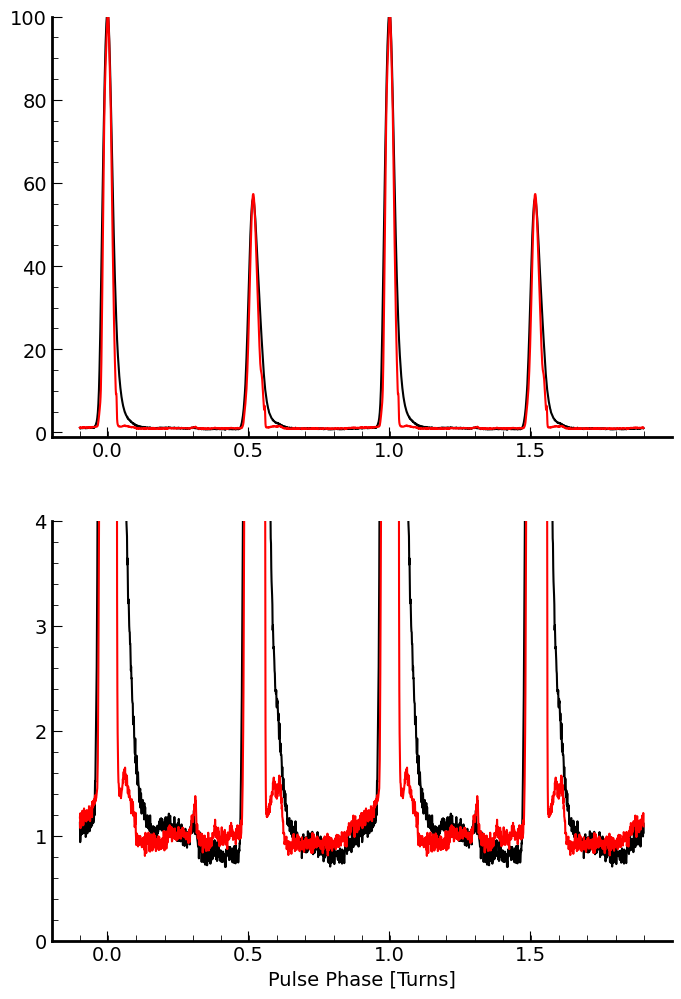

In [25]:
plot_intrinsic_vs_observed(CS, np.average(CS.data, axis=(0, 1, 2)))

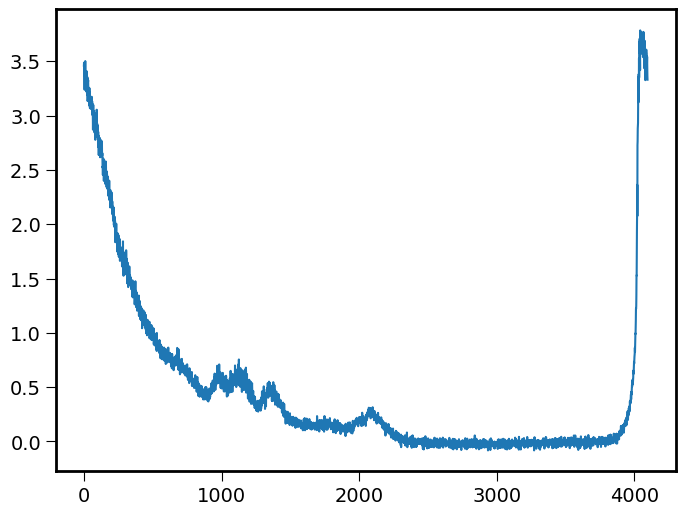

In [113]:
avg=np.sum(abs(ifft(filters_full[0],axis=1)),axis=0)
plt.plot(np.log(avg))

Form the wavefield for only the second file (subint 236 onward)

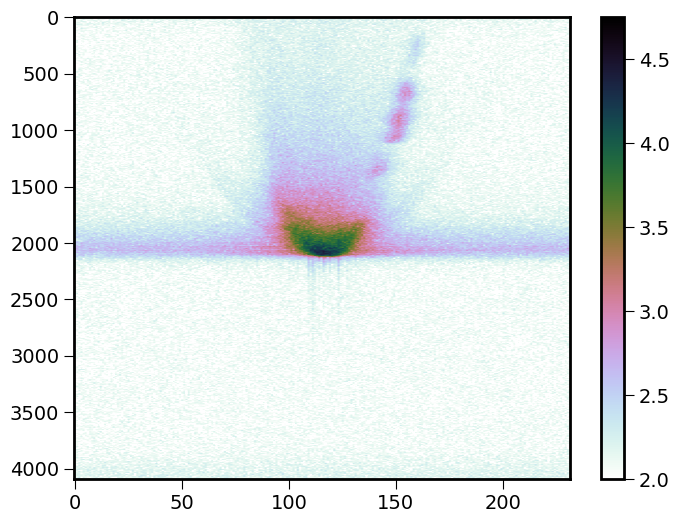

In [117]:
subfilts=filters_full[0][236:]
dynspec=np.log10(np.abs(fftshift(fftn(subfilts))))
plt.imshow(dynspec.T, aspect="auto", cmap="cubehelix_r", vmin=2)
plt.colorbar()